# Object Detection - Phase 2 Computer Vision





#### Youssef Mohamed Mansi  18P5848
#### Seif Ahmed Elsayed Elewa 18P5662
#### Seif Muhammed Yakout 18P2158

## Importing Libraries

In [1]:
import numpy as np
import time 
import cv2
import os 
import glob
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip

## Load Yolo Weights/ CFG 

In [2]:
# weights contain the resulted weights from the pretrained model
# CFG contained neural network architecture
weights_path = os.path.join("yolo","yolov3.weights")
Cfg_Path = os.path.join("yolo","yolov3.cfg")

## Load Neural Net 

In [3]:
#Save The Neural Networj in a variable
net =cv2.dnn.readNetFromDarknet(Cfg_Path,weights_path)

## Show Layers Names

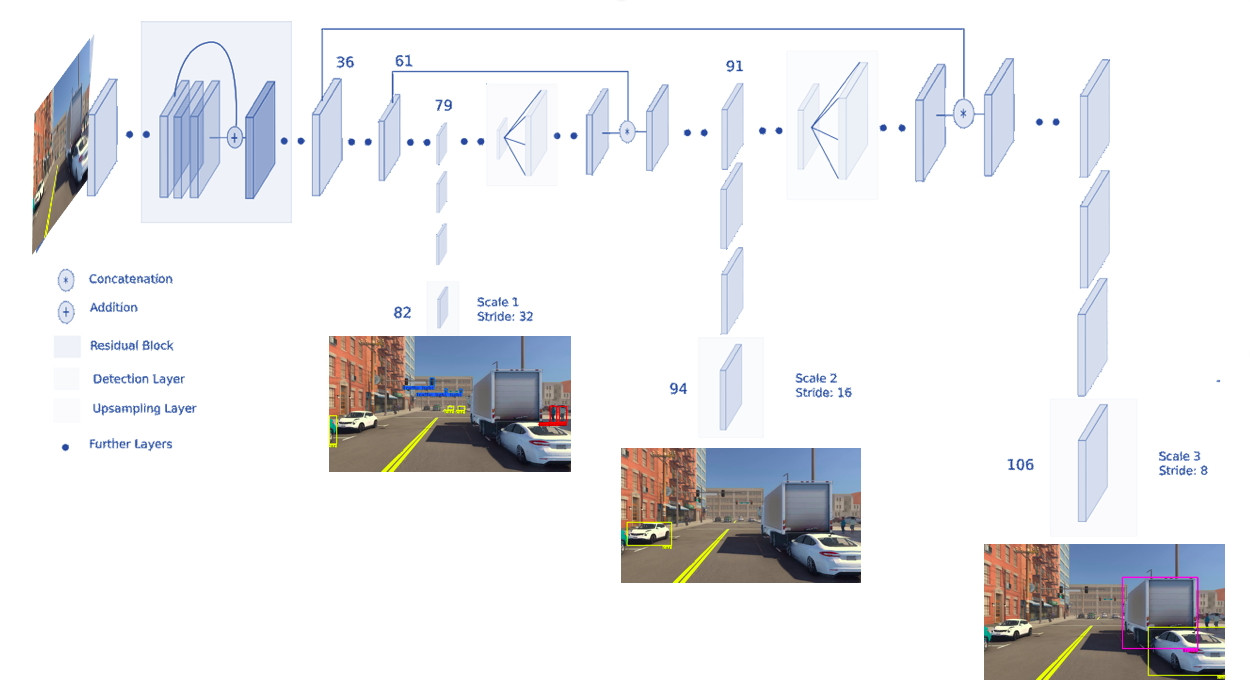

In [4]:
# Get all The Layer names from yolov3 architecture
names = net.getLayerNames()

In [6]:
# get connectedOutLayersNames returns the only the 3 output layers in yolov3 from our saved neural net
# which are yolo_82,yolo_94,yolo_106 in a tuple 
# Then we convert tuple into a list
layers_names = net.getUnconnectedOutLayersNames()
list(layers_names)

['yolo_82', 'yolo_94', 'yolo_106']

# Layers Out Vector

<b>Pc</b> states whether the object is present in the grid or not

<b>bx,by,bh,bw</b> specify the bounding box if there is an object

According To number of classes we add <b>C#</b> in the vector table; one hot encoded(only one class is 1 and others equal 0)

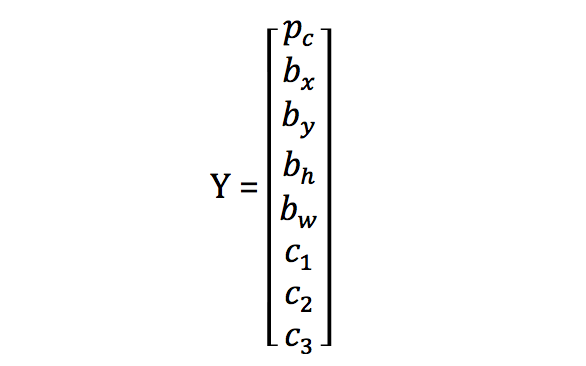

In [7]:
#Get Binary Large Object from img (BLOB) 
#blobFromImage(Img,scale Factor,size,crop,swapRB =true since our image is BGR)
def blobimg(img):
    
    blob = cv2.dnn.blobFromImage(img,1/255.0,(416,416),crop = False, swapRB = True)
    #Input Our Blob into the Neural Net
    net.setInput(blob)
    #start Timer
    start_t=time.time()
    # Forward pass the layers to compute net output returns a np array that will be used to plot box
    layers_out=net.forward(layers_names)
    #show How long did it take
    print("Time To Forward Pass Layers is: {}".format(time.time()-start_t))
    return layers_out



In [8]:
# Function that detects class according to confidence value
# the max score from the output layer is the class we're detecting
def detection_f(layers_out,Height , Width):
    boxes=[]
    confidences=[]
    classIDs=[]
    # Output Counter that contains yolo_82,yolo_94,yolo_106 tuple
    for output in layers_out:
        # Detection counter contain counter that passes through the output_layers iteratively 
        for detection in output:
            # Get the class with the highst score
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence= scores[classID]
            
            # only draw box if confidence is greater than 85%

            if confidence>0.85:
                box = detection[:4] *np.array([Width,Height,Width,Height])
                bx,by,bw,bh=box.astype("int")
                
                # derive the top and left corner
                x=int(bx-(bw/2))
                y=int(by-(bh/2))

                boxes.append([x,y,int(bw),int(bh)])
                confidences.append(float(confidence))
                classIDs.append(classID)
    # perform non maximum suppression            
    indxs=cv2.dnn.NMSBoxes(boxes,confidences,0.8,0.8)
    return indxs, boxes,classIDs,confidences

## Get Labels for detection

In [9]:
# Import Labels from yolo folder
labels_path = os.path.join("yolo","coco.names")
#Clear labels from any spaces and any newlines
labels=open(labels_path).read().strip().split("\n")

## Draw Box around Detected Object

In [11]:
# Function that draw box around detected object
def flatten(img,indxs,boxes,classIDs,confidences):
    if len(indxs) > 0:
        for i in indxs.flatten():
            # Get box dimensions and center
            (x,y)=[boxes[i][0],boxes[i][1]]
            (w,h)=[boxes[i][2],boxes[i][3]]

            #Draw Rectangle
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,120,0),2)
            #Put Text above detcted object that contains label and confidence
            cv2.putText(img,"{}: {:0.4f}".format(labels[classIDs[i]],confidences[i]),(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,120,0),2)

## Process Image

In [12]:
def process_image(img):
    
 #   img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    Height , Width =img.shape[:2]
    layers_out=blobimg(img)
    indxs, boxes,classIDs,confidences=detection_f(layers_out,Height , Width)
    flatten(img,indxs,boxes,classIDs,confidences)
#    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

## Test On Image

In [18]:
# Import Image
img_path = os.path.join("yolo","lane.jpeg")

img = cv2.imread(img_path)


Text(0.5, 1.0, 'BGR Image')

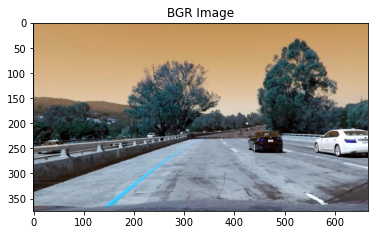

In [19]:
# We will process with BGR Image since we added the parameter swapRB = true in the blob image
plt.imshow(img)
plt.title("BGR Image")

In [20]:
#Write Image
cv2.imwrite("lane.jpeg",process_image(img))

Time To Forward Pass Layers is: 0.5928423404693604


True

## Test On video

In [22]:
inputvideo= 'test.mp4'
outputvideo= 'object1.mp4'

myclip = VideoFileClip(inputvideo)
clip = myclip.fl_image(process_image)

%time clip.write_videofile(outputvideo, audio=False)

t:   0%|          | 0/9184 [00:00<?, ?it/s, now=None]

Time To Forward Pass Layers is: 0.29720473289489746
Moviepy - Building video object1.mp4.
Moviepy - Writing video object1.mp4



t:   0%|          | 2/9184 [00:00<28:14,  5.42it/s, now=None]

Time To Forward Pass Layers is: 0.32413268089294434


t:   0%|          | 3/9184 [00:00<39:02,  3.92it/s, now=None]

Time To Forward Pass Layers is: 0.307178258895874


t:   0%|          | 4/9184 [00:01<44:51,  3.41it/s, now=None]

Time To Forward Pass Layers is: 0.3071768283843994


t:   0%|          | 5/9184 [00:01<47:55,  3.19it/s, now=None]

Time To Forward Pass Layers is: 0.3041861057281494


t:   0%|          | 6/9184 [00:01<49:53,  3.07it/s, now=None]

Time To Forward Pass Layers is: 0.3041841983795166


t:   0%|          | 7/9184 [00:02<51:47,  2.95it/s, now=None]

Time To Forward Pass Layers is: 0.31615400314331055


t:   0%|          | 8/9184 [00:02<52:17,  2.92it/s, now=None]

Time To Forward Pass Layers is: 0.30017542839050293


t:   0%|          | 9/9184 [00:02<52:54,  2.89it/s, now=None]

Time To Forward Pass Layers is: 0.30518150329589844


t:   0%|          | 10/9184 [00:03<53:08,  2.88it/s, now=None]

Time To Forward Pass Layers is: 0.3031890392303467


t:   0%|          | 11/9184 [00:03<53:17,  2.87it/s, now=None]

Time To Forward Pass Layers is: 0.30318737030029297


t:   0%|          | 12/9184 [00:03<53:21,  2.86it/s, now=None]

Time To Forward Pass Layers is: 0.3041858673095703


t:   0%|          | 13/9184 [00:04<53:15,  2.87it/s, now=None]

Time To Forward Pass Layers is: 0.29720520973205566


t:   0%|          | 14/9184 [00:04<53:47,  2.84it/s, now=None]

Time To Forward Pass Layers is: 0.31113266944885254


t:   0%|          | 15/9184 [00:04<53:50,  2.84it/s, now=None]

Time To Forward Pass Layers is: 0.3071780204772949


t:   0%|          | 16/9184 [00:05<54:13,  2.82it/s, now=None]

Time To Forward Pass Layers is: 0.31116819381713867


t:   0%|          | 17/9184 [00:05<55:08,  2.77it/s, now=None]

Time To Forward Pass Layers is: 0.3251304626464844


t:   0%|          | 18/9184 [00:06<55:47,  2.74it/s, now=None]

Time To Forward Pass Layers is: 0.3251309394836426


t:   0%|          | 19/9184 [00:06<56:30,  2.70it/s, now=None]

Time To Forward Pass Layers is: 0.3281214237213135


t:   0%|          | 20/9184 [00:06<56:24,  2.71it/s, now=None]

Time To Forward Pass Layers is: 0.31615519523620605


t:   0%|          | 21/9184 [00:07<56:37,  2.70it/s, now=None]

Time To Forward Pass Layers is: 0.3251311779022217


t:   0%|          | 22/9184 [00:07<56:45,  2.69it/s, now=None]

Time To Forward Pass Layers is: 0.3241000175476074


t:   0%|          | 23/9184 [00:07<55:56,  2.73it/s, now=None]

Time To Forward Pass Layers is: 0.3061811923980713


t:   0%|          | 24/9184 [00:08<55:22,  2.76it/s, now=None]

Time To Forward Pass Layers is: 0.3061802387237549


t:   0%|          | 25/9184 [00:08<55:03,  2.77it/s, now=None]

Time To Forward Pass Layers is: 0.30817413330078125


t:   0%|          | 26/9184 [00:08<54:50,  2.78it/s, now=None]

Time To Forward Pass Layers is: 0.3062150478363037


t:   0%|          | 27/9184 [00:09<54:44,  2.79it/s, now=None]

Time To Forward Pass Layers is: 0.30817437171936035


t:   0%|          | 28/9184 [00:09<54:39,  2.79it/s, now=None]

Time To Forward Pass Layers is: 0.30814242362976074


t:   0%|          | 29/9184 [00:10<54:35,  2.79it/s, now=None]

Time To Forward Pass Layers is: 0.3091719150543213


t:   0%|          | 30/9184 [00:10<54:36,  2.79it/s, now=None]

Time To Forward Pass Layers is: 0.3091721534729004


t:   0%|          | 31/9184 [00:10<54:36,  2.79it/s, now=None]

Time To Forward Pass Layers is: 0.3091402053833008


t:   0%|          | 32/9184 [00:11<54:03,  2.82it/s, now=None]

Time To Forward Pass Layers is: 0.2982015609741211


t:   0%|          | 33/9184 [00:11<54:12,  2.81it/s, now=None]

Time To Forward Pass Layers is: 0.31116771697998047


t:   0%|          | 34/9184 [00:11<54:22,  2.80it/s, now=None]

Time To Forward Pass Layers is: 0.3091731071472168


t:   0%|          | 35/9184 [00:12<54:28,  2.80it/s, now=None]

Time To Forward Pass Layers is: 0.3091719150543213


t:   0%|          | 36/9184 [00:12<54:38,  2.79it/s, now=None]

Time To Forward Pass Layers is: 0.31316113471984863


t:   0%|          | 37/9184 [00:12<55:04,  2.77it/s, now=None]

Time To Forward Pass Layers is: 0.3171505928039551


t:   0%|          | 38/9184 [00:13<54:44,  2.78it/s, now=None]

Time To Forward Pass Layers is: 0.30817532539367676


t:   0%|          | 39/9184 [00:13<54:52,  2.78it/s, now=None]

Time To Forward Pass Layers is: 0.3121640682220459


t:   0%|          | 40/9184 [00:14<54:32,  2.79it/s, now=None]

Time To Forward Pass Layers is: 0.3071784973144531


t:   0%|          | 41/9184 [00:14<56:08,  2.71it/s, now=None]

Time To Forward Pass Layers is: 0.3381071090698242


t:   0%|          | 42/9184 [00:14<55:56,  2.72it/s, now=None]

Time To Forward Pass Layers is: 0.31815004348754883


t:   0%|          | 43/9184 [00:15<55:31,  2.74it/s, now=None]

Time To Forward Pass Layers is: 0.3112800121307373


t:   0%|          | 44/9184 [00:15<57:10,  2.66it/s, now=None]

Time To Forward Pass Layers is: 0.3500638008117676


t:   0%|          | 45/9184 [00:15<56:31,  2.69it/s, now=None]

Time To Forward Pass Layers is: 0.31017041206359863


t:   1%|          | 46/9184 [00:16<56:16,  2.71it/s, now=None]

Time To Forward Pass Layers is: 0.31615185737609863


t:   1%|          | 47/9184 [00:16<56:47,  2.68it/s, now=None]

Time To Forward Pass Layers is: 0.32712292671203613


t:   1%|          | 48/9184 [00:16<56:50,  2.68it/s, now=None]

Time To Forward Pass Layers is: 0.3231348991394043


t:   1%|          | 49/9184 [00:17<56:27,  2.70it/s, now=None]

Time To Forward Pass Layers is: 0.3151569366455078


t:   1%|          | 50/9184 [00:17<56:32,  2.69it/s, now=None]

Time To Forward Pass Layers is: 0.3231348991394043


t:   1%|          | 51/9184 [00:18<56:20,  2.70it/s, now=None]

Time To Forward Pass Layers is: 0.31911230087280273


t:   1%|          | 52/9184 [00:18<56:06,  2.71it/s, now=None]

Time To Forward Pass Layers is: 0.3171505928039551


t:   1%|          | 53/9184 [00:18<56:15,  2.71it/s, now=None]

Time To Forward Pass Layers is: 0.3211393356323242


t:   1%|          | 54/9184 [00:19<56:21,  2.70it/s, now=None]

Time To Forward Pass Layers is: 0.32114076614379883


t:   1%|          | 55/9184 [00:19<56:33,  2.69it/s, now=None]

Time To Forward Pass Layers is: 0.32712531089782715


t:   1%|          | 56/9184 [00:19<57:42,  2.64it/s, now=None]

Time To Forward Pass Layers is: 0.34108757972717285


t:   1%|          | 57/9184 [00:20<59:19,  2.56it/s, now=None]

Time To Forward Pass Layers is: 0.3610374927520752


t:   1%|          | 58/9184 [00:20<58:43,  2.59it/s, now=None]

Time To Forward Pass Layers is: 0.3261280059814453


t:   1%|          | 59/9184 [00:21<58:09,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.32413315773010254


t:   1%|          | 60/9184 [00:21<58:27,  2.60it/s, now=None]

Time To Forward Pass Layers is: 0.3390939235687256


t:   1%|          | 61/9184 [00:21<59:44,  2.54it/s, now=None]

Time To Forward Pass Layers is: 0.35804224014282227


t:   1%|          | 62/9184 [00:22<59:17,  2.56it/s, now=None]

Time To Forward Pass Layers is: 0.33211255073547363


t:   1%|          | 63/9184 [00:22<59:44,  2.54it/s, now=None]

Time To Forward Pass Layers is: 0.35205841064453125


t:   1%|          | 64/9184 [00:23<1:00:35,  2.51it/s, now=None]

Time To Forward Pass Layers is: 0.3620283603668213


t:   1%|          | 65/9184 [00:23<1:00:14,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.34108781814575195


t:   1%|          | 66/9184 [00:23<58:53,  2.58it/s, now=None]  

Time To Forward Pass Layers is: 0.3171508312225342


t:   1%|          | 67/9184 [00:24<58:10,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.32213735580444336


t:   1%|          | 68/9184 [00:24<58:13,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.33510375022888184


t:   1%|          | 69/9184 [00:25<57:36,  2.64it/s, now=None]

Time To Forward Pass Layers is: 0.3231363296508789


t:   1%|          | 70/9184 [00:25<57:08,  2.66it/s, now=None]

Time To Forward Pass Layers is: 0.3201429843902588


t:   1%|          | 71/9184 [00:25<56:59,  2.67it/s, now=None]

Time To Forward Pass Layers is: 0.32512927055358887


t:   1%|          | 72/9184 [00:26<56:44,  2.68it/s, now=None]

Time To Forward Pass Layers is: 0.31914520263671875


t:   1%|          | 73/9184 [00:26<57:01,  2.66it/s, now=None]

Time To Forward Pass Layers is: 0.33011698722839355


t:   1%|          | 74/9184 [00:26<57:05,  2.66it/s, now=None]

Time To Forward Pass Layers is: 0.32712459564208984


t:   1%|          | 75/9184 [00:27<56:53,  2.67it/s, now=None]

Time To Forward Pass Layers is: 0.3231337070465088


t:   1%|          | 76/9184 [00:27<56:56,  2.67it/s, now=None]

Time To Forward Pass Layers is: 0.3261270523071289


t:   1%|          | 77/9184 [00:28<56:53,  2.67it/s, now=None]

Time To Forward Pass Layers is: 0.3241307735443115


t:   1%|          | 78/9184 [00:28<57:18,  2.65it/s, now=None]

Time To Forward Pass Layers is: 0.33310937881469727


t:   1%|          | 79/9184 [00:28<56:57,  2.66it/s, now=None]

Time To Forward Pass Layers is: 0.3181474208831787


t:   1%|          | 80/9184 [00:29<57:03,  2.66it/s, now=None]

Time To Forward Pass Layers is: 0.3281214237213135


t:   1%|          | 81/9184 [00:29<56:46,  2.67it/s, now=None]

Time To Forward Pass Layers is: 0.32114100456237793


t:   1%|          | 82/9184 [00:29<56:54,  2.67it/s, now=None]

Time To Forward Pass Layers is: 0.3261277675628662


t:   1%|          | 83/9184 [00:30<57:01,  2.66it/s, now=None]

Time To Forward Pass Layers is: 0.3311150074005127


t:   1%|          | 84/9184 [00:30<57:01,  2.66it/s, now=None]

Time To Forward Pass Layers is: 0.3261263370513916


t:   1%|          | 85/9184 [00:31<56:33,  2.68it/s, now=None]

Time To Forward Pass Layers is: 0.3171510696411133


t:   1%|          | 86/9184 [00:31<56:55,  2.66it/s, now=None]

Time To Forward Pass Layers is: 0.33011674880981445


t:   1%|          | 87/9184 [00:31<56:56,  2.66it/s, now=None]

Time To Forward Pass Layers is: 0.3281221389770508


t:   1%|          | 88/9184 [00:32<56:49,  2.67it/s, now=None]

Time To Forward Pass Layers is: 0.32413244247436523


t:   1%|          | 89/9184 [00:32<56:52,  2.67it/s, now=None]

Time To Forward Pass Layers is: 0.32712459564208984


t:   1%|          | 90/9184 [00:32<57:15,  2.65it/s, now=None]

Time To Forward Pass Layers is: 0.33310890197753906


t:   1%|          | 91/9184 [00:33<57:02,  2.66it/s, now=None]

Time To Forward Pass Layers is: 0.3251307010650635


t:   1%|          | 92/9184 [00:33<57:06,  2.65it/s, now=None]

Time To Forward Pass Layers is: 0.32712483406066895


t:   1%|          | 93/9184 [00:34<57:00,  2.66it/s, now=None]

Time To Forward Pass Layers is: 0.32210206985473633


t:   1%|          | 94/9184 [00:34<57:13,  2.65it/s, now=None]

Time To Forward Pass Layers is: 0.3281221389770508


t:   1%|          | 95/9184 [00:34<57:02,  2.66it/s, now=None]

Time To Forward Pass Layers is: 0.3261270523071289


t:   1%|          | 96/9184 [00:35<56:52,  2.66it/s, now=None]

Time To Forward Pass Layers is: 0.32413196563720703


t:   1%|          | 97/9184 [00:35<56:45,  2.67it/s, now=None]

Time To Forward Pass Layers is: 0.32213735580444336


t:   1%|          | 98/9184 [00:35<57:37,  2.63it/s, now=None]

Time To Forward Pass Layers is: 0.33909010887145996


t:   1%|          | 99/9184 [00:36<57:27,  2.64it/s, now=None]

Time To Forward Pass Layers is: 0.3261251449584961


t:   1%|          | 100/9184 [00:36<57:28,  2.63it/s, now=None]

Time To Forward Pass Layers is: 0.3291177749633789


t:   1%|          | 101/9184 [00:37<57:20,  2.64it/s, now=None]

Time To Forward Pass Layers is: 0.3261256217956543


t:   1%|          | 102/9184 [00:37<57:37,  2.63it/s, now=None]

Time To Forward Pass Layers is: 0.3331108093261719


t:   1%|          | 103/9184 [00:37<59:20,  2.55it/s, now=None]

Time To Forward Pass Layers is: 0.3620316982269287


t:   1%|          | 104/9184 [00:38<59:52,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.34906601905822754


t:   1%|          | 105/9184 [00:38<1:00:01,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.34906458854675293


t:   1%|          | 106/9184 [00:39<1:00:58,  2.48it/s, now=None]

Time To Forward Pass Layers is: 0.3670167922973633


t:   1%|          | 107/9184 [00:39<1:00:06,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.3351004123687744


t:   1%|          | 108/9184 [00:39<59:32,  2.54it/s, now=None]  

Time To Forward Pass Layers is: 0.3281219005584717


t:   1%|          | 109/9184 [00:40<58:35,  2.58it/s, now=None]

Time To Forward Pass Layers is: 0.3201425075531006


t:   1%|          | 110/9184 [00:40<58:20,  2.59it/s, now=None]

Time To Forward Pass Layers is: 0.3281216621398926


t:   1%|          | 111/9184 [00:40<57:53,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.32712292671203613


t:   1%|          | 112/9184 [00:41<57:50,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.3311150074005127


t:   1%|          | 113/9184 [00:41<57:40,  2.62it/s, now=None]

Time To Forward Pass Layers is: 0.3311138153076172


t:   1%|          | 114/9184 [00:42<57:41,  2.62it/s, now=None]

Time To Forward Pass Layers is: 0.32412147521972656


t:   1%|▏         | 115/9184 [00:42<57:23,  2.63it/s, now=None]

Time To Forward Pass Layers is: 0.3261275291442871


t:   1%|▏         | 116/9184 [00:42<57:34,  2.62it/s, now=None]

Time To Forward Pass Layers is: 0.336101770401001


t:   1%|▏         | 117/9184 [00:43<57:50,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.3341059684753418


t:   1%|▏         | 118/9184 [00:43<57:50,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.3351011276245117


t:   1%|▏         | 119/9184 [00:44<57:34,  2.62it/s, now=None]

Time To Forward Pass Layers is: 0.3261260986328125


t:   1%|▏         | 120/9184 [00:44<58:03,  2.60it/s, now=None]

Time To Forward Pass Layers is: 0.33909130096435547


t:   1%|▏         | 121/9184 [00:44<58:02,  2.60it/s, now=None]

Time To Forward Pass Layers is: 0.3311116695404053


t:   1%|▏         | 122/9184 [00:45<57:42,  2.62it/s, now=None]

Time To Forward Pass Layers is: 0.3261268138885498


t:   1%|▏         | 123/9184 [00:45<57:36,  2.62it/s, now=None]

Time To Forward Pass Layers is: 0.33011674880981445


t:   1%|▏         | 124/9184 [00:45<57:48,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.33310890197753906


t:   1%|▏         | 125/9184 [00:46<57:48,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.3351016044616699


t:   1%|▏         | 126/9184 [00:46<57:59,  2.60it/s, now=None]

Time To Forward Pass Layers is: 0.3341059684753418


t:   1%|▏         | 127/9184 [00:47<57:39,  2.62it/s, now=None]

Time To Forward Pass Layers is: 0.32812070846557617


t:   1%|▏         | 128/9184 [00:47<57:47,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.3311140537261963


t:   1%|▏         | 129/9184 [00:47<57:55,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.33809494972229004


t:   1%|▏         | 130/9184 [00:48<57:44,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.32812023162841797


t:   1%|▏         | 131/9184 [00:48<57:50,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.33310770988464355


t:   1%|▏         | 132/9184 [00:49<57:59,  2.60it/s, now=None]

Time To Forward Pass Layers is: 0.3351013660430908


t:   1%|▏         | 133/9184 [00:49<57:42,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.3240954875946045


t:   1%|▏         | 134/9184 [00:49<57:37,  2.62it/s, now=None]

Time To Forward Pass Layers is: 0.3311154842376709


t:   1%|▏         | 135/9184 [00:50<57:45,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.3351020812988281


t:   1%|▏         | 136/9184 [00:50<57:42,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.33011436462402344


t:   1%|▏         | 137/9184 [00:50<57:42,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.33510375022888184


t:   2%|▏         | 138/9184 [00:51<57:37,  2.62it/s, now=None]

Time To Forward Pass Layers is: 0.33011293411254883


t:   2%|▏         | 139/9184 [00:51<57:25,  2.63it/s, now=None]

Time To Forward Pass Layers is: 0.32712507247924805


t:   2%|▏         | 140/9184 [00:52<57:44,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.33609867095947266


t:   2%|▏         | 141/9184 [00:52<57:49,  2.61it/s, now=None]

Time To Forward Pass Layers is: 0.3321113586425781


t:   2%|▏         | 142/9184 [00:52<57:36,  2.62it/s, now=None]

Time To Forward Pass Layers is: 0.33011746406555176


t:   2%|▏         | 143/9184 [00:53<57:51,  2.60it/s, now=None]

Time To Forward Pass Layers is: 0.33809494972229004


t:   2%|▏         | 144/9184 [00:53<58:31,  2.57it/s, now=None]

Time To Forward Pass Layers is: 0.3470745086669922


t:   2%|▏         | 145/9184 [00:54<1:00:09,  2.50it/s, now=None]

Time To Forward Pass Layers is: 0.37100958824157715


t:   2%|▏         | 146/9184 [00:54<1:00:24,  2.49it/s, now=None]

Time To Forward Pass Layers is: 0.34707117080688477


t:   2%|▏         | 147/9184 [00:54<1:00:40,  2.48it/s, now=None]

Time To Forward Pass Layers is: 0.35305142402648926


t:   2%|▏         | 148/9184 [00:55<1:01:17,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3650212287902832


t:   2%|▏         | 149/9184 [00:55<1:01:11,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3510582447052002


t:   2%|▏         | 150/9184 [00:56<59:57,  2.51it/s, now=None]  

Time To Forward Pass Layers is: 0.3281219005584717


t:   2%|▏         | 151/9184 [00:56<59:58,  2.51it/s, now=None]

Time To Forward Pass Layers is: 0.34707140922546387


t:   2%|▏         | 152/9184 [00:56<59:48,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.345076322555542


t:   2%|▏         | 153/9184 [00:57<59:09,  2.54it/s, now=None]

Time To Forward Pass Layers is: 0.3311142921447754


t:   2%|▏         | 154/9184 [00:57<59:00,  2.55it/s, now=None]

Time To Forward Pass Layers is: 0.33705949783325195


t:   2%|▏         | 155/9184 [00:58<59:24,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.3480687141418457


t:   2%|▏         | 156/9184 [00:58<59:05,  2.55it/s, now=None]

Time To Forward Pass Layers is: 0.33709716796875


t:   2%|▏         | 157/9184 [00:58<59:11,  2.54it/s, now=None]

Time To Forward Pass Layers is: 0.33809399604797363


t:   2%|▏         | 158/9184 [00:59<58:50,  2.56it/s, now=None]

Time To Forward Pass Layers is: 0.33510303497314453


t:   2%|▏         | 159/9184 [00:59<59:00,  2.55it/s, now=None]

Time To Forward Pass Layers is: 0.34407711029052734


t:   2%|▏         | 160/9184 [00:59<58:45,  2.56it/s, now=None]

Time To Forward Pass Layers is: 0.3351016044616699


t:   2%|▏         | 161/9184 [01:00<58:35,  2.57it/s, now=None]

Time To Forward Pass Layers is: 0.33310914039611816


t:   2%|▏         | 162/9184 [01:00<58:43,  2.56it/s, now=None]

Time To Forward Pass Layers is: 0.33510351181030273


t:   2%|▏         | 163/9184 [01:01<59:03,  2.55it/s, now=None]

Time To Forward Pass Layers is: 0.3450767993927002


t:   2%|▏         | 164/9184 [01:01<58:52,  2.55it/s, now=None]

Time To Forward Pass Layers is: 0.33610033988952637


t:   2%|▏         | 165/9184 [01:01<1:00:49,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3779881000518799


t:   2%|▏         | 166/9184 [01:02<1:01:13,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3629939556121826


t:   2%|▏         | 167/9184 [01:02<1:01:47,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36601781845092773


t:   2%|▏         | 168/9184 [01:03<1:02:10,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3670170307159424


t:   2%|▏         | 169/9184 [01:03<1:01:43,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.34208178520202637


t:   2%|▏         | 170/9184 [01:04<1:02:07,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302828788757324


t:   2%|▏         | 171/9184 [01:04<1:02:51,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3749971389770508


t:   2%|▏         | 172/9184 [01:04<1:01:39,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.33909082412719727


t:   2%|▏         | 173/9184 [01:05<1:00:40,  2.48it/s, now=None]

Time To Forward Pass Layers is: 0.33510279655456543


t:   2%|▏         | 174/9184 [01:05<1:01:25,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3700087070465088


t:   2%|▏         | 175/9184 [01:06<1:00:31,  2.48it/s, now=None]

Time To Forward Pass Layers is: 0.3370985984802246


t:   2%|▏         | 176/9184 [01:06<1:00:06,  2.50it/s, now=None]

Time To Forward Pass Layers is: 0.34607481956481934


t:   2%|▏         | 177/9184 [01:06<1:00:01,  2.50it/s, now=None]

Time To Forward Pass Layers is: 0.34108710289001465


t:   2%|▏         | 178/9184 [01:07<59:50,  2.51it/s, now=None]  

Time To Forward Pass Layers is: 0.3430826663970947


t:   2%|▏         | 179/9184 [01:07<59:24,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.3370957374572754


t:   2%|▏         | 180/9184 [01:08<59:42,  2.51it/s, now=None]

Time To Forward Pass Layers is: 0.3480668067932129


t:   2%|▏         | 181/9184 [01:08<59:15,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.33610057830810547


t:   2%|▏         | 182/9184 [01:08<58:56,  2.55it/s, now=None]

Time To Forward Pass Layers is: 0.3341050148010254


t:   2%|▏         | 183/9184 [01:09<59:04,  2.54it/s, now=None]

Time To Forward Pass Layers is: 0.3420827388763428


t:   2%|▏         | 184/9184 [01:09<59:44,  2.51it/s, now=None]

Time To Forward Pass Layers is: 0.35505151748657227


t:   2%|▏         | 185/9184 [01:10<1:00:42,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.36602210998535156


t:   2%|▏         | 186/9184 [01:10<1:00:50,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3510620594024658


t:   2%|▏         | 187/9184 [01:10<1:00:48,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3530542850494385


t:   2%|▏         | 188/9184 [01:11<1:01:40,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3700084686279297


t:   2%|▏         | 189/9184 [01:11<1:01:11,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.34706902503967285


t:   2%|▏         | 190/9184 [01:12<1:01:02,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35202479362487793


t:   2%|▏         | 191/9184 [01:12<1:00:20,  2.48it/s, now=None]

Time To Forward Pass Layers is: 0.33809375762939453


t:   2%|▏         | 192/9184 [01:12<1:00:02,  2.50it/s, now=None]

Time To Forward Pass Layers is: 0.34407949447631836


t:   2%|▏         | 193/9184 [01:13<59:49,  2.50it/s, now=None]  

Time To Forward Pass Layers is: 0.3420848846435547


t:   2%|▏         | 194/9184 [01:13<59:26,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.33809423446655273


t:   2%|▏         | 195/9184 [01:14<59:13,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.3390920162200928


t:   2%|▏         | 196/9184 [01:14<59:12,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.34208083152770996


t:   2%|▏         | 197/9184 [01:14<59:16,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.34607505798339844


t:   2%|▏         | 198/9184 [01:15<59:11,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.34408020973205566


t:   2%|▏         | 199/9184 [01:15<59:23,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.34707140922546387


t:   2%|▏         | 200/9184 [01:16<59:21,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.3420853614807129


t:   2%|▏         | 201/9184 [01:16<59:14,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.3430018424987793


t:   2%|▏         | 202/9184 [01:16<59:36,  2.51it/s, now=None]

Time To Forward Pass Layers is: 0.35205841064453125


t:   2%|▏         | 203/9184 [01:17<59:18,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.3400912284851074


t:   2%|▏         | 204/9184 [01:17<59:06,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.3400864601135254


t:   2%|▏         | 205/9184 [01:18<59:11,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.34707069396972656


t:   2%|▏         | 206/9184 [01:18<59:47,  2.50it/s, now=None]

Time To Forward Pass Layers is: 0.35603761672973633


t:   2%|▏         | 207/9184 [01:18<59:07,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.335101842880249


t:   2%|▏         | 208/9184 [01:19<58:50,  2.54it/s, now=None]

Time To Forward Pass Layers is: 0.3380928039550781


t:   2%|▏         | 209/9184 [01:19<58:49,  2.54it/s, now=None]

Time To Forward Pass Layers is: 0.33909034729003906


t:   2%|▏         | 210/9184 [01:20<58:55,  2.54it/s, now=None]

Time To Forward Pass Layers is: 0.34407901763916016


t:   2%|▏         | 211/9184 [01:20<58:52,  2.54it/s, now=None]

Time To Forward Pass Layers is: 0.34108495712280273


t:   2%|▏         | 212/9184 [01:20<59:00,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.3450777530670166


t:   2%|▏         | 213/9184 [01:21<59:06,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.34607458114624023


t:   2%|▏         | 214/9184 [01:21<58:54,  2.54it/s, now=None]

Time To Forward Pass Layers is: 0.33806276321411133


t:   2%|▏         | 215/9184 [01:21<58:56,  2.54it/s, now=None]

Time To Forward Pass Layers is: 0.3430798053741455


t:   2%|▏         | 216/9184 [01:22<59:16,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.34906649589538574


t:   2%|▏         | 217/9184 [01:22<58:58,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.33809518814086914


t:   2%|▏         | 218/9184 [01:23<58:42,  2.55it/s, now=None]

Time To Forward Pass Layers is: 0.33809614181518555


t:   2%|▏         | 219/9184 [01:23<58:47,  2.54it/s, now=None]

Time To Forward Pass Layers is: 0.3400871753692627


t:   2%|▏         | 220/9184 [01:23<58:48,  2.54it/s, now=None]

Time To Forward Pass Layers is: 0.3450758457183838


t:   2%|▏         | 221/9184 [01:24<59:15,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.35205793380737305


t:   2%|▏         | 222/9184 [01:24<59:10,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.3430819511413574


t:   2%|▏         | 223/9184 [01:25<59:12,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.34607410430908203


t:   2%|▏         | 224/9184 [01:25<1:00:33,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.36602139472961426


t:   2%|▏         | 225/9184 [01:26<1:01:30,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.37200260162353516


t:   2%|▏         | 226/9184 [01:26<1:01:40,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36299586296081543


t:   2%|▏         | 227/9184 [01:26<1:02:01,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36901307106018066


t:   2%|▏         | 228/9184 [01:27<1:02:20,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.37197375297546387


t:   2%|▏         | 229/9184 [01:27<1:02:23,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36601996421813965


t:   3%|▎         | 230/9184 [01:28<1:01:21,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3420841693878174


t:   3%|▎         | 231/9184 [01:28<1:00:47,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.34607458114624023


t:   3%|▎         | 232/9184 [01:28<1:00:16,  2.48it/s, now=None]

Time To Forward Pass Layers is: 0.3410837650299072


t:   3%|▎         | 233/9184 [01:29<59:49,  2.49it/s, now=None]  

Time To Forward Pass Layers is: 0.34108686447143555


t:   3%|▎         | 234/9184 [01:29<59:21,  2.51it/s, now=None]

Time To Forward Pass Layers is: 0.33809375762939453


t:   3%|▎         | 235/9184 [01:30<59:00,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.33909153938293457


t:   3%|▎         | 236/9184 [01:30<59:08,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.34407901763916016


t:   3%|▎         | 237/9184 [01:30<59:22,  2.51it/s, now=None]

Time To Forward Pass Layers is: 0.3480675220489502


t:   3%|▎         | 238/9184 [01:31<59:34,  2.50it/s, now=None]

Time To Forward Pass Layers is: 0.3490638732910156


t:   3%|▎         | 239/9184 [01:31<59:24,  2.51it/s, now=None]

Time To Forward Pass Layers is: 0.3400890827178955


t:   3%|▎         | 240/9184 [01:32<59:36,  2.50it/s, now=None]

Time To Forward Pass Layers is: 0.3500638008117676


t:   3%|▎         | 241/9184 [01:32<59:22,  2.51it/s, now=None]

Time To Forward Pass Layers is: 0.34108591079711914


t:   3%|▎         | 242/9184 [01:32<59:23,  2.51it/s, now=None]

Time To Forward Pass Layers is: 0.346071720123291


t:   3%|▎         | 243/9184 [01:33<59:32,  2.50it/s, now=None]

Time To Forward Pass Layers is: 0.34906649589538574


t:   3%|▎         | 244/9184 [01:33<59:11,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.3400883674621582


t:   3%|▎         | 245/9184 [01:34<59:05,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.3420829772949219


t:   3%|▎         | 246/9184 [01:34<59:05,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.3450744152069092


t:   3%|▎         | 247/9184 [01:34<58:57,  2.53it/s, now=None]

Time To Forward Pass Layers is: 0.3390936851501465


t:   3%|▎         | 248/9184 [01:35<59:03,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.34407949447631836


t:   3%|▎         | 249/9184 [01:35<59:09,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.3470723628997803


t:   3%|▎         | 250/9184 [01:36<59:02,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.3420853614807129


t:   3%|▎         | 251/9184 [01:36<59:08,  2.52it/s, now=None]

Time To Forward Pass Layers is: 0.34607434272766113


t:   3%|▎         | 252/9184 [01:36<59:28,  2.50it/s, now=None]

Time To Forward Pass Layers is: 0.3510608673095703


t:   3%|▎         | 253/9184 [01:37<59:34,  2.50it/s, now=None]

Time To Forward Pass Layers is: 0.3500649929046631


t:   3%|▎         | 254/9184 [01:37<59:22,  2.51it/s, now=None]

Time To Forward Pass Layers is: 0.3430802822113037


t:   3%|▎         | 255/9184 [01:38<59:22,  2.51it/s, now=None]

Time To Forward Pass Layers is: 0.3470726013183594


t:   3%|▎         | 256/9184 [01:38<59:24,  2.50it/s, now=None]

Time To Forward Pass Layers is: 0.3460712432861328


t:   3%|▎         | 257/9184 [01:38<59:23,  2.51it/s, now=None]

Time To Forward Pass Layers is: 0.348067045211792


t:   3%|▎         | 258/9184 [01:39<59:32,  2.50it/s, now=None]

Time To Forward Pass Layers is: 0.3490636348724365


t:   3%|▎         | 259/9184 [01:39<59:55,  2.48it/s, now=None]

Time To Forward Pass Layers is: 0.35504841804504395


t:   3%|▎         | 260/9184 [01:40<59:31,  2.50it/s, now=None]

Time To Forward Pass Layers is: 0.3400895595550537


t:   3%|▎         | 261/9184 [01:40<59:48,  2.49it/s, now=None]

Time To Forward Pass Layers is: 0.3560476303100586


t:   3%|▎         | 262/9184 [01:40<59:58,  2.48it/s, now=None]

Time To Forward Pass Layers is: 0.3530545234680176


t:   3%|▎         | 263/9184 [01:41<59:38,  2.49it/s, now=None]

Time To Forward Pass Layers is: 0.34308290481567383


t:   3%|▎         | 264/9184 [01:41<1:00:25,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.36399078369140625


t:   3%|▎         | 265/9184 [01:42<1:01:30,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3759958744049072


t:   3%|▎         | 266/9184 [01:42<1:01:32,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:   3%|▎         | 267/9184 [01:42<1:01:37,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36100149154663086


t:   3%|▎         | 268/9184 [01:43<1:02:09,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.37396907806396484


t:   3%|▎         | 269/9184 [01:43<1:02:23,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36901354789733887


t:   3%|▎         | 270/9184 [01:44<1:01:37,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3530559539794922


t:   3%|▎         | 271/9184 [01:44<1:01:24,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570408821105957


t:   3%|▎         | 272/9184 [01:44<1:01:20,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3530547618865967


t:   3%|▎         | 273/9184 [01:45<1:01:27,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:   3%|▎         | 274/9184 [01:45<1:00:52,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.34407830238342285


t:   3%|▎         | 275/9184 [01:46<1:00:30,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.34707188606262207


t:   3%|▎         | 276/9184 [01:46<1:00:28,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3510277271270752


t:   3%|▎         | 277/9184 [01:47<1:00:24,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3510606288909912


t:   3%|▎         | 278/9184 [01:47<1:00:02,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3480699062347412


t:   3%|▎         | 279/9184 [01:47<1:00:00,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3490641117095947


t:   3%|▎         | 280/9184 [01:48<59:43,  2.48it/s, now=None]  

Time To Forward Pass Layers is: 0.34607434272766113


t:   3%|▎         | 281/9184 [01:48<1:00:02,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35005855560302734


t:   3%|▎         | 282/9184 [01:49<1:00:05,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3510584831237793


t:   3%|▎         | 283/9184 [01:49<59:49,  2.48it/s, now=None]  

Time To Forward Pass Layers is: 0.34504246711730957


t:   3%|▎         | 284/9184 [01:49<1:00:09,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35704565048217773


t:   3%|▎         | 285/9184 [01:50<1:00:01,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3500638008117676


t:   3%|▎         | 286/9184 [01:50<59:51,  2.48it/s, now=None]  

Time To Forward Pass Layers is: 0.3480658531188965


t:   3%|▎         | 287/9184 [01:51<59:51,  2.48it/s, now=None]

Time To Forward Pass Layers is: 0.3500633239746094


t:   3%|▎         | 288/9184 [01:51<1:00:23,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3620302677154541


t:   3%|▎         | 289/9184 [01:51<1:00:03,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3450775146484375


t:   3%|▎         | 290/9184 [01:52<1:00:26,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3599989414215088


t:   3%|▎         | 291/9184 [01:52<1:00:26,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35205912590026855


t:   3%|▎         | 292/9184 [01:53<1:00:07,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.34706950187683105


t:   3%|▎         | 293/9184 [01:53<1:00:05,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35006189346313477


t:   3%|▎         | 294/9184 [01:53<1:00:24,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35504722595214844


t:   3%|▎         | 295/9184 [01:54<59:58,  2.47it/s, now=None]  

Time To Forward Pass Layers is: 0.34308433532714844


t:   3%|▎         | 296/9184 [01:54<1:00:13,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3530547618865967


t:   3%|▎         | 297/9184 [01:55<1:00:14,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3560445308685303


t:   3%|▎         | 298/9184 [01:55<1:00:22,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35504794120788574


t:   3%|▎         | 299/9184 [01:55<1:00:09,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3510591983795166


t:   3%|▎         | 300/9184 [01:56<59:46,  2.48it/s, now=None]  

Time To Forward Pass Layers is: 0.3430824279785156


t:   3%|▎         | 301/9184 [01:56<1:00:13,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35505127906799316


t:   3%|▎         | 302/9184 [01:57<1:00:08,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3500640392303467


t:   3%|▎         | 303/9184 [01:57<1:00:20,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3530552387237549


t:   3%|▎         | 304/9184 [01:58<1:01:29,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.37898921966552734


t:   3%|▎         | 305/9184 [01:58<1:01:43,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36601901054382324


t:   3%|▎         | 306/9184 [01:58<1:01:45,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3620321750640869


t:   3%|▎         | 307/9184 [01:59<1:02:39,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.38496828079223633


t:   3%|▎         | 308/9184 [01:59<1:02:31,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36302852630615234


t:   3%|▎         | 309/9184 [02:00<1:02:02,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3500635623931885


t:   3%|▎         | 310/9184 [02:00<1:01:42,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35803961753845215


t:   3%|▎         | 311/9184 [02:00<1:01:40,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35704565048217773


t:   3%|▎         | 312/9184 [02:01<1:00:54,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.34906482696533203


t:   3%|▎         | 313/9184 [02:01<1:00:35,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35103940963745117


t:   3%|▎         | 314/9184 [02:02<1:00:27,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3570444583892822


t:   3%|▎         | 315/9184 [02:02<1:00:58,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3650238513946533


t:   3%|▎         | 316/9184 [02:02<1:00:54,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35704469680786133


t:   3%|▎         | 317/9184 [02:03<1:00:31,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3490335941314697


t:   3%|▎         | 318/9184 [02:03<1:00:53,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3650214672088623


t:   3%|▎         | 319/9184 [02:04<1:00:39,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3530552387237549


t:   3%|▎         | 320/9184 [02:04<1:01:01,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3649909496307373


t:   3%|▎         | 321/9184 [02:05<1:00:57,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:   4%|▎         | 322/9184 [02:05<1:00:36,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3510608673095703


t:   4%|▎         | 323/9184 [02:05<1:01:01,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3649888038635254


t:   4%|▎         | 324/9184 [02:06<1:00:33,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35205721855163574


t:   4%|▎         | 325/9184 [02:06<1:00:43,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35900402069091797


t:   4%|▎         | 326/9184 [02:07<1:00:47,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:   4%|▎         | 327/9184 [02:07<1:00:23,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3480672836303711


t:   4%|▎         | 328/9184 [02:07<1:00:14,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.353057861328125


t:   4%|▎         | 329/9184 [02:08<1:00:24,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560481071472168


t:   4%|▎         | 330/9184 [02:08<1:00:36,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.360001802444458


t:   4%|▎         | 331/9184 [02:09<1:00:17,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35002899169921875


t:   4%|▎         | 332/9184 [02:09<1:00:55,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36901354789733887


t:   4%|▎         | 333/9184 [02:09<1:01:15,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.37100720405578613


t:   4%|▎         | 334/9184 [02:10<1:01:09,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.359006404876709


t:   4%|▎         | 335/9184 [02:10<1:01:04,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3530552387237549


t:   4%|▎         | 336/9184 [02:11<1:00:52,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35006165504455566


t:   4%|▎         | 337/9184 [02:11<1:01:08,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36302876472473145


t:   4%|▎         | 338/9184 [02:12<1:00:57,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570427894592285


t:   4%|▎         | 339/9184 [02:12<1:00:42,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.354053258895874


t:   4%|▎         | 340/9184 [02:12<1:00:34,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35302019119262695


t:   4%|▎         | 341/9184 [02:13<1:00:47,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3540520668029785


t:   4%|▎         | 342/9184 [02:13<1:01:24,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3670194149017334


t:   4%|▎         | 343/9184 [02:14<1:02:20,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3819773197174072


t:   4%|▎         | 344/9184 [02:14<1:04:05,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.4009270668029785


t:   4%|▍         | 345/9184 [02:15<1:05:18,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.40192198753356934


t:   4%|▍         | 346/9184 [02:15<1:06:12,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.40691113471984863


t:   4%|▍         | 347/9184 [02:15<1:04:53,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3650240898132324


t:   4%|▍         | 348/9184 [02:16<1:03:39,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:   4%|▍         | 349/9184 [02:16<1:03:19,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3700098991394043


t:   4%|▍         | 350/9184 [02:17<1:03:02,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.369976282119751


t:   4%|▍         | 351/9184 [02:17<1:02:11,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.354050874710083


t:   4%|▍         | 352/9184 [02:18<1:02:01,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3650224208831787


t:   4%|▍         | 353/9184 [02:18<1:01:25,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35505032539367676


t:   4%|▍         | 354/9184 [02:18<1:01:10,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35804080963134766


t:   4%|▍         | 355/9184 [02:19<1:01:07,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36103129386901855


t:   4%|▍         | 356/9184 [02:19<1:01:03,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3590059280395508


t:   4%|▍         | 357/9184 [02:20<1:00:44,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35604357719421387


t:   4%|▍         | 358/9184 [02:20<1:00:30,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560473918914795


t:   4%|▍         | 359/9184 [02:20<1:00:45,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302900314331055


t:   4%|▍         | 360/9184 [02:21<1:00:31,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35505032539367676


t:   4%|▍         | 361/9184 [02:21<1:00:18,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35601234436035156


t:   4%|▍         | 362/9184 [02:22<1:00:41,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36601901054382324


t:   4%|▍         | 363/9184 [02:22<1:00:20,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35205650329589844


t:   4%|▍         | 364/9184 [02:22<1:00:23,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35803985595703125


t:   4%|▍         | 365/9184 [02:23<1:00:23,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35800909996032715


t:   4%|▍         | 366/9184 [02:23<1:00:30,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560469150543213


t:   4%|▍         | 367/9184 [02:24<1:00:17,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35189318656921387


t:   4%|▍         | 368/9184 [02:24<1:01:16,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3789851665496826


t:   4%|▍         | 369/9184 [02:25<1:01:02,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35804057121276855


t:   4%|▍         | 370/9184 [02:25<1:00:52,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3590075969696045


t:   4%|▍         | 371/9184 [02:25<1:00:43,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35704493522644043


t:   4%|▍         | 372/9184 [02:26<1:00:43,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3600330352783203


t:   4%|▍         | 373/9184 [02:26<1:00:52,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3619985580444336


t:   4%|▍         | 374/9184 [02:27<1:00:47,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36003684997558594


t:   4%|▍         | 375/9184 [02:27<1:00:57,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3640267848968506


t:   4%|▍         | 376/9184 [02:27<1:00:53,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3600044250488281


t:   4%|▍         | 377/9184 [02:28<1:00:58,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3649895191192627


t:   4%|▍         | 378/9184 [02:28<1:00:54,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36003732681274414


t:   4%|▍         | 379/9184 [02:29<1:00:29,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3510611057281494


t:   4%|▍         | 380/9184 [02:29<1:01:34,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.373004674911499


t:   4%|▍         | 381/9184 [02:30<1:02:50,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3879263401031494


t:   4%|▍         | 382/9184 [02:30<1:03:15,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3839759826660156


t:   4%|▍         | 383/9184 [02:30<1:03:14,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3760101795196533


t:   4%|▍         | 384/9184 [02:31<1:03:57,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.39394474029541016


t:   4%|▍         | 385/9184 [02:31<1:04:07,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3839731216430664


t:   4%|▍         | 386/9184 [02:32<1:03:20,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:   4%|▍         | 387/9184 [02:32<1:02:37,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36302971839904785


t:   4%|▍         | 388/9184 [02:33<1:02:02,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3590378761291504


t:   4%|▍         | 389/9184 [02:33<1:01:29,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3500380516052246


t:   4%|▍         | 390/9184 [02:33<1:01:11,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3540182113647461


t:   4%|▍         | 391/9184 [02:34<1:01:09,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3620429039001465


t:   4%|▍         | 392/9184 [02:34<1:00:52,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35800909996032715


t:   4%|▍         | 393/9184 [02:35<1:00:26,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3520328998565674


t:   4%|▍         | 394/9184 [02:35<1:00:24,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:   4%|▍         | 395/9184 [02:35<1:00:30,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36103391647338867


t:   4%|▍         | 396/9184 [02:36<1:00:22,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35601091384887695


t:   4%|▍         | 397/9184 [02:36<1:00:28,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36399126052856445


t:   4%|▍         | 398/9184 [02:37<1:00:38,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36402463912963867


t:   4%|▍         | 399/9184 [02:37<1:00:35,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36100125312805176


t:   4%|▍         | 400/9184 [02:38<1:00:40,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35601186752319336


t:   4%|▍         | 401/9184 [02:38<1:00:51,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36601924896240234


t:   4%|▍         | 402/9184 [02:38<1:00:54,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36399340629577637


t:   4%|▍         | 403/9184 [02:39<1:00:45,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3600034713745117


t:   4%|▍         | 404/9184 [02:39<1:00:33,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804009437561035


t:   4%|▍         | 405/9184 [02:40<1:01:02,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.37197327613830566


t:   4%|▍         | 406/9184 [02:40<1:00:55,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3650228977203369


t:   4%|▍         | 407/9184 [02:40<1:00:43,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3570432662963867


t:   4%|▍         | 408/9184 [02:41<1:01:08,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.37100744247436523


t:   4%|▍         | 409/9184 [02:41<1:00:52,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35900425910949707


t:   4%|▍         | 410/9184 [02:42<1:00:29,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35504841804504395


t:   4%|▍         | 411/9184 [02:42<1:01:01,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3710052967071533


t:   4%|▍         | 412/9184 [02:43<1:01:02,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36302924156188965


t:   4%|▍         | 413/9184 [02:43<1:01:29,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.365023136138916


t:   5%|▍         | 414/9184 [02:43<1:01:26,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.367018461227417


t:   5%|▍         | 415/9184 [02:44<1:01:30,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.370009183883667


t:   5%|▍         | 416/9184 [02:44<1:02:09,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3809802532196045


t:   5%|▍         | 417/9184 [02:45<1:01:49,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3640263080596924


t:   5%|▍         | 418/9184 [02:45<1:02:14,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100958824157715


t:   5%|▍         | 419/9184 [02:46<1:03:14,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.39191603660583496


t:   5%|▍         | 420/9184 [02:46<1:03:55,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.39394545555114746


t:   5%|▍         | 421/9184 [02:46<1:04:21,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.394942045211792


t:   5%|▍         | 422/9184 [02:47<1:04:37,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3929481506347656


t:   5%|▍         | 423/9184 [02:47<1:04:08,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3779487609863281


t:   5%|▍         | 424/9184 [02:48<1:03:25,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.36897826194763184


t:   5%|▍         | 425/9184 [02:48<1:02:49,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.36601996421813965


t:   5%|▍         | 426/9184 [02:49<1:01:57,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.35504913330078125


t:   5%|▍         | 427/9184 [02:49<1:02:08,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36701393127441406


t:   5%|▍         | 428/9184 [02:49<1:02:00,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37200284004211426


t:   5%|▍         | 429/9184 [02:50<1:02:39,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3759925365447998


t:   5%|▍         | 430/9184 [02:50<1:02:13,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36701536178588867


t:   5%|▍         | 431/9184 [02:51<1:01:50,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36498260498046875


t:   5%|▍         | 432/9184 [02:51<1:01:34,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3629953861236572


t:   5%|▍         | 433/9184 [02:52<1:02:02,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100768089294434


t:   5%|▍         | 434/9184 [02:52<1:01:47,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36601924896240234


t:   5%|▍         | 435/9184 [02:52<1:02:13,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3809792995452881


t:   5%|▍         | 436/9184 [02:53<1:01:52,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36302852630615234


t:   5%|▍         | 437/9184 [02:53<1:02:01,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.375960111618042


t:   5%|▍         | 438/9184 [02:54<1:01:59,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3720059394836426


t:   5%|▍         | 439/9184 [02:54<1:01:47,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:   5%|▍         | 440/9184 [02:55<1:02:10,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3779890537261963


t:   5%|▍         | 441/9184 [02:55<1:01:44,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36400270462036133


t:   5%|▍         | 442/9184 [02:55<1:01:28,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36302828788757324


t:   5%|▍         | 443/9184 [02:56<1:01:41,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37200307846069336


t:   5%|▍         | 444/9184 [02:56<1:01:36,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36901211738586426


t:   5%|▍         | 445/9184 [02:57<1:01:28,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36100125312805176


t:   5%|▍         | 446/9184 [02:57<1:01:37,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3700072765350342


t:   5%|▍         | 447/9184 [02:57<1:01:15,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:   5%|▍         | 448/9184 [02:58<1:01:15,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3680129051208496


t:   5%|▍         | 449/9184 [02:58<1:00:59,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36103224754333496


t:   5%|▍         | 450/9184 [02:59<1:01:14,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3710060119628906


t:   5%|▍         | 451/9184 [02:59<1:01:38,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3789854049682617


t:   5%|▍         | 452/9184 [03:00<1:01:15,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:   5%|▍         | 453/9184 [03:00<1:01:35,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37100863456726074


t:   5%|▍         | 454/9184 [03:00<1:01:21,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36601996421813965


t:   5%|▍         | 455/9184 [03:01<1:01:26,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3699765205383301


t:   5%|▍         | 456/9184 [03:01<1:02:40,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.39493656158447266


t:   5%|▍         | 457/9184 [03:02<1:03:24,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.39294910430908203


t:   5%|▍         | 458/9184 [03:02<1:03:18,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3789863586425781


t:   5%|▍         | 459/9184 [03:03<1:03:35,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.386960506439209


t:   5%|▌         | 460/9184 [03:03<1:03:28,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37998414039611816


t:   5%|▌         | 461/9184 [03:03<1:02:46,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3649911880493164


t:   5%|▌         | 462/9184 [03:04<1:02:12,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36602115631103516


t:   5%|▌         | 463/9184 [03:04<1:01:35,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36003589630126953


t:   5%|▌         | 464/9184 [03:05<1:01:14,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:   5%|▌         | 465/9184 [03:05<1:01:02,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3640248775482178


t:   5%|▌         | 466/9184 [03:06<1:01:22,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3640270233154297


t:   5%|▌         | 467/9184 [03:06<1:01:17,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36602139472961426


t:   5%|▌         | 468/9184 [03:06<1:01:30,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37200284004211426


t:   5%|▌         | 469/9184 [03:07<1:01:33,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37100768089294434


t:   5%|▌         | 470/9184 [03:07<1:02:07,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.38197970390319824


t:   5%|▌         | 471/9184 [03:08<1:01:28,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3580644130706787


t:   5%|▌         | 472/9184 [03:08<1:01:26,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.367978572845459


t:   5%|▌         | 473/9184 [03:09<1:01:15,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3620293140411377


t:   5%|▌         | 474/9184 [03:09<1:00:48,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.35704541206359863


t:   5%|▌         | 475/9184 [03:09<1:00:55,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3660085201263428


t:   5%|▌         | 476/9184 [03:10<1:00:29,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35804152488708496


t:   5%|▌         | 477/9184 [03:10<1:00:19,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:   5%|▌         | 478/9184 [03:11<1:00:58,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3700084686279297


t:   5%|▌         | 479/9184 [03:11<1:01:12,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.37100720405578613


t:   5%|▌         | 480/9184 [03:11<1:01:27,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3650243282318115


t:   5%|▌         | 481/9184 [03:12<1:01:06,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3590388298034668


t:   5%|▌         | 482/9184 [03:12<1:01:05,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.367018461227417


t:   5%|▌         | 483/9184 [03:13<1:01:01,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36402463912963867


t:   5%|▌         | 484/9184 [03:13<1:01:08,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3700113296508789


t:   5%|▌         | 485/9184 [03:14<1:00:58,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3640272617340088


t:   5%|▌         | 486/9184 [03:14<1:00:38,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.359039306640625


t:   5%|▌         | 487/9184 [03:14<1:01:07,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36598896980285645


t:   5%|▌         | 488/9184 [03:15<1:01:26,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37200498580932617


t:   5%|▌         | 489/9184 [03:15<1:01:43,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3789851665496826


t:   5%|▌         | 490/9184 [03:16<1:01:35,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700110912322998


t:   5%|▌         | 491/9184 [03:16<1:01:34,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700101375579834


t:   5%|▌         | 492/9184 [03:17<1:01:10,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3590395450592041


t:   5%|▌         | 493/9184 [03:17<1:01:29,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3700103759765625


t:   5%|▌         | 494/9184 [03:17<1:03:01,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.39893293380737305


t:   5%|▌         | 495/9184 [03:18<1:03:51,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.39893341064453125


t:   5%|▌         | 496/9184 [03:18<1:04:06,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38996434211730957


t:   5%|▌         | 497/9184 [03:19<1:04:32,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3949434757232666


t:   5%|▌         | 498/9184 [03:19<1:03:47,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.373002290725708


t:   5%|▌         | 499/9184 [03:20<1:03:29,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37400007247924805


t:   5%|▌         | 500/9184 [03:20<1:02:58,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3700106143951416


t:   5%|▌         | 501/9184 [03:21<1:02:46,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37496352195739746


t:   5%|▌         | 502/9184 [03:21<1:02:46,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37898683547973633


t:   5%|▌         | 503/9184 [03:21<1:02:25,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37400031089782715


t:   5%|▌         | 504/9184 [03:22<1:02:15,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37399816513061523


t:   5%|▌         | 505/9184 [03:22<1:01:50,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3670189380645752


t:   6%|▌         | 506/9184 [03:23<1:01:30,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3640265464782715


t:   6%|▌         | 507/9184 [03:23<1:01:33,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3730027675628662


t:   6%|▌         | 508/9184 [03:23<1:01:57,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3809788227081299


t:   6%|▌         | 509/9184 [03:24<1:01:52,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100744247436523


t:   6%|▌         | 510/9184 [03:24<1:01:44,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100815773010254


t:   6%|▌         | 511/9184 [03:25<1:01:14,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.361034631729126


t:   6%|▌         | 512/9184 [03:25<1:00:53,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36099886894226074


t:   6%|▌         | 513/9184 [03:26<1:01:15,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3749959468841553


t:   6%|▌         | 514/9184 [03:26<1:01:22,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100720405578613


t:   6%|▌         | 515/9184 [03:26<1:01:53,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3809800148010254


t:   6%|▌         | 516/9184 [03:27<1:01:41,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36801600456237793


t:   6%|▌         | 517/9184 [03:27<1:01:35,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100768089294434


t:   6%|▌         | 518/9184 [03:28<1:01:23,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36602234840393066


t:   6%|▌         | 519/9184 [03:28<1:01:07,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3640255928039551


t:   6%|▌         | 520/9184 [03:29<1:01:18,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:   6%|▌         | 521/9184 [03:29<1:01:21,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700101375579834


t:   6%|▌         | 522/9184 [03:29<1:01:36,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36602091789245605


t:   6%|▌         | 523/9184 [03:30<1:01:18,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.365023136138916


t:   6%|▌         | 524/9184 [03:30<1:01:15,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36801624298095703


t:   6%|▌         | 525/9184 [03:31<1:01:55,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.38497066497802734


t:   6%|▌         | 526/9184 [03:31<1:02:02,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37699151039123535


t:   6%|▌         | 527/9184 [03:32<1:01:51,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.367016077041626


t:   6%|▌         | 528/9184 [03:32<1:01:27,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3640265464782715


t:   6%|▌         | 529/9184 [03:32<1:01:34,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3670179843902588


t:   6%|▌         | 530/9184 [03:33<1:01:26,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3620314598083496


t:   6%|▌         | 531/9184 [03:33<1:02:38,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.39594078063964844


t:   6%|▌         | 532/9184 [03:34<1:03:25,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3949422836303711


t:   6%|▌         | 533/9184 [03:34<1:03:58,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.39095377922058105


t:   6%|▌         | 534/9184 [03:35<1:03:53,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38497018814086914


t:   6%|▌         | 535/9184 [03:35<1:04:28,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.40192365646362305


t:   6%|▌         | 536/9184 [03:36<1:03:34,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3700106143951416


t:   6%|▌         | 537/9184 [03:36<1:02:41,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.36602091789245605


t:   6%|▌         | 538/9184 [03:36<1:02:09,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3670182228088379


t:   6%|▌         | 539/9184 [03:37<1:02:10,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37898731231689453


t:   6%|▌         | 540/9184 [03:37<1:02:00,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37200427055358887


t:   6%|▌         | 541/9184 [03:38<1:01:48,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3640275001525879


t:   6%|▌         | 542/9184 [03:38<1:01:34,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3670175075531006


t:   6%|▌         | 543/9184 [03:39<1:01:14,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3640267848968506


t:   6%|▌         | 544/9184 [03:39<1:01:28,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3749961853027344


t:   6%|▌         | 545/9184 [03:39<1:01:35,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37400031089782715


t:   6%|▌         | 546/9184 [03:40<1:01:04,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.35900449752807617


t:   6%|▌         | 547/9184 [03:40<1:01:18,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37699174880981445


t:   6%|▌         | 548/9184 [03:41<1:01:36,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3779888153076172


t:   6%|▌         | 549/9184 [03:41<1:01:58,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37998223304748535


t:   6%|▌         | 550/9184 [03:42<1:01:27,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36302924156188965


t:   6%|▌         | 551/9184 [03:42<1:01:05,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3650221824645996


t:   6%|▌         | 552/9184 [03:42<1:01:06,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3680145740509033


t:   6%|▌         | 553/9184 [03:43<1:01:06,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3610343933105469


t:   6%|▌         | 554/9184 [03:43<1:01:05,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:   6%|▌         | 555/9184 [03:44<1:01:00,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36602091789245605


t:   6%|▌         | 556/9184 [03:44<1:01:12,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100696563720703


t:   6%|▌         | 557/9184 [03:44<1:01:53,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38497066497802734


t:   6%|▌         | 558/9184 [03:45<1:01:43,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3720059394836426


t:   6%|▌         | 559/9184 [03:45<1:01:42,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3749971389770508


t:   6%|▌         | 560/9184 [03:46<1:02:03,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38297581672668457


t:   6%|▌         | 561/9184 [03:46<1:01:40,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3600349426269531


t:   6%|▌         | 562/9184 [03:47<1:01:20,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3679189682006836


t:   6%|▌         | 563/9184 [03:47<1:01:30,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3779869079589844


t:   6%|▌         | 564/9184 [03:47<1:01:06,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3620321750640869


t:   6%|▌         | 565/9184 [03:48<1:01:07,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3710050582885742


t:   6%|▌         | 566/9184 [03:48<1:01:23,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36801624298095703


t:   6%|▌         | 567/9184 [03:49<1:01:44,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37998104095458984


t:   6%|▌         | 568/9184 [03:49<1:02:27,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.38892555236816406


t:   6%|▌         | 569/9184 [03:50<1:03:41,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.4009239673614502


t:   6%|▌         | 570/9184 [03:50<1:03:59,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39294958114624023


t:   6%|▌         | 571/9184 [03:51<1:03:46,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3839743137359619


t:   6%|▌         | 572/9184 [03:51<1:03:57,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3929464817047119


t:   6%|▌         | 573/9184 [03:51<1:03:21,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3759937286376953


t:   6%|▋         | 574/9184 [03:52<1:02:48,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3749971389770508


t:   6%|▋         | 575/9184 [03:52<1:02:15,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.36901259422302246


t:   6%|▋         | 576/9184 [03:53<1:01:43,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.36601924896240234


t:   6%|▋         | 577/9184 [03:53<1:01:26,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3670165538787842


t:   6%|▋         | 578/9184 [03:54<1:01:25,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3670186996459961


t:   6%|▋         | 579/9184 [03:54<1:01:15,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36901307106018066


t:   6%|▋         | 580/9184 [03:54<1:01:14,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3729677200317383


t:   6%|▋         | 581/9184 [03:55<1:01:34,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3792438507080078


t:   6%|▋         | 582/9184 [03:55<1:01:25,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3640265464782715


t:   6%|▋         | 583/9184 [03:56<1:01:31,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37496447563171387


t:   6%|▋         | 584/9184 [03:56<1:01:35,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37399888038635254


t:   6%|▋         | 585/9184 [03:57<1:01:42,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37396693229675293


t:   6%|▋         | 586/9184 [03:57<1:02:26,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3919498920440674


t:   6%|▋         | 587/9184 [03:57<1:02:16,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.36901116371154785


t:   6%|▋         | 588/9184 [03:58<1:03:46,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.4059116840362549


t:   6%|▋         | 589/9184 [03:58<1:04:33,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3999311923980713


t:   6%|▋         | 590/9184 [03:59<1:05:01,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3979361057281494


t:   6%|▋         | 591/9184 [03:59<1:05:44,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4059126377105713


t:   6%|▋         | 592/9184 [04:00<1:06:09,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4079101085662842


t:   6%|▋         | 593/9184 [04:00<1:06:23,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.40491533279418945


t:   6%|▋         | 594/9184 [04:01<1:05:37,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3899564743041992


t:   6%|▋         | 595/9184 [04:01<1:04:28,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.37699174880981445


t:   6%|▋         | 596/9184 [04:02<1:03:50,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3809492588043213


t:   7%|▋         | 597/9184 [04:02<1:03:26,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38297343254089355


t:   7%|▋         | 598/9184 [04:02<1:03:01,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37699198722839355


t:   7%|▋         | 599/9184 [04:03<1:03:07,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3869643211364746


t:   7%|▋         | 600/9184 [04:03<1:02:24,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.36900806427001953


t:   7%|▋         | 601/9184 [04:04<1:01:55,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.36897921562194824


t:   7%|▋         | 602/9184 [04:04<1:02:02,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3759951591491699


t:   7%|▋         | 603/9184 [04:05<1:02:12,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3819448947906494


t:   7%|▋         | 604/9184 [04:05<1:02:47,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38796234130859375


t:   7%|▋         | 605/9184 [04:06<1:03:48,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39893221855163574


t:   7%|▋         | 606/9184 [04:06<1:04:27,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.4029231071472168


t:   7%|▋         | 607/9184 [04:06<1:04:47,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3949465751647949


t:   7%|▋         | 608/9184 [04:07<1:04:50,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3979346752166748


t:   7%|▋         | 609/9184 [04:07<1:04:27,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3889596462249756


t:   7%|▋         | 610/9184 [04:08<1:04:06,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3869645595550537


t:   7%|▋         | 611/9184 [04:08<1:03:43,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3839402198791504


t:   7%|▋         | 612/9184 [04:09<1:03:24,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38297343254089355


t:   7%|▋         | 613/9184 [04:09<1:02:50,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37699127197265625


t:   7%|▋         | 614/9184 [04:10<1:02:52,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3849365711212158


t:   7%|▋         | 615/9184 [04:10<1:02:15,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37200331687927246


t:   7%|▋         | 616/9184 [04:10<1:02:12,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37798047065734863


t:   7%|▋         | 617/9184 [04:11<1:02:04,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3769536018371582


t:   7%|▋         | 618/9184 [04:11<1:01:56,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37399911880493164


t:   7%|▋         | 619/9184 [04:12<1:02:21,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3899555206298828


t:   7%|▋         | 620/9184 [04:12<1:03:04,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3889601230621338


t:   7%|▋         | 621/9184 [04:13<1:02:51,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37998342514038086


t:   7%|▋         | 622/9184 [04:13<1:02:36,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37798261642456055


t:   7%|▋         | 623/9184 [04:13<1:02:31,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37998390197753906


t:   7%|▋         | 624/9184 [04:14<1:04:01,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.41289615631103516


t:   7%|▋         | 625/9184 [04:14<1:04:39,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3999307155609131


t:   7%|▋         | 626/9184 [04:15<1:05:52,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4138953685760498


t:   7%|▋         | 627/9184 [04:15<1:06:09,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4118974208831787


t:   7%|▋         | 628/9184 [04:16<1:04:39,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3730025291442871


t:   7%|▋         | 629/9184 [04:16<1:03:58,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.38294291496276855


t:   7%|▋         | 630/9184 [04:17<1:03:12,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3729991912841797


t:   7%|▋         | 631/9184 [04:17<1:02:42,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3759922981262207


t:   7%|▋         | 632/9184 [04:18<1:03:10,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39394688606262207


t:   7%|▋         | 633/9184 [04:18<1:02:53,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3809816837310791


t:   7%|▋         | 634/9184 [04:18<1:02:56,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38796019554138184


t:   7%|▋         | 635/9184 [04:19<1:03:11,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3899562358856201


t:   7%|▋         | 636/9184 [04:19<1:03:12,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3889598846435547


t:   7%|▋         | 637/9184 [04:20<1:02:56,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3839726448059082


t:   7%|▋         | 638/9184 [04:20<1:02:35,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37998223304748535


t:   7%|▋         | 639/9184 [04:21<1:02:05,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37200331687927246


t:   7%|▋         | 640/9184 [04:21<1:02:40,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3939497470855713


t:   7%|▋         | 641/9184 [04:22<1:05:15,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4338417053222656


t:   7%|▋         | 642/9184 [04:22<1:05:28,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.40691494941711426


t:   7%|▋         | 643/9184 [04:22<1:05:04,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39394593238830566


t:   7%|▋         | 644/9184 [04:23<1:05:28,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.40192580223083496


t:   7%|▋         | 645/9184 [04:23<1:05:12,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3959381580352783


t:   7%|▋         | 646/9184 [04:24<1:04:24,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3819746971130371


t:   7%|▋         | 647/9184 [04:24<1:04:14,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39095497131347656


t:   7%|▋         | 648/9184 [04:25<1:03:54,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3869655132293701


t:   7%|▋         | 649/9184 [04:25<1:03:27,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38297510147094727


t:   7%|▋         | 650/9184 [04:26<1:03:10,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38397216796875


t:   7%|▋         | 651/9184 [04:26<1:02:38,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37399888038635254


t:   7%|▋         | 652/9184 [04:26<1:02:28,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37998366355895996


t:   7%|▋         | 653/9184 [04:27<1:02:32,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3869659900665283


t:   7%|▋         | 654/9184 [04:27<1:02:24,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3839712142944336


t:   7%|▋         | 655/9184 [04:28<1:02:43,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38895750045776367


t:   7%|▋         | 656/9184 [04:28<1:02:49,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3879280090332031


t:   7%|▋         | 657/9184 [04:29<1:02:28,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37499499320983887


t:   7%|▋         | 658/9184 [04:29<1:02:23,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38197779655456543


t:   7%|▋         | 659/9184 [04:30<1:02:32,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38497018814086914


t:   7%|▋         | 660/9184 [04:30<1:02:28,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38294267654418945


t:   7%|▋         | 661/9184 [04:30<1:02:10,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37695789337158203


t:   7%|▋         | 662/9184 [04:31<1:02:58,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.4009270668029785


t:   7%|▋         | 663/9184 [04:31<1:03:17,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3969390392303467


t:   7%|▋         | 664/9184 [04:32<1:03:09,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38796329498291016


t:   7%|▋         | 665/9184 [04:32<1:02:41,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3779881000518799


t:   7%|▋         | 666/9184 [04:33<1:02:46,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3869655132293701


t:   7%|▋         | 667/9184 [04:33<1:02:37,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.381941556930542


t:   7%|▋         | 668/9184 [04:34<1:02:41,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3859672546386719


t:   7%|▋         | 669/9184 [04:34<1:02:28,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3809804916381836


t:   7%|▋         | 670/9184 [04:34<1:02:39,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38796305656433105


t:   7%|▋         | 671/9184 [04:35<1:02:27,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38297510147094727


t:   7%|▋         | 672/9184 [04:35<1:02:13,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3779904842376709


t:   7%|▋         | 673/9184 [04:36<1:02:23,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38596677780151367


t:   7%|▋         | 674/9184 [04:36<1:02:40,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39095425605773926


t:   7%|▋         | 675/9184 [04:37<1:02:45,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38796210289001465


t:   7%|▋         | 676/9184 [04:37<1:03:28,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39594173431396484


t:   7%|▋         | 677/9184 [04:38<1:04:45,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.41887807846069336


t:   7%|▋         | 678/9184 [04:38<1:05:10,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4059159755706787


t:   7%|▋         | 679/9184 [04:39<1:05:12,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4039192199707031


t:   7%|▋         | 680/9184 [04:39<1:05:29,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4118671417236328


t:   7%|▋         | 681/9184 [04:39<1:05:07,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.39693737030029297


t:   7%|▋         | 682/9184 [04:40<1:04:16,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.38197898864746094


t:   7%|▋         | 683/9184 [04:40<1:03:41,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.38197779655456543


t:   7%|▋         | 684/9184 [04:41<1:03:56,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.39989209175109863


t:   7%|▋         | 685/9184 [04:41<1:03:21,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3839726448059082


t:   7%|▋         | 686/9184 [04:42<1:02:46,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3779904842376709


t:   7%|▋         | 687/9184 [04:42<1:02:40,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38496947288513184


t:   7%|▋         | 688/9184 [04:43<1:03:13,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39893341064453125


t:   8%|▊         | 689/9184 [04:43<1:03:11,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3889598846435547


t:   8%|▊         | 690/9184 [04:43<1:02:44,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3819758892059326


t:   8%|▊         | 691/9184 [04:44<1:02:22,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3789854049682617


t:   8%|▊         | 692/9184 [04:44<1:02:09,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3789865970611572


t:   8%|▊         | 693/9184 [04:45<1:02:23,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.39092230796813965


t:   8%|▊         | 694/9184 [04:45<1:02:15,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38194727897644043


t:   8%|▊         | 695/9184 [04:46<1:02:39,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3929481506347656


t:   8%|▊         | 696/9184 [04:46<1:02:44,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38796281814575195


t:   8%|▊         | 697/9184 [04:47<1:02:47,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38995790481567383


t:   8%|▊         | 698/9184 [04:47<1:02:32,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3816075325012207


t:   8%|▊         | 699/9184 [04:47<1:02:16,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37998318672180176


t:   8%|▊         | 700/9184 [04:48<1:02:34,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.391948938369751


t:   8%|▊         | 701/9184 [04:48<1:02:22,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3839712142944336


t:   8%|▊         | 702/9184 [04:49<1:02:28,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38796114921569824


t:   8%|▊         | 703/9184 [04:49<1:02:07,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3779900074005127


t:   8%|▊         | 704/9184 [04:50<1:02:20,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3869643211364746


t:   8%|▊         | 705/9184 [04:50<1:02:29,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3889598846435547


t:   8%|▊         | 706/9184 [04:50<1:02:33,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.386962890625


t:   8%|▊         | 707/9184 [04:51<1:02:20,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38297605514526367


t:   8%|▊         | 708/9184 [04:51<1:02:31,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39095234870910645


t:   8%|▊         | 709/9184 [04:52<1:02:39,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3888893127441406


t:   8%|▊         | 710/9184 [04:52<1:02:54,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3949410915374756


t:   8%|▊         | 711/9184 [04:53<1:03:15,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.397935152053833


t:   8%|▊         | 712/9184 [04:53<1:04:20,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.41289353370666504


t:   8%|▊         | 713/9184 [04:54<1:04:53,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4079008102416992


t:   8%|▊         | 714/9184 [04:54<1:05:38,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4108998775482178


t:   8%|▊         | 715/9184 [04:55<1:05:47,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.41089892387390137


t:   8%|▊         | 716/9184 [04:55<1:06:29,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4248621463775635


t:   8%|▊         | 717/9184 [04:56<1:05:32,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.3929476737976074


t:   8%|▊         | 718/9184 [04:56<1:04:36,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.38497018814086914


t:   8%|▊         | 719/9184 [04:56<1:04:13,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39191699028015137


t:   8%|▊         | 720/9184 [04:57<1:03:21,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.38095617294311523


t:   8%|▊         | 721/9184 [04:57<1:03:14,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3899555206298828


t:   8%|▊         | 722/9184 [04:58<1:03:15,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3949422836303711


t:   8%|▊         | 723/9184 [04:58<1:03:08,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3879268169403076


t:   8%|▊         | 724/9184 [04:59<1:03:17,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3949105739593506


t:   8%|▊         | 725/9184 [04:59<1:03:04,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38796210289001465


t:   8%|▊         | 726/9184 [05:00<1:02:52,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3869650363922119


t:   8%|▊         | 727/9184 [05:00<1:02:51,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3899557590484619


t:   8%|▊         | 728/9184 [05:00<1:02:53,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3899550437927246


t:   8%|▊         | 729/9184 [05:01<1:02:59,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3899552822113037


t:   8%|▊         | 730/9184 [05:01<1:03:00,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39095473289489746


t:   8%|▊         | 731/9184 [05:02<1:03:01,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3899569511413574


t:   8%|▊         | 732/9184 [05:02<1:02:52,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3859670162200928


t:   8%|▊         | 733/9184 [05:03<1:02:53,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39095306396484375


t:   8%|▊         | 734/9184 [05:03<1:02:33,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38297414779663086


t:   8%|▊         | 735/9184 [05:04<1:02:26,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38496947288513184


t:   8%|▊         | 736/9184 [05:04<1:02:29,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3869643211364746


t:   8%|▊         | 737/9184 [05:04<1:02:26,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3869650363922119


t:   8%|▊         | 738/9184 [05:05<1:02:04,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3809809684753418


t:   8%|▊         | 739/9184 [05:05<1:01:58,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3829679489135742


t:   8%|▊         | 740/9184 [05:06<1:02:19,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39095425605773926


t:   8%|▊         | 741/9184 [05:06<1:02:08,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38293981552124023


t:   8%|▊         | 742/9184 [05:07<1:01:56,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37898731231689453


t:   8%|▊         | 743/9184 [05:07<1:02:12,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3899574279785156


t:   8%|▊         | 744/9184 [05:08<1:02:23,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3899240493774414


t:   8%|▊         | 745/9184 [05:08<1:02:06,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38197970390319824


t:   8%|▊         | 746/9184 [05:08<1:02:39,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39893317222595215


t:   8%|▊         | 747/9184 [05:09<1:02:19,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.37994813919067383


t:   8%|▊         | 748/9184 [05:09<1:03:48,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.41887998580932617


t:   8%|▊         | 749/9184 [05:10<1:04:08,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.40192437171936035


t:   8%|▊         | 750/9184 [05:10<1:04:34,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40990281105041504


t:   8%|▊         | 751/9184 [05:11<1:05:07,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4138941764831543


t:   8%|▊         | 752/9184 [05:11<1:05:33,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.41489100456237793


t:   8%|▊         | 753/9184 [05:12<1:04:38,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.38796114921569824


t:   8%|▊         | 754/9184 [05:12<1:04:06,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39191699028015137


t:   8%|▊         | 755/9184 [05:13<1:03:12,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3789856433868408


t:   8%|▊         | 756/9184 [05:13<1:02:41,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.37995052337646484


t:   8%|▊         | 757/9184 [05:13<1:02:31,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3869624137878418


t:   8%|▊         | 758/9184 [05:14<1:02:10,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.378986120223999


t:   8%|▊         | 759/9184 [05:14<1:02:25,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3919498920440674


t:   8%|▊         | 760/9184 [05:15<1:02:35,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3929469585418701


t:   8%|▊         | 761/9184 [05:15<1:02:14,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.37998533248901367


t:   8%|▊         | 762/9184 [05:16<1:02:02,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3819444179534912


t:   8%|▊         | 763/9184 [05:16<1:02:37,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3999311923980713


t:   8%|▊         | 764/9184 [05:17<1:02:38,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3889586925506592


t:   8%|▊         | 765/9184 [05:17<1:02:33,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3889596462249756


t:   8%|▊         | 766/9184 [05:17<1:02:08,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3819453716278076


t:   8%|▊         | 767/9184 [05:18<1:02:37,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3969380855560303


t:   8%|▊         | 768/9184 [05:18<1:02:23,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38297176361083984


t:   8%|▊         | 769/9184 [05:19<1:02:17,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3849368095397949


t:   8%|▊         | 770/9184 [05:19<1:01:51,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3809802532196045


t:   8%|▊         | 771/9184 [05:20<1:02:00,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3889594078063965


t:   8%|▊         | 772/9184 [05:20<1:01:56,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.387958288192749


t:   8%|▊         | 773/9184 [05:21<1:02:05,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3889598846435547


t:   8%|▊         | 774/9184 [05:21<1:02:07,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.386965274810791


t:   8%|▊         | 775/9184 [05:21<1:02:23,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.39294910430908203


t:   8%|▊         | 776/9184 [05:22<1:02:07,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3830075263977051


t:   8%|▊         | 777/9184 [05:22<1:02:05,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38596606254577637


t:   8%|▊         | 778/9184 [05:23<1:02:24,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3949439525604248


t:   8%|▊         | 779/9184 [05:23<1:02:34,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39394664764404297


t:   8%|▊         | 780/9184 [05:24<1:02:34,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3919517993927002


t:   9%|▊         | 781/9184 [05:24<1:02:26,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38669371604919434


t:   9%|▊         | 782/9184 [05:25<1:02:28,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3889594078063965


t:   9%|▊         | 783/9184 [05:25<1:02:39,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3929159641265869


t:   9%|▊         | 784/9184 [05:25<1:04:07,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.42386484146118164


t:   9%|▊         | 785/9184 [05:26<1:04:36,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.40787434577941895


t:   9%|▊         | 786/9184 [05:26<1:04:39,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.40392017364501953


t:   9%|▊         | 787/9184 [05:27<1:04:56,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.41089797019958496


t:   9%|▊         | 788/9184 [05:27<1:04:34,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3979356288909912


t:   9%|▊         | 789/9184 [05:28<1:03:57,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3899574279785156


t:   9%|▊         | 790/9184 [05:28<1:03:31,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39095497131347656


t:   9%|▊         | 791/9184 [05:29<1:02:44,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.37695741653442383


t:   9%|▊         | 792/9184 [05:29<1:02:19,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3839704990386963


t:   9%|▊         | 793/9184 [05:30<1:02:34,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39394497871398926


t:   9%|▊         | 794/9184 [05:30<1:02:25,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3869645595550537


t:   9%|▊         | 795/9184 [05:30<1:02:15,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3839728832244873


t:   9%|▊         | 796/9184 [05:31<1:02:11,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.386965274810791


t:   9%|▊         | 797/9184 [05:31<1:01:55,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3819620609283447


t:   9%|▊         | 798/9184 [05:32<1:02:09,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3929469585418701


t:   9%|▊         | 799/9184 [05:32<1:02:39,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.4029226303100586


t:   9%|▊         | 800/9184 [05:33<1:02:17,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38496923446655273


t:   9%|▊         | 801/9184 [05:33<1:02:24,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38497090339660645


t:   9%|▊         | 802/9184 [05:34<1:02:09,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38496947288513184


t:   9%|▊         | 803/9184 [05:34<1:02:26,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39593935012817383


t:   9%|▉         | 804/9184 [05:34<1:02:22,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3899571895599365


t:   9%|▉         | 805/9184 [05:35<1:02:20,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38895344734191895


t:   9%|▉         | 806/9184 [05:35<1:02:23,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3889596462249756


t:   9%|▉         | 807/9184 [05:36<1:02:40,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3979334831237793


t:   9%|▉         | 808/9184 [05:36<1:02:49,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3999311923980713


t:   9%|▉         | 809/9184 [05:37<1:02:31,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3859670162200928


t:   9%|▉         | 810/9184 [05:37<1:02:12,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3819725513458252


t:   9%|▉         | 811/9184 [05:38<1:02:27,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.394942045211792


t:   9%|▉         | 812/9184 [05:38<1:02:30,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39095473289489746


t:   9%|▉         | 813/9184 [05:38<1:02:46,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3979325294494629


t:   9%|▉         | 814/9184 [05:39<1:02:30,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.38796377182006836


t:   9%|▉         | 815/9184 [05:39<1:02:22,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3889617919921875


t:   9%|▉         | 816/9184 [05:40<1:02:08,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38596582412719727


t:   9%|▉         | 817/9184 [05:40<1:02:33,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39893317222595215


t:   9%|▉         | 818/9184 [05:41<1:02:31,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39092111587524414


t:   9%|▉         | 819/9184 [05:41<1:03:44,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.41588830947875977


t:   9%|▉         | 820/9184 [05:42<1:04:10,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.409869909286499


t:   9%|▉         | 821/9184 [05:42<1:04:38,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.41190624237060547


t:   9%|▉         | 822/9184 [05:43<1:04:17,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3969383239746094


t:   9%|▉         | 823/9184 [05:43<1:04:43,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4138925075531006


t:   9%|▉         | 824/9184 [05:44<1:04:18,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3999300003051758


t:   9%|▉         | 825/9184 [05:44<1:03:43,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3899569511413574


t:   9%|▉         | 826/9184 [05:44<1:03:16,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39095163345336914


t:   9%|▉         | 827/9184 [05:45<1:03:12,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3949413299560547


t:   9%|▉         | 828/9184 [05:45<1:02:51,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.38796305656433105


t:   9%|▉         | 829/9184 [05:46<1:03:07,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.4029202461242676


t:   9%|▉         | 830/9184 [05:46<1:03:15,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39893174171447754


t:   9%|▉         | 831/9184 [05:47<1:02:43,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.38497114181518555


t:   9%|▉         | 832/9184 [05:47<1:02:36,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3949408531188965


t:   9%|▉         | 833/9184 [05:48<1:02:41,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3949415683746338


t:   9%|▉         | 834/9184 [05:48<1:02:36,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.39294981956481934


t:   9%|▉         | 835/9184 [05:48<1:02:18,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.38796091079711914


t:   9%|▉         | 836/9184 [05:49<1:02:20,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39095449447631836


t:   9%|▉         | 837/9184 [05:49<1:02:24,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3919181823730469


t:   9%|▉         | 838/9184 [05:50<1:02:39,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.39594173431396484


t:   9%|▉         | 839/9184 [05:50<1:02:32,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.39095377922058105


t:   9%|▉         | 840/9184 [05:51<1:02:29,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39095401763916016


t:   9%|▉         | 841/9184 [05:51<1:02:37,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3959381580352783


t:   9%|▉         | 842/9184 [05:52<1:02:18,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3889601230621338


t:   9%|▉         | 843/9184 [05:52<1:02:47,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.40192580223083496


t:   9%|▉         | 844/9184 [05:53<1:02:39,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3899550437927246


t:   9%|▉         | 845/9184 [05:53<1:02:26,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3899235725402832


t:   9%|▉         | 846/9184 [05:53<1:02:29,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.391951322555542


t:   9%|▉         | 847/9184 [05:54<1:02:57,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.4059145450592041


t:   9%|▉         | 848/9184 [05:54<1:02:56,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3959379196166992


t:   9%|▉         | 849/9184 [05:55<1:02:27,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.38796257972717285


t:   9%|▉         | 850/9184 [05:55<1:02:25,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39294958114624023


t:   9%|▉         | 851/9184 [05:56<1:02:10,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3869638442993164


t:   9%|▉         | 852/9184 [05:56<1:02:35,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3999288082122803


t:   9%|▉         | 853/9184 [05:57<1:02:22,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3889601230621338


t:   9%|▉         | 854/9184 [05:57<1:03:03,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.4059123992919922


t:   9%|▉         | 855/9184 [05:57<1:04:14,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.42386603355407715


t:   9%|▉         | 856/9184 [05:58<1:04:48,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.41489171981811523


t:   9%|▉         | 857/9184 [05:58<1:05:07,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.41588497161865234


t:   9%|▉         | 858/9184 [05:59<1:05:53,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.42984962463378906


t:   9%|▉         | 859/9184 [05:59<1:05:02,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.39693641662597656


t:   9%|▉         | 860/9184 [06:00<1:04:27,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.3969380855560303


t:   9%|▉         | 861/9184 [06:00<1:03:49,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39294934272766113


t:   9%|▉         | 862/9184 [06:01<1:03:16,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.38895678520202637


t:   9%|▉         | 863/9184 [06:01<1:03:12,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.394942045211792


t:   9%|▉         | 864/9184 [06:02<1:06:16,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.47170472145080566


t:   9%|▉         | 865/9184 [06:02<1:05:32,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4029209613800049


t:   9%|▉         | 866/9184 [06:03<1:04:17,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.38593339920043945


t:   9%|▉         | 867/9184 [06:03<1:04:29,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4109351634979248


t:   9%|▉         | 868/9184 [06:04<1:03:40,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.38796234130859375


t:   9%|▉         | 869/9184 [06:04<1:02:51,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.38297176361083984


t:   9%|▉         | 870/9184 [06:04<1:02:41,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3919508457183838


t:   9%|▉         | 871/9184 [06:05<1:03:11,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.40691184997558594


t:   9%|▉         | 872/9184 [06:05<1:02:50,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39095282554626465


t:  10%|▉         | 873/9184 [06:06<1:02:50,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3969380855560303


t:  10%|▉         | 874/9184 [06:06<1:02:27,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.38796019554138184


t:  10%|▉         | 875/9184 [06:07<1:03:31,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.41788268089294434


t:  10%|▉         | 876/9184 [06:07<1:03:13,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39594054222106934


t:  10%|▉         | 877/9184 [06:08<1:02:58,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39391088485717773


t:  10%|▉         | 878/9184 [06:08<1:02:48,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39294934272766113


t:  10%|▉         | 879/9184 [06:09<1:03:57,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.42186975479125977


t:  10%|▉         | 880/9184 [06:09<1:04:40,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.42087435722351074


t:  10%|▉         | 881/9184 [06:09<1:04:14,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.3988990783691406


t:  10%|▉         | 882/9184 [06:10<1:04:37,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.41489124298095703


t:  10%|▉         | 883/9184 [06:10<1:05:03,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.42087459564208984


t:  10%|▉         | 884/9184 [06:11<1:04:07,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.3899574279785156


t:  10%|▉         | 885/9184 [06:11<1:03:47,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3979010581970215


t:  10%|▉         | 886/9184 [06:12<1:03:11,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39191746711730957


t:  10%|▉         | 887/9184 [06:12<1:03:25,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40491724014282227


t:  10%|▉         | 888/9184 [06:13<1:03:17,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3969390392303467


t:  10%|▉         | 889/9184 [06:13<1:04:09,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4188518524169922


t:  10%|▉         | 890/9184 [06:14<1:05:57,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4308481216430664


t:  10%|▉         | 891/9184 [06:14<1:09:04,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.48370885848999023


t:  10%|▉         | 892/9184 [06:15<1:09:40,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4468059539794922


t:  10%|▉         | 893/9184 [06:15<1:10:53,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.46276307106018066


t:  10%|▉         | 894/9184 [06:16<1:10:17,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43782758712768555


t:  10%|▉         | 895/9184 [06:16<1:08:20,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.40192532539367676


t:  10%|▉         | 896/9184 [06:17<1:06:35,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.39490795135498047


t:  10%|▉         | 897/9184 [06:17<1:05:27,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.39893317222595215


t:  10%|▉         | 898/9184 [06:18<1:04:41,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.3979358673095703


t:  10%|▉         | 899/9184 [06:18<1:04:49,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4138944149017334


t:  10%|▉         | 900/9184 [06:19<1:04:29,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.3979334831237793


t:  10%|▉         | 901/9184 [06:19<1:03:41,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3899543285369873


t:  10%|▉         | 902/9184 [06:19<1:03:34,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3949098587036133


t:  10%|▉         | 903/9184 [06:20<1:03:34,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4029214382171631


t:  10%|▉         | 904/9184 [06:20<1:03:26,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.400928258895874


t:  10%|▉         | 905/9184 [06:21<1:02:51,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3899552822113037


t:  10%|▉         | 906/9184 [06:21<1:02:41,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3969388008117676


t:  10%|▉         | 907/9184 [06:22<1:02:32,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3929157257080078


t:  10%|▉         | 908/9184 [06:22<1:02:15,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.39095187187194824


t:  10%|▉         | 909/9184 [06:23<1:02:03,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3889601230621338


t:  10%|▉         | 910/9184 [06:23<1:02:07,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3949449062347412


t:  10%|▉         | 911/9184 [06:24<1:02:40,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.40691089630126953


t:  10%|▉         | 912/9184 [06:24<1:02:37,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3919529914855957


t:  10%|▉         | 913/9184 [06:24<1:02:28,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3929159641265869


t:  10%|▉         | 914/9184 [06:25<1:02:14,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3889601230621338


t:  10%|▉         | 915/9184 [06:25<1:03:14,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.41788196563720703


t:  10%|▉         | 916/9184 [06:26<1:03:01,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3959383964538574


t:  10%|▉         | 917/9184 [06:26<1:02:42,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39294981956481934


t:  10%|▉         | 918/9184 [06:27<1:02:31,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3919510841369629


t:  10%|█         | 919/9184 [06:27<1:03:15,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.41489100456237793


t:  10%|█         | 920/9184 [06:28<1:03:01,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3949437141418457


t:  10%|█         | 921/9184 [06:28<1:02:36,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.388960599899292


t:  10%|█         | 922/9184 [06:29<1:02:24,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3929455280303955


t:  10%|█         | 923/9184 [06:29<1:04:08,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.425861120223999


t:  10%|█         | 924/9184 [06:30<1:05:07,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4278545379638672


t:  10%|█         | 925/9184 [06:30<1:05:01,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4089040756225586


t:  10%|█         | 926/9184 [06:30<1:04:56,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.40990114212036133


t:  10%|█         | 927/9184 [06:31<1:05:57,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.43483638763427734


t:  10%|█         | 928/9184 [06:31<1:05:26,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4029226303100586


t:  10%|█         | 929/9184 [06:32<1:04:51,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.40288686752319336


t:  10%|█         | 930/9184 [06:32<1:03:50,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.3899564743041992


t:  10%|█         | 931/9184 [06:33<1:03:56,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.408905029296875


t:  10%|█         | 932/9184 [06:33<1:03:16,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39191341400146484


t:  10%|█         | 933/9184 [06:34<1:02:55,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39893341064453125


t:  10%|█         | 934/9184 [06:34<1:02:43,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39693713188171387


t:  10%|█         | 935/9184 [06:35<1:03:21,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4168846607208252


t:  10%|█         | 936/9184 [06:35<1:02:51,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39095449447631836


t:  10%|█         | 937/9184 [06:36<1:02:54,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4029231071472168


t:  10%|█         | 938/9184 [06:36<1:02:46,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3979325294494629


t:  10%|█         | 939/9184 [06:36<1:03:03,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4059140682220459


t:  10%|█         | 940/9184 [06:37<1:03:10,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4059140682220459


t:  10%|█         | 941/9184 [06:37<1:02:37,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3899571895599365


t:  10%|█         | 942/9184 [06:38<1:02:27,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39490699768066406


t:  10%|█         | 943/9184 [06:38<1:02:31,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39992833137512207


t:  10%|█         | 944/9184 [06:39<1:02:32,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3979346752166748


t:  10%|█         | 945/9184 [06:39<1:02:13,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39095616340637207


t:  10%|█         | 946/9184 [06:40<1:02:02,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39095354080200195


t:  10%|█         | 947/9184 [06:40<1:02:14,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3999297618865967


t:  10%|█         | 948/9184 [06:41<1:02:04,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39394450187683105


t:  10%|█         | 949/9184 [06:41<1:02:05,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39693760871887207


t:  10%|█         | 950/9184 [06:41<1:02:23,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.4039170742034912


t:  10%|█         | 951/9184 [06:42<1:03:00,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.41289567947387695


t:  10%|█         | 952/9184 [06:42<1:02:39,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3929104804992676


t:  10%|█         | 953/9184 [06:43<1:02:36,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3969383239746094


t:  10%|█         | 954/9184 [06:43<1:02:27,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39491748809814453


t:  10%|█         | 955/9184 [06:44<1:02:50,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40691256523132324


t:  10%|█         | 956/9184 [06:44<1:02:36,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3979353904724121


t:  10%|█         | 957/9184 [06:45<1:03:33,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4138944149017334


t:  10%|█         | 958/9184 [06:45<1:04:54,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4338381290435791


t:  10%|█         | 959/9184 [06:46<1:05:29,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4248642921447754


t:  10%|█         | 960/9184 [06:46<1:05:09,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4109017848968506


t:  10%|█         | 961/9184 [06:47<1:04:47,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4068760871887207


t:  10%|█         | 962/9184 [06:47<1:05:31,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4338390827178955


t:  10%|█         | 963/9184 [06:48<1:05:19,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41588616371154785


t:  10%|█         | 964/9184 [06:48<1:04:27,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.39693713188171387


t:  11%|█         | 965/9184 [06:48<1:04:07,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.4059150218963623


t:  11%|█         | 966/9184 [06:49<1:03:41,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.39989256858825684


t:  11%|█         | 967/9184 [06:49<1:03:43,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4079108238220215


t:  11%|█         | 968/9184 [06:50<1:03:09,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39391231536865234


t:  11%|█         | 969/9184 [06:50<1:02:48,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3959078788757324


t:  11%|█         | 970/9184 [06:51<1:02:52,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40391993522644043


t:  11%|█         | 971/9184 [06:51<1:03:13,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.41188979148864746


t:  11%|█         | 972/9184 [06:52<1:03:12,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4039168357849121


t:  11%|█         | 973/9184 [06:52<1:03:02,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3999311923980713


t:  11%|█         | 974/9184 [06:53<1:02:32,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39095282554626465


t:  11%|█         | 975/9184 [06:53<1:02:58,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.408905029296875


t:  11%|█         | 976/9184 [06:54<1:02:46,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.39893293380737305


t:  11%|█         | 977/9184 [06:54<1:02:58,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3969385623931885


t:  11%|█         | 978/9184 [06:54<1:02:48,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40092968940734863


t:  11%|█         | 979/9184 [06:55<1:03:01,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.406874418258667


t:  11%|█         | 980/9184 [06:55<1:02:46,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.39693427085876465


t:  11%|█         | 981/9184 [06:56<1:02:42,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.39992856979370117


t:  11%|█         | 982/9184 [06:56<1:02:47,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40392017364501953


t:  11%|█         | 983/9184 [06:57<1:02:50,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4039168357849121


t:  11%|█         | 984/9184 [06:57<1:02:47,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.39989686012268066


t:  11%|█         | 985/9184 [06:58<1:02:45,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40192365646362305


t:  11%|█         | 986/9184 [06:58<1:02:24,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39490652084350586


t:  11%|█         | 987/9184 [06:59<1:02:53,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.41289520263671875


t:  11%|█         | 988/9184 [06:59<1:02:34,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3949105739593506


t:  11%|█         | 989/9184 [06:59<1:01:53,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3839707374572754


t:  11%|█         | 990/9184 [07:00<1:02:14,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.40391993522644043


t:  11%|█         | 991/9184 [07:00<1:02:48,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.41286182403564453


t:  11%|█         | 992/9184 [07:01<1:02:49,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4009273052215576


t:  11%|█         | 993/9184 [07:01<1:03:42,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.42087626457214355


t:  11%|█         | 994/9184 [07:02<1:04:13,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.41984105110168457


t:  11%|█         | 995/9184 [07:02<1:05:15,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4358344078063965


t:  11%|█         | 996/9184 [07:03<1:05:01,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.413893461227417


t:  11%|█         | 997/9184 [07:03<1:05:16,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.424863338470459


t:  11%|█         | 998/9184 [07:04<1:04:20,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.3979337215423584


t:  11%|█         | 999/9184 [07:04<1:04:00,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4039182662963867


t:  11%|█         | 1000/9184 [07:05<1:03:49,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.4079091548919678


t:  11%|█         | 1001/9184 [07:05<1:05:41,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.45179152488708496


t:  11%|█         | 1002/9184 [07:06<1:05:09,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41289567947387695


t:  11%|█         | 1003/9184 [07:06<1:04:29,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4029223918914795


t:  11%|█         | 1004/9184 [07:07<1:03:54,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.39893364906311035


t:  11%|█         | 1005/9184 [07:07<1:03:31,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.3999292850494385


t:  11%|█         | 1006/9184 [07:07<1:02:48,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39191508293151855


t:  11%|█         | 1007/9184 [07:08<1:03:24,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4168827533721924


t:  11%|█         | 1008/9184 [07:08<1:03:10,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4018871784210205


t:  11%|█         | 1009/9184 [07:09<1:03:08,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4038839340209961


t:  11%|█         | 1010/9184 [07:09<1:03:03,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.40391969680786133


t:  11%|█         | 1011/9184 [07:10<1:02:55,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.399930477142334


t:  11%|█         | 1012/9184 [07:10<1:02:39,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39693760871887207


t:  11%|█         | 1013/9184 [07:11<1:02:38,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.40192604064941406


t:  11%|█         | 1014/9184 [07:11<1:02:25,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3959336280822754


t:  11%|█         | 1015/9184 [07:12<1:02:23,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3999307155609131


t:  11%|█         | 1016/9184 [07:12<1:02:19,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3979010581970215


t:  11%|█         | 1017/9184 [07:13<1:02:33,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4048807621002197


t:  11%|█         | 1018/9184 [07:13<1:02:26,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.39893317222595215


t:  11%|█         | 1019/9184 [07:13<1:02:25,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.400928258895874


t:  11%|█         | 1020/9184 [07:14<1:02:27,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4029223918914795


t:  11%|█         | 1021/9184 [07:14<1:02:26,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4008903503417969


t:  11%|█         | 1022/9184 [07:15<1:02:32,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4029231071472168


t:  11%|█         | 1023/9184 [07:15<1:02:59,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.41289615631103516


t:  11%|█         | 1024/9184 [07:16<1:02:50,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4029226303100586


t:  11%|█         | 1025/9184 [07:16<1:02:39,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39893364906311035


t:  11%|█         | 1026/9184 [07:17<1:02:07,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39294958114624023


t:  11%|█         | 1027/9184 [07:17<1:03:19,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4248621463775635


t:  11%|█         | 1028/9184 [07:18<1:04:15,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4278533458709717


t:  11%|█         | 1029/9184 [07:18<1:04:31,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.41887736320495605


t:  11%|█         | 1030/9184 [07:19<1:04:26,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4138939380645752


t:  11%|█         | 1031/9184 [07:19<1:05:06,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4308466911315918


t:  11%|█         | 1032/9184 [07:20<1:04:35,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4089064598083496


t:  11%|█         | 1033/9184 [07:20<1:04:04,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4059140682220459


t:  11%|█▏        | 1034/9184 [07:20<1:03:46,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4059126377105713


t:  11%|█▏        | 1035/9184 [07:21<1:03:37,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4089047908782959


t:  11%|█▏        | 1036/9184 [07:21<1:03:13,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.40192604064941406


t:  11%|█▏        | 1037/9184 [07:22<1:02:53,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.3988988399505615


t:  11%|█▏        | 1038/9184 [07:22<1:02:47,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4029202461242676


t:  11%|█▏        | 1039/9184 [07:23<1:02:49,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.40491700172424316


t:  11%|█▏        | 1040/9184 [07:23<1:02:51,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.40491700172424316


t:  11%|█▏        | 1041/9184 [07:24<1:02:55,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4059140682220459


t:  11%|█▏        | 1042/9184 [07:24<1:02:30,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39493894577026367


t:  11%|█▏        | 1043/9184 [07:25<1:02:28,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4009280204772949


t:  11%|█▏        | 1044/9184 [07:25<1:03:02,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.41588473320007324


t:  11%|█▏        | 1045/9184 [07:26<1:02:42,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.39594125747680664


t:  11%|█▏        | 1046/9184 [07:26<1:02:33,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4009270668029785


t:  11%|█▏        | 1047/9184 [07:26<1:02:19,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3969380855560303


t:  11%|█▏        | 1048/9184 [07:27<1:02:46,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.41086816787719727


t:  11%|█▏        | 1049/9184 [07:27<1:02:21,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39391136169433594


t:  11%|█▏        | 1050/9184 [07:28<1:02:18,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4009253978729248


t:  11%|█▏        | 1051/9184 [07:28<1:02:23,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.40390491485595703


t:  11%|█▏        | 1052/9184 [07:29<1:02:04,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.39690351486206055


t:  11%|█▏        | 1053/9184 [07:29<1:02:27,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4089062213897705


t:  11%|█▏        | 1054/9184 [07:30<1:02:17,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3979020118713379


t:  11%|█▏        | 1055/9184 [07:30<1:02:43,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.40691089630126953


t:  11%|█▏        | 1056/9184 [07:31<1:02:18,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39294862747192383


t:  12%|█▏        | 1057/9184 [07:31<1:02:15,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3999302387237549


t:  12%|█▏        | 1058/9184 [07:32<1:02:07,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.39992690086364746


t:  12%|█▏        | 1059/9184 [07:32<1:02:17,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4059140682220459


t:  12%|█▏        | 1060/9184 [07:32<1:02:13,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.400928258895874


t:  12%|█▏        | 1061/9184 [07:33<1:02:45,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4109005928039551


t:  12%|█▏        | 1062/9184 [07:33<1:04:12,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4368319511413574


t:  12%|█▏        | 1063/9184 [07:34<1:04:35,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4218711853027344


t:  12%|█▏        | 1064/9184 [07:34<1:04:38,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4208717346191406


t:  12%|█▏        | 1065/9184 [07:35<1:05:38,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4408223628997803


t:  12%|█▏        | 1066/9184 [07:35<1:05:12,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.41887760162353516


t:  12%|█▏        | 1067/9184 [07:36<1:04:30,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4059140682220459


t:  12%|█▏        | 1068/9184 [07:36<1:04:24,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4148895740509033


t:  12%|█▏        | 1069/9184 [07:37<1:03:44,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4029200077056885


t:  12%|█▏        | 1070/9184 [07:37<1:05:12,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4368319511413574


t:  12%|█▏        | 1071/9184 [07:38<1:05:05,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.410900354385376


t:  12%|█▏        | 1072/9184 [07:38<1:04:34,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4089071750640869


t:  12%|█▏        | 1073/9184 [07:39<1:05:44,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.43683671951293945


t:  12%|█▏        | 1074/9184 [07:39<1:08:32,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.48267626762390137


t:  12%|█▏        | 1075/9184 [07:40<1:10:46,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4926424026489258


t:  12%|█▏        | 1076/9184 [07:40<1:10:58,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4667503833770752


t:  12%|█▏        | 1077/9184 [07:41<1:10:44,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44580888748168945


t:  12%|█▏        | 1078/9184 [07:41<1:09:11,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.42386627197265625


t:  12%|█▏        | 1079/9184 [07:42<1:08:50,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.43683290481567383


t:  12%|█▏        | 1080/9184 [07:42<1:08:37,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4358348846435547


t:  12%|█▏        | 1081/9184 [07:43<1:08:07,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.42187023162841797


t:  12%|█▏        | 1082/9184 [07:43<1:08:07,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4408245086669922


t:  12%|█▏        | 1083/9184 [07:44<1:08:14,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44281816482543945


t:  12%|█▏        | 1084/9184 [07:44<1:08:04,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4328432083129883


t:  12%|█▏        | 1085/9184 [07:45<1:07:55,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43782830238342285


t:  12%|█▏        | 1086/9184 [07:45<1:09:11,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4587745666503906


t:  12%|█▏        | 1087/9184 [07:46<1:09:15,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45577406883239746


t:  12%|█▏        | 1088/9184 [07:46<1:09:11,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4497983455657959


t:  12%|█▏        | 1089/9184 [07:47<1:09:32,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45478105545043945


t:  12%|█▏        | 1090/9184 [07:48<1:08:48,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4328427314758301


t:  12%|█▏        | 1091/9184 [07:48<1:08:51,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4448113441467285


t:  12%|█▏        | 1092/9184 [07:49<1:08:46,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4468050003051758


t:  12%|█▏        | 1093/9184 [07:49<1:08:25,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4368319511413574


t:  12%|█▏        | 1094/9184 [07:50<1:09:14,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45977234840393066


t:  12%|█▏        | 1095/9184 [07:50<1:09:31,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.444810152053833


t:  12%|█▏        | 1096/9184 [07:51<1:11:04,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4777224063873291


t:  12%|█▏        | 1097/9184 [07:51<1:11:43,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.48270654678344727


t:  12%|█▏        | 1098/9184 [07:52<1:10:48,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4448103904724121


t:  12%|█▏        | 1099/9184 [07:52<1:09:09,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.41588521003723145


t:  12%|█▏        | 1100/9184 [07:53<1:08:47,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.43982410430908203


t:  12%|█▏        | 1101/9184 [07:53<1:08:37,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4448094367980957


t:  12%|█▏        | 1102/9184 [07:54<1:08:01,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43782925605773926


t:  12%|█▏        | 1103/9184 [07:54<1:07:16,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.425861120223999


t:  12%|█▏        | 1104/9184 [07:55<1:07:09,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4358327388763428


t:  12%|█▏        | 1105/9184 [07:55<1:06:42,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.42885398864746094


t:  12%|█▏        | 1106/9184 [07:56<1:05:15,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.3999300003051758


t:  12%|█▏        | 1107/9184 [07:56<1:04:55,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4118971824645996


t:  12%|█▏        | 1108/9184 [07:57<1:05:00,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4248642921447754


t:  12%|█▏        | 1109/9184 [07:57<1:04:37,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4118990898132324


t:  12%|█▏        | 1110/9184 [07:58<1:06:05,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4557809829711914


t:  12%|█▏        | 1111/9184 [07:58<1:06:20,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4278547763824463


t:  12%|█▏        | 1112/9184 [07:59<1:06:57,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.44580793380737305


t:  12%|█▏        | 1113/9184 [07:59<1:07:06,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4418175220489502


t:  12%|█▏        | 1114/9184 [08:00<1:06:58,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.430849552154541


t:  12%|█▏        | 1115/9184 [08:00<1:07:07,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.42885375022888184


t:  12%|█▏        | 1116/9184 [08:01<1:07:10,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4418184757232666


t:  12%|█▏        | 1117/9184 [08:01<1:07:12,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.44281625747680664


t:  12%|█▏        | 1118/9184 [08:02<1:05:42,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.40491628646850586


t:  12%|█▏        | 1119/9184 [08:02<1:06:59,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.45609164237976074


t:  12%|█▏        | 1120/9184 [08:03<1:08:29,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4637601375579834


t:  12%|█▏        | 1121/9184 [08:03<1:07:42,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4248647689819336


t:  12%|█▏        | 1122/9184 [08:04<1:08:08,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4448251724243164


t:  12%|█▏        | 1123/9184 [08:04<1:08:16,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4497976303100586


t:  12%|█▏        | 1124/9184 [08:05<1:07:50,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4398229122161865


t:  12%|█▏        | 1125/9184 [08:05<1:08:10,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4527554512023926


t:  12%|█▏        | 1126/9184 [08:06<1:09:05,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4657554626464844


t:  12%|█▏        | 1127/9184 [08:06<1:10:08,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47672533988952637


t:  12%|█▏        | 1128/9184 [08:07<1:10:22,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4637589454650879


t:  12%|█▏        | 1129/9184 [08:07<1:10:52,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47373437881469727


t:  12%|█▏        | 1130/9184 [08:08<1:09:58,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44880008697509766


t:  12%|█▏        | 1131/9184 [08:08<1:08:38,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.42985057830810547


t:  12%|█▏        | 1132/9184 [08:09<1:08:19,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4288523197174072


t:  12%|█▏        | 1133/9184 [08:09<1:08:22,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4448103904724121


t:  12%|█▏        | 1134/9184 [08:10<1:08:00,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4397904872894287


t:  12%|█▏        | 1135/9184 [08:10<1:07:59,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44680261611938477


t:  12%|█▏        | 1136/9184 [08:11<1:07:22,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.42985081672668457


t:  12%|█▏        | 1137/9184 [08:11<1:06:44,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.42885375022888184


t:  12%|█▏        | 1138/9184 [08:12<1:06:12,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4228687286376953


t:  12%|█▏        | 1139/9184 [08:12<1:06:26,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43483710289001465


t:  12%|█▏        | 1140/9184 [08:13<1:06:33,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43483710289001465


t:  12%|█▏        | 1141/9184 [08:13<1:06:35,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4358358383178711


t:  12%|█▏        | 1142/9184 [08:14<1:06:37,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4388246536254883


t:  12%|█▏        | 1143/9184 [08:14<1:08:17,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.46575427055358887


t:  12%|█▏        | 1144/9184 [08:15<1:09:41,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4727365970611572


t:  12%|█▏        | 1145/9184 [08:15<1:10:58,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4806807041168213


t:  12%|█▏        | 1146/9184 [08:16<1:12:38,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.48769474029541016


t:  12%|█▏        | 1147/9184 [08:16<1:12:19,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.45977187156677246


t:  12%|█▎        | 1148/9184 [08:17<1:11:51,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4637608528137207


t:  13%|█▎        | 1149/9184 [08:17<1:10:24,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4328453540802002


t:  13%|█▎        | 1150/9184 [08:18<1:09:11,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4308478832244873


t:  13%|█▎        | 1151/9184 [08:18<1:08:27,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4348316192626953


t:  13%|█▎        | 1152/9184 [08:19<1:08:13,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580626487731934


t:  13%|█▎        | 1153/9184 [08:20<1:08:44,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45977020263671875


t:  13%|█▎        | 1154/9184 [08:20<1:07:22,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.42186999320983887


t:  13%|█▎        | 1155/9184 [08:20<1:07:39,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43483781814575195


t:  13%|█▎        | 1156/9184 [08:21<1:08:14,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4527895450592041


t:  13%|█▎        | 1157/9184 [08:22<1:09:58,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4936800003051758


t:  13%|█▎        | 1158/9184 [08:22<1:10:28,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.47074174880981445


t:  13%|█▎        | 1159/9184 [08:23<1:10:08,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4557793140411377


t:  13%|█▎        | 1160/9184 [08:23<1:10:32,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46874547004699707


t:  13%|█▎        | 1161/9184 [08:24<1:10:34,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4557807445526123


t:  13%|█▎        | 1162/9184 [08:24<1:09:47,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44381284713745117


t:  13%|█▎        | 1163/9184 [08:25<1:08:22,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.42984890937805176


t:  13%|█▎        | 1164/9184 [08:25<1:07:48,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43184518814086914


t:  13%|█▎        | 1165/9184 [08:26<1:08:08,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4527904987335205


t:  13%|█▎        | 1166/9184 [08:26<1:07:50,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44281625747680664


t:  13%|█▎        | 1167/9184 [08:27<1:07:06,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.42985081672668457


t:  13%|█▎        | 1168/9184 [08:27<1:06:55,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4358351230621338


t:  13%|█▎        | 1169/9184 [08:28<1:06:20,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.425861120223999


t:  13%|█▎        | 1170/9184 [08:28<1:06:41,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.44082069396972656


t:  13%|█▎        | 1171/9184 [08:29<1:06:49,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43782973289489746


t:  13%|█▎        | 1172/9184 [08:29<1:07:37,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4617629051208496


t:  13%|█▎        | 1173/9184 [08:30<1:07:25,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44082093238830566


t:  13%|█▎        | 1174/9184 [08:30<1:07:12,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43483853340148926


t:  13%|█▎        | 1175/9184 [08:31<1:07:33,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.45179176330566406


t:  13%|█▎        | 1176/9184 [08:31<1:07:48,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4527876377105713


t:  13%|█▎        | 1177/9184 [08:32<1:07:04,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4308457374572754


t:  13%|█▎        | 1178/9184 [08:32<1:06:37,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4288506507873535


t:  13%|█▎        | 1179/9184 [08:33<1:07:35,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4587712287902832


t:  13%|█▎        | 1180/9184 [08:33<1:07:34,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44078660011291504


t:  13%|█▎        | 1181/9184 [08:34<1:06:58,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4228689670562744


t:  13%|█▎        | 1182/9184 [08:34<1:07:16,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44879746437072754


t:  13%|█▎        | 1183/9184 [08:35<1:07:04,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43782973289489746


t:  13%|█▎        | 1184/9184 [08:35<1:07:15,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4478018283843994


t:  13%|█▎        | 1185/9184 [08:36<1:06:58,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44081878662109375


t:  13%|█▎        | 1186/9184 [08:36<1:06:25,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.42885279655456543


t:  13%|█▎        | 1187/9184 [08:37<1:07:20,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.46276116371154785


t:  13%|█▎        | 1188/9184 [08:37<1:08:27,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4687461853027344


t:  13%|█▎        | 1189/9184 [08:38<1:08:46,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45677828788757324


t:  13%|█▎        | 1190/9184 [08:38<1:09:58,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4817187786102295


t:  13%|█▎        | 1191/9184 [08:39<1:08:40,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4308481216430664


t:  13%|█▎        | 1192/9184 [08:39<1:08:11,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44381260871887207


t:  13%|█▎        | 1193/9184 [08:40<1:06:41,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4148905277252197


t:  13%|█▎        | 1194/9184 [08:40<1:05:17,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.40488219261169434


t:  13%|█▎        | 1195/9184 [08:41<1:05:15,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4308478832244873


t:  13%|█▎        | 1196/9184 [08:41<1:04:28,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.41388416290283203


t:  13%|█▎        | 1197/9184 [08:42<1:04:02,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4138922691345215


t:  13%|█▎        | 1198/9184 [08:42<1:03:37,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41086745262145996


t:  13%|█▎        | 1199/9184 [08:43<1:03:36,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41785526275634766


t:  13%|█▎        | 1200/9184 [08:43<1:03:23,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4138913154602051


t:  13%|█▎        | 1201/9184 [08:44<1:03:26,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41887903213500977


t:  13%|█▎        | 1202/9184 [08:44<1:03:18,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41289448738098145


t:  13%|█▎        | 1203/9184 [08:45<1:03:38,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.42386579513549805


t:  13%|█▎        | 1204/9184 [08:45<1:04:10,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.43184351921081543


t:  13%|█▎        | 1205/9184 [08:46<1:03:27,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4059152603149414


t:  13%|█▎        | 1206/9184 [08:46<1:03:01,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.40691113471984863


t:  13%|█▎        | 1207/9184 [08:46<1:03:17,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.42087435722351074


t:  13%|█▎        | 1208/9184 [08:47<1:03:11,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41588807106018066


t:  13%|█▎        | 1209/9184 [08:47<1:02:43,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4058816432952881


t:  13%|█▎        | 1210/9184 [08:48<1:02:28,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4059135913848877


t:  13%|█▎        | 1211/9184 [08:48<1:02:36,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.41289377212524414


t:  13%|█▎        | 1212/9184 [08:49<1:02:35,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.41389036178588867


t:  13%|█▎        | 1213/9184 [08:49<1:02:33,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4118988513946533


t:  13%|█▎        | 1214/9184 [08:50<1:02:49,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4178485870361328


t:  13%|█▎        | 1215/9184 [08:50<1:02:53,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.41588711738586426


t:  13%|█▎        | 1216/9184 [08:51<1:02:29,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4029204845428467


t:  13%|█▎        | 1217/9184 [08:51<1:02:46,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4168839454650879


t:  13%|█▎        | 1218/9184 [08:52<1:02:38,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.41089892387390137


t:  13%|█▎        | 1219/9184 [08:52<1:02:35,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.40990400314331055


t:  13%|█▎        | 1220/9184 [08:53<1:02:26,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.40990185737609863


t:  13%|█▎        | 1221/9184 [08:53<1:03:23,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4258601665496826


t:  13%|█▎        | 1222/9184 [08:54<1:04:22,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.44082140922546387


t:  13%|█▎        | 1223/9184 [08:54<1:04:45,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.43283987045288086


t:  13%|█▎        | 1224/9184 [08:55<1:04:20,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4168846607208252


t:  13%|█▎        | 1225/9184 [08:55<1:05:25,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.450793981552124


t:  13%|█▎        | 1226/9184 [08:56<1:04:45,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4178495407104492


t:  13%|█▎        | 1227/9184 [08:56<1:04:03,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.41489076614379883


t:  13%|█▎        | 1228/9184 [08:57<1:03:33,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41086721420288086


t:  13%|█▎        | 1229/9184 [08:57<1:03:24,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41588735580444336


t:  13%|█▎        | 1230/9184 [08:57<1:03:02,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41060829162597656


t:  13%|█▎        | 1231/9184 [08:58<1:02:53,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.41089940071105957


t:  13%|█▎        | 1232/9184 [08:58<1:02:46,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.41289567947387695


t:  13%|█▎        | 1233/9184 [08:59<1:03:17,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.42685914039611816


t:  13%|█▎        | 1234/9184 [08:59<1:02:57,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.40990424156188965


t:  13%|█▎        | 1235/9184 [09:00<1:02:34,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4059131145477295


t:  13%|█▎        | 1236/9184 [09:00<1:02:49,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.41887855529785156


t:  13%|█▎        | 1237/9184 [09:01<1:03:16,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4288492202758789


t:  13%|█▎        | 1238/9184 [09:01<1:02:59,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4108731746673584


t:  13%|█▎        | 1239/9184 [09:02<1:02:42,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4089031219482422


t:  14%|█▎        | 1240/9184 [09:02<1:03:25,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.43184590339660645


t:  14%|█▎        | 1241/9184 [09:03<1:02:50,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.40392065048217773


t:  14%|█▎        | 1242/9184 [09:03<1:02:59,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41887950897216797


t:  14%|█▎        | 1243/9184 [09:04<1:02:49,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.41089868545532227


t:  14%|█▎        | 1244/9184 [09:04<1:02:51,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4169192314147949


t:  14%|█▎        | 1245/9184 [09:05<1:02:55,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4178485870361328


t:  14%|█▎        | 1246/9184 [09:05<1:02:43,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.40990376472473145


t:  14%|█▎        | 1247/9184 [09:06<1:02:30,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.40990209579467773


t:  14%|█▎        | 1248/9184 [09:06<1:02:04,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.40491676330566406


t:  14%|█▎        | 1249/9184 [09:06<1:02:16,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.41588568687438965


t:  14%|█▎        | 1250/9184 [09:07<1:02:25,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.41289448738098145


t:  14%|█▎        | 1251/9184 [09:07<1:02:02,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4039168357849121


t:  14%|█▎        | 1252/9184 [09:08<1:02:05,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.41289353370666504


t:  14%|█▎        | 1253/9184 [09:08<1:02:10,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4159228801727295


t:  14%|█▎        | 1254/9184 [09:09<1:02:20,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4168848991394043


t:  14%|█▎        | 1255/9184 [09:09<1:03:52,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.44082093238830566


t:  14%|█▎        | 1256/9184 [09:10<1:04:35,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.435835599899292


t:  14%|█▎        | 1257/9184 [09:10<1:04:53,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.43580031394958496


t:  14%|█▎        | 1258/9184 [09:11<1:04:49,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4218716621398926


t:  14%|█▎        | 1259/9184 [09:11<1:05:26,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.44081997871398926


t:  14%|█▎        | 1260/9184 [09:12<1:04:29,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.410860538482666


t:  14%|█▎        | 1261/9184 [09:12<1:03:42,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.40691256523132324


t:  14%|█▎        | 1262/9184 [09:13<1:03:42,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4248642921447754


t:  14%|█▍        | 1263/9184 [09:13<1:03:26,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.41887760162353516


t:  14%|█▍        | 1264/9184 [09:14<1:02:57,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41086602210998535


t:  14%|█▍        | 1265/9184 [09:14<1:02:32,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.40691232681274414


t:  14%|█▍        | 1266/9184 [09:15<1:02:46,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4198429584503174


t:  14%|█▍        | 1267/9184 [09:15<1:02:41,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41286230087280273


t:  14%|█▍        | 1268/9184 [09:16<1:02:20,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4069092273712158


t:  14%|█▍        | 1269/9184 [09:16<1:02:46,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.42386412620544434


t:  14%|█▍        | 1270/9184 [09:17<1:02:38,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4118640422821045


t:  14%|█▍        | 1271/9184 [09:17<1:02:44,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4168863296508789


t:  14%|█▍        | 1272/9184 [09:17<1:02:23,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.40790891647338867


t:  14%|█▍        | 1273/9184 [09:18<1:02:21,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.41289520263671875


t:  14%|█▍        | 1274/9184 [09:18<1:02:41,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4248640537261963


t:  14%|█▍        | 1275/9184 [09:19<1:02:20,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4059140682220459


t:  14%|█▍        | 1276/9184 [09:19<1:02:45,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4248642921447754


t:  14%|█▍        | 1277/9184 [09:20<1:02:48,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41385483741760254


t:  14%|█▍        | 1278/9184 [09:20<1:03:19,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.43184423446655273


t:  14%|█▍        | 1279/9184 [09:21<1:03:19,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.41987180709838867


t:  14%|█▍        | 1280/9184 [09:21<1:02:26,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.39893341064453125


t:  14%|█▍        | 1281/9184 [09:22<1:02:13,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.409869909286499


t:  14%|█▍        | 1282/9184 [09:22<1:02:30,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.41588783264160156


t:  14%|█▍        | 1283/9184 [09:23<1:02:58,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4168858528137207


t:  14%|█▍        | 1284/9184 [09:23<1:02:49,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4148900508880615


t:  14%|█▍        | 1285/9184 [09:24<1:02:36,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4118976593017578


t:  14%|█▍        | 1286/9184 [09:24<1:02:52,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4238312244415283


t:  14%|█▍        | 1287/9184 [09:25<1:02:33,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4098696708679199


t:  14%|█▍        | 1288/9184 [09:25<1:03:16,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.42383313179016113


t:  14%|█▍        | 1289/9184 [09:26<1:04:50,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.45179128646850586


t:  14%|█▍        | 1290/9184 [09:26<1:05:36,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.44082164764404297


t:  14%|█▍        | 1291/9184 [09:27<1:05:15,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4258599281311035


t:  14%|█▍        | 1292/9184 [09:27<1:05:25,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43284130096435547


t:  14%|█▍        | 1293/9184 [09:28<1:04:57,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.42685365676879883


t:  14%|█▍        | 1294/9184 [09:28<1:04:35,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4248619079589844


t:  14%|█▍        | 1295/9184 [09:29<1:03:20,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4008944034576416


t:  14%|█▍        | 1296/9184 [09:29<1:03:24,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4248623847961426


t:  14%|█▍        | 1297/9184 [09:30<1:03:24,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.42386698722839355


t:  14%|█▍        | 1298/9184 [09:30<1:03:29,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.42386341094970703


t:  14%|█▍        | 1299/9184 [09:30<1:03:02,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.411898136138916


t:  14%|█▍        | 1300/9184 [09:31<1:03:09,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4218719005584717


t:  14%|█▍        | 1301/9184 [09:31<1:03:08,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4178504943847656


t:  14%|█▍        | 1302/9184 [09:32<1:03:03,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.41887879371643066


t:  14%|█▍        | 1303/9184 [09:32<1:03:16,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4248638153076172


t:  14%|█▍        | 1304/9184 [09:33<1:02:54,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41489076614379883


t:  14%|█▍        | 1305/9184 [09:33<1:03:00,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4228355884552002


t:  14%|█▍        | 1306/9184 [09:34<1:02:41,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4138915538787842


t:  14%|█▍        | 1307/9184 [09:34<1:03:26,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.43779563903808594


t:  14%|█▍        | 1308/9184 [09:35<1:03:06,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.41887974739074707


t:  14%|█▍        | 1309/9184 [09:35<1:02:40,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4118990898132324


t:  14%|█▍        | 1310/9184 [09:36<1:03:01,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.42885255813598633


t:  14%|█▍        | 1311/9184 [09:36<1:03:02,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.42087650299072266


t:  14%|█▍        | 1312/9184 [09:37<1:02:57,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.42087793350219727


t:  14%|█▍        | 1313/9184 [09:37<1:02:37,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4138936996459961


t:  14%|█▍        | 1314/9184 [09:38<1:02:38,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4109005928039551


t:  14%|█▍        | 1315/9184 [09:38<1:02:52,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4228692054748535


t:  14%|█▍        | 1316/9184 [09:39<1:02:57,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4218709468841553


t:  14%|█▍        | 1317/9184 [09:39<1:02:48,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41588783264160156


t:  14%|█▍        | 1318/9184 [09:40<1:02:52,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.42087364196777344


t:  14%|█▍        | 1319/9184 [09:40<1:03:03,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4168853759765625


t:  14%|█▍        | 1320/9184 [09:41<1:03:00,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.41788196563720703


t:  14%|█▍        | 1321/9184 [09:41<1:03:46,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.43982410430908203


t:  14%|█▍        | 1322/9184 [09:42<1:04:28,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4418187141418457


t:  14%|█▍        | 1323/9184 [09:42<1:05:00,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4418189525604248


t:  14%|█▍        | 1324/9184 [09:43<1:04:51,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43184471130371094


t:  14%|█▍        | 1325/9184 [09:43<1:05:01,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4328432083129883


t:  14%|█▍        | 1326/9184 [09:44<1:04:38,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42885327339172363


t:  14%|█▍        | 1327/9184 [09:44<1:04:52,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4308481216430664


t:  14%|█▍        | 1328/9184 [09:45<1:03:58,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.41385841369628906


t:  14%|█▍        | 1329/9184 [09:45<1:03:29,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4168846607208252


t:  14%|█▍        | 1330/9184 [09:46<1:03:49,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42087316513061523


t:  14%|█▍        | 1331/9184 [09:46<1:03:40,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4248654842376709


t:  15%|█▍        | 1332/9184 [09:46<1:03:28,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4228699207305908


t:  15%|█▍        | 1333/9184 [09:47<1:02:58,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4118988513946533


t:  15%|█▍        | 1334/9184 [09:47<1:02:42,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4148898124694824


t:  15%|█▍        | 1335/9184 [09:48<1:03:11,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4328432083129883


t:  15%|█▍        | 1336/9184 [09:48<1:02:51,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.41788339614868164


t:  15%|█▍        | 1337/9184 [09:49<1:02:48,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.42290735244750977


t:  15%|█▍        | 1338/9184 [09:49<1:02:49,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.42087244987487793


t:  15%|█▍        | 1339/9184 [09:50<1:03:08,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4278557300567627


t:  15%|█▍        | 1340/9184 [09:50<1:02:55,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4168844223022461


t:  15%|█▍        | 1341/9184 [09:51<1:02:23,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4079093933105469


t:  15%|█▍        | 1342/9184 [09:51<1:02:19,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4168860912322998


t:  15%|█▍        | 1343/9184 [09:52<1:02:34,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4228696823120117


t:  15%|█▍        | 1344/9184 [09:52<1:02:41,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.42087507247924805


t:  15%|█▍        | 1345/9184 [09:53<1:02:35,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41788339614868164


t:  15%|█▍        | 1346/9184 [09:53<1:02:22,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41390204429626465


t:  15%|█▍        | 1347/9184 [09:54<1:02:11,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41489148139953613


t:  15%|█▍        | 1348/9184 [09:54<1:02:49,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4328427314758301


t:  15%|█▍        | 1349/9184 [09:55<1:02:41,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4148905277252197


t:  15%|█▍        | 1350/9184 [09:55<1:02:28,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4138927459716797


t:  15%|█▍        | 1351/9184 [09:56<1:02:56,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4318428039550781


t:  15%|█▍        | 1352/9184 [09:56<1:02:31,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.40990376472473145


t:  15%|█▍        | 1353/9184 [09:57<1:02:21,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41588807106018066


t:  15%|█▍        | 1354/9184 [09:57<1:02:46,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.425861120223999


t:  15%|█▍        | 1355/9184 [09:58<1:04:46,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.45976972579956055


t:  15%|█▍        | 1356/9184 [09:58<1:05:03,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.44082188606262207


t:  15%|█▍        | 1357/9184 [09:59<1:05:02,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4368302822113037


t:  15%|█▍        | 1358/9184 [09:59<1:05:00,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43782901763916016


t:  15%|█▍        | 1359/9184 [10:00<1:04:34,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4278557300567627


t:  15%|█▍        | 1360/9184 [10:00<1:04:00,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42087435722351074


t:  15%|█▍        | 1361/9184 [10:00<1:03:17,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.41289615631103516


t:  15%|█▍        | 1362/9184 [10:01<1:02:54,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.41588830947875977


t:  15%|█▍        | 1363/9184 [10:01<1:03:03,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.42386293411254883


t:  15%|█▍        | 1364/9184 [10:02<1:02:32,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4109013080596924


t:  15%|█▍        | 1365/9184 [10:02<1:02:12,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4108998775482178


t:  15%|█▍        | 1366/9184 [10:03<1:02:45,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4228677749633789


t:  15%|█▍        | 1367/9184 [10:03<1:02:54,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.42386603355407715


t:  15%|█▍        | 1368/9184 [10:04<1:02:30,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4108998775482178


t:  15%|█▍        | 1369/9184 [10:04<1:01:56,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.40990424156188965


t:  15%|█▍        | 1370/9184 [10:05<1:01:54,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4148850440979004


t:  15%|█▍        | 1371/9184 [10:05<1:02:27,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.42984986305236816


t:  15%|█▍        | 1372/9184 [10:06<1:02:15,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41588783264160156


t:  15%|█▍        | 1373/9184 [10:06<1:02:13,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4218723773956299


t:  15%|█▍        | 1374/9184 [10:07<1:02:03,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41489076614379883


t:  15%|█▍        | 1375/9184 [10:07<1:02:21,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.42386674880981445


t:  15%|█▍        | 1376/9184 [10:08<1:01:59,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41289615631103516


t:  15%|█▍        | 1377/9184 [10:08<1:01:52,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4138917922973633


t:  15%|█▌        | 1378/9184 [10:09<1:01:59,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41788291931152344


t:  15%|█▌        | 1379/9184 [10:09<1:01:52,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4148900508880615


t:  15%|█▌        | 1380/9184 [10:10<1:02:22,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.43184542655944824


t:  15%|█▌        | 1381/9184 [10:10<1:02:22,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4198765754699707


t:  15%|█▌        | 1382/9184 [10:11<1:02:29,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.42386698722839355


t:  15%|█▌        | 1383/9184 [10:11<1:02:38,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4258604049682617


t:  15%|█▌        | 1384/9184 [10:11<1:02:28,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.41887974739074707


t:  15%|█▌        | 1385/9184 [10:12<1:02:30,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.42087483406066895


t:  15%|█▌        | 1386/9184 [10:12<1:02:13,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41489124298095703


t:  15%|█▌        | 1387/9184 [10:13<1:02:36,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4268624782562256


t:  15%|█▌        | 1388/9184 [10:13<1:03:54,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.44976329803466797


t:  15%|█▌        | 1389/9184 [10:14<1:05:38,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.46475768089294434


t:  15%|█▌        | 1390/9184 [10:15<1:06:56,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.46575450897216797


t:  15%|█▌        | 1391/9184 [10:15<1:09:04,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.49567556381225586


t:  15%|█▌        | 1392/9184 [10:16<1:08:44,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4547851085662842


t:  15%|█▌        | 1393/9184 [10:16<1:08:19,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.454784631729126


t:  15%|█▌        | 1394/9184 [10:17<1:08:29,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45378708839416504


t:  15%|█▌        | 1395/9184 [10:17<1:09:01,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4727356433868408


t:  15%|█▌        | 1396/9184 [10:18<1:07:34,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.43483710289001465


t:  15%|█▌        | 1397/9184 [10:18<1:05:44,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4138936996459961


t:  15%|█▌        | 1398/9184 [10:19<1:04:29,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.41588902473449707


t:  15%|█▌        | 1399/9184 [10:19<1:04:00,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42586231231689453


t:  15%|█▌        | 1400/9184 [10:20<1:03:46,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4308474063873291


t:  15%|█▌        | 1401/9184 [10:20<1:02:57,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4118983745574951


t:  15%|█▌        | 1402/9184 [10:21<1:02:29,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.41289591789245605


t:  15%|█▌        | 1403/9184 [10:21<1:02:31,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4218719005584717


t:  15%|█▌        | 1404/9184 [10:22<1:02:15,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4138936996459961


t:  15%|█▌        | 1405/9184 [10:22<1:02:23,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.42087340354919434


t:  15%|█▌        | 1406/9184 [10:22<1:02:17,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.41788172721862793


t:  15%|█▌        | 1407/9184 [10:23<1:02:08,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41788268089294434


t:  15%|█▌        | 1408/9184 [10:23<1:02:13,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4198770523071289


t:  15%|█▌        | 1409/9184 [10:24<1:01:48,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.40990471839904785


t:  15%|█▌        | 1410/9184 [10:24<1:01:52,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4168837070465088


t:  15%|█▌        | 1411/9184 [10:25<1:02:17,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.425861120223999


t:  15%|█▌        | 1412/9184 [10:25<1:01:35,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.40192484855651855


t:  15%|█▌        | 1413/9184 [10:26<1:01:35,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41588616371154785


t:  15%|█▌        | 1414/9184 [10:26<1:01:35,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.41489100456237793


t:  15%|█▌        | 1415/9184 [10:27<1:01:56,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.42386555671691895


t:  15%|█▌        | 1416/9184 [10:27<1:01:54,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41788148880004883


t:  15%|█▌        | 1417/9184 [10:28<1:02:06,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4218721389770508


t:  15%|█▌        | 1418/9184 [10:28<1:01:33,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.40691137313842773


t:  15%|█▌        | 1419/9184 [10:29<1:01:51,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.42386698722839355


t:  15%|█▌        | 1420/9184 [10:29<1:03:02,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4448115825653076


t:  15%|█▌        | 1421/9184 [10:30<1:04:15,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.44580936431884766


t:  15%|█▌        | 1422/9184 [10:30<1:05:17,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4527902603149414


t:  15%|█▌        | 1423/9184 [10:31<1:05:07,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43782949447631836


t:  16%|█▌        | 1424/9184 [10:31<1:05:44,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.457775354385376


t:  16%|█▌        | 1425/9184 [10:32<1:04:32,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4168856143951416


t:  16%|█▌        | 1426/9184 [10:32<1:03:49,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4198768138885498


t:  16%|█▌        | 1427/9184 [10:33<1:03:28,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4228701591491699


t:  16%|█▌        | 1428/9184 [10:33<1:03:03,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.419877290725708


t:  16%|█▌        | 1429/9184 [10:34<1:03:19,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42386746406555176


t:  16%|█▌        | 1430/9184 [10:34<1:03:20,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4278547763824463


t:  16%|█▌        | 1431/9184 [10:35<1:03:14,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.429851770401001


t:  16%|█▌        | 1432/9184 [10:35<1:02:58,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4228701591491699


t:  16%|█▌        | 1433/9184 [10:36<1:02:28,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.41489076614379883


t:  16%|█▌        | 1434/9184 [10:36<1:02:35,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.42685890197753906


t:  16%|█▌        | 1435/9184 [10:37<1:02:44,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4278552532196045


t:  16%|█▌        | 1436/9184 [10:37<1:02:43,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.424863338470459


t:  16%|█▌        | 1437/9184 [10:38<1:02:17,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4138932228088379


t:  16%|█▌        | 1438/9184 [10:38<1:02:19,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.42386579513549805


t:  16%|█▌        | 1439/9184 [10:39<1:02:23,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.42685794830322266


t:  16%|█▌        | 1440/9184 [10:39<1:02:14,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.42187023162841797


t:  16%|█▌        | 1441/9184 [10:40<1:02:40,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4338405132293701


t:  16%|█▌        | 1442/9184 [10:40<1:02:40,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.42885327339172363


t:  16%|█▌        | 1443/9184 [10:40<1:02:02,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.40990424156188965


t:  16%|█▌        | 1444/9184 [10:41<1:03:11,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.44880008697509766


t:  16%|█▌        | 1445/9184 [10:41<1:02:58,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42685890197753906


t:  16%|█▌        | 1446/9184 [10:42<1:02:29,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.41588735580444336


t:  16%|█▌        | 1447/9184 [10:42<1:02:17,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.41887784004211426


t:  16%|█▌        | 1448/9184 [10:43<1:02:39,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4328422546386719


t:  16%|█▌        | 1449/9184 [10:43<1:02:17,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4168839454650879


t:  16%|█▌        | 1450/9184 [10:44<1:02:06,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.41887974739074707


t:  16%|█▌        | 1451/9184 [10:44<1:02:08,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.42386627197265625


t:  16%|█▌        | 1452/9184 [10:45<1:02:43,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4368321895599365


t:  16%|█▌        | 1453/9184 [10:45<1:04:20,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.46276402473449707


t:  16%|█▌        | 1454/9184 [10:46<1:05:20,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.45477938652038574


t:  16%|█▌        | 1455/9184 [10:46<1:05:21,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4418168067932129


t:  16%|█▌        | 1456/9184 [10:47<1:05:42,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45378589630126953


t:  16%|█▌        | 1457/9184 [10:47<1:05:38,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.446805477142334


t:  16%|█▌        | 1458/9184 [10:48<1:04:32,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4228689670562744


t:  16%|█▌        | 1459/9184 [10:48<1:03:33,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4168856143951416


t:  16%|█▌        | 1460/9184 [10:49<1:03:30,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4308478832244873


t:  16%|█▌        | 1461/9184 [10:49<1:02:46,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.41489076614379883


t:  16%|█▌        | 1462/9184 [10:50<1:02:41,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42386651039123535


t:  16%|█▌        | 1463/9184 [10:50<1:02:33,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.42386674880981445


t:  16%|█▌        | 1464/9184 [10:51<1:02:34,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.41588664054870605


t:  16%|█▌        | 1465/9184 [10:51<1:02:34,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.42685842514038086


t:  16%|█▌        | 1466/9184 [10:52<1:02:13,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.41788196563720703


t:  16%|█▌        | 1467/9184 [10:52<1:02:29,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.42885327339172363


t:  16%|█▌        | 1468/9184 [10:53<1:02:03,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.41588783264160156


t:  16%|█▌        | 1469/9184 [10:53<1:02:03,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.42087340354919434


t:  16%|█▌        | 1470/9184 [10:54<1:01:58,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4188802242279053


t:  16%|█▌        | 1471/9184 [10:54<1:02:59,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4358336925506592


t:  16%|█▌        | 1472/9184 [10:55<1:02:55,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42386674880981445


t:  16%|█▌        | 1473/9184 [10:55<1:02:39,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4258613586425781


t:  16%|█▌        | 1474/9184 [10:56<1:02:18,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.41789984703063965


t:  16%|█▌        | 1475/9184 [10:56<1:02:36,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.43483614921569824


t:  16%|█▌        | 1476/9184 [10:57<1:02:20,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.42087483406066895


t:  16%|█▌        | 1477/9184 [10:57<1:01:55,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.41489100456237793


t:  16%|█▌        | 1478/9184 [10:58<1:02:08,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.42685890197753906


t:  16%|█▌        | 1479/9184 [10:58<1:02:28,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4328420162200928


t:  16%|█▌        | 1480/9184 [10:59<1:02:19,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4218719005584717


t:  16%|█▌        | 1481/9184 [10:59<1:02:01,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4138939380645752


t:  16%|█▌        | 1482/9184 [11:00<1:02:04,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4258599281311035


t:  16%|█▌        | 1483/9184 [11:00<1:02:17,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4278562068939209


t:  16%|█▌        | 1484/9184 [11:01<1:02:04,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.42089104652404785


t:  16%|█▌        | 1485/9184 [11:01<1:01:57,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4168851375579834


t:  16%|█▌        | 1486/9184 [11:02<1:05:35,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4866976737976074


t:  16%|█▌        | 1487/9184 [11:02<1:07:23,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.48968982696533203


t:  16%|█▌        | 1488/9184 [11:03<1:07:35,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46575403213500977


t:  16%|█▌        | 1489/9184 [11:03<1:06:41,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4448111057281494


t:  16%|█▌        | 1490/9184 [11:04<1:05:44,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4388267993927002


t:  16%|█▌        | 1491/9184 [11:04<1:05:27,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4468042850494385


t:  16%|█▌        | 1492/9184 [11:05<1:04:34,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4278547763824463


t:  16%|█▋        | 1493/9184 [11:05<1:03:57,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.42885303497314453


t:  16%|█▋        | 1494/9184 [11:06<1:03:12,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.41887855529785156


t:  16%|█▋        | 1495/9184 [11:06<1:03:40,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.44580793380737305


t:  16%|█▋        | 1496/9184 [11:07<1:03:30,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4278564453125


t:  16%|█▋        | 1497/9184 [11:07<1:03:00,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42187070846557617


t:  16%|█▋        | 1498/9184 [11:08<1:02:38,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4228694438934326


t:  16%|█▋        | 1499/9184 [11:08<1:02:44,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4308488368988037


t:  16%|█▋        | 1500/9184 [11:09<1:02:45,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42985057830810547


t:  16%|█▋        | 1501/9184 [11:09<1:02:21,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42087364196777344


t:  16%|█▋        | 1502/9184 [11:10<1:02:11,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.42186951637268066


t:  16%|█▋        | 1503/9184 [11:10<1:03:10,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.44082188606262207


t:  16%|█▋        | 1504/9184 [11:11<1:02:56,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42685818672180176


t:  16%|█▋        | 1505/9184 [11:11<1:02:49,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42885351181030273


t:  16%|█▋        | 1506/9184 [11:11<1:02:50,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4308481216430664


t:  16%|█▋        | 1507/9184 [11:12<1:02:53,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4308481216430664


t:  16%|█▋        | 1508/9184 [11:12<1:02:55,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43483757972717285


t:  16%|█▋        | 1509/9184 [11:13<1:02:36,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4248647689819336


t:  16%|█▋        | 1510/9184 [11:13<1:02:27,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42885470390319824


t:  16%|█▋        | 1511/9184 [11:14<1:02:41,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4348435401916504


t:  16%|█▋        | 1512/9184 [11:14<1:02:26,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42386651039123535


t:  16%|█▋        | 1513/9184 [11:15<1:02:12,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4228668212890625


t:  16%|█▋        | 1514/9184 [11:15<1:02:14,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42685770988464355


t:  16%|█▋        | 1515/9184 [11:16<1:02:25,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42985033988952637


t:  17%|█▋        | 1516/9184 [11:16<1:02:34,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4218723773956299


t:  17%|█▋        | 1517/9184 [11:17<1:02:27,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42685580253601074


t:  17%|█▋        | 1518/9184 [11:17<1:03:26,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4468052387237549


t:  17%|█▋        | 1519/9184 [11:18<1:04:25,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4577760696411133


t:  17%|█▋        | 1520/9184 [11:18<1:04:58,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4577758312225342


t:  17%|█▋        | 1521/9184 [11:19<1:04:50,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44281601905822754


t:  17%|█▋        | 1522/9184 [11:19<1:04:43,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43982458114624023


t:  17%|█▋        | 1523/9184 [11:20<1:04:10,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.432842493057251


t:  17%|█▋        | 1524/9184 [11:20<1:04:07,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4308483600616455


t:  17%|█▋        | 1525/9184 [11:21<1:03:22,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4228699207305908


t:  17%|█▋        | 1526/9184 [11:21<1:03:03,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.42885327339172363


t:  17%|█▋        | 1527/9184 [11:22<1:03:04,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.42685937881469727


t:  17%|█▋        | 1528/9184 [11:22<1:02:33,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.41887521743774414


t:  17%|█▋        | 1529/9184 [11:23<1:02:49,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4258613586425781


t:  17%|█▋        | 1530/9184 [11:23<1:02:42,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42885398864746094


t:  17%|█▋        | 1531/9184 [11:24<1:02:33,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4308488368988037


t:  17%|█▋        | 1532/9184 [11:24<1:02:05,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.41887950897216797


t:  17%|█▋        | 1533/9184 [11:25<1:02:20,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4338395595550537


t:  17%|█▋        | 1534/9184 [11:25<1:02:17,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42885398864746094


t:  17%|█▋        | 1535/9184 [11:26<1:01:54,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.41887950897216797


t:  17%|█▋        | 1536/9184 [11:26<1:02:05,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4308481216430664


t:  17%|█▋        | 1537/9184 [11:27<1:03:40,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4607682228088379


t:  17%|█▋        | 1538/9184 [11:27<1:05:50,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4886958599090576


t:  17%|█▋        | 1539/9184 [11:28<1:05:47,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45478367805480957


t:  17%|█▋        | 1540/9184 [11:28<1:04:34,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.42685914039611816


t:  17%|█▋        | 1541/9184 [11:29<1:03:56,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.42985033988952637


t:  17%|█▋        | 1542/9184 [11:29<1:03:25,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4298362731933594


t:  17%|█▋        | 1543/9184 [11:30<1:02:47,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4218728542327881


t:  17%|█▋        | 1544/9184 [11:30<1:02:37,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42885494232177734


t:  17%|█▋        | 1545/9184 [11:31<1:02:09,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4198765754699707


t:  17%|█▋        | 1546/9184 [11:31<1:01:53,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4218716621398926


t:  17%|█▋        | 1547/9184 [11:32<1:01:24,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.41489100456237793


t:  17%|█▋        | 1548/9184 [11:32<1:01:40,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.42985105514526367


t:  17%|█▋        | 1549/9184 [11:33<1:01:42,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.42386651039123535


t:  17%|█▋        | 1550/9184 [11:33<1:02:15,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4338405132293701


t:  17%|█▋        | 1551/9184 [11:34<1:03:08,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.44880008697509766


t:  17%|█▋        | 1552/9184 [11:34<1:03:08,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4328427314758301


t:  17%|█▋        | 1553/9184 [11:35<1:03:02,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4308464527130127


t:  17%|█▋        | 1554/9184 [11:35<1:04:01,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4547848701477051


t:  17%|█▋        | 1555/9184 [11:36<1:03:17,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.42386484146118164


t:  17%|█▋        | 1556/9184 [11:36<1:02:40,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4218728542327881


t:  17%|█▋        | 1557/9184 [11:37<1:02:32,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4278562068939209


t:  17%|█▋        | 1558/9184 [11:37<1:02:03,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.41588759422302246


t:  17%|█▋        | 1559/9184 [11:38<1:02:08,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42482781410217285


t:  17%|█▋        | 1560/9184 [11:38<1:01:31,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4142742156982422


t:  17%|█▋        | 1561/9184 [11:39<1:01:46,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4328427314758301


t:  17%|█▋        | 1562/9184 [11:39<1:01:42,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4258606433868408


t:  17%|█▋        | 1563/9184 [11:40<1:01:34,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.42386698722839355


t:  17%|█▋        | 1564/9184 [11:40<1:01:22,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4198770523071289


t:  17%|█▋        | 1565/9184 [11:41<1:01:48,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.43483734130859375


t:  17%|█▋        | 1566/9184 [11:41<1:01:50,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42885398864746094


t:  17%|█▋        | 1567/9184 [11:42<1:01:16,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4108750820159912


t:  17%|█▋        | 1568/9184 [11:42<1:01:11,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4228701591491699


t:  17%|█▋        | 1569/9184 [11:43<1:01:24,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.42984914779663086


t:  17%|█▋        | 1570/9184 [11:43<1:01:37,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4308457374572754


t:  17%|█▋        | 1571/9184 [11:43<1:01:20,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.41788244247436523


t:  17%|█▋        | 1572/9184 [11:44<1:01:27,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.426830530166626


t:  17%|█▋        | 1573/9184 [11:44<1:01:48,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.43483853340148926


t:  17%|█▋        | 1574/9184 [11:45<1:01:46,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4278538227081299


t:  17%|█▋        | 1575/9184 [11:45<1:02:46,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43878889083862305


t:  17%|█▋        | 1576/9184 [11:46<1:02:27,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4278531074523926


t:  17%|█▋        | 1577/9184 [11:46<1:02:04,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4228687286376953


t:  17%|█▋        | 1578/9184 [11:47<1:02:10,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.43184638023376465


t:  17%|█▋        | 1579/9184 [11:47<1:01:41,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.419877290725708


t:  17%|█▋        | 1580/9184 [11:48<1:01:56,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.43184638023376465


t:  17%|█▋        | 1581/9184 [11:48<1:02:14,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.44082117080688477


t:  17%|█▋        | 1582/9184 [11:49<1:03:07,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.44182705879211426


t:  17%|█▋        | 1583/9184 [11:49<1:03:57,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4547848701477051


t:  17%|█▋        | 1584/9184 [11:50<1:04:44,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4607682228088379


t:  17%|█▋        | 1585/9184 [11:50<1:05:17,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.46276283264160156


t:  17%|█▋        | 1586/9184 [11:51<1:05:07,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4477660655975342


t:  17%|█▋        | 1587/9184 [11:52<1:05:32,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4637596607208252


t:  17%|█▋        | 1588/9184 [11:52<1:04:10,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.41887855529785156


t:  17%|█▋        | 1589/9184 [11:53<1:03:55,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4308485984802246


t:  17%|█▋        | 1590/9184 [11:53<1:03:22,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.42885327339172363


t:  17%|█▋        | 1591/9184 [11:53<1:03:01,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43184566497802734


t:  17%|█▋        | 1592/9184 [11:54<1:02:41,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.42985105514526367


t:  17%|█▋        | 1593/9184 [11:54<1:02:44,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43483781814575195


t:  17%|█▋        | 1594/9184 [11:55<1:02:34,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4258596897125244


t:  17%|█▋        | 1595/9184 [11:55<1:02:04,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42383551597595215


t:  17%|█▋        | 1596/9184 [11:56<1:02:19,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43782973289489746


t:  17%|█▋        | 1597/9184 [11:56<1:02:18,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43183207511901855


t:  17%|█▋        | 1598/9184 [11:57<1:02:27,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43483757972717285


t:  17%|█▋        | 1599/9184 [11:57<1:02:10,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4258594512939453


t:  17%|█▋        | 1600/9184 [11:58<1:02:02,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42682480812072754


t:  17%|█▋        | 1601/9184 [11:58<1:02:17,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43879246711730957


t:  17%|█▋        | 1602/9184 [11:59<1:02:18,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42885279655456543


t:  17%|█▋        | 1603/9184 [11:59<1:02:03,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4258615970611572


t:  17%|█▋        | 1604/9184 [12:00<1:01:57,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4288501739501953


t:  17%|█▋        | 1605/9184 [12:00<1:02:11,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4358336925506592


t:  17%|█▋        | 1606/9184 [12:01<1:01:55,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4248640537261963


t:  17%|█▋        | 1607/9184 [12:01<1:01:53,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.43184518814086914


t:  18%|█▊        | 1608/9184 [12:02<1:02:21,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4368288516998291


t:  18%|█▊        | 1609/9184 [12:02<1:02:18,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4338352680206299


t:  18%|█▊        | 1610/9184 [12:03<1:02:02,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42885327339172363


t:  18%|█▊        | 1611/9184 [12:03<1:02:09,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42885327339172363


t:  18%|█▊        | 1612/9184 [12:04<1:01:46,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4228689670562744


t:  18%|█▊        | 1613/9184 [12:04<1:01:41,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42685914039611816


t:  18%|█▊        | 1614/9184 [12:05<1:01:29,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4228694438934326


t:  18%|█▊        | 1615/9184 [12:05<1:02:49,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4587726593017578


t:  18%|█▊        | 1616/9184 [12:06<1:03:12,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.44580554962158203


t:  18%|█▊        | 1617/9184 [12:06<1:03:51,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.45378732681274414


t:  18%|█▊        | 1618/9184 [12:07<1:03:54,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4457736015319824


t:  18%|█▊        | 1619/9184 [12:07<1:04:31,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.46475768089294434


t:  18%|█▊        | 1620/9184 [12:08<1:03:23,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.42087459564208984


t:  18%|█▊        | 1621/9184 [12:08<1:03:35,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4398231506347656


t:  18%|█▊        | 1622/9184 [12:09<1:03:10,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4328429698944092


t:  18%|█▊        | 1623/9184 [12:09<1:03:06,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4388260841369629


t:  18%|█▊        | 1624/9184 [12:10<1:02:45,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4308464527130127


t:  18%|█▊        | 1625/9184 [12:10<1:02:23,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43184328079223633


t:  18%|█▊        | 1626/9184 [12:11<1:02:08,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4278542995452881


t:  18%|█▊        | 1627/9184 [12:11<1:01:43,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42183852195739746


t:  18%|█▊        | 1628/9184 [12:12<1:02:13,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4308481216430664


t:  18%|█▊        | 1629/9184 [12:12<1:02:05,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4308457374572754


t:  18%|█▊        | 1630/9184 [12:13<1:02:19,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.42885446548461914


t:  18%|█▊        | 1631/9184 [12:13<1:01:42,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4178507328033447


t:  18%|█▊        | 1632/9184 [12:14<1:02:25,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4468057155609131


t:  18%|█▊        | 1633/9184 [12:14<1:03:41,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4607689380645752


t:  18%|█▊        | 1634/9184 [12:15<1:03:58,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44377851486206055


t:  18%|█▊        | 1635/9184 [12:15<1:04:50,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.46176624298095703


t:  18%|█▊        | 1636/9184 [12:16<1:05:21,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.458770751953125


t:  18%|█▊        | 1637/9184 [12:16<1:05:16,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4507942199707031


t:  18%|█▊        | 1638/9184 [12:17<1:05:15,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4457731246948242


t:  18%|█▊        | 1639/9184 [12:17<1:06:10,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4667520523071289


t:  18%|█▊        | 1640/9184 [12:18<1:06:56,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.47074198722839355


t:  18%|█▊        | 1641/9184 [12:18<1:05:28,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4308137893676758


t:  18%|█▊        | 1642/9184 [12:19<1:04:01,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4228696823120117


t:  18%|█▊        | 1643/9184 [12:19<1:03:05,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.424863338470459


t:  18%|█▊        | 1644/9184 [12:20<1:02:18,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4198429584503174


t:  18%|█▊        | 1645/9184 [12:20<1:02:17,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43583202362060547


t:  18%|█▊        | 1646/9184 [12:21<1:02:26,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4248623847961426


t:  18%|█▊        | 1647/9184 [12:21<1:03:30,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.46076464653015137


t:  18%|█▊        | 1648/9184 [12:22<1:04:03,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45677661895751953


t:  18%|█▊        | 1649/9184 [12:22<1:04:02,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4457716941833496


t:  18%|█▊        | 1650/9184 [12:23<1:03:47,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4408226013183594


t:  18%|█▊        | 1651/9184 [12:24<1:04:08,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.457775354385376


t:  18%|█▊        | 1652/9184 [12:24<1:03:20,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.42985057830810547


t:  18%|█▊        | 1653/9184 [12:25<1:03:04,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4368324279785156


t:  18%|█▊        | 1654/9184 [12:25<1:02:12,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4198760986328125


t:  18%|█▊        | 1655/9184 [12:25<1:02:05,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4338395595550537


t:  18%|█▊        | 1656/9184 [12:26<1:01:59,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4308459758758545


t:  18%|█▊        | 1657/9184 [12:26<1:01:42,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42685914039611816


t:  18%|█▊        | 1658/9184 [12:27<1:01:48,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4338374137878418


t:  18%|█▊        | 1659/9184 [12:27<1:01:31,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42685866355895996


t:  18%|█▊        | 1660/9184 [12:28<1:01:27,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4308490753173828


t:  18%|█▊        | 1661/9184 [12:28<1:01:32,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4288506507873535


t:  18%|█▊        | 1662/9184 [12:29<1:00:42,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.40990352630615234


t:  18%|█▊        | 1663/9184 [12:29<1:00:58,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.43181800842285156


t:  18%|█▊        | 1664/9184 [12:30<1:01:45,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4448113441467285


t:  18%|█▊        | 1665/9184 [12:30<1:01:31,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4278547763824463


t:  18%|█▊        | 1666/9184 [12:31<1:01:37,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4328432083129883


t:  18%|█▊        | 1667/9184 [12:31<1:01:23,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4258244037628174


t:  18%|█▊        | 1668/9184 [12:32<1:01:30,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4328420162200928


t:  18%|█▊        | 1669/9184 [12:32<1:01:45,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4367971420288086


t:  18%|█▊        | 1670/9184 [12:33<1:01:39,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43081212043762207


t:  18%|█▊        | 1671/9184 [12:33<1:01:17,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.422835111618042


t:  18%|█▊        | 1672/9184 [12:34<1:01:30,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4338390827178955


t:  18%|█▊        | 1673/9184 [12:34<1:01:08,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4218719005584717


t:  18%|█▊        | 1674/9184 [12:35<1:00:55,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42386364936828613


t:  18%|█▊        | 1675/9184 [12:35<1:00:41,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4158942699432373


t:  18%|█▊        | 1676/9184 [12:36<1:01:09,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.435835599899292


t:  18%|█▊        | 1677/9184 [12:36<1:00:50,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.41887927055358887


t:  18%|█▊        | 1678/9184 [12:37<1:01:20,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.43782877922058105


t:  18%|█▊        | 1679/9184 [12:37<1:01:49,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4368312358856201


t:  18%|█▊        | 1680/9184 [12:38<1:02:41,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4557814598083496


t:  18%|█▊        | 1681/9184 [12:38<1:03:20,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.45478153228759766


t:  18%|█▊        | 1682/9184 [12:39<1:02:53,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43184542655944824


t:  18%|█▊        | 1683/9184 [12:39<1:03:09,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44879984855651855


t:  18%|█▊        | 1684/9184 [12:40<1:03:23,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4478006362915039


t:  18%|█▊        | 1685/9184 [12:40<1:02:37,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4278554916381836


t:  18%|█▊        | 1686/9184 [12:41<1:01:59,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.42386651039123535


t:  18%|█▊        | 1687/9184 [12:41<1:01:38,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42585253715515137


t:  18%|█▊        | 1688/9184 [12:42<1:02:28,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4427807331085205


t:  18%|█▊        | 1689/9184 [12:42<1:02:04,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.42685866355895996


t:  18%|█▊        | 1690/9184 [12:43<1:02:10,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4388267993927002


t:  18%|█▊        | 1691/9184 [12:43<1:01:44,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4258615970611572


t:  18%|█▊        | 1692/9184 [12:44<1:01:26,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4258384704589844


t:  18%|█▊        | 1693/9184 [12:44<1:01:09,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42483043670654297


t:  18%|█▊        | 1694/9184 [12:45<1:00:50,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4198770523071289


t:  18%|█▊        | 1695/9184 [12:45<1:01:08,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42386722564697266


t:  18%|█▊        | 1696/9184 [12:46<1:01:37,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.44281625747680664


t:  18%|█▊        | 1697/9184 [12:46<1:01:40,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43284130096435547


t:  18%|█▊        | 1698/9184 [12:47<1:01:41,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43483519554138184


t:  18%|█▊        | 1699/9184 [12:47<1:02:06,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4388267993927002


t:  19%|█▊        | 1700/9184 [12:48<1:03:34,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4726979732513428


t:  19%|█▊        | 1701/9184 [12:48<1:03:58,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4587390422821045


t:  19%|█▊        | 1702/9184 [12:49<1:04:42,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.46775102615356445


t:  19%|█▊        | 1703/9184 [12:49<1:04:40,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527928829193115


t:  19%|█▊        | 1704/9184 [12:50<1:05:06,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46575427055358887


t:  19%|█▊        | 1705/9184 [12:50<1:06:07,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4846644401550293


t:  19%|█▊        | 1706/9184 [12:51<1:06:38,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4807162284851074


t:  19%|█▊        | 1707/9184 [12:51<1:06:13,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4557836055755615


t:  19%|█▊        | 1708/9184 [12:52<1:06:01,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4537832736968994


t:  19%|█▊        | 1709/9184 [12:53<1:06:16,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4667525291442871


t:  19%|█▊        | 1710/9184 [12:53<1:06:39,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47572779655456543


t:  19%|█▊        | 1711/9184 [12:54<1:07:20,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4886932373046875


t:  19%|█▊        | 1712/9184 [12:54<1:07:46,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4856996536254883


t:  19%|█▊        | 1713/9184 [12:55<1:07:42,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.47572827339172363


t:  19%|█▊        | 1714/9184 [12:55<1:08:50,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.5036518573760986


t:  19%|█▊        | 1715/9184 [12:56<1:08:33,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.47968268394470215


t:  19%|█▊        | 1716/9184 [12:56<1:07:34,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4497973918914795


t:  19%|█▊        | 1717/9184 [12:57<1:06:59,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.46272826194763184


t:  19%|█▊        | 1718/9184 [12:57<1:06:57,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.47273755073547363


t:  19%|█▊        | 1719/9184 [12:58<1:06:31,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.46774840354919434


t:  19%|█▊        | 1720/9184 [12:58<1:05:54,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45179200172424316


t:  19%|█▊        | 1721/9184 [12:59<1:07:04,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.49268245697021484


t:  19%|█▉        | 1722/9184 [13:00<1:08:27,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.5126380920410156


t:  19%|█▉        | 1723/9184 [13:00<1:07:40,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4667530059814453


t:  19%|█▉        | 1724/9184 [13:01<1:07:09,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.46774888038635254


t:  19%|█▉        | 1725/9184 [13:01<1:07:00,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4607710838317871


t:  19%|█▉        | 1726/9184 [13:02<1:06:34,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4497976303100586


t:  19%|█▉        | 1727/9184 [13:02<1:06:31,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4727332592010498


t:  19%|█▉        | 1728/9184 [13:03<1:06:00,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45774173736572266


t:  19%|█▉        | 1729/9184 [13:03<1:05:31,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45774030685424805


t:  19%|█▉        | 1730/9184 [13:04<1:05:31,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46475744247436523


t:  19%|█▉        | 1731/9184 [13:04<1:04:13,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.43483781814575195


t:  19%|█▉        | 1732/9184 [13:05<1:04:47,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4717400074005127


t:  19%|█▉        | 1733/9184 [13:05<1:03:42,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4308485984802246


t:  19%|█▉        | 1734/9184 [13:06<1:03:34,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4478018283843994


t:  19%|█▉        | 1735/9184 [13:06<1:02:43,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.42885422706604004


t:  19%|█▉        | 1736/9184 [13:07<1:01:59,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.42482638359069824


t:  19%|█▉        | 1737/9184 [13:07<1:01:41,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4308147430419922


t:  19%|█▉        | 1738/9184 [13:08<1:02:11,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4497947692871094


t:  19%|█▉        | 1739/9184 [13:08<1:01:47,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4308474063873291


t:  19%|█▉        | 1740/9184 [13:09<1:01:22,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4258248805999756


t:  19%|█▉        | 1741/9184 [13:09<1:02:10,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.45079517364501953


t:  19%|█▉        | 1742/9184 [13:10<1:03:15,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4637601375579834


t:  19%|█▉        | 1743/9184 [13:10<1:03:23,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44976234436035156


t:  19%|█▉        | 1744/9184 [13:11<1:03:34,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4478003978729248


t:  19%|█▉        | 1745/9184 [13:11<1:03:49,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45677733421325684


t:  19%|█▉        | 1746/9184 [13:12<1:03:26,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4428219795227051


t:  19%|█▉        | 1747/9184 [13:12<1:02:43,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4338390827178955


t:  19%|█▉        | 1748/9184 [13:13<1:02:22,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4358341693878174


t:  19%|█▉        | 1749/9184 [13:13<1:01:38,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4228694438934326


t:  19%|█▉        | 1750/9184 [13:14<1:01:47,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.44281649589538574


t:  19%|█▉        | 1751/9184 [13:14<1:01:33,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43282103538513184


t:  19%|█▉        | 1752/9184 [13:15<1:01:18,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4298515319824219


t:  19%|█▉        | 1753/9184 [13:15<1:01:02,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4278223514556885


t:  19%|█▉        | 1754/9184 [13:16<1:01:19,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43184566497802734


t:  19%|█▉        | 1755/9184 [13:16<1:00:57,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4248616695404053


t:  19%|█▉        | 1756/9184 [13:17<1:00:39,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42386674880981445


t:  19%|█▉        | 1757/9184 [13:17<1:00:16,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.41788172721862793


t:  19%|█▉        | 1758/9184 [13:18<1:01:26,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.446805477142334


t:  19%|█▉        | 1759/9184 [13:18<1:01:22,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43382978439331055


t:  19%|█▉        | 1760/9184 [13:19<1:01:14,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4328420162200928


t:  19%|█▉        | 1761/9184 [13:19<1:01:02,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4308464527130127


t:  19%|█▉        | 1762/9184 [13:20<1:00:46,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42685890197753906


t:  19%|█▉        | 1763/9184 [13:20<1:00:42,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4288175106048584


t:  19%|█▉        | 1764/9184 [13:21<1:00:44,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4308485984802246


t:  19%|█▉        | 1765/9184 [13:21<1:00:49,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43284058570861816


t:  19%|█▉        | 1766/9184 [13:22<1:00:52,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43184494972229004


t:  19%|█▉        | 1767/9184 [13:22<1:00:50,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43184494972229004


t:  19%|█▉        | 1768/9184 [13:23<1:00:44,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42981386184692383


t:  19%|█▉        | 1769/9184 [13:23<1:00:53,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4348006248474121


t:  19%|█▉        | 1770/9184 [13:24<1:00:50,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4288504123687744


t:  19%|█▉        | 1771/9184 [13:24<1:01:37,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4428138732910156


t:  19%|█▉        | 1772/9184 [13:25<1:01:34,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4288513660430908


t:  19%|█▉        | 1773/9184 [13:25<1:02:18,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.452789306640625


t:  19%|█▉        | 1774/9184 [13:26<1:03:05,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4617655277252197


t:  19%|█▉        | 1775/9184 [13:26<1:03:04,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4418191909790039


t:  19%|█▉        | 1776/9184 [13:27<1:03:05,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4507920742034912


t:  19%|█▉        | 1777/9184 [13:27<1:03:33,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4617624282836914


t:  19%|█▉        | 1778/9184 [13:28<1:02:43,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43184518814086914


t:  19%|█▉        | 1779/9184 [13:28<1:01:57,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.42685890197753906


t:  19%|█▉        | 1780/9184 [13:29<1:01:22,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.427844762802124


t:  19%|█▉        | 1781/9184 [13:29<1:01:09,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4338412284851074


t:  19%|█▉        | 1782/9184 [13:30<1:01:33,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4468038082122803


t:  19%|█▉        | 1783/9184 [13:30<1:01:36,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4398214817047119


t:  19%|█▉        | 1784/9184 [13:31<1:00:56,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.42087483406066895


t:  19%|█▉        | 1785/9184 [13:31<1:00:41,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4278564453125


t:  19%|█▉        | 1786/9184 [13:32<1:01:11,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43483471870422363


t:  19%|█▉        | 1787/9184 [13:32<1:00:47,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42383337020874023


t:  19%|█▉        | 1788/9184 [13:33<1:00:34,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.428851842880249


t:  19%|█▉        | 1789/9184 [13:33<1:00:34,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42984986305236816


t:  19%|█▉        | 1790/9184 [13:34<1:00:39,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43284106254577637


t:  20%|█▉        | 1791/9184 [13:34<1:00:39,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43184566497802734


t:  20%|█▉        | 1792/9184 [13:35<1:00:11,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4188802242279053


t:  20%|█▉        | 1793/9184 [13:35<1:00:48,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.444777250289917


t:  20%|█▉        | 1794/9184 [13:36<1:00:43,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43184494972229004


t:  20%|█▉        | 1795/9184 [13:36<1:01:02,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.44081807136535645


t:  20%|█▉        | 1796/9184 [13:37<1:01:06,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43782877922058105


t:  20%|█▉        | 1797/9184 [13:37<1:00:53,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.42885351181030273


t:  20%|█▉        | 1798/9184 [13:38<1:01:13,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4338407516479492


t:  20%|█▉        | 1799/9184 [13:38<1:01:04,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43184447288513184


t:  20%|█▉        | 1800/9184 [13:39<1:00:47,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.42881107330322266


t:  20%|█▉        | 1801/9184 [13:39<1:00:26,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42386627197265625


t:  20%|█▉        | 1802/9184 [13:40<1:00:04,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42087435722351074


t:  20%|█▉        | 1803/9184 [13:40<1:00:33,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4398221969604492


t:  20%|█▉        | 1804/9184 [13:41<1:00:09,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4238290786743164


t:  20%|█▉        | 1805/9184 [13:41<1:01:12,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.45474839210510254


t:  20%|█▉        | 1806/9184 [13:42<1:02:31,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4707069396972656


t:  20%|█▉        | 1807/9184 [13:42<1:03:33,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4727351665496826


t:  20%|█▉        | 1808/9184 [13:43<1:03:09,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44481563568115234


t:  20%|█▉        | 1809/9184 [13:43<1:03:26,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45179200172424316


t:  20%|█▉        | 1810/9184 [13:44<1:02:47,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.43782830238342285


t:  20%|█▉        | 1811/9184 [13:44<1:02:19,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43782925605773926


t:  20%|█▉        | 1812/9184 [13:45<1:01:38,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.42885351181030273


t:  20%|█▉        | 1813/9184 [13:45<1:01:15,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4318075180053711


t:  20%|█▉        | 1814/9184 [13:46<1:01:43,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.438793420791626


t:  20%|█▉        | 1815/9184 [13:46<1:01:50,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4428126811981201


t:  20%|█▉        | 1816/9184 [13:47<1:01:30,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43583035469055176


t:  20%|█▉        | 1817/9184 [13:47<1:01:18,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4368293285369873


t:  20%|█▉        | 1818/9184 [13:48<1:00:41,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4218719005584717


t:  20%|█▉        | 1819/9184 [13:48<1:01:05,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4448106288909912


t:  20%|█▉        | 1820/9184 [13:49<1:00:58,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43483567237854004


t:  20%|█▉        | 1821/9184 [13:49<1:00:26,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4228682518005371


t:  20%|█▉        | 1822/9184 [13:50<1:00:35,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.435833215713501


t:  20%|█▉        | 1823/9184 [13:50<1:00:43,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4368312358856201


t:  20%|█▉        | 1824/9184 [13:51<1:00:29,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42685747146606445


t:  20%|█▉        | 1825/9184 [13:51<1:00:47,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4418165683746338


t:  20%|█▉        | 1826/9184 [13:52<1:00:31,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4278554916381836


t:  20%|█▉        | 1827/9184 [13:52<1:00:24,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42885422706604004


t:  20%|█▉        | 1828/9184 [13:53<1:00:26,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42686009407043457


t:  20%|█▉        | 1829/9184 [13:53<1:00:31,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4328427314758301


t:  20%|█▉        | 1830/9184 [13:54<1:01:08,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4368314743041992


t:  20%|█▉        | 1831/9184 [13:54<1:01:11,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.42885279655456543


t:  20%|█▉        | 1832/9184 [13:55<1:00:36,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.42284345626831055


t:  20%|█▉        | 1833/9184 [13:55<1:00:29,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43184351921081543


t:  20%|█▉        | 1834/9184 [13:56<1:00:37,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4358351230621338


t:  20%|█▉        | 1835/9184 [13:56<1:00:36,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4368317127227783


t:  20%|█▉        | 1836/9184 [13:57<1:00:22,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4288508892059326


t:  20%|██        | 1837/9184 [13:57<1:01:00,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.44580864906311035


t:  20%|██        | 1838/9184 [13:58<1:02:18,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.46774983406066895


t:  20%|██        | 1839/9184 [13:58<1:02:28,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4497973918914795


t:  20%|██        | 1840/9184 [13:59<1:02:37,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4527871608734131


t:  20%|██        | 1841/9184 [13:59<1:03:27,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.47373247146606445


t:  20%|██        | 1842/9184 [14:00<1:02:49,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44082117080688477


t:  20%|██        | 1843/9184 [14:00<1:02:14,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43782734870910645


t:  20%|██        | 1844/9184 [14:01<1:01:23,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4248626232147217


t:  20%|██        | 1845/9184 [14:01<1:01:11,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4358377456665039


t:  20%|██        | 1846/9184 [14:02<1:00:52,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.432842493057251


t:  20%|██        | 1847/9184 [14:02<1:00:42,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43483781814575195


t:  20%|██        | 1848/9184 [14:03<1:00:09,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42482852935791016


t:  20%|██        | 1849/9184 [14:03<1:00:17,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43583250045776367


t:  20%|██        | 1850/9184 [14:04<1:00:06,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4288523197174072


t:  20%|██        | 1851/9184 [14:04<1:00:54,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4417839050292969


t:  20%|██        | 1852/9184 [14:05<1:00:52,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4367940425872803


t:  20%|██        | 1853/9184 [14:05<1:00:33,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4308145046234131


t:  20%|██        | 1854/9184 [14:06<1:00:30,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.435835599899292


t:  20%|██        | 1855/9184 [14:06<1:00:24,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4358344078063965


t:  20%|██        | 1856/9184 [14:07<1:00:06,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4288182258605957


t:  20%|██        | 1857/9184 [14:07<59:56,  2.04it/s, now=None]  

Time To Forward Pass Layers is: 0.4258594512939453


t:  20%|██        | 1858/9184 [14:08<1:00:24,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.441819429397583


t:  20%|██        | 1859/9184 [14:08<1:00:21,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43284058570861816


t:  20%|██        | 1860/9184 [14:09<1:00:14,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.431842565536499


t:  20%|██        | 1861/9184 [14:09<59:48,  2.04it/s, now=None]  

Time To Forward Pass Layers is: 0.4228701591491699


t:  20%|██        | 1862/9184 [14:10<59:58,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4338371753692627


t:  20%|██        | 1863/9184 [14:10<59:58,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4308488368988037


t:  20%|██        | 1864/9184 [14:11<59:55,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.43184566497802734


t:  20%|██        | 1865/9184 [14:11<1:00:35,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.44879746437072754


t:  20%|██        | 1866/9184 [14:12<1:00:41,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43782997131347656


t:  20%|██        | 1867/9184 [14:12<1:00:23,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.42984938621520996


t:  20%|██        | 1868/9184 [14:13<1:00:22,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4328434467315674


t:  20%|██        | 1869/9184 [14:13<1:00:55,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4468047618865967


t:  20%|██        | 1870/9184 [14:14<1:02:04,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45977091789245605


t:  20%|██        | 1871/9184 [14:14<1:05:13,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.5165832042694092


t:  20%|██        | 1872/9184 [14:15<1:05:44,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4817085266113281


t:  20%|██        | 1873/9184 [14:15<1:07:42,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.5206055641174316


t:  20%|██        | 1874/9184 [14:16<1:06:53,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.46073055267333984


t:  20%|██        | 1875/9184 [14:16<1:06:18,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4657161235809326


t:  20%|██        | 1876/9184 [14:17<1:05:50,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4557797908782959


t:  20%|██        | 1877/9184 [14:17<1:06:11,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4777233600616455


t:  20%|██        | 1878/9184 [14:18<1:05:51,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4647216796875


t:  20%|██        | 1879/9184 [14:19<1:04:51,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4517502784729004


t:  20%|██        | 1880/9184 [14:19<1:03:12,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4278547763824463


t:  20%|██        | 1881/9184 [14:20<1:02:22,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.43782949447631836


t:  20%|██        | 1882/9184 [14:20<1:01:56,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4398219585418701


t:  21%|██        | 1883/9184 [14:21<1:01:37,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4388277530670166


t:  21%|██        | 1884/9184 [14:21<1:01:13,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4338376522064209


t:  21%|██        | 1885/9184 [14:22<1:01:09,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4397902488708496


t:  21%|██        | 1886/9184 [14:22<1:00:53,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.434800386428833


t:  21%|██        | 1887/9184 [14:23<1:00:42,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4367985725402832


t:  21%|██        | 1888/9184 [14:23<1:00:18,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4308443069458008


t:  21%|██        | 1889/9184 [14:23<1:00:08,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4308469295501709


t:  21%|██        | 1890/9184 [14:24<1:00:12,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4368317127227783


t:  21%|██        | 1891/9184 [14:24<1:00:06,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43483638763427734


t:  21%|██        | 1892/9184 [14:25<1:00:04,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4308133125305176


t:  21%|██        | 1893/9184 [14:25<1:00:22,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4427790641784668


t:  21%|██        | 1894/9184 [14:26<1:00:23,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43683600425720215


t:  21%|██        | 1895/9184 [14:26<1:00:44,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.44580507278442383


t:  21%|██        | 1896/9184 [14:27<1:00:21,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.42885327339172363


t:  21%|██        | 1897/9184 [14:27<1:00:24,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4368326663970947


t:  21%|██        | 1898/9184 [14:28<1:00:22,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4368312358856201


t:  21%|██        | 1899/9184 [14:28<1:00:23,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4358346462249756


t:  21%|██        | 1900/9184 [14:29<1:01:04,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44182848930358887


t:  21%|██        | 1901/9184 [14:30<1:03:00,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4807145595550537


t:  21%|██        | 1902/9184 [14:30<1:02:56,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45179152488708496


t:  21%|██        | 1903/9184 [14:31<1:02:56,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4587733745574951


t:  21%|██        | 1904/9184 [14:31<1:02:46,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497983455657959


t:  21%|██        | 1905/9184 [14:32<1:02:36,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4537851810455322


t:  21%|██        | 1906/9184 [14:32<1:01:44,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.42985057830810547


t:  21%|██        | 1907/9184 [14:33<1:00:57,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.42685842514038086


t:  21%|██        | 1908/9184 [14:33<1:00:48,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43583226203918457


t:  21%|██        | 1909/9184 [14:34<1:00:13,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4258601665496826


t:  21%|██        | 1910/9184 [14:34<1:00:10,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4338374137878418


t:  21%|██        | 1911/9184 [14:35<59:40,  2.03it/s, now=None]  

Time To Forward Pass Layers is: 0.4218719005584717


t:  21%|██        | 1912/9184 [14:35<59:36,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42685842514038086


t:  21%|██        | 1913/9184 [14:36<59:24,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42586231231689453


t:  21%|██        | 1914/9184 [14:36<59:51,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43184542655944824


t:  21%|██        | 1915/9184 [14:37<59:52,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4328441619873047


t:  21%|██        | 1916/9184 [14:37<1:00:12,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4428141117095947


t:  21%|██        | 1917/9184 [14:38<1:00:06,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43483591079711914


t:  21%|██        | 1918/9184 [14:38<1:00:02,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4358351230621338


t:  21%|██        | 1919/9184 [14:39<59:59,  2.02it/s, now=None]  

Time To Forward Pass Layers is: 0.4338400363922119


t:  21%|██        | 1920/9184 [14:39<1:00:01,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4368312358856201


t:  21%|██        | 1921/9184 [14:39<59:43,  2.03it/s, now=None]  

Time To Forward Pass Layers is: 0.4288198947906494


t:  21%|██        | 1922/9184 [14:40<59:41,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43284058570861816


t:  21%|██        | 1923/9184 [14:40<59:44,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43483805656433105


t:  21%|██        | 1924/9184 [14:41<59:37,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.42984914779663086


t:  21%|██        | 1925/9184 [14:41<59:45,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.43583202362060547


t:  21%|██        | 1926/9184 [14:42<1:00:01,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.44281482696533203


t:  21%|██        | 1927/9184 [14:42<1:00:02,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4308485984802246


t:  21%|██        | 1928/9184 [14:43<1:00:02,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43683290481567383


t:  21%|██        | 1929/9184 [14:43<1:00:08,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4368302822113037


t:  21%|██        | 1930/9184 [14:44<59:55,  2.02it/s, now=None]  

Time To Forward Pass Layers is: 0.4308140277862549


t:  21%|██        | 1931/9184 [14:44<59:31,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4228672981262207


t:  21%|██        | 1932/9184 [14:45<59:35,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4328432083129883


t:  21%|██        | 1933/9184 [14:45<1:01:29,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4807150363922119


t:  21%|██        | 1934/9184 [14:46<1:02:40,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.47871971130371094


t:  21%|██        | 1935/9184 [14:47<1:03:27,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.47669124603271484


t:  21%|██        | 1936/9184 [14:47<1:03:12,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4527904987335205


t:  21%|██        | 1937/9184 [14:48<1:03:06,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587743282318115


t:  21%|██        | 1938/9184 [14:48<1:02:03,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.433837890625


t:  21%|██        | 1939/9184 [14:49<1:01:05,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4278225898742676


t:  21%|██        | 1940/9184 [14:49<1:00:40,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.42483043670654297


t:  21%|██        | 1941/9184 [14:50<1:01:12,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.45378589630126953


t:  21%|██        | 1942/9184 [14:50<1:00:43,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43284058570861816


t:  21%|██        | 1943/9184 [14:51<1:00:20,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43184614181518555


t:  21%|██        | 1944/9184 [14:51<59:57,  2.01it/s, now=None]  

Time To Forward Pass Layers is: 0.4278545379638672


t:  21%|██        | 1945/9184 [14:52<1:00:13,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4428138732910156


t:  21%|██        | 1946/9184 [14:52<1:00:07,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43782925605773926


t:  21%|██        | 1947/9184 [14:53<59:56,  2.01it/s, now=None]  

Time To Forward Pass Layers is: 0.4338400363922119


t:  21%|██        | 1948/9184 [14:53<1:00:06,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.44281435012817383


t:  21%|██        | 1949/9184 [14:54<1:00:19,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4428133964538574


t:  21%|██        | 1950/9184 [14:54<1:00:19,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.44072413444519043


t:  21%|██        | 1951/9184 [14:55<1:00:15,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.438826322555542


t:  21%|██▏       | 1952/9184 [14:55<1:00:03,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4338064193725586


t:  21%|██▏       | 1953/9184 [14:56<1:00:30,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4497959613800049


t:  21%|██▏       | 1954/9184 [14:56<1:00:04,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.432842493057251


t:  21%|██▏       | 1955/9184 [14:57<1:00:08,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4398229122161865


t:  21%|██▏       | 1956/9184 [14:57<59:43,  2.02it/s, now=None]  

Time To Forward Pass Layers is: 0.4278545379638672


t:  21%|██▏       | 1957/9184 [14:58<59:55,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43982434272766113


t:  21%|██▏       | 1958/9184 [14:58<59:53,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4368295669555664


t:  21%|██▏       | 1959/9184 [14:59<59:53,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43483734130859375


t:  21%|██▏       | 1960/9184 [14:59<59:34,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4278559684753418


t:  21%|██▏       | 1961/9184 [15:00<59:48,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4388270378112793


t:  21%|██▏       | 1962/9184 [15:00<59:50,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4388265609741211


t:  21%|██▏       | 1963/9184 [15:01<59:52,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43982410430908203


t:  21%|██▏       | 1964/9184 [15:01<1:00:33,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.452789306640625


t:  21%|██▏       | 1965/9184 [15:02<1:02:47,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4996652603149414


t:  21%|██▏       | 1966/9184 [15:02<1:03:06,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46575331687927246


t:  21%|██▏       | 1967/9184 [15:03<1:02:57,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44879865646362305


t:  21%|██▏       | 1968/9184 [15:03<1:02:57,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4607667922973633


t:  21%|██▏       | 1969/9184 [15:04<1:02:48,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587714672088623


t:  21%|██▏       | 1970/9184 [15:04<1:02:33,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44281625747680664


t:  21%|██▏       | 1971/9184 [15:05<1:02:31,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4478027820587158


t:  21%|██▏       | 1972/9184 [15:05<1:01:16,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.425861120223999


t:  21%|██▏       | 1973/9184 [15:06<1:01:09,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4468052387237549


t:  21%|██▏       | 1974/9184 [15:06<1:00:44,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4358339309692383


t:  22%|██▏       | 1975/9184 [15:07<1:00:55,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44879984855651855


t:  22%|██▏       | 1976/9184 [15:07<1:01:17,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4557816982269287


t:  22%|██▏       | 1977/9184 [15:08<1:00:49,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43783044815063477


t:  22%|██▏       | 1978/9184 [15:08<1:00:11,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.42984914779663086


t:  22%|██▏       | 1979/9184 [15:09<59:52,  2.01it/s, now=None]  

Time To Forward Pass Layers is: 0.43184518814086914


t:  22%|██▏       | 1980/9184 [15:09<1:00:15,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4478034973144531


t:  22%|██▏       | 1981/9184 [15:10<59:57,  2.00it/s, now=None]  

Time To Forward Pass Layers is: 0.432842493057251


t:  22%|██▏       | 1982/9184 [15:10<59:46,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4338407516479492


t:  22%|██▏       | 1983/9184 [15:11<59:43,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43782877922058105


t:  22%|██▏       | 1984/9184 [15:11<1:00:08,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4468052387237549


t:  22%|██▏       | 1985/9184 [15:12<1:00:00,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4368317127227783


t:  22%|██▏       | 1986/9184 [15:12<59:37,  2.01it/s, now=None]  

Time To Forward Pass Layers is: 0.4278557300567627


t:  22%|██▏       | 1987/9184 [15:13<59:44,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.436830997467041


t:  22%|██▏       | 1988/9184 [15:13<59:43,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43782973289489746


t:  22%|██▏       | 1989/9184 [15:14<1:00:05,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.44879937171936035


t:  22%|██▏       | 1990/9184 [15:14<1:00:15,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44676852226257324


t:  22%|██▏       | 1991/9184 [15:15<1:00:06,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43779563903808594


t:  22%|██▏       | 1992/9184 [15:15<1:00:27,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44879961013793945


t:  22%|██▏       | 1993/9184 [15:16<1:00:10,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4368326663970947


t:  22%|██▏       | 1994/9184 [15:16<1:00:15,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4448106288909912


t:  22%|██▏       | 1995/9184 [15:17<1:00:27,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.45079636573791504


t:  22%|██▏       | 1996/9184 [15:17<1:01:20,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.46575355529785156


t:  22%|██▏       | 1997/9184 [15:18<1:01:34,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4527909755706787


t:  22%|██▏       | 1998/9184 [15:18<1:02:03,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.46176743507385254


t:  22%|██▏       | 1999/9184 [15:19<1:02:50,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46575474739074707


t:  22%|██▏       | 2000/9184 [15:19<1:02:58,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4667656421661377


t:  22%|██▏       | 2001/9184 [15:20<1:02:09,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4418148994445801


t:  22%|██▏       | 2002/9184 [15:20<1:01:12,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4328427314758301


t:  22%|██▏       | 2003/9184 [15:21<1:01:14,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4497978687286377


t:  22%|██▏       | 2004/9184 [15:21<1:00:52,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4408226013183594


t:  22%|██▏       | 2005/9184 [15:22<1:00:17,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.433840274810791


t:  22%|██▏       | 2006/9184 [15:22<59:52,  2.00it/s, now=None]  

Time To Forward Pass Layers is: 0.4308478832244873


t:  22%|██▏       | 2007/9184 [15:23<1:00:09,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44580650329589844


t:  22%|██▏       | 2008/9184 [15:23<1:00:23,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4478027820587158


t:  22%|██▏       | 2009/9184 [15:24<59:43,  2.00it/s, now=None]  

Time To Forward Pass Layers is: 0.42685866355895996


t:  22%|██▏       | 2010/9184 [15:24<59:39,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4328427314758301


t:  22%|██▏       | 2011/9184 [15:25<1:00:14,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4527895450592041


t:  22%|██▏       | 2012/9184 [15:25<1:00:17,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4448091983795166


t:  22%|██▏       | 2013/9184 [15:26<59:58,  1.99it/s, now=None]  

Time To Forward Pass Layers is: 0.4368326663970947


t:  22%|██▏       | 2014/9184 [15:26<59:49,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43779540061950684


t:  22%|██▏       | 2015/9184 [15:27<1:00:25,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.45677995681762695


t:  22%|██▏       | 2016/9184 [15:27<1:00:33,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44876742362976074


t:  22%|██▏       | 2017/9184 [15:28<1:00:17,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43878793716430664


t:  22%|██▏       | 2018/9184 [15:28<1:00:05,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4418158531188965


t:  22%|██▏       | 2019/9184 [15:29<1:00:14,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.446805477142334


t:  22%|██▏       | 2020/9184 [15:29<1:00:21,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44677138328552246


t:  22%|██▏       | 2021/9184 [15:30<1:00:29,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4497950077056885


t:  22%|██▏       | 2022/9184 [15:30<1:00:07,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.435835599899292


t:  22%|██▏       | 2023/9184 [15:31<1:00:34,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.45677924156188965


t:  22%|██▏       | 2024/9184 [15:31<1:00:25,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44580602645874023


t:  22%|██▏       | 2025/9184 [15:32<1:00:06,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.438826322555542


t:  22%|██▏       | 2026/9184 [15:33<1:00:14,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44580888748168945


t:  22%|██▏       | 2027/9184 [15:33<1:01:00,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4557807445526123


t:  22%|██▏       | 2028/9184 [15:34<1:01:38,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.46475982666015625


t:  22%|██▏       | 2029/9184 [15:34<1:01:41,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527907371520996


t:  22%|██▏       | 2030/9184 [15:35<1:02:16,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47074079513549805


t:  22%|██▏       | 2031/9184 [15:35<1:02:33,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4667527675628662


t:  22%|██▏       | 2032/9184 [15:36<1:02:45,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46874427795410156


t:  22%|██▏       | 2033/9184 [15:36<1:01:43,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.42985057830810547


t:  22%|██▏       | 2034/9184 [15:37<1:01:22,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44577574729919434


t:  22%|██▏       | 2035/9184 [15:37<1:00:38,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.43280768394470215


t:  22%|██▏       | 2036/9184 [15:38<1:00:52,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44877147674560547


t:  22%|██▏       | 2037/9184 [15:38<1:01:14,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45378732681274414


t:  22%|██▏       | 2038/9184 [15:39<1:00:28,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43184447288513184


t:  22%|██▏       | 2039/9184 [15:39<1:00:21,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4388248920440674


t:  22%|██▏       | 2040/9184 [15:40<59:50,  1.99it/s, now=None]  

Time To Forward Pass Layers is: 0.43085169792175293


t:  22%|██▏       | 2041/9184 [15:40<1:00:09,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4497978687286377


t:  22%|██▏       | 2042/9184 [15:41<59:52,  1.99it/s, now=None]  

Time To Forward Pass Layers is: 0.4408233165740967


t:  22%|██▏       | 2043/9184 [15:41<59:40,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4368317127227783


t:  22%|██▏       | 2044/9184 [15:42<59:53,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44580554962158203


t:  22%|██▏       | 2045/9184 [15:42<59:45,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4368302822113037


t:  22%|██▏       | 2046/9184 [15:43<59:45,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4448115825653076


t:  22%|██▏       | 2047/9184 [15:43<59:32,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43483901023864746


t:  22%|██▏       | 2048/9184 [15:44<59:36,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4418163299560547


t:  22%|██▏       | 2049/9184 [15:44<59:24,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4308466911315918


t:  22%|██▏       | 2050/9184 [15:45<59:00,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.42885255813598633


t:  22%|██▏       | 2051/9184 [15:45<58:46,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.42985057830810547


t:  22%|██▏       | 2052/9184 [15:46<58:42,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4308485984802246


t:  22%|██▏       | 2053/9184 [15:46<59:49,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.46575450897216797


t:  22%|██▏       | 2054/9184 [15:47<59:36,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4388265609741211


t:  22%|██▏       | 2055/9184 [15:47<1:00:16,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.45175647735595703


t:  22%|██▏       | 2056/9184 [15:48<59:51,  1.98it/s, now=None]  

Time To Forward Pass Layers is: 0.43483471870422363


t:  22%|██▏       | 2057/9184 [15:48<59:59,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4468200206756592


t:  22%|██▏       | 2058/9184 [15:49<59:53,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44082212448120117


t:  22%|██▏       | 2059/9184 [15:49<1:00:25,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.45378923416137695


t:  22%|██▏       | 2060/9184 [15:50<1:01:00,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45976972579956055


t:  22%|██▏       | 2061/9184 [15:50<1:01:36,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.46176767349243164


t:  22%|██▏       | 2062/9184 [15:51<1:01:34,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44381141662597656


t:  22%|██▏       | 2063/9184 [15:51<1:02:01,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46774864196777344


t:  22%|██▏       | 2064/9184 [15:52<1:01:01,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4338381290435791


t:  22%|██▏       | 2065/9184 [15:52<1:01:05,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44381189346313477


t:  22%|██▏       | 2066/9184 [15:53<1:00:45,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4418158531188965


t:  23%|██▎       | 2067/9184 [15:53<1:00:20,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4328420162200928


t:  23%|██▎       | 2068/9184 [15:54<59:45,  1.98it/s, now=None]  

Time To Forward Pass Layers is: 0.4308459758758545


t:  23%|██▎       | 2069/9184 [15:54<59:44,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4418182373046875


t:  23%|██▎       | 2070/9184 [15:55<59:16,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.42981696128845215


t:  23%|██▎       | 2071/9184 [15:55<59:19,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.433840274810791


t:  23%|██▎       | 2072/9184 [15:56<59:23,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.44081997871398926


t:  23%|██▎       | 2073/9184 [15:56<59:26,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44082212448120117


t:  23%|██▎       | 2074/9184 [15:57<59:32,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44281578063964844


t:  23%|██▎       | 2075/9184 [15:57<59:17,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43583226203918457


t:  23%|██▎       | 2076/9184 [15:58<58:47,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.42586326599121094


t:  23%|██▎       | 2077/9184 [15:58<58:58,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43782949447631836


t:  23%|██▎       | 2078/9184 [15:59<58:55,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4388236999511719


t:  23%|██▎       | 2079/9184 [15:59<59:31,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43878936767578125


t:  23%|██▎       | 2080/9184 [16:00<59:09,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.42985057830810547


t:  23%|██▎       | 2081/9184 [16:00<59:23,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4448118209838867


t:  23%|██▎       | 2082/9184 [16:01<59:19,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.44081974029541016


t:  23%|██▎       | 2083/9184 [16:01<1:00:12,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4587719440460205


t:  23%|██▎       | 2084/9184 [16:02<1:00:52,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4617655277252197


t:  23%|██▎       | 2085/9184 [16:02<1:01:21,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.46575403213500977


t:  23%|██▎       | 2086/9184 [16:03<1:00:38,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.43579697608947754


t:  23%|██▎       | 2087/9184 [16:03<1:00:19,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44381260871887207


t:  23%|██▎       | 2088/9184 [16:04<59:50,  1.98it/s, now=None]  

Time To Forward Pass Layers is: 0.43480515480041504


t:  23%|██▎       | 2089/9184 [16:04<59:55,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44580912590026855


t:  23%|██▎       | 2090/9184 [16:05<1:00:03,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4388272762298584


t:  23%|██▎       | 2091/9184 [16:06<1:00:59,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.469740629196167


t:  23%|██▎       | 2092/9184 [16:06<1:01:11,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45678019523620605


t:  23%|██▎       | 2093/9184 [16:07<1:01:59,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4697434902191162


t:  23%|██▎       | 2094/9184 [16:07<1:02:35,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4747316837310791


t:  23%|██▎       | 2095/9184 [16:08<1:02:49,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4747302532196045


t:  23%|██▎       | 2096/9184 [16:08<1:01:46,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.433840274810791


t:  23%|██▎       | 2097/9184 [16:09<1:00:48,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4338400363922119


t:  23%|██▎       | 2098/9184 [16:09<59:50,  1.97it/s, now=None]  

Time To Forward Pass Layers is: 0.4258251190185547


t:  23%|██▎       | 2099/9184 [16:10<59:24,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43184399604797363


t:  23%|██▎       | 2100/9184 [16:10<59:12,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43877100944519043


t:  23%|██▎       | 2101/9184 [16:11<59:29,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4468057155609131


t:  23%|██▎       | 2102/9184 [16:11<59:15,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43483781814575195


t:  23%|██▎       | 2103/9184 [16:12<59:16,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4418177604675293


t:  23%|██▎       | 2104/9184 [16:12<58:57,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4328420162200928


t:  23%|██▎       | 2105/9184 [16:13<59:07,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.44081974029541016


t:  23%|██▎       | 2106/9184 [16:13<59:01,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4318430423736572


t:  23%|██▎       | 2107/9184 [16:14<58:51,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4328422546386719


t:  23%|██▎       | 2108/9184 [16:14<59:53,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4557454586029053


t:  23%|██▎       | 2109/9184 [16:15<1:01:06,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.47373294830322266


t:  23%|██▎       | 2110/9184 [16:15<1:02:40,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4936792850494385


t:  23%|██▎       | 2111/9184 [16:16<1:02:41,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4647555351257324


t:  23%|██▎       | 2112/9184 [16:16<1:02:51,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.46575284004211426


t:  23%|██▎       | 2113/9184 [16:17<1:03:52,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.49268221855163574


t:  23%|██▎       | 2114/9184 [16:17<1:03:21,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.45478296279907227


t:  23%|██▎       | 2115/9184 [16:18<1:03:56,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4837067127227783


t:  23%|██▎       | 2116/9184 [16:19<1:04:02,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4757239818572998


t:  23%|██▎       | 2117/9184 [16:19<1:04:09,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.47871828079223633


t:  23%|██▎       | 2118/9184 [16:20<1:02:54,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4497971534729004


t:  23%|██▎       | 2119/9184 [16:20<1:01:34,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4368300437927246


t:  23%|██▎       | 2120/9184 [16:21<1:00:38,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.433837890625


t:  23%|██▎       | 2121/9184 [16:21<1:00:30,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580960273742676


t:  23%|██▎       | 2122/9184 [16:22<1:02:02,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.49268174171447754


t:  23%|██▎       | 2123/9184 [16:22<1:02:07,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4657576084136963


t:  23%|██▎       | 2124/9184 [16:23<1:01:53,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.458773136138916


t:  23%|██▎       | 2125/9184 [16:23<1:02:15,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.46774744987487793


t:  23%|██▎       | 2126/9184 [16:24<1:01:33,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4477999210357666


t:  23%|██▎       | 2127/9184 [16:24<1:00:40,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4368298053741455


t:  23%|██▎       | 2128/9184 [16:25<1:00:37,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45179247856140137


t:  23%|██▎       | 2129/9184 [16:25<1:00:05,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44081997871398926


t:  23%|██▎       | 2130/9184 [16:26<1:00:18,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4557797908782959


t:  23%|██▎       | 2131/9184 [16:26<59:58,  1.96it/s, now=None]  

Time To Forward Pass Layers is: 0.4448108673095703


t:  23%|██▎       | 2132/9184 [16:27<59:52,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.445770263671875


t:  23%|██▎       | 2133/9184 [16:27<1:00:09,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4557816982269287


t:  23%|██▎       | 2134/9184 [16:28<59:28,  1.98it/s, now=None]  

Time To Forward Pass Layers is: 0.43184328079223633


t:  23%|██▎       | 2135/9184 [16:28<59:24,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44381284713745117


t:  23%|██▎       | 2136/9184 [16:29<1:00:01,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45478391647338867


t:  23%|██▎       | 2137/9184 [16:29<59:33,  1.97it/s, now=None]  

Time To Forward Pass Layers is: 0.4358346462249756


t:  23%|██▎       | 2138/9184 [16:30<59:14,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4418203830718994


t:  23%|██▎       | 2139/9184 [16:30<59:16,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44381117820739746


t:  23%|██▎       | 2140/9184 [16:31<59:15,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44580793380737305


t:  23%|██▎       | 2141/9184 [16:31<58:56,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4367961883544922


t:  23%|██▎       | 2142/9184 [16:32<58:48,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43782830238342285


t:  23%|██▎       | 2143/9184 [16:32<58:55,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4418179988861084


t:  23%|██▎       | 2144/9184 [16:33<59:15,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4418203830718994


t:  23%|██▎       | 2145/9184 [16:33<59:11,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4338397979736328


t:  23%|██▎       | 2146/9184 [16:34<59:32,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4527885913848877


t:  23%|██▎       | 2147/9184 [16:34<59:48,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4547843933105469


t:  23%|██▎       | 2148/9184 [16:35<59:30,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44082164764404297


t:  23%|██▎       | 2149/9184 [16:35<59:07,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4368319511413574


t:  23%|██▎       | 2150/9184 [16:36<58:52,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4358341693878174


t:  23%|██▎       | 2151/9184 [16:36<59:01,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44879794120788574


t:  23%|██▎       | 2152/9184 [16:37<58:46,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43480396270751953


t:  23%|██▎       | 2153/9184 [16:37<59:53,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4697444438934326


t:  23%|██▎       | 2154/9184 [16:38<1:00:46,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.47273802757263184


t:  23%|██▎       | 2155/9184 [16:38<1:01:13,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46874308586120605


t:  23%|██▎       | 2156/9184 [16:39<1:01:06,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4577767848968506


t:  23%|██▎       | 2157/9184 [16:40<1:01:14,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46475720405578613


t:  23%|██▎       | 2158/9184 [16:40<1:00:35,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44377923011779785


t:  24%|██▎       | 2159/9184 [16:41<1:00:31,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4547841548919678


t:  24%|██▎       | 2160/9184 [16:41<1:00:19,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44580793380737305


t:  24%|██▎       | 2161/9184 [16:42<1:00:04,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.43878793716430664


t:  24%|██▎       | 2162/9184 [16:42<59:39,  1.96it/s, now=None]  

Time To Forward Pass Layers is: 0.4408254623413086


t:  24%|██▎       | 2163/9184 [16:43<59:49,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45378637313842773


t:  24%|██▎       | 2164/9184 [16:43<1:00:12,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.46176576614379883


t:  24%|██▎       | 2165/9184 [16:44<59:34,  1.96it/s, now=None]  

Time To Forward Pass Layers is: 0.435835599899292


t:  24%|██▎       | 2166/9184 [16:44<59:20,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44281601905822754


t:  24%|██▎       | 2167/9184 [16:45<59:18,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4468047618865967


t:  24%|██▎       | 2168/9184 [16:45<59:10,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44680356979370117


t:  24%|██▎       | 2169/9184 [16:46<58:52,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4387943744659424


t:  24%|██▎       | 2170/9184 [16:46<58:49,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43982362747192383


t:  24%|██▎       | 2171/9184 [16:47<59:21,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4557809829711914


t:  24%|██▎       | 2172/9184 [16:47<59:01,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4377932548522949


t:  24%|██▎       | 2173/9184 [16:48<58:56,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4397921562194824


t:  24%|██▎       | 2174/9184 [16:48<58:47,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43882322311401367


t:  24%|██▎       | 2175/9184 [16:49<59:00,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44880008697509766


t:  24%|██▎       | 2176/9184 [16:49<58:44,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43583250045776367


t:  24%|██▎       | 2177/9184 [16:50<58:32,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44082164764404297


t:  24%|██▎       | 2178/9184 [16:50<58:12,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43184494972229004


t:  24%|██▎       | 2179/9184 [16:51<58:20,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.44082140922546387


t:  24%|██▎       | 2180/9184 [16:51<58:28,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43782973289489746


t:  24%|██▎       | 2181/9184 [16:52<58:39,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4478034973144531


t:  24%|██▍       | 2182/9184 [16:52<59:10,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44381165504455566


t:  24%|██▍       | 2183/9184 [16:53<59:07,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44281530380249023


t:  24%|██▍       | 2184/9184 [16:53<59:46,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.460770845413208


t:  24%|██▍       | 2185/9184 [16:54<1:00:26,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.460766077041626


t:  24%|██▍       | 2186/9184 [16:54<1:00:39,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45977234840393066


t:  24%|██▍       | 2187/9184 [16:55<1:00:50,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4607686996459961


t:  24%|██▍       | 2188/9184 [16:55<1:01:00,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46276426315307617


t:  24%|██▍       | 2189/9184 [16:56<1:00:20,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4447765350341797


t:  24%|██▍       | 2190/9184 [16:56<59:27,  1.96it/s, now=None]  

Time To Forward Pass Layers is: 0.43285250663757324


t:  24%|██▍       | 2191/9184 [16:57<59:36,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.452789306640625


t:  24%|██▍       | 2192/9184 [16:57<59:07,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4367978572845459


t:  24%|██▍       | 2193/9184 [16:58<59:05,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.446805477142334


t:  24%|██▍       | 2194/9184 [16:58<58:49,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4388256072998047


t:  24%|██▍       | 2195/9184 [16:59<58:50,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4468042850494385


t:  24%|██▍       | 2196/9184 [16:59<58:46,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4468050003051758


t:  24%|██▍       | 2197/9184 [17:00<58:29,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.42981553077697754


t:  24%|██▍       | 2198/9184 [17:00<58:50,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44976019859313965


t:  24%|██▍       | 2199/9184 [17:01<58:50,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4448103904724121


t:  24%|██▍       | 2200/9184 [17:01<58:33,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4388275146484375


t:  24%|██▍       | 2201/9184 [17:02<58:11,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43280720710754395


t:  24%|██▍       | 2202/9184 [17:02<58:31,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4418187141418457


t:  24%|██▍       | 2203/9184 [17:03<59:24,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4657561779022217


t:  24%|██▍       | 2204/9184 [17:03<59:19,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44879722595214844


t:  24%|██▍       | 2205/9184 [17:04<58:45,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.432842493057251


t:  24%|██▍       | 2206/9184 [17:04<58:54,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44880080223083496


t:  24%|██▍       | 2207/9184 [17:05<58:53,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44580817222595215


t:  24%|██▍       | 2208/9184 [17:05<58:28,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43284058570861816


t:  24%|██▍       | 2209/9184 [17:06<58:08,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4358375072479248


t:  24%|██▍       | 2210/9184 [17:06<58:15,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4457864761352539


t:  24%|██▍       | 2211/9184 [17:07<58:11,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4388267993927002


t:  24%|██▍       | 2212/9184 [17:07<58:27,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4418172836303711


t:  24%|██▍       | 2213/9184 [17:08<57:59,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43184471130371094


t:  24%|██▍       | 2214/9184 [17:08<57:57,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43982386589050293


t:  24%|██▍       | 2215/9184 [17:09<58:40,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.45677828788757324


t:  24%|██▍       | 2216/9184 [17:09<1:00:18,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4906888008117676


t:  24%|██▍       | 2217/9184 [17:10<1:00:31,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46176862716674805


t:  24%|██▍       | 2218/9184 [17:10<1:00:23,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4567756652832031


t:  24%|██▍       | 2219/9184 [17:11<1:01:36,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.48370933532714844


t:  24%|██▍       | 2220/9184 [17:12<1:01:37,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.46874570846557617


t:  24%|██▍       | 2221/9184 [17:12<1:00:44,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44480323791503906


t:  24%|██▍       | 2222/9184 [17:13<59:52,  1.94it/s, now=None]  

Time To Forward Pass Layers is: 0.4308128356933594


t:  24%|██▍       | 2223/9184 [17:13<1:00:16,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.46475815773010254


t:  24%|██▍       | 2224/9184 [17:14<59:25,  1.95it/s, now=None]  

Time To Forward Pass Layers is: 0.4338068962097168


t:  24%|██▍       | 2225/9184 [17:14<59:03,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4418189525604248


t:  24%|██▍       | 2226/9184 [17:15<58:42,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43782949447631836


t:  24%|██▍       | 2227/9184 [17:15<58:38,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44381189346313477


t:  24%|██▍       | 2228/9184 [17:16<58:19,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43782758712768555


t:  24%|██▍       | 2229/9184 [17:16<58:26,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44580912590026855


t:  24%|██▍       | 2230/9184 [17:17<58:28,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44580578804016113


t:  24%|██▍       | 2231/9184 [17:17<58:01,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4328429698944092


t:  24%|██▍       | 2232/9184 [17:18<58:05,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44081926345825195


t:  24%|██▍       | 2233/9184 [17:18<57:48,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4358334541320801


t:  24%|██▍       | 2234/9184 [17:19<58:01,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4448103904724121


t:  24%|██▍       | 2235/9184 [17:19<57:37,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4308478832244873


t:  24%|██▍       | 2236/9184 [17:20<57:47,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4448115825653076


t:  24%|██▍       | 2237/9184 [17:20<57:44,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43783020973205566


t:  24%|██▍       | 2238/9184 [17:21<58:06,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44879984855651855


t:  24%|██▍       | 2239/9184 [17:21<58:05,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44078803062438965


t:  24%|██▍       | 2240/9184 [17:22<58:33,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44078803062438965


t:  24%|██▍       | 2241/9184 [17:22<58:53,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4527902603149414


t:  24%|██▍       | 2242/9184 [17:23<59:06,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45378684997558594


t:  24%|██▍       | 2243/9184 [17:23<58:55,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.444810152053833


t:  24%|██▍       | 2244/9184 [17:24<58:28,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4358348846435547


t:  24%|██▍       | 2245/9184 [17:24<58:15,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43783020973205566


t:  24%|██▍       | 2246/9184 [17:25<58:31,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.45079469680786133


t:  24%|██▍       | 2247/9184 [17:25<58:44,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44780421257019043


t:  24%|██▍       | 2248/9184 [17:26<59:55,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.47872018814086914


t:  24%|██▍       | 2249/9184 [17:26<1:00:10,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46276426315307617


t:  24%|██▍       | 2250/9184 [17:27<1:00:16,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.460768461227417


t:  25%|██▍       | 2251/9184 [17:27<1:00:40,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4717404842376709


t:  25%|██▍       | 2252/9184 [17:28<1:00:05,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4438140392303467


t:  25%|██▍       | 2253/9184 [17:28<59:51,  1.93it/s, now=None]  

Time To Forward Pass Layers is: 0.4448087215423584


t:  25%|██▍       | 2254/9184 [17:29<59:58,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4468052387237549


t:  25%|██▍       | 2255/9184 [17:29<59:17,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4368321895599365


t:  25%|██▍       | 2256/9184 [17:30<58:35,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4308462142944336


t:  25%|██▍       | 2257/9184 [17:30<58:25,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43880796432495117


t:  25%|██▍       | 2258/9184 [17:31<58:23,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4468052387237549


t:  25%|██▍       | 2259/9184 [17:31<58:20,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4448106288909912


t:  25%|██▍       | 2260/9184 [17:32<58:03,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4387943744659424


t:  25%|██▍       | 2261/9184 [17:32<58:06,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44281435012817383


t:  25%|██▍       | 2262/9184 [17:33<58:18,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43683338165283203


t:  25%|██▍       | 2263/9184 [17:33<58:08,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4418201446533203


t:  25%|██▍       | 2264/9184 [17:34<57:52,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4368319511413574


t:  25%|██▍       | 2265/9184 [17:34<57:45,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4388251304626465


t:  25%|██▍       | 2266/9184 [17:35<58:05,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44976305961608887


t:  25%|██▍       | 2267/9184 [17:35<57:47,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4328420162200928


t:  25%|██▍       | 2268/9184 [17:36<57:41,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4388267993927002


t:  25%|██▍       | 2269/9184 [17:36<57:31,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43782877922058105


t:  25%|██▍       | 2270/9184 [17:37<57:42,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4438133239746094


t:  25%|██▍       | 2271/9184 [17:37<57:35,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4367988109588623


t:  25%|██▍       | 2272/9184 [17:38<57:50,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4478001594543457


t:  25%|██▍       | 2273/9184 [17:38<57:45,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4388272762298584


t:  25%|██▍       | 2274/9184 [17:39<58:03,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4497973918914795


t:  25%|██▍       | 2275/9184 [17:39<58:14,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44879961013793945


t:  25%|██▍       | 2276/9184 [17:40<57:44,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4298524856567383


t:  25%|██▍       | 2277/9184 [17:40<57:21,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4278559684753418


t:  25%|██▍       | 2278/9184 [17:41<58:13,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4478001594543457


t:  25%|██▍       | 2279/9184 [17:41<59:45,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.48769307136535645


t:  25%|██▍       | 2280/9184 [17:42<1:00:35,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.47971677780151367


t:  25%|██▍       | 2281/9184 [17:43<1:00:37,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4637594223022461


t:  25%|██▍       | 2282/9184 [17:43<1:00:54,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.46775174140930176


t:  25%|██▍       | 2283/9184 [17:44<1:00:35,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4587714672088623


t:  25%|██▍       | 2284/9184 [17:44<59:34,  1.93it/s, now=None]  

Time To Forward Pass Layers is: 0.43782734870910645


t:  25%|██▍       | 2285/9184 [17:45<59:04,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.441817045211792


t:  25%|██▍       | 2286/9184 [17:45<59:28,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.46575403213500977


t:  25%|██▍       | 2287/9184 [17:46<59:01,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4358346462249756


t:  25%|██▍       | 2288/9184 [17:46<58:42,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44281601905822754


t:  25%|██▍       | 2289/9184 [17:47<1:04:44,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.5295841693878174


t:  25%|██▍       | 2290/9184 [17:48<1:10:12,  1.64it/s, now=None]

Time To Forward Pass Layers is: 0.5974030494689941


t:  25%|██▍       | 2291/9184 [17:48<1:10:24,  1.63it/s, now=None]

Time To Forward Pass Layers is: 0.5465371608734131


t:  25%|██▍       | 2292/9184 [17:49<1:12:33,  1.58it/s, now=None]

Time To Forward Pass Layers is: 0.5874290466308594


t:  25%|██▍       | 2293/9184 [17:49<1:10:34,  1.63it/s, now=None]

Time To Forward Pass Layers is: 0.4996645450592041


t:  25%|██▍       | 2294/9184 [17:50<1:09:33,  1.65it/s, now=None]

Time To Forward Pass Layers is: 0.5066447257995605


t:  25%|██▍       | 2295/9184 [17:51<1:09:48,  1.64it/s, now=None]

Time To Forward Pass Layers is: 0.531578779220581


t:  25%|██▌       | 2296/9184 [17:51<1:07:39,  1.70it/s, now=None]

Time To Forward Pass Layers is: 0.47871851921081543


t:  25%|██▌       | 2297/9184 [17:52<1:06:20,  1.73it/s, now=None]

Time To Forward Pass Layers is: 0.4857017993927002


t:  25%|██▌       | 2298/9184 [17:52<1:06:14,  1.73it/s, now=None]

Time To Forward Pass Layers is: 0.5086097717285156


t:  25%|██▌       | 2299/9184 [17:53<1:07:32,  1.70it/s, now=None]

Time To Forward Pass Layers is: 0.539557933807373


t:  25%|██▌       | 2300/9184 [17:53<1:07:23,  1.70it/s, now=None]

Time To Forward Pass Layers is: 0.5176200866699219


t:  25%|██▌       | 2301/9184 [17:54<1:05:17,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.46176767349243164


t:  25%|██▌       | 2302/9184 [17:55<1:04:26,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.47573089599609375


t:  25%|██▌       | 2303/9184 [17:55<1:04:00,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.47672605514526367


t:  25%|██▌       | 2304/9184 [17:56<1:03:13,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4717411994934082


t:  25%|██▌       | 2305/9184 [17:56<1:03:02,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.47074151039123535


t:  25%|██▌       | 2306/9184 [17:57<1:02:24,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4607691764831543


t:  25%|██▌       | 2307/9184 [17:57<1:03:17,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.49268484115600586


t:  25%|██▌       | 2308/9184 [17:58<1:04:21,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.5046508312225342


t:  25%|██▌       | 2309/9184 [17:58<1:04:43,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.4936819076538086


t:  25%|██▌       | 2310/9184 [17:59<1:05:35,  1.75it/s, now=None]

Time To Forward Pass Layers is: 0.5206050872802734


t:  25%|██▌       | 2311/9184 [18:00<1:05:43,  1.74it/s, now=None]

Time To Forward Pass Layers is: 0.5096375942230225


t:  25%|██▌       | 2312/9184 [18:00<1:05:37,  1.75it/s, now=None]

Time To Forward Pass Layers is: 0.49367713928222656


t:  25%|██▌       | 2313/9184 [18:01<1:05:48,  1.74it/s, now=None]

Time To Forward Pass Layers is: 0.5026440620422363


t:  25%|██▌       | 2314/9184 [18:01<1:05:18,  1.75it/s, now=None]

Time To Forward Pass Layers is: 0.49268221855163574


t:  25%|██▌       | 2315/9184 [18:02<1:04:57,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.48668622970581055


t:  25%|██▌       | 2316/9184 [18:02<1:04:42,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.49567437171936035


t:  25%|██▌       | 2317/9184 [18:03<1:03:28,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.45677876472473145


t:  25%|██▌       | 2318/9184 [18:03<1:02:40,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.466754674911499


t:  25%|██▌       | 2319/9184 [18:04<1:02:02,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4577767848968506


t:  25%|██▌       | 2320/9184 [18:05<1:01:07,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.45178961753845215


t:  25%|██▌       | 2321/9184 [18:05<1:00:36,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.44580793380737305


t:  25%|██▌       | 2322/9184 [18:06<1:00:31,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.46076512336730957


t:  25%|██▌       | 2323/9184 [18:06<1:00:21,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4497992992401123


t:  25%|██▌       | 2324/9184 [18:07<1:00:14,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45977044105529785


t:  25%|██▌       | 2325/9184 [18:07<1:01:14,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4906883239746094


t:  25%|██▌       | 2326/9184 [18:08<1:01:17,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.47373318672180176


t:  25%|██▌       | 2327/9184 [18:08<1:01:28,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.46575498580932617


t:  25%|██▌       | 2328/9184 [18:09<1:02:05,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4886958599090576


t:  25%|██▌       | 2329/9184 [18:09<1:02:07,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.469745397567749


t:  25%|██▌       | 2330/9184 [18:10<1:01:37,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.46671509742736816


t:  25%|██▌       | 2331/9184 [18:10<1:01:16,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.45378637313842773


t:  25%|██▌       | 2332/9184 [18:11<1:02:42,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.5076427459716797


t:  25%|██▌       | 2333/9184 [18:12<1:02:14,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.46575450897216797


t:  25%|██▌       | 2334/9184 [18:12<1:01:35,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.46475815773010254


t:  25%|██▌       | 2335/9184 [18:13<1:00:43,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4507937431335449


t:  25%|██▌       | 2336/9184 [18:13<1:01:19,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.480715274810791


t:  25%|██▌       | 2337/9184 [18:14<1:03:22,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.5206081867218018


t:  25%|██▌       | 2338/9184 [18:14<1:07:27,  1.69it/s, now=None]

Time To Forward Pass Layers is: 0.5734667778015137


t:  25%|██▌       | 2339/9184 [18:15<1:08:57,  1.65it/s, now=None]

Time To Forward Pass Layers is: 0.558504581451416


t:  25%|██▌       | 2340/9184 [18:16<1:08:54,  1.66it/s, now=None]

Time To Forward Pass Layers is: 0.5295851230621338


t:  25%|██▌       | 2341/9184 [18:16<1:07:34,  1.69it/s, now=None]

Time To Forward Pass Layers is: 0.4866945743560791


t:  26%|██▌       | 2342/9184 [18:17<1:07:56,  1.68it/s, now=None]

Time To Forward Pass Layers is: 0.5255947113037109


t:  26%|██▌       | 2343/9184 [18:17<1:07:18,  1.69it/s, now=None]

Time To Forward Pass Layers is: 0.5036542415618896


t:  26%|██▌       | 2344/9184 [18:18<1:06:39,  1.71it/s, now=None]

Time To Forward Pass Layers is: 0.4996635913848877


t:  26%|██▌       | 2345/9184 [18:19<1:07:41,  1.68it/s, now=None]

Time To Forward Pass Layers is: 0.5415515899658203


t:  26%|██▌       | 2346/9184 [18:19<1:07:37,  1.69it/s, now=None]

Time To Forward Pass Layers is: 0.5106353759765625


t:  26%|██▌       | 2347/9184 [18:20<1:06:35,  1.71it/s, now=None]

Time To Forward Pass Layers is: 0.4886922836303711


t:  26%|██▌       | 2348/9184 [18:20<1:05:56,  1.73it/s, now=None]

Time To Forward Pass Layers is: 0.501617431640625


t:  26%|██▌       | 2349/9184 [18:21<1:04:23,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.47170567512512207


t:  26%|██▌       | 2350/9184 [18:21<1:02:16,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.44081997871398926


t:  26%|██▌       | 2351/9184 [18:22<1:00:35,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4368321895599365


t:  26%|██▌       | 2352/9184 [18:22<1:00:15,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.46276307106018066


t:  26%|██▌       | 2353/9184 [18:23<59:38,  1.91it/s, now=None]  

Time To Forward Pass Layers is: 0.44082140922546387


t:  26%|██▌       | 2354/9184 [18:23<59:00,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44281601905822754


t:  26%|██▌       | 2355/9184 [18:24<58:32,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44281601905822754


t:  26%|██▌       | 2356/9184 [18:24<58:16,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44879984855651855


t:  26%|██▌       | 2357/9184 [18:25<57:50,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4378182888031006


t:  26%|██▌       | 2358/9184 [18:25<57:36,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44082140922546387


t:  26%|██▌       | 2359/9184 [18:26<58:10,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4577763080596924


t:  26%|██▌       | 2360/9184 [18:26<58:45,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.46774959564208984


t:  26%|██▌       | 2361/9184 [18:27<58:16,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44081974029541016


t:  26%|██▌       | 2362/9184 [18:27<57:43,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43483757972717285


t:  26%|██▌       | 2363/9184 [18:28<57:51,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44878339767456055


t:  26%|██▌       | 2364/9184 [18:28<57:21,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43580079078674316


t:  26%|██▌       | 2365/9184 [18:29<58:03,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4497988224029541


t:  26%|██▌       | 2366/9184 [18:30<1:00:11,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.5056464672088623


t:  26%|██▌       | 2367/9184 [18:30<1:01:42,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.5086390972137451


t:  26%|██▌       | 2368/9184 [18:31<1:02:07,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.48968935012817383


t:  26%|██▌       | 2369/9184 [18:31<1:03:09,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.507643461227417


t:  26%|██▌       | 2370/9184 [18:32<1:03:05,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.49068760871887207


t:  26%|██▌       | 2371/9184 [18:32<1:02:52,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.485701322555542


t:  26%|██▌       | 2372/9184 [18:33<1:02:06,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.457775354385376


t:  26%|██▌       | 2373/9184 [18:33<1:01:34,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4637584686279297


t:  26%|██▌       | 2374/9184 [18:34<1:01:46,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.48669910430908203


t:  26%|██▌       | 2375/9184 [18:35<1:02:17,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4837076663970947


t:  26%|██▌       | 2376/9184 [18:35<1:02:36,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4747333526611328


t:  26%|██▌       | 2377/9184 [18:36<1:02:06,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4677448272705078


t:  26%|██▌       | 2378/9184 [18:36<1:01:56,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.480684757232666


t:  26%|██▌       | 2379/9184 [18:37<1:01:22,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.46372485160827637


t:  26%|██▌       | 2380/9184 [18:37<1:01:10,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.46874451637268066


t:  26%|██▌       | 2381/9184 [18:38<1:02:04,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4996330738067627


t:  26%|██▌       | 2382/9184 [18:38<1:02:41,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.49767041206359863


t:  26%|██▌       | 2383/9184 [18:39<1:03:42,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.508638858795166


t:  26%|██▌       | 2384/9184 [18:40<1:05:34,  1.73it/s, now=None]

Time To Forward Pass Layers is: 0.5345721244812012


t:  26%|██▌       | 2385/9184 [18:40<1:05:13,  1.74it/s, now=None]

Time To Forward Pass Layers is: 0.502652645111084


t:  26%|██▌       | 2386/9184 [18:41<1:02:42,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4407846927642822


t:  26%|██▌       | 2387/9184 [18:41<1:01:02,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.44281578063964844


t:  26%|██▌       | 2388/9184 [18:42<1:00:20,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4577758312225342


t:  26%|██▌       | 2389/9184 [18:42<59:36,  1.90it/s, now=None]  

Time To Forward Pass Layers is: 0.44879865646362305


t:  26%|██▌       | 2390/9184 [18:43<59:06,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45175814628601074


t:  26%|██▌       | 2391/9184 [18:43<58:58,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45179247856140137


t:  26%|██▌       | 2392/9184 [18:44<58:45,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45179152488708496


t:  26%|██▌       | 2393/9184 [18:44<58:17,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4447784423828125


t:  26%|██▌       | 2394/9184 [18:45<58:08,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4477686882019043


t:  26%|██▌       | 2395/9184 [18:45<58:39,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4577784538269043


t:  26%|██▌       | 2396/9184 [18:46<59:26,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4767274856567383


t:  26%|██▌       | 2397/9184 [18:46<59:44,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47074174880981445


t:  26%|██▌       | 2398/9184 [18:47<1:00:31,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4717366695404053


t:  26%|██▌       | 2399/9184 [18:47<1:00:56,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.48470354080200195


t:  26%|██▌       | 2400/9184 [18:48<59:48,  1.89it/s, now=None]  

Time To Forward Pass Layers is: 0.4448068141937256


t:  26%|██▌       | 2401/9184 [18:48<58:44,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4387941360473633


t:  26%|██▌       | 2402/9184 [18:49<58:23,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44880151748657227


t:  26%|██▌       | 2403/9184 [18:49<58:08,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44580554962158203


t:  26%|██▌       | 2404/9184 [18:50<57:58,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4468057155609131


t:  26%|██▌       | 2405/9184 [18:50<57:30,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.43782758712768555


t:  26%|██▌       | 2406/9184 [18:51<58:15,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45677947998046875


t:  26%|██▌       | 2407/9184 [18:52<58:29,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4587695598602295


t:  26%|██▌       | 2408/9184 [18:52<57:51,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.43782973289489746


t:  26%|██▌       | 2409/9184 [18:53<57:21,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4358353614807129


t:  26%|██▌       | 2410/9184 [18:53<57:06,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4367997646331787


t:  26%|██▋       | 2411/9184 [18:54<56:55,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4388258457183838


t:  26%|██▋       | 2412/9184 [18:54<56:55,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4328429698944092


t:  26%|██▋       | 2413/9184 [18:55<57:03,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44580674171447754


t:  26%|██▋       | 2414/9184 [18:55<57:07,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4338033199310303


t:  26%|██▋       | 2415/9184 [18:56<57:19,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4497966766357422


t:  26%|██▋       | 2416/9184 [18:56<57:07,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4328436851501465


t:  26%|██▋       | 2417/9184 [18:57<56:57,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43982362747192383


t:  26%|██▋       | 2418/9184 [18:57<57:12,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4388275146484375


t:  26%|██▋       | 2419/9184 [18:58<57:02,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4398214817047119


t:  26%|██▋       | 2420/9184 [18:58<57:31,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4607665538787842


t:  26%|██▋       | 2421/9184 [18:59<57:19,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4448113441467285


t:  26%|██▋       | 2422/9184 [18:59<56:57,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4358339309692383


t:  26%|██▋       | 2423/9184 [19:00<56:47,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4418189525604248


t:  26%|██▋       | 2424/9184 [19:00<56:58,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44879984855651855


t:  26%|██▋       | 2425/9184 [19:01<56:39,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43483924865722656


t:  26%|██▋       | 2426/9184 [19:01<57:12,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4547858238220215


t:  26%|██▋       | 2427/9184 [19:02<58:38,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4857034683227539


t:  26%|██▋       | 2428/9184 [19:02<58:57,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.466752290725708


t:  26%|██▋       | 2429/9184 [19:03<59:35,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4667491912841797


t:  26%|██▋       | 2430/9184 [19:03<59:23,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4607675075531006


t:  26%|██▋       | 2431/9184 [19:04<58:36,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4428138732910156


t:  26%|██▋       | 2432/9184 [19:04<58:01,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44177985191345215


t:  26%|██▋       | 2433/9184 [19:05<57:22,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.432842493057251


t:  27%|██▋       | 2434/9184 [19:05<57:03,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4377927780151367


t:  27%|██▋       | 2435/9184 [19:06<57:25,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4448115825653076


t:  27%|██▋       | 2436/9184 [19:06<57:23,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.447800874710083


t:  27%|██▋       | 2437/9184 [19:07<57:17,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4478025436401367


t:  27%|██▋       | 2438/9184 [19:07<57:17,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44081974029541016


t:  27%|██▋       | 2439/9184 [19:08<57:35,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580650329589844


t:  27%|██▋       | 2440/9184 [19:08<57:13,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44281792640686035


t:  27%|██▋       | 2441/9184 [19:09<56:43,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43284082412719727


t:  27%|██▋       | 2442/9184 [19:09<56:22,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43483948707580566


t:  27%|██▋       | 2443/9184 [19:10<56:11,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4358341693878174


t:  27%|██▋       | 2444/9184 [19:10<56:20,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4427821636199951


t:  27%|██▋       | 2445/9184 [19:11<56:30,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4487638473510742


t:  27%|██▋       | 2446/9184 [19:11<56:18,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.438826322555542


t:  27%|██▋       | 2447/9184 [19:12<56:40,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4497971534729004


t:  27%|██▋       | 2448/9184 [19:12<56:44,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4468045234680176


t:  27%|██▋       | 2449/9184 [19:13<56:46,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44381284713745117


t:  27%|██▋       | 2450/9184 [19:13<56:31,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4408235549926758


t:  27%|██▋       | 2451/9184 [19:14<56:14,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4328429698944092


t:  27%|██▋       | 2452/9184 [19:14<56:05,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43982577323913574


t:  27%|██▋       | 2453/9184 [19:15<56:38,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.457777738571167


t:  27%|██▋       | 2454/9184 [19:15<56:25,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43579983711242676


t:  27%|██▋       | 2455/9184 [19:16<56:11,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4338397979736328


t:  27%|██▋       | 2456/9184 [19:16<56:56,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.45977115631103516


t:  27%|██▋       | 2457/9184 [19:17<57:14,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4448120594024658


t:  27%|██▋       | 2458/9184 [19:17<58:02,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4617650508880615


t:  27%|██▋       | 2459/9184 [19:18<59:01,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4797170162200928


t:  27%|██▋       | 2460/9184 [19:19<59:03,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46575212478637695


t:  27%|██▋       | 2461/9184 [19:19<59:13,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.46874427795410156


t:  27%|██▋       | 2462/9184 [19:20<59:07,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4647548198699951


t:  27%|██▋       | 2463/9184 [19:20<58:16,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44281768798828125


t:  27%|██▋       | 2464/9184 [19:21<57:40,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4417855739593506


t:  27%|██▋       | 2465/9184 [19:21<57:27,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580793380737305


t:  27%|██▋       | 2466/9184 [19:22<57:09,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44579005241394043


t:  27%|██▋       | 2467/9184 [19:22<56:45,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44081902503967285


t:  27%|██▋       | 2468/9184 [19:23<56:38,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44381213188171387


t:  27%|██▋       | 2469/9184 [19:23<57:05,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45977091789245605


t:  27%|██▋       | 2470/9184 [19:24<56:37,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43483757972717285


t:  27%|██▋       | 2471/9184 [19:24<56:24,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43779563903808594


t:  27%|██▋       | 2472/9184 [19:25<56:18,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43982481956481934


t:  27%|██▋       | 2473/9184 [19:25<56:26,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44577503204345703


t:  27%|██▋       | 2474/9184 [19:26<56:34,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4477999210357666


t:  27%|██▋       | 2475/9184 [19:26<56:33,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44380974769592285


t:  27%|██▋       | 2476/9184 [19:27<56:40,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4507944583892822


t:  27%|██▋       | 2477/9184 [19:27<56:23,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4358327388763428


t:  27%|██▋       | 2478/9184 [19:28<56:29,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.444777250289917


t:  27%|██▋       | 2479/9184 [19:28<56:21,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.436830997467041


t:  27%|██▋       | 2480/9184 [19:29<56:49,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4557807445526123


t:  27%|██▋       | 2481/9184 [19:29<56:27,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4367983341217041


t:  27%|██▋       | 2482/9184 [19:30<56:21,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44281625747680664


t:  27%|██▋       | 2483/9184 [19:30<56:33,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4468050003051758


t:  27%|██▋       | 2484/9184 [19:31<56:17,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4358348846435547


t:  27%|██▋       | 2485/9184 [19:31<56:24,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4478034973144531


t:  27%|██▋       | 2486/9184 [19:32<56:24,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44082140922546387


t:  27%|██▋       | 2487/9184 [19:32<56:16,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4388270378112793


t:  27%|██▋       | 2488/9184 [19:33<56:35,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4507942199707031


t:  27%|██▋       | 2489/9184 [19:33<57:09,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45677876472473145


t:  27%|██▋       | 2490/9184 [19:34<58:16,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47074007987976074


t:  27%|██▋       | 2491/9184 [19:34<59:08,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47971487045288086


t:  27%|██▋       | 2492/9184 [19:35<58:54,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45977115631103516


t:  27%|██▋       | 2493/9184 [19:35<59:32,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.48669862747192383


t:  27%|██▋       | 2494/9184 [19:36<58:47,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4497978687286377


t:  27%|██▋       | 2495/9184 [19:36<58:03,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4448111057281494


t:  27%|██▋       | 2496/9184 [19:37<57:30,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44281625747680664


t:  27%|██▋       | 2497/9184 [19:37<56:55,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.43982434272766113


t:  27%|██▋       | 2498/9184 [19:38<57:00,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4418199062347412


t:  27%|██▋       | 2499/9184 [19:38<56:58,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44876790046691895


t:  27%|██▋       | 2500/9184 [19:39<56:54,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4478020668029785


t:  27%|██▋       | 2501/9184 [19:39<56:37,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4418189525604248


t:  27%|██▋       | 2502/9184 [19:40<56:49,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45478391647338867


t:  27%|██▋       | 2503/9184 [19:40<57:05,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44281768798828125


t:  27%|██▋       | 2504/9184 [19:41<56:50,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4428138732910156


t:  27%|██▋       | 2505/9184 [19:41<56:34,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43982434272766113


t:  27%|██▋       | 2506/9184 [19:42<56:34,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4448106288909912


t:  27%|██▋       | 2507/9184 [19:42<56:28,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44580745697021484


t:  27%|██▋       | 2508/9184 [19:43<56:14,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43982362747192383


t:  27%|██▋       | 2509/9184 [19:44<56:06,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4388260841369629


t:  27%|██▋       | 2510/9184 [19:44<56:06,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4438133239746094


t:  27%|██▋       | 2511/9184 [19:45<55:52,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4368321895599365


t:  27%|██▋       | 2512/9184 [19:45<55:48,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4388265609741211


t:  27%|██▋       | 2513/9184 [19:46<56:11,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4527895450592041


t:  27%|██▋       | 2514/9184 [19:46<56:21,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4478027820587158


t:  27%|██▋       | 2515/9184 [19:47<56:07,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43525099754333496


t:  27%|██▋       | 2516/9184 [19:47<56:24,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.45179152488708496


t:  27%|██▋       | 2517/9184 [19:48<56:23,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4448111057281494


t:  27%|██▋       | 2518/9184 [19:48<56:19,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4438135623931885


t:  27%|██▋       | 2519/9184 [19:49<56:24,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44879794120788574


t:  27%|██▋       | 2520/9184 [19:49<57:05,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4537539482116699


t:  27%|██▋       | 2521/9184 [19:50<57:59,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4747297763824463


t:  27%|██▋       | 2522/9184 [19:50<58:35,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4697444438934326


t:  27%|██▋       | 2523/9184 [19:51<58:21,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45677733421325684


t:  27%|██▋       | 2524/9184 [19:51<58:26,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46575474739074707


t:  27%|██▋       | 2525/9184 [19:52<57:52,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4478023052215576


t:  28%|██▊       | 2526/9184 [19:52<58:22,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4637601375579834


t:  28%|██▊       | 2527/9184 [19:53<57:28,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4368319511413574


t:  28%|██▊       | 2528/9184 [19:53<57:01,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44082164764404297


t:  28%|██▊       | 2529/9184 [19:54<56:38,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4418175220489502


t:  28%|██▊       | 2530/9184 [19:54<56:09,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43483710289001465


t:  28%|██▊       | 2531/9184 [19:55<56:03,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4418165683746338


t:  28%|██▊       | 2532/9184 [19:55<56:05,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44580793380737305


t:  28%|██▊       | 2533/9184 [19:56<56:06,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44580602645874023


t:  28%|██▊       | 2534/9184 [19:56<56:30,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580793380737305


t:  28%|██▊       | 2535/9184 [19:57<56:05,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4358344078063965


t:  28%|██▊       | 2536/9184 [19:57<56:08,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44580888748168945


t:  28%|██▊       | 2537/9184 [19:58<56:29,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44879937171936035


t:  28%|██▊       | 2538/9184 [19:58<56:12,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43782901763916016


t:  28%|██▊       | 2539/9184 [19:59<56:06,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44281601905822754


t:  28%|██▊       | 2540/9184 [19:59<56:15,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43783020973205566


t:  28%|██▊       | 2541/9184 [20:00<56:06,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4418172836303711


t:  28%|██▊       | 2542/9184 [20:00<55:47,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43483567237854004


t:  28%|██▊       | 2543/9184 [20:01<55:42,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.438826322555542


t:  28%|██▊       | 2544/9184 [20:01<55:32,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4368321895599365


t:  28%|██▊       | 2545/9184 [20:02<55:33,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4418184757232666


t:  28%|██▊       | 2546/9184 [20:02<55:18,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.431809663772583


t:  28%|██▊       | 2547/9184 [20:03<55:23,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4368298053741455


t:  28%|██▊       | 2548/9184 [20:03<55:52,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.45478391647338867


t:  28%|██▊       | 2549/9184 [20:04<55:54,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44580698013305664


t:  28%|██▊       | 2550/9184 [20:04<55:38,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4368312358856201


t:  28%|██▊       | 2551/9184 [20:05<55:50,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44680309295654297


t:  28%|██▊       | 2552/9184 [20:05<57:08,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4807140827178955


t:  28%|██▊       | 2553/9184 [20:06<58:04,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.480715274810791


t:  28%|██▊       | 2554/9184 [20:07<58:36,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47672510147094727


t:  28%|██▊       | 2555/9184 [20:07<59:01,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47373127937316895


t:  28%|██▊       | 2556/9184 [20:08<58:38,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.46276211738586426


t:  28%|██▊       | 2557/9184 [20:08<57:47,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4467949867248535


t:  28%|██▊       | 2558/9184 [20:09<57:37,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.458773136138916


t:  28%|██▊       | 2559/9184 [20:09<57:01,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44081902503967285


t:  28%|██▊       | 2560/9184 [20:10<57:10,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4607675075531006


t:  28%|██▊       | 2561/9184 [20:10<56:57,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45079469680786133


t:  28%|██▊       | 2562/9184 [20:11<56:32,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4418153762817383


t:  28%|██▊       | 2563/9184 [20:11<56:18,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44281721115112305


t:  28%|██▊       | 2564/9184 [20:12<55:53,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43982410430908203


t:  28%|██▊       | 2565/9184 [20:12<56:11,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44628095626831055


t:  28%|██▊       | 2566/9184 [20:13<56:17,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4507944583892822


t:  28%|██▊       | 2567/9184 [20:13<55:55,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43848276138305664


t:  28%|██▊       | 2568/9184 [20:14<55:53,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4448106288909912


t:  28%|██▊       | 2569/9184 [20:14<57:11,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.47768568992614746


t:  28%|██▊       | 2570/9184 [20:15<58:55,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.49863362312316895


t:  28%|██▊       | 2571/9184 [20:15<59:17,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4727365970611572


t:  28%|██▊       | 2572/9184 [20:16<1:00:03,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.48769617080688477


t:  28%|██▊       | 2573/9184 [20:16<59:52,  1.84it/s, now=None]  

Time To Forward Pass Layers is: 0.4696931838989258


t:  28%|██▊       | 2574/9184 [20:17<59:53,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.47373056411743164


t:  28%|██▊       | 2575/9184 [20:18<59:43,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4677469730377197


t:  28%|██▊       | 2576/9184 [20:18<59:57,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4797172546386719


t:  28%|██▊       | 2577/9184 [20:19<59:39,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4667491912841797


t:  28%|██▊       | 2578/9184 [20:19<1:00:17,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4946784973144531


t:  28%|██▊       | 2579/9184 [20:20<59:37,  1.85it/s, now=None]  

Time To Forward Pass Layers is: 0.45677852630615234


t:  28%|██▊       | 2580/9184 [20:20<59:30,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.46871113777160645


t:  28%|██▊       | 2581/9184 [20:21<59:06,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4667491912841797


t:  28%|██▊       | 2582/9184 [20:21<58:58,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.46874237060546875


t:  28%|██▊       | 2583/9184 [20:22<59:03,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.46572113037109375


t:  28%|██▊       | 2584/9184 [20:22<58:58,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4677469730377197


t:  28%|██▊       | 2585/9184 [20:23<59:32,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4916520118713379


t:  28%|██▊       | 2586/9184 [20:23<59:26,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4777185916900635


t:  28%|██▊       | 2587/9184 [20:24<58:12,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.44281482696533203


t:  28%|██▊       | 2588/9184 [20:24<57:31,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44680333137512207


t:  28%|██▊       | 2589/9184 [20:25<57:07,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4507923126220703


t:  28%|██▊       | 2590/9184 [20:25<56:31,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44082188606262207


t:  28%|██▊       | 2591/9184 [20:26<56:19,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4477663040161133


t:  28%|██▊       | 2592/9184 [20:27<56:21,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45378708839416504


t:  28%|██▊       | 2593/9184 [20:27<56:23,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4537839889526367


t:  28%|██▊       | 2594/9184 [20:28<56:14,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4507591724395752


t:  28%|██▊       | 2595/9184 [20:28<56:02,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4468045234680176


t:  28%|██▊       | 2596/9184 [20:29<55:53,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44680261611938477


t:  28%|██▊       | 2597/9184 [20:29<55:42,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4418175220489502


t:  28%|██▊       | 2598/9184 [20:30<55:38,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4448075294494629


t:  28%|██▊       | 2599/9184 [20:30<55:41,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.447765588760376


t:  28%|██▊       | 2600/9184 [20:31<55:25,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43782901763916016


t:  28%|██▊       | 2601/9184 [20:31<55:28,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44580698013305664


t:  28%|██▊       | 2602/9184 [20:32<55:13,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43782901763916016


t:  28%|██▊       | 2603/9184 [20:32<54:59,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43483519554138184


t:  28%|██▊       | 2604/9184 [20:33<55:35,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44580602645874023


t:  28%|██▊       | 2605/9184 [20:33<55:34,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4428131580352783


t:  28%|██▊       | 2606/9184 [20:34<55:35,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4467887878417969


t:  28%|██▊       | 2607/9184 [20:34<55:43,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4488027095794678


t:  28%|██▊       | 2608/9184 [20:35<55:24,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43782782554626465


t:  28%|██▊       | 2609/9184 [20:35<55:37,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.45275187492370605


t:  28%|██▊       | 2610/9184 [20:36<55:01,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4278554916381836


t:  28%|██▊       | 2611/9184 [20:36<55:15,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4478001594543457


t:  28%|██▊       | 2612/9184 [20:37<55:33,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4397876262664795


t:  28%|██▊       | 2613/9184 [20:37<55:51,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.450793981552124


t:  28%|██▊       | 2614/9184 [20:38<56:51,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.47573041915893555


t:  28%|██▊       | 2615/9184 [20:38<57:05,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4617652893066406


t:  28%|██▊       | 2616/9184 [20:39<57:03,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44879841804504395


t:  28%|██▊       | 2617/9184 [20:39<57:42,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4687466621398926


t:  29%|██▊       | 2618/9184 [20:40<56:57,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4448094367980957


t:  29%|██▊       | 2619/9184 [20:40<56:25,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44381141662597656


t:  29%|██▊       | 2620/9184 [20:41<55:57,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44082093238830566


t:  29%|██▊       | 2621/9184 [20:41<55:33,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4368305206298828


t:  29%|██▊       | 2622/9184 [20:42<55:52,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4557790756225586


t:  29%|██▊       | 2623/9184 [20:42<55:37,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4428136348724365


t:  29%|██▊       | 2624/9184 [20:43<55:21,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43982434272766113


t:  29%|██▊       | 2625/9184 [20:43<55:05,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43782925605773926


t:  29%|██▊       | 2626/9184 [20:44<55:14,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44880080223083496


t:  29%|██▊       | 2627/9184 [20:44<55:14,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44580578804016113


t:  29%|██▊       | 2628/9184 [20:45<55:27,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4507601261138916


t:  29%|██▊       | 2629/9184 [20:45<55:09,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43483448028564453


t:  29%|██▊       | 2630/9184 [20:46<54:58,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43782901763916016


t:  29%|██▊       | 2631/9184 [20:46<54:49,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43782949447631836


t:  29%|██▊       | 2632/9184 [20:47<54:57,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4468050003051758


t:  29%|██▊       | 2633/9184 [20:47<54:48,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43683290481567383


t:  29%|██▊       | 2634/9184 [20:48<54:57,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44381284713745117


t:  29%|██▊       | 2635/9184 [20:48<54:45,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.435802698135376


t:  29%|██▊       | 2636/9184 [20:49<54:52,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44577479362487793


t:  29%|██▊       | 2637/9184 [20:49<54:53,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43583202362060547


t:  29%|██▊       | 2638/9184 [20:50<55:08,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44880008697509766


t:  29%|██▊       | 2639/9184 [20:50<55:13,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4478011131286621


t:  29%|██▊       | 2640/9184 [20:51<55:06,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4428126811981201


t:  29%|██▉       | 2641/9184 [20:51<54:58,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43982410430908203


t:  29%|██▉       | 2642/9184 [20:52<54:41,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4338397979736328


t:  29%|██▉       | 2643/9184 [20:52<54:31,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4348006248474121


t:  29%|██▉       | 2644/9184 [20:53<54:22,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43284106254577637


t:  29%|██▉       | 2645/9184 [20:53<55:47,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4787178039550781


t:  29%|██▉       | 2646/9184 [20:54<56:41,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4736959934234619


t:  29%|██▉       | 2647/9184 [20:54<57:08,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4746990203857422


t:  29%|██▉       | 2648/9184 [20:55<57:00,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587740898132324


t:  29%|██▉       | 2649/9184 [20:56<57:14,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46774959564208984


t:  29%|██▉       | 2650/9184 [20:56<56:44,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4478030204772949


t:  29%|██▉       | 2651/9184 [20:57<56:09,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4418168067932129


t:  29%|██▉       | 2652/9184 [20:57<55:55,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44780492782592773


t:  29%|██▉       | 2653/9184 [20:58<55:44,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580531120300293


t:  29%|██▉       | 2654/9184 [20:58<55:37,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44880008697509766


t:  29%|██▉       | 2655/9184 [20:59<55:41,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45378565788269043


t:  29%|██▉       | 2656/9184 [20:59<55:48,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4547841548919678


t:  29%|██▉       | 2657/9184 [21:00<55:24,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.43982386589050293


t:  29%|██▉       | 2658/9184 [21:00<55:08,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44078588485717773


t:  29%|██▉       | 2659/9184 [21:01<55:15,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4477684497833252


t:  29%|██▉       | 2660/9184 [21:01<55:19,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4507927894592285


t:  29%|██▉       | 2661/9184 [21:02<57:29,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.5016584396362305


t:  29%|██▉       | 2662/9184 [21:02<57:40,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4647243022918701


t:  29%|██▉       | 2663/9184 [21:03<58:22,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4857010841369629


t:  29%|██▉       | 2664/9184 [21:03<58:13,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4687461853027344


t:  29%|██▉       | 2665/9184 [21:04<58:43,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.47968339920043945


t:  29%|██▉       | 2666/9184 [21:04<58:48,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4777224063873291


t:  29%|██▉       | 2667/9184 [21:05<57:48,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.44879937171936035


t:  29%|██▉       | 2668/9184 [21:05<57:25,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45977067947387695


t:  29%|██▉       | 2669/9184 [21:06<56:29,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4418172836303711


t:  29%|██▉       | 2670/9184 [21:06<56:27,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44975876808166504


t:  29%|██▉       | 2671/9184 [21:07<56:36,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46073174476623535


t:  29%|██▉       | 2672/9184 [21:08<56:12,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4507925510406494


t:  29%|██▉       | 2673/9184 [21:08<56:34,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4577748775482178


t:  29%|██▉       | 2674/9184 [21:09<55:53,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4418165683746338


t:  29%|██▉       | 2675/9184 [21:09<56:11,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.46276116371154785


t:  29%|██▉       | 2676/9184 [21:10<56:57,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4777226448059082


t:  29%|██▉       | 2677/9184 [21:10<57:22,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.46571993827819824


t:  29%|██▉       | 2678/9184 [21:11<57:15,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4617619514465332


t:  29%|██▉       | 2679/9184 [21:11<57:31,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4747283458709717


t:  29%|██▉       | 2680/9184 [21:12<57:32,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4687466621398926


t:  29%|██▉       | 2681/9184 [21:12<56:33,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44078850746154785


t:  29%|██▉       | 2682/9184 [21:13<56:07,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44580602645874023


t:  29%|██▉       | 2683/9184 [21:13<56:13,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4607679843902588


t:  29%|██▉       | 2684/9184 [21:14<55:49,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4448108673095703


t:  29%|██▉       | 2685/9184 [21:14<55:10,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.43582940101623535


t:  29%|██▉       | 2686/9184 [21:15<55:26,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4457721710205078


t:  29%|██▉       | 2687/9184 [21:15<56:02,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4687471389770508


t:  29%|██▉       | 2688/9184 [21:16<55:57,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45378684997558594


t:  29%|██▉       | 2689/9184 [21:16<56:04,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44677138328552246


t:  29%|██▉       | 2690/9184 [21:17<55:34,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44078660011291504


t:  29%|██▉       | 2691/9184 [21:17<55:32,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45275211334228516


t:  29%|██▉       | 2692/9184 [21:18<55:16,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580554962158203


t:  29%|██▉       | 2693/9184 [21:18<55:17,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45179033279418945


t:  29%|██▉       | 2694/9184 [21:19<55:00,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44081950187683105


t:  29%|██▉       | 2695/9184 [21:19<55:04,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4497952461242676


t:  29%|██▉       | 2696/9184 [21:20<55:00,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44381165504455566


t:  29%|██▉       | 2697/9184 [21:20<55:01,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4487950801849365


t:  29%|██▉       | 2698/9184 [21:21<55:06,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4497947692871094


t:  29%|██▉       | 2699/9184 [21:21<55:01,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44676995277404785


t:  29%|██▉       | 2700/9184 [21:22<55:08,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45179200172424316


t:  29%|██▉       | 2701/9184 [21:22<55:10,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4497945308685303


t:  29%|██▉       | 2702/9184 [21:23<55:07,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4497976303100586


t:  29%|██▉       | 2703/9184 [21:23<54:54,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44381046295166016


t:  29%|██▉       | 2704/9184 [21:24<55:00,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4507615566253662


t:  29%|██▉       | 2705/9184 [21:24<54:50,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4438135623931885


t:  29%|██▉       | 2706/9184 [21:25<55:26,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4637260437011719


t:  29%|██▉       | 2707/9184 [21:26<56:41,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.48769283294677734


t:  29%|██▉       | 2708/9184 [21:26<57:11,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47074127197265625


t:  29%|██▉       | 2709/9184 [21:27<57:25,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.47373366355895996


t:  30%|██▉       | 2710/9184 [21:27<57:39,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47872114181518555


t:  30%|██▉       | 2711/9184 [21:28<57:14,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45977044105529785


t:  30%|██▉       | 2712/9184 [21:28<56:25,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4388260841369629


t:  30%|██▉       | 2713/9184 [21:29<55:27,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.43184447288513184


t:  30%|██▉       | 2714/9184 [21:29<55:10,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4457719326019287


t:  30%|██▉       | 2715/9184 [21:30<55:06,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4478027820587158


t:  30%|██▉       | 2716/9184 [21:30<54:53,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44178295135498047


t:  30%|██▉       | 2717/9184 [21:31<54:51,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4478011131286621


t:  30%|██▉       | 2718/9184 [21:31<54:54,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44976329803466797


t:  30%|██▉       | 2719/9184 [21:32<54:56,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44879674911499023


t:  30%|██▉       | 2720/9184 [21:32<55:29,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.46874570846557617


t:  30%|██▉       | 2721/9184 [21:33<54:59,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.43982505798339844


t:  30%|██▉       | 2722/9184 [21:33<54:55,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580769538879395


t:  30%|██▉       | 2723/9184 [21:34<54:58,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4507927894592285


t:  30%|██▉       | 2724/9184 [21:34<55:09,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44377994537353516


t:  30%|██▉       | 2725/9184 [21:35<55:15,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.452786922454834


t:  30%|██▉       | 2726/9184 [21:35<55:07,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4487638473510742


t:  30%|██▉       | 2727/9184 [21:36<54:58,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.447796106338501


t:  30%|██▉       | 2728/9184 [21:36<54:40,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4388270378112793


t:  30%|██▉       | 2729/9184 [21:37<54:36,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44580769538879395


t:  30%|██▉       | 2730/9184 [21:37<54:30,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4427833557128906


t:  30%|██▉       | 2731/9184 [21:38<54:14,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4368298053741455


t:  30%|██▉       | 2732/9184 [21:38<54:08,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4428136348724365


t:  30%|██▉       | 2733/9184 [21:39<54:00,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4388265609741211


t:  30%|██▉       | 2734/9184 [21:39<53:56,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43982434272766113


t:  30%|██▉       | 2735/9184 [21:40<54:01,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4448082447052002


t:  30%|██▉       | 2736/9184 [21:40<54:16,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44976186752319336


t:  30%|██▉       | 2737/9184 [21:41<54:09,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43882298469543457


t:  30%|██▉       | 2738/9184 [21:41<56:05,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.49766993522644043


t:  30%|██▉       | 2739/9184 [21:42<56:50,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4727358818054199


t:  30%|██▉       | 2740/9184 [21:43<57:12,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.47672080993652344


t:  30%|██▉       | 2741/9184 [21:43<57:30,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4786851406097412


t:  30%|██▉       | 2742/9184 [21:44<57:41,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.47967982292175293


t:  30%|██▉       | 2743/9184 [21:44<56:49,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4398231506347656


t:  30%|██▉       | 2744/9184 [21:45<56:16,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44381165504455566


t:  30%|██▉       | 2745/9184 [21:45<55:43,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4448106288909912


t:  30%|██▉       | 2746/9184 [21:46<55:05,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.43782734870910645


t:  30%|██▉       | 2747/9184 [21:46<54:53,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580674171447754


t:  30%|██▉       | 2748/9184 [21:47<54:35,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44281601905822754


t:  30%|██▉       | 2749/9184 [21:47<54:50,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4557790756225586


t:  30%|██▉       | 2750/9184 [21:48<54:56,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580769538879395


t:  30%|██▉       | 2751/9184 [21:48<54:42,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4418158531188965


t:  30%|██▉       | 2752/9184 [21:49<55:05,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45976877212524414


t:  30%|██▉       | 2753/9184 [21:49<54:45,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44380903244018555


t:  30%|██▉       | 2754/9184 [21:50<54:42,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44976329803466797


t:  30%|██▉       | 2755/9184 [21:50<54:19,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43579888343811035


t:  30%|███       | 2756/9184 [21:51<54:14,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4457724094390869


t:  30%|███       | 2757/9184 [21:51<53:55,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43483686447143555


t:  30%|███       | 2758/9184 [21:52<54:01,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4457743167877197


t:  30%|███       | 2759/9184 [21:52<53:57,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4398179054260254


t:  30%|███       | 2760/9184 [21:53<54:25,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44580626487731934


t:  30%|███       | 2761/9184 [21:53<54:06,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4338362216949463


t:  30%|███       | 2762/9184 [21:54<54:02,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4417695999145508


t:  30%|███       | 2763/9184 [21:54<53:53,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4398021697998047


t:  30%|███       | 2764/9184 [21:55<53:51,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4428138732910156


t:  30%|███       | 2765/9184 [21:55<54:26,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4478006362915039


t:  30%|███       | 2766/9184 [21:56<53:58,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4308462142944336


t:  30%|███       | 2767/9184 [21:56<54:19,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4557795524597168


t:  30%|███       | 2768/9184 [21:57<54:14,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44381046295166016


t:  30%|███       | 2769/9184 [21:57<55:27,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.47373270988464355


t:  30%|███       | 2770/9184 [21:58<56:22,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4807140827178955


t:  30%|███       | 2771/9184 [21:58<56:30,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4667518138885498


t:  30%|███       | 2772/9184 [21:59<56:31,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4557468891143799


t:  30%|███       | 2773/9184 [22:00<56:45,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.47572851181030273


t:  30%|███       | 2774/9184 [22:00<56:24,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45178985595703125


t:  30%|███       | 2775/9184 [22:01<55:48,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44976305961608887


t:  30%|███       | 2776/9184 [22:01<55:29,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44281435012817383


t:  30%|███       | 2777/9184 [22:02<54:40,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.43284153938293457


t:  30%|███       | 2778/9184 [22:02<54:26,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580817222595215


t:  30%|███       | 2779/9184 [22:03<54:00,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4368300437927246


t:  30%|███       | 2780/9184 [22:03<54:20,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45677995681762695


t:  30%|███       | 2781/9184 [22:04<54:15,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4448082447052002


t:  30%|███       | 2782/9184 [22:04<53:48,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.431842565536499


t:  30%|███       | 2783/9184 [22:05<54:13,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.458773136138916


t:  30%|███       | 2784/9184 [22:05<55:01,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4617650508880615


t:  30%|███       | 2785/9184 [22:06<54:47,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44680356979370117


t:  30%|███       | 2786/9184 [22:06<54:21,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4388260841369629


t:  30%|███       | 2787/9184 [22:07<54:15,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44381260871887207


t:  30%|███       | 2788/9184 [22:07<54:02,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4418160915374756


t:  30%|███       | 2789/9184 [22:08<53:53,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4398224353790283


t:  30%|███       | 2790/9184 [22:08<53:57,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44680356979370117


t:  30%|███       | 2791/9184 [22:09<53:43,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43782734870910645


t:  30%|███       | 2792/9184 [22:09<53:23,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4338395595550537


t:  30%|███       | 2793/9184 [22:10<53:42,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4497952461242676


t:  30%|███       | 2794/9184 [22:10<54:13,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4577763080596924


t:  30%|███       | 2795/9184 [22:11<54:00,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43483567237854004


t:  30%|███       | 2796/9184 [22:11<54:02,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44680285453796387


t:  30%|███       | 2797/9184 [22:12<53:35,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4338114261627197


t:  30%|███       | 2798/9184 [22:12<53:58,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4537525177001953


t:  30%|███       | 2799/9184 [22:13<53:30,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4308466911315918


t:  30%|███       | 2800/9184 [22:13<54:22,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45378613471984863


t:  30%|███       | 2801/9184 [22:14<55:45,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4837062358856201


t:  31%|███       | 2802/9184 [22:14<57:15,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4996616840362549


t:  31%|███       | 2803/9184 [22:15<58:07,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.48669862747192383


t:  31%|███       | 2804/9184 [22:16<1:00:12,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.5225999355316162


t:  31%|███       | 2805/9184 [22:16<59:19,  1.79it/s, now=None]  

Time To Forward Pass Layers is: 0.4637579917907715


t:  31%|███       | 2806/9184 [22:17<58:41,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4697425365447998


t:  31%|███       | 2807/9184 [22:17<58:14,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4717366695404053


t:  31%|███       | 2808/9184 [22:18<57:44,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.457775354385376


t:  31%|███       | 2809/9184 [22:18<58:28,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4906888008117676


t:  31%|███       | 2810/9184 [22:19<59:08,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4976329803466797


t:  31%|███       | 2811/9184 [22:19<58:48,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4727358818054199


t:  31%|███       | 2812/9184 [22:20<58:43,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.47572803497314453


t:  31%|███       | 2813/9184 [22:20<58:46,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4826779365539551


t:  31%|███       | 2814/9184 [22:21<58:28,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.47373318672180176


t:  31%|███       | 2815/9184 [22:22<58:02,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4777202606201172


t:  31%|███       | 2816/9184 [22:22<56:33,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.43878602981567383


t:  31%|███       | 2817/9184 [22:23<55:50,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4478011131286621


t:  31%|███       | 2818/9184 [22:23<55:05,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.43782997131347656


t:  31%|███       | 2819/9184 [22:24<54:35,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4428131580352783


t:  31%|███       | 2820/9184 [22:24<54:07,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4418165683746338


t:  31%|███       | 2821/9184 [22:25<54:23,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44677209854125977


t:  31%|███       | 2822/9184 [22:25<54:20,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44078493118286133


t:  31%|███       | 2823/9184 [22:26<53:51,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43782782554626465


t:  31%|███       | 2824/9184 [22:26<53:46,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4457738399505615


t:  31%|███       | 2825/9184 [22:27<53:52,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4487636089324951


t:  31%|███       | 2826/9184 [22:27<53:48,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44580745697021484


t:  31%|███       | 2827/9184 [22:28<53:38,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44281578063964844


t:  31%|███       | 2828/9184 [22:28<53:30,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4417848587036133


t:  31%|███       | 2829/9184 [22:29<53:18,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43982410430908203


t:  31%|███       | 2830/9184 [22:29<53:43,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4507925510406494


t:  31%|███       | 2831/9184 [22:30<54:49,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.47672533988952637


t:  31%|███       | 2832/9184 [22:30<55:17,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45677757263183594


t:  31%|███       | 2833/9184 [22:31<55:27,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46475672721862793


t:  31%|███       | 2834/9184 [22:31<55:58,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47872042655944824


t:  31%|███       | 2835/9184 [22:32<55:36,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45478177070617676


t:  31%|███       | 2836/9184 [22:32<54:48,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.43982410430908203


t:  31%|███       | 2837/9184 [22:33<54:16,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44081950187683105


t:  31%|███       | 2838/9184 [22:33<53:48,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4367961883544922


t:  31%|███       | 2839/9184 [22:34<53:51,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4507582187652588


t:  31%|███       | 2840/9184 [22:34<53:48,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4478027820587158


t:  31%|███       | 2841/9184 [22:35<53:33,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4388241767883301


t:  31%|███       | 2842/9184 [22:35<53:21,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43982410430908203


t:  31%|███       | 2843/9184 [22:36<53:17,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44082093238830566


t:  31%|███       | 2844/9184 [22:36<53:42,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44776082038879395


t:  31%|███       | 2845/9184 [22:37<53:36,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4428131580352783


t:  31%|███       | 2846/9184 [22:37<53:23,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44081950187683105


t:  31%|███       | 2847/9184 [22:38<53:23,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44381284713745117


t:  31%|███       | 2848/9184 [22:38<53:23,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.444807767868042


t:  31%|███       | 2849/9184 [22:39<54:23,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4637613296508789


t:  31%|███       | 2850/9184 [22:39<54:54,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4687466621398926


t:  31%|███       | 2851/9184 [22:40<54:35,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497988224029541


t:  31%|███       | 2852/9184 [22:40<54:22,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497971534729004


t:  31%|███       | 2853/9184 [22:41<53:52,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4397873878479004


t:  31%|███       | 2854/9184 [22:41<53:38,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.441817045211792


t:  31%|███       | 2855/9184 [22:42<53:53,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44680333137512207


t:  31%|███       | 2856/9184 [22:42<53:48,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4478006362915039


t:  31%|███       | 2857/9184 [22:43<53:33,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4417846202850342


t:  31%|███       | 2858/9184 [22:43<53:19,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44081997871398926


t:  31%|███       | 2859/9184 [22:44<53:07,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43783044815063477


t:  31%|███       | 2860/9184 [22:44<53:13,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4388267993927002


t:  31%|███       | 2861/9184 [22:45<53:31,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4497978687286377


t:  31%|███       | 2862/9184 [22:46<54:50,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4837055206298828


t:  31%|███       | 2863/9184 [22:46<55:23,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.469740629196167


t:  31%|███       | 2864/9184 [22:47<55:15,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587697982788086


t:  31%|███       | 2865/9184 [22:47<56:28,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.5026552677154541


t:  31%|███       | 2866/9184 [22:48<56:00,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4537510871887207


t:  31%|███       | 2867/9184 [22:48<55:23,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.44979405403137207


t:  31%|███       | 2868/9184 [22:49<54:51,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4468059539794922


t:  31%|███       | 2869/9184 [22:49<54:27,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4467732906341553


t:  31%|███▏      | 2870/9184 [22:50<54:25,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557814598083496


t:  31%|███▏      | 2871/9184 [22:50<54:08,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4477689266204834


t:  31%|███▏      | 2872/9184 [22:51<53:53,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44680333137512207


t:  31%|███▏      | 2873/9184 [22:51<53:53,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45179152488708496


t:  31%|███▏      | 2874/9184 [22:52<53:28,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4388267993927002


t:  31%|███▏      | 2875/9184 [22:52<53:36,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45178937911987305


t:  31%|███▏      | 2876/9184 [22:53<53:25,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4427828788757324


t:  31%|███▏      | 2877/9184 [22:53<53:07,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4398226737976074


t:  31%|███▏      | 2878/9184 [22:54<53:14,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.447803258895874


t:  31%|███▏      | 2879/9184 [22:54<53:12,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4418165683746338


t:  31%|███▏      | 2880/9184 [22:55<53:03,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44082117080688477


t:  31%|███▏      | 2881/9184 [22:55<52:54,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4418189525604248


t:  31%|███▏      | 2882/9184 [22:56<53:29,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4617650508880615


t:  31%|███▏      | 2883/9184 [22:56<53:12,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4397869110107422


t:  31%|███▏      | 2884/9184 [22:57<52:53,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4377930164337158


t:  31%|███▏      | 2885/9184 [22:57<53:02,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44680309295654297


t:  31%|███▏      | 2886/9184 [22:58<53:02,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4438130855560303


t:  31%|███▏      | 2887/9184 [22:58<52:57,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44381260871887207


t:  31%|███▏      | 2888/9184 [22:59<53:06,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44078826904296875


t:  31%|███▏      | 2889/9184 [22:59<53:16,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4487650394439697


t:  31%|███▏      | 2890/9184 [23:00<52:41,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.42885351181030273


t:  31%|███▏      | 2891/9184 [23:00<53:00,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.45079469680786133


t:  31%|███▏      | 2892/9184 [23:01<52:47,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4367985725402832


t:  32%|███▏      | 2893/9184 [23:01<54:06,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4797177314758301


t:  32%|███▏      | 2894/9184 [23:02<54:52,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47572875022888184


t:  32%|███▏      | 2895/9184 [23:02<55:22,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47672390937805176


t:  32%|███▏      | 2896/9184 [23:03<55:42,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.46475696563720703


t:  32%|███▏      | 2897/9184 [23:04<55:17,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4537827968597412


t:  32%|███▏      | 2898/9184 [23:04<54:43,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4468050003051758


t:  32%|███▏      | 2899/9184 [23:05<54:11,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4438130855560303


t:  32%|███▏      | 2900/9184 [23:05<53:54,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.446805477142334


t:  32%|███▏      | 2901/9184 [23:06<54:48,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47373342514038086


t:  32%|███▏      | 2902/9184 [23:06<56:22,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.5046522617340088


t:  32%|███▏      | 2903/9184 [23:07<55:59,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4637603759765625


t:  32%|███▏      | 2904/9184 [23:07<55:03,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4448108673095703


t:  32%|███▏      | 2905/9184 [23:08<54:13,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4388267993927002


t:  32%|███▏      | 2906/9184 [23:08<54:06,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4547698497772217


t:  32%|███▏      | 2907/9184 [23:09<53:55,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45179271697998047


t:  32%|███▏      | 2908/9184 [23:09<53:40,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4478034973144531


t:  32%|███▏      | 2909/9184 [23:10<53:33,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44879817962646484


t:  32%|███▏      | 2910/9184 [23:10<53:22,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4448111057281494


t:  32%|███▏      | 2911/9184 [23:11<53:03,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4397897720336914


t:  32%|███▏      | 2912/9184 [23:11<52:55,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44081974029541016


t:  32%|███▏      | 2913/9184 [23:12<52:52,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4428088665008545


t:  32%|███▏      | 2914/9184 [23:12<52:40,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43782973289489746


t:  32%|███▏      | 2915/9184 [23:13<52:48,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44879961013793945


t:  32%|███▏      | 2916/9184 [23:13<53:23,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.46272826194763184


t:  32%|███▏      | 2917/9184 [23:14<53:20,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4478027820587158


t:  32%|███▏      | 2918/9184 [23:14<53:06,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4417858123779297


t:  32%|███▏      | 2919/9184 [23:15<53:10,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4497950077056885


t:  32%|███▏      | 2920/9184 [23:15<53:23,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44676876068115234


t:  32%|███▏      | 2921/9184 [23:16<53:04,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43782949447631836


t:  32%|███▏      | 2922/9184 [23:16<53:25,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45777416229248047


t:  32%|███▏      | 2923/9184 [23:17<53:16,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.444807767868042


t:  32%|███▏      | 2924/9184 [23:17<54:55,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.49567341804504395


t:  32%|███▏      | 2925/9184 [23:18<56:14,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4996645450592041


t:  32%|███▏      | 2926/9184 [23:19<56:12,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.46575498580932617


t:  32%|███▏      | 2927/9184 [23:19<56:22,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.46874475479125977


t:  32%|███▏      | 2928/9184 [23:20<56:05,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4697437286376953


t:  32%|███▏      | 2929/9184 [23:20<55:39,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.46276283264160156


t:  32%|███▏      | 2930/9184 [23:21<55:38,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4617633819580078


t:  32%|███▏      | 2931/9184 [23:21<54:58,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45079493522644043


t:  32%|███▏      | 2932/9184 [23:22<54:26,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44976091384887695


t:  32%|███▏      | 2933/9184 [23:22<54:16,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4497954845428467


t:  32%|███▏      | 2934/9184 [23:23<54:17,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4487631320953369


t:  32%|███▏      | 2935/9184 [23:23<53:51,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44381022453308105


t:  32%|███▏      | 2936/9184 [23:24<53:34,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44676780700683594


t:  32%|███▏      | 2937/9184 [23:24<53:23,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44680023193359375


t:  32%|███▏      | 2938/9184 [23:25<52:56,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4368302822113037


t:  32%|███▏      | 2939/9184 [23:25<52:52,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44281673431396484


t:  32%|███▏      | 2940/9184 [23:26<52:54,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44680356979370117


t:  32%|███▏      | 2941/9184 [23:26<52:43,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43979930877685547


t:  32%|███▏      | 2942/9184 [23:27<52:55,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.45179033279418945


t:  32%|███▏      | 2943/9184 [23:27<53:02,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4527895450592041


t:  32%|███▏      | 2944/9184 [23:28<53:03,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44677233695983887


t:  32%|███▏      | 2945/9184 [23:28<52:50,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44082212448120117


t:  32%|███▏      | 2946/9184 [23:29<53:17,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4507577419281006


t:  32%|███▏      | 2947/9184 [23:29<53:42,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45378780364990234


t:  32%|███▏      | 2948/9184 [23:30<53:17,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44082140922546387


t:  32%|███▏      | 2949/9184 [23:30<53:26,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4547841548919678


t:  32%|███▏      | 2950/9184 [23:31<52:54,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4368314743041992


t:  32%|███▏      | 2951/9184 [23:31<53:22,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.46276402473449707


t:  32%|███▏      | 2952/9184 [23:32<53:18,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4418184757232666


t:  32%|███▏      | 2953/9184 [23:32<53:31,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527912139892578


t:  32%|███▏      | 2954/9184 [23:33<53:35,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527547359466553


t:  32%|███▏      | 2955/9184 [23:33<54:18,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4747307300567627


t:  32%|███▏      | 2956/9184 [23:34<55:01,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.48171091079711914


t:  32%|███▏      | 2957/9184 [23:35<55:18,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4757254123687744


t:  32%|███▏      | 2958/9184 [23:35<55:26,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47074079513549805


t:  32%|███▏      | 2959/9184 [23:36<54:53,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45774269104003906


t:  32%|███▏      | 2960/9184 [23:36<54:38,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45977091789245605


t:  32%|███▏      | 2961/9184 [23:37<53:47,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44081902503967285


t:  32%|███▏      | 2962/9184 [23:37<53:26,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4478027820587158


t:  32%|███▏      | 2963/9184 [23:38<53:17,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4497981071472168


t:  32%|███▏      | 2964/9184 [23:38<53:10,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.448758602142334


t:  32%|███▏      | 2965/9184 [23:39<53:26,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507927894592285


t:  32%|███▏      | 2966/9184 [23:39<53:22,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527890682220459


t:  32%|███▏      | 2967/9184 [23:40<53:13,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4478015899658203


t:  32%|███▏      | 2968/9184 [23:40<53:16,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4517548084259033


t:  32%|███▏      | 2969/9184 [23:41<53:24,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4468047618865967


t:  32%|███▏      | 2970/9184 [23:41<52:59,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4398200511932373


t:  32%|███▏      | 2971/9184 [23:42<53:15,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497978687286377


t:  32%|███▏      | 2972/9184 [23:42<53:00,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4427809715270996


t:  32%|███▏      | 2973/9184 [23:43<52:52,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44377899169921875


t:  32%|███▏      | 2974/9184 [23:43<52:47,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580554962158203


t:  32%|███▏      | 2975/9184 [23:44<53:06,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4587712287902832


t:  32%|███▏      | 2976/9184 [23:44<52:59,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45275330543518066


t:  32%|███▏      | 2977/9184 [23:45<52:45,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44381165504455566


t:  32%|███▏      | 2978/9184 [23:45<52:42,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580531120300293


t:  32%|███▏      | 2979/9184 [23:46<52:51,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45179009437561035


t:  32%|███▏      | 2980/9184 [23:46<52:53,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.450793981552124


t:  32%|███▏      | 2981/9184 [23:47<52:42,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44680142402648926


t:  32%|███▏      | 2982/9184 [23:47<53:20,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4687466621398926


t:  32%|███▏      | 2983/9184 [23:48<53:22,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45478391647338867


t:  32%|███▏      | 2984/9184 [23:48<53:22,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45677685737609863


t:  33%|███▎      | 2985/9184 [23:49<53:22,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497976303100586


t:  33%|███▎      | 2986/9184 [23:50<54:52,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.49268007278442383


t:  33%|███▎      | 2987/9184 [23:50<55:31,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.47373032569885254


t:  33%|███▎      | 2988/9184 [23:51<55:29,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.47472691535949707


t:  33%|███▎      | 2989/9184 [23:51<55:34,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.477689266204834


t:  33%|███▎      | 2990/9184 [23:52<55:04,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.45474934577941895


t:  33%|███▎      | 2991/9184 [23:52<54:29,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45175814628601074


t:  33%|███▎      | 2992/9184 [23:53<54:05,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4527547359466553


t:  33%|███▎      | 2993/9184 [23:53<53:47,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45275354385375977


t:  33%|███▎      | 2994/9184 [23:54<53:16,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44580841064453125


t:  33%|███▎      | 2995/9184 [23:54<53:14,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45378637313842773


t:  33%|███▎      | 2996/9184 [23:55<53:18,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557785987854004


t:  33%|███▎      | 2997/9184 [23:55<53:06,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44879961013793945


t:  33%|███▎      | 2998/9184 [23:56<53:23,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497964382171631


t:  33%|███▎      | 2999/9184 [23:56<53:17,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497978687286377


t:  33%|███▎      | 3000/9184 [23:57<53:12,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45475053787231445


t:  33%|███▎      | 3001/9184 [23:57<52:59,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4468057155609131


t:  33%|███▎      | 3002/9184 [23:58<52:57,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4527549743652344


t:  33%|███▎      | 3003/9184 [23:58<53:02,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4537520408630371


t:  33%|███▎      | 3004/9184 [23:59<52:50,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580698013305664


t:  33%|███▎      | 3005/9184 [23:59<52:43,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4478027820587158


t:  33%|███▎      | 3006/9184 [24:00<52:33,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4448099136352539


t:  33%|███▎      | 3007/9184 [24:00<52:44,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45378637313842773


t:  33%|███▎      | 3008/9184 [24:01<52:36,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580864906311035


t:  33%|███▎      | 3009/9184 [24:01<52:33,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4507927894592285


t:  33%|███▎      | 3010/9184 [24:02<52:32,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4507927894592285


t:  33%|███▎      | 3011/9184 [24:02<52:47,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.457775354385376


t:  33%|███▎      | 3012/9184 [24:03<53:11,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527890682220459


t:  33%|███▎      | 3013/9184 [24:04<53:39,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46874427795410156


t:  33%|███▎      | 3014/9184 [24:04<53:24,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497642517089844


t:  33%|███▎      | 3015/9184 [24:05<53:31,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4617645740509033


t:  33%|███▎      | 3016/9184 [24:05<53:45,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4647185802459717


t:  33%|███▎      | 3017/9184 [24:06<54:58,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.49567508697509766


t:  33%|███▎      | 3018/9184 [24:06<55:28,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4896562099456787


t:  33%|███▎      | 3019/9184 [24:07<56:11,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.5006625652313232


t:  33%|███▎      | 3020/9184 [24:07<56:21,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4906888008117676


t:  33%|███▎      | 3021/9184 [24:08<55:16,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.45175790786743164


t:  33%|███▎      | 3022/9184 [24:08<54:23,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.44880008697509766


t:  33%|███▎      | 3023/9184 [24:09<54:06,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.458773136138916


t:  33%|███▎      | 3024/9184 [24:09<53:35,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44880008697509766


t:  33%|███▎      | 3025/9184 [24:10<53:19,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45275306701660156


t:  33%|███▎      | 3026/9184 [24:10<53:11,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44082021713256836


t:  33%|███▎      | 3027/9184 [24:11<53:17,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.458770751953125


t:  33%|███▎      | 3028/9184 [24:11<53:32,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4667503833770752


t:  33%|███▎      | 3029/9184 [24:12<52:58,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44178247451782227


t:  33%|███▎      | 3030/9184 [24:12<53:05,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4587709903717041


t:  33%|███▎      | 3031/9184 [24:13<53:27,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4667544364929199


t:  33%|███▎      | 3032/9184 [24:14<53:14,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527897834777832


t:  33%|███▎      | 3033/9184 [24:14<53:49,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.47073960304260254


t:  33%|███▎      | 3034/9184 [24:15<54:13,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4747302532196045


t:  33%|███▎      | 3035/9184 [24:15<55:44,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.5066447257995605


t:  33%|███▎      | 3036/9184 [24:16<55:35,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4697434902191162


t:  33%|███▎      | 3037/9184 [24:16<56:17,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.49065303802490234


t:  33%|███▎      | 3038/9184 [24:17<56:04,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.47370004653930664


t:  33%|███▎      | 3039/9184 [24:17<56:15,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.47871971130371094


t:  33%|███▎      | 3040/9184 [24:18<56:29,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4807143211364746


t:  33%|███▎      | 3041/9184 [24:19<56:52,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.48769259452819824


t:  33%|███▎      | 3042/9184 [24:19<57:10,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.4896879196166992


t:  33%|███▎      | 3043/9184 [24:20<57:13,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.47572803497314453


t:  33%|███▎      | 3044/9184 [24:20<57:02,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.47672557830810547


t:  33%|███▎      | 3045/9184 [24:21<56:25,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.46275949478149414


t:  33%|███▎      | 3046/9184 [24:21<56:50,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.49568819999694824


t:  33%|███▎      | 3047/9184 [24:22<58:34,  1.75it/s, now=None]

Time To Forward Pass Layers is: 0.527590274810791


t:  33%|███▎      | 3048/9184 [24:22<58:29,  1.75it/s, now=None]

Time To Forward Pass Layers is: 0.5066463947296143


t:  33%|███▎      | 3049/9184 [24:23<57:29,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.46774768829345703


t:  33%|███▎      | 3050/9184 [24:24<56:47,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4777214527130127


t:  33%|███▎      | 3051/9184 [24:24<55:44,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4607672691345215


t:  33%|███▎      | 3052/9184 [24:25<54:41,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4507443904876709


t:  33%|███▎      | 3053/9184 [24:25<54:27,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.46571826934814453


t:  33%|███▎      | 3054/9184 [24:26<53:44,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4497973918914795


t:  33%|███▎      | 3055/9184 [24:26<53:02,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4418182373046875


t:  33%|███▎      | 3056/9184 [24:27<52:44,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4478023052215576


t:  33%|███▎      | 3057/9184 [24:27<52:16,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.43782949447631836


t:  33%|███▎      | 3058/9184 [24:28<52:10,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4478023052215576


t:  33%|███▎      | 3059/9184 [24:28<52:10,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.450761079788208


t:  33%|███▎      | 3060/9184 [24:29<52:07,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44879817962646484


t:  33%|███▎      | 3061/9184 [24:29<52:05,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44880127906799316


t:  33%|███▎      | 3062/9184 [24:30<52:10,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4527895450592041


t:  33%|███▎      | 3063/9184 [24:30<52:34,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45478177070617676


t:  33%|███▎      | 3064/9184 [24:31<52:32,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45275211334228516


t:  33%|███▎      | 3065/9184 [24:31<52:31,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45378565788269043


t:  33%|███▎      | 3066/9184 [24:32<52:06,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.43982434272766113


t:  33%|███▎      | 3067/9184 [24:32<52:05,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4497969150543213


t:  33%|███▎      | 3068/9184 [24:33<52:02,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44976115226745605


t:  33%|███▎      | 3069/9184 [24:33<51:58,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4468057155609131


t:  33%|███▎      | 3070/9184 [24:34<51:57,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4497964382171631


t:  33%|███▎      | 3071/9184 [24:34<52:29,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4647235870361328


t:  33%|███▎      | 3072/9184 [24:35<52:11,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4458019733428955


t:  33%|███▎      | 3073/9184 [24:35<52:09,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4497971534729004


t:  33%|███▎      | 3074/9184 [24:36<52:24,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45976972579956055


t:  33%|███▎      | 3075/9184 [24:36<52:07,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580841064453125


t:  33%|███▎      | 3076/9184 [24:37<52:10,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.449796199798584


t:  34%|███▎      | 3077/9184 [24:37<53:41,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4966726303100586


t:  34%|███▎      | 3078/9184 [24:38<55:12,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.5096395015716553


t:  34%|███▎      | 3079/9184 [24:39<55:55,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.5046451091766357


t:  34%|███▎      | 3080/9184 [24:39<56:36,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.5086402893066406


t:  34%|███▎      | 3081/9184 [24:40<56:32,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.48968935012817383


t:  34%|███▎      | 3082/9184 [24:40<55:54,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.469745397567749


t:  34%|███▎      | 3083/9184 [24:41<55:13,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4647231101989746


t:  34%|███▎      | 3084/9184 [24:41<55:13,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4837055206298828


t:  34%|███▎      | 3085/9184 [24:42<56:23,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.5106337070465088


t:  34%|███▎      | 3086/9184 [24:42<55:45,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4727015495300293


t:  34%|███▎      | 3087/9184 [24:43<54:52,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4448103904724121


t:  34%|███▎      | 3088/9184 [24:43<55:10,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.46775078773498535


t:  34%|███▎      | 3089/9184 [24:44<54:36,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.45977258682250977


t:  34%|███▎      | 3090/9184 [24:45<54:30,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.46775031089782715


t:  34%|███▎      | 3091/9184 [24:45<54:00,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4577765464782715


t:  34%|███▎      | 3092/9184 [24:46<53:26,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45079469680786133


t:  34%|███▎      | 3093/9184 [24:46<52:48,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4448106288909912


t:  34%|███▎      | 3094/9184 [24:47<52:35,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44880056381225586


t:  34%|███▎      | 3095/9184 [24:47<52:10,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4427783489227295


t:  34%|███▎      | 3096/9184 [24:48<52:27,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.460766077041626


t:  34%|███▎      | 3097/9184 [24:48<52:11,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4478030204772949


t:  34%|███▎      | 3098/9184 [24:49<51:58,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580721855163574


t:  34%|███▎      | 3099/9184 [24:49<51:53,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44880032539367676


t:  34%|███▍      | 3100/9184 [24:50<51:41,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4448080062866211


t:  34%|███▍      | 3101/9184 [24:50<51:44,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4497978687286377


t:  34%|███▍      | 3102/9184 [24:51<51:55,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45777320861816406


t:  34%|███▍      | 3103/9184 [24:51<51:39,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44078874588012695


t:  34%|███▍      | 3104/9184 [24:52<52:27,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4727010726928711


t:  34%|███▍      | 3105/9184 [24:52<52:23,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4418208599090576


t:  34%|███▍      | 3106/9184 [24:53<52:29,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4468045234680176


t:  34%|███▍      | 3107/9184 [24:53<53:00,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46671557426452637


t:  34%|███▍      | 3108/9184 [24:54<53:40,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4796891212463379


t:  34%|███▍      | 3109/9184 [24:54<54:02,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47672247886657715


t:  34%|███▍      | 3110/9184 [24:55<54:45,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.48470377922058105


t:  34%|███▍      | 3111/9184 [24:55<54:27,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4677462577819824


t:  34%|███▍      | 3112/9184 [24:56<53:33,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4447762966156006


t:  34%|███▍      | 3113/9184 [24:57<53:06,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4527912139892578


t:  34%|███▍      | 3114/9184 [24:57<53:30,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4647219181060791


t:  34%|███▍      | 3115/9184 [24:58<52:40,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.43982410430908203


t:  34%|███▍      | 3116/9184 [24:58<52:10,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44381260871887207


t:  34%|███▍      | 3117/9184 [24:59<51:58,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4468057155609131


t:  34%|███▍      | 3118/9184 [24:59<51:39,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4397900104522705


t:  34%|███▍      | 3119/9184 [25:00<51:41,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45275306701660156


t:  34%|███▍      | 3120/9184 [25:00<51:41,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45079493522644043


t:  34%|███▍      | 3121/9184 [25:01<51:10,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4318056106567383


t:  34%|███▍      | 3122/9184 [25:01<51:01,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44081902503967285


t:  34%|███▍      | 3123/9184 [25:02<51:02,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4427776336669922


t:  34%|███▍      | 3124/9184 [25:02<51:13,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44879770278930664


t:  34%|███▍      | 3125/9184 [25:03<51:26,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45375490188598633


t:  34%|███▍      | 3126/9184 [25:03<52:46,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.48766398429870605


t:  34%|███▍      | 3127/9184 [25:04<53:36,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.47971534729003906


t:  34%|███▍      | 3128/9184 [25:04<54:14,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4906880855560303


t:  34%|███▍      | 3129/9184 [25:05<53:40,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45677781105041504


t:  34%|███▍      | 3130/9184 [25:05<53:15,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45677685737609863


t:  34%|███▍      | 3131/9184 [25:06<52:41,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44680190086364746


t:  34%|███▍      | 3132/9184 [25:06<52:03,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4377930164337158


t:  34%|███▍      | 3133/9184 [25:07<51:58,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45175790786743164


t:  34%|███▍      | 3134/9184 [25:07<51:56,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45179152488708496


t:  34%|███▍      | 3135/9184 [25:08<51:51,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507591724395752


t:  34%|███▍      | 3136/9184 [25:08<51:49,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527556896209717


t:  34%|███▍      | 3137/9184 [25:09<51:37,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4448082447052002


t:  34%|███▍      | 3138/9184 [25:09<52:51,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4797179698944092


t:  34%|███▍      | 3139/9184 [25:10<53:47,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.483705997467041


t:  34%|███▍      | 3140/9184 [25:11<53:46,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4697434902191162


t:  34%|███▍      | 3141/9184 [25:11<53:50,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47074198722839355


t:  34%|███▍      | 3142/9184 [25:12<53:21,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4547841548919678


t:  34%|███▍      | 3143/9184 [25:12<53:12,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4557809829711914


t:  34%|███▍      | 3144/9184 [25:13<52:54,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4478020668029785


t:  34%|███▍      | 3145/9184 [25:13<52:39,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45774412155151367


t:  34%|███▍      | 3146/9184 [25:14<52:18,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4507927894592285


t:  34%|███▍      | 3147/9184 [25:14<51:59,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44680333137512207


t:  34%|███▍      | 3148/9184 [25:15<52:38,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4787154197692871


t:  34%|███▍      | 3149/9184 [25:15<51:42,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4338412284851074


t:  34%|███▍      | 3150/9184 [25:16<51:50,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4427824020385742


t:  34%|███▍      | 3151/9184 [25:16<51:33,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4428138732910156


t:  34%|███▍      | 3152/9184 [25:17<51:27,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4487943649291992


t:  34%|███▍      | 3153/9184 [25:17<51:26,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44880008697509766


t:  34%|███▍      | 3154/9184 [25:18<51:20,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44880056381225586


t:  34%|███▍      | 3155/9184 [25:18<51:10,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44679784774780273


t:  34%|███▍      | 3156/9184 [25:19<51:06,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44680333137512207


t:  34%|███▍      | 3157/9184 [25:19<51:15,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4507932662963867


t:  34%|███▍      | 3158/9184 [25:20<51:26,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4557812213897705


t:  34%|███▍      | 3159/9184 [25:20<51:17,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4458153247833252


t:  34%|███▍      | 3160/9184 [25:21<51:04,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44381046295166016


t:  34%|███▍      | 3161/9184 [25:21<51:12,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45175933837890625


t:  34%|███▍      | 3162/9184 [25:22<50:49,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43583250045776367


t:  34%|███▍      | 3163/9184 [25:22<50:51,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.444810152053833


t:  34%|███▍      | 3164/9184 [25:23<50:43,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4438135623931885


t:  34%|███▍      | 3165/9184 [25:23<50:39,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44081974029541016


t:  34%|███▍      | 3166/9184 [25:24<50:36,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4398219585418701


t:  34%|███▍      | 3167/9184 [25:24<50:59,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.454784631729126


t:  34%|███▍      | 3168/9184 [25:25<50:53,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44381284713745117


t:  35%|███▍      | 3169/9184 [25:25<52:05,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4856998920440674


t:  35%|███▍      | 3170/9184 [25:26<52:55,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4837048053741455


t:  35%|███▍      | 3171/9184 [25:27<53:35,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4747292995452881


t:  35%|███▍      | 3172/9184 [25:27<53:59,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4827094078063965


t:  35%|███▍      | 3173/9184 [25:28<53:53,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4667494297027588


t:  35%|███▍      | 3174/9184 [25:28<53:23,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4507575035095215


t:  35%|███▍      | 3175/9184 [25:29<52:40,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4497957229614258


t:  35%|███▍      | 3176/9184 [25:29<52:26,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45777440071105957


t:  35%|███▍      | 3177/9184 [25:30<52:02,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4478027820587158


t:  35%|███▍      | 3178/9184 [25:30<52:05,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4617645740509033


t:  35%|███▍      | 3179/9184 [25:31<51:52,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45179200172424316


t:  35%|███▍      | 3180/9184 [25:31<51:50,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557793140411377


t:  35%|███▍      | 3181/9184 [25:32<52:19,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47373318672180176


t:  35%|███▍      | 3182/9184 [25:32<52:22,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4607677459716797


t:  35%|███▍      | 3183/9184 [25:33<51:53,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4468057155609131


t:  35%|███▍      | 3184/9184 [25:33<51:54,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45977115631103516


t:  35%|███▍      | 3185/9184 [25:34<51:36,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4478025436401367


t:  35%|███▍      | 3186/9184 [25:34<51:47,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4617624282836914


t:  35%|███▍      | 3187/9184 [25:35<51:26,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4438135623931885


t:  35%|███▍      | 3188/9184 [25:35<51:25,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497957229614258


t:  35%|███▍      | 3189/9184 [25:36<51:36,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45677757263183594


t:  35%|███▍      | 3190/9184 [25:36<51:25,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44880008697509766


t:  35%|███▍      | 3191/9184 [25:37<51:22,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45179057121276855


t:  35%|███▍      | 3192/9184 [25:37<51:17,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4497971534729004


t:  35%|███▍      | 3193/9184 [25:38<51:24,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4468052387237549


t:  35%|███▍      | 3194/9184 [25:38<51:19,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44879937171936035


t:  35%|███▍      | 3195/9184 [25:39<51:02,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4427816867828369


t:  35%|███▍      | 3196/9184 [25:39<51:30,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.46774888038635254


t:  35%|███▍      | 3197/9184 [25:40<51:36,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45976948738098145


t:  35%|███▍      | 3198/9184 [25:40<51:34,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527883529663086


t:  35%|███▍      | 3199/9184 [25:41<52:13,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46774911880493164


t:  35%|███▍      | 3200/9184 [25:42<53:24,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.48969197273254395


t:  35%|███▍      | 3201/9184 [25:42<54:01,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.49068546295166016


t:  35%|███▍      | 3202/9184 [25:43<53:44,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.47074055671691895


t:  35%|███▍      | 3203/9184 [25:43<53:53,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.48167896270751953


t:  35%|███▍      | 3204/9184 [25:44<53:11,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4587712287902832


t:  35%|███▍      | 3205/9184 [25:44<52:31,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4497959613800049


t:  35%|███▍      | 3206/9184 [25:45<52:08,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45179152488708496


t:  35%|███▍      | 3207/9184 [25:45<52:22,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45677757263183594


t:  35%|███▍      | 3208/9184 [25:46<51:56,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44879746437072754


t:  35%|███▍      | 3209/9184 [25:46<51:51,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4567384719848633


t:  35%|███▍      | 3210/9184 [25:47<51:34,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45178866386413574


t:  35%|███▍      | 3211/9184 [25:47<51:20,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4468050003051758


t:  35%|███▍      | 3212/9184 [25:48<51:36,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4607667922973633


t:  35%|███▍      | 3213/9184 [25:48<51:26,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45179033279418945


t:  35%|███▍      | 3214/9184 [25:49<51:06,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44281530380249023


t:  35%|███▌      | 3215/9184 [25:49<50:44,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4407808780670166


t:  35%|███▌      | 3216/9184 [25:50<50:37,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580864906311035


t:  35%|███▌      | 3217/9184 [25:50<51:12,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.46671342849731445


t:  35%|███▌      | 3218/9184 [25:51<51:02,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4468038082122803


t:  35%|███▌      | 3219/9184 [25:51<50:58,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45178771018981934


t:  35%|███▌      | 3220/9184 [25:52<50:54,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45179009437561035


t:  35%|███▌      | 3221/9184 [25:52<51:19,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4667518138885498


t:  35%|███▌      | 3222/9184 [25:53<51:08,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497988224029541


t:  35%|███▌      | 3223/9184 [25:54<50:43,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.43879008293151855


t:  35%|███▌      | 3224/9184 [25:54<50:51,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45478343963623047


t:  35%|███▌      | 3225/9184 [25:55<51:03,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.458770751953125


t:  35%|███▌      | 3226/9184 [25:55<51:19,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45774269104003906


t:  35%|███▌      | 3227/9184 [25:56<51:23,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4567756652832031


t:  35%|███▌      | 3228/9184 [25:56<51:26,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45774316787719727


t:  35%|███▌      | 3229/9184 [25:57<51:07,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4468061923980713


t:  35%|███▌      | 3230/9184 [25:57<51:30,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4647552967071533


t:  35%|███▌      | 3231/9184 [25:58<52:15,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4797182083129883


t:  35%|███▌      | 3232/9184 [25:58<52:47,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.47968339920043945


t:  35%|███▌      | 3233/9184 [25:59<52:45,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45677661895751953


t:  35%|███▌      | 3234/9184 [25:59<53:14,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4827096462249756


t:  35%|███▌      | 3235/9184 [26:00<52:36,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4557816982269287


t:  35%|███▌      | 3236/9184 [26:00<52:19,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.44979429244995117


t:  35%|███▌      | 3237/9184 [26:01<52:06,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45774006843566895


t:  35%|███▌      | 3238/9184 [26:01<52:26,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.46774888038635254


t:  35%|███▌      | 3239/9184 [26:02<52:58,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4837062358856201


t:  35%|███▌      | 3240/9184 [26:02<52:17,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4497966766357422


t:  35%|███▌      | 3241/9184 [26:03<51:33,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4447762966156006


t:  35%|███▌      | 3242/9184 [26:03<51:22,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527907371520996


t:  35%|███▌      | 3243/9184 [26:04<51:11,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527876377105713


t:  35%|███▌      | 3244/9184 [26:05<50:57,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497971534729004


t:  35%|███▌      | 3245/9184 [26:05<51:00,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45677900314331055


t:  35%|███▌      | 3246/9184 [26:06<51:04,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4567439556121826


t:  35%|███▌      | 3247/9184 [26:06<50:48,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580626487731934


t:  35%|███▌      | 3248/9184 [26:07<51:07,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557807445526123


t:  35%|███▌      | 3249/9184 [26:07<50:54,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4478011131286621


t:  35%|███▌      | 3250/9184 [26:08<51:01,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4577760696411133


t:  35%|███▌      | 3251/9184 [26:08<50:42,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4448089599609375


t:  35%|███▌      | 3252/9184 [26:09<51:27,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4777207374572754


t:  35%|███▌      | 3253/9184 [26:09<51:02,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4478037357330322


t:  35%|███▌      | 3254/9184 [26:10<50:44,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4448106288909912


t:  35%|███▌      | 3255/9184 [26:10<50:58,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4467964172363281


t:  35%|███▌      | 3256/9184 [26:11<50:59,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45474934577941895


t:  35%|███▌      | 3257/9184 [26:11<50:51,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527888298034668


t:  35%|███▌      | 3258/9184 [26:12<50:39,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4468057155609131


t:  35%|███▌      | 3259/9184 [26:12<50:43,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4537527561187744


t:  35%|███▌      | 3260/9184 [26:13<50:18,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.43782663345336914


t:  36%|███▌      | 3261/9184 [26:13<51:04,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.46874356269836426


t:  36%|███▌      | 3262/9184 [26:14<52:16,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4896888732910156


t:  36%|███▌      | 3263/9184 [26:14<53:57,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.5116310119628906


t:  36%|███▌      | 3264/9184 [26:15<54:40,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.49268317222595215


t:  36%|███▌      | 3265/9184 [26:16<56:03,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.5245976448059082


t:  36%|███▌      | 3266/9184 [26:16<55:19,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.471696138381958


t:  36%|███▌      | 3267/9184 [26:17<54:23,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4617650508880615


t:  36%|███▌      | 3268/9184 [26:17<54:20,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4807116985321045


t:  36%|███▌      | 3269/9184 [26:18<53:47,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.46276140213012695


t:  36%|███▌      | 3270/9184 [26:18<53:21,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4617655277252197


t:  36%|███▌      | 3271/9184 [26:19<53:07,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4677143096923828


t:  36%|███▌      | 3272/9184 [26:19<54:07,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.49866724014282227


t:  36%|███▌      | 3273/9184 [26:20<54:02,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4747288227081299


t:  36%|███▌      | 3274/9184 [26:20<54:05,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4827096462249756


t:  36%|███▌      | 3275/9184 [26:21<54:07,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4827089309692383


t:  36%|███▌      | 3276/9184 [26:22<54:20,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.48865580558776855


t:  36%|███▌      | 3277/9184 [26:22<54:49,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.49268269538879395


t:  36%|███▌      | 3278/9184 [26:23<53:30,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.45178914070129395


t:  36%|███▌      | 3279/9184 [26:23<52:33,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.45079517364501953


t:  36%|███▌      | 3280/9184 [26:24<51:49,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.44979429244995117


t:  36%|███▌      | 3281/9184 [26:24<51:18,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44879817962646484


t:  36%|███▌      | 3282/9184 [26:25<51:16,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45973730087280273


t:  36%|███▌      | 3283/9184 [26:25<50:50,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44377923011779785


t:  36%|███▌      | 3284/9184 [26:26<50:43,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4537839889526367


t:  36%|███▌      | 3285/9184 [26:26<50:51,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44879961013793945


t:  36%|███▌      | 3286/9184 [26:27<50:42,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497954845428467


t:  36%|███▌      | 3287/9184 [26:27<50:38,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45179224014282227


t:  36%|███▌      | 3288/9184 [26:28<50:40,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45478320121765137


t:  36%|███▌      | 3289/9184 [26:28<50:29,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4477674961090088


t:  36%|███▌      | 3290/9184 [26:29<50:06,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4418168067932129


t:  36%|███▌      | 3291/9184 [26:29<51:39,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.49962782859802246


t:  36%|███▌      | 3292/9184 [26:30<52:25,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47872233390808105


t:  36%|███▌      | 3293/9184 [26:30<52:33,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4746980667114258


t:  36%|███▌      | 3294/9184 [26:31<52:31,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47373342514038086


t:  36%|███▌      | 3295/9184 [26:32<52:37,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47672510147094727


t:  36%|███▌      | 3296/9184 [26:32<52:02,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4537844657897949


t:  36%|███▌      | 3297/9184 [26:33<51:39,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4557805061340332


t:  36%|███▌      | 3298/9184 [26:33<51:03,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44580745697021484


t:  36%|███▌      | 3299/9184 [26:34<50:29,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4388270378112793


t:  36%|███▌      | 3300/9184 [26:34<50:21,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4497721195220947


t:  36%|███▌      | 3301/9184 [26:35<50:16,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.439788818359375


t:  36%|███▌      | 3302/9184 [26:35<50:34,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4617612361907959


t:  36%|███▌      | 3303/9184 [26:36<50:23,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44879865646362305


t:  36%|███▌      | 3304/9184 [26:36<50:13,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4478015899658203


t:  36%|███▌      | 3305/9184 [26:37<50:00,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4468059539794922


t:  36%|███▌      | 3306/9184 [26:37<50:02,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4497973918914795


t:  36%|███▌      | 3307/9184 [26:38<49:58,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4478018283843994


t:  36%|███▌      | 3308/9184 [26:38<49:44,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44281625747680664


t:  36%|███▌      | 3309/9184 [26:39<49:43,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44381093978881836


t:  36%|███▌      | 3310/9184 [26:39<49:44,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4478001594543457


t:  36%|███▌      | 3311/9184 [26:40<49:46,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44976043701171875


t:  36%|███▌      | 3312/9184 [26:40<49:46,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4507925510406494


t:  36%|███▌      | 3313/9184 [26:41<49:56,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.452789306640625


t:  36%|███▌      | 3314/9184 [26:41<49:47,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4457738399505615


t:  36%|███▌      | 3315/9184 [26:42<50:21,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527556896209717


t:  36%|███▌      | 3316/9184 [26:42<50:27,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4557478427886963


t:  36%|███▌      | 3317/9184 [26:43<50:09,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4448051452636719


t:  36%|███▌      | 3318/9184 [26:43<49:59,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4468057155609131


t:  36%|███▌      | 3319/9184 [26:44<50:23,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.462723970413208


t:  36%|███▌      | 3320/9184 [26:44<50:11,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4468052387237549


t:  36%|███▌      | 3321/9184 [26:45<49:58,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580745697021484


t:  36%|███▌      | 3322/9184 [26:45<50:49,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.47672581672668457


t:  36%|███▌      | 3323/9184 [26:46<52:17,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.500659704208374


t:  36%|███▌      | 3324/9184 [26:46<52:01,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4607675075531006


t:  36%|███▌      | 3325/9184 [26:47<52:06,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4647550582885742


t:  36%|███▌      | 3326/9184 [26:48<52:21,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.47971677780151367


t:  36%|███▌      | 3327/9184 [26:48<51:48,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45577549934387207


t:  36%|███▌      | 3328/9184 [26:49<51:07,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44677209854125977


t:  36%|███▌      | 3329/9184 [26:49<50:45,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44879817962646484


t:  36%|███▋      | 3330/9184 [26:50<50:19,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4428138732910156


t:  36%|███▋      | 3331/9184 [26:50<49:50,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4368302822113037


t:  36%|███▋      | 3332/9184 [26:51<49:28,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43782901763916016


t:  36%|███▋      | 3333/9184 [26:51<49:28,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4477987289428711


t:  36%|███▋      | 3334/9184 [26:52<49:12,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4368312358856201


t:  36%|███▋      | 3335/9184 [26:52<49:10,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44082188606262207


t:  36%|███▋      | 3336/9184 [26:53<48:56,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.43483448028564453


t:  36%|███▋      | 3337/9184 [26:53<49:11,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.45043182373046875


t:  36%|███▋      | 3338/9184 [26:54<49:09,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44078755378723145


t:  36%|███▋      | 3339/9184 [26:54<49:05,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.44082164764404297


t:  36%|███▋      | 3340/9184 [26:55<49:09,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4448099136352539


t:  36%|███▋      | 3341/9184 [26:55<49:16,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4478030204772949


t:  36%|███▋      | 3342/9184 [26:56<49:43,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.454784631729126


t:  36%|███▋      | 3343/9184 [26:56<49:42,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44879961013793945


t:  36%|███▋      | 3344/9184 [26:57<49:33,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580769538879395


t:  36%|███▋      | 3345/9184 [26:57<49:19,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4388279914855957


t:  36%|███▋      | 3346/9184 [26:58<49:41,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44879961013793945


t:  36%|███▋      | 3347/9184 [26:58<49:32,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44281625747680664


t:  36%|███▋      | 3348/9184 [26:59<49:21,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44081902503967285


t:  36%|███▋      | 3349/9184 [26:59<49:21,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4457714557647705


t:  36%|███▋      | 3350/9184 [27:00<49:05,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4368321895599365


t:  36%|███▋      | 3351/9184 [27:00<48:59,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43879032135009766


t:  36%|███▋      | 3352/9184 [27:01<49:00,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4438130855560303


t:  37%|███▋      | 3353/9184 [27:01<49:35,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45677900314331055


t:  37%|███▋      | 3354/9184 [27:02<50:45,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4857003688812256


t:  37%|███▋      | 3355/9184 [27:02<51:25,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4807138442993164


t:  37%|███▋      | 3356/9184 [27:03<51:09,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4577763080596924


t:  37%|███▋      | 3357/9184 [27:03<51:36,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4807145595550537


t:  37%|███▋      | 3358/9184 [27:04<51:10,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.44281649589538574


t:  37%|███▋      | 3359/9184 [27:04<50:27,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44082093238830566


t:  37%|███▋      | 3360/9184 [27:05<50:19,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44281625747680664


t:  37%|███▋      | 3361/9184 [27:05<50:26,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4607689380645752


t:  37%|███▋      | 3362/9184 [27:06<49:49,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4388272762298584


t:  37%|███▋      | 3363/9184 [27:06<49:38,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44879984855651855


t:  37%|███▋      | 3364/9184 [27:07<49:50,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4587740898132324


t:  37%|███▋      | 3365/9184 [27:07<49:16,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4338037967681885


t:  37%|███▋      | 3366/9184 [27:08<49:08,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4418179988861084


t:  37%|███▋      | 3367/9184 [27:08<49:07,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4448111057281494


t:  37%|███▋      | 3368/9184 [27:09<49:10,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4448118209838867


t:  37%|███▋      | 3369/9184 [27:09<49:03,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4448094367980957


t:  37%|███▋      | 3370/9184 [27:10<49:14,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4527900218963623


t:  37%|███▋      | 3371/9184 [27:11<49:18,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4497978687286377


t:  37%|███▋      | 3372/9184 [27:11<49:11,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4468052387237549


t:  37%|███▋      | 3373/9184 [27:12<49:05,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44580698013305664


t:  37%|███▋      | 3374/9184 [27:12<48:56,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43982529640197754


t:  37%|███▋      | 3375/9184 [27:13<49:04,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.453784704208374


t:  37%|███▋      | 3376/9184 [27:13<49:05,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44377970695495605


t:  37%|███▋      | 3377/9184 [27:14<49:19,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45380330085754395


t:  37%|███▋      | 3378/9184 [27:14<49:01,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4397895336151123


t:  37%|███▋      | 3379/9184 [27:15<49:09,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.45079493522644043


t:  37%|███▋      | 3380/9184 [27:15<49:04,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.447767972946167


t:  37%|███▋      | 3381/9184 [27:16<48:59,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44281554222106934


t:  37%|███▋      | 3382/9184 [27:16<49:02,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4468052387237549


t:  37%|███▋      | 3383/9184 [27:17<48:56,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4448106288909912


t:  37%|███▋      | 3384/9184 [27:17<49:29,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4547841548919678


t:  37%|███▋      | 3385/9184 [27:18<50:29,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47872042655944824


t:  37%|███▋      | 3386/9184 [27:18<51:48,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.500659704208374


t:  37%|███▋      | 3387/9184 [27:19<51:17,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45677924156188965


t:  37%|███▋      | 3388/9184 [27:19<51:39,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.468747615814209


t:  37%|███▋      | 3389/9184 [27:20<50:51,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4468050003051758


t:  37%|███▋      | 3390/9184 [27:20<50:28,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45175838470458984


t:  37%|███▋      | 3391/9184 [27:21<50:00,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4448113441467285


t:  37%|███▋      | 3392/9184 [27:21<49:29,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.43982481956481934


t:  37%|███▋      | 3393/9184 [27:22<49:25,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44880056381225586


t:  37%|███▋      | 3394/9184 [27:22<49:12,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4438135623931885


t:  37%|███▋      | 3395/9184 [27:23<49:02,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4448106288909912


t:  37%|███▋      | 3396/9184 [27:23<48:55,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4438138008117676


t:  37%|███▋      | 3397/9184 [27:24<49:51,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4617633819580078


t:  37%|███▋      | 3398/9184 [27:24<50:35,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4757273197174072


t:  37%|███▋      | 3399/9184 [27:25<50:15,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4497952461242676


t:  37%|███▋      | 3400/9184 [27:25<49:51,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44580817222595215


t:  37%|███▋      | 3401/9184 [27:26<49:29,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580745697021484


t:  37%|███▋      | 3402/9184 [27:26<49:23,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44879961013793945


t:  37%|███▋      | 3403/9184 [27:27<49:19,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4507942199707031


t:  37%|███▋      | 3404/9184 [27:27<49:10,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4478027820587158


t:  37%|███▋      | 3405/9184 [27:28<49:04,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.447803258895874


t:  37%|███▋      | 3406/9184 [27:29<49:01,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580721855163574


t:  37%|███▋      | 3407/9184 [27:29<49:13,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4547843933105469


t:  37%|███▋      | 3408/9184 [27:30<49:10,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4468059539794922


t:  37%|███▋      | 3409/9184 [27:30<49:21,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4577767848968506


t:  37%|███▋      | 3410/9184 [27:31<49:17,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44976377487182617


t:  37%|███▋      | 3411/9184 [27:31<49:24,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45673227310180664


t:  37%|███▋      | 3412/9184 [27:32<49:17,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4478023052215576


t:  37%|███▋      | 3413/9184 [27:32<49:22,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580602645874023


t:  37%|███▋      | 3414/9184 [27:33<48:51,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43184423446655273


t:  37%|███▋      | 3415/9184 [27:33<49:26,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4637608528137207


t:  37%|███▋      | 3416/9184 [27:34<50:18,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4797172546386719


t:  37%|███▋      | 3417/9184 [27:34<50:51,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47672581672668457


t:  37%|███▋      | 3418/9184 [27:35<50:51,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4667496681213379


t:  37%|███▋      | 3419/9184 [27:35<51:31,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4916830062866211


t:  37%|███▋      | 3420/9184 [27:36<50:51,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.452789306640625


t:  37%|███▋      | 3421/9184 [27:36<50:18,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45179128646850586


t:  37%|███▋      | 3422/9184 [27:37<49:48,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44381260871887207


t:  37%|███▋      | 3423/9184 [27:37<49:40,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45179128646850586


t:  37%|███▋      | 3424/9184 [27:38<49:32,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497959613800049


t:  37%|███▋      | 3425/9184 [27:38<49:25,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45079565048217773


t:  37%|███▋      | 3426/9184 [27:39<49:24,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45179200172424316


t:  37%|███▋      | 3427/9184 [27:39<49:47,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4687466621398926


t:  37%|███▋      | 3428/9184 [27:40<49:13,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4367983341217041


t:  37%|███▋      | 3429/9184 [27:40<49:02,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4478023052215576


t:  37%|███▋      | 3430/9184 [27:41<49:17,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.460768461227417


t:  37%|███▋      | 3431/9184 [27:41<49:13,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4527897834777832


t:  37%|███▋      | 3432/9184 [27:42<49:04,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4417858123779297


t:  37%|███▋      | 3433/9184 [27:42<48:42,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43782949447631836


t:  37%|███▋      | 3434/9184 [27:43<48:44,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4477694034576416


t:  37%|███▋      | 3435/9184 [27:43<48:49,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4507591724395752


t:  37%|███▋      | 3436/9184 [27:44<49:07,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4457716941833496


t:  37%|███▋      | 3437/9184 [27:45<49:39,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4697437286376953


t:  37%|███▋      | 3438/9184 [27:45<49:11,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.43982386589050293


t:  37%|███▋      | 3439/9184 [27:46<48:48,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.441819429397583


t:  37%|███▋      | 3440/9184 [27:46<49:05,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4607679843902588


t:  37%|███▋      | 3441/9184 [27:47<49:02,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44979190826416016


t:  37%|███▋      | 3442/9184 [27:47<48:47,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4418184757232666


t:  37%|███▋      | 3443/9184 [27:48<49:05,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4587736129760742


t:  38%|███▊      | 3444/9184 [27:48<49:14,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45973658561706543


t:  38%|███▊      | 3445/9184 [27:49<49:17,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4557816982269287


t:  38%|███▊      | 3446/9184 [27:49<49:27,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4577760696411133


t:  38%|███▊      | 3447/9184 [27:50<50:39,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.49367809295654297


t:  38%|███▊      | 3448/9184 [27:50<50:42,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4647560119628906


t:  38%|███▊      | 3449/9184 [27:51<50:48,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4747304916381836


t:  38%|███▊      | 3450/9184 [27:51<51:29,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4807147979736328


t:  38%|███▊      | 3451/9184 [27:52<51:01,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.45977139472961426


t:  38%|███▊      | 3452/9184 [27:52<50:03,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4398231506347656


t:  38%|███▊      | 3453/9184 [27:53<49:38,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4497964382171631


t:  38%|███▊      | 3454/9184 [27:53<49:05,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44082212448120117


t:  38%|███▊      | 3455/9184 [27:54<48:38,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4368321895599365


t:  38%|███▊      | 3456/9184 [27:54<49:15,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4717400074005127


t:  38%|███▊      | 3457/9184 [27:55<49:00,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4468045234680176


t:  38%|███▊      | 3458/9184 [27:55<48:36,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.438823938369751


t:  38%|███▊      | 3459/9184 [27:56<48:50,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45478343963623047


t:  38%|███▊      | 3460/9184 [27:56<48:49,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45179224014282227


t:  38%|███▊      | 3461/9184 [27:57<48:41,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4447765350341797


t:  38%|███▊      | 3462/9184 [27:57<48:43,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44879961013793945


t:  38%|███▊      | 3463/9184 [27:58<48:32,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4448084831237793


t:  38%|███▊      | 3464/9184 [27:58<48:41,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45378684997558594


t:  38%|███▊      | 3465/9184 [27:59<48:47,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44377970695495605


t:  38%|███▊      | 3466/9184 [27:59<48:53,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45378661155700684


t:  38%|███▊      | 3467/9184 [28:00<48:48,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4497976303100586


t:  38%|███▊      | 3468/9184 [28:01<48:48,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45178985595703125


t:  38%|███▊      | 3469/9184 [28:01<48:31,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4418187141418457


t:  38%|███▊      | 3470/9184 [28:02<48:39,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4547851085662842


t:  38%|███▊      | 3471/9184 [28:02<48:40,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45079612731933594


t:  38%|███▊      | 3472/9184 [28:03<48:32,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580721855163574


t:  38%|███▊      | 3473/9184 [28:03<48:43,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4557490348815918


t:  38%|███▊      | 3474/9184 [28:04<48:59,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4607679843902588


t:  38%|███▊      | 3475/9184 [28:04<48:51,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4497647285461426


t:  38%|███▊      | 3476/9184 [28:05<48:37,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4457743167877197


t:  38%|███▊      | 3477/9184 [28:05<49:05,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.46475696563720703


t:  38%|███▊      | 3478/9184 [28:06<50:37,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.5046498775482178


t:  38%|███▊      | 3479/9184 [28:06<51:03,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.47872042655944824


t:  38%|███▊      | 3480/9184 [28:07<50:34,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45677661895751953


t:  38%|███▊      | 3481/9184 [28:07<50:59,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.48370790481567383


t:  38%|███▊      | 3482/9184 [28:08<50:19,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4527900218963623


t:  38%|███▊      | 3483/9184 [28:08<50:00,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.446805477142334


t:  38%|███▊      | 3484/9184 [28:09<49:55,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45179128646850586


t:  38%|███▊      | 3485/9184 [28:09<49:37,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45179080963134766


t:  38%|███▊      | 3486/9184 [28:10<49:32,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45575714111328125


t:  38%|███▊      | 3487/9184 [28:10<48:59,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.43982386589050293


t:  38%|███▊      | 3488/9184 [28:11<48:53,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45076608657836914


t:  38%|███▊      | 3489/9184 [28:11<49:44,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4837062358856201


t:  38%|███▊      | 3490/9184 [28:12<49:16,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44580817222595215


t:  38%|███▊      | 3491/9184 [28:12<49:06,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45079469680786133


t:  38%|███▊      | 3492/9184 [28:13<48:49,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44880032539367676


t:  38%|███▊      | 3493/9184 [28:14<49:09,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4637606143951416


t:  38%|███▊      | 3494/9184 [28:14<49:33,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46575474739074707


t:  38%|███▊      | 3495/9184 [28:15<50:13,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47871923446655273


t:  38%|███▊      | 3496/9184 [28:15<51:19,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4976694583892822


t:  38%|███▊      | 3497/9184 [28:16<51:49,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.48969173431396484


t:  38%|███▊      | 3498/9184 [28:16<52:41,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4996647834777832


t:  38%|███▊      | 3499/9184 [28:17<52:07,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.46575427055358887


t:  38%|███▊      | 3500/9184 [28:17<51:42,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4637594223022461


t:  38%|███▊      | 3501/9184 [28:18<52:08,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.48969078063964844


t:  38%|███▊      | 3502/9184 [28:18<51:35,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4617648124694824


t:  38%|███▊      | 3503/9184 [28:19<51:36,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.47074198722839355


t:  38%|███▊      | 3504/9184 [28:20<51:41,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4787178039550781


t:  38%|███▊      | 3505/9184 [28:20<52:05,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.48470520973205566


t:  38%|███▊      | 3506/9184 [28:21<52:36,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.49567317962646484


t:  38%|███▊      | 3507/9184 [28:21<53:00,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.4946777820587158


t:  38%|███▊      | 3508/9184 [28:22<53:59,  1.75it/s, now=None]

Time To Forward Pass Layers is: 0.5196132659912109


t:  38%|███▊      | 3509/9184 [28:22<54:27,  1.74it/s, now=None]

Time To Forward Pass Layers is: 0.5106339454650879


t:  38%|███▊      | 3510/9184 [28:23<53:49,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.47872066497802734


t:  38%|███▊      | 3511/9184 [28:24<54:11,  1.74it/s, now=None]

Time To Forward Pass Layers is: 0.5076432228088379


t:  38%|███▊      | 3512/9184 [28:24<52:44,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.4577794075012207


t:  38%|███▊      | 3513/9184 [28:25<51:32,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4557812213897705


t:  38%|███▊      | 3514/9184 [28:25<50:51,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.45977258682250977


t:  38%|███▊      | 3515/9184 [28:26<50:37,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4607665538787842


t:  38%|███▊      | 3516/9184 [28:26<49:59,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4507596492767334


t:  38%|███▊      | 3517/9184 [28:27<49:18,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44281649589538574


t:  38%|███▊      | 3518/9184 [28:27<48:58,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4478025436401367


t:  38%|███▊      | 3519/9184 [28:28<49:08,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.452789306640625


t:  38%|███▊      | 3520/9184 [28:28<49:28,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45677804946899414


t:  38%|███▊      | 3521/9184 [28:29<49:54,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.46276211738586426


t:  38%|███▊      | 3522/9184 [28:29<50:17,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.46575427055358887


t:  38%|███▊      | 3523/9184 [28:30<50:04,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45179295539855957


t:  38%|███▊      | 3524/9184 [28:30<49:39,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4557809829711914


t:  38%|███▊      | 3525/9184 [28:31<49:29,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44580864906311035


t:  38%|███▊      | 3526/9184 [28:31<49:25,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587738513946533


t:  38%|███▊      | 3527/9184 [28:32<49:03,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4478025436401367


t:  38%|███▊      | 3528/9184 [28:32<48:41,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4448118209838867


t:  38%|███▊      | 3529/9184 [28:33<50:10,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4996650218963623


t:  38%|███▊      | 3530/9184 [28:34<49:40,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45079469680786133


t:  38%|███▊      | 3531/9184 [28:34<49:06,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4468061923980713


t:  38%|███▊      | 3532/9184 [28:35<48:59,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4557816982269287


t:  38%|███▊      | 3533/9184 [28:35<50:09,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45478343963623047


t:  38%|███▊      | 3534/9184 [28:36<50:03,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.43982386589050293


t:  38%|███▊      | 3535/9184 [28:36<50:26,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.452789306640625


t:  39%|███▊      | 3536/9184 [28:37<50:46,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.44879984855651855


t:  39%|███▊      | 3537/9184 [28:37<52:00,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4737257957458496


t:  39%|███▊      | 3538/9184 [28:38<52:33,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.47373270988464355


t:  39%|███▊      | 3539/9184 [28:38<53:01,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.4697439670562744


t:  39%|███▊      | 3540/9184 [28:39<53:24,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.47373414039611816


t:  39%|███▊      | 3541/9184 [28:40<52:44,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.44580841064453125


t:  39%|███▊      | 3542/9184 [28:40<52:18,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.45179200172424316


t:  39%|███▊      | 3543/9184 [28:41<51:47,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4418187141418457


t:  39%|███▊      | 3544/9184 [28:41<51:39,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.44580841064453125


t:  39%|███▊      | 3545/9184 [28:42<50:45,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.44081568717956543


t:  39%|███▊      | 3546/9184 [28:42<51:02,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4478023052215576


t:  39%|███▊      | 3547/9184 [28:43<50:55,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.44082164764404297


t:  39%|███▊      | 3548/9184 [28:43<51:33,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.45478224754333496


t:  39%|███▊      | 3549/9184 [28:44<51:13,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4388256072998047


t:  39%|███▊      | 3550/9184 [28:44<51:09,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4358353614807129


t:  39%|███▊      | 3551/9184 [28:45<50:55,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4338376522064209


t:  39%|███▊      | 3552/9184 [28:46<50:46,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4418187141418457


t:  39%|███▊      | 3553/9184 [28:46<50:57,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4497976303100586


t:  39%|███▊      | 3554/9184 [28:47<51:31,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4497976303100586


t:  39%|███▊      | 3555/9184 [28:47<51:14,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.44880056381225586


t:  39%|███▊      | 3556/9184 [28:48<51:16,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4497973918914795


t:  39%|███▊      | 3557/9184 [28:48<51:45,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.47073936462402344


t:  39%|███▊      | 3558/9184 [28:49<50:59,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4497973918914795


t:  39%|███▉      | 3559/9184 [28:49<50:46,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.444810152053833


t:  39%|███▉      | 3560/9184 [28:50<50:00,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4408228397369385


t:  39%|███▉      | 3561/9184 [28:50<49:54,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45179271697998047


t:  39%|███▉      | 3562/9184 [28:51<49:42,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4478037357330322


t:  39%|███▉      | 3563/9184 [28:51<49:27,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4497957229614258


t:  39%|███▉      | 3564/9184 [28:52<49:14,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.44281768798828125


t:  39%|███▉      | 3565/9184 [28:53<49:01,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44879817962646484


t:  39%|███▉      | 3566/9184 [28:53<49:27,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.461148738861084


t:  39%|███▉      | 3567/9184 [28:54<50:31,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.48769617080688477


t:  39%|███▉      | 3568/9184 [28:54<51:07,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4777250289916992


t:  39%|███▉      | 3569/9184 [28:55<51:31,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4667539596557617


t:  39%|███▉      | 3570/9184 [28:55<52:10,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.4976661205291748


t:  39%|███▉      | 3571/9184 [28:56<51:07,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4478023052215576


t:  39%|███▉      | 3572/9184 [28:56<50:16,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.438823938369751


t:  39%|███▉      | 3573/9184 [28:57<49:57,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4497988224029541


t:  39%|███▉      | 3574/9184 [28:57<49:34,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.44581007957458496


t:  39%|███▉      | 3575/9184 [28:58<49:41,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4607677459716797


t:  39%|███▉      | 3576/9184 [28:58<49:24,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4468038082122803


t:  39%|███▉      | 3577/9184 [28:59<49:10,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.44381117820739746


t:  39%|███▉      | 3578/9184 [29:00<49:05,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4507923126220703


t:  39%|███▉      | 3579/9184 [29:00<48:43,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4368314743041992


t:  39%|███▉      | 3580/9184 [29:01<48:44,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4468042850494385


t:  39%|███▉      | 3581/9184 [29:01<48:40,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4448106288909912


t:  39%|███▉      | 3582/9184 [29:02<48:37,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44580507278442383


t:  39%|███▉      | 3583/9184 [29:02<48:34,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4408106803894043


t:  39%|███▉      | 3584/9184 [29:03<48:24,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4388275146484375


t:  39%|███▉      | 3585/9184 [29:03<48:35,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4478018283843994


t:  39%|███▉      | 3586/9184 [29:04<48:33,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4397914409637451


t:  39%|███▉      | 3587/9184 [29:04<49:18,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45478343963623047


t:  39%|███▉      | 3588/9184 [29:05<49:14,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4468047618865967


t:  39%|███▉      | 3589/9184 [29:05<49:11,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4497973918914795


t:  39%|███▉      | 3590/9184 [29:06<49:29,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.461763858795166


t:  39%|███▉      | 3591/9184 [29:06<49:20,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4477996826171875


t:  39%|███▉      | 3592/9184 [29:07<49:30,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4447777271270752


t:  39%|███▉      | 3593/9184 [29:07<49:55,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4478030204772949


t:  39%|███▉      | 3594/9184 [29:08<50:02,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4478011131286621


t:  39%|███▉      | 3595/9184 [29:08<50:04,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.44378066062927246


t:  39%|███▉      | 3596/9184 [29:09<49:50,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4657566547393799


t:  39%|███▉      | 3597/9184 [29:10<50:15,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4857008457183838


t:  39%|███▉      | 3598/9184 [29:10<50:16,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.47472381591796875


t:  39%|███▉      | 3599/9184 [29:11<50:03,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4687461853027344


t:  39%|███▉      | 3600/9184 [29:11<50:26,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.49068689346313477


t:  39%|███▉      | 3601/9184 [29:12<50:34,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4857010841369629


t:  39%|███▉      | 3602/9184 [29:12<49:59,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.45178961753845215


t:  39%|███▉      | 3603/9184 [29:13<49:20,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4497954845428467


t:  39%|███▉      | 3604/9184 [29:13<48:48,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45278310775756836


t:  39%|███▉      | 3605/9184 [29:14<48:25,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44879770278930664


t:  39%|███▉      | 3606/9184 [29:14<48:09,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497950077056885


t:  39%|███▉      | 3607/9184 [29:15<47:55,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497952461242676


t:  39%|███▉      | 3608/9184 [29:15<47:49,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507923126220703


t:  39%|███▉      | 3609/9184 [29:16<47:27,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4388260841369629


t:  39%|███▉      | 3610/9184 [29:16<47:33,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4527881145477295


t:  39%|███▉      | 3611/9184 [29:17<47:30,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4497950077056885


t:  39%|███▉      | 3612/9184 [29:17<47:33,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4527556896209717


t:  39%|███▉      | 3613/9184 [29:18<47:29,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4478015899658203


t:  39%|███▉      | 3614/9184 [29:18<47:17,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4418191909790039


t:  39%|███▉      | 3615/9184 [29:19<47:12,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44580817222595215


t:  39%|███▉      | 3616/9184 [29:19<47:16,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45179176330566406


t:  39%|███▉      | 3617/9184 [29:20<47:18,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4497966766357422


t:  39%|███▉      | 3618/9184 [29:20<47:19,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4497823715209961


t:  39%|███▉      | 3619/9184 [29:21<47:54,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527881145477295


t:  39%|███▉      | 3620/9184 [29:21<47:47,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4478030204772949


t:  39%|███▉      | 3621/9184 [29:22<47:30,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4448099136352539


t:  39%|███▉      | 3622/9184 [29:22<47:22,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44377875328063965


t:  39%|███▉      | 3623/9184 [29:23<47:16,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4477694034576416


t:  39%|███▉      | 3624/9184 [29:24<47:21,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44281530380249023


t:  39%|███▉      | 3625/9184 [29:24<47:20,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580888748168945


t:  39%|███▉      | 3626/9184 [29:25<47:09,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44481444358825684


t:  39%|███▉      | 3627/9184 [29:25<47:41,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4637577533721924


t:  40%|███▉      | 3628/9184 [29:26<48:33,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.48270726203918457


t:  40%|███▉      | 3629/9184 [29:26<48:56,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47373294830322266


t:  40%|███▉      | 3630/9184 [29:27<49:09,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4757261276245117


t:  40%|███▉      | 3631/9184 [29:27<49:47,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.48171210289001465


t:  40%|███▉      | 3632/9184 [29:28<49:29,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.46475744247436523


t:  40%|███▉      | 3633/9184 [29:28<48:43,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4448111057281494


t:  40%|███▉      | 3634/9184 [29:29<48:29,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45175838470458984


t:  40%|███▉      | 3635/9184 [29:29<48:04,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4478025436401367


t:  40%|███▉      | 3636/9184 [29:30<47:39,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4418172836303711


t:  40%|███▉      | 3637/9184 [29:30<48:22,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47971558570861816


t:  40%|███▉      | 3638/9184 [29:31<47:59,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44677114486694336


t:  40%|███▉      | 3639/9184 [29:31<48:12,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4667201042175293


t:  40%|███▉      | 3640/9184 [29:32<48:02,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45477986335754395


t:  40%|███▉      | 3641/9184 [29:32<47:36,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4438178539276123


t:  40%|███▉      | 3642/9184 [29:33<47:32,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44580912590026855


t:  40%|███▉      | 3643/9184 [29:33<47:37,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45378708839416504


t:  40%|███▉      | 3644/9184 [29:34<47:25,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4478027820587158


t:  40%|███▉      | 3645/9184 [29:34<47:19,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4477696418762207


t:  40%|███▉      | 3646/9184 [29:35<47:09,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4448089599609375


t:  40%|███▉      | 3647/9184 [29:35<47:11,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4527912139892578


t:  40%|███▉      | 3648/9184 [29:36<47:14,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45179200172424316


t:  40%|███▉      | 3649/9184 [29:36<47:18,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4527873992919922


t:  40%|███▉      | 3650/9184 [29:37<47:09,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44677186012268066


t:  40%|███▉      | 3651/9184 [29:38<47:04,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44676780700683594


t:  40%|███▉      | 3652/9184 [29:38<47:12,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4527871608734131


t:  40%|███▉      | 3653/9184 [29:39<47:04,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580793380737305


t:  40%|███▉      | 3654/9184 [29:39<46:55,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580793380737305


t:  40%|███▉      | 3655/9184 [29:40<47:00,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45378780364990234


t:  40%|███▉      | 3656/9184 [29:40<46:46,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4398231506347656


t:  40%|███▉      | 3657/9184 [29:41<46:50,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44780921936035156


t:  40%|███▉      | 3658/9184 [29:41<47:34,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4727041721343994


t:  40%|███▉      | 3659/9184 [29:42<48:24,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.48166894912719727


t:  40%|███▉      | 3660/9184 [29:42<49:13,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4886956214904785


t:  40%|███▉      | 3661/9184 [29:43<49:04,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4667508602142334


t:  40%|███▉      | 3662/9184 [29:43<49:04,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4717247486114502


t:  40%|███▉      | 3663/9184 [29:44<48:41,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45677781105041504


t:  40%|███▉      | 3664/9184 [29:44<48:08,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44876718521118164


t:  40%|███▉      | 3665/9184 [29:45<47:33,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44082140922546387


t:  40%|███▉      | 3666/9184 [29:45<47:39,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4577784538269043


t:  40%|███▉      | 3667/9184 [29:46<47:27,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45179152488708496


t:  40%|███▉      | 3668/9184 [29:46<47:39,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44677138328552246


t:  40%|███▉      | 3669/9184 [29:47<47:39,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44580650329589844


t:  40%|███▉      | 3670/9184 [29:47<47:27,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497971534729004


t:  40%|███▉      | 3671/9184 [29:48<47:25,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45378899574279785


t:  40%|███▉      | 3672/9184 [29:48<47:42,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.46475648880004883


t:  40%|███▉      | 3673/9184 [29:49<47:19,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44281530380249023


t:  40%|████      | 3674/9184 [29:49<47:52,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4617655277252197


t:  40%|████      | 3675/9184 [29:50<47:39,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497969150543213


t:  40%|████      | 3676/9184 [29:50<47:34,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557812213897705


t:  40%|████      | 3677/9184 [29:51<47:26,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4507577419281006


t:  40%|████      | 3678/9184 [29:52<47:32,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4587383270263672


t:  40%|████      | 3679/9184 [29:52<47:21,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497973918914795


t:  40%|████      | 3680/9184 [29:53<47:14,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507601261138916


t:  40%|████      | 3681/9184 [29:53<47:11,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527902603149414


t:  40%|████      | 3682/9184 [29:54<46:55,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44381284713745117


t:  40%|████      | 3683/9184 [29:54<47:04,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45478129386901855


t:  40%|████      | 3684/9184 [29:55<47:02,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45178985595703125


t:  40%|████      | 3685/9184 [29:55<46:51,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580769538879395


t:  40%|████      | 3686/9184 [29:56<47:07,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45973658561706543


t:  40%|████      | 3687/9184 [29:56<47:02,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4527559280395508


t:  40%|████      | 3688/9184 [29:57<48:00,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47074246406555176


t:  40%|████      | 3689/9184 [29:57<48:00,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587724208831787


t:  40%|████      | 3690/9184 [29:58<48:40,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.48267555236816406


t:  40%|████      | 3691/9184 [29:58<50:11,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.5036537647247314


t:  40%|████      | 3692/9184 [29:59<51:36,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.5325748920440674


t:  40%|████      | 3693/9184 [30:00<51:22,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.4936821460723877


t:  40%|████      | 3694/9184 [30:00<50:37,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4697425365447998


t:  40%|████      | 3695/9184 [30:01<49:58,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.46871376037597656


t:  40%|████      | 3696/9184 [30:01<49:30,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.47074222564697266


t:  40%|████      | 3697/9184 [30:02<49:20,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4557838439941406


t:  40%|████      | 3698/9184 [30:02<48:45,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45179224014282227


t:  40%|████      | 3699/9184 [30:03<48:43,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45678043365478516


t:  40%|████      | 3700/9184 [30:03<48:12,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4507923126220703


t:  40%|████      | 3701/9184 [30:04<48:33,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.47872018814086914


t:  40%|████      | 3702/9184 [30:04<48:46,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4637584686279297


t:  40%|████      | 3703/9184 [30:05<48:48,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4577791690826416


t:  40%|████      | 3704/9184 [30:05<48:24,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45677828788757324


t:  40%|████      | 3705/9184 [30:06<48:37,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.47672557830810547


t:  40%|████      | 3706/9184 [30:06<48:09,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4547851085662842


t:  40%|████      | 3707/9184 [30:07<48:02,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.452756404876709


t:  40%|████      | 3708/9184 [30:07<47:52,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587724208831787


t:  40%|████      | 3709/9184 [30:08<47:43,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587719440460205


t:  40%|████      | 3710/9184 [30:08<47:26,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45175766944885254


t:  40%|████      | 3711/9184 [30:09<47:10,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4488027095794678


t:  40%|████      | 3712/9184 [30:09<46:54,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4448080062866211


t:  40%|████      | 3713/9184 [30:10<47:04,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.457775354385376


t:  40%|████      | 3714/9184 [30:11<47:09,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45677733421325684


t:  40%|████      | 3715/9184 [30:11<46:36,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.43779563903808594


t:  40%|████      | 3716/9184 [30:12<46:34,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4497990608215332


t:  40%|████      | 3717/9184 [30:12<46:46,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45777463912963867


t:  40%|████      | 3718/9184 [30:13<46:59,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44580817222595215


t:  40%|████      | 3719/9184 [30:13<47:33,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587740898132324


t:  41%|████      | 3720/9184 [30:14<48:25,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.48769450187683105


t:  41%|████      | 3721/9184 [30:14<50:01,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.5166211128234863


t:  41%|████      | 3722/9184 [30:15<51:42,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.5295860767364502


t:  41%|████      | 3723/9184 [30:15<52:23,  1.74it/s, now=None]

Time To Forward Pass Layers is: 0.5206089019775391


t:  41%|████      | 3724/9184 [30:16<51:25,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.47074341773986816


t:  41%|████      | 3725/9184 [30:17<51:02,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.4777243137359619


t:  41%|████      | 3726/9184 [30:17<50:39,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4697411060333252


t:  41%|████      | 3727/9184 [30:18<50:14,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.47074007987976074


t:  41%|████      | 3728/9184 [30:18<50:12,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.47871851921081543


t:  41%|████      | 3729/9184 [30:19<50:30,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.48470401763916016


t:  41%|████      | 3730/9184 [30:19<49:57,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.46774911880493164


t:  41%|████      | 3731/9184 [30:20<49:56,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4747307300567627


t:  41%|████      | 3732/9184 [30:20<50:09,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.48470377922058105


t:  41%|████      | 3733/9184 [30:21<50:01,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4687469005584717


t:  41%|████      | 3734/9184 [30:21<49:54,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.47772216796875


t:  41%|████      | 3735/9184 [30:22<49:58,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.47672605514526367


t:  41%|████      | 3736/9184 [30:23<50:03,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.48171186447143555


t:  41%|████      | 3737/9184 [30:23<49:33,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.47073912620544434


t:  41%|████      | 3738/9184 [30:24<48:38,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4497971534729004


t:  41%|████      | 3739/9184 [30:24<48:09,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.44677257537841797


t:  41%|████      | 3740/9184 [30:25<47:25,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4398229122161865


t:  41%|████      | 3741/9184 [30:25<47:13,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4557795524597168


t:  41%|████      | 3742/9184 [30:26<47:16,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4607686996459961


t:  41%|████      | 3743/9184 [30:26<47:09,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4557807445526123


t:  41%|████      | 3744/9184 [30:27<47:29,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47073841094970703


t:  41%|████      | 3745/9184 [30:27<47:05,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4478006362915039


t:  41%|████      | 3746/9184 [30:28<47:02,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45478320121765137


t:  41%|████      | 3747/9184 [30:28<46:40,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.441784143447876


t:  41%|████      | 3748/9184 [30:29<46:27,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580864906311035


t:  41%|████      | 3749/9184 [30:29<47:13,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.47373294830322266


t:  41%|████      | 3750/9184 [30:30<48:02,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.48267173767089844


t:  41%|████      | 3751/9184 [30:30<48:05,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.46874499320983887


t:  41%|████      | 3752/9184 [30:31<48:20,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4727342128753662


t:  41%|████      | 3753/9184 [30:31<48:28,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4787173271179199


t:  41%|████      | 3754/9184 [30:32<48:18,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.45378971099853516


t:  41%|████      | 3755/9184 [30:33<47:25,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.43782758712768555


t:  41%|████      | 3756/9184 [30:33<47:01,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4477698802947998


t:  41%|████      | 3757/9184 [30:34<46:37,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44381213188171387


t:  41%|████      | 3758/9184 [30:34<46:26,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44879961013793945


t:  41%|████      | 3759/9184 [30:35<46:11,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.441817045211792


t:  41%|████      | 3760/9184 [30:35<46:13,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44976377487182617


t:  41%|████      | 3761/9184 [30:36<46:02,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4418191909790039


t:  41%|████      | 3762/9184 [30:36<46:15,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4557828903198242


t:  41%|████      | 3763/9184 [30:37<46:11,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4478023052215576


t:  41%|████      | 3764/9184 [30:37<46:19,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4537851810455322


t:  41%|████      | 3765/9184 [30:38<46:38,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44976162910461426


t:  41%|████      | 3766/9184 [30:38<46:42,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45677757263183594


t:  41%|████      | 3767/9184 [30:39<46:28,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44680309295654297


t:  41%|████      | 3768/9184 [30:39<46:16,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4448115825653076


t:  41%|████      | 3769/9184 [30:40<46:18,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4527907371520996


t:  41%|████      | 3770/9184 [30:40<46:15,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44880199432373047


t:  41%|████      | 3771/9184 [30:41<46:15,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45079517364501953


t:  41%|████      | 3772/9184 [30:41<46:16,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45179224014282227


t:  41%|████      | 3773/9184 [30:42<46:18,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4537532329559326


t:  41%|████      | 3774/9184 [30:42<46:19,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4517941474914551


t:  41%|████      | 3775/9184 [30:43<46:01,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4398224353790283


t:  41%|████      | 3776/9184 [30:43<46:41,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.472733736038208


t:  41%|████      | 3777/9184 [30:44<46:14,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44081926345825195


t:  41%|████      | 3778/9184 [30:44<46:45,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45677804946899414


t:  41%|████      | 3779/9184 [30:45<46:58,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46575379371643066


t:  41%|████      | 3780/9184 [30:45<47:37,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4807167053222656


t:  41%|████      | 3781/9184 [30:46<48:21,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4906892776489258


t:  41%|████      | 3782/9184 [30:47<48:22,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.474729061126709


t:  41%|████      | 3783/9184 [30:47<48:05,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.46276307106018066


t:  41%|████      | 3784/9184 [30:48<48:05,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47273826599121094


t:  41%|████      | 3785/9184 [30:48<47:23,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.44580674171447754


t:  41%|████      | 3786/9184 [30:49<47:13,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4607672691345215


t:  41%|████      | 3787/9184 [30:49<46:44,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4448091983795166


t:  41%|████      | 3788/9184 [30:50<46:36,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45378780364990234


t:  41%|████▏     | 3789/9184 [30:50<46:28,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527873992919922


t:  41%|████▏     | 3790/9184 [30:51<46:32,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45774412155151367


t:  41%|████▏     | 3791/9184 [30:51<46:23,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45079493522644043


t:  41%|████▏     | 3792/9184 [30:52<46:52,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46276259422302246


t:  41%|████▏     | 3793/9184 [30:52<46:31,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4478015899658203


t:  41%|████▏     | 3794/9184 [30:53<46:11,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4448106288909912


t:  41%|████▏     | 3795/9184 [30:53<45:58,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4448084831237793


t:  41%|████▏     | 3796/9184 [30:54<46:05,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45677971839904785


t:  41%|████▏     | 3797/9184 [30:54<45:43,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4368317127227783


t:  41%|████▏     | 3798/9184 [30:55<45:48,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45079517364501953


t:  41%|████▏     | 3799/9184 [30:55<46:12,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527881145477295


t:  41%|████▏     | 3800/9184 [30:56<46:06,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4468040466308594


t:  41%|████▏     | 3801/9184 [30:56<46:17,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45677661895751953


t:  41%|████▏     | 3802/9184 [30:57<46:14,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45178961753845215


t:  41%|████▏     | 3803/9184 [30:57<45:58,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580841064453125


t:  41%|████▏     | 3804/9184 [30:58<45:57,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4497990608215332


t:  41%|████▏     | 3805/9184 [30:58<46:10,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4587397575378418


t:  41%|████▏     | 3806/9184 [30:59<45:56,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580817222595215


t:  41%|████▏     | 3807/9184 [30:59<45:51,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44680237770080566


t:  41%|████▏     | 3808/9184 [31:00<45:55,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4507606029510498


t:  41%|████▏     | 3809/9184 [31:00<45:56,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4497978687286377


t:  41%|████▏     | 3810/9184 [31:01<45:54,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44879698753356934


t:  41%|████▏     | 3811/9184 [31:02<48:28,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.5096356868743896


t:  42%|████▏     | 3812/9184 [31:02<49:27,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.5116302967071533


t:  42%|████▏     | 3813/9184 [31:03<50:00,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.5066421031951904


t:  42%|████▏     | 3814/9184 [31:03<49:48,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.48370790481567383


t:  42%|████▏     | 3815/9184 [31:04<49:08,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.46874523162841797


t:  42%|████▏     | 3816/9184 [31:04<48:39,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.46874570846557617


t:  42%|████▏     | 3817/9184 [31:05<47:48,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.45079517364501953


t:  42%|████▏     | 3818/9184 [31:05<46:43,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.43284034729003906


t:  42%|████▏     | 3819/9184 [31:06<46:32,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4537837505340576


t:  42%|████▏     | 3820/9184 [31:06<46:11,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44580984115600586


t:  42%|████▏     | 3821/9184 [31:07<46:31,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4707005023956299


t:  42%|████▏     | 3822/9184 [31:07<46:07,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4438130855560303


t:  42%|████▏     | 3823/9184 [31:08<46:05,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527876377105713


t:  42%|████▏     | 3824/9184 [31:08<46:04,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45478343963623047


t:  42%|████▏     | 3825/9184 [31:09<45:57,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.449796199798584


t:  42%|████▏     | 3826/9184 [31:09<45:52,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4507625102996826


t:  42%|████▏     | 3827/9184 [31:10<45:46,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4478023052215576


t:  42%|████▏     | 3828/9184 [31:10<46:14,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45677828788757324


t:  42%|████▏     | 3829/9184 [31:11<46:00,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44580674171447754


t:  42%|████▏     | 3830/9184 [31:11<46:10,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4617655277252197


t:  42%|████▏     | 3831/9184 [31:12<46:24,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4497952461242676


t:  42%|████▏     | 3832/9184 [31:13<46:13,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45178985595703125


t:  42%|████▏     | 3833/9184 [31:13<46:13,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45977044105529785


t:  42%|████▏     | 3834/9184 [31:14<46:02,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507863521575928


t:  42%|████▏     | 3835/9184 [31:14<45:54,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45179224014282227


t:  42%|████▏     | 3836/9184 [31:15<45:42,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44580578804016113


t:  42%|████▏     | 3837/9184 [31:15<45:59,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.46276140213012695


t:  42%|████▏     | 3838/9184 [31:16<45:56,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45378684997558594


t:  42%|████▏     | 3839/9184 [31:16<45:57,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44680309295654297


t:  42%|████▏     | 3840/9184 [31:17<45:53,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497966766357422


t:  42%|████▏     | 3841/9184 [31:17<46:17,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45378780364990234


t:  42%|████▏     | 3842/9184 [31:18<46:56,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4747278690338135


t:  42%|████▏     | 3843/9184 [31:18<47:30,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4856536388397217


t:  42%|████▏     | 3844/9184 [31:19<47:56,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4747297763824463


t:  42%|████▏     | 3845/9184 [31:19<48:10,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4866981506347656


t:  42%|████▏     | 3846/9184 [31:20<48:10,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4807102680206299


t:  42%|████▏     | 3847/9184 [31:20<47:31,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4537839889526367


t:  42%|████▏     | 3848/9184 [31:21<46:49,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4468042850494385


t:  42%|████▏     | 3849/9184 [31:21<46:17,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44378089904785156


t:  42%|████▏     | 3850/9184 [31:22<45:56,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44580793380737305


t:  42%|████▏     | 3851/9184 [31:22<45:29,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.43982362747192383


t:  42%|████▏     | 3852/9184 [31:23<45:33,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45175886154174805


t:  42%|████▏     | 3853/9184 [31:23<45:41,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45677995681762695


t:  42%|████▏     | 3854/9184 [31:24<45:34,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.449798583984375


t:  42%|████▏     | 3855/9184 [31:24<45:22,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.444777250289917


t:  42%|████▏     | 3856/9184 [31:25<45:34,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4557781219482422


t:  42%|████▏     | 3857/9184 [31:26<45:34,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45179271697998047


t:  42%|████▏     | 3858/9184 [31:26<45:24,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4478025436401367


t:  42%|████▏     | 3859/9184 [31:27<45:37,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4478018283843994


t:  42%|████▏     | 3860/9184 [31:27<45:24,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44081926345825195


t:  42%|████▏     | 3861/9184 [31:28<45:11,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4418177604675293


t:  42%|████▏     | 3862/9184 [31:28<44:56,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44081926345825195


t:  42%|████▏     | 3863/9184 [31:29<45:08,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4547851085662842


t:  42%|████▏     | 3864/9184 [31:29<45:06,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.4477999210357666


t:  42%|████▏     | 3865/9184 [31:30<45:15,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.45179033279418945


t:  42%|████▏     | 3866/9184 [31:30<45:27,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45578646659851074


t:  42%|████▏     | 3867/9184 [31:31<45:39,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527566432952881


t:  42%|████▏     | 3868/9184 [31:31<45:34,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507944583892822


t:  42%|████▏     | 3869/9184 [31:32<45:36,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45179176330566406


t:  42%|████▏     | 3870/9184 [31:32<45:33,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45179104804992676


t:  42%|████▏     | 3871/9184 [31:33<45:33,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45175886154174805


t:  42%|████▏     | 3872/9184 [31:33<46:44,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.483705997467041


t:  42%|████▏     | 3873/9184 [31:34<47:02,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4757263660430908


t:  42%|████▏     | 3874/9184 [31:34<47:07,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4667167663574219


t:  42%|████▏     | 3875/9184 [31:35<47:08,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4697394371032715


t:  42%|████▏     | 3876/9184 [31:35<47:28,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4837043285369873


t:  42%|████▏     | 3877/9184 [31:36<46:47,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4477803707122803


t:  42%|████▏     | 3878/9184 [31:36<46:24,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45378637313842773


t:  42%|████▏     | 3879/9184 [31:37<45:50,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4427797794342041


t:  42%|████▏     | 3880/9184 [31:37<45:43,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527871608734131


t:  42%|████▏     | 3881/9184 [31:38<45:32,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4478018283843994


t:  42%|████▏     | 3882/9184 [31:38<45:29,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45079588890075684


t:  42%|████▏     | 3883/9184 [31:39<45:11,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44181132316589355


t:  42%|████▏     | 3884/9184 [31:39<45:14,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45179224014282227


t:  42%|████▏     | 3885/9184 [31:40<45:36,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.46475672721862793


t:  42%|████▏     | 3886/9184 [31:41<45:30,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507930278778076


t:  42%|████▏     | 3887/9184 [31:41<45:49,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4498002529144287


t:  42%|████▏     | 3888/9184 [31:42<45:25,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.441817045211792


t:  42%|████▏     | 3889/9184 [31:42<46:15,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4837069511413574


t:  42%|████▏     | 3890/9184 [31:43<45:58,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4507606029510498


t:  42%|████▏     | 3891/9184 [31:43<45:49,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45478272438049316


t:  42%|████▏     | 3892/9184 [31:44<45:53,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4607679843902588


t:  42%|████▏     | 3893/9184 [31:44<45:58,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4637625217437744


t:  42%|████▏     | 3894/9184 [31:45<45:40,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497969150543213


t:  42%|████▏     | 3895/9184 [31:45<45:34,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.452789306640625


t:  42%|████▏     | 3896/9184 [31:46<45:38,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45777297019958496


t:  42%|████▏     | 3897/9184 [31:46<45:32,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527876377105713


t:  42%|████▏     | 3898/9184 [31:47<45:52,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4527890682220459


t:  42%|████▏     | 3899/9184 [31:47<45:50,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4557790756225586


t:  42%|████▏     | 3900/9184 [31:48<45:42,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527876377105713


t:  42%|████▏     | 3901/9184 [31:48<45:23,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4448089599609375


t:  42%|████▏     | 3902/9184 [31:49<45:37,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4607658386230469


t:  42%|████▏     | 3903/9184 [31:49<46:18,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.48171186447143555


t:  43%|████▎     | 3904/9184 [31:50<47:17,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4976370334625244


t:  43%|████▎     | 3905/9184 [31:50<47:10,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.47373008728027344


t:  43%|████▎     | 3906/9184 [31:51<47:10,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4747319221496582


t:  43%|████▎     | 3907/9184 [31:52<47:34,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.48968982696533203


t:  43%|████▎     | 3908/9184 [31:52<47:22,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.47273826599121094


t:  43%|████▎     | 3909/9184 [31:53<46:30,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.44580698013305664


t:  43%|████▎     | 3910/9184 [31:53<46:09,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45378708839416504


t:  43%|████▎     | 3911/9184 [31:54<46:09,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46475982666015625


t:  43%|████▎     | 3912/9184 [31:54<45:44,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44879889488220215


t:  43%|████▎     | 3913/9184 [31:55<45:31,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45178699493408203


t:  43%|████▎     | 3914/9184 [31:55<45:25,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527885913848877


t:  43%|████▎     | 3915/9184 [31:56<45:26,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557805061340332


t:  43%|████▎     | 3916/9184 [31:56<45:23,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45478200912475586


t:  43%|████▎     | 3917/9184 [31:57<45:16,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44879794120788574


t:  43%|████▎     | 3918/9184 [31:57<45:15,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45378828048706055


t:  43%|████▎     | 3919/9184 [31:58<45:14,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527881145477295


t:  43%|████▎     | 3920/9184 [31:58<45:06,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4507603645324707


t:  43%|████▎     | 3921/9184 [31:59<45:01,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4497644901275635


t:  43%|████▎     | 3922/9184 [31:59<44:57,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4477660655975342


t:  43%|████▎     | 3923/9184 [32:00<45:07,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4587717056274414


t:  43%|████▎     | 3924/9184 [32:00<45:07,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527890682220459


t:  43%|████▎     | 3925/9184 [32:01<45:04,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507944583892822


t:  43%|████▎     | 3926/9184 [32:01<46:03,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.48968982696533203


t:  43%|████▎     | 3927/9184 [32:02<45:56,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45974159240722656


t:  43%|████▎     | 3928/9184 [32:02<45:42,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.453784704208374


t:  43%|████▎     | 3929/9184 [32:03<45:27,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4507942199707031


t:  43%|████▎     | 3930/9184 [32:03<45:13,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45179200172424316


t:  43%|████▎     | 3931/9184 [32:04<45:02,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44879817962646484


t:  43%|████▎     | 3932/9184 [32:04<45:11,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4557793140411377


t:  43%|████▎     | 3933/9184 [32:05<45:38,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4697117805480957


t:  43%|████▎     | 3934/9184 [32:06<46:25,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.48765993118286133


t:  43%|████▎     | 3935/9184 [32:06<46:45,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4757266044616699


t:  43%|████▎     | 3936/9184 [32:07<46:49,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47373294830322266


t:  43%|████▎     | 3937/9184 [32:07<47:03,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.48171043395996094


t:  43%|████▎     | 3938/9184 [32:08<46:38,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4587717056274414


t:  43%|████▎     | 3939/9184 [32:08<46:17,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4587748050689697


t:  43%|████▎     | 3940/9184 [32:09<46:10,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4478015899658203


t:  43%|████▎     | 3941/9184 [32:09<46:13,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45079517364501953


t:  43%|████▎     | 3942/9184 [32:10<46:11,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4667530059814453


t:  43%|████▎     | 3943/9184 [32:10<45:39,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.447803258895874


t:  43%|████▎     | 3944/9184 [32:11<45:13,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4448091983795166


t:  43%|████▎     | 3945/9184 [32:11<45:12,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557788372039795


t:  43%|████▎     | 3946/9184 [32:12<45:13,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45777344703674316


t:  43%|████▎     | 3947/9184 [32:12<45:02,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507927894592285


t:  43%|████▎     | 3948/9184 [32:13<45:00,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497997760772705


t:  43%|████▎     | 3949/9184 [32:13<44:50,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44979429244995117


t:  43%|████▎     | 3950/9184 [32:14<45:51,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4747304916381836


t:  43%|████▎     | 3951/9184 [32:15<46:36,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4857003688812256


t:  43%|████▎     | 3952/9184 [32:15<46:54,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4687469005584717


t:  43%|████▎     | 3953/9184 [32:16<47:56,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.5016601085662842


t:  43%|████▎     | 3954/9184 [32:16<47:53,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.47971582412719727


t:  43%|████▎     | 3955/9184 [32:17<47:40,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4707059860229492


t:  43%|████▎     | 3956/9184 [32:17<47:37,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4757258892059326


t:  43%|████▎     | 3957/9184 [32:18<47:30,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4717385768890381


t:  43%|████▎     | 3958/9184 [32:18<47:44,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.486696720123291


t:  43%|████▎     | 3959/9184 [32:19<47:46,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4777202606201172


t:  43%|████▎     | 3960/9184 [32:19<47:28,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.46372413635253906


t:  43%|████▎     | 3961/9184 [32:20<48:13,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4966750144958496


t:  43%|████▎     | 3962/9184 [32:21<48:10,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.47871947288513184


t:  43%|████▎     | 3963/9184 [32:21<48:38,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.49567508697509766


t:  43%|████▎     | 3964/9184 [32:22<49:08,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.500662088394165


t:  43%|████▎     | 3965/9184 [32:22<49:39,  1.75it/s, now=None]

Time To Forward Pass Layers is: 0.5096375942230225


t:  43%|████▎     | 3966/9184 [32:23<49:22,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.4857006072998047


t:  43%|████▎     | 3967/9184 [32:23<49:40,  1.75it/s, now=None]

Time To Forward Pass Layers is: 0.5066444873809814


t:  43%|████▎     | 3968/9184 [32:24<49:16,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.4837052822113037


t:  43%|████▎     | 3969/9184 [32:25<48:03,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4557342529296875


t:  43%|████▎     | 3970/9184 [32:25<46:49,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.44281601905822754


t:  43%|████▎     | 3971/9184 [32:26<46:04,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4477677345275879


t:  43%|████▎     | 3972/9184 [32:26<45:36,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4497971534729004


t:  43%|████▎     | 3973/9184 [32:27<45:39,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46475696563720703


t:  43%|████▎     | 3974/9184 [32:27<45:15,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45175981521606445


t:  43%|████▎     | 3975/9184 [32:28<45:39,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4756944179534912


t:  43%|████▎     | 3976/9184 [32:28<45:27,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4557785987854004


t:  43%|████▎     | 3977/9184 [32:29<45:18,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45678114891052246


t:  43%|████▎     | 3978/9184 [32:29<45:08,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45478296279907227


t:  43%|████▎     | 3979/9184 [32:30<44:57,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527914524078369


t:  43%|████▎     | 3980/9184 [32:30<45:03,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45976924896240234


t:  43%|████▎     | 3981/9184 [32:31<44:52,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45179295539855957


t:  43%|████▎     | 3982/9184 [32:31<44:45,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507920742034912


t:  43%|████▎     | 3983/9184 [32:32<45:04,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4497964382171631


t:  43%|████▎     | 3984/9184 [32:32<45:04,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4557781219482422


t:  43%|████▎     | 3985/9184 [32:33<44:57,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527885913848877


t:  43%|████▎     | 3986/9184 [32:33<44:56,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4547848701477051


t:  43%|████▎     | 3987/9184 [32:34<45:01,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45976805686950684


t:  43%|████▎     | 3988/9184 [32:34<44:54,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45179128646850586


t:  43%|████▎     | 3989/9184 [32:35<45:05,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4468071460723877


t:  43%|████▎     | 3990/9184 [32:35<45:05,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4567759037017822


t:  43%|████▎     | 3991/9184 [32:36<44:52,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4507603645324707


t:  43%|████▎     | 3992/9184 [32:36<44:45,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45179200172424316


t:  43%|████▎     | 3993/9184 [32:37<44:53,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4587733745574951


t:  43%|████▎     | 3994/9184 [32:38<45:43,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.48766183853149414


t:  43%|████▎     | 3995/9184 [32:38<46:15,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4837062358856201


t:  44%|████▎     | 3996/9184 [32:39<46:23,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4776890277862549


t:  44%|████▎     | 3997/9184 [32:39<46:43,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4856991767883301


t:  44%|████▎     | 3998/9184 [32:40<46:12,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4587724208831787


t:  44%|████▎     | 3999/9184 [32:40<45:48,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45677709579467773


t:  44%|████▎     | 4000/9184 [32:41<45:40,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4667530059814453


t:  44%|████▎     | 4001/9184 [32:41<45:12,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4497947692871094


t:  44%|████▎     | 4002/9184 [32:42<44:58,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45179080963134766


t:  44%|████▎     | 4003/9184 [32:42<44:40,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44880199432373047


t:  44%|████▎     | 4004/9184 [32:43<44:32,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507923126220703


t:  44%|████▎     | 4005/9184 [32:43<45:38,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.49863243103027344


t:  44%|████▎     | 4006/9184 [32:44<45:11,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4507935047149658


t:  44%|████▎     | 4007/9184 [32:44<44:45,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4457721710205078


t:  44%|████▎     | 4008/9184 [32:45<44:37,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.451793909072876


t:  44%|████▎     | 4009/9184 [32:45<44:31,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45478200912475586


t:  44%|████▎     | 4010/9184 [32:46<44:45,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4637572765350342


t:  44%|████▎     | 4011/9184 [32:46<44:27,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44580554962158203


t:  44%|████▎     | 4012/9184 [32:47<44:45,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45378637313842773


t:  44%|████▎     | 4013/9184 [32:47<44:40,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45378828048706055


t:  44%|████▎     | 4014/9184 [32:48<44:32,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.452786922454834


t:  44%|████▎     | 4015/9184 [32:49<44:42,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4607663154602051


t:  44%|████▎     | 4016/9184 [32:49<44:50,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4617326259613037


t:  44%|████▎     | 4017/9184 [32:50<45:05,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4537489414215088


t:  44%|████▍     | 4018/9184 [32:50<44:54,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4527857303619385


t:  44%|████▍     | 4019/9184 [32:51<44:33,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4448087215423584


t:  44%|████▍     | 4020/9184 [32:51<44:53,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45677924156188965


t:  44%|████▍     | 4021/9184 [32:52<44:32,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497957229614258


t:  44%|████▍     | 4022/9184 [32:52<44:15,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44577527046203613


t:  44%|████▍     | 4023/9184 [32:53<44:11,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4527878761291504


t:  44%|████▍     | 4024/9184 [32:53<45:03,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.48069334030151367


t:  44%|████▍     | 4025/9184 [32:54<45:50,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4866962432861328


t:  44%|████▍     | 4026/9184 [32:54<45:52,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.46775126457214355


t:  44%|████▍     | 4027/9184 [32:55<45:51,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47073984146118164


t:  44%|████▍     | 4028/9184 [32:55<46:12,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.482708215713501


t:  44%|████▍     | 4029/9184 [32:56<45:33,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4507942199707031


t:  44%|████▍     | 4030/9184 [32:56<44:54,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4418158531188965


t:  44%|████▍     | 4031/9184 [32:57<44:50,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587733745574951


t:  44%|████▍     | 4032/9184 [32:57<44:47,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4577763080596924


t:  44%|████▍     | 4033/9184 [32:58<44:30,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44879770278930664


t:  44%|████▍     | 4034/9184 [32:58<44:36,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45976758003234863


t:  44%|████▍     | 4035/9184 [32:59<44:31,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45677900314331055


t:  44%|████▍     | 4036/9184 [32:59<44:30,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557797908782959


t:  44%|████▍     | 4037/9184 [33:00<44:29,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45777440071105957


t:  44%|████▍     | 4038/9184 [33:01<44:33,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45977067947387695


t:  44%|████▍     | 4039/9184 [33:01<44:19,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44880080223083496


t:  44%|████▍     | 4040/9184 [33:02<44:18,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45677900314331055


t:  44%|████▍     | 4041/9184 [33:02<44:09,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507925510406494


t:  44%|████▍     | 4042/9184 [33:03<44:13,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4557809829711914


t:  44%|████▍     | 4043/9184 [33:03<44:01,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4478006362915039


t:  44%|████▍     | 4044/9184 [33:04<44:02,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45179176330566406


t:  44%|████▍     | 4045/9184 [33:04<44:33,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.471738338470459


t:  44%|████▍     | 4046/9184 [33:05<44:19,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44880008697509766


t:  44%|████▍     | 4047/9184 [33:05<44:14,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4537510871887207


t:  44%|████▍     | 4048/9184 [33:06<44:18,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45774221420288086


t:  44%|████▍     | 4049/9184 [33:06<44:10,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497969150543213


t:  44%|████▍     | 4050/9184 [33:07<43:55,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44281768798828125


t:  44%|████▍     | 4051/9184 [33:07<44:02,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45976996421813965


t:  44%|████▍     | 4052/9184 [33:08<43:51,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4468052387237549


t:  44%|████▍     | 4053/9184 [33:08<44:07,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4627649784088135


t:  44%|████▍     | 4054/9184 [33:09<43:58,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4537830352783203


t:  44%|████▍     | 4055/9184 [33:09<44:47,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47971534729003906


t:  44%|████▍     | 4056/9184 [33:10<45:26,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.48270678520202637


t:  44%|████▍     | 4057/9184 [33:10<45:45,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.48171162605285645


t:  44%|████▍     | 4058/9184 [33:11<45:48,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47373175621032715


t:  44%|████▍     | 4059/9184 [33:11<45:59,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.47971606254577637


t:  44%|████▍     | 4060/9184 [33:12<45:26,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45478296279907227


t:  44%|████▍     | 4061/9184 [33:13<44:54,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4527883529663086


t:  44%|████▍     | 4062/9184 [33:13<44:38,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4527871608734131


t:  44%|████▍     | 4063/9184 [33:14<44:23,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4527890682220459


t:  44%|████▍     | 4064/9184 [33:14<44:17,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4537546634674072


t:  44%|████▍     | 4065/9184 [33:15<44:08,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45275235176086426


t:  44%|████▍     | 4066/9184 [33:15<44:05,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527871608734131


t:  44%|████▍     | 4067/9184 [33:16<44:21,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46575212478637695


t:  44%|████▍     | 4068/9184 [33:16<44:17,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45474982261657715


t:  44%|████▍     | 4069/9184 [33:17<44:10,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45475077629089355


t:  44%|████▍     | 4070/9184 [33:17<44:00,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45079588890075684


t:  44%|████▍     | 4071/9184 [33:18<44:23,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.47074127197265625


t:  44%|████▍     | 4072/9184 [33:18<44:03,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44677233695983887


t:  44%|████▍     | 4073/9184 [33:19<43:57,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497954845428467


t:  44%|████▍     | 4074/9184 [33:19<44:02,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45677638053894043


t:  44%|████▍     | 4075/9184 [33:20<43:56,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507615566253662


t:  44%|████▍     | 4076/9184 [33:20<44:04,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.458770751953125


t:  44%|████▍     | 4077/9184 [33:21<44:03,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4537527561187744


t:  44%|████▍     | 4078/9184 [33:21<43:57,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527909755706787


t:  44%|████▍     | 4079/9184 [33:22<43:58,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.455777645111084


t:  44%|████▍     | 4080/9184 [33:22<43:54,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4418189525604248


t:  44%|████▍     | 4081/9184 [33:23<44:25,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47373366355895996


t:  44%|████▍     | 4082/9184 [33:23<43:54,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.441819429397583


t:  44%|████▍     | 4083/9184 [33:24<44:05,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45977020263671875


t:  44%|████▍     | 4084/9184 [33:24<44:07,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4587717056274414


t:  44%|████▍     | 4085/9184 [33:25<44:23,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4647560119628906


t:  44%|████▍     | 4086/9184 [33:26<45:22,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.496673583984375


t:  45%|████▍     | 4087/9184 [33:26<45:27,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47073912620544434


t:  45%|████▍     | 4088/9184 [33:27<45:56,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.47971534729003906


t:  45%|████▍     | 4089/9184 [33:27<46:10,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.48470282554626465


t:  45%|████▍     | 4090/9184 [33:28<45:54,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4737365245819092


t:  45%|████▍     | 4091/9184 [33:28<45:08,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4498000144958496


t:  45%|████▍     | 4092/9184 [33:29<45:01,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4667513370513916


t:  45%|████▍     | 4093/9184 [33:29<44:36,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4547858238220215


t:  45%|████▍     | 4094/9184 [33:30<44:31,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45977139472961426


t:  45%|████▍     | 4095/9184 [33:30<44:33,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46372246742248535


t:  45%|████▍     | 4096/9184 [33:31<44:11,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44876575469970703


t:  45%|████▍     | 4097/9184 [33:31<44:21,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45574450492858887


t:  45%|████▍     | 4098/9184 [33:32<44:30,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46475958824157715


t:  45%|████▍     | 4099/9184 [33:32<44:17,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45175957679748535


t:  45%|████▍     | 4100/9184 [33:33<44:16,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587395191192627


t:  45%|████▍     | 4101/9184 [33:33<44:01,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4507937431335449


t:  45%|████▍     | 4102/9184 [33:34<43:55,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4537532329559326


t:  45%|████▍     | 4103/9184 [33:34<43:58,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4587724208831787


t:  45%|████▍     | 4104/9184 [33:35<43:47,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44879817962646484


t:  45%|████▍     | 4105/9184 [33:35<43:50,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45677924156188965


t:  45%|████▍     | 4106/9184 [33:36<43:31,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44580578804016113


t:  45%|████▍     | 4107/9184 [33:37<43:37,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4557828903198242


t:  45%|████▍     | 4108/9184 [33:37<43:37,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45474982261657715


t:  45%|████▍     | 4109/9184 [33:38<44:03,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45478391647338867


t:  45%|████▍     | 4110/9184 [33:38<44:12,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4637620449066162


t:  45%|████▍     | 4111/9184 [33:39<44:15,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.460768461227417


t:  45%|████▍     | 4112/9184 [33:39<44:18,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4617631435394287


t:  45%|████▍     | 4113/9184 [33:40<44:17,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46276044845581055


t:  45%|████▍     | 4114/9184 [33:40<44:16,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4577760696411133


t:  45%|████▍     | 4115/9184 [33:41<43:50,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44381260871887207


t:  45%|████▍     | 4116/9184 [33:41<44:13,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4687471389770508


t:  45%|████▍     | 4117/9184 [33:42<44:46,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47968339920043945


t:  45%|████▍     | 4118/9184 [33:42<45:06,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47871899604797363


t:  45%|████▍     | 4119/9184 [33:43<45:12,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4747278690338135


t:  45%|████▍     | 4120/9184 [33:43<45:25,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.48171043395996094


t:  45%|████▍     | 4121/9184 [33:44<44:56,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45378661155700684


t:  45%|████▍     | 4122/9184 [33:44<44:21,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4478006362915039


t:  45%|████▍     | 4123/9184 [33:45<44:23,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4637587070465088


t:  45%|████▍     | 4124/9184 [33:45<44:23,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46572017669677734


t:  45%|████▍     | 4125/9184 [33:46<44:11,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45475029945373535


t:  45%|████▍     | 4126/9184 [33:47<43:45,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44879961013793945


t:  45%|████▍     | 4127/9184 [33:47<44:48,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.497668981552124


t:  45%|████▍     | 4128/9184 [33:48<44:18,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4497976303100586


t:  45%|████▍     | 4129/9184 [33:48<43:47,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4448087215423584


t:  45%|████▍     | 4130/9184 [33:49<43:54,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45179080963134766


t:  45%|████▍     | 4131/9184 [33:49<44:09,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46974682807922363


t:  45%|████▍     | 4132/9184 [33:50<44:03,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46276330947875977


t:  45%|████▌     | 4133/9184 [33:50<43:54,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4567446708679199


t:  45%|████▌     | 4134/9184 [33:51<43:49,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45677661895751953


t:  45%|████▌     | 4135/9184 [33:51<43:35,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45079684257507324


t:  45%|████▌     | 4136/9184 [33:52<43:58,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45677900314331055


t:  45%|████▌     | 4137/9184 [33:52<43:36,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497976303100586


t:  45%|████▌     | 4138/9184 [33:53<43:45,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46272945404052734


t:  45%|████▌     | 4139/9184 [33:53<43:39,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557836055755615


t:  45%|████▌     | 4140/9184 [33:54<44:05,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45977115631103516


t:  45%|████▌     | 4141/9184 [33:54<43:45,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4478030204772949


t:  45%|████▌     | 4142/9184 [33:55<43:46,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45977354049682617


t:  45%|████▌     | 4143/9184 [33:55<43:51,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4607670307159424


t:  45%|████▌     | 4144/9184 [33:56<43:33,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44975996017456055


t:  45%|████▌     | 4145/9184 [33:56<43:51,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45478391647338867


t:  45%|████▌     | 4146/9184 [33:57<44:12,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4607667922973633


t:  45%|████▌     | 4147/9184 [33:58<45:00,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.49068522453308105


t:  45%|████▌     | 4148/9184 [33:58<45:06,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4747295379638672


t:  45%|████▌     | 4149/9184 [33:59<45:00,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.47073960304260254


t:  45%|████▌     | 4150/9184 [33:59<45:24,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.48466968536376953


t:  45%|████▌     | 4151/9184 [34:00<45:09,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4697437286376953


t:  45%|████▌     | 4152/9184 [34:00<44:34,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45275235176086426


t:  45%|████▌     | 4153/9184 [34:01<43:57,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44580698013305664


t:  45%|████▌     | 4154/9184 [34:01<43:33,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44580817222595215


t:  45%|████▌     | 4155/9184 [34:02<43:30,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557797908782959


t:  45%|████▌     | 4156/9184 [34:02<43:24,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45179176330566406


t:  45%|████▌     | 4157/9184 [34:03<43:17,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45179247856140137


t:  45%|████▌     | 4158/9184 [34:03<43:36,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4527897834777832


t:  45%|████▌     | 4159/9184 [34:04<43:22,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4478001594543457


t:  45%|████▌     | 4160/9184 [34:04<43:24,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4577767848968506


t:  45%|████▌     | 4161/9184 [34:05<43:24,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557807445526123


t:  45%|████▌     | 4162/9184 [34:05<43:11,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507606029510498


t:  45%|████▌     | 4163/9184 [34:06<43:15,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45678114891052246


t:  45%|████▌     | 4164/9184 [34:06<42:59,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4438135623931885


t:  45%|████▌     | 4165/9184 [34:07<43:09,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4587728977203369


t:  45%|████▌     | 4166/9184 [34:07<43:29,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4557485580444336


t:  45%|████▌     | 4167/9184 [34:08<43:31,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587721824645996


t:  45%|████▌     | 4168/9184 [34:08<43:21,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497978687286377


t:  45%|████▌     | 4169/9184 [34:09<43:31,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46475768089294434


t:  45%|████▌     | 4170/9184 [34:10<43:18,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4507622718811035


t:  45%|████▌     | 4171/9184 [34:10<43:36,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45179176330566406


t:  45%|████▌     | 4172/9184 [34:11<43:22,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44893646240234375


t:  45%|████▌     | 4173/9184 [34:11<43:53,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.47871828079223633


t:  45%|████▌     | 4174/9184 [34:12<43:32,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44879794120788574


t:  45%|████▌     | 4175/9184 [34:12<43:23,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.452756404876709


t:  45%|████▌     | 4176/9184 [34:13<43:41,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46176576614379883


t:  45%|████▌     | 4177/9184 [34:13<44:12,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4777228832244873


t:  45%|████▌     | 4178/9184 [34:14<45:34,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4976673126220703


t:  46%|████▌     | 4179/9184 [34:14<47:28,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.538560152053833


t:  46%|████▌     | 4180/9184 [34:15<47:55,  1.74it/s, now=None]

Time To Forward Pass Layers is: 0.5116338729858398


t:  46%|████▌     | 4181/9184 [34:16<49:01,  1.70it/s, now=None]

Time To Forward Pass Layers is: 0.5445432662963867


t:  46%|████▌     | 4182/9184 [34:16<48:18,  1.73it/s, now=None]

Time To Forward Pass Layers is: 0.48171353340148926


t:  46%|████▌     | 4183/9184 [34:17<47:19,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.47073984146118164


t:  46%|████▌     | 4184/9184 [34:17<46:41,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.4727332592010498


t:  46%|████▌     | 4185/9184 [34:18<46:24,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4747302532196045


t:  46%|████▌     | 4186/9184 [34:18<46:23,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4807116985321045


t:  46%|████▌     | 4187/9184 [34:19<46:05,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4766840934753418


t:  46%|████▌     | 4188/9184 [34:19<46:08,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4886941909790039


t:  46%|████▌     | 4189/9184 [34:20<45:51,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4727354049682617


t:  46%|████▌     | 4190/9184 [34:21<46:23,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.4857044219970703


t:  46%|████▌     | 4191/9184 [34:21<46:29,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.4896516799926758


t:  46%|████▌     | 4192/9184 [34:22<46:26,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.48171210289001465


t:  46%|████▌     | 4193/9184 [34:22<46:16,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.47871875762939453


t:  46%|████▌     | 4194/9184 [34:23<46:11,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.48470425605773926


t:  46%|████▌     | 4195/9184 [34:23<45:53,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4687478542327881


t:  46%|████▌     | 4196/9184 [34:24<46:17,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4946773052215576


t:  46%|████▌     | 4197/9184 [34:24<45:46,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4667496681213379


t:  46%|████▌     | 4198/9184 [34:25<45:51,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4856996536254883


t:  46%|████▌     | 4199/9184 [34:26<44:53,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.45178985595703125


t:  46%|████▌     | 4200/9184 [34:26<44:19,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4577763080596924


t:  46%|████▌     | 4201/9184 [34:27<44:12,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4577512741088867


t:  46%|████▌     | 4202/9184 [34:27<44:06,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.466752290725708


t:  46%|████▌     | 4203/9184 [34:28<43:38,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45079565048217773


t:  46%|████▌     | 4204/9184 [34:28<43:36,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4617652893066406


t:  46%|████▌     | 4205/9184 [34:29<43:16,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45179271697998047


t:  46%|████▌     | 4206/9184 [34:29<43:29,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4667520523071289


t:  46%|████▌     | 4207/9184 [34:30<44:14,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.48267459869384766


t:  46%|████▌     | 4208/9184 [34:30<45:10,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4936811923980713


t:  46%|████▌     | 4209/9184 [34:31<44:53,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.469743013381958


t:  46%|████▌     | 4210/9184 [34:31<44:48,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.47968173027038574


t:  46%|████▌     | 4211/9184 [34:32<44:28,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4527900218963623


t:  46%|████▌     | 4212/9184 [34:32<43:49,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4468052387237549


t:  46%|████▌     | 4213/9184 [34:33<43:18,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44580912590026855


t:  46%|████▌     | 4214/9184 [34:33<43:00,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497950077056885


t:  46%|████▌     | 4215/9184 [34:34<42:51,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497981071472168


t:  46%|████▌     | 4216/9184 [34:34<42:40,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44880008697509766


t:  46%|████▌     | 4217/9184 [34:35<42:34,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45079517364501953


t:  46%|████▌     | 4218/9184 [34:35<42:50,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4647233486175537


t:  46%|████▌     | 4219/9184 [34:36<42:33,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4468042850494385


t:  46%|████▌     | 4220/9184 [34:37<42:29,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4477663040161133


t:  46%|████▌     | 4221/9184 [34:37<42:36,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45478320121765137


t:  46%|████▌     | 4222/9184 [34:38<42:57,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4687461853027344


t:  46%|████▌     | 4223/9184 [34:38<42:58,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587736129760742


t:  46%|████▌     | 4224/9184 [34:39<43:05,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4527919292449951


t:  46%|████▌     | 4225/9184 [34:39<43:21,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47074127197265625


t:  46%|████▌     | 4226/9184 [34:40<43:24,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4557802677154541


t:  46%|████▌     | 4227/9184 [34:40<43:16,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4557821750640869


t:  46%|████▌     | 4228/9184 [34:41<42:52,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4468057155609131


t:  46%|████▌     | 4229/9184 [34:41<43:08,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46774911880493164


t:  46%|████▌     | 4230/9184 [34:42<42:50,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44880151748657227


t:  46%|████▌     | 4231/9184 [34:42<43:28,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4827091693878174


t:  46%|████▌     | 4232/9184 [34:43<43:26,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46575450897216797


t:  46%|████▌     | 4233/9184 [34:43<43:27,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46575403213500977


t:  46%|████▌     | 4234/9184 [34:44<43:03,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4497978687286377


t:  46%|████▌     | 4235/9184 [34:44<42:51,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45474863052368164


t:  46%|████▌     | 4236/9184 [34:45<43:04,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46774983406066895


t:  46%|████▌     | 4237/9184 [34:45<43:59,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.49567413330078125


t:  46%|████▌     | 4238/9184 [34:46<44:28,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4807150363922119


t:  46%|████▌     | 4239/9184 [34:47<44:47,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.48865723609924316


t:  46%|████▌     | 4240/9184 [34:47<45:09,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.48669958114624023


t:  46%|████▌     | 4241/9184 [34:48<44:51,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.47170281410217285


t:  46%|████▌     | 4242/9184 [34:48<44:28,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.46874475479125977


t:  46%|████▌     | 4243/9184 [34:49<43:55,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.44281721115112305


t:  46%|████▌     | 4244/9184 [34:49<43:41,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4617652893066406


t:  46%|████▌     | 4245/9184 [34:50<43:15,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45175862312316895


t:  46%|████▌     | 4246/9184 [34:50<43:13,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4617636203765869


t:  46%|████▌     | 4247/9184 [34:51<43:09,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587385654449463


t:  46%|████▋     | 4248/9184 [34:51<43:17,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45674586296081543


t:  46%|████▋     | 4249/9184 [34:52<43:11,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45175957679748535


t:  46%|████▋     | 4250/9184 [34:52<43:08,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587714672088623


t:  46%|████▋     | 4251/9184 [34:53<43:00,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587719440460205


t:  46%|████▋     | 4252/9184 [34:53<42:41,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497973918914795


t:  46%|████▋     | 4253/9184 [34:54<42:32,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527885913848877


t:  46%|████▋     | 4254/9184 [34:54<42:40,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.460770845413208


t:  46%|████▋     | 4255/9184 [34:55<42:28,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497978687286377


t:  46%|████▋     | 4256/9184 [34:55<42:29,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4577770233154297


t:  46%|████▋     | 4257/9184 [34:56<42:45,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4527866840362549


t:  46%|████▋     | 4258/9184 [34:57<42:55,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4647562503814697


t:  46%|████▋     | 4259/9184 [34:57<43:01,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45179200172424316


t:  46%|████▋     | 4260/9184 [34:58<42:48,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4527866840362549


t:  46%|████▋     | 4261/9184 [34:58<42:43,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44580650329589844


t:  46%|████▋     | 4262/9184 [34:59<42:45,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587717056274414


t:  46%|████▋     | 4263/9184 [34:59<42:35,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4547841548919678


t:  46%|████▋     | 4264/9184 [35:00<42:28,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4528005123138428


t:  46%|████▋     | 4265/9184 [35:00<42:18,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507606029510498


t:  46%|████▋     | 4266/9184 [35:01<42:34,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.46475720405578613


t:  46%|████▋     | 4267/9184 [35:01<42:44,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46276211738586426


t:  46%|████▋     | 4268/9184 [35:02<43:35,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.48969078063964844


t:  46%|████▋     | 4269/9184 [35:02<43:52,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4787168502807617


t:  46%|████▋     | 4270/9184 [35:03<43:57,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4757261276245117


t:  47%|████▋     | 4271/9184 [35:03<44:20,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.49068546295166016


t:  47%|████▋     | 4272/9184 [35:04<43:53,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.461763858795166


t:  47%|████▋     | 4273/9184 [35:04<43:43,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.45478320121765137


t:  47%|████▋     | 4274/9184 [35:05<44:14,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.48769569396972656


t:  47%|████▋     | 4275/9184 [35:06<44:12,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4717390537261963


t:  47%|████▋     | 4276/9184 [35:06<44:41,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.48470425605773926


t:  47%|████▋     | 4277/9184 [35:07<44:52,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.48670005798339844


t:  47%|████▋     | 4278/9184 [35:07<44:43,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.47672200202941895


t:  47%|████▋     | 4279/9184 [35:08<44:31,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4757273197174072


t:  47%|████▋     | 4280/9184 [35:08<43:44,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.45179009437561035


t:  47%|████▋     | 4281/9184 [35:09<43:10,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45378804206848145


t:  47%|████▋     | 4282/9184 [35:09<43:02,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4657559394836426


t:  47%|████▋     | 4283/9184 [35:10<43:12,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4587717056274414


t:  47%|████▋     | 4284/9184 [35:10<42:47,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4487645626068115


t:  47%|████▋     | 4285/9184 [35:11<42:33,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45380544662475586


t:  47%|████▋     | 4286/9184 [35:11<42:24,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45475029945373535


t:  47%|████▋     | 4287/9184 [35:12<42:25,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45777392387390137


t:  47%|████▋     | 4288/9184 [35:12<42:16,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.453784704208374


t:  47%|████▋     | 4289/9184 [35:13<42:28,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45179319381713867


t:  47%|████▋     | 4290/9184 [35:13<42:29,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587383270263672


t:  47%|████▋     | 4291/9184 [35:14<42:25,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587712287902832


t:  47%|████▋     | 4292/9184 [35:14<42:26,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4527616500854492


t:  47%|████▋     | 4293/9184 [35:15<42:45,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45677733421325684


t:  47%|████▋     | 4294/9184 [35:16<43:27,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4946777820587158


t:  47%|████▋     | 4295/9184 [35:16<42:56,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.44976282119750977


t:  47%|████▋     | 4296/9184 [35:17<42:46,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.458773136138916


t:  47%|████▋     | 4297/9184 [35:17<42:43,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4607672691345215


t:  47%|████▋     | 4298/9184 [35:18<43:52,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4966731071472168


t:  47%|████▋     | 4299/9184 [35:18<44:11,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.48171067237854004


t:  47%|████▋     | 4300/9184 [35:19<44:19,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.48270702362060547


t:  47%|████▋     | 4301/9184 [35:19<44:17,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.48171043395996094


t:  47%|████▋     | 4302/9184 [35:20<43:46,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4607663154602051


t:  47%|████▋     | 4303/9184 [35:20<43:14,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45378661155700684


t:  47%|████▋     | 4304/9184 [35:21<42:46,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45179200172424316


t:  47%|████▋     | 4305/9184 [35:21<42:52,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4557464122772217


t:  47%|████▋     | 4306/9184 [35:22<42:43,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4577758312225342


t:  47%|████▋     | 4307/9184 [35:22<42:41,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4607665538787842


t:  47%|████▋     | 4308/9184 [35:23<42:31,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.457775354385376


t:  47%|████▋     | 4309/9184 [35:23<42:30,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45977067947387695


t:  47%|████▋     | 4310/9184 [35:24<42:28,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4527554512023926


t:  47%|████▋     | 4311/9184 [35:25<42:29,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45977044105529785


t:  47%|████▋     | 4312/9184 [35:25<42:25,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587738513946533


t:  47%|████▋     | 4313/9184 [35:26<42:04,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44580912590026855


t:  47%|████▋     | 4314/9184 [35:26<42:05,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45977115631103516


t:  47%|████▋     | 4315/9184 [35:27<41:52,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497947692871094


t:  47%|████▋     | 4316/9184 [35:27<41:59,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4587748050689697


t:  47%|████▋     | 4317/9184 [35:28<42:15,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45774292945861816


t:  47%|████▋     | 4318/9184 [35:28<42:21,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4617648124694824


t:  47%|████▋     | 4319/9184 [35:29<42:11,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45376110076904297


t:  47%|████▋     | 4320/9184 [35:29<42:06,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45179224014282227


t:  47%|████▋     | 4321/9184 [35:30<42:07,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4607677459716797


t:  47%|████▋     | 4322/9184 [35:30<42:20,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46575403213500977


t:  47%|████▋     | 4323/9184 [35:31<42:30,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46774911880493164


t:  47%|████▋     | 4324/9184 [35:31<42:20,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4557819366455078


t:  47%|████▋     | 4325/9184 [35:32<42:19,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4607682228088379


t:  47%|████▋     | 4326/9184 [35:32<42:54,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4717388153076172


t:  47%|████▋     | 4327/9184 [35:33<42:50,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45977139472961426


t:  47%|████▋     | 4328/9184 [35:33<43:26,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.48969030380249023


t:  47%|████▋     | 4329/9184 [35:34<43:46,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4857017993927002


t:  47%|████▋     | 4330/9184 [35:35<43:40,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4727332592010498


t:  47%|████▋     | 4331/9184 [35:35<44:05,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.493680477142334


t:  47%|████▋     | 4332/9184 [35:36<44:12,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.48769569396972656


t:  47%|████▋     | 4333/9184 [35:36<43:41,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.46563291549682617


t:  47%|████▋     | 4334/9184 [35:37<43:26,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.45677900314331055


t:  47%|████▋     | 4335/9184 [35:37<43:13,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.45079493522644043


t:  47%|████▋     | 4336/9184 [35:38<42:57,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4607675075531006


t:  47%|████▋     | 4337/9184 [35:38<42:45,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4607675075531006


t:  47%|████▋     | 4338/9184 [35:39<42:16,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.448763370513916


t:  47%|████▋     | 4339/9184 [35:39<41:55,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4507944583892822


t:  47%|████▋     | 4340/9184 [35:40<42:00,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4607682228088379


t:  47%|████▋     | 4341/9184 [35:40<41:54,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45478391647338867


t:  47%|████▋     | 4342/9184 [35:41<41:55,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587368965148926


t:  47%|████▋     | 4343/9184 [35:41<42:04,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46372532844543457


t:  47%|████▋     | 4344/9184 [35:42<42:22,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4637601375579834


t:  47%|████▋     | 4345/9184 [35:42<42:13,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587724208831787


t:  47%|████▋     | 4346/9184 [35:43<42:06,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4577755928039551


t:  47%|████▋     | 4347/9184 [35:43<42:06,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45976758003234863


t:  47%|████▋     | 4348/9184 [35:44<42:11,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4577765464782715


t:  47%|████▋     | 4349/9184 [35:45<42:54,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.49068784713745117


t:  47%|████▋     | 4350/9184 [35:45<42:38,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4577765464782715


t:  47%|████▋     | 4351/9184 [35:46<42:18,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4537510871887207


t:  47%|████▋     | 4352/9184 [35:46<42:03,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4517543315887451


t:  47%|████▋     | 4353/9184 [35:47<42:13,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46575498580932617


t:  47%|████▋     | 4354/9184 [35:47<41:59,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45777440071105957


t:  47%|████▋     | 4355/9184 [35:48<41:48,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4507617950439453


t:  47%|████▋     | 4356/9184 [35:48<41:40,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45275330543518066


t:  47%|████▋     | 4357/9184 [35:49<41:47,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4607686996459961


t:  47%|████▋     | 4358/9184 [35:49<42:51,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.49767041206359863


t:  47%|████▋     | 4359/9184 [35:50<43:08,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4777212142944336


t:  47%|████▋     | 4360/9184 [35:50<43:23,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.48170971870422363


t:  47%|████▋     | 4361/9184 [35:51<43:12,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4557819366455078


t:  47%|████▋     | 4362/9184 [35:51<43:29,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4866983890533447


t:  48%|████▊     | 4363/9184 [35:52<42:53,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4537525177001953


t:  48%|████▊     | 4364/9184 [35:52<42:32,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.44975852966308594


t:  48%|████▊     | 4365/9184 [35:53<42:17,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45474767684936523


t:  48%|████▊     | 4366/9184 [35:54<42:04,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4567437171936035


t:  48%|████▊     | 4367/9184 [35:54<42:34,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47074151039123535


t:  48%|████▊     | 4368/9184 [35:55<42:10,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45179104804992676


t:  48%|████▊     | 4369/9184 [35:55<41:44,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44580864906311035


t:  48%|████▊     | 4370/9184 [35:56<41:37,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45378565788269043


t:  48%|████▊     | 4371/9184 [35:56<41:33,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.455780029296875


t:  48%|████▊     | 4372/9184 [35:57<41:32,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45678019523620605


t:  48%|████▊     | 4373/9184 [35:57<41:31,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45478343963623047


t:  48%|████▊     | 4374/9184 [35:58<41:13,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4438130855560303


t:  48%|████▊     | 4375/9184 [35:58<41:17,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4537844657897949


t:  48%|████▊     | 4376/9184 [35:59<41:29,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45478034019470215


t:  48%|████▊     | 4377/9184 [35:59<41:22,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44879794120788574


t:  48%|████▊     | 4378/9184 [36:00<41:19,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4537806510925293


t:  48%|████▊     | 4379/9184 [36:00<41:21,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45478081703186035


t:  48%|████▊     | 4380/9184 [36:01<41:24,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557468891143799


t:  48%|████▊     | 4381/9184 [36:01<41:38,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46372532844543457


t:  48%|████▊     | 4382/9184 [36:02<43:00,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.5026540756225586


t:  48%|████▊     | 4383/9184 [36:02<42:32,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45574378967285156


t:  48%|████▊     | 4384/9184 [36:03<42:27,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45378708839416504


t:  48%|████▊     | 4385/9184 [36:03<41:54,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44377875328063965


t:  48%|████▊     | 4386/9184 [36:04<42:06,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45976948738098145


t:  48%|████▊     | 4387/9184 [36:04<41:51,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44677186012268066


t:  48%|████▊     | 4388/9184 [36:05<41:42,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45179176330566406


t:  48%|████▊     | 4389/9184 [36:06<42:37,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.49766993522644043


t:  48%|████▊     | 4390/9184 [36:06<42:54,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4807145595550537


t:  48%|████▊     | 4391/9184 [36:07<43:26,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4886934757232666


t:  48%|████▊     | 4392/9184 [36:07<43:34,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.48769330978393555


t:  48%|████▊     | 4393/9184 [36:08<43:27,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.46575379371643066


t:  48%|████▊     | 4394/9184 [36:08<42:57,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4527871608734131


t:  48%|████▊     | 4395/9184 [36:09<42:31,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4557809829711914


t:  48%|████▊     | 4396/9184 [36:09<42:00,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.44876623153686523


t:  48%|████▊     | 4397/9184 [36:10<41:46,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45677900314331055


t:  48%|████▊     | 4398/9184 [36:10<41:28,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4478018283843994


t:  48%|████▊     | 4399/9184 [36:11<41:20,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4507615566253662


t:  48%|████▊     | 4400/9184 [36:11<41:33,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.455780029296875


t:  48%|████▊     | 4401/9184 [36:12<41:37,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4617321491241455


t:  48%|████▊     | 4402/9184 [36:12<41:27,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45378565788269043


t:  48%|████▊     | 4403/9184 [36:13<41:39,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587736129760742


t:  48%|████▊     | 4404/9184 [36:13<41:21,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4477684497833252


t:  48%|████▊     | 4405/9184 [36:14<42:47,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.5036203861236572


t:  48%|████▊     | 4406/9184 [36:15<42:58,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.47672533988952637


t:  48%|████▊     | 4407/9184 [36:15<43:26,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.48470520973205566


t:  48%|████▊     | 4408/9184 [36:16<43:41,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.48669886589050293


t:  48%|████▊     | 4409/9184 [36:16<43:40,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4776895046234131


t:  48%|████▊     | 4410/9184 [36:17<43:36,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.47273755073547363


t:  48%|████▊     | 4411/9184 [36:17<43:31,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4727358818054199


t:  48%|████▊     | 4412/9184 [36:18<43:45,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4866626262664795


t:  48%|████▊     | 4413/9184 [36:18<43:35,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.47170329093933105


t:  48%|████▊     | 4414/9184 [36:19<43:18,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.457777738571167


t:  48%|████▊     | 4415/9184 [36:20<43:43,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.48865365982055664


t:  48%|████▊     | 4416/9184 [36:20<43:17,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4607675075531006


t:  48%|████▊     | 4417/9184 [36:21<43:18,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.469743013381958


t:  48%|████▊     | 4418/9184 [36:21<44:02,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.5016577243804932


t:  48%|████▊     | 4419/9184 [36:22<44:46,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.5076420307159424


t:  48%|████▊     | 4420/9184 [36:22<44:56,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.49567413330078125


t:  48%|████▊     | 4421/9184 [36:23<44:49,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.4886918067932129


t:  48%|████▊     | 4422/9184 [36:23<45:10,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.5036463737487793


t:  48%|████▊     | 4423/9184 [36:24<44:54,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.48370790481567383


t:  48%|████▊     | 4424/9184 [36:25<44:36,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.48171186447143555


t:  48%|████▊     | 4425/9184 [36:25<44:00,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4687354564666748


t:  48%|████▊     | 4426/9184 [36:26<43:56,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.48868656158447266


t:  48%|████▊     | 4427/9184 [36:26<43:06,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.45677828788757324


t:  48%|████▊     | 4428/9184 [36:27<42:16,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4478030204772949


t:  48%|████▊     | 4429/9184 [36:27<42:30,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4717385768890381


t:  48%|████▊     | 4430/9184 [36:28<42:10,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4617311954498291


t:  48%|████▊     | 4431/9184 [36:28<41:54,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4587719440460205


t:  48%|████▊     | 4432/9184 [36:29<41:39,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45774388313293457


t:  48%|████▊     | 4433/9184 [36:29<41:15,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44777631759643555


t:  48%|████▊     | 4434/9184 [36:30<41:11,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4557819366455078


t:  48%|████▊     | 4435/9184 [36:30<41:08,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4577770233154297


t:  48%|████▊     | 4436/9184 [36:31<41:03,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527883529663086


t:  48%|████▊     | 4437/9184 [36:31<40:51,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4478027820587158


t:  48%|████▊     | 4438/9184 [36:32<40:46,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527871608734131


t:  48%|████▊     | 4439/9184 [36:32<40:40,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44879889488220215


t:  48%|████▊     | 4440/9184 [36:33<40:37,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.45179009437561035


t:  48%|████▊     | 4441/9184 [36:33<40:48,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45977115631103516


t:  48%|████▊     | 4442/9184 [36:34<40:38,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4457690715789795


t:  48%|████▊     | 4443/9184 [36:34<40:27,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.44381189346313477


t:  48%|████▊     | 4444/9184 [36:35<40:26,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.450758695602417


t:  48%|████▊     | 4445/9184 [36:36<40:36,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45977115631103516


t:  48%|████▊     | 4446/9184 [36:36<40:39,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4537498950958252


t:  48%|████▊     | 4447/9184 [36:37<40:33,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4497966766357422


t:  48%|████▊     | 4448/9184 [36:37<40:42,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4577765464782715


t:  48%|████▊     | 4449/9184 [36:38<41:52,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4976694583892822


t:  48%|████▊     | 4450/9184 [36:38<42:04,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4747312068939209


t:  48%|████▊     | 4451/9184 [36:39<42:45,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.49866366386413574


t:  48%|████▊     | 4452/9184 [36:39<43:02,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.47871947288513184


t:  48%|████▊     | 4453/9184 [36:40<42:33,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.46276235580444336


t:  48%|████▊     | 4454/9184 [36:40<41:54,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.44381141662597656


t:  49%|████▊     | 4455/9184 [36:41<41:29,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.44880104064941406


t:  49%|████▊     | 4456/9184 [36:41<41:28,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4547843933105469


t:  49%|████▊     | 4457/9184 [36:42<41:32,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.468747615814209


t:  49%|████▊     | 4458/9184 [36:42<41:20,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4587733745574951


t:  49%|████▊     | 4459/9184 [36:43<40:55,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4468059539794922


t:  49%|████▊     | 4460/9184 [36:43<40:42,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44880056381225586


t:  49%|████▊     | 4461/9184 [36:44<40:49,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45976853370666504


t:  49%|████▊     | 4462/9184 [36:44<40:30,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4468042850494385


t:  49%|████▊     | 4463/9184 [36:45<40:30,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45378565788269043


t:  49%|████▊     | 4464/9184 [36:45<40:11,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4438135623931885


t:  49%|████▊     | 4465/9184 [36:46<40:39,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.47073817253112793


t:  49%|████▊     | 4466/9184 [36:47<40:34,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527902603149414


t:  49%|████▊     | 4467/9184 [36:47<40:36,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44677042961120605


t:  49%|████▊     | 4468/9184 [36:48<40:42,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45677900314331055


t:  49%|████▊     | 4469/9184 [36:48<40:43,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45475077629089355


t:  49%|████▊     | 4470/9184 [36:49<40:40,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4547851085662842


t:  49%|████▊     | 4471/9184 [36:49<40:31,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44976067543029785


t:  49%|████▊     | 4472/9184 [36:50<40:46,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4647524356842041


t:  49%|████▊     | 4473/9184 [36:50<40:43,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45478248596191406


t:  49%|████▊     | 4474/9184 [36:51<41:01,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47173643112182617


t:  49%|████▊     | 4475/9184 [36:51<40:55,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4577763080596924


t:  49%|████▊     | 4476/9184 [36:52<40:38,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44976377487182617


t:  49%|████▊     | 4477/9184 [36:52<40:30,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45275211334228516


t:  49%|████▉     | 4478/9184 [36:53<40:49,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4697103500366211


t:  49%|████▉     | 4479/9184 [36:53<41:41,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.48470520973205566


t:  49%|████▉     | 4480/9184 [36:54<42:03,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.48171210289001465


t:  49%|████▉     | 4481/9184 [36:54<42:02,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.47074222564697266


t:  49%|████▉     | 4482/9184 [36:55<42:12,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4797170162200928


t:  49%|████▉     | 4483/9184 [36:55<42:37,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4936795234680176


t:  49%|████▉     | 4484/9184 [36:56<42:09,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.46276330947875977


t:  49%|████▉     | 4485/9184 [36:57<41:45,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45977139472961426


t:  49%|████▉     | 4486/9184 [36:57<41:44,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4587726593017578


t:  49%|████▉     | 4487/9184 [36:58<41:33,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4617273807525635


t:  49%|████▉     | 4488/9184 [36:58<41:19,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4587390422821045


t:  49%|████▉     | 4489/9184 [36:59<41:03,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45378661155700684


t:  49%|████▉     | 4490/9184 [36:59<40:55,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587740898132324


t:  49%|████▉     | 4491/9184 [37:00<40:47,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45474743843078613


t:  49%|████▉     | 4492/9184 [37:00<40:45,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587733745574951


t:  49%|████▉     | 4493/9184 [37:01<40:51,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4647552967071533


t:  49%|████▉     | 4494/9184 [37:01<40:35,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44879913330078125


t:  49%|████▉     | 4495/9184 [37:02<40:39,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.460768461227417


t:  49%|████▉     | 4496/9184 [37:02<40:36,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4577751159667969


t:  49%|████▉     | 4497/9184 [37:03<40:48,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46774888038635254


t:  49%|████▉     | 4498/9184 [37:03<41:26,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4896564483642578


t:  49%|████▉     | 4499/9184 [37:04<41:07,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.453784704208374


t:  49%|████▉     | 4500/9184 [37:04<40:55,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45677947998046875


t:  49%|████▉     | 4501/9184 [37:05<41:03,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46874523162841797


t:  49%|████▉     | 4502/9184 [37:05<40:51,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4557819366455078


t:  49%|████▉     | 4503/9184 [37:06<40:45,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45677852630615234


t:  49%|████▉     | 4504/9184 [37:06<40:39,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45378661155700684


t:  49%|████▉     | 4505/9184 [37:07<40:35,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4557797908782959


t:  49%|████▉     | 4506/9184 [37:08<40:22,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497981071472168


t:  49%|████▉     | 4507/9184 [37:08<40:17,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45179128646850586


t:  49%|████▉     | 4508/9184 [37:09<40:17,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557809829711914


t:  49%|████▉     | 4509/9184 [37:09<41:01,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.484668493270874


t:  49%|████▉     | 4510/9184 [37:10<41:49,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4936797618865967


t:  49%|████▉     | 4511/9184 [37:10<42:15,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.49068760871887207


t:  49%|████▉     | 4512/9184 [37:11<42:06,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4727334976196289


t:  49%|████▉     | 4513/9184 [37:11<42:23,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.48969054222106934


t:  49%|████▉     | 4514/9184 [37:12<41:49,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4577760696411133


t:  49%|████▉     | 4515/9184 [37:12<41:17,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4527552127838135


t:  49%|████▉     | 4516/9184 [37:13<40:51,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4527902603149414


t:  49%|████▉     | 4517/9184 [37:13<40:55,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.466752290725708


t:  49%|████▉     | 4518/9184 [37:14<40:34,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4497966766357422


t:  49%|████▉     | 4519/9184 [37:14<40:43,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.466752290725708


t:  49%|████▉     | 4520/9184 [37:15<40:34,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45477771759033203


t:  49%|████▉     | 4521/9184 [37:15<40:25,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4537515640258789


t:  49%|████▉     | 4522/9184 [37:16<40:16,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45175814628601074


t:  49%|████▉     | 4523/9184 [37:16<40:16,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4577775001525879


t:  49%|████▉     | 4524/9184 [37:17<40:13,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557821750640869


t:  49%|████▉     | 4525/9184 [37:18<39:58,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.447803258895874


t:  49%|████▉     | 4526/9184 [37:18<40:00,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45476269721984863


t:  49%|████▉     | 4527/9184 [37:19<39:57,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45179176330566406


t:  49%|████▉     | 4528/9184 [37:19<40:34,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47971677780151367


t:  49%|████▉     | 4529/9184 [37:20<40:39,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45179200172424316


t:  49%|████▉     | 4530/9184 [37:20<40:28,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45179295539855957


t:  49%|████▉     | 4531/9184 [37:21<40:41,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46073389053344727


t:  49%|████▉     | 4532/9184 [37:21<40:39,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45976781845092773


t:  49%|████▉     | 4533/9184 [37:22<40:29,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4577765464782715


t:  49%|████▉     | 4534/9184 [37:22<40:23,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4497976303100586


t:  49%|████▉     | 4535/9184 [37:23<40:05,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44580554962158203


t:  49%|████▉     | 4536/9184 [37:23<40:02,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45378732681274414


t:  49%|████▉     | 4537/9184 [37:24<40:05,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4577763080596924


t:  49%|████▉     | 4538/9184 [37:24<40:17,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45179080963134766


t:  49%|████▉     | 4539/9184 [37:25<40:10,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45179247856140137


t:  49%|████▉     | 4540/9184 [37:25<40:51,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4827098846435547


t:  49%|████▉     | 4541/9184 [37:26<42:10,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.512629508972168


t:  49%|████▉     | 4542/9184 [37:26<42:06,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.475726842880249


t:  49%|████▉     | 4543/9184 [37:27<41:58,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.47373342514038086


t:  49%|████▉     | 4544/9184 [37:28<42:23,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4976692199707031


t:  49%|████▉     | 4545/9184 [37:28<41:44,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4577763080596924


t:  49%|████▉     | 4546/9184 [37:29<41:24,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.454784631729126


t:  50%|████▉     | 4547/9184 [37:29<40:54,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.45178914070129395


t:  50%|████▉     | 4548/9184 [37:30<40:44,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4607679843902588


t:  50%|████▉     | 4549/9184 [37:30<40:48,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.46874451637268066


t:  50%|████▉     | 4550/9184 [37:31<40:27,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45378756523132324


t:  50%|████▉     | 4551/9184 [37:31<40:28,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4637575149536133


t:  50%|████▉     | 4552/9184 [37:32<40:15,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4557783603668213


t:  50%|████▉     | 4553/9184 [37:32<40:07,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4547574520111084


t:  50%|████▉     | 4554/9184 [37:33<40:21,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4687459468841553


t:  50%|████▉     | 4555/9184 [37:33<40:34,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46272945404052734


t:  50%|████▉     | 4556/9184 [37:34<40:16,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4497957229614258


t:  50%|████▉     | 4557/9184 [37:34<40:04,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44880223274230957


t:  50%|████▉     | 4558/9184 [37:35<40:12,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587726593017578


t:  50%|████▉     | 4559/9184 [37:35<40:02,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45378684997558594


t:  50%|████▉     | 4560/9184 [37:36<40:22,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46475863456726074


t:  50%|████▉     | 4561/9184 [37:36<40:27,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4527864456176758


t:  50%|████▉     | 4562/9184 [37:37<40:10,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4497947692871094


t:  50%|████▉     | 4563/9184 [37:37<40:07,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45677876472473145


t:  50%|████▉     | 4564/9184 [37:38<40:02,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.456744909286499


t:  50%|████▉     | 4565/9184 [37:39<39:54,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527897834777832


t:  50%|████▉     | 4566/9184 [37:39<39:44,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497809410095215


t:  50%|████▉     | 4567/9184 [37:40<40:10,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.460766077041626


t:  50%|████▉     | 4568/9184 [37:40<39:56,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4497945308685303


t:  50%|████▉     | 4569/9184 [37:41<39:50,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45175838470458984


t:  50%|████▉     | 4570/9184 [37:41<40:18,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47472310066223145


t:  50%|████▉     | 4571/9184 [37:42<40:54,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.48470115661621094


t:  50%|████▉     | 4572/9184 [37:42<40:58,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4717385768890381


t:  50%|████▉     | 4573/9184 [37:43<41:27,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.47672533988952637


t:  50%|████▉     | 4574/9184 [37:43<41:45,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.48968958854675293


t:  50%|████▉     | 4575/9184 [37:44<41:26,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.46276140213012695


t:  50%|████▉     | 4576/9184 [37:44<40:46,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4467649459838867


t:  50%|████▉     | 4577/9184 [37:45<40:28,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45574450492858887


t:  50%|████▉     | 4578/9184 [37:45<40:10,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4527900218963623


t:  50%|████▉     | 4579/9184 [37:46<40:06,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587714672088623


t:  50%|████▉     | 4580/9184 [37:46<39:54,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.453749418258667


t:  50%|████▉     | 4581/9184 [37:47<39:57,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.449796199798584


t:  50%|████▉     | 4582/9184 [37:47<40:29,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4697442054748535


t:  50%|████▉     | 4583/9184 [37:48<40:17,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45773792266845703


t:  50%|████▉     | 4584/9184 [37:49<39:59,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4507570266723633


t:  50%|████▉     | 4585/9184 [37:49<39:50,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4527873992919922


t:  50%|████▉     | 4586/9184 [37:50<40:18,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.47672557830810547


t:  50%|████▉     | 4587/9184 [37:50<40:12,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45977139472961426


t:  50%|████▉     | 4588/9184 [37:51<39:50,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44876718521118164


t:  50%|████▉     | 4589/9184 [37:51<39:49,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4617621898651123


t:  50%|████▉     | 4590/9184 [37:52<39:55,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46376824378967285


t:  50%|████▉     | 4591/9184 [37:52<39:53,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45774316787719727


t:  50%|█████     | 4592/9184 [37:53<39:56,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4597349166870117


t:  50%|█████     | 4593/9184 [37:53<39:37,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44975924491882324


t:  50%|█████     | 4594/9184 [37:54<39:34,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557816982269287


t:  50%|█████     | 4595/9184 [37:54<39:56,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4577767848968506


t:  50%|█████     | 4596/9184 [37:55<39:46,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45378732681274414


t:  50%|█████     | 4597/9184 [37:55<39:42,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45774197578430176


t:  50%|█████     | 4598/9184 [37:56<39:38,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4537522792816162


t:  50%|█████     | 4599/9184 [37:56<39:48,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46475648880004883


t:  50%|█████     | 4600/9184 [37:57<39:50,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46076512336730957


t:  50%|█████     | 4601/9184 [37:57<40:20,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4727029800415039


t:  50%|█████     | 4602/9184 [37:58<40:50,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.48267507553100586


t:  50%|█████     | 4603/9184 [37:59<41:14,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.48969078063964844


t:  50%|█████     | 4604/9184 [37:59<41:25,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.48470282554626465


t:  50%|█████     | 4605/9184 [38:00<41:30,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.48171186447143555


t:  50%|█████     | 4606/9184 [38:00<40:53,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.45677852630615234


t:  50%|█████     | 4607/9184 [38:01<40:41,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4647552967071533


t:  50%|█████     | 4608/9184 [38:01<40:13,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45179224014282227


t:  50%|█████     | 4609/9184 [38:02<39:54,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4507930278778076


t:  50%|█████     | 4610/9184 [38:02<39:44,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45677709579467773


t:  50%|█████     | 4611/9184 [38:03<39:44,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4607677459716797


t:  50%|█████     | 4612/9184 [38:03<39:42,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45378661155700684


t:  50%|█████     | 4613/9184 [38:04<39:51,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4667520523071289


t:  50%|█████     | 4614/9184 [38:04<39:47,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4567756652832031


t:  50%|█████     | 4615/9184 [38:05<39:44,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4557468891143799


t:  50%|█████     | 4616/9184 [38:05<39:37,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4557821750640869


t:  50%|█████     | 4617/9184 [38:06<39:52,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45677924156188965


t:  50%|█████     | 4618/9184 [38:06<39:55,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46475696563720703


t:  50%|█████     | 4619/9184 [38:07<39:33,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4487638473510742


t:  50%|█████     | 4620/9184 [38:07<39:17,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44976377487182617


t:  50%|█████     | 4621/9184 [38:08<39:16,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4557816982269287


t:  50%|█████     | 4622/9184 [38:08<39:17,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4577748775482178


t:  50%|█████     | 4623/9184 [38:09<39:34,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46775007247924805


t:  50%|█████     | 4624/9184 [38:09<39:36,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46276116371154785


t:  50%|█████     | 4625/9184 [38:10<40:10,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4836733341217041


t:  50%|█████     | 4626/9184 [38:11<40:06,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.46276235580444336


t:  50%|█████     | 4627/9184 [38:11<39:54,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.458740234375


t:  50%|█████     | 4628/9184 [38:12<39:45,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45977187156677246


t:  50%|█████     | 4629/9184 [38:12<39:46,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4617645740509033


t:  50%|█████     | 4630/9184 [38:13<39:59,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4637610912322998


t:  50%|█████     | 4631/9184 [38:13<40:20,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4747304916381836


t:  50%|█████     | 4632/9184 [38:14<40:57,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4916849136352539


t:  50%|█████     | 4633/9184 [38:14<41:55,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.5116291046142578


t:  50%|█████     | 4634/9184 [38:15<42:12,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4906880855560303


t:  50%|█████     | 4635/9184 [38:16<43:15,  1.75it/s, now=None]

Time To Forward Pass Layers is: 0.5325777530670166


t:  50%|█████     | 4636/9184 [38:16<43:01,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.48470425605773926


t:  50%|█████     | 4637/9184 [38:17<42:33,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.47672367095947266


t:  51%|█████     | 4638/9184 [38:17<42:20,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.4837021827697754


t:  51%|█████     | 4639/9184 [38:18<42:07,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.47672319412231445


t:  51%|█████     | 4640/9184 [38:18<41:53,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4707064628601074


t:  51%|█████     | 4641/9184 [38:19<41:56,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.47672557830810547


t:  51%|█████     | 4642/9184 [38:19<42:02,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4866969585418701


t:  51%|█████     | 4643/9184 [38:20<41:53,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4717137813568115


t:  51%|█████     | 4644/9184 [38:20<41:58,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.48171019554138184


t:  51%|█████     | 4645/9184 [38:21<42:27,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.5036540031433105


t:  51%|█████     | 4646/9184 [38:22<42:31,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.48769545555114746


t:  51%|█████     | 4647/9184 [38:22<42:10,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.4697086811065674


t:  51%|█████     | 4648/9184 [38:23<41:57,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4777228832244873


t:  51%|█████     | 4649/9184 [38:23<42:14,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.49367737770080566


t:  51%|█████     | 4650/9184 [38:24<41:52,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.47074317932128906


t:  51%|█████     | 4651/9184 [38:24<41:48,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4797179698944092


t:  51%|█████     | 4652/9184 [38:25<41:59,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4886922836303711


t:  51%|█████     | 4653/9184 [38:26<42:12,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.49567461013793945


t:  51%|█████     | 4654/9184 [38:26<41:41,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.47469615936279297


t:  51%|█████     | 4655/9184 [38:27<41:03,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.45677804946899414


t:  51%|█████     | 4656/9184 [38:27<40:36,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.46276187896728516


t:  51%|█████     | 4657/9184 [38:28<40:08,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4557821750640869


t:  51%|█████     | 4658/9184 [38:28<40:11,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4727363586425781


t:  51%|█████     | 4659/9184 [38:29<39:48,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.454784631729126


t:  51%|█████     | 4660/9184 [38:29<40:12,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4777238368988037


t:  51%|█████     | 4661/9184 [38:30<41:02,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4976670742034912


t:  51%|█████     | 4662/9184 [38:30<41:22,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4936797618865967


t:  51%|█████     | 4663/9184 [38:31<41:34,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.47971630096435547


t:  51%|█████     | 4664/9184 [38:31<41:25,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4806802272796631


t:  51%|█████     | 4665/9184 [38:32<40:57,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4687464237213135


t:  51%|█████     | 4666/9184 [38:33<40:39,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4677143096923828


t:  51%|█████     | 4667/9184 [38:33<40:05,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4527559280395508


t:  51%|█████     | 4668/9184 [38:34<39:42,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45478367805480957


t:  51%|█████     | 4669/9184 [38:34<39:21,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.44880008697509766


t:  51%|█████     | 4670/9184 [38:35<39:27,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4647400379180908


t:  51%|█████     | 4671/9184 [38:35<39:24,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4607672691345215


t:  51%|█████     | 4672/9184 [38:36<39:28,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4667510986328125


t:  51%|█████     | 4673/9184 [38:36<39:50,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47073888778686523


t:  51%|█████     | 4674/9184 [38:37<40:12,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4827096462249756


t:  51%|█████     | 4675/9184 [38:37<40:10,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.45677971839904785


t:  51%|█████     | 4676/9184 [38:38<39:48,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4547841548919678


t:  51%|█████     | 4677/9184 [38:38<39:27,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45478272438049316


t:  51%|█████     | 4678/9184 [38:39<39:35,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4687466621398926


t:  51%|█████     | 4679/9184 [38:39<39:12,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.449798583984375


t:  51%|█████     | 4680/9184 [38:40<39:09,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4567413330078125


t:  51%|█████     | 4681/9184 [38:40<39:13,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4637606143951416


t:  51%|█████     | 4682/9184 [38:41<39:09,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587738513946533


t:  51%|█████     | 4683/9184 [38:41<39:11,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4617295265197754


t:  51%|█████     | 4684/9184 [38:42<38:57,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45179200172424316


t:  51%|█████     | 4685/9184 [38:42<38:49,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4527888298034668


t:  51%|█████     | 4686/9184 [38:43<39:16,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47672486305236816


t:  51%|█████     | 4687/9184 [38:43<38:59,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44876670837402344


t:  51%|█████     | 4688/9184 [38:44<39:14,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587738513946533


t:  51%|█████     | 4689/9184 [38:45<39:00,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.44976353645324707


t:  51%|█████     | 4690/9184 [38:45<39:21,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4637575149536133


t:  51%|█████     | 4691/9184 [38:46<40:17,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.5026538372039795


t:  51%|█████     | 4692/9184 [38:46<40:45,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.49567461013793945


t:  51%|█████     | 4693/9184 [38:47<40:30,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.47073936462402344


t:  51%|█████     | 4694/9184 [38:47<40:45,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.48968982696533203


t:  51%|█████     | 4695/9184 [38:48<40:11,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4577767848968506


t:  51%|█████     | 4696/9184 [38:48<39:55,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.46276092529296875


t:  51%|█████     | 4697/9184 [38:49<39:40,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.46276187896728516


t:  51%|█████     | 4698/9184 [38:49<39:33,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4667527675628662


t:  51%|█████     | 4699/9184 [38:50<39:35,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4717369079589844


t:  51%|█████     | 4700/9184 [38:50<39:19,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45977115631103516


t:  51%|█████     | 4701/9184 [38:51<39:09,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587738513946533


t:  51%|█████     | 4702/9184 [38:51<39:16,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46874523162841797


t:  51%|█████     | 4703/9184 [38:52<39:14,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4637603759765625


t:  51%|█████     | 4704/9184 [38:53<39:05,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45079588890075684


t:  51%|█████     | 4705/9184 [38:53<39:07,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46272897720336914


t:  51%|█████     | 4706/9184 [38:54<39:05,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4607350826263428


t:  51%|█████▏    | 4707/9184 [38:54<38:53,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4557807445526123


t:  51%|█████▏    | 4708/9184 [38:55<38:52,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45677852630615234


t:  51%|█████▏    | 4709/9184 [38:55<39:00,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4647228717803955


t:  51%|█████▏    | 4710/9184 [38:56<38:58,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587726593017578


t:  51%|█████▏    | 4711/9184 [38:56<38:56,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4617636203765869


t:  51%|█████▏    | 4712/9184 [38:57<39:00,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4637269973754883


t:  51%|█████▏    | 4713/9184 [38:57<39:01,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4617652893066406


t:  51%|█████▏    | 4714/9184 [38:58<38:43,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45275354385375977


t:  51%|█████▏    | 4715/9184 [38:58<38:39,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45378661155700684


t:  51%|█████▏    | 4716/9184 [38:59<38:29,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.44880056381225586


t:  51%|█████▏    | 4717/9184 [38:59<38:27,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4527552127838135


t:  51%|█████▏    | 4718/9184 [39:00<38:21,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497981071472168


t:  51%|█████▏    | 4719/9184 [39:00<38:20,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.452747106552124


t:  51%|█████▏    | 4720/9184 [39:01<38:22,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4557812213897705


t:  51%|█████▏    | 4721/9184 [39:01<39:12,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4856998920440674


t:  51%|█████▏    | 4722/9184 [39:02<39:42,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.48669958114624023


t:  51%|█████▏    | 4723/9184 [39:02<40:13,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4946780204772949


t:  51%|█████▏    | 4724/9184 [39:03<40:29,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4787180423736572


t:  51%|█████▏    | 4725/9184 [39:04<40:47,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4946773052215576


t:  51%|█████▏    | 4726/9184 [39:04<40:11,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.460766077041626


t:  51%|█████▏    | 4727/9184 [39:05<39:34,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.453749418258667


t:  51%|█████▏    | 4728/9184 [39:05<39:16,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4587748050689697


t:  51%|█████▏    | 4729/9184 [39:06<39:19,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4697442054748535


t:  52%|█████▏    | 4730/9184 [39:06<39:38,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4687469005584717


t:  52%|█████▏    | 4731/9184 [39:07<39:17,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4557468891143799


t:  52%|█████▏    | 4732/9184 [39:07<38:58,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.453749418258667


t:  52%|█████▏    | 4733/9184 [39:08<38:59,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4657554626464844


t:  52%|█████▏    | 4734/9184 [39:08<38:52,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4577772617340088


t:  52%|█████▏    | 4735/9184 [39:09<38:48,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45977139472961426


t:  52%|█████▏    | 4736/9184 [39:09<38:45,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4607679843902588


t:  52%|█████▏    | 4737/9184 [39:10<38:51,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4667520523071289


t:  52%|█████▏    | 4738/9184 [39:10<38:46,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4597351551055908


t:  52%|█████▏    | 4739/9184 [39:11<38:44,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46176576614379883


t:  52%|█████▏    | 4740/9184 [39:11<39:02,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46073317527770996


t:  52%|█████▏    | 4741/9184 [39:12<39:07,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47074127197265625


t:  52%|█████▏    | 4742/9184 [39:13<38:54,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45976996421813965


t:  52%|█████▏    | 4743/9184 [39:13<38:55,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4637594223022461


t:  52%|█████▏    | 4744/9184 [39:14<39:26,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.48769402503967285


t:  52%|█████▏    | 4745/9184 [39:14<39:26,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.47073984146118164


t:  52%|█████▏    | 4746/9184 [39:15<39:17,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.46774935722351074


t:  52%|█████▏    | 4747/9184 [39:15<38:58,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.455782413482666


t:  52%|█████▏    | 4748/9184 [39:16<38:53,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46575355529785156


t:  52%|█████▏    | 4749/9184 [39:16<38:49,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4607686996459961


t:  52%|█████▏    | 4750/9184 [39:17<38:37,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.456744909286499


t:  52%|█████▏    | 4751/9184 [39:17<39:00,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4727003574371338


t:  52%|█████▏    | 4752/9184 [39:18<39:31,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.48669862747192383


t:  52%|█████▏    | 4753/9184 [39:18<39:42,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4757254123687744


t:  52%|█████▏    | 4754/9184 [39:19<39:36,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.46774959564208984


t:  52%|█████▏    | 4755/9184 [39:19<40:07,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4866969585418701


t:  52%|█████▏    | 4756/9184 [39:20<39:44,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.46276140213012695


t:  52%|█████▏    | 4757/9184 [39:21<39:40,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.466752290725708


t:  52%|█████▏    | 4758/9184 [39:21<39:13,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45677876472473145


t:  52%|█████▏    | 4759/9184 [39:22<38:43,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4467780590057373


t:  52%|█████▏    | 4760/9184 [39:22<38:36,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4587724208831787


t:  52%|█████▏    | 4761/9184 [39:23<38:32,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45673704147338867


t:  52%|█████▏    | 4762/9184 [39:23<38:43,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.460768461227417


t:  52%|█████▏    | 4763/9184 [39:24<38:47,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4637606143951416


t:  52%|█████▏    | 4764/9184 [39:24<39:01,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.46372342109680176


t:  52%|█████▏    | 4765/9184 [39:25<38:47,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4557816982269287


t:  52%|█████▏    | 4766/9184 [39:25<38:46,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4657559394836426


t:  52%|█████▏    | 4767/9184 [39:26<38:36,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4577755928039551


t:  52%|█████▏    | 4768/9184 [39:26<38:27,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45677900314331055


t:  52%|█████▏    | 4769/9184 [39:27<38:16,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45378756523132324


t:  52%|█████▏    | 4770/9184 [39:27<38:45,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4667525291442871


t:  52%|█████▏    | 4771/9184 [39:28<38:40,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4587705135345459


t:  52%|█████▏    | 4772/9184 [39:28<38:35,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4577763080596924


t:  52%|█████▏    | 4773/9184 [39:29<38:45,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46272826194763184


t:  52%|█████▏    | 4774/9184 [39:29<38:45,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4637598991394043


t:  52%|█████▏    | 4775/9184 [39:30<38:57,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4617636203765869


t:  52%|█████▏    | 4776/9184 [39:30<38:34,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4487636089324951


t:  52%|█████▏    | 4777/9184 [39:31<38:17,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4507927894592285


t:  52%|█████▏    | 4778/9184 [39:32<38:32,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46874451637268066


t:  52%|█████▏    | 4779/9184 [39:32<38:24,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4537501335144043


t:  52%|█████▏    | 4780/9184 [39:33<38:37,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4557828903198242


t:  52%|█████▏    | 4781/9184 [39:33<38:50,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47373390197753906


t:  52%|█████▏    | 4782/9184 [39:34<39:35,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4976694583892822


t:  52%|█████▏    | 4783/9184 [39:34<39:54,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.48969006538391113


t:  52%|█████▏    | 4784/9184 [39:35<40:07,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4776887893676758


t:  52%|█████▏    | 4785/9184 [39:35<40:08,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4846985340118408


t:  52%|█████▏    | 4786/9184 [39:36<39:39,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4637596607208252


t:  52%|█████▏    | 4787/9184 [39:36<39:36,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.46276354789733887


t:  52%|█████▏    | 4788/9184 [39:37<39:08,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4577758312225342


t:  52%|█████▏    | 4789/9184 [39:37<38:40,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4497971534729004


t:  52%|█████▏    | 4790/9184 [39:38<38:38,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4667181968688965


t:  52%|█████▏    | 4791/9184 [39:38<38:24,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4557793140411377


t:  52%|█████▏    | 4792/9184 [39:39<38:07,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45179200172424316


t:  52%|█████▏    | 4793/9184 [39:40<38:09,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46073293685913086


t:  52%|█████▏    | 4794/9184 [39:40<38:10,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587740898132324


t:  52%|█████▏    | 4795/9184 [39:41<38:10,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4607694149017334


t:  52%|█████▏    | 4796/9184 [39:41<38:02,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45478320121765137


t:  52%|█████▏    | 4797/9184 [39:42<37:55,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45175647735595703


t:  52%|█████▏    | 4798/9184 [39:42<38:04,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4617640972137451


t:  52%|█████▏    | 4799/9184 [39:43<38:08,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4617602825164795


t:  52%|█████▏    | 4800/9184 [39:43<38:19,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.47074174880981445


t:  52%|█████▏    | 4801/9184 [39:44<38:08,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45478224754333496


t:  52%|█████▏    | 4802/9184 [39:44<38:07,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45976877212524414


t:  52%|█████▏    | 4803/9184 [39:45<38:27,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.460768461227417


t:  52%|█████▏    | 4804/9184 [39:45<39:09,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4946756362915039


t:  52%|█████▏    | 4805/9184 [39:46<38:51,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4607665538787842


t:  52%|█████▏    | 4806/9184 [39:46<38:33,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4587740898132324


t:  52%|█████▏    | 4807/9184 [39:47<38:22,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45976901054382324


t:  52%|█████▏    | 4808/9184 [39:47<38:17,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46176600456237793


t:  52%|█████▏    | 4809/9184 [39:48<38:00,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45179033279418945


t:  52%|█████▏    | 4810/9184 [39:48<37:48,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45079469680786133


t:  52%|█████▏    | 4811/9184 [39:49<37:54,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587738513946533


t:  52%|█████▏    | 4812/9184 [39:50<38:49,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.49567532539367676


t:  52%|█████▏    | 4813/9184 [39:50<39:51,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.5126268863677979


t:  52%|█████▏    | 4814/9184 [39:51<40:00,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.49268269538879395


t:  52%|█████▏    | 4815/9184 [39:51<40:35,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.5016591548919678


t:  52%|█████▏    | 4816/9184 [39:52<39:57,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4637570381164551


t:  52%|█████▏    | 4817/9184 [39:52<39:38,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4747292995452881


t:  52%|█████▏    | 4818/9184 [39:53<39:19,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4697437286376953


t:  52%|█████▏    | 4819/9184 [39:53<38:48,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.455782413482666


t:  52%|█████▏    | 4820/9184 [39:54<38:28,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4567434787750244


t:  52%|█████▏    | 4821/9184 [39:54<38:15,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4587724208831787


t:  53%|█████▎    | 4822/9184 [39:55<38:11,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4497973918914795


t:  53%|█████▎    | 4823/9184 [39:55<37:57,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4537515640258789


t:  53%|█████▎    | 4824/9184 [39:56<37:55,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4597349166870117


t:  53%|█████▎    | 4825/9184 [39:56<37:52,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45677876472473145


t:  53%|█████▎    | 4826/9184 [39:57<37:49,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45977115631103516


t:  53%|█████▎    | 4827/9184 [39:57<37:33,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45179080963134766


t:  53%|█████▎    | 4828/9184 [39:58<37:37,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4587724208831787


t:  53%|█████▎    | 4829/9184 [39:59<37:54,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4697439670562744


t:  53%|█████▎    | 4830/9184 [39:59<37:46,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45474886894226074


t:  53%|█████▎    | 4831/9184 [40:00<37:44,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4557814598083496


t:  53%|█████▎    | 4832/9184 [40:00<37:39,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4557819366455078


t:  53%|█████▎    | 4833/9184 [40:01<37:43,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46276307106018066


t:  53%|█████▎    | 4834/9184 [40:01<37:19,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4448108673095703


t:  53%|█████▎    | 4835/9184 [40:02<37:47,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.47871923446655273


t:  53%|█████▎    | 4836/9184 [40:02<37:48,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.46176648139953613


t:  53%|█████▎    | 4837/9184 [40:03<37:53,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46276402473449707


t:  53%|█████▎    | 4838/9184 [40:03<37:46,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587399959564209


t:  53%|█████▎    | 4839/9184 [40:04<37:55,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4697082042694092


t:  53%|█████▎    | 4840/9184 [40:04<37:52,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.462726354598999


t:  53%|█████▎    | 4841/9184 [40:05<37:44,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587714672088623


t:  53%|█████▎    | 4842/9184 [40:05<38:29,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.49068760871887207


t:  53%|█████▎    | 4843/9184 [40:06<38:52,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.48270654678344727


t:  53%|█████▎    | 4844/9184 [40:06<39:29,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.49866724014282227


t:  53%|█████▎    | 4845/9184 [40:07<39:24,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4806807041168213


t:  53%|█████▎    | 4846/9184 [40:08<39:02,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4667494297027588


t:  53%|█████▎    | 4847/9184 [40:08<38:46,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4697427749633789


t:  53%|█████▎    | 4848/9184 [40:09<38:19,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4557812213897705


t:  53%|█████▎    | 4849/9184 [40:09<38:10,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.46275949478149414


t:  53%|█████▎    | 4850/9184 [40:10<38:16,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.47373175621032715


t:  53%|█████▎    | 4851/9184 [40:10<38:06,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.46073389053344727


t:  53%|█████▎    | 4852/9184 [40:11<38:15,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4687466621398926


t:  53%|█████▎    | 4853/9184 [40:11<38:58,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.48171067237854004


t:  53%|█████▎    | 4854/9184 [40:12<39:56,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.5076439380645752


t:  53%|█████▎    | 4855/9184 [40:12<39:55,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.48270654678344727


t:  53%|█████▎    | 4856/9184 [40:13<39:50,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.48467326164245605


t:  53%|█████▎    | 4857/9184 [40:14<40:13,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.49367856979370117


t:  53%|█████▎    | 4858/9184 [40:14<40:52,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.520606279373169


t:  53%|█████▎    | 4859/9184 [40:15<45:59,  1.57it/s, now=None]

Time To Forward Pass Layers is: 0.7110977172851562


t:  53%|█████▎    | 4860/9184 [40:16<47:11,  1.53it/s, now=None]

Time To Forward Pass Layers is: 0.5624966621398926


t:  53%|█████▎    | 4861/9184 [40:16<46:04,  1.56it/s, now=None]

Time To Forward Pass Layers is: 0.532576322555542


t:  53%|█████▎    | 4862/9184 [40:17<44:51,  1.61it/s, now=None]

Time To Forward Pass Layers is: 0.5136253833770752


t:  53%|█████▎    | 4863/9184 [40:17<43:18,  1.66it/s, now=None]

Time To Forward Pass Layers is: 0.48171257972717285


t:  53%|█████▎    | 4864/9184 [40:18<43:35,  1.65it/s, now=None]

Time To Forward Pass Layers is: 0.5365641117095947


t:  53%|█████▎    | 4865/9184 [40:19<43:58,  1.64it/s, now=None]

Time To Forward Pass Layers is: 0.5475015640258789


t:  53%|█████▎    | 4866/9184 [40:19<44:04,  1.63it/s, now=None]

Time To Forward Pass Layers is: 0.5385570526123047


t:  53%|█████▎    | 4867/9184 [40:20<44:18,  1.62it/s, now=None]

Time To Forward Pass Layers is: 0.5415515899658203


t:  53%|█████▎    | 4868/9184 [40:20<44:19,  1.62it/s, now=None]

Time To Forward Pass Layers is: 0.5415520668029785


t:  53%|█████▎    | 4869/9184 [40:21<44:15,  1.63it/s, now=None]

Time To Forward Pass Layers is: 0.5285866260528564


t:  53%|█████▎    | 4870/9184 [40:22<44:48,  1.60it/s, now=None]

Time To Forward Pass Layers is: 0.5555145740509033


t:  53%|█████▎    | 4871/9184 [40:22<45:18,  1.59it/s, now=None]

Time To Forward Pass Layers is: 0.5704748630523682


t:  53%|█████▎    | 4872/9184 [40:23<46:44,  1.54it/s, now=None]

Time To Forward Pass Layers is: 0.61734938621521


t:  53%|█████▎    | 4873/9184 [40:24<47:18,  1.52it/s, now=None]

Time To Forward Pass Layers is: 0.5924167633056641


t:  53%|█████▎    | 4874/9184 [40:24<46:11,  1.55it/s, now=None]

Time To Forward Pass Layers is: 0.5345714092254639


t:  53%|█████▎    | 4875/9184 [40:25<45:50,  1.57it/s, now=None]

Time To Forward Pass Layers is: 0.5475382804870605


t:  53%|█████▎    | 4876/9184 [40:26<45:22,  1.58it/s, now=None]

Time To Forward Pass Layers is: 0.5335755348205566


t:  53%|█████▎    | 4877/9184 [40:26<44:46,  1.60it/s, now=None]

Time To Forward Pass Layers is: 0.5285837650299072


t:  53%|█████▎    | 4878/9184 [40:27<44:20,  1.62it/s, now=None]

Time To Forward Pass Layers is: 0.5245964527130127


t:  53%|█████▎    | 4879/9184 [40:27<43:56,  1.63it/s, now=None]

Time To Forward Pass Layers is: 0.5275859832763672


t:  53%|█████▎    | 4880/9184 [40:28<43:02,  1.67it/s, now=None]

Time To Forward Pass Layers is: 0.5046517848968506


t:  53%|█████▎    | 4881/9184 [40:29<42:20,  1.69it/s, now=None]

Time To Forward Pass Layers is: 0.4996623992919922


t:  53%|█████▎    | 4882/9184 [40:29<41:44,  1.72it/s, now=None]

Time To Forward Pass Layers is: 0.4886593818664551


t:  53%|█████▎    | 4883/9184 [40:30<41:18,  1.74it/s, now=None]

Time To Forward Pass Layers is: 0.4936795234680176


t:  53%|█████▎    | 4884/9184 [40:30<41:10,  1.74it/s, now=None]

Time To Forward Pass Layers is: 0.5016567707061768


t:  53%|█████▎    | 4885/9184 [40:31<40:49,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.49068760871887207


t:  53%|█████▎    | 4886/9184 [40:31<40:36,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.4916853904724121


t:  53%|█████▎    | 4887/9184 [40:32<40:35,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.5016219615936279


t:  53%|█████▎    | 4888/9184 [40:32<40:21,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.49268341064453125


t:  53%|█████▎    | 4889/9184 [40:33<40:31,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.5036535263061523


t:  53%|█████▎    | 4890/9184 [40:34<40:38,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.5066473484039307


t:  53%|█████▎    | 4891/9184 [40:34<40:31,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.4946434497833252


t:  53%|█████▎    | 4892/9184 [40:35<40:14,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.48669886589050293


t:  53%|█████▎    | 4893/9184 [40:35<40:32,  1.76it/s, now=None]

Time To Forward Pass Layers is: 0.508636474609375


t:  53%|█████▎    | 4894/9184 [40:36<40:20,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.4916870594024658


t:  53%|█████▎    | 4895/9184 [40:36<40:12,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.49567604064941406


t:  53%|█████▎    | 4896/9184 [40:37<39:38,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.47373390197753906


t:  53%|█████▎    | 4897/9184 [40:37<39:55,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.4996621608734131


t:  53%|█████▎    | 4898/9184 [40:38<40:07,  1.78it/s, now=None]

Time To Forward Pass Layers is: 0.5016241073608398


t:  53%|█████▎    | 4899/9184 [40:39<39:53,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.4856994152069092


t:  53%|█████▎    | 4900/9184 [40:39<39:49,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.4906890392303467


t:  53%|█████▎    | 4901/9184 [40:40<39:30,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.48170995712280273


t:  53%|█████▎    | 4902/9184 [40:40<38:56,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4687471389770508


t:  53%|█████▎    | 4903/9184 [40:41<38:34,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.46774935722351074


t:  53%|█████▎    | 4904/9184 [40:41<38:13,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4627268314361572


t:  53%|█████▎    | 4905/9184 [40:42<38:13,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4617295265197754


t:  53%|█████▎    | 4906/9184 [40:42<37:58,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.46076488494873047


t:  53%|█████▎    | 4907/9184 [40:43<37:51,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.46276283264160156


t:  53%|█████▎    | 4908/9184 [40:43<38:31,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.49564099311828613


t:  53%|█████▎    | 4909/9184 [40:44<38:14,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.46475839614868164


t:  53%|█████▎    | 4910/9184 [40:45<38:00,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4497973918914795


t:  53%|█████▎    | 4911/9184 [40:45<37:56,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4677114486694336


t:  53%|█████▎    | 4912/9184 [40:46<37:58,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4727365970611572


t:  53%|█████▎    | 4913/9184 [40:46<37:47,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4527902603149414


t:  54%|█████▎    | 4914/9184 [40:47<38:00,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.466752290725708


t:  54%|█████▎    | 4915/9184 [40:47<37:50,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.46276330947875977


t:  54%|█████▎    | 4916/9184 [40:48<37:54,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.45973658561706543


t:  54%|█████▎    | 4917/9184 [40:48<37:43,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4587733745574951


t:  54%|█████▎    | 4918/9184 [40:49<37:29,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4587740898132324


t:  54%|█████▎    | 4919/9184 [40:49<37:11,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4507937431335449


t:  54%|█████▎    | 4920/9184 [40:50<36:49,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4427797794342041


t:  54%|█████▎    | 4921/9184 [40:50<37:03,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4657552242279053


t:  54%|█████▎    | 4922/9184 [40:51<37:00,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4557812213897705


t:  54%|█████▎    | 4923/9184 [40:51<37:30,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4727349281311035


t:  54%|█████▎    | 4924/9184 [40:52<37:31,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.466717004776001


t:  54%|█████▎    | 4925/9184 [40:52<37:27,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4637579917907715


t:  54%|█████▎    | 4926/9184 [40:53<37:24,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4617629051208496


t:  54%|█████▎    | 4927/9184 [40:53<37:54,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.48470067977905273


t:  54%|█████▎    | 4928/9184 [40:54<38:34,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.49268364906311035


t:  54%|█████▎    | 4929/9184 [40:55<38:44,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4896888732910156


t:  54%|█████▎    | 4930/9184 [40:55<39:04,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.48769521713256836


t:  54%|█████▎    | 4931/9184 [40:56<38:36,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4667520523071289


t:  54%|█████▎    | 4932/9184 [40:56<38:10,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4637598991394043


t:  54%|█████▎    | 4933/9184 [40:57<37:50,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4617350101470947


t:  54%|█████▎    | 4934/9184 [40:57<37:49,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4717378616333008


t:  54%|█████▎    | 4935/9184 [40:58<37:20,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4507930278778076


t:  54%|█████▎    | 4936/9184 [40:58<37:16,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46373581886291504


t:  54%|█████▍    | 4937/9184 [40:59<37:05,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.45774269104003906


t:  54%|█████▍    | 4938/9184 [40:59<37:02,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4617655277252197


t:  54%|█████▍    | 4939/9184 [41:00<36:53,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45478296279907227


t:  54%|█████▍    | 4940/9184 [41:00<36:52,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587395191192627


t:  54%|█████▍    | 4941/9184 [41:01<37:00,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4677164554595947


t:  54%|█████▍    | 4942/9184 [41:01<37:52,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.48470449447631836


t:  54%|█████▍    | 4943/9184 [41:02<38:14,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.48969006538391113


t:  54%|█████▍    | 4944/9184 [41:03<38:36,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.494678258895874


t:  54%|█████▍    | 4945/9184 [41:03<38:54,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.5006618499755859


t:  54%|█████▍    | 4946/9184 [41:04<39:09,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4866983890533447


t:  54%|█████▍    | 4947/9184 [41:04<39:31,  1.79it/s, now=None]

Time To Forward Pass Layers is: 0.494640588760376


t:  54%|█████▍    | 4948/9184 [41:05<38:50,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4657557010650635


t:  54%|█████▍    | 4949/9184 [41:05<38:56,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4926486015319824


t:  54%|█████▍    | 4950/9184 [41:06<38:38,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4747309684753418


t:  54%|█████▍    | 4951/9184 [41:06<38:09,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.45179033279418945


t:  54%|█████▍    | 4952/9184 [41:07<38:04,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.47672414779663086


t:  54%|█████▍    | 4953/9184 [41:08<38:02,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4777195453643799


t:  54%|█████▍    | 4954/9184 [41:08<37:40,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4617297649383545


t:  54%|█████▍    | 4955/9184 [41:09<37:36,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.45976901054382324


t:  54%|█████▍    | 4956/9184 [41:09<37:40,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4727354049682617


t:  54%|█████▍    | 4957/9184 [41:10<38:33,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.5106329917907715


t:  54%|█████▍    | 4958/9184 [41:10<38:49,  1.81it/s, now=None]

Time To Forward Pass Layers is: 0.4856991767883301


t:  54%|█████▍    | 4959/9184 [41:11<38:43,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.4837043285369873


t:  54%|█████▍    | 4960/9184 [41:11<39:11,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.4976694583892822


t:  54%|█████▍    | 4961/9184 [41:12<38:43,  1.82it/s, now=None]

Time To Forward Pass Layers is: 0.47373080253601074


t:  54%|█████▍    | 4962/9184 [41:12<38:31,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4807140827178955


t:  54%|█████▍    | 4963/9184 [41:13<38:18,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.468747615814209


t:  54%|█████▍    | 4964/9184 [41:14<38:01,  1.85it/s, now=None]

Time To Forward Pass Layers is: 0.4667518138885498


t:  54%|█████▍    | 4965/9184 [41:14<37:32,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.45777463912963867


t:  54%|█████▍    | 4966/9184 [41:15<37:38,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.46272969245910645


t:  54%|█████▍    | 4967/9184 [41:15<37:30,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.45574474334716797


t:  54%|█████▍    | 4968/9184 [41:16<37:28,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.46874403953552246


t:  54%|█████▍    | 4969/9184 [41:16<37:11,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4577310085296631


t:  54%|█████▍    | 4970/9184 [41:17<37:15,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.46276307106018066


t:  54%|█████▍    | 4971/9184 [41:17<37:08,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.44677066802978516


t:  54%|█████▍    | 4972/9184 [41:18<36:53,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.45378637313842773


t:  54%|█████▍    | 4973/9184 [41:18<36:43,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.4547843933105469


t:  54%|█████▍    | 4974/9184 [41:19<36:44,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46272945404052734


t:  54%|█████▍    | 4975/9184 [41:19<36:43,  1.91it/s, now=None]

Time To Forward Pass Layers is: 0.46276259422302246


t:  54%|█████▍    | 4976/9184 [41:20<36:37,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4587738513946533


t:  54%|█████▍    | 4977/9184 [41:20<37:24,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.49866533279418945


t:  54%|█████▍    | 4978/9184 [41:21<37:26,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4647562503814697


t:  54%|█████▍    | 4979/9184 [41:21<37:14,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.46176600456237793


t:  54%|█████▍    | 4980/9184 [41:22<37:12,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4557485580444336


t:  54%|█████▍    | 4981/9184 [41:23<37:24,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.47872066497802734


t:  54%|█████▍    | 4982/9184 [41:23<37:11,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4637579917907715


t:  54%|█████▍    | 4983/9184 [41:24<36:53,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4547843933105469


t:  54%|█████▍    | 4984/9184 [41:24<36:48,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.46276021003723145


t:  54%|█████▍    | 4985/9184 [41:25<36:47,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4627645015716553


t:  54%|█████▍    | 4986/9184 [41:25<37:20,  1.87it/s, now=None]

Time To Forward Pass Layers is: 0.4807133674621582


t:  54%|█████▍    | 4987/9184 [41:26<37:58,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4966719150543213


t:  54%|█████▍    | 4988/9184 [41:26<38:10,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.47872042655944824


t:  54%|█████▍    | 4989/9184 [41:27<38:48,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.510634183883667


t:  54%|█████▍    | 4990/9184 [41:27<39:26,  1.77it/s, now=None]

Time To Forward Pass Layers is: 0.5265898704528809


t:  54%|█████▍    | 4991/9184 [41:28<38:43,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.46775078773498535


t:  54%|█████▍    | 4992/9184 [41:28<38:08,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.4557826519012451


t:  54%|█████▍    | 4993/9184 [41:29<37:53,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.4697446823120117


t:  54%|█████▍    | 4994/9184 [41:30<37:31,  1.86it/s, now=None]

Time To Forward Pass Layers is: 0.4637563228607178


t:  54%|█████▍    | 4995/9184 [41:30<36:58,  1.89it/s, now=None]

Time To Forward Pass Layers is: 0.4537835121154785


t:  54%|█████▍    | 4996/9184 [41:31<36:40,  1.90it/s, now=None]

Time To Forward Pass Layers is: 0.4547843933105469


t:  54%|█████▍    | 4997/9184 [41:31<36:23,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45179224014282227


t:  54%|█████▍    | 4998/9184 [41:32<36:15,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.45378684997558594


t:  54%|█████▍    | 4999/9184 [41:32<36:01,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44580698013305664


t:  54%|█████▍    | 5000/9184 [41:33<35:52,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4497959613800049


t:  54%|█████▍    | 5001/9184 [41:33<35:54,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.45677828788757324


t:  54%|█████▍    | 5002/9184 [41:34<35:58,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.46173763275146484


t:  54%|█████▍    | 5003/9184 [41:34<35:37,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44281601905822754


t:  54%|█████▍    | 5004/9184 [41:35<35:23,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.43982458114624023


t:  54%|█████▍    | 5005/9184 [41:35<35:46,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4647543430328369


t:  55%|█████▍    | 5006/9184 [41:36<35:34,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.44580674171447754


t:  55%|█████▍    | 5007/9184 [41:36<35:13,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4338405132293701


t:  55%|█████▍    | 5008/9184 [41:37<35:04,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43982386589050293


t:  55%|█████▍    | 5009/9184 [41:37<35:05,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4448106288909912


t:  55%|█████▍    | 5010/9184 [41:38<34:50,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4358346462249756


t:  55%|█████▍    | 5011/9184 [41:38<34:48,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.43982505798339844


t:  55%|█████▍    | 5012/9184 [41:39<34:52,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4427816867828369


t:  55%|█████▍    | 5013/9184 [41:39<34:49,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.44081974029541016


t:  55%|█████▍    | 5014/9184 [41:40<34:54,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4457697868347168


t:  55%|█████▍    | 5015/9184 [41:40<34:45,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.436830997467041


t:  55%|█████▍    | 5016/9184 [41:41<34:39,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4368302822113037


t:  55%|█████▍    | 5017/9184 [41:41<34:59,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4527885913848877


t:  55%|█████▍    | 5018/9184 [41:42<35:56,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.47872018814086914


t:  55%|█████▍    | 5019/9184 [41:42<36:03,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.45478367805480957


t:  55%|█████▍    | 5020/9184 [41:43<35:51,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4507942199707031


t:  55%|█████▍    | 5021/9184 [41:43<36:11,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4617636203765869


t:  55%|█████▍    | 5022/9184 [41:44<35:25,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.42685890197753906


t:  55%|█████▍    | 5023/9184 [41:44<34:59,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.43184518814086914


t:  55%|█████▍    | 5024/9184 [41:45<34:55,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.44281649589538574


t:  55%|█████▍    | 5025/9184 [41:45<34:33,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.42885327339172363


t:  55%|█████▍    | 5026/9184 [41:46<34:14,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.42486071586608887


t:  55%|█████▍    | 5027/9184 [41:46<34:04,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4308469295501709


t:  55%|█████▍    | 5028/9184 [41:47<33:57,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.42685532569885254


t:  55%|█████▍    | 5029/9184 [41:47<33:49,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4278562068939209


t:  55%|█████▍    | 5030/9184 [41:48<33:42,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42685699462890625


t:  55%|█████▍    | 5031/9184 [41:48<33:32,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.419874906539917


t:  55%|█████▍    | 5032/9184 [41:49<33:42,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4368321895599365


t:  55%|█████▍    | 5033/9184 [41:49<33:39,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.42881083488464355


t:  55%|█████▍    | 5034/9184 [41:50<33:31,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4248621463775635


t:  55%|█████▍    | 5035/9184 [41:50<33:43,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.43782997131347656


t:  55%|█████▍    | 5036/9184 [41:51<33:40,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42981433868408203


t:  55%|█████▍    | 5037/9184 [41:51<33:30,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4218723773956299


t:  55%|█████▍    | 5038/9184 [41:52<33:14,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.41588807106018066


t:  55%|█████▍    | 5039/9184 [41:52<33:03,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.41489100456237793


t:  55%|█████▍    | 5040/9184 [41:53<33:47,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4527904987335205


t:  55%|█████▍    | 5041/9184 [41:53<34:05,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.44281649589538574


t:  55%|█████▍    | 5042/9184 [41:54<34:12,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4388248920440674


t:  55%|█████▍    | 5043/9184 [41:54<34:40,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4577772617340088


t:  55%|█████▍    | 5044/9184 [41:55<34:42,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.446805477142334


t:  55%|█████▍    | 5045/9184 [41:55<35:10,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.4647550582885742


t:  55%|█████▍    | 5046/9184 [41:56<35:25,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.46572208404541016


t:  55%|█████▍    | 5047/9184 [41:56<34:37,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.41887831687927246


t:  55%|█████▍    | 5048/9184 [41:57<34:14,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4258270263671875


t:  55%|█████▍    | 5049/9184 [41:57<34:13,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4328432083129883


t:  55%|█████▍    | 5050/9184 [41:58<34:18,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.43982434272766113


t:  55%|█████▍    | 5051/9184 [41:58<34:34,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4448130130767822


t:  55%|█████▌    | 5052/9184 [41:59<34:11,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4278550148010254


t:  55%|█████▌    | 5053/9184 [41:59<34:02,  2.02it/s, now=None]

Time To Forward Pass Layers is: 0.4328429698944092


t:  55%|█████▌    | 5054/9184 [42:00<33:37,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.41289281845092773


t:  55%|█████▌    | 5055/9184 [42:00<33:28,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4118988513946533


t:  55%|█████▌    | 5056/9184 [42:01<33:22,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4248325824737549


t:  55%|█████▌    | 5057/9184 [42:01<33:07,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4188804626464844


t:  55%|█████▌    | 5058/9184 [42:01<32:42,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4059150218963623


t:  55%|█████▌    | 5059/9184 [42:02<32:36,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4148545265197754


t:  55%|█████▌    | 5060/9184 [42:02<32:48,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.42885255813598633


t:  55%|█████▌    | 5061/9184 [42:03<32:32,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.40990161895751953


t:  55%|█████▌    | 5062/9184 [42:03<32:27,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.41286754608154297


t:  55%|█████▌    | 5063/9184 [42:04<32:23,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.41385960578918457


t:  55%|█████▌    | 5064/9184 [42:04<32:21,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.41489076614379883


t:  55%|█████▌    | 5065/9184 [42:05<32:09,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4058811664581299


t:  55%|█████▌    | 5066/9184 [42:05<32:09,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4118978977203369


t:  55%|█████▌    | 5067/9184 [42:06<32:01,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.4059135913848877


t:  55%|█████▌    | 5068/9184 [42:06<32:27,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.41887974739074707


t:  55%|█████▌    | 5069/9184 [42:07<32:16,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4068775177001953


t:  55%|█████▌    | 5070/9184 [42:07<32:08,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4089069366455078


t:  55%|█████▌    | 5071/9184 [42:08<31:59,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.4059147834777832


t:  55%|█████▌    | 5072/9184 [42:08<31:53,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4039192199707031


t:  55%|█████▌    | 5073/9184 [42:08<31:53,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.41089797019958496


t:  55%|█████▌    | 5074/9184 [42:09<31:44,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.402921199798584


t:  55%|█████▌    | 5075/9184 [42:09<31:47,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4109008312225342


t:  55%|█████▌    | 5076/9184 [42:10<31:49,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.40990495681762695


t:  55%|█████▌    | 5077/9184 [42:10<31:47,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.41086697578430176


t:  55%|█████▌    | 5078/9184 [42:11<31:31,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3979015350341797


t:  55%|█████▌    | 5079/9184 [42:11<31:34,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4079098701477051


t:  55%|█████▌    | 5080/9184 [42:12<31:42,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4059152603149414


t:  55%|█████▌    | 5081/9184 [42:12<31:34,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.40192246437072754


t:  55%|█████▌    | 5082/9184 [42:13<31:30,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4048807621002197


t:  55%|█████▌    | 5083/9184 [42:13<31:58,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.4258272647857666


t:  55%|█████▌    | 5084/9184 [42:14<32:34,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4358329772949219


t:  55%|█████▌    | 5085/9184 [42:14<32:46,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4258263111114502


t:  55%|█████▌    | 5086/9184 [42:15<32:29,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.40990352630615234


t:  55%|█████▌    | 5087/9184 [42:15<32:37,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.42386674880981445


t:  55%|█████▌    | 5088/9184 [42:16<32:16,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4079091548919678


t:  55%|█████▌    | 5089/9184 [42:16<31:56,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.40192246437072754


t:  55%|█████▌    | 5090/9184 [42:16<31:43,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4039194583892822


t:  55%|█████▌    | 5091/9184 [42:17<31:46,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4118967056274414


t:  55%|█████▌    | 5092/9184 [42:17<31:37,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.40491580963134766


t:  55%|█████▌    | 5093/9184 [42:18<31:21,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.394942045211792


t:  55%|█████▌    | 5094/9184 [42:18<31:08,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39693713188171387


t:  55%|█████▌    | 5095/9184 [42:19<31:13,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40691208839416504


t:  55%|█████▌    | 5096/9184 [42:19<31:05,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3969388008117676


t:  55%|█████▌    | 5097/9184 [42:20<31:05,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.4009253978729248


t:  56%|█████▌    | 5098/9184 [42:20<30:59,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3999290466308594


t:  56%|█████▌    | 5099/9184 [42:21<31:12,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.41089892387390137


t:  56%|█████▌    | 5100/9184 [42:21<31:26,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4068760871887207


t:  56%|█████▌    | 5101/9184 [42:21<31:18,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.40189075469970703


t:  56%|█████▌    | 5102/9184 [42:22<31:10,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4009273052215576


t:  56%|█████▌    | 5103/9184 [42:22<31:21,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4069087505340576


t:  56%|█████▌    | 5104/9184 [42:23<31:15,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.40189146995544434


t:  56%|█████▌    | 5105/9184 [42:23<31:04,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39590907096862793


t:  56%|█████▌    | 5106/9184 [42:24<30:50,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3899238109588623


t:  56%|█████▌    | 5107/9184 [42:24<31:02,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.40990424156188965


t:  56%|█████▌    | 5108/9184 [42:25<31:00,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39992499351501465


t:  56%|█████▌    | 5109/9184 [42:25<30:56,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3988986015319824


t:  56%|█████▌    | 5110/9184 [42:26<30:50,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39594173431396484


t:  56%|█████▌    | 5111/9184 [42:26<31:34,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.42984914779663086


t:  56%|█████▌    | 5112/9184 [42:27<31:16,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3979027271270752


t:  56%|█████▌    | 5113/9184 [42:27<31:08,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4009287357330322


t:  56%|█████▌    | 5114/9184 [42:27<30:50,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3889586925506592


t:  56%|█████▌    | 5115/9184 [42:28<31:01,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.408907413482666


t:  56%|█████▌    | 5116/9184 [42:28<30:52,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39593982696533203


t:  56%|█████▌    | 5117/9184 [42:29<30:52,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.40391969680786133


t:  56%|█████▌    | 5118/9184 [42:29<31:05,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40790891647338867


t:  56%|█████▌    | 5119/9184 [42:30<31:32,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4228696823120117


t:  56%|█████▌    | 5120/9184 [42:30<31:46,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.41684913635253906


t:  56%|█████▌    | 5121/9184 [42:31<31:35,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.4059150218963623


t:  56%|█████▌    | 5122/9184 [42:31<32:01,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4288523197174072


t:  56%|█████▌    | 5123/9184 [42:32<31:32,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.3979365825653076


t:  56%|█████▌    | 5124/9184 [42:32<31:13,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39693641662597656


t:  56%|█████▌    | 5125/9184 [42:33<31:06,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4008946418762207


t:  56%|█████▌    | 5126/9184 [42:33<30:55,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39693737030029297


t:  56%|█████▌    | 5127/9184 [42:33<30:48,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39693689346313477


t:  56%|█████▌    | 5128/9184 [42:34<30:31,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.38596630096435547


t:  56%|█████▌    | 5129/9184 [42:34<30:20,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.38695502281188965


t:  56%|█████▌    | 5130/9184 [42:35<30:27,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.399930477142334


t:  56%|█████▌    | 5131/9184 [42:35<30:20,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3919501304626465


t:  56%|█████▌    | 5132/9184 [42:36<30:36,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.4089069366455078


t:  56%|█████▌    | 5133/9184 [42:36<30:40,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.40491580963134766


t:  56%|█████▌    | 5134/9184 [42:37<30:28,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39294981956481934


t:  56%|█████▌    | 5135/9184 [42:37<30:17,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.38796257972717285


t:  56%|█████▌    | 5136/9184 [42:37<30:19,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.39594173431396484


t:  56%|█████▌    | 5137/9184 [42:38<30:19,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3949096202850342


t:  56%|█████▌    | 5138/9184 [42:38<30:13,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3899571895599365


t:  56%|█████▌    | 5139/9184 [42:39<30:17,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3979790210723877


t:  56%|█████▌    | 5140/9184 [42:39<30:21,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.39693784713745117


t:  56%|█████▌    | 5141/9184 [42:40<30:21,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3959376811981201


t:  56%|█████▌    | 5142/9184 [42:40<30:16,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39095497131347656


t:  56%|█████▌    | 5143/9184 [42:41<30:05,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3869295120239258


t:  56%|█████▌    | 5144/9184 [42:41<30:17,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.4029231071472168


t:  56%|█████▌    | 5145/9184 [42:41<30:10,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39095473289489746


t:  56%|█████▌    | 5146/9184 [42:42<30:15,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.39893007278442383


t:  56%|█████▌    | 5147/9184 [42:42<30:11,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3919532299041748


t:  56%|█████▌    | 5148/9184 [42:43<30:08,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3939394950866699


t:  56%|█████▌    | 5149/9184 [42:43<30:04,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3899242877960205


t:  56%|█████▌    | 5150/9184 [42:44<29:57,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3869657516479492


t:  56%|█████▌    | 5151/9184 [42:44<29:56,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3899574279785156


t:  56%|█████▌    | 5152/9184 [42:45<30:04,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3979341983795166


t:  56%|█████▌    | 5153/9184 [42:45<30:06,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39394521713256836


t:  56%|█████▌    | 5154/9184 [42:46<30:42,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.4198775291442871


t:  56%|█████▌    | 5155/9184 [42:46<30:44,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4029242992401123


t:  56%|█████▌    | 5156/9184 [42:46<30:46,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40491700172424316


t:  56%|█████▌    | 5157/9184 [42:47<31:13,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4278554916381836


t:  56%|█████▌    | 5158/9184 [42:47<31:02,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.399930477142334


t:  56%|█████▌    | 5159/9184 [42:48<31:29,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.42685604095458984


t:  56%|█████▌    | 5160/9184 [42:48<32:04,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.43782901763916016


t:  56%|█████▌    | 5161/9184 [42:49<32:17,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.41588854789733887


t:  56%|█████▌    | 5162/9184 [42:49<31:59,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4039151668548584


t:  56%|█████▌    | 5163/9184 [42:50<31:49,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4079093933105469


t:  56%|█████▌    | 5164/9184 [42:50<32:14,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4308488368988037


t:  56%|█████▌    | 5165/9184 [42:51<32:12,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4198732376098633


t:  56%|█████▋    | 5166/9184 [42:51<31:45,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4009284973144531


t:  56%|█████▋    | 5167/9184 [42:52<31:23,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.39594030380249023


t:  56%|█████▋    | 5168/9184 [42:52<31:21,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.40491676330566406


t:  56%|█████▋    | 5169/9184 [42:53<31:14,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.40192532539367676


t:  56%|█████▋    | 5170/9184 [42:53<31:22,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.40990519523620605


t:  56%|█████▋    | 5171/9184 [42:54<31:13,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.3959388732910156


t:  56%|█████▋    | 5172/9184 [42:54<31:24,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.41788315773010254


t:  56%|█████▋    | 5173/9184 [42:55<31:43,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4248640537261963


t:  56%|█████▋    | 5174/9184 [42:55<31:32,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4088728427886963


t:  56%|█████▋    | 5175/9184 [42:55<31:23,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4009270668029785


t:  56%|█████▋    | 5176/9184 [42:56<31:15,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.40488338470458984


t:  56%|█████▋    | 5177/9184 [42:56<31:14,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.4079105854034424


t:  56%|█████▋    | 5178/9184 [42:57<31:04,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.39893388748168945


t:  56%|█████▋    | 5179/9184 [42:57<30:57,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.3949103355407715


t:  56%|█████▋    | 5180/9184 [42:58<31:01,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.40392088890075684


t:  56%|█████▋    | 5181/9184 [42:58<30:52,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.40392017364501953


t:  56%|█████▋    | 5182/9184 [42:59<30:24,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3859672546386719


t:  56%|█████▋    | 5183/9184 [42:59<30:11,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3929460048675537


t:  56%|█████▋    | 5184/9184 [43:00<30:06,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.394942045211792


t:  56%|█████▋    | 5185/9184 [43:00<30:02,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3949439525604248


t:  56%|█████▋    | 5186/9184 [43:00<29:41,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.37998223304748535


t:  56%|█████▋    | 5187/9184 [43:01<29:36,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3869645595550537


t:  56%|█████▋    | 5188/9184 [43:01<29:59,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.40781545639038086


t:  57%|█████▋    | 5189/9184 [43:02<30:50,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4318430423736572


t:  57%|█████▋    | 5190/9184 [43:02<30:58,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.413893461227417


t:  57%|█████▋    | 5191/9184 [43:03<30:55,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4089043140411377


t:  57%|█████▋    | 5192/9184 [43:03<30:48,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.40192508697509766


t:  57%|█████▋    | 5193/9184 [43:04<30:22,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.38795971870422363


t:  57%|█████▋    | 5194/9184 [43:04<29:51,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3759939670562744


t:  57%|█████▋    | 5195/9184 [43:05<29:33,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3819458484649658


t:  57%|█████▋    | 5196/9184 [43:05<29:37,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39394426345825195


t:  57%|█████▋    | 5197/9184 [43:05<29:22,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.37998151779174805


t:  57%|█████▋    | 5198/9184 [43:06<29:12,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3809800148010254


t:  57%|█████▋    | 5199/9184 [43:06<29:16,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3829765319824219


t:  57%|█████▋    | 5200/9184 [43:07<30:07,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.4258594512939453


t:  57%|█████▋    | 5201/9184 [43:07<30:23,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.41289424896240234


t:  57%|█████▋    | 5202/9184 [43:08<29:55,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3839735984802246


t:  57%|█████▋    | 5203/9184 [43:08<29:46,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3839404582977295


t:  57%|█████▋    | 5204/9184 [43:09<29:41,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39095258712768555


t:  57%|█████▋    | 5205/9184 [43:09<29:38,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39294910430908203


t:  57%|█████▋    | 5206/9184 [43:09<29:28,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3869633674621582


t:  57%|█████▋    | 5207/9184 [43:10<29:20,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38596630096435547


t:  57%|█████▋    | 5208/9184 [43:10<29:33,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39893341064453125


t:  57%|█████▋    | 5209/9184 [43:11<30:03,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.4168839454650879


t:  57%|█████▋    | 5210/9184 [43:11<30:04,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.4008920192718506


t:  57%|█████▋    | 5211/9184 [43:12<30:40,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.40691256523132324


t:  57%|█████▋    | 5212/9184 [43:12<32:19,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.48769664764404297


t:  57%|█████▋    | 5213/9184 [43:13<33:48,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.504650354385376


t:  57%|█████▋    | 5214/9184 [43:14<36:03,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.5345706939697266


t:  57%|█████▋    | 5215/9184 [43:14<36:38,  1.80it/s, now=None]

Time To Forward Pass Layers is: 0.5106337070465088


t:  57%|█████▋    | 5216/9184 [43:15<36:12,  1.83it/s, now=None]

Time To Forward Pass Layers is: 0.46275973320007324


t:  57%|█████▋    | 5217/9184 [43:15<35:14,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4418189525604248


t:  57%|█████▋    | 5218/9184 [43:16<35:04,  1.88it/s, now=None]

Time To Forward Pass Layers is: 0.4697411060333252


t:  57%|█████▋    | 5219/9184 [43:16<34:29,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.4388251304626465


t:  57%|█████▋    | 5220/9184 [43:17<34:02,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.4328432083129883


t:  57%|█████▋    | 5221/9184 [43:17<33:23,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4248635768890381


t:  57%|█████▋    | 5222/9184 [43:18<33:13,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.4398207664489746


t:  57%|█████▋    | 5223/9184 [43:18<33:01,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4358341693878174


t:  57%|█████▋    | 5224/9184 [43:19<33:09,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.449796199798584


t:  57%|█████▋    | 5225/9184 [43:19<33:48,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4717400074005127


t:  57%|█████▋    | 5226/9184 [43:20<33:25,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.42985105514526367


t:  57%|█████▋    | 5227/9184 [43:20<32:54,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4158897399902344


t:  57%|█████▋    | 5228/9184 [43:21<32:57,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4448113441467285


t:  57%|█████▋    | 5229/9184 [43:21<31:52,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.3919525146484375


t:  57%|█████▋    | 5230/9184 [43:22<31:25,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4059150218963623


t:  57%|█████▋    | 5231/9184 [43:22<31:07,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4059157371520996


t:  57%|█████▋    | 5232/9184 [43:22<31:06,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.40691041946411133


t:  57%|█████▋    | 5233/9184 [43:23<30:45,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.3999302387237549


t:  57%|█████▋    | 5234/9184 [43:23<30:16,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.38796210289001465


t:  57%|█████▋    | 5235/9184 [43:24<30:13,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.403918981552124


t:  57%|█████▋    | 5236/9184 [43:24<30:17,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.405914306640625


t:  57%|█████▋    | 5237/9184 [43:25<30:17,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4059133529663086


t:  57%|█████▋    | 5238/9184 [43:25<29:59,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.391951322555542


t:  57%|█████▋    | 5239/9184 [43:26<30:21,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.413893461227417


t:  57%|█████▋    | 5240/9184 [43:26<30:16,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4029228687286377


t:  57%|█████▋    | 5241/9184 [43:27<30:14,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39893221855163574


t:  57%|█████▋    | 5242/9184 [43:27<30:46,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4308481216430664


t:  57%|█████▋    | 5243/9184 [43:28<30:13,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3889603614807129


t:  57%|█████▋    | 5244/9184 [43:28<30:11,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4039192199707031


t:  57%|█████▋    | 5245/9184 [43:28<29:48,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3869655132293701


t:  57%|█████▋    | 5246/9184 [43:29<29:43,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3949434757232666


t:  57%|█████▋    | 5247/9184 [43:29<29:41,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.394944429397583


t:  57%|█████▋    | 5248/9184 [43:30<29:39,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3969383239746094


t:  57%|█████▋    | 5249/9184 [43:30<30:12,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.42087531089782715


t:  57%|█████▋    | 5250/9184 [43:31<31:06,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4438130855560303


t:  57%|█████▋    | 5251/9184 [43:31<31:30,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4328432083129883


t:  57%|█████▋    | 5252/9184 [43:32<31:58,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.44281554222106934


t:  57%|█████▋    | 5253/9184 [43:32<32:09,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.43982434272766113


t:  57%|█████▋    | 5254/9184 [43:33<32:01,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4278562068939209


t:  57%|█████▋    | 5255/9184 [43:33<32:35,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.45478367805480957


t:  57%|█████▋    | 5256/9184 [43:34<33:49,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.491685152053833


t:  57%|█████▋    | 5257/9184 [43:34<33:56,  1.93it/s, now=None]

Time To Forward Pass Layers is: 0.4617624282836914


t:  57%|█████▋    | 5258/9184 [43:35<33:37,  1.95it/s, now=None]

Time To Forward Pass Layers is: 0.4448080062866211


t:  57%|█████▋    | 5259/9184 [43:35<32:44,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4148893356323242


t:  57%|█████▋    | 5260/9184 [43:36<31:35,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.3889603614807129


t:  57%|█████▋    | 5261/9184 [43:36<30:48,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.37898683547973633


t:  57%|█████▋    | 5262/9184 [43:37<30:00,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3779897689819336


t:  57%|█████▋    | 5263/9184 [43:37<29:33,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3839731216430664


t:  57%|█████▋    | 5264/9184 [43:38<29:47,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.4059140682220459


t:  57%|█████▋    | 5265/9184 [43:38<29:38,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3889596462249756


t:  57%|█████▋    | 5266/9184 [43:38<29:27,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3839731216430664


t:  57%|█████▋    | 5267/9184 [43:39<29:17,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3889596462249756


t:  57%|█████▋    | 5268/9184 [43:39<29:19,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3919527530670166


t:  57%|█████▋    | 5269/9184 [43:40<29:07,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38297581672668457


t:  57%|█████▋    | 5270/9184 [43:40<29:18,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.40192294120788574


t:  57%|█████▋    | 5271/9184 [43:41<29:10,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3839735984802246


t:  57%|█████▋    | 5272/9184 [43:41<29:03,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3869616985321045


t:  57%|█████▋    | 5273/9184 [43:42<28:50,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38297533988952637


t:  57%|█████▋    | 5274/9184 [43:42<28:46,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38796234130859375


t:  57%|█████▋    | 5275/9184 [43:42<28:53,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3889601230621338


t:  57%|█████▋    | 5276/9184 [43:43<28:53,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.39295005798339844


t:  57%|█████▋    | 5277/9184 [43:43<28:45,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3839738368988037


t:  57%|█████▋    | 5278/9184 [43:44<28:38,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38297605514526367


t:  57%|█████▋    | 5279/9184 [43:44<28:46,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38895750045776367


t:  57%|█████▋    | 5280/9184 [43:45<28:49,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39294934272766113


t:  58%|█████▊    | 5281/9184 [43:45<28:42,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38496994972229004


t:  58%|█████▊    | 5282/9184 [43:46<28:32,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37998366355895996


t:  58%|█████▊    | 5283/9184 [43:46<28:35,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3889598846435547


t:  58%|█████▊    | 5284/9184 [43:46<29:10,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.4138925075531006


t:  58%|█████▊    | 5285/9184 [43:47<29:27,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.4109013080596924


t:  58%|█████▊    | 5286/9184 [43:47<29:22,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3979346752166748


t:  58%|█████▊    | 5287/9184 [43:48<29:11,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.38796234130859375


t:  58%|█████▊    | 5288/9184 [43:48<28:58,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3859682083129883


t:  58%|█████▊    | 5289/9184 [43:49<28:51,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.37998414039611816


t:  58%|█████▊    | 5290/9184 [43:49<29:03,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.396939754486084


t:  58%|█████▊    | 5291/9184 [43:50<29:27,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.4079093933105469


t:  58%|█████▊    | 5292/9184 [43:50<29:44,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.41289520263671875


t:  58%|█████▊    | 5293/9184 [43:51<30:06,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.41788387298583984


t:  58%|█████▊    | 5294/9184 [43:51<30:23,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4228694438934326


t:  58%|█████▊    | 5295/9184 [43:51<29:54,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39095425605773926


t:  58%|█████▊    | 5296/9184 [43:52<29:34,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39394497871398926


t:  58%|█████▊    | 5297/9184 [43:52<29:10,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.38496875762939453


t:  58%|█████▊    | 5298/9184 [43:53<28:52,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3839724063873291


t:  58%|█████▊    | 5299/9184 [43:53<29:15,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.40990352630615234


t:  58%|█████▊    | 5300/9184 [43:54<29:12,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3899576663970947


t:  58%|█████▊    | 5301/9184 [43:54<29:00,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3889589309692383


t:  58%|█████▊    | 5302/9184 [43:55<28:51,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3809821605682373


t:  58%|█████▊    | 5303/9184 [43:55<28:45,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3809809684753418


t:  58%|█████▊    | 5304/9184 [43:55<28:36,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38497209548950195


t:  58%|█████▊    | 5305/9184 [43:56<28:36,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3899567127227783


t:  58%|█████▊    | 5306/9184 [43:56<28:32,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38297367095947266


t:  58%|█████▊    | 5307/9184 [43:57<28:25,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3839743137359619


t:  58%|█████▊    | 5308/9184 [43:57<28:14,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3809812068939209


t:  58%|█████▊    | 5309/9184 [43:58<28:09,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3809819221496582


t:  58%|█████▊    | 5310/9184 [43:58<28:09,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3859691619873047


t:  58%|█████▊    | 5311/9184 [43:59<28:12,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3859684467315674


t:  58%|█████▊    | 5312/9184 [43:59<28:52,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.4198770523071289


t:  58%|█████▊    | 5313/9184 [43:59<28:36,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3839740753173828


t:  58%|█████▊    | 5314/9184 [44:00<28:38,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.39095520973205566


t:  58%|█████▊    | 5315/9184 [44:00<28:28,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38197803497314453


t:  58%|█████▊    | 5316/9184 [44:01<28:11,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3749959468841553


t:  58%|█████▊    | 5317/9184 [44:01<28:05,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3749966621398926


t:  58%|█████▊    | 5318/9184 [44:02<28:15,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3889598846435547


t:  58%|█████▊    | 5319/9184 [44:02<28:45,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.40790891647338867


t:  58%|█████▊    | 5320/9184 [44:03<29:07,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.4089055061340332


t:  58%|█████▊    | 5321/9184 [44:03<29:13,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.4029216766357422


t:  58%|█████▊    | 5322/9184 [44:03<29:08,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3889610767364502


t:  58%|█████▊    | 5323/9184 [44:04<29:06,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39594173431396484


t:  58%|█████▊    | 5324/9184 [44:04<29:28,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4128868579864502


t:  58%|█████▊    | 5325/9184 [44:05<29:24,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3999295234680176


t:  58%|█████▊    | 5326/9184 [44:05<30:10,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.43582582473754883


t:  58%|█████▊    | 5327/9184 [44:06<30:47,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4358344078063965


t:  58%|█████▊    | 5328/9184 [44:06<31:12,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.43483901023864746


t:  58%|█████▊    | 5329/9184 [44:07<31:01,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.41588759422302246


t:  58%|█████▊    | 5330/9184 [44:07<30:49,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4198756217956543


t:  58%|█████▊    | 5331/9184 [44:08<30:01,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.3859672546386719


t:  58%|█████▊    | 5332/9184 [44:08<29:36,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.38796257972717285


t:  58%|█████▊    | 5333/9184 [44:09<29:01,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3779876232147217


t:  58%|█████▊    | 5334/9184 [44:09<28:43,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.37898707389831543


t:  58%|█████▊    | 5335/9184 [44:09<28:19,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3779881000518799


t:  58%|█████▊    | 5336/9184 [44:10<27:52,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3680152893066406


t:  58%|█████▊    | 5337/9184 [44:10<27:39,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3700103759765625


t:  58%|█████▊    | 5338/9184 [44:11<27:25,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36701536178588867


t:  58%|█████▊    | 5339/9184 [44:11<27:24,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3759949207305908


t:  58%|█████▊    | 5340/9184 [44:12<27:18,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3720054626464844


t:  58%|█████▊    | 5341/9184 [44:12<27:03,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3650228977203369


t:  58%|█████▊    | 5342/9184 [44:12<27:10,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.374997615814209


t:  58%|█████▊    | 5343/9184 [44:13<27:31,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.386965274810791


t:  58%|█████▊    | 5344/9184 [44:13<27:57,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.4009280204772949


t:  58%|█████▊    | 5345/9184 [44:14<27:43,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.36901330947875977


t:  58%|█████▊    | 5346/9184 [44:14<27:21,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3640260696411133


t:  58%|█████▊    | 5347/9184 [44:15<27:19,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3759946823120117


t:  58%|█████▊    | 5348/9184 [44:15<27:11,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100839614868164


t:  58%|█████▊    | 5349/9184 [44:15<27:00,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3650238513946533


t:  58%|█████▊    | 5350/9184 [44:16<27:02,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36801648139953613


t:  58%|█████▊    | 5351/9184 [44:16<27:00,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.37100768089294434


t:  58%|█████▊    | 5352/9184 [44:17<26:56,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3720054626464844


t:  58%|█████▊    | 5353/9184 [44:17<26:54,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3650245666503906


t:  58%|█████▊    | 5354/9184 [44:17<26:47,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3670186996459961


t:  58%|█████▊    | 5355/9184 [44:18<26:58,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.378986120223999


t:  58%|█████▊    | 5356/9184 [44:18<27:04,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3749973773956299


t:  58%|█████▊    | 5357/9184 [44:19<27:50,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.4138939380645752


t:  58%|█████▊    | 5358/9184 [44:19<27:38,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.36901354789733887


t:  58%|█████▊    | 5359/9184 [44:20<28:00,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.397937536239624


t:  58%|█████▊    | 5360/9184 [44:20<27:49,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3789858818054199


t:  58%|█████▊    | 5361/9184 [44:21<27:25,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3640260696411133


t:  58%|█████▊    | 5362/9184 [44:21<27:17,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3720059394836426


t:  58%|█████▊    | 5363/9184 [44:21<27:40,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.39394688606262207


t:  58%|█████▊    | 5364/9184 [44:22<27:41,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3839726448059082


t:  58%|█████▊    | 5365/9184 [44:22<27:45,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3869638442993164


t:  58%|█████▊    | 5366/9184 [44:23<27:53,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3889608383178711


t:  58%|█████▊    | 5367/9184 [44:23<27:53,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.386965274810791


t:  58%|█████▊    | 5368/9184 [44:24<27:46,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3739645481109619


t:  58%|█████▊    | 5369/9184 [44:24<27:29,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.36602139472961426


t:  58%|█████▊    | 5370/9184 [44:24<27:05,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3620297908782959


t:  58%|█████▊    | 5371/9184 [44:25<26:59,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36901283264160156


t:  58%|█████▊    | 5372/9184 [44:25<26:55,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3720052242279053


t:  59%|█████▊    | 5373/9184 [44:26<26:42,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.362032413482666


t:  59%|█████▊    | 5374/9184 [44:26<26:58,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37699007987976074


t:  59%|█████▊    | 5375/9184 [44:27<27:16,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.39095354080200195


t:  59%|█████▊    | 5376/9184 [44:27<26:58,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.364027738571167


t:  59%|█████▊    | 5377/9184 [44:27<26:43,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  59%|█████▊    | 5378/9184 [44:28<26:37,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36602187156677246


t:  59%|█████▊    | 5379/9184 [44:28<26:51,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.375995397567749


t:  59%|█████▊    | 5380/9184 [44:29<27:07,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3824028968811035


t:  59%|█████▊    | 5381/9184 [44:29<27:42,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.4039161205291748


t:  59%|█████▊    | 5382/9184 [44:30<27:34,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37898683547973633


t:  59%|█████▊    | 5383/9184 [44:30<27:38,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3809812068939209


t:  59%|█████▊    | 5384/9184 [44:30<27:28,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37699317932128906


t:  59%|█████▊    | 5385/9184 [44:31<27:10,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.36402177810668945


t:  59%|█████▊    | 5386/9184 [44:31<27:04,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3730027675628662


t:  59%|█████▊    | 5387/9184 [44:32<27:15,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3859677314758301


t:  59%|█████▊    | 5388/9184 [44:32<27:09,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37400007247924805


t:  59%|█████▊    | 5389/9184 [44:33<27:11,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.375995397567749


t:  59%|█████▊    | 5390/9184 [44:33<27:36,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.39394664764404297


t:  59%|█████▊    | 5391/9184 [44:33<27:25,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3759944438934326


t:  59%|█████▊    | 5392/9184 [44:34<27:14,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37400031089782715


t:  59%|█████▊    | 5393/9184 [44:34<27:04,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3720054626464844


t:  59%|█████▊    | 5394/9184 [44:35<27:10,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37898707389831543


t:  59%|█████▊    | 5395/9184 [44:35<27:13,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37399959564208984


t:  59%|█████▉    | 5396/9184 [44:36<26:57,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3650226593017578


t:  59%|█████▉    | 5397/9184 [44:36<26:54,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.367018461227417


t:  59%|█████▉    | 5398/9184 [44:36<26:37,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3630185127258301


t:  59%|█████▉    | 5399/9184 [44:37<26:40,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3730003833770752


t:  59%|█████▉    | 5400/9184 [44:37<26:59,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3869655132293701


t:  59%|█████▉    | 5401/9184 [44:38<27:15,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.38796210289001465


t:  59%|█████▉    | 5402/9184 [44:38<27:22,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3869655132293701


t:  59%|█████▉    | 5403/9184 [44:39<27:44,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.39594101905822754


t:  59%|█████▉    | 5404/9184 [44:39<27:49,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3939540386199951


t:  59%|█████▉    | 5405/9184 [44:40<28:04,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.40092945098876953


t:  59%|█████▉    | 5406/9184 [44:40<27:53,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.37698936462402344


t:  59%|█████▉    | 5407/9184 [44:40<27:41,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38197922706604004


t:  59%|█████▉    | 5408/9184 [44:41<27:26,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37699174880981445


t:  59%|█████▉    | 5409/9184 [44:41<27:05,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.36602139472961426


t:  59%|█████▉    | 5410/9184 [44:42<26:50,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3650243282318115


t:  59%|█████▉    | 5411/9184 [44:42<26:42,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36901283264160156


t:  59%|█████▉    | 5412/9184 [44:43<26:49,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37400054931640625


t:  59%|█████▉    | 5413/9184 [44:43<26:57,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.374997615814209


t:  59%|█████▉    | 5414/9184 [44:43<26:38,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:  59%|█████▉    | 5415/9184 [44:44<26:48,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37699198722839355


t:  59%|█████▉    | 5416/9184 [44:44<26:41,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700103759765625


t:  59%|█████▉    | 5417/9184 [44:45<26:46,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3789823055267334


t:  59%|█████▉    | 5418/9184 [44:45<26:38,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3700103759765625


t:  59%|█████▉    | 5419/9184 [44:46<26:58,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3839738368988037


t:  59%|█████▉    | 5420/9184 [44:46<26:50,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36901378631591797


t:  59%|█████▉    | 5421/9184 [44:46<27:44,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.41887974739074707


t:  59%|█████▉    | 5422/9184 [44:47<27:19,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.36901235580444336


t:  59%|█████▉    | 5423/9184 [44:47<27:25,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3899555206298828


t:  59%|█████▉    | 5424/9184 [44:48<27:13,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3720057010650635


t:  59%|█████▉    | 5425/9184 [44:48<26:55,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3680148124694824


t:  59%|█████▉    | 5426/9184 [44:49<26:57,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3819773197174072


t:  59%|█████▉    | 5427/9184 [44:49<27:01,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38496994972229004


t:  59%|█████▉    | 5428/9184 [44:49<26:53,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3700110912322998


t:  59%|█████▉    | 5429/9184 [44:50<26:44,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100815773010254


t:  59%|█████▉    | 5430/9184 [44:50<26:26,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36303019523620605


t:  59%|█████▉    | 5431/9184 [44:51<26:49,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3859682083129883


t:  59%|█████▉    | 5432/9184 [44:51<26:44,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36801600456237793


t:  59%|█████▉    | 5433/9184 [44:52<26:49,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3759949207305908


t:  59%|█████▉    | 5434/9184 [44:52<26:34,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3640267848968506


t:  59%|█████▉    | 5435/9184 [44:52<26:41,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3809821605682373


t:  59%|█████▉    | 5436/9184 [44:53<26:54,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3859682083129883


t:  59%|█████▉    | 5437/9184 [44:53<27:01,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3859684467315674


t:  59%|█████▉    | 5438/9184 [44:54<27:19,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3919517993927002


t:  59%|█████▉    | 5439/9184 [44:54<27:20,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3869645595550537


t:  59%|█████▉    | 5440/9184 [44:55<27:24,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3869667053222656


t:  59%|█████▉    | 5441/9184 [44:55<27:35,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39294934272766113


t:  59%|█████▉    | 5442/9184 [44:55<27:11,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.367018461227417


t:  59%|█████▉    | 5443/9184 [44:56<26:59,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3730027675628662


t:  59%|█████▉    | 5444/9184 [44:56<26:49,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3700106143951416


t:  59%|█████▉    | 5445/9184 [44:57<26:30,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3620309829711914


t:  59%|█████▉    | 5446/9184 [44:57<26:34,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3720054626464844


t:  59%|█████▉    | 5447/9184 [44:58<26:23,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:  59%|█████▉    | 5448/9184 [44:58<26:30,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37998366355895996


t:  59%|█████▉    | 5449/9184 [44:58<26:19,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36602139472961426


t:  59%|█████▉    | 5450/9184 [44:59<26:17,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3670182228088379


t:  59%|█████▉    | 5451/9184 [44:59<26:53,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.4009277820587158


t:  59%|█████▉    | 5452/9184 [45:00<26:43,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37400007247924805


t:  59%|█████▉    | 5453/9184 [45:00<26:35,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37200307846069336


t:  59%|█████▉    | 5454/9184 [45:01<26:17,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.361034631729126


t:  59%|█████▉    | 5455/9184 [45:01<26:19,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36801576614379883


t:  59%|█████▉    | 5456/9184 [45:01<26:09,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:  59%|█████▉    | 5457/9184 [45:02<26:03,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36399340629577637


t:  59%|█████▉    | 5458/9184 [45:02<26:11,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3759949207305908


t:  59%|█████▉    | 5459/9184 [45:03<26:13,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3730020523071289


t:  59%|█████▉    | 5460/9184 [45:03<26:09,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36901259422302246


t:  59%|█████▉    | 5461/9184 [45:03<26:03,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3670189380645752


t:  59%|█████▉    | 5462/9184 [45:04<26:03,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.37100744247436523


t:  59%|█████▉    | 5463/9184 [45:04<26:09,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3700098991394043


t:  59%|█████▉    | 5464/9184 [45:05<26:04,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36302924156188965


t:  60%|█████▉    | 5465/9184 [45:05<26:01,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3670158386230469


t:  60%|█████▉    | 5466/9184 [45:06<25:55,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36303019523620605


t:  60%|█████▉    | 5467/9184 [45:06<26:23,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3949437141418457


t:  60%|█████▉    | 5468/9184 [45:06<26:21,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3670189380645752


t:  60%|█████▉    | 5469/9184 [45:07<26:15,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36601996421813965


t:  60%|█████▉    | 5470/9184 [45:07<26:28,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.38297605514526367


t:  60%|█████▉    | 5471/9184 [45:08<27:20,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.4069099426269531


t:  60%|█████▉    | 5472/9184 [45:08<28:13,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.4228675365447998


t:  60%|█████▉    | 5473/9184 [45:09<28:25,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4109001159667969


t:  60%|█████▉    | 5474/9184 [45:09<29:05,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4328427314758301


t:  60%|█████▉    | 5475/9184 [45:10<29:15,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4228699207305908


t:  60%|█████▉    | 5476/9184 [45:10<29:08,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4059135913848877


t:  60%|█████▉    | 5477/9184 [45:11<29:01,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4118978977203369


t:  60%|█████▉    | 5478/9184 [45:11<28:43,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.3979361057281494


t:  60%|█████▉    | 5479/9184 [45:12<28:17,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.38796234130859375


t:  60%|█████▉    | 5480/9184 [45:12<28:03,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3889601230621338


t:  60%|█████▉    | 5481/9184 [45:12<28:10,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.40392041206359863


t:  60%|█████▉    | 5482/9184 [45:13<27:43,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.37400054931640625


t:  60%|█████▉    | 5483/9184 [45:13<27:38,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.38796329498291016


t:  60%|█████▉    | 5484/9184 [45:14<27:30,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3869669437408447


t:  60%|█████▉    | 5485/9184 [45:14<27:27,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.388960599899292


t:  60%|█████▉    | 5486/9184 [45:15<27:07,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37200355529785156


t:  60%|█████▉    | 5487/9184 [45:15<27:11,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.39092111587524414


t:  60%|█████▉    | 5488/9184 [45:16<27:30,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39394617080688477


t:  60%|█████▉    | 5489/9184 [45:16<27:11,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3759951591491699


t:  60%|█████▉    | 5490/9184 [45:16<27:01,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37795519828796387


t:  60%|█████▉    | 5491/9184 [45:17<26:51,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3749973773956299


t:  60%|█████▉    | 5492/9184 [45:17<26:56,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38297438621520996


t:  60%|█████▉    | 5493/9184 [45:18<26:52,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3779897689819336


t:  60%|█████▉    | 5494/9184 [45:18<26:43,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37399744987487793


t:  60%|█████▉    | 5495/9184 [45:19<26:54,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3889594078063965


t:  60%|█████▉    | 5496/9184 [45:19<28:21,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.45977115631103516


t:  60%|█████▉    | 5497/9184 [45:20<28:11,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3939473628997803


t:  60%|█████▉    | 5498/9184 [45:20<27:58,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39294981956481934


t:  60%|█████▉    | 5499/9184 [45:20<27:23,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3720057010650635


t:  60%|█████▉    | 5500/9184 [45:21<27:16,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38297510147094727


t:  60%|█████▉    | 5501/9184 [45:21<26:58,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3759946823120117


t:  60%|█████▉    | 5502/9184 [45:22<26:53,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3759942054748535


t:  60%|█████▉    | 5503/9184 [45:22<26:40,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3749964237213135


t:  60%|█████▉    | 5504/9184 [45:23<26:23,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.36801695823669434


t:  60%|█████▉    | 5505/9184 [45:23<26:19,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3729689121246338


t:  60%|█████▉    | 5506/9184 [45:23<26:24,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3789856433868408


t:  60%|█████▉    | 5507/9184 [45:24<26:24,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37699055671691895


t:  60%|█████▉    | 5508/9184 [45:24<26:28,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3809797763824463


t:  60%|█████▉    | 5509/9184 [45:25<26:47,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.39893317222595215


t:  60%|█████▉    | 5510/9184 [45:25<27:32,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.41887950897216797


t:  60%|██████    | 5511/9184 [45:26<28:47,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.45378637313842773


t:  60%|██████    | 5512/9184 [45:26<28:38,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.40790557861328125


t:  60%|██████    | 5513/9184 [45:27<28:52,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4228649139404297


t:  60%|██████    | 5514/9184 [45:27<28:45,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.40990376472473145


t:  60%|██████    | 5515/9184 [45:28<28:26,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.3859672546386719


t:  60%|██████    | 5516/9184 [45:28<29:13,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4477696418762207


t:  60%|██████    | 5517/9184 [45:29<28:42,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.39594030380249023


t:  60%|██████    | 5518/9184 [45:29<28:18,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.39095449447631836


t:  60%|██████    | 5519/9184 [45:29<28:21,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4118983745574951


t:  60%|██████    | 5520/9184 [45:30<28:19,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.40192508697509766


t:  60%|██████    | 5521/9184 [45:30<28:27,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4168848991394043


t:  60%|██████    | 5522/9184 [45:31<28:20,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4059135913848877


t:  60%|██████    | 5523/9184 [45:31<28:17,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.3949439525604248


t:  60%|██████    | 5524/9184 [45:32<28:52,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.43982362747192383


t:  60%|██████    | 5525/9184 [45:32<29:00,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4198760986328125


t:  60%|██████    | 5526/9184 [45:33<29:35,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.44780445098876953


t:  60%|██████    | 5527/9184 [45:33<29:07,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.40192580223083496


t:  60%|██████    | 5528/9184 [45:34<28:19,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.3809804916381836


t:  60%|██████    | 5529/9184 [45:34<27:47,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.38497114181518555


t:  60%|██████    | 5530/9184 [45:35<27:23,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3809807300567627


t:  60%|██████    | 5531/9184 [45:35<27:08,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3839726448059082


t:  60%|██████    | 5532/9184 [45:35<27:06,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38497161865234375


t:  60%|██████    | 5533/9184 [45:36<27:05,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38497185707092285


t:  60%|██████    | 5534/9184 [45:36<26:58,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38497114181518555


t:  60%|██████    | 5535/9184 [45:37<26:45,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.377988338470459


t:  60%|██████    | 5536/9184 [45:37<26:32,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3759932518005371


t:  60%|██████    | 5537/9184 [45:38<26:28,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.38197803497314453


t:  60%|██████    | 5538/9184 [45:38<27:09,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.4059152603149414


t:  60%|██████    | 5539/9184 [45:39<28:12,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4478025436401367


t:  60%|██████    | 5540/9184 [45:39<27:59,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39690470695495605


t:  60%|██████    | 5541/9184 [45:40<27:39,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3899567127227783


t:  60%|██████    | 5542/9184 [45:40<27:15,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.37998247146606445


t:  60%|██████    | 5543/9184 [45:40<27:05,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38796067237854004


t:  60%|██████    | 5544/9184 [45:41<27:05,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3929479122161865


t:  60%|██████    | 5545/9184 [45:41<27:18,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3979358673095703


t:  60%|██████    | 5546/9184 [45:42<27:55,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.42386651039123535


t:  60%|██████    | 5547/9184 [45:42<27:46,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.39992856979370117


t:  60%|██████    | 5548/9184 [45:43<27:44,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40392112731933594


t:  60%|██████    | 5549/9184 [45:43<28:01,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4198775291442871


t:  60%|██████    | 5550/9184 [45:44<28:02,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4089078903198242


t:  60%|██████    | 5551/9184 [45:44<27:47,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3939476013183594


t:  60%|██████    | 5552/9184 [45:45<28:27,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.444164514541626


t:  60%|██████    | 5553/9184 [45:45<28:35,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4118990898132324


t:  60%|██████    | 5554/9184 [45:46<28:48,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4248642921447754


t:  60%|██████    | 5555/9184 [45:46<28:02,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.3819766044616699


t:  60%|██████    | 5556/9184 [45:46<27:51,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3959381580352783


t:  61%|██████    | 5557/9184 [45:47<27:21,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.37399911880493164


t:  61%|██████    | 5558/9184 [45:47<27:03,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.38197851181030273


t:  61%|██████    | 5559/9184 [45:48<26:50,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38495635986328125


t:  61%|██████    | 5560/9184 [45:48<26:40,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38197803497314453


t:  61%|██████    | 5561/9184 [45:49<26:29,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3789858818054199


t:  61%|██████    | 5562/9184 [45:49<26:29,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3859684467315674


t:  61%|██████    | 5563/9184 [45:50<26:39,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.394944429397583


t:  61%|██████    | 5564/9184 [45:50<26:43,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39294886589050293


t:  61%|██████    | 5565/9184 [45:51<28:38,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4931609630584717


t:  61%|██████    | 5566/9184 [45:51<28:09,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.3939335346221924


t:  61%|██████    | 5567/9184 [45:51<28:54,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4537839889526367


t:  61%|██████    | 5568/9184 [45:52<28:50,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4168846607208252


t:  61%|██████    | 5569/9184 [45:52<28:57,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4288516044616699


t:  61%|██████    | 5570/9184 [45:53<28:42,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4118974208831787


t:  61%|██████    | 5571/9184 [45:53<28:11,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.3939485549926758


t:  61%|██████    | 5572/9184 [45:54<27:45,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39394688606262207


t:  61%|██████    | 5573/9184 [45:54<27:38,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4029221534729004


t:  61%|██████    | 5574/9184 [45:55<27:36,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3999302387237549


t:  61%|██████    | 5575/9184 [45:55<27:21,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39294910430908203


t:  61%|██████    | 5576/9184 [45:56<26:48,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3720057010650635


t:  61%|██████    | 5577/9184 [45:56<27:05,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.4029214382171631


t:  61%|██████    | 5578/9184 [45:56<26:55,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3889589309692383


t:  61%|██████    | 5579/9184 [45:57<26:50,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39095139503479004


t:  61%|██████    | 5580/9184 [45:57<27:32,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.42685818672180176


t:  61%|██████    | 5581/9184 [45:58<27:48,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.41887664794921875


t:  61%|██████    | 5582/9184 [45:58<28:16,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4328429698944092


t:  61%|██████    | 5583/9184 [45:59<29:09,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.45976948738098145


t:  61%|██████    | 5584/9184 [45:59<28:59,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.41588783264160156


t:  61%|██████    | 5585/9184 [46:00<28:13,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.3869662284851074


t:  61%|██████    | 5586/9184 [46:00<29:06,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4547851085662842


t:  61%|██████    | 5587/9184 [46:01<28:59,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4228687286376953


t:  61%|██████    | 5588/9184 [46:01<28:12,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.38796138763427734


t:  61%|██████    | 5589/9184 [46:02<29:06,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.45777320861816406


t:  61%|██████    | 5590/9184 [46:02<28:31,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.3979372978210449


t:  61%|██████    | 5591/9184 [46:03<28:00,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.391951322555542


t:  61%|██████    | 5592/9184 [46:03<27:48,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.39594101905822754


t:  61%|██████    | 5593/9184 [46:04<27:52,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4089057445526123


t:  61%|██████    | 5594/9184 [46:04<27:57,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.41788148880004883


t:  61%|██████    | 5595/9184 [46:05<27:27,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3859682083129883


t:  61%|██████    | 5596/9184 [46:05<27:39,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4168848991394043


t:  61%|██████    | 5597/9184 [46:05<27:51,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4198787212371826


t:  61%|██████    | 5598/9184 [46:06<27:28,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3859677314758301


t:  61%|██████    | 5599/9184 [46:06<27:32,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.40990400314331055


t:  61%|██████    | 5600/9184 [46:07<27:14,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.38497114181518555


t:  61%|██████    | 5601/9184 [46:07<27:00,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3919498920440674


t:  61%|██████    | 5602/9184 [46:08<26:57,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3899567127227783


t:  61%|██████    | 5603/9184 [46:08<26:39,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3749973773956299


t:  61%|██████    | 5604/9184 [46:09<26:23,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.37898683547973633


t:  61%|██████    | 5605/9184 [46:09<26:20,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3859684467315674


t:  61%|██████    | 5606/9184 [46:09<26:24,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39095282554626465


t:  61%|██████    | 5607/9184 [46:10<26:34,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3979353904724121


t:  61%|██████    | 5608/9184 [46:10<26:18,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3779890537261963


t:  61%|██████    | 5609/9184 [46:11<26:22,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3919522762298584


t:  61%|██████    | 5610/9184 [46:11<26:12,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3809809684753418


t:  61%|██████    | 5611/9184 [46:12<26:15,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38197827339172363


t:  61%|██████    | 5612/9184 [46:12<27:21,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4418191909790039


t:  61%|██████    | 5613/9184 [46:13<27:18,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40391993522644043


t:  61%|██████    | 5614/9184 [46:13<27:10,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3919527530670166


t:  61%|██████    | 5615/9184 [46:14<27:53,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4418187141418457


t:  61%|██████    | 5616/9184 [46:14<27:51,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4148881435394287


t:  61%|██████    | 5617/9184 [46:15<28:04,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4208641052246094


t:  61%|██████    | 5618/9184 [46:15<27:58,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.41289401054382324


t:  61%|██████    | 5619/9184 [46:15<27:22,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3839726448059082


t:  61%|██████    | 5620/9184 [46:16<26:49,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.374997615814209


t:  61%|██████    | 5621/9184 [46:16<26:37,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3889598846435547


t:  61%|██████    | 5622/9184 [46:17<26:29,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3899569511413574


t:  61%|██████    | 5623/9184 [46:17<26:20,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3789865970611572


t:  61%|██████    | 5624/9184 [46:18<26:19,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3839731216430664


t:  61%|██████    | 5625/9184 [46:18<26:15,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3839735984802246


t:  61%|██████▏   | 5626/9184 [46:18<26:22,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.39594197273254395


t:  61%|██████▏   | 5627/9184 [46:19<26:27,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39589834213256836


t:  61%|██████▏   | 5628/9184 [46:19<26:26,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3949418067932129


t:  61%|██████▏   | 5629/9184 [46:20<26:19,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38796234130859375


t:  61%|██████▏   | 5630/9184 [46:20<26:15,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38796186447143555


t:  61%|██████▏   | 5631/9184 [46:21<26:01,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3789858818054199


t:  61%|██████▏   | 5632/9184 [46:21<25:55,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38197827339172363


t:  61%|██████▏   | 5633/9184 [46:22<25:54,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38596606254577637


t:  61%|██████▏   | 5634/9184 [46:22<25:53,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3809788227081299


t:  61%|██████▏   | 5635/9184 [46:22<25:57,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38796067237854004


t:  61%|██████▏   | 5636/9184 [46:23<25:44,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3730034828186035


t:  61%|██████▏   | 5637/9184 [46:23<25:57,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3889589309692383


t:  61%|██████▏   | 5638/9184 [46:24<25:57,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3839724063873291


t:  61%|██████▏   | 5639/9184 [46:24<25:52,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3809814453125


t:  61%|██████▏   | 5640/9184 [46:25<25:57,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38497138023376465


t:  61%|██████▏   | 5641/9184 [46:25<26:17,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.4009275436401367


t:  61%|██████▏   | 5642/9184 [46:26<26:38,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.4059147834777832


t:  61%|██████▏   | 5643/9184 [46:26<26:14,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.37699198722839355


t:  61%|██████▏   | 5644/9184 [46:26<25:59,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37996935844421387


t:  61%|██████▏   | 5645/9184 [46:27<26:15,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.4019203186035156


t:  61%|██████▏   | 5646/9184 [46:27<26:11,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.39095354080200195


t:  61%|██████▏   | 5647/9184 [46:28<26:06,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3809821605682373


t:  61%|██████▏   | 5648/9184 [46:28<26:01,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3779892921447754


t:  62%|██████▏   | 5649/9184 [46:29<25:56,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3839726448059082


t:  62%|██████▏   | 5650/9184 [46:29<25:53,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38297581672668457


t:  62%|██████▏   | 5651/9184 [46:30<26:28,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.41588830947875977


t:  62%|██████▏   | 5652/9184 [46:30<26:31,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3979341983795166


t:  62%|██████▏   | 5653/9184 [46:30<26:59,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4218714237213135


t:  62%|██████▏   | 5654/9184 [46:31<27:02,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40691208839416504


t:  62%|██████▏   | 5655/9184 [46:31<26:47,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.394944429397583


t:  62%|██████▏   | 5656/9184 [46:32<26:51,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.4018900394439697


t:  62%|██████▏   | 5657/9184 [46:32<26:45,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.397932767868042


t:  62%|██████▏   | 5658/9184 [46:33<26:18,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.37699103355407715


t:  62%|██████▏   | 5659/9184 [46:33<26:04,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38197898864746094


t:  62%|██████▏   | 5660/9184 [46:34<25:56,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3839735984802246


t:  62%|██████▏   | 5661/9184 [46:34<25:54,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3869647979736328


t:  62%|██████▏   | 5662/9184 [46:34<25:54,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38496994972229004


t:  62%|██████▏   | 5663/9184 [46:35<25:40,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3759958744049072


t:  62%|██████▏   | 5664/9184 [46:35<25:38,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37699270248413086


t:  62%|██████▏   | 5665/9184 [46:36<25:45,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38996458053588867


t:  62%|██████▏   | 5666/9184 [46:36<25:46,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38197898864746094


t:  62%|██████▏   | 5667/9184 [46:37<25:40,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38198018074035645


t:  62%|██████▏   | 5668/9184 [46:37<26:18,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.4228689670562744


t:  62%|██████▏   | 5669/9184 [46:38<26:13,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3919522762298584


t:  62%|██████▏   | 5670/9184 [46:38<25:49,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37100815773010254


t:  62%|██████▏   | 5671/9184 [46:38<25:55,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38794684410095215


t:  62%|██████▏   | 5672/9184 [46:39<25:57,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3919517993927002


t:  62%|██████▏   | 5673/9184 [46:39<25:44,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3789851665496826


t:  62%|██████▏   | 5674/9184 [46:40<25:41,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38297533988952637


t:  62%|██████▏   | 5675/9184 [46:40<25:33,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3789851665496826


t:  62%|██████▏   | 5676/9184 [46:41<25:29,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3839733600616455


t:  62%|██████▏   | 5677/9184 [46:41<25:27,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3759946823120117


t:  62%|██████▏   | 5678/9184 [46:42<25:29,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3759942054748535


t:  62%|██████▏   | 5679/9184 [46:42<25:28,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38197898864746094


t:  62%|██████▏   | 5680/9184 [46:42<25:18,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3730032444000244


t:  62%|██████▏   | 5681/9184 [46:43<25:15,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3789851665496826


t:  62%|██████▏   | 5682/9184 [46:43<25:13,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3779892921447754


t:  62%|██████▏   | 5683/9184 [46:44<25:18,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3859679698944092


t:  62%|██████▏   | 5684/9184 [46:44<25:21,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3839728832244873


t:  62%|██████▏   | 5685/9184 [46:45<25:26,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38497114181518555


t:  62%|██████▏   | 5686/9184 [46:45<25:39,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.39295029640197754


t:  62%|██████▏   | 5687/9184 [46:45<26:26,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.42482733726501465


t:  62%|██████▏   | 5688/9184 [46:46<26:25,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3979363441467285


t:  62%|██████▏   | 5689/9184 [46:46<26:18,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3919520378112793


t:  62%|██████▏   | 5690/9184 [46:47<26:34,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.4118993282318115


t:  62%|██████▏   | 5691/9184 [46:47<26:27,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3919515609741211


t:  62%|██████▏   | 5692/9184 [46:48<26:16,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3889596462249756


t:  62%|██████▏   | 5693/9184 [46:48<25:59,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38297605514526367


t:  62%|██████▏   | 5694/9184 [46:49<25:44,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.37998461723327637


t:  62%|██████▏   | 5695/9184 [46:49<25:37,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3839733600616455


t:  62%|██████▏   | 5696/9184 [46:49<25:37,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3889598846435547


t:  62%|██████▏   | 5697/9184 [46:50<25:30,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3809816837310791


t:  62%|██████▏   | 5698/9184 [46:50<25:32,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.39095449447631836


t:  62%|██████▏   | 5699/9184 [46:51<25:40,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3949432373046875


t:  62%|██████▏   | 5700/9184 [46:51<25:35,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.385967493057251


t:  62%|██████▏   | 5701/9184 [46:52<25:53,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.4009268283843994


t:  62%|██████▏   | 5702/9184 [46:52<26:08,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.4089040756225586


t:  62%|██████▏   | 5703/9184 [46:53<25:49,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3809785842895508


t:  62%|██████▏   | 5704/9184 [46:53<25:40,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38297557830810547


t:  62%|██████▏   | 5705/9184 [46:53<25:21,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3730018138885498


t:  62%|██████▏   | 5706/9184 [46:54<25:06,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3730010986328125


t:  62%|██████▏   | 5707/9184 [46:54<25:14,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.38197875022888184


t:  62%|██████▏   | 5708/9184 [46:55<25:16,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3809812068939209


t:  62%|██████▏   | 5709/9184 [46:55<25:27,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38796234130859375


t:  62%|██████▏   | 5710/9184 [46:56<25:22,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38297605514526367


t:  62%|██████▏   | 5711/9184 [46:56<25:17,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38197898864746094


t:  62%|██████▏   | 5712/9184 [46:57<25:17,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38197851181030273


t:  62%|██████▏   | 5713/9184 [46:57<25:18,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3779890537261963


t:  62%|██████▏   | 5714/9184 [46:57<25:10,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3779888153076172


t:  62%|██████▏   | 5715/9184 [46:58<25:09,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3829765319824219


t:  62%|██████▏   | 5716/9184 [46:58<25:09,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37998414039611816


t:  62%|██████▏   | 5717/9184 [46:59<25:23,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3979346752166748


t:  62%|██████▏   | 5718/9184 [46:59<25:11,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37399888038635254


t:  62%|██████▏   | 5719/9184 [47:00<25:15,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3889601230621338


t:  62%|██████▏   | 5720/9184 [47:00<25:30,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39594125747680664


t:  62%|██████▏   | 5721/9184 [47:00<25:17,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37798213958740234


t:  62%|██████▏   | 5722/9184 [47:01<25:13,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3829762935638428


t:  62%|██████▏   | 5723/9184 [47:01<25:27,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.39594078063964844


t:  62%|██████▏   | 5724/9184 [47:02<25:48,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.4029209613800049


t:  62%|██████▏   | 5725/9184 [47:02<26:01,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.40691256523132324


t:  62%|██████▏   | 5726/9184 [47:03<26:09,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.405914306640625


t:  62%|██████▏   | 5727/9184 [47:03<26:07,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39893317222595215


t:  62%|██████▏   | 5728/9184 [47:04<26:02,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39693784713745117


t:  62%|██████▏   | 5729/9184 [47:04<26:04,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39294981956481934


t:  62%|██████▏   | 5730/9184 [47:05<25:50,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3829798698425293


t:  62%|██████▏   | 5731/9184 [47:05<25:47,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3919520378112793


t:  62%|██████▏   | 5732/9184 [47:05<25:55,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.39893364906311035


t:  62%|██████▏   | 5733/9184 [47:06<25:54,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3889596462249756


t:  62%|██████▏   | 5734/9184 [47:06<25:41,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38496851921081543


t:  62%|██████▏   | 5735/9184 [47:07<25:31,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3859679698944092


t:  62%|██████▏   | 5736/9184 [47:07<25:22,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3829352855682373


t:  62%|██████▏   | 5737/9184 [47:08<25:25,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3859682083129883


t:  62%|██████▏   | 5738/9184 [47:08<25:15,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37998127937316895


t:  62%|██████▏   | 5739/9184 [47:09<25:12,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38297605514526367


t:  62%|██████▎   | 5740/9184 [47:09<25:14,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3889584541320801


t:  63%|██████▎   | 5741/9184 [47:09<25:15,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38796234130859375


t:  63%|██████▎   | 5742/9184 [47:10<25:12,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38197827339172363


t:  63%|██████▎   | 5743/9184 [47:10<25:17,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.39095473289489746


t:  63%|██████▎   | 5744/9184 [47:11<25:23,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3869645595550537


t:  63%|██████▎   | 5745/9184 [47:11<25:13,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38197779655456543


t:  63%|██████▎   | 5746/9184 [47:12<25:23,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39589643478393555


t:  63%|██████▎   | 5747/9184 [47:12<26:03,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.4278557300567627


t:  63%|██████▎   | 5748/9184 [47:13<25:46,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.38297510147094727


t:  63%|██████▎   | 5749/9184 [47:13<25:49,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3969380855560303


t:  63%|██████▎   | 5750/9184 [47:13<25:38,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.38796019554138184


t:  63%|██████▎   | 5751/9184 [47:14<25:27,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38497066497802734


t:  63%|██████▎   | 5752/9184 [47:14<25:13,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3789858818054199


t:  63%|██████▎   | 5753/9184 [47:15<25:15,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39095354080200195


t:  63%|██████▎   | 5754/9184 [47:15<25:10,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38596653938293457


t:  63%|██████▎   | 5755/9184 [47:16<24:55,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37399983406066895


t:  63%|██████▎   | 5756/9184 [47:16<24:54,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3839733600616455


t:  63%|██████▎   | 5757/9184 [47:16<24:56,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3859682083129883


t:  63%|██████▎   | 5758/9184 [47:17<24:52,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38297605514526367


t:  63%|██████▎   | 5759/9184 [47:17<25:23,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.40990471839904785


t:  63%|██████▎   | 5760/9184 [47:18<25:43,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.41185617446899414


t:  63%|██████▎   | 5761/9184 [47:18<26:06,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.41588735580444336


t:  63%|██████▎   | 5762/9184 [47:19<26:35,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.43184447288513184


t:  63%|██████▎   | 5763/9184 [47:19<26:19,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3999300003051758


t:  63%|██████▎   | 5764/9184 [47:20<25:59,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39095592498779297


t:  63%|██████▎   | 5765/9184 [47:20<25:50,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39394664764404297


t:  63%|██████▎   | 5766/9184 [47:21<25:25,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3779881000518799


t:  63%|██████▎   | 5767/9184 [47:21<25:16,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3779897689819336


t:  63%|██████▎   | 5768/9184 [47:21<24:59,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37699174880981445


t:  63%|██████▎   | 5769/9184 [47:22<25:06,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.39394593238830566


t:  63%|██████▎   | 5770/9184 [47:22<25:04,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.386965274810791


t:  63%|██████▎   | 5771/9184 [47:23<24:56,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3809809684753418


t:  63%|██████▎   | 5772/9184 [47:23<24:57,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38397216796875


t:  63%|██████▎   | 5773/9184 [47:24<24:58,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38796138763427734


t:  63%|██████▎   | 5774/9184 [47:24<24:42,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3730032444000244


t:  63%|██████▎   | 5775/9184 [47:25<24:56,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3899576663970947


t:  63%|██████▎   | 5776/9184 [47:25<25:05,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.394942045211792


t:  63%|██████▎   | 5777/9184 [47:25<25:19,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.4039194583892822


t:  63%|██████▎   | 5778/9184 [47:26<25:03,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3789858818054199


t:  63%|██████▎   | 5779/9184 [47:26<24:51,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37699174880981445


t:  63%|██████▎   | 5780/9184 [47:27<24:42,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37699031829833984


t:  63%|██████▎   | 5781/9184 [47:27<24:37,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3789846897125244


t:  63%|██████▎   | 5782/9184 [47:28<24:56,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3979349136352539


t:  63%|██████▎   | 5783/9184 [47:28<25:06,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39095282554626465


t:  63%|██████▎   | 5784/9184 [47:28<25:23,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.40491366386413574


t:  63%|██████▎   | 5785/9184 [47:29<25:32,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.39893388748168945


t:  63%|██████▎   | 5786/9184 [47:29<25:38,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3979339599609375


t:  63%|██████▎   | 5787/9184 [47:30<25:33,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3919525146484375


t:  63%|██████▎   | 5788/9184 [47:30<25:39,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39989423751831055


t:  63%|██████▎   | 5789/9184 [47:31<25:39,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39893245697021484


t:  63%|██████▎   | 5790/9184 [47:31<25:31,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.39095211029052734


t:  63%|██████▎   | 5791/9184 [47:32<25:54,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.41588544845581055


t:  63%|██████▎   | 5792/9184 [47:32<25:52,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3999307155609131


t:  63%|██████▎   | 5793/9184 [47:33<25:38,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.38796234130859375


t:  63%|██████▎   | 5794/9184 [47:33<25:41,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.40092945098876953


t:  63%|██████▎   | 5795/9184 [47:34<26:07,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4218716621398926


t:  63%|██████▎   | 5796/9184 [47:34<26:10,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.408905029296875


t:  63%|██████▎   | 5797/9184 [47:34<26:19,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.41289496421813965


t:  63%|██████▎   | 5798/9184 [47:35<26:31,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4228665828704834


t:  63%|██████▎   | 5799/9184 [47:35<26:02,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.38297462463378906


t:  63%|██████▎   | 5800/9184 [47:36<25:49,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3899576663970947


t:  63%|██████▎   | 5801/9184 [47:36<25:42,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39095449447631836


t:  63%|██████▎   | 5802/9184 [47:37<25:29,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.38696742057800293


t:  63%|██████▎   | 5803/9184 [47:37<25:31,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3949437141418457


t:  63%|██████▎   | 5804/9184 [47:38<26:08,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4248650074005127


t:  63%|██████▎   | 5805/9184 [47:38<26:28,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4248635768890381


t:  63%|██████▎   | 5806/9184 [47:39<26:49,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.43184518814086914


t:  63%|██████▎   | 5807/9184 [47:39<26:27,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.39893341064453125


t:  63%|██████▎   | 5808/9184 [47:40<26:20,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.40092897415161133


t:  63%|██████▎   | 5809/9184 [47:40<26:08,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4029226303100586


t:  63%|██████▎   | 5810/9184 [47:41<26:34,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.43683433532714844


t:  63%|██████▎   | 5811/9184 [47:41<25:53,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.378986120223999


t:  63%|██████▎   | 5812/9184 [47:41<26:00,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4079129695892334


t:  63%|██████▎   | 5813/9184 [47:42<26:07,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4109034538269043


t:  63%|██████▎   | 5814/9184 [47:42<26:07,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4039192199707031


t:  63%|██████▎   | 5815/9184 [47:43<26:34,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4338417053222656


t:  63%|██████▎   | 5816/9184 [47:43<26:50,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.42985010147094727


t:  63%|██████▎   | 5817/9184 [47:44<27:29,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4458160400390625


t:  63%|██████▎   | 5818/9184 [47:44<27:39,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.43483734130859375


t:  63%|██████▎   | 5819/9184 [47:45<27:12,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.4059154987335205


t:  63%|██████▎   | 5820/9184 [47:45<27:30,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4448113441467285


t:  63%|██████▎   | 5821/9184 [47:46<27:34,  2.03it/s, now=None]

Time To Forward Pass Layers is: 0.4368312358856201


t:  63%|██████▎   | 5822/9184 [47:46<28:00,  2.00it/s, now=None]

Time To Forward Pass Layers is: 0.4587712287902832


t:  63%|██████▎   | 5823/9184 [47:47<27:54,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4338414669036865


t:  63%|██████▎   | 5824/9184 [47:47<27:54,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4418182373046875


t:  63%|██████▎   | 5825/9184 [47:48<27:25,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4108998775482178


t:  63%|██████▎   | 5826/9184 [47:48<26:36,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.3859689235687256


t:  63%|██████▎   | 5827/9184 [47:49<26:19,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.39893364906311035


t:  63%|██████▎   | 5828/9184 [47:49<26:02,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.3999302387237549


t:  63%|██████▎   | 5829/9184 [47:50<27:27,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.48766493797302246


t:  63%|██████▎   | 5830/9184 [47:50<28:33,  1.96it/s, now=None]

Time To Forward Pass Layers is: 0.48470497131347656


t:  63%|██████▎   | 5831/9184 [47:51<30:19,  1.84it/s, now=None]

Time To Forward Pass Layers is: 0.5485355854034424


t:  64%|██████▎   | 5832/9184 [47:51<29:09,  1.92it/s, now=None]

Time To Forward Pass Layers is: 0.41588735580444336


t:  64%|██████▎   | 5833/9184 [47:52<28:44,  1.94it/s, now=None]

Time To Forward Pass Layers is: 0.44281506538391113


t:  64%|██████▎   | 5834/9184 [47:52<27:23,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.38197803497314453


t:  64%|██████▎   | 5835/9184 [47:53<26:50,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4029209613800049


t:  64%|██████▎   | 5836/9184 [47:53<26:11,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.3889603614807129


t:  64%|██████▎   | 5837/9184 [47:54<26:18,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.40392041206359863


t:  64%|██████▎   | 5838/9184 [47:54<25:48,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.3889601230621338


t:  64%|██████▎   | 5839/9184 [47:55<25:24,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3859672546386719


t:  64%|██████▎   | 5840/9184 [47:55<25:06,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3839728832244873


t:  64%|██████▎   | 5841/9184 [47:55<25:51,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.42985057830810547


t:  64%|██████▎   | 5842/9184 [47:56<25:44,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4059159755706787


t:  64%|██████▎   | 5843/9184 [47:56<25:22,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3869640827178955


t:  64%|██████▎   | 5844/9184 [47:57<25:03,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3819766044616699


t:  64%|██████▎   | 5845/9184 [47:57<24:57,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3899569511413574


t:  64%|██████▎   | 5846/9184 [47:58<25:29,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4198775291442871


t:  64%|██████▎   | 5847/9184 [47:58<26:35,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4667510986328125


t:  64%|██████▎   | 5848/9184 [47:59<26:01,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.3869647979736328


t:  64%|██████▎   | 5849/9184 [47:59<25:27,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.37399959564208984


t:  64%|██████▎   | 5850/9184 [48:00<25:10,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.38297557830810547


t:  64%|██████▎   | 5851/9184 [48:00<25:02,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3919503688812256


t:  64%|██████▎   | 5852/9184 [48:00<24:54,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3869659900665283


t:  64%|██████▎   | 5853/9184 [48:01<27:50,  1.99it/s, now=None]

Time To Forward Pass Layers is: 0.556969165802002


t:  64%|██████▎   | 5854/9184 [48:02<27:05,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.4009275436401367


t:  64%|██████▍   | 5855/9184 [48:02<26:42,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4109008312225342


t:  64%|██████▍   | 5856/9184 [48:02<26:00,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.38596630096435547


t:  64%|██████▍   | 5857/9184 [48:03<25:31,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3869664669036865


t:  64%|██████▍   | 5858/9184 [48:03<25:11,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3869659900665283


t:  64%|██████▍   | 5859/9184 [48:04<25:01,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3899550437927246


t:  64%|██████▍   | 5860/9184 [48:04<24:43,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3809783458709717


t:  64%|██████▍   | 5861/9184 [48:05<24:47,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39095377922058105


t:  64%|██████▍   | 5862/9184 [48:05<25:05,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.40691184997558594


t:  64%|██████▍   | 5863/9184 [48:06<25:35,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4258608818054199


t:  64%|██████▍   | 5864/9184 [48:06<25:24,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.39693713188171387


t:  64%|██████▍   | 5865/9184 [48:07<25:25,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40491747856140137


t:  64%|██████▍   | 5866/9184 [48:07<25:41,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4138932228088379


t:  64%|██████▍   | 5867/9184 [48:07<25:19,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3889596462249756


t:  64%|██████▍   | 5868/9184 [48:08<24:57,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.38197827339172363


t:  64%|██████▍   | 5869/9184 [48:08<24:43,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3849759101867676


t:  64%|██████▍   | 5870/9184 [48:09<24:42,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39394688606262207


t:  64%|██████▍   | 5871/9184 [48:09<24:49,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.4009287357330322


t:  64%|██████▍   | 5872/9184 [48:10<24:50,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3979344367980957


t:  64%|██████▍   | 5873/9184 [48:10<24:54,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.394944429397583


t:  64%|██████▍   | 5874/9184 [48:11<24:45,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3899571895599365


t:  64%|██████▍   | 5875/9184 [48:11<24:51,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.4009265899658203


t:  64%|██████▍   | 5876/9184 [48:11<25:01,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.40691232681274414


t:  64%|██████▍   | 5877/9184 [48:12<25:03,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39594221115112305


t:  64%|██████▍   | 5878/9184 [48:12<24:39,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3759939670562744


t:  64%|██████▍   | 5879/9184 [48:13<24:31,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38398027420043945


t:  64%|██████▍   | 5880/9184 [48:13<24:17,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3779888153076172


t:  64%|██████▍   | 5881/9184 [48:14<24:13,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38497018814086914


t:  64%|██████▍   | 5882/9184 [48:14<24:07,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37998485565185547


t:  64%|██████▍   | 5883/9184 [48:15<25:50,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4820370674133301


t:  64%|██████▍   | 5884/9184 [48:15<25:21,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.38497233390808105


t:  64%|██████▍   | 5885/9184 [48:16<25:13,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.400911808013916


t:  64%|██████▍   | 5886/9184 [48:16<24:55,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3829762935638428


t:  64%|██████▍   | 5887/9184 [48:16<25:32,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4298515319824219


t:  64%|██████▍   | 5888/9184 [48:17<25:11,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.38995838165283203


t:  64%|██████▍   | 5889/9184 [48:17<24:52,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3869657516479492


t:  64%|██████▍   | 5890/9184 [48:18<24:33,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.37998414039611816


t:  64%|██████▍   | 5891/9184 [48:18<25:12,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4258615970611572


t:  64%|██████▍   | 5892/9184 [48:19<25:45,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4338414669036865


t:  64%|██████▍   | 5893/9184 [48:19<26:19,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.44580888748168945


t:  64%|██████▍   | 5894/9184 [48:20<26:18,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4138941764831543


t:  64%|██████▍   | 5895/9184 [48:20<25:55,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4029233455657959


t:  64%|██████▍   | 5896/9184 [48:21<25:17,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.38197922706604004


t:  64%|██████▍   | 5897/9184 [48:21<25:07,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.39693641662597656


t:  64%|██████▍   | 5898/9184 [48:22<25:56,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4368314743041992


t:  64%|██████▍   | 5899/9184 [48:22<26:29,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4418187141418457


t:  64%|██████▍   | 5900/9184 [48:23<26:42,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.42685770988464355


t:  64%|██████▍   | 5901/9184 [48:23<26:52,  2.04it/s, now=None]

Time To Forward Pass Layers is: 0.4308462142944336


t:  64%|██████▍   | 5902/9184 [48:24<26:31,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.40990543365478516


t:  64%|██████▍   | 5903/9184 [48:24<26:20,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.41489100456237793


t:  64%|██████▍   | 5904/9184 [48:25<26:03,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4029240608215332


t:  64%|██████▍   | 5905/9184 [48:25<26:22,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.43783116340637207


t:  64%|██████▍   | 5906/9184 [48:26<26:20,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.41788220405578613


t:  64%|██████▍   | 5907/9184 [48:26<26:22,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4228689670562744


t:  64%|██████▍   | 5908/9184 [48:26<26:24,  2.07it/s, now=None]

Time To Forward Pass Layers is: 0.4238626956939697


t:  64%|██████▍   | 5909/9184 [48:27<26:00,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.40491342544555664


t:  64%|██████▍   | 5910/9184 [48:27<25:42,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.4029209613800049


t:  64%|██████▍   | 5911/9184 [48:28<25:38,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4109017848968506


t:  64%|██████▍   | 5912/9184 [48:28<25:26,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.4009270668029785


t:  64%|██████▍   | 5913/9184 [48:29<25:06,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39394497871398926


t:  64%|██████▍   | 5914/9184 [48:29<24:52,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.38796353340148926


t:  64%|██████▍   | 5915/9184 [48:30<24:44,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39095497131347656


t:  64%|██████▍   | 5916/9184 [48:30<24:28,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.38497042655944824


t:  64%|██████▍   | 5917/9184 [48:31<24:17,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38496851921081543


t:  64%|██████▍   | 5918/9184 [48:31<24:05,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3809809684753418


t:  64%|██████▍   | 5919/9184 [48:31<24:44,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.4248638153076172


t:  64%|██████▍   | 5920/9184 [48:32<24:40,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3979349136352539


t:  64%|██████▍   | 5921/9184 [48:32<24:18,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.37898683547973633


t:  64%|██████▍   | 5922/9184 [48:33<24:11,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3809812068939209


t:  64%|██████▍   | 5923/9184 [48:33<24:03,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3839740753173828


t:  65%|██████▍   | 5924/9184 [48:34<23:55,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38197875022888184


t:  65%|██████▍   | 5925/9184 [48:34<23:48,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3809814453125


t:  65%|██████▍   | 5926/9184 [48:35<23:47,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3839738368988037


t:  65%|██████▍   | 5927/9184 [48:35<23:50,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3899576663970947


t:  65%|██████▍   | 5928/9184 [48:35<24:22,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.4178781509399414


t:  65%|██████▍   | 5929/9184 [48:36<24:11,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38496899604797363


t:  65%|██████▍   | 5930/9184 [48:36<24:04,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3859677314758301


t:  65%|██████▍   | 5931/9184 [48:37<24:14,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.40192556381225586


t:  65%|██████▍   | 5932/9184 [48:37<24:27,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.4009287357330322


t:  65%|██████▍   | 5933/9184 [48:38<24:39,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.40990304946899414


t:  65%|██████▍   | 5934/9184 [48:38<24:48,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4089052677154541


t:  65%|██████▍   | 5935/9184 [48:39<25:02,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.4138927459716797


t:  65%|██████▍   | 5936/9184 [48:39<24:52,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3979339599609375


t:  65%|██████▍   | 5937/9184 [48:40<24:36,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39095497131347656


t:  65%|██████▍   | 5938/9184 [48:40<24:15,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.38197875022888184


t:  65%|██████▍   | 5939/9184 [48:40<24:12,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3949439525604248


t:  65%|██████▍   | 5940/9184 [48:41<23:59,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38197922706604004


t:  65%|██████▍   | 5941/9184 [48:41<23:54,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38596677780151367


t:  65%|██████▍   | 5942/9184 [48:42<23:42,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37898683547973633


t:  65%|██████▍   | 5943/9184 [48:42<23:40,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38297295570373535


t:  65%|██████▍   | 5944/9184 [48:43<23:42,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38796162605285645


t:  65%|██████▍   | 5945/9184 [48:43<23:34,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3779900074005127


t:  65%|██████▍   | 5946/9184 [48:43<23:31,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38297486305236816


t:  65%|██████▍   | 5947/9184 [48:44<23:36,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3889596462249756


t:  65%|██████▍   | 5948/9184 [48:44<23:32,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3809812068939209


t:  65%|██████▍   | 5949/9184 [48:45<23:42,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38796257972717285


t:  65%|██████▍   | 5950/9184 [48:45<23:51,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3889601230621338


t:  65%|██████▍   | 5951/9184 [48:46<23:53,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.39294910430908203


t:  65%|██████▍   | 5952/9184 [48:46<23:54,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3919529914855957


t:  65%|██████▍   | 5953/9184 [48:47<23:41,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3789865970611572


t:  65%|██████▍   | 5954/9184 [48:47<23:40,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38596224784851074


t:  65%|██████▍   | 5955/9184 [48:47<23:53,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.39294934272766113


t:  65%|██████▍   | 5956/9184 [48:48<24:01,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.399930477142334


t:  65%|██████▍   | 5957/9184 [48:48<23:59,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3919508457183838


t:  65%|██████▍   | 5958/9184 [48:49<23:42,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37699079513549805


t:  65%|██████▍   | 5959/9184 [48:49<24:00,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39893293380737305


t:  65%|██████▍   | 5960/9184 [48:50<23:51,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3809809684753418


t:  65%|██████▍   | 5961/9184 [48:50<23:52,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.39294862747192383


t:  65%|██████▍   | 5962/9184 [48:51<23:47,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38796305656433105


t:  65%|██████▍   | 5963/9184 [48:51<23:55,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3969404697418213


t:  65%|██████▍   | 5964/9184 [48:51<24:14,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.405928373336792


t:  65%|██████▍   | 5965/9184 [48:52<23:59,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3839728832244873


t:  65%|██████▍   | 5966/9184 [48:52<23:57,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.392916202545166


t:  65%|██████▍   | 5967/9184 [48:53<24:03,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.399930477142334


t:  65%|██████▍   | 5968/9184 [48:53<24:17,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.40491819381713867


t:  65%|██████▍   | 5969/9184 [48:54<24:27,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.40689682960510254


t:  65%|██████▌   | 5970/9184 [48:54<24:30,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.4049184322357178


t:  65%|██████▌   | 5971/9184 [48:55<24:40,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.4138927459716797


t:  65%|██████▌   | 5972/9184 [48:55<24:47,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.41588711738586426


t:  65%|██████▌   | 5973/9184 [48:56<24:20,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3829762935638428


t:  65%|██████▌   | 5974/9184 [48:56<24:05,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3869657516479492


t:  65%|██████▌   | 5975/9184 [48:56<24:00,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39294958114624023


t:  65%|██████▌   | 5976/9184 [48:57<23:51,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3869295120239258


t:  65%|██████▌   | 5977/9184 [48:57<23:49,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3899574279785156


t:  65%|██████▌   | 5978/9184 [48:58<23:36,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.37998461723327637


t:  65%|██████▌   | 5979/9184 [48:58<24:12,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.42087411880493164


t:  65%|██████▌   | 5980/9184 [48:59<24:10,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39095544815063477


t:  65%|██████▌   | 5981/9184 [48:59<24:06,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3899569511413574


t:  65%|██████▌   | 5982/9184 [49:00<23:52,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3839740753173828


t:  65%|██████▌   | 5983/9184 [49:00<23:47,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3899548053741455


t:  65%|██████▌   | 5984/9184 [49:00<23:42,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3869645595550537


t:  65%|██████▌   | 5985/9184 [49:01<23:28,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3789854049682617


t:  65%|██████▌   | 5986/9184 [49:01<23:24,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38297533988952637


t:  65%|██████▌   | 5987/9184 [49:02<23:28,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3919515609741211


t:  65%|██████▌   | 5988/9184 [49:02<23:26,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3869619369506836


t:  65%|██████▌   | 5989/9184 [49:03<23:17,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37998151779174805


t:  65%|██████▌   | 5990/9184 [49:03<23:13,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3809809684753418


t:  65%|██████▌   | 5991/9184 [49:04<23:21,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3899567127227783


t:  65%|██████▌   | 5992/9184 [49:04<23:15,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37998294830322266


t:  65%|██████▌   | 5993/9184 [49:04<23:31,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39594030380249023


t:  65%|██████▌   | 5994/9184 [49:05<23:53,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.40491747856140137


t:  65%|██████▌   | 5995/9184 [49:05<23:47,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3919503688812256


t:  65%|██████▌   | 5996/9184 [49:06<23:47,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3949432373046875


t:  65%|██████▌   | 5997/9184 [49:06<23:39,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38297390937805176


t:  65%|██████▌   | 5998/9184 [49:07<23:31,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38497209548950195


t:  65%|██████▌   | 5999/9184 [49:07<23:28,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38795995712280273


t:  65%|██████▌   | 6000/9184 [49:08<23:19,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3819770812988281


t:  65%|██████▌   | 6001/9184 [49:08<23:36,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3979368209838867


t:  65%|██████▌   | 6002/9184 [49:08<23:35,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3829765319824219


t:  65%|██████▌   | 6003/9184 [49:09<23:33,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3889608383178711


t:  65%|██████▌   | 6004/9184 [49:09<23:50,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.40691232681274414


t:  65%|██████▌   | 6005/9184 [49:10<24:51,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.45677947998046875


t:  65%|██████▌   | 6006/9184 [49:10<24:52,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.413893461227417


t:  65%|██████▌   | 6007/9184 [49:11<25:01,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.41887855529785156


t:  65%|██████▌   | 6008/9184 [49:11<25:06,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4228694438934326


t:  65%|██████▌   | 6009/9184 [49:12<24:38,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.39095401763916016


t:  65%|██████▌   | 6010/9184 [49:12<24:08,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3839740753173828


t:  65%|██████▌   | 6011/9184 [49:13<23:57,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39394617080688477


t:  65%|██████▌   | 6012/9184 [49:13<23:49,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.38497042655944824


t:  65%|██████▌   | 6013/9184 [49:14<23:35,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3839728832244873


t:  65%|██████▌   | 6014/9184 [49:14<23:28,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38197922706604004


t:  65%|██████▌   | 6015/9184 [49:14<23:37,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.40192532539367676


t:  66%|██████▌   | 6016/9184 [49:15<23:32,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3889591693878174


t:  66%|██████▌   | 6017/9184 [49:15<23:36,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3919520378112793


t:  66%|██████▌   | 6018/9184 [49:16<23:25,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3839728832244873


t:  66%|██████▌   | 6019/9184 [49:16<23:16,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3809816837310791


t:  66%|██████▌   | 6020/9184 [49:17<23:17,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3919525146484375


t:  66%|██████▌   | 6021/9184 [49:17<23:17,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.383939266204834


t:  66%|██████▌   | 6022/9184 [49:17<23:14,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3839733600616455


t:  66%|██████▌   | 6023/9184 [49:18<23:35,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.4059147834777832


t:  66%|██████▌   | 6024/9184 [49:18<23:42,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.40392065048217773


t:  66%|██████▌   | 6025/9184 [49:19<23:32,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38796234130859375


t:  66%|██████▌   | 6026/9184 [49:19<23:30,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3919525146484375


t:  66%|██████▌   | 6027/9184 [49:20<23:19,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38496899604797363


t:  66%|██████▌   | 6028/9184 [49:20<23:21,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3869657516479492


t:  66%|██████▌   | 6029/9184 [49:21<23:20,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38995790481567383


t:  66%|██████▌   | 6030/9184 [49:21<23:17,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38796210289001465


t:  66%|██████▌   | 6031/9184 [49:21<23:14,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3889598846435547


t:  66%|██████▌   | 6032/9184 [49:22<23:06,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3809816837310791


t:  66%|██████▌   | 6033/9184 [49:22<23:11,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3919520378112793


t:  66%|██████▌   | 6034/9184 [49:23<23:05,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3839702606201172


t:  66%|██████▌   | 6035/9184 [49:23<22:56,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3779892921447754


t:  66%|██████▌   | 6036/9184 [49:24<22:52,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3809812068939209


t:  66%|██████▌   | 6037/9184 [49:24<22:56,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38796162605285645


t:  66%|██████▌   | 6038/9184 [49:25<23:04,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.39394593238830566


t:  66%|██████▌   | 6039/9184 [49:25<23:30,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.4049193859100342


t:  66%|██████▌   | 6040/9184 [49:26<23:51,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.41190409660339355


t:  66%|██████▌   | 6041/9184 [49:26<24:03,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4109013080596924


t:  66%|██████▌   | 6042/9184 [49:26<24:22,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4248619079589844


t:  66%|██████▌   | 6043/9184 [49:27<24:19,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4109013080596924


t:  66%|██████▌   | 6044/9184 [49:27<24:16,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.40990328788757324


t:  66%|██████▌   | 6045/9184 [49:28<23:41,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3759946823120117


t:  66%|██████▌   | 6046/9184 [49:28<23:25,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3789863586425781


t:  66%|██████▌   | 6047/9184 [49:29<23:12,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3829762935638428


t:  66%|██████▌   | 6048/9184 [49:29<23:11,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3859679698944092


t:  66%|██████▌   | 6049/9184 [49:30<23:11,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3919525146484375


t:  66%|██████▌   | 6050/9184 [49:30<23:08,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3869645595550537


t:  66%|██████▌   | 6051/9184 [49:30<23:03,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38796305656433105


t:  66%|██████▌   | 6052/9184 [49:31<23:00,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.385967493057251


t:  66%|██████▌   | 6053/9184 [49:31<23:19,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.4039182662963867


t:  66%|██████▌   | 6054/9184 [49:32<23:26,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.4009280204772949


t:  66%|██████▌   | 6055/9184 [49:32<23:14,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38496851921081543


t:  66%|██████▌   | 6056/9184 [49:33<23:15,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.388960599899292


t:  66%|██████▌   | 6057/9184 [49:33<23:27,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.403918981552124


t:  66%|██████▌   | 6058/9184 [49:34<23:26,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.39693760871887207


t:  66%|██████▌   | 6059/9184 [49:34<23:11,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38497042655944824


t:  66%|██████▌   | 6060/9184 [49:34<23:12,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39394545555114746


t:  66%|██████▌   | 6061/9184 [49:35<23:13,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3869659900665283


t:  66%|██████▌   | 6062/9184 [49:35<23:10,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.39095497131347656


t:  66%|██████▌   | 6063/9184 [49:36<23:06,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3829762935638428


t:  66%|██████▌   | 6064/9184 [49:36<22:59,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3839740753173828


t:  66%|██████▌   | 6065/9184 [49:37<23:02,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3899576663970947


t:  66%|██████▌   | 6066/9184 [49:37<22:53,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38297557830810547


t:  66%|██████▌   | 6067/9184 [49:38<22:59,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39594078063964844


t:  66%|██████▌   | 6068/9184 [49:38<23:17,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.40491771697998047


t:  66%|██████▌   | 6069/9184 [49:38<23:17,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.394944429397583


t:  66%|██████▌   | 6070/9184 [49:39<23:11,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3899550437927246


t:  66%|██████▌   | 6071/9184 [49:39<23:00,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3789865970611572


t:  66%|██████▌   | 6072/9184 [49:40<22:50,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37998390197753906


t:  66%|██████▌   | 6073/9184 [49:40<23:00,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.39194822311401367


t:  66%|██████▌   | 6074/9184 [49:41<22:52,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38197827339172363


t:  66%|██████▌   | 6075/9184 [49:41<23:04,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.40092897415161133


t:  66%|██████▌   | 6076/9184 [49:42<23:23,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.41289520263671875


t:  66%|██████▌   | 6077/9184 [49:42<23:39,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.4089033603668213


t:  66%|██████▌   | 6078/9184 [49:43<23:34,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3959066867828369


t:  66%|██████▌   | 6079/9184 [49:43<23:40,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.40491676330566406


t:  66%|██████▌   | 6080/9184 [49:43<23:24,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3889594078063965


t:  66%|██████▌   | 6081/9184 [49:44<23:14,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.38796234130859375


t:  66%|██████▌   | 6082/9184 [49:44<23:04,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38496994972229004


t:  66%|██████▌   | 6083/9184 [49:45<23:09,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.4009273052215576


t:  66%|██████▌   | 6084/9184 [49:45<22:57,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3839726448059082


t:  66%|██████▋   | 6085/9184 [49:46<22:58,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.385967493057251


t:  66%|██████▋   | 6086/9184 [49:46<22:55,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3809807300567627


t:  66%|██████▋   | 6087/9184 [49:47<22:59,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38796186447143555


t:  66%|██████▋   | 6088/9184 [49:47<22:52,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3809819221496582


t:  66%|██████▋   | 6089/9184 [49:47<23:31,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.4308490753173828


t:  66%|██████▋   | 6090/9184 [49:48<23:29,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.396939754486084


t:  66%|██████▋   | 6091/9184 [49:48<23:23,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39095568656921387


t:  66%|██████▋   | 6092/9184 [49:49<23:17,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39191532135009766


t:  66%|██████▋   | 6093/9184 [49:49<23:23,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.4029223918914795


t:  66%|██████▋   | 6094/9184 [49:50<23:25,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3999309539794922


t:  66%|██████▋   | 6095/9184 [49:50<23:19,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39294934272766113


t:  66%|██████▋   | 6096/9184 [49:51<23:15,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39294981956481934


t:  66%|██████▋   | 6097/9184 [49:51<23:25,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.4039194583892822


t:  66%|██████▋   | 6098/9184 [49:52<23:52,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4198765754699707


t:  66%|██████▋   | 6099/9184 [49:52<23:42,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3929469585418701


t:  66%|██████▋   | 6100/9184 [49:52<23:33,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.39294934272766113


t:  66%|██████▋   | 6101/9184 [49:53<23:27,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3979344367980957


t:  66%|██████▋   | 6102/9184 [49:53<23:23,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3979320526123047


t:  66%|██████▋   | 6103/9184 [49:54<23:24,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3959388732910156


t:  66%|██████▋   | 6104/9184 [49:54<23:22,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.391951322555542


t:  66%|██████▋   | 6105/9184 [49:55<23:15,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39294981956481934


t:  66%|██████▋   | 6106/9184 [49:55<23:25,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.40288805961608887


t:  66%|██████▋   | 6107/9184 [49:56<23:26,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39893269538879395


t:  67%|██████▋   | 6108/9184 [49:56<23:31,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4059150218963623


t:  67%|██████▋   | 6109/9184 [49:57<23:27,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.39893198013305664


t:  67%|██████▋   | 6110/9184 [49:57<23:28,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3999309539794922


t:  67%|██████▋   | 6111/9184 [49:58<23:48,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4248647689819336


t:  67%|██████▋   | 6112/9184 [49:58<24:19,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.43483686447143555


t:  67%|██████▋   | 6113/9184 [49:59<24:34,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4338405132293701


t:  67%|██████▋   | 6114/9184 [49:59<24:37,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.42685890197753906


t:  67%|██████▋   | 6115/9184 [49:59<24:32,  2.08it/s, now=None]

Time To Forward Pass Layers is: 0.4148905277252197


t:  67%|██████▋   | 6116/9184 [50:00<24:05,  2.12it/s, now=None]

Time To Forward Pass Layers is: 0.39394664764404297


t:  67%|██████▋   | 6117/9184 [50:00<23:53,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.4029226303100586


t:  67%|██████▋   | 6118/9184 [50:01<23:31,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.39095544815063477


t:  67%|██████▋   | 6119/9184 [50:01<23:04,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3789856433868408


t:  67%|██████▋   | 6120/9184 [50:02<22:49,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3839743137359619


t:  67%|██████▋   | 6121/9184 [50:02<22:45,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38796138763427734


t:  67%|██████▋   | 6122/9184 [50:03<22:42,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38497066497802734


t:  67%|██████▋   | 6123/9184 [50:03<22:36,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.37998294830322266


t:  67%|██████▋   | 6124/9184 [50:03<22:34,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3889608383178711


t:  67%|██████▋   | 6125/9184 [50:04<22:26,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3819770812988281


t:  67%|██████▋   | 6126/9184 [50:04<22:17,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37399983406066895


t:  67%|██████▋   | 6127/9184 [50:05<22:44,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.4109022617340088


t:  67%|██████▋   | 6128/9184 [50:05<22:56,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3969383239746094


t:  67%|██████▋   | 6129/9184 [50:06<22:47,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.38796138763427734


t:  67%|██████▋   | 6130/9184 [50:06<22:29,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.375993013381958


t:  67%|██████▋   | 6131/9184 [50:07<22:23,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3839731216430664


t:  67%|██████▋   | 6132/9184 [50:07<22:31,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39693784713745117


t:  67%|██████▋   | 6133/9184 [50:07<22:21,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37998294830322266


t:  67%|██████▋   | 6134/9184 [50:08<22:23,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3899571895599365


t:  67%|██████▋   | 6135/9184 [50:08<22:15,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37998414039611816


t:  67%|██████▋   | 6136/9184 [50:09<22:17,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38795971870422363


t:  67%|██████▋   | 6137/9184 [50:09<22:14,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38397216796875


t:  67%|██████▋   | 6138/9184 [50:10<22:12,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3779878616333008


t:  67%|██████▋   | 6139/9184 [50:10<23:07,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.4388284683227539


t:  67%|██████▋   | 6140/9184 [50:11<23:06,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39893245697021484


t:  67%|██████▋   | 6141/9184 [50:11<22:51,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.38496994972229004


t:  67%|██████▋   | 6142/9184 [50:12<23:28,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.43258047103881836


t:  67%|██████▋   | 6143/9184 [50:12<23:16,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3949418067932129


t:  67%|██████▋   | 6144/9184 [50:12<23:11,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.39893078804016113


t:  67%|██████▋   | 6145/9184 [50:13<23:18,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.40425872802734375


t:  67%|██████▋   | 6146/9184 [50:13<23:33,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.42087459564208984


t:  67%|██████▋   | 6147/9184 [50:14<24:35,  2.06it/s, now=None]

Time To Forward Pass Layers is: 0.46175551414489746


t:  67%|██████▋   | 6148/9184 [50:14<25:36,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4966309070587158


t:  67%|██████▋   | 6149/9184 [50:15<25:40,  1.97it/s, now=None]

Time To Forward Pass Layers is: 0.44880032539367676


t:  67%|██████▋   | 6150/9184 [50:15<25:34,  1.98it/s, now=None]

Time To Forward Pass Layers is: 0.4444608688354492


t:  67%|██████▋   | 6151/9184 [50:16<25:10,  2.01it/s, now=None]

Time To Forward Pass Layers is: 0.4228684902191162


t:  67%|██████▋   | 6152/9184 [50:16<24:39,  2.05it/s, now=None]

Time To Forward Pass Layers is: 0.411898136138916


t:  67%|██████▋   | 6153/9184 [50:17<24:13,  2.09it/s, now=None]

Time To Forward Pass Layers is: 0.4059145450592041


t:  67%|██████▋   | 6154/9184 [50:17<23:59,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.40990424156188965


t:  67%|██████▋   | 6155/9184 [50:18<23:57,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.41788339614868164


t:  67%|██████▋   | 6156/9184 [50:18<24:00,  2.10it/s, now=None]

Time To Forward Pass Layers is: 0.4228682518005371


t:  67%|██████▋   | 6157/9184 [50:19<23:32,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.39294934272766113


t:  67%|██████▋   | 6158/9184 [50:19<23:53,  2.11it/s, now=None]

Time To Forward Pass Layers is: 0.4278552532196045


t:  67%|██████▋   | 6159/9184 [50:20<23:33,  2.14it/s, now=None]

Time To Forward Pass Layers is: 0.39893293380737305


t:  67%|██████▋   | 6160/9184 [50:20<23:41,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4218730926513672


t:  67%|██████▋   | 6161/9184 [50:21<23:26,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.39893341064453125


t:  67%|██████▋   | 6162/9184 [50:21<23:19,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.39893317222595215


t:  67%|██████▋   | 6163/9184 [50:22<23:11,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3999295234680176


t:  67%|██████▋   | 6164/9184 [50:22<23:02,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3979356288909912


t:  67%|██████▋   | 6165/9184 [50:22<22:53,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.39594101905822754


t:  67%|██████▋   | 6166/9184 [50:23<22:44,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.39294862747192383


t:  67%|██████▋   | 6167/9184 [50:23<22:55,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.40790677070617676


t:  67%|██████▋   | 6168/9184 [50:24<22:57,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3979372978210449


t:  67%|██████▋   | 6169/9184 [50:24<22:59,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.40093135833740234


t:  67%|██████▋   | 6170/9184 [50:25<23:34,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.4418160915374756


t:  67%|██████▋   | 6171/9184 [50:25<23:17,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.39893293380737305


t:  67%|██████▋   | 6172/9184 [50:26<22:37,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.36602020263671875


t:  67%|██████▋   | 6173/9184 [50:26<22:19,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.36901330947875977


t:  67%|██████▋   | 6174/9184 [50:26<22:02,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3730008602142334


t:  67%|██████▋   | 6175/9184 [50:27<21:36,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.36003756523132324


t:  67%|██████▋   | 6176/9184 [50:27<22:07,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.4148905277252197


t:  67%|██████▋   | 6177/9184 [50:28<21:47,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3680150508880615


t:  67%|██████▋   | 6178/9184 [50:28<21:40,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3739664554595947


t:  67%|██████▋   | 6179/9184 [50:29<21:39,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.378983736038208


t:  67%|██████▋   | 6180/9184 [50:29<21:42,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3749964237213135


t:  67%|██████▋   | 6181/9184 [50:30<22:07,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.40288519859313965


t:  67%|██████▋   | 6182/9184 [50:30<22:24,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39893341064453125


t:  67%|██████▋   | 6183/9184 [50:30<22:28,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3969390392303467


t:  67%|██████▋   | 6184/9184 [50:31<22:37,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.40192437171936035


t:  67%|██████▋   | 6185/9184 [50:31<22:31,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.39095449447631836


t:  67%|██████▋   | 6186/9184 [50:32<22:13,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.37699270248413086


t:  67%|██████▋   | 6187/9184 [50:32<21:48,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.36601996421813965


t:  67%|██████▋   | 6188/9184 [50:33<21:30,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3629951477050781


t:  67%|██████▋   | 6189/9184 [50:33<21:19,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36498522758483887


t:  67%|██████▋   | 6190/9184 [50:33<21:06,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36302828788757324


t:  67%|██████▋   | 6191/9184 [50:34<20:57,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3620312213897705


t:  67%|██████▋   | 6192/9184 [50:34<20:50,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3590414524078369


t:  67%|██████▋   | 6193/9184 [50:35<20:56,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.37100839614868164


t:  67%|██████▋   | 6194/9184 [50:35<21:05,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3749988079071045


t:  67%|██████▋   | 6195/9184 [50:36<21:10,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3749959468841553


t:  67%|██████▋   | 6196/9184 [50:36<21:13,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37496447563171387


t:  67%|██████▋   | 6197/9184 [50:36<21:17,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.375993013381958


t:  67%|██████▋   | 6198/9184 [50:37<21:14,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:  67%|██████▋   | 6199/9184 [50:37<21:15,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3749964237213135


t:  68%|██████▊   | 6200/9184 [50:38<21:18,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3779876232147217


t:  68%|██████▊   | 6201/9184 [50:38<21:00,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36003684997558594


t:  68%|██████▊   | 6202/9184 [50:39<21:04,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37100887298583984


t:  68%|██████▊   | 6203/9184 [50:39<20:58,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3690147399902344


t:  68%|██████▊   | 6204/9184 [50:39<20:55,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36801600456237793


t:  68%|██████▊   | 6205/9184 [50:40<21:03,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37100672721862793


t:  68%|██████▊   | 6206/9184 [50:40<21:09,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37799787521362305


t:  68%|██████▊   | 6207/9184 [50:41<20:58,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3590056896209717


t:  68%|██████▊   | 6208/9184 [50:41<21:03,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37400007247924805


t:  68%|██████▊   | 6209/9184 [50:41<20:58,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36901235580444336


t:  68%|██████▊   | 6210/9184 [50:42<20:45,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.357043981552124


t:  68%|██████▊   | 6211/9184 [50:42<20:38,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  68%|██████▊   | 6212/9184 [50:43<20:26,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35202503204345703


t:  68%|██████▊   | 6213/9184 [50:43<20:26,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804224014282227


t:  68%|██████▊   | 6214/9184 [50:44<20:24,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35803985595703125


t:  68%|██████▊   | 6215/9184 [50:44<20:24,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302781105041504


t:  68%|██████▊   | 6216/9184 [50:44<20:14,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.34906458854675293


t:  68%|██████▊   | 6217/9184 [50:45<20:11,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540201187133789


t:  68%|██████▊   | 6218/9184 [50:45<20:25,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3709731101989746


t:  68%|██████▊   | 6219/9184 [50:46<20:48,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3869647979736328


t:  68%|██████▊   | 6220/9184 [50:46<20:48,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3700118064880371


t:  68%|██████▊   | 6221/9184 [50:46<20:46,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3669900894165039


t:  68%|██████▊   | 6222/9184 [50:47<21:05,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.38497042655944824


t:  68%|██████▊   | 6223/9184 [50:47<21:01,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36302900314331055


t:  68%|██████▊   | 6224/9184 [50:48<20:46,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36003804206848145


t:  68%|██████▊   | 6225/9184 [50:48<20:35,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35704565048217773


t:  68%|██████▊   | 6226/9184 [50:49<20:24,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35405421257019043


t:  68%|██████▊   | 6227/9184 [50:49<20:15,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3530144691467285


t:  68%|██████▊   | 6228/9184 [50:49<20:07,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3510596752166748


t:  68%|██████▊   | 6229/9184 [50:50<20:11,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36000514030456543


t:  68%|██████▊   | 6230/9184 [50:50<20:06,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3510611057281494


t:  68%|██████▊   | 6231/9184 [50:51<20:35,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.39095520973205566


t:  68%|██████▊   | 6232/9184 [50:51<20:26,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3540515899658203


t:  68%|██████▊   | 6233/9184 [50:51<20:37,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36801600456237793


t:  68%|██████▊   | 6234/9184 [50:52<20:29,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3590385913848877


t:  68%|██████▊   | 6235/9184 [50:52<20:20,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570435047149658


t:  68%|██████▊   | 6236/9184 [50:53<20:09,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35006189346313477


t:  68%|██████▊   | 6237/9184 [50:53<20:07,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35704588890075684


t:  68%|██████▊   | 6238/9184 [50:53<20:05,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  68%|██████▊   | 6239/9184 [50:54<20:01,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540511131286621


t:  68%|██████▊   | 6240/9184 [50:54<20:00,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3550145626068115


t:  68%|██████▊   | 6241/9184 [50:55<19:59,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35804152488708496


t:  68%|██████▊   | 6242/9184 [50:55<20:01,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3570060729980469


t:  68%|██████▊   | 6243/9184 [50:56<19:58,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.355027437210083


t:  68%|██████▊   | 6244/9184 [50:56<19:54,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3510615825653076


t:  68%|██████▊   | 6245/9184 [50:56<19:56,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35505127906799316


t:  68%|██████▊   | 6246/9184 [50:57<19:51,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3510620594024658


t:  68%|██████▊   | 6247/9184 [50:57<19:54,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3560488224029541


t:  68%|██████▊   | 6248/9184 [50:58<19:58,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3590376377105713


t:  68%|██████▊   | 6249/9184 [50:58<19:55,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3570129871368408


t:  68%|██████▊   | 6250/9184 [50:58<19:51,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35205864906311035


t:  68%|██████▊   | 6251/9184 [50:59<20:02,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590373992919922


t:  68%|██████▊   | 6252/9184 [50:59<20:02,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35804057121276855


t:  68%|██████▊   | 6253/9184 [51:00<19:54,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.34903407096862793


t:  68%|██████▊   | 6254/9184 [51:00<19:57,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.36003732681274414


t:  68%|██████▊   | 6255/9184 [51:00<20:00,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35505056381225586


t:  68%|██████▊   | 6256/9184 [51:01<19:59,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35804009437561035


t:  68%|██████▊   | 6257/9184 [51:01<20:22,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3720059394836426


t:  68%|██████▊   | 6258/9184 [51:02<21:24,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.43483829498291016


t:  68%|██████▊   | 6259/9184 [51:02<21:24,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3869659900665283


t:  68%|██████▊   | 6260/9184 [51:03<21:25,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38796019554138184


t:  68%|██████▊   | 6261/9184 [51:03<21:14,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3779888153076172


t:  68%|██████▊   | 6262/9184 [51:03<20:52,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.36003541946411133


t:  68%|██████▊   | 6263/9184 [51:04<20:31,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.353055477142334


t:  68%|██████▊   | 6264/9184 [51:04<20:15,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35305309295654297


t:  68%|██████▊   | 6265/9184 [51:05<20:01,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3500642776489258


t:  68%|██████▊   | 6266/9184 [51:05<20:08,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3670189380645752


t:  68%|██████▊   | 6267/9184 [51:06<19:59,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35505104064941406


t:  68%|██████▊   | 6268/9184 [51:06<19:50,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3520185947418213


t:  68%|██████▊   | 6269/9184 [51:06<19:51,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35704469680786133


t:  68%|██████▊   | 6270/9184 [51:07<19:53,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590397834777832


t:  68%|██████▊   | 6271/9184 [51:07<19:52,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35804295539855957


t:  68%|██████▊   | 6272/9184 [51:08<19:58,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36103320121765137


t:  68%|██████▊   | 6273/9184 [51:08<19:58,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590066432952881


t:  68%|██████▊   | 6274/9184 [51:08<19:53,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540196418762207


t:  68%|██████▊   | 6275/9184 [51:09<19:49,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.354053258895874


t:  68%|██████▊   | 6276/9184 [51:09<19:41,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3490293025970459


t:  68%|██████▊   | 6277/9184 [51:10<19:48,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.36302685737609863


t:  68%|██████▊   | 6278/9184 [51:10<19:47,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3560471534729004


t:  68%|██████▊   | 6279/9184 [51:10<19:55,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36901402473449707


t:  68%|██████▊   | 6280/9184 [51:11<19:56,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35800838470458984


t:  68%|██████▊   | 6281/9184 [51:11<19:51,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540198802947998


t:  68%|██████▊   | 6282/9184 [51:12<19:52,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36100172996520996


t:  68%|██████▊   | 6283/9184 [51:12<19:48,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560459613800049


t:  68%|██████▊   | 6284/9184 [51:12<19:52,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302614212036133


t:  68%|██████▊   | 6285/9184 [51:13<19:48,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540525436401367


t:  68%|██████▊   | 6286/9184 [51:13<20:00,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3730025291442871


t:  68%|██████▊   | 6287/9184 [51:14<19:51,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3520240783691406


t:  68%|██████▊   | 6288/9184 [51:14<19:56,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36602115631103516


t:  68%|██████▊   | 6289/9184 [51:15<19:50,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35504817962646484


t:  68%|██████▊   | 6290/9184 [51:15<19:50,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36002659797668457


t:  68%|██████▊   | 6291/9184 [51:15<19:48,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  69%|██████▊   | 6292/9184 [51:16<19:40,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540527820587158


t:  69%|██████▊   | 6293/9184 [51:16<19:41,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3590054512023926


t:  69%|██████▊   | 6294/9184 [51:17<19:39,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35704588890075684


t:  69%|██████▊   | 6295/9184 [51:17<19:39,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35704541206359863


t:  69%|██████▊   | 6296/9184 [51:17<20:10,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3839724063873291


t:  69%|██████▊   | 6297/9184 [51:18<20:27,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3869647979736328


t:  69%|██████▊   | 6298/9184 [51:18<20:23,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3680133819580078


t:  69%|██████▊   | 6299/9184 [51:19<20:23,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37197184562683105


t:  69%|██████▊   | 6300/9184 [51:19<20:23,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37200427055358887


t:  69%|██████▊   | 6301/9184 [51:20<20:14,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36302876472473145


t:  69%|██████▊   | 6302/9184 [51:20<20:08,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3620305061340332


t:  69%|██████▊   | 6303/9184 [51:20<19:54,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3530564308166504


t:  69%|██████▊   | 6304/9184 [51:21<19:44,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3530557155609131


t:  69%|██████▊   | 6305/9184 [51:21<19:44,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003732681274414


t:  69%|██████▊   | 6306/9184 [51:22<19:40,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560483455657959


t:  69%|██████▊   | 6307/9184 [51:22<19:30,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3470726013183594


t:  69%|██████▊   | 6308/9184 [51:22<19:35,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35804224014282227


t:  69%|██████▊   | 6309/9184 [51:23<19:39,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36103153228759766


t:  69%|██████▊   | 6310/9184 [51:23<19:42,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35698699951171875


t:  69%|██████▊   | 6311/9184 [51:24<19:35,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35002946853637695


t:  69%|██████▊   | 6312/9184 [51:24<19:33,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3590397834777832


t:  69%|██████▊   | 6313/9184 [51:24<19:41,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3670186996459961


t:  69%|██████▉   | 6314/9184 [51:25<19:34,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540534973144531


t:  69%|██████▉   | 6315/9184 [51:25<19:56,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.38197875022888184


t:  69%|██████▉   | 6316/9184 [51:26<19:45,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35504913330078125


t:  69%|██████▉   | 6317/9184 [51:26<19:46,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3620316982269287


t:  69%|██████▉   | 6318/9184 [51:27<19:48,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36602163314819336


t:  69%|██████▉   | 6319/9184 [51:27<19:43,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35800933837890625


t:  69%|██████▉   | 6320/9184 [51:27<19:34,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35302281379699707


t:  69%|██████▉   | 6321/9184 [51:28<19:32,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35803961753845215


t:  69%|██████▉   | 6322/9184 [51:28<19:34,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36103343963623047


t:  69%|██████▉   | 6323/9184 [51:29<19:33,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590376377105713


t:  69%|██████▉   | 6324/9184 [51:29<19:26,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3520238399505615


t:  69%|██████▉   | 6325/9184 [51:29<19:35,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36602091789245605


t:  69%|██████▉   | 6326/9184 [51:30<19:29,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540537357330322


t:  69%|██████▉   | 6327/9184 [51:30<19:31,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36100125312805176


t:  69%|██████▉   | 6328/9184 [51:31<19:25,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3530550003051758


t:  69%|██████▉   | 6329/9184 [51:31<19:35,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36701416969299316


t:  69%|██████▉   | 6330/9184 [51:31<19:27,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3510618209838867


t:  69%|██████▉   | 6331/9184 [51:32<19:27,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.359036922454834


t:  69%|██████▉   | 6332/9184 [51:32<19:25,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540534973144531


t:  69%|██████▉   | 6333/9184 [51:33<19:29,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3640258312225342


t:  69%|██████▉   | 6334/9184 [51:33<19:39,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3640248775482178


t:  69%|██████▉   | 6335/9184 [51:34<19:55,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.37197065353393555


t:  69%|██████▉   | 6336/9184 [51:34<20:01,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3749978542327881


t:  69%|██████▉   | 6337/9184 [51:34<20:05,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37400031089782715


t:  69%|██████▉   | 6338/9184 [51:35<20:18,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3849332332611084


t:  69%|██████▉   | 6339/9184 [51:35<20:27,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38198018074035645


t:  69%|██████▉   | 6340/9184 [51:36<20:29,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37699103355407715


t:  69%|██████▉   | 6341/9184 [51:36<20:29,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3779890537261963


t:  69%|██████▉   | 6342/9184 [51:37<20:24,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37400197982788086


t:  69%|██████▉   | 6343/9184 [51:37<20:18,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3729996681213379


t:  69%|██████▉   | 6344/9184 [51:37<20:16,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3730034828186035


t:  69%|██████▉   | 6345/9184 [51:38<20:12,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36901164054870605


t:  69%|██████▉   | 6346/9184 [51:38<20:02,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3640251159667969


t:  69%|██████▉   | 6347/9184 [51:39<19:56,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36302804946899414


t:  69%|██████▉   | 6348/9184 [51:39<19:44,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3560478687286377


t:  69%|██████▉   | 6349/9184 [51:39<19:45,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3610341548919678


t:  69%|██████▉   | 6350/9184 [51:40<19:43,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3580031394958496


t:  69%|██████▉   | 6351/9184 [51:40<19:27,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3470723628997803


t:  69%|██████▉   | 6352/9184 [51:41<19:26,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302971839904785


t:  69%|██████▉   | 6353/9184 [51:41<19:27,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620297908782959


t:  69%|██████▉   | 6354/9184 [51:42<19:26,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35202503204345703


t:  69%|██████▉   | 6355/9184 [51:42<19:21,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560481071472168


t:  69%|██████▉   | 6356/9184 [51:42<19:26,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3600034713745117


t:  69%|██████▉   | 6357/9184 [51:43<19:25,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590362071990967


t:  69%|██████▉   | 6358/9184 [51:43<19:19,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35504913330078125


t:  69%|██████▉   | 6359/9184 [51:44<19:29,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3629941940307617


t:  69%|██████▉   | 6360/9184 [51:44<19:24,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590381145477295


t:  69%|██████▉   | 6361/9184 [51:44<19:32,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36601948738098145


t:  69%|██████▉   | 6362/9184 [51:45<19:20,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3490641117095947


t:  69%|██████▉   | 6363/9184 [51:45<19:25,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3670175075531006


t:  69%|██████▉   | 6364/9184 [51:46<19:20,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560483455657959


t:  69%|██████▉   | 6365/9184 [51:46<19:22,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302685737609863


t:  69%|██████▉   | 6366/9184 [51:46<19:21,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003708839416504


t:  69%|██████▉   | 6367/9184 [51:47<19:28,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36302947998046875


t:  69%|██████▉   | 6368/9184 [51:47<19:15,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.348067045211792


t:  69%|██████▉   | 6369/9184 [51:48<19:20,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3650243282318115


t:  69%|██████▉   | 6370/9184 [51:48<19:19,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35405397415161133


t:  69%|██████▉   | 6371/9184 [51:49<19:21,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36303019523620605


t:  69%|██████▉   | 6372/9184 [51:49<19:15,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35803985595703125


t:  69%|██████▉   | 6373/9184 [51:49<19:34,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.37898778915405273


t:  69%|██████▉   | 6374/9184 [51:50<19:56,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3929474353790283


t:  69%|██████▉   | 6375/9184 [51:50<19:53,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37399935722351074


t:  69%|██████▉   | 6376/9184 [51:51<20:05,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3809812068939209


t:  69%|██████▉   | 6377/9184 [51:51<20:08,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3819770812988281


t:  69%|██████▉   | 6378/9184 [51:52<20:06,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.375993013381958


t:  69%|██████▉   | 6379/9184 [51:52<19:49,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:  69%|██████▉   | 6380/9184 [51:52<19:49,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3710057735443115


t:  69%|██████▉   | 6381/9184 [51:53<19:41,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36601805686950684


t:  69%|██████▉   | 6382/9184 [51:53<19:31,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36100077629089355


t:  70%|██████▉   | 6383/9184 [51:54<19:24,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35704588890075684


t:  70%|██████▉   | 6384/9184 [51:54<19:23,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36402463912963867


t:  70%|██████▉   | 6385/9184 [51:54<19:15,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35504937171936035


t:  70%|██████▉   | 6386/9184 [51:55<19:10,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35505032539367676


t:  70%|██████▉   | 6387/9184 [51:55<19:13,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35504865646362305


t:  70%|██████▉   | 6388/9184 [51:56<19:15,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302876472473145


t:  70%|██████▉   | 6389/9184 [51:56<19:15,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3620312213897705


t:  70%|██████▉   | 6390/9184 [51:57<19:15,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3600025177001953


t:  70%|██████▉   | 6391/9184 [51:57<19:11,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35600805282592773


t:  70%|██████▉   | 6392/9184 [51:57<19:13,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590400218963623


t:  70%|██████▉   | 6393/9184 [51:58<19:11,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  70%|██████▉   | 6394/9184 [51:58<19:07,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560142517089844


t:  70%|██████▉   | 6395/9184 [51:59<18:59,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3530542850494385


t:  70%|██████▉   | 6396/9184 [51:59<19:08,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36901259422302246


t:  70%|██████▉   | 6397/9184 [51:59<19:04,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560469150543213


t:  70%|██████▉   | 6398/9184 [52:00<19:02,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560483455657959


t:  70%|██████▉   | 6399/9184 [52:00<19:06,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:  70%|██████▉   | 6400/9184 [52:01<19:01,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.354053258895874


t:  70%|██████▉   | 6401/9184 [52:01<19:07,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3650238513946533


t:  70%|██████▉   | 6402/9184 [52:01<19:03,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560147285461426


t:  70%|██████▉   | 6403/9184 [52:02<18:56,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35205936431884766


t:  70%|██████▉   | 6404/9184 [52:02<19:23,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3889598846435547


t:  70%|██████▉   | 6405/9184 [52:03<19:23,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3650228977203369


t:  70%|██████▉   | 6406/9184 [52:03<19:19,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36402320861816406


t:  70%|██████▉   | 6407/9184 [52:04<19:09,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3530559539794922


t:  70%|██████▉   | 6408/9184 [52:04<19:04,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804176330566406


t:  70%|██████▉   | 6409/9184 [52:04<19:06,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36299681663513184


t:  70%|██████▉   | 6410/9184 [52:05<19:07,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590388298034668


t:  70%|██████▉   | 6411/9184 [52:05<19:13,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3700103759765625


t:  70%|██████▉   | 6412/9184 [52:06<19:29,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.38297462463378906


t:  70%|██████▉   | 6413/9184 [52:06<19:34,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3759925365447998


t:  70%|██████▉   | 6414/9184 [52:06<19:36,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3749973773956299


t:  70%|██████▉   | 6415/9184 [52:07<19:42,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3809800148010254


t:  70%|██████▉   | 6416/9184 [52:07<19:38,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3730018138885498


t:  70%|██████▉   | 6417/9184 [52:08<19:41,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.369976282119751


t:  70%|██████▉   | 6418/9184 [52:08<19:38,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36498379707336426


t:  70%|██████▉   | 6419/9184 [52:09<19:29,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36003756523132324


t:  70%|██████▉   | 6420/9184 [52:09<19:56,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3969392776489258


t:  70%|██████▉   | 6421/9184 [52:10<19:51,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.36901402473449707


t:  70%|██████▉   | 6422/9184 [52:10<19:42,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.362030029296875


t:  70%|██████▉   | 6423/9184 [52:10<19:46,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3779904842376709


t:  70%|██████▉   | 6424/9184 [52:11<19:35,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3620307445526123


t:  70%|██████▉   | 6425/9184 [52:11<19:32,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3670172691345215


t:  70%|██████▉   | 6426/9184 [52:12<19:30,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3670194149017334


t:  70%|██████▉   | 6427/9184 [52:12<19:24,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36302828788757324


t:  70%|██████▉   | 6428/9184 [52:12<19:19,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36100149154663086


t:  70%|███████   | 6429/9184 [52:13<19:24,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.370009183883667


t:  70%|███████   | 6430/9184 [52:13<19:23,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3610351085662842


t:  70%|███████   | 6431/9184 [52:14<19:29,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37499403953552246


t:  70%|███████   | 6432/9184 [52:14<19:23,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36299586296081543


t:  70%|███████   | 6433/9184 [52:15<19:29,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3749959468841553


t:  70%|███████   | 6434/9184 [52:15<19:35,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.372006893157959


t:  70%|███████   | 6435/9184 [52:15<19:27,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36100172996520996


t:  70%|███████   | 6436/9184 [52:16<19:27,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3640272617340088


t:  70%|███████   | 6437/9184 [52:16<19:35,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3769562244415283


t:  70%|███████   | 6438/9184 [52:17<19:25,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36302804946899414


t:  70%|███████   | 6439/9184 [52:17<19:19,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3620321750640869


t:  70%|███████   | 6440/9184 [52:18<19:17,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3620321750640869


t:  70%|███████   | 6441/9184 [52:18<19:25,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3690145015716553


t:  70%|███████   | 6442/9184 [52:18<19:33,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37496232986450195


t:  70%|███████   | 6443/9184 [52:19<19:26,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36601996421813965


t:  70%|███████   | 6444/9184 [52:19<19:22,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36602187156677246


t:  70%|███████   | 6445/9184 [52:20<19:24,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36602163314819336


t:  70%|███████   | 6446/9184 [52:20<19:20,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36103320121765137


t:  70%|███████   | 6447/9184 [52:21<19:34,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3869631290435791


t:  70%|███████   | 6448/9184 [52:21<19:25,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3670186996459961


t:  70%|███████   | 6449/9184 [52:21<19:34,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.38497138023376465


t:  70%|███████   | 6450/9184 [52:22<19:35,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3779895305633545


t:  70%|███████   | 6451/9184 [52:22<19:47,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3919515609741211


t:  70%|███████   | 6452/9184 [52:23<19:33,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.36602187156677246


t:  70%|███████   | 6453/9184 [52:23<19:24,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36897969245910645


t:  70%|███████   | 6454/9184 [52:24<19:12,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36003589630126953


t:  70%|███████   | 6455/9184 [52:24<19:06,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3640267848968506


t:  70%|███████   | 6456/9184 [52:24<18:53,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35305333137512207


t:  70%|███████   | 6457/9184 [52:25<18:49,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35505056381225586


t:  70%|███████   | 6458/9184 [52:25<18:42,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3530557155609131


t:  70%|███████   | 6459/9184 [52:26<18:41,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003780364990234


t:  70%|███████   | 6460/9184 [52:26<18:30,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.34707164764404297


t:  70%|███████   | 6461/9184 [52:26<18:27,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35202598571777344


t:  70%|███████   | 6462/9184 [52:27<18:33,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36301708221435547


t:  70%|███████   | 6463/9184 [52:27<18:33,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35704493522644043


t:  70%|███████   | 6464/9184 [52:28<18:26,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3510284423828125


t:  70%|███████   | 6465/9184 [52:28<18:31,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.36103129386901855


t:  70%|███████   | 6466/9184 [52:28<18:25,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.353055477142334


t:  70%|███████   | 6467/9184 [52:29<18:25,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.354053258895874


t:  70%|███████   | 6468/9184 [52:29<18:33,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36602258682250977


t:  70%|███████   | 6469/9184 [52:30<18:30,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35604357719421387


t:  70%|███████   | 6470/9184 [52:30<18:33,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3600003719329834


t:  70%|███████   | 6471/9184 [52:30<18:43,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36399412155151367


t:  70%|███████   | 6472/9184 [52:31<18:51,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3759913444519043


t:  70%|███████   | 6473/9184 [52:31<18:44,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3590395450592041


t:  70%|███████   | 6474/9184 [52:32<18:40,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590266704559326


t:  71%|███████   | 6475/9184 [52:32<18:40,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3650228977203369


t:  71%|███████   | 6476/9184 [52:33<18:35,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3570122718811035


t:  71%|███████   | 6477/9184 [52:33<18:31,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35604166984558105


t:  71%|███████   | 6478/9184 [52:33<18:34,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3670186996459961


t:  71%|███████   | 6479/9184 [52:34<18:28,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35405397415161133


t:  71%|███████   | 6480/9184 [52:34<18:34,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36698341369628906


t:  71%|███████   | 6481/9184 [52:35<18:34,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302757263183594


t:  71%|███████   | 6482/9184 [52:35<18:31,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35601139068603516


t:  71%|███████   | 6483/9184 [52:35<18:27,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35704469680786133


t:  71%|███████   | 6484/9184 [52:36<18:22,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540530204772949


t:  71%|███████   | 6485/9184 [52:36<18:23,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590407371520996


t:  71%|███████   | 6486/9184 [52:37<18:25,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3620314598083496


t:  71%|███████   | 6487/9184 [52:37<19:04,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.40691113471984863


t:  71%|███████   | 6488/9184 [52:38<19:15,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3859684467315674


t:  71%|███████   | 6489/9184 [52:38<19:19,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37998414039611816


t:  71%|███████   | 6490/9184 [52:38<19:12,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36901354789733887


t:  71%|███████   | 6491/9184 [52:39<19:15,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3809804916381836


t:  71%|███████   | 6492/9184 [52:39<19:05,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3640251159667969


t:  71%|███████   | 6493/9184 [52:40<18:50,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.35704541206359863


t:  71%|███████   | 6494/9184 [52:40<18:47,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.35800886154174805


t:  71%|███████   | 6495/9184 [52:41<18:51,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36698460578918457


t:  71%|███████   | 6496/9184 [52:41<18:44,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.35301923751831055


t:  71%|███████   | 6497/9184 [52:41<18:35,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35803914070129395


t:  71%|███████   | 6498/9184 [52:42<18:27,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35505008697509766


t:  71%|███████   | 6499/9184 [52:42<18:21,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35505008697509766


t:  71%|███████   | 6500/9184 [52:43<18:19,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35804152488708496


t:  71%|███████   | 6501/9184 [52:43<18:20,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35504937171936035


t:  71%|███████   | 6502/9184 [52:43<18:13,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3500640392303467


t:  71%|███████   | 6503/9184 [52:44<18:17,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36100172996520996


t:  71%|███████   | 6504/9184 [52:44<18:21,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3640260696411133


t:  71%|███████   | 6505/9184 [52:45<18:20,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:  71%|███████   | 6506/9184 [52:45<18:16,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3550090789794922


t:  71%|███████   | 6507/9184 [52:45<18:12,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35302281379699707


t:  71%|███████   | 6508/9184 [52:46<18:10,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540537357330322


t:  71%|███████   | 6509/9184 [52:46<18:10,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3570237159729004


t:  71%|███████   | 6510/9184 [52:47<18:12,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.353055477142334


t:  71%|███████   | 6511/9184 [52:47<18:08,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3520181179046631


t:  71%|███████   | 6512/9184 [52:47<18:03,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.34906601905822754


t:  71%|███████   | 6513/9184 [52:48<18:01,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3540523052215576


t:  71%|███████   | 6514/9184 [52:48<18:01,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3540208339691162


t:  71%|███████   | 6515/9184 [52:49<18:04,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.36102843284606934


t:  71%|███████   | 6516/9184 [52:49<18:00,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3500635623931885


t:  71%|███████   | 6517/9184 [52:49<18:05,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3560481071472168


t:  71%|███████   | 6518/9184 [52:50<18:04,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3530540466308594


t:  71%|███████   | 6519/9184 [52:50<17:56,  2.48it/s, now=None]

Time To Forward Pass Layers is: 0.3450767993927002


t:  71%|███████   | 6520/9184 [52:51<17:59,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35601091384887695


t:  71%|███████   | 6521/9184 [52:51<18:03,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3590385913848877


t:  71%|███████   | 6522/9184 [52:52<18:10,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36602115631103516


t:  71%|███████   | 6523/9184 [52:52<18:06,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35504937171936035


t:  71%|███████   | 6524/9184 [52:52<18:13,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302924156188965


t:  71%|███████   | 6525/9184 [52:53<18:07,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540523052215576


t:  71%|███████   | 6526/9184 [52:53<18:19,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.37400078773498535


t:  71%|███████   | 6527/9184 [52:54<18:33,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.377988338470459


t:  71%|███████   | 6528/9184 [52:54<18:38,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3730032444000244


t:  71%|███████   | 6529/9184 [52:54<18:34,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3680148124694824


t:  71%|███████   | 6530/9184 [52:55<18:48,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.38596558570861816


t:  71%|███████   | 6531/9184 [52:55<18:45,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3700096607208252


t:  71%|███████   | 6532/9184 [52:56<18:31,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.35400915145874023


t:  71%|███████   | 6533/9184 [52:56<18:30,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3590071201324463


t:  71%|███████   | 6534/9184 [52:57<18:19,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35405421257019043


t:  71%|███████   | 6535/9184 [52:57<18:06,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.34906744956970215


t:  71%|███████   | 6536/9184 [52:57<18:04,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560473918914795


t:  71%|███████   | 6537/9184 [52:58<17:58,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3510591983795166


t:  71%|███████   | 6538/9184 [52:58<17:57,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3560478687286377


t:  71%|███████   | 6539/9184 [52:59<17:58,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3560445308685303


t:  71%|███████   | 6540/9184 [52:59<17:56,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3540315628051758


t:  71%|███████   | 6541/9184 [52:59<17:57,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3590390682220459


t:  71%|███████   | 6542/9184 [53:00<18:00,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36003541946411133


t:  71%|███████   | 6543/9184 [53:00<18:01,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3610341548919678


t:  71%|███████▏  | 6544/9184 [53:01<18:06,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302876472473145


t:  71%|███████▏  | 6545/9184 [53:01<18:10,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36003780364990234


t:  71%|███████▏  | 6546/9184 [53:01<18:02,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35205817222595215


t:  71%|███████▏  | 6547/9184 [53:02<18:04,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36299562454223633


t:  71%|███████▏  | 6548/9184 [53:02<18:07,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302757263183594


t:  71%|███████▏  | 6549/9184 [53:03<18:02,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35505056381225586


t:  71%|███████▏  | 6550/9184 [53:03<17:54,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.34906625747680664


t:  71%|███████▏  | 6551/9184 [53:03<17:56,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:  71%|███████▏  | 6552/9184 [53:04<18:05,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302900314331055


t:  71%|███████▏  | 6553/9184 [53:04<17:58,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540205955505371


t:  71%|███████▏  | 6554/9184 [53:05<17:56,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3570427894592285


t:  71%|███████▏  | 6555/9184 [53:05<18:03,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3600342273712158


t:  71%|███████▏  | 6556/9184 [53:06<18:07,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  71%|███████▏  | 6557/9184 [53:06<17:55,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.34703898429870605


t:  71%|███████▏  | 6558/9184 [53:06<17:47,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.34706854820251465


t:  71%|███████▏  | 6559/9184 [53:07<17:47,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3560466766357422


t:  71%|███████▏  | 6560/9184 [53:07<17:42,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3500638008117676


t:  71%|███████▏  | 6561/9184 [53:08<17:43,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35804295539855957


t:  71%|███████▏  | 6562/9184 [53:08<17:41,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35504913330078125


t:  71%|███████▏  | 6563/9184 [53:08<17:46,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3600022792816162


t:  71%|███████▏  | 6564/9184 [53:09<17:42,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35205793380737305


t:  71%|███████▏  | 6565/9184 [53:09<17:52,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36698484420776367


t:  71%|███████▏  | 6566/9184 [53:10<18:08,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.37699103355407715


t:  72%|███████▏  | 6567/9184 [53:10<18:22,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3819761276245117


t:  72%|███████▏  | 6568/9184 [53:10<18:21,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36901307106018066


t:  72%|███████▏  | 6569/9184 [53:11<18:33,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37699031829833984


t:  72%|███████▏  | 6570/9184 [53:11<18:29,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36901187896728516


t:  72%|███████▏  | 6571/9184 [53:12<18:12,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3510608673095703


t:  72%|███████▏  | 6572/9184 [53:12<18:20,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.37699174880981445


t:  72%|███████▏  | 6573/9184 [53:13<18:11,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3590388298034668


t:  72%|███████▏  | 6574/9184 [53:13<17:55,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3490328788757324


t:  72%|███████▏  | 6575/9184 [53:13<17:45,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3490638732910156


t:  72%|███████▏  | 6576/9184 [53:14<17:46,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  72%|███████▏  | 6577/9184 [53:14<17:40,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35006284713745117


t:  72%|███████▏  | 6578/9184 [53:15<17:45,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3619985580444336


t:  72%|███████▏  | 6579/9184 [53:15<17:43,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540527820587158


t:  72%|███████▏  | 6580/9184 [53:15<17:39,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3480672836303711


t:  72%|███████▏  | 6581/9184 [53:16<17:34,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3500640392303467


t:  72%|███████▏  | 6582/9184 [53:16<17:37,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3610341548919678


t:  72%|███████▏  | 6583/9184 [53:17<17:36,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3540530204772949


t:  72%|███████▏  | 6584/9184 [53:17<17:36,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35501575469970703


t:  72%|███████▏  | 6585/9184 [53:17<17:33,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3510613441467285


t:  72%|███████▏  | 6586/9184 [53:18<17:34,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35504841804504395


t:  72%|███████▏  | 6587/9184 [53:18<17:42,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36602115631103516


t:  72%|███████▏  | 6588/9184 [53:19<17:39,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540201187133789


t:  72%|███████▏  | 6589/9184 [53:19<17:28,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.34407782554626465


t:  72%|███████▏  | 6590/9184 [53:19<17:25,  2.48it/s, now=None]

Time To Forward Pass Layers is: 0.34906697273254395


t:  72%|███████▏  | 6591/9184 [53:20<17:30,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35804057121276855


t:  72%|███████▏  | 6592/9184 [53:20<17:29,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35003066062927246


t:  72%|███████▏  | 6593/9184 [53:21<17:33,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3590397834777832


t:  72%|███████▏  | 6594/9184 [53:21<17:24,  2.48it/s, now=None]

Time To Forward Pass Layers is: 0.34503674507141113


t:  72%|███████▏  | 6595/9184 [53:21<17:27,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35800862312316895


t:  72%|███████▏  | 6596/9184 [53:22<17:35,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35704541206359863


t:  72%|███████▏  | 6597/9184 [53:22<17:30,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3490312099456787


t:  72%|███████▏  | 6598/9184 [53:23<17:30,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35504746437072754


t:  72%|███████▏  | 6599/9184 [53:23<17:35,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.36103343963623047


t:  72%|███████▏  | 6600/9184 [53:24<17:32,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3550140857696533


t:  72%|███████▏  | 6601/9184 [53:24<17:25,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3480682373046875


t:  72%|███████▏  | 6602/9184 [53:24<17:25,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35505104064941406


t:  72%|███████▏  | 6603/9184 [53:25<17:34,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3580477237701416


t:  72%|███████▏  | 6604/9184 [53:25<17:45,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3720052242279053


t:  72%|███████▏  | 6605/9184 [53:26<18:03,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.38294315338134766


t:  72%|███████▏  | 6606/9184 [53:26<18:11,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3779881000518799


t:  72%|███████▏  | 6607/9184 [53:26<18:17,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37698912620544434


t:  72%|███████▏  | 6608/9184 [53:27<18:18,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37698936462402344


t:  72%|███████▏  | 6609/9184 [53:27<18:04,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.35800814628601074


t:  72%|███████▏  | 6610/9184 [53:28<17:47,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.34906649589538574


t:  72%|███████▏  | 6611/9184 [53:28<17:45,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36003732681274414


t:  72%|███████▏  | 6612/9184 [53:29<17:36,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3510591983795166


t:  72%|███████▏  | 6613/9184 [53:29<17:28,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.34906649589538574


t:  72%|███████▏  | 6614/9184 [53:29<17:26,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3530559539794922


t:  72%|███████▏  | 6615/9184 [53:30<17:29,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35901379585266113


t:  72%|███████▏  | 6616/9184 [53:30<17:29,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3590388298034668


t:  72%|███████▏  | 6617/9184 [53:31<17:28,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3510615825653076


t:  72%|███████▏  | 6618/9184 [53:31<17:30,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36003732681274414


t:  72%|███████▏  | 6619/9184 [53:31<17:31,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590068817138672


t:  72%|███████▏  | 6620/9184 [53:32<17:27,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540527820587158


t:  72%|███████▏  | 6621/9184 [53:32<17:24,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3530564308166504


t:  72%|███████▏  | 6622/9184 [53:33<17:27,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3630409240722656


t:  72%|███████▏  | 6623/9184 [53:33<17:27,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35804224014282227


t:  72%|███████▏  | 6624/9184 [53:33<17:26,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35704565048217773


t:  72%|███████▏  | 6625/9184 [53:34<17:20,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35302257537841797


t:  72%|███████▏  | 6626/9184 [53:34<17:25,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.360034704208374


t:  72%|███████▏  | 6627/9184 [53:35<17:23,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3560459613800049


t:  72%|███████▏  | 6628/9184 [53:35<17:20,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35401415824890137


t:  72%|███████▏  | 6629/9184 [53:35<17:22,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35804319381713867


t:  72%|███████▏  | 6630/9184 [53:36<17:18,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3540313243865967


t:  72%|███████▏  | 6631/9184 [53:36<17:22,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.36399340629577637


t:  72%|███████▏  | 6632/9184 [53:37<17:23,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3590390682220459


t:  72%|███████▏  | 6633/9184 [53:37<17:18,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3510608673095703


t:  72%|███████▏  | 6634/9184 [53:37<17:14,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3510255813598633


t:  72%|███████▏  | 6635/9184 [53:38<17:13,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35205626487731934


t:  72%|███████▏  | 6636/9184 [53:38<17:20,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.36003589630126953


t:  72%|███████▏  | 6637/9184 [53:39<17:26,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36598873138427734


t:  72%|███████▏  | 6638/9184 [53:39<17:24,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3570437431335449


t:  72%|███████▏  | 6639/9184 [53:40<17:22,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3570101261138916


t:  72%|███████▏  | 6640/9184 [53:40<17:21,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560488224029541


t:  72%|███████▏  | 6641/9184 [53:40<17:25,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35704541206359863


t:  72%|███████▏  | 6642/9184 [53:41<17:16,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3480350971221924


t:  72%|███████▏  | 6643/9184 [53:41<17:46,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3949575424194336


t:  72%|███████▏  | 6644/9184 [53:42<18:03,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.38995790481567383


t:  72%|███████▏  | 6645/9184 [53:42<18:08,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.38197827339172363


t:  72%|███████▏  | 6646/9184 [53:43<18:02,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36901378631591797


t:  72%|███████▏  | 6647/9184 [53:43<18:00,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100720405578613


t:  72%|███████▏  | 6648/9184 [53:43<17:46,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.356046199798584


t:  72%|███████▏  | 6649/9184 [53:44<17:34,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3560478687286377


t:  72%|███████▏  | 6650/9184 [53:44<17:27,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3580026626586914


t:  72%|███████▏  | 6651/9184 [53:45<17:25,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590381145477295


t:  72%|███████▏  | 6652/9184 [53:45<17:12,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3470726013183594


t:  72%|███████▏  | 6653/9184 [53:45<17:08,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35205888748168945


t:  72%|███████▏  | 6654/9184 [53:46<17:06,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.34906506538391113


t:  72%|███████▏  | 6655/9184 [53:46<17:18,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3700075149536133


t:  72%|███████▏  | 6656/9184 [53:47<17:12,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3520238399505615


t:  72%|███████▏  | 6657/9184 [53:47<17:03,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.34703707695007324


t:  72%|███████▏  | 6658/9184 [53:47<17:02,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35704565048217773


t:  73%|███████▎  | 6659/9184 [53:48<17:08,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3620297908782959


t:  73%|███████▎  | 6660/9184 [53:48<17:07,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35504817962646484


t:  73%|███████▎  | 6661/9184 [53:49<17:05,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3540530204772949


t:  73%|███████▎  | 6662/9184 [53:49<17:02,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35205888748168945


t:  73%|███████▎  | 6663/9184 [53:49<17:03,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3550441265106201


t:  73%|███████▎  | 6664/9184 [53:50<17:03,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3540527820587158


t:  73%|███████▎  | 6665/9184 [53:50<17:09,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540525436401367


t:  73%|███████▎  | 6666/9184 [53:51<17:09,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3590054512023926


t:  73%|███████▎  | 6667/9184 [53:51<17:11,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36103320121765137


t:  73%|███████▎  | 6668/9184 [53:51<17:06,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35205888748168945


t:  73%|███████▎  | 6669/9184 [53:52<17:17,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36901402473449707


t:  73%|███████▎  | 6670/9184 [53:52<17:09,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3510284423828125


t:  73%|███████▎  | 6671/9184 [53:53<17:06,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35501790046691895


t:  73%|███████▎  | 6672/9184 [53:53<17:01,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3500640392303467


t:  73%|███████▎  | 6673/9184 [53:54<17:02,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.36003613471984863


t:  73%|███████▎  | 6674/9184 [53:54<16:57,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35006237030029297


t:  73%|███████▎  | 6675/9184 [53:54<16:59,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35804057121276855


t:  73%|███████▎  | 6676/9184 [53:55<16:56,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3500638008117676


t:  73%|███████▎  | 6677/9184 [53:55<17:04,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.36601877212524414


t:  73%|███████▎  | 6678/9184 [53:56<16:59,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35501790046691895


t:  73%|███████▎  | 6679/9184 [53:56<16:54,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.34906649589538574


t:  73%|███████▎  | 6680/9184 [53:56<16:58,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3610351085662842


t:  73%|███████▎  | 6681/9184 [53:57<17:05,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3670191764831543


t:  73%|███████▎  | 6682/9184 [53:57<17:24,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.38294172286987305


t:  73%|███████▎  | 6683/9184 [53:58<17:32,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3759944438934326


t:  73%|███████▎  | 6684/9184 [53:58<17:38,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3759572505950928


t:  73%|███████▎  | 6685/9184 [53:59<17:40,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37200021743774414


t:  73%|███████▎  | 6686/9184 [53:59<17:52,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.38197970390319824


t:  73%|███████▎  | 6687/9184 [53:59<17:37,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3600037097930908


t:  73%|███████▎  | 6688/9184 [54:00<17:27,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3620316982269287


t:  73%|███████▎  | 6689/9184 [54:00<17:31,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3730034828186035


t:  73%|███████▎  | 6690/9184 [54:01<17:43,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.38297557830810547


t:  73%|███████▎  | 6691/9184 [54:01<17:47,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100815773010254


t:  73%|███████▎  | 6692/9184 [54:01<17:47,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.375960111618042


t:  73%|███████▎  | 6693/9184 [54:02<17:55,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38596630096435547


t:  73%|███████▎  | 6694/9184 [54:02<17:48,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:  73%|███████▎  | 6695/9184 [54:03<17:49,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3759620189666748


t:  73%|███████▎  | 6696/9184 [54:03<17:46,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:  73%|███████▎  | 6697/9184 [54:04<17:53,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3829762935638428


t:  73%|███████▎  | 6698/9184 [54:04<17:49,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37400102615356445


t:  73%|███████▎  | 6699/9184 [54:05<17:48,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37697362899780273


t:  73%|███████▎  | 6700/9184 [54:05<17:46,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3749973773956299


t:  73%|███████▎  | 6701/9184 [54:05<17:45,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3749964237213135


t:  73%|███████▎  | 6702/9184 [54:06<17:52,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37798571586608887


t:  73%|███████▎  | 6703/9184 [54:06<17:37,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36302852630615234


t:  73%|███████▎  | 6704/9184 [54:07<17:31,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36801600456237793


t:  73%|███████▎  | 6705/9184 [54:07<17:37,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37998366355895996


t:  73%|███████▎  | 6706/9184 [54:07<17:28,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3650238513946533


t:  73%|███████▎  | 6707/9184 [54:08<17:19,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36003637313842773


t:  73%|███████▎  | 6708/9184 [54:08<17:14,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36302804946899414


t:  73%|███████▎  | 6709/9184 [54:09<17:15,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3620321750640869


t:  73%|███████▎  | 6710/9184 [54:09<17:07,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3550262451171875


t:  73%|███████▎  | 6711/9184 [54:10<17:06,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35504913330078125


t:  73%|███████▎  | 6712/9184 [54:10<17:04,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36103343963623047


t:  73%|███████▎  | 6713/9184 [54:10<17:02,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36003780364990234


t:  73%|███████▎  | 6714/9184 [54:11<16:58,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590068817138672


t:  73%|███████▎  | 6715/9184 [54:11<17:02,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3670191764831543


t:  73%|███████▎  | 6716/9184 [54:12<16:49,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3460407257080078


t:  73%|███████▎  | 6717/9184 [54:12<16:55,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3650226593017578


t:  73%|███████▎  | 6718/9184 [54:12<16:53,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35800909996032715


t:  73%|███████▎  | 6719/9184 [54:13<16:49,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540513515472412


t:  73%|███████▎  | 6720/9184 [54:13<16:59,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3700106143951416


t:  73%|███████▎  | 6721/9184 [54:14<17:11,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.37699007987976074


t:  73%|███████▎  | 6722/9184 [54:14<17:28,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3809814453125


t:  73%|███████▎  | 6723/9184 [54:15<17:30,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37998247146606445


t:  73%|███████▎  | 6724/9184 [54:15<17:40,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3839707374572754


t:  73%|███████▎  | 6725/9184 [54:15<17:27,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3620297908782959


t:  73%|███████▎  | 6726/9184 [54:16<17:20,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3670189380645752


t:  73%|███████▎  | 6727/9184 [54:16<17:13,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3570444583892822


t:  73%|███████▎  | 6728/9184 [54:17<17:03,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3550102710723877


t:  73%|███████▎  | 6729/9184 [54:17<16:59,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36003804206848145


t:  73%|███████▎  | 6730/9184 [54:17<16:50,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3550136089324951


t:  73%|███████▎  | 6731/9184 [54:18<16:54,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36602115631103516


t:  73%|███████▎  | 6732/9184 [54:18<17:01,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3720052242279053


t:  73%|███████▎  | 6733/9184 [54:19<16:52,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.354020357131958


t:  73%|███████▎  | 6734/9184 [54:19<17:13,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3899571895599365


t:  73%|███████▎  | 6735/9184 [54:20<16:58,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3510622978210449


t:  73%|███████▎  | 6736/9184 [54:20<17:00,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36302924156188965


t:  73%|███████▎  | 6737/9184 [54:20<16:56,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3620321750640869


t:  73%|███████▎  | 6738/9184 [54:21<16:50,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3510596752166748


t:  73%|███████▎  | 6739/9184 [54:21<16:47,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560478687286377


t:  73%|███████▎  | 6740/9184 [54:22<16:43,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35504913330078125


t:  73%|███████▎  | 6741/9184 [54:22<16:41,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3580038547515869


t:  73%|███████▎  | 6742/9184 [54:22<16:35,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35202455520629883


t:  73%|███████▎  | 6743/9184 [54:23<16:36,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35900449752807617


t:  73%|███████▎  | 6744/9184 [54:23<16:43,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36602067947387695


t:  73%|███████▎  | 6745/9184 [54:24<16:45,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302733421325684


t:  73%|███████▎  | 6746/9184 [54:24<16:41,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3570420742034912


t:  73%|███████▎  | 6747/9184 [54:24<16:36,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3530235290527344


t:  73%|███████▎  | 6748/9184 [54:25<16:39,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36103320121765137


t:  73%|███████▎  | 6749/9184 [54:25<16:38,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35804295539855957


t:  73%|███████▎  | 6750/9184 [54:26<16:35,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3550376892089844


t:  74%|███████▎  | 6751/9184 [54:26<16:29,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3510599136352539


t:  74%|███████▎  | 6752/9184 [54:27<16:31,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.36003780364990234


t:  74%|███████▎  | 6753/9184 [54:27<16:33,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  74%|███████▎  | 6754/9184 [54:27<16:29,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.351060152053833


t:  74%|███████▎  | 6755/9184 [54:28<16:39,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36602187156677246


t:  74%|███████▎  | 6756/9184 [54:28<16:47,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.37100815773010254


t:  74%|███████▎  | 6757/9184 [54:29<16:41,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3530545234680176


t:  74%|███████▎  | 6758/9184 [54:29<16:48,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36302828788757324


t:  74%|███████▎  | 6759/9184 [54:29<17:42,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.4298512935638428


t:  74%|███████▎  | 6760/9184 [54:30<17:52,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3969385623931885


t:  74%|███████▎  | 6761/9184 [54:30<17:48,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37699127197265625


t:  74%|███████▎  | 6762/9184 [54:31<17:47,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3849363327026367


t:  74%|███████▎  | 6763/9184 [54:31<17:37,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37400007247924805


t:  74%|███████▎  | 6764/9184 [54:32<17:39,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38496971130371094


t:  74%|███████▎  | 6765/9184 [54:32<17:23,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  74%|███████▎  | 6766/9184 [54:33<17:17,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.36801624298095703


t:  74%|███████▎  | 6767/9184 [54:33<17:07,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.362030029296875


t:  74%|███████▎  | 6768/9184 [54:33<17:12,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37399959564208984


t:  74%|███████▎  | 6769/9184 [54:34<17:06,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36399078369140625


t:  74%|███████▎  | 6770/9184 [54:34<17:10,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100839614868164


t:  74%|███████▎  | 6771/9184 [54:35<17:07,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3650240898132324


t:  74%|███████▎  | 6772/9184 [54:35<17:09,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3700101375579834


t:  74%|███████▎  | 6773/9184 [54:36<17:07,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:  74%|███████▍  | 6774/9184 [54:36<17:08,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36897993087768555


t:  74%|███████▍  | 6775/9184 [54:36<17:02,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3640272617340088


t:  74%|███████▍  | 6776/9184 [54:37<17:02,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700082302093506


t:  74%|███████▍  | 6777/9184 [54:37<16:56,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36302924156188965


t:  74%|███████▍  | 6778/9184 [54:38<17:35,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.4188868999481201


t:  74%|███████▍  | 6779/9184 [54:38<17:22,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.36003637313842773


t:  74%|███████▍  | 6780/9184 [54:39<17:45,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.4069101810455322


t:  74%|███████▍  | 6781/9184 [54:39<17:32,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37400007247924805


t:  74%|███████▍  | 6782/9184 [54:39<17:24,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:  74%|███████▍  | 6783/9184 [54:40<17:16,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3700101375579834


t:  74%|███████▍  | 6784/9184 [54:40<17:11,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3709743022918701


t:  74%|███████▍  | 6785/9184 [54:41<17:03,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3670201301574707


t:  74%|███████▍  | 6786/9184 [54:41<16:57,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36103320121765137


t:  74%|███████▍  | 6787/9184 [54:42<16:54,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3620326519012451


t:  74%|███████▍  | 6788/9184 [54:42<16:49,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3650243282318115


t:  74%|███████▍  | 6789/9184 [54:42<16:39,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35704469680786133


t:  74%|███████▍  | 6790/9184 [54:43<16:28,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35205793380737305


t:  74%|███████▍  | 6791/9184 [54:43<16:26,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804295539855957


t:  74%|███████▍  | 6792/9184 [54:44<16:26,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3620326519012451


t:  74%|███████▍  | 6793/9184 [54:44<16:17,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35006260871887207


t:  74%|███████▍  | 6794/9184 [54:44<16:29,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3749971389770508


t:  74%|███████▍  | 6795/9184 [54:45<16:25,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35704517364501953


t:  74%|███████▍  | 6796/9184 [54:45<16:35,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.37496137619018555


t:  74%|███████▍  | 6797/9184 [54:46<16:51,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3889601230621338


t:  74%|███████▍  | 6798/9184 [54:46<16:54,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3759944438934326


t:  74%|███████▍  | 6799/9184 [54:47<16:59,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3739628791809082


t:  74%|███████▍  | 6800/9184 [54:47<16:57,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36897730827331543


t:  74%|███████▍  | 6801/9184 [54:47<16:46,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3540537357330322


t:  74%|███████▍  | 6802/9184 [54:48<16:30,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.34906578063964844


t:  74%|███████▍  | 6803/9184 [54:48<16:29,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3650219440460205


t:  74%|███████▍  | 6804/9184 [54:49<16:24,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590390682220459


t:  74%|███████▍  | 6805/9184 [54:49<16:19,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35704565048217773


t:  74%|███████▍  | 6806/9184 [54:49<16:16,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  74%|███████▍  | 6807/9184 [54:50<16:19,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302924156188965


t:  74%|███████▍  | 6808/9184 [54:50<16:26,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36399221420288086


t:  74%|███████▍  | 6809/9184 [54:51<16:20,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35505056381225586


t:  74%|███████▍  | 6810/9184 [54:51<16:13,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35504984855651855


t:  74%|███████▍  | 6811/9184 [54:51<16:18,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36901116371154785


t:  74%|███████▍  | 6812/9184 [54:52<16:22,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3640265464782715


t:  74%|███████▍  | 6813/9184 [54:52<16:41,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3919529914855957


t:  74%|███████▍  | 6814/9184 [54:53<16:29,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3540537357330322


t:  74%|███████▍  | 6815/9184 [54:53<16:22,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35704541206359863


t:  74%|███████▍  | 6816/9184 [54:54<16:17,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36099958419799805


t:  74%|███████▍  | 6817/9184 [54:54<16:20,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36701488494873047


t:  74%|███████▍  | 6818/9184 [54:54<16:14,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35504841804504395


t:  74%|███████▍  | 6819/9184 [54:55<16:14,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3610353469848633


t:  74%|███████▍  | 6820/9184 [54:55<16:10,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35704565048217773


t:  74%|███████▍  | 6821/9184 [54:56<16:04,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35404276847839355


t:  74%|███████▍  | 6822/9184 [54:56<16:03,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3570435047149658


t:  74%|███████▍  | 6823/9184 [54:56<16:19,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.37200379371643066


t:  74%|███████▍  | 6824/9184 [54:57<16:18,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3540518283843994


t:  74%|███████▍  | 6825/9184 [54:57<16:17,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35704565048217773


t:  74%|███████▍  | 6826/9184 [54:58<16:11,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.354020357131958


t:  74%|███████▍  | 6827/9184 [54:58<16:10,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003637313842773


t:  74%|███████▍  | 6828/9184 [54:59<16:05,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560483455657959


t:  74%|███████▍  | 6829/9184 [54:59<16:08,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3640258312225342


t:  74%|███████▍  | 6830/9184 [54:59<16:06,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003708839416504


t:  74%|███████▍  | 6831/9184 [55:00<16:05,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.361034631729126


t:  74%|███████▍  | 6832/9184 [55:00<16:02,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35505104064941406


t:  74%|███████▍  | 6833/9184 [55:01<15:57,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.354053258895874


t:  74%|███████▍  | 6834/9184 [55:01<15:55,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35704469680786133


t:  74%|███████▍  | 6835/9184 [55:01<16:18,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.38795971870422363


t:  74%|███████▍  | 6836/9184 [55:02<16:33,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.38596653938293457


t:  74%|███████▍  | 6837/9184 [55:02<16:34,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37396669387817383


t:  74%|███████▍  | 6838/9184 [55:03<16:38,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37699127197265625


t:  74%|███████▍  | 6839/9184 [55:03<16:54,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.39294862747192383


t:  74%|███████▍  | 6840/9184 [55:04<16:45,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3670182228088379


t:  74%|███████▍  | 6841/9184 [55:04<16:34,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3620326519012451


t:  74%|███████▍  | 6842/9184 [55:04<16:24,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3620305061340332


t:  75%|███████▍  | 6843/9184 [55:05<16:21,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36601948738098145


t:  75%|███████▍  | 6844/9184 [55:05<16:17,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3650243282318115


t:  75%|███████▍  | 6845/9184 [55:06<16:15,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3640267848968506


t:  75%|███████▍  | 6846/9184 [55:06<16:05,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.356046199798584


t:  75%|███████▍  | 6847/9184 [55:06<16:02,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35800957679748535


t:  75%|███████▍  | 6848/9184 [55:07<16:06,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3690018653869629


t:  75%|███████▍  | 6849/9184 [55:07<16:06,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.364025354385376


t:  75%|███████▍  | 6850/9184 [55:08<16:03,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590400218963623


t:  75%|███████▍  | 6851/9184 [55:08<15:58,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.356046199798584


t:  75%|███████▍  | 6852/9184 [55:09<16:06,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36402344703674316


t:  75%|███████▍  | 6853/9184 [55:09<16:01,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35505080223083496


t:  75%|███████▍  | 6854/9184 [55:09<15:55,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560478687286377


t:  75%|███████▍  | 6855/9184 [55:10<15:56,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36103320121765137


t:  75%|███████▍  | 6856/9184 [55:10<16:07,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36697959899902344


t:  75%|███████▍  | 6857/9184 [55:11<16:07,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36302924156188965


t:  75%|███████▍  | 6858/9184 [55:11<16:02,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  75%|███████▍  | 6859/9184 [55:11<15:56,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35505104064941406


t:  75%|███████▍  | 6860/9184 [55:12<16:06,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3759927749633789


t:  75%|███████▍  | 6861/9184 [55:12<16:02,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35900235176086426


t:  75%|███████▍  | 6862/9184 [55:13<15:53,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35405397415161133


t:  75%|███████▍  | 6863/9184 [55:13<15:53,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590395450592041


t:  75%|███████▍  | 6864/9184 [55:13<15:55,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302947998046875


t:  75%|███████▍  | 6865/9184 [55:14<15:50,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35505080223083496


t:  75%|███████▍  | 6866/9184 [55:14<15:51,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36003613471984863


t:  75%|███████▍  | 6867/9184 [55:15<15:51,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36103343963623047


t:  75%|███████▍  | 6868/9184 [55:15<16:03,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.377988338470459


t:  75%|███████▍  | 6869/9184 [55:16<15:55,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35505032539367676


t:  75%|███████▍  | 6870/9184 [55:16<15:53,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3619980812072754


t:  75%|███████▍  | 6871/9184 [55:16<15:50,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804176330566406


t:  75%|███████▍  | 6872/9184 [55:17<15:53,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3650240898132324


t:  75%|███████▍  | 6873/9184 [55:17<15:57,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3650224208831787


t:  75%|███████▍  | 6874/9184 [55:18<16:13,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3869645595550537


t:  75%|███████▍  | 6875/9184 [55:18<16:17,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37200331687927246


t:  75%|███████▍  | 6876/9184 [55:18<16:21,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3769567012786865


t:  75%|███████▍  | 6877/9184 [55:19<16:30,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3859672546386719


t:  75%|███████▍  | 6878/9184 [55:19<16:21,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36602091789245605


t:  75%|███████▍  | 6879/9184 [55:20<16:07,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3540534973144531


t:  75%|███████▍  | 6880/9184 [55:20<16:00,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  75%|███████▍  | 6881/9184 [55:21<15:53,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35700154304504395


t:  75%|███████▍  | 6882/9184 [55:21<15:43,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.34906482696533203


t:  75%|███████▍  | 6883/9184 [55:21<15:45,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620305061340332


t:  75%|███████▍  | 6884/9184 [55:22<15:45,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590400218963623


t:  75%|███████▍  | 6885/9184 [55:22<15:38,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3510284423828125


t:  75%|███████▍  | 6886/9184 [55:23<15:38,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3580296039581299


t:  75%|███████▍  | 6887/9184 [55:23<15:35,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540208339691162


t:  75%|███████▌  | 6888/9184 [55:23<15:40,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36302971839904785


t:  75%|███████▌  | 6889/9184 [55:24<15:38,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3580029010772705


t:  75%|███████▌  | 6890/9184 [55:24<15:42,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560152053833008


t:  75%|███████▌  | 6891/9184 [55:25<15:45,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3650217056274414


t:  75%|███████▌  | 6892/9184 [55:25<15:47,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36601996421813965


t:  75%|███████▌  | 6893/9184 [55:25<15:47,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3650238513946533


t:  75%|███████▌  | 6894/9184 [55:26<15:47,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302900314331055


t:  75%|███████▌  | 6895/9184 [55:26<15:48,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36601781845092773


t:  75%|███████▌  | 6896/9184 [55:27<15:46,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3610351085662842


t:  75%|███████▌  | 6897/9184 [55:27<15:38,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.351060152053833


t:  75%|███████▌  | 6898/9184 [55:28<15:36,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.356006383895874


t:  75%|███████▌  | 6899/9184 [55:28<15:41,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36602115631103516


t:  75%|███████▌  | 6900/9184 [55:28<15:41,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.361034631729126


t:  75%|███████▌  | 6901/9184 [55:29<15:46,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36901187896728516


t:  75%|███████▌  | 6902/9184 [55:29<15:42,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804319381713867


t:  75%|███████▌  | 6903/9184 [55:30<15:38,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804080963134766


t:  75%|███████▌  | 6904/9184 [55:30<16:12,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.4118657112121582


t:  75%|███████▌  | 6905/9184 [55:30<16:07,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3670165538787842


t:  75%|███████▌  | 6906/9184 [55:31<15:56,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.35804224014282227


t:  75%|███████▌  | 6907/9184 [55:31<15:42,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3490314483642578


t:  75%|███████▌  | 6908/9184 [55:32<15:40,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36003780364990234


t:  75%|███████▌  | 6909/9184 [55:32<15:36,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35604381561279297


t:  75%|███████▌  | 6910/9184 [55:33<15:40,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570108413696289


t:  75%|███████▌  | 6911/9184 [55:33<15:38,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590373992919922


t:  75%|███████▌  | 6912/9184 [55:33<15:56,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3859689235687256


t:  75%|███████▌  | 6913/9184 [55:34<16:05,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.38197851181030273


t:  75%|███████▌  | 6914/9184 [55:34<16:07,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3779892921447754


t:  75%|███████▌  | 6915/9184 [55:35<16:01,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3660166263580322


t:  75%|███████▌  | 6916/9184 [55:35<16:14,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.39095306396484375


t:  75%|███████▌  | 6917/9184 [55:36<16:01,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.35804152488708496


t:  75%|███████▌  | 6918/9184 [55:36<15:54,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36299586296081543


t:  75%|███████▌  | 6919/9184 [55:36<15:43,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3540537357330322


t:  75%|███████▌  | 6920/9184 [55:37<15:39,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35900044441223145


t:  75%|███████▌  | 6921/9184 [55:37<15:39,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3640258312225342


t:  75%|███████▌  | 6922/9184 [55:38<15:34,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570425510406494


t:  75%|███████▌  | 6923/9184 [55:38<15:30,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3540534973144531


t:  75%|███████▌  | 6924/9184 [55:38<15:30,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3640265464782715


t:  75%|███████▌  | 6925/9184 [55:39<15:29,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.362032413482666


t:  75%|███████▌  | 6926/9184 [55:39<15:25,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540477752685547


t:  75%|███████▌  | 6927/9184 [55:40<15:21,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540513515472412


t:  75%|███████▌  | 6928/9184 [55:40<15:29,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36901187896728516


t:  75%|███████▌  | 6929/9184 [55:40<15:32,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3650217056274414


t:  75%|███████▌  | 6930/9184 [55:41<15:27,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560357093811035


t:  75%|███████▌  | 6931/9184 [55:41<15:28,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36103177070617676


t:  75%|███████▌  | 6932/9184 [55:42<15:30,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3670179843902588


t:  75%|███████▌  | 6933/9184 [55:42<15:34,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3700106143951416


t:  76%|███████▌  | 6934/9184 [55:43<15:28,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35601067543029785


t:  76%|███████▌  | 6935/9184 [55:43<15:34,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3709754943847656


t:  76%|███████▌  | 6936/9184 [55:43<15:30,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36103391647338867


t:  76%|███████▌  | 6937/9184 [55:44<15:26,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560206890106201


t:  76%|███████▌  | 6938/9184 [55:44<15:22,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560464382171631


t:  76%|███████▌  | 6939/9184 [55:45<15:21,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36003732681274414


t:  76%|███████▌  | 6940/9184 [55:45<15:22,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620293140411377


t:  76%|███████▌  | 6941/9184 [55:45<15:20,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590397834777832


t:  76%|███████▌  | 6942/9184 [55:46<15:18,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35601186752319336


t:  76%|███████▌  | 6943/9184 [55:46<15:14,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3560483455657959


t:  76%|███████▌  | 6944/9184 [55:47<15:19,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3670182228088379


t:  76%|███████▌  | 6945/9184 [55:47<15:20,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.359999418258667


t:  76%|███████▌  | 6946/9184 [55:47<15:17,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560476303100586


t:  76%|███████▌  | 6947/9184 [55:48<15:20,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3640263080596924


t:  76%|███████▌  | 6948/9184 [55:48<15:22,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3649907112121582


t:  76%|███████▌  | 6949/9184 [55:49<15:25,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35704469680786133


t:  76%|███████▌  | 6950/9184 [55:49<15:31,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.37100839614868164


t:  76%|███████▌  | 6951/9184 [55:50<15:44,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.38497066497802734


t:  76%|███████▌  | 6952/9184 [55:50<15:50,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37994885444641113


t:  76%|███████▌  | 6953/9184 [55:50<15:49,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37200379371643066


t:  76%|███████▌  | 6954/9184 [55:51<15:52,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3809802532196045


t:  76%|███████▌  | 6955/9184 [55:51<15:49,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100648880004883


t:  76%|███████▌  | 6956/9184 [55:52<15:39,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3530561923980713


t:  76%|███████▌  | 6957/9184 [55:52<15:39,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3699767589569092


t:  76%|███████▌  | 6958/9184 [55:52<15:31,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3590378761291504


t:  76%|███████▌  | 6959/9184 [55:53<15:24,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.359039306640625


t:  76%|███████▌  | 6960/9184 [55:53<15:15,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3510613441467285


t:  76%|███████▌  | 6961/9184 [55:54<15:14,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590395450592041


t:  76%|███████▌  | 6962/9184 [55:54<15:08,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35202550888061523


t:  76%|███████▌  | 6963/9184 [55:55<15:19,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.37399935722351074


t:  76%|███████▌  | 6964/9184 [55:55<15:18,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3610358238220215


t:  76%|███████▌  | 6965/9184 [55:55<15:26,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3739969730377197


t:  76%|███████▌  | 6966/9184 [55:56<15:33,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.37699031829833984


t:  76%|███████▌  | 6967/9184 [55:56<15:32,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36901330947875977


t:  76%|███████▌  | 6968/9184 [55:57<15:31,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3649909496307373


t:  76%|███████▌  | 6969/9184 [55:57<15:39,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3819763660430908


t:  76%|███████▌  | 6970/9184 [55:58<15:37,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37100934982299805


t:  76%|███████▌  | 6971/9184 [55:58<15:36,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36003732681274414


t:  76%|███████▌  | 6972/9184 [55:58<15:31,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3620307445526123


t:  76%|███████▌  | 6973/9184 [55:59<15:36,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3759951591491699


t:  76%|███████▌  | 6974/9184 [55:59<15:39,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37699031829833984


t:  76%|███████▌  | 6975/9184 [56:00<15:33,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36399221420288086


t:  76%|███████▌  | 6976/9184 [56:00<15:33,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3710052967071533


t:  76%|███████▌  | 6977/9184 [56:00<15:29,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3670194149017334


t:  76%|███████▌  | 6978/9184 [56:01<15:29,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36000537872314453


t:  76%|███████▌  | 6979/9184 [56:01<15:42,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37698936462402344


t:  76%|███████▌  | 6980/9184 [56:02<16:00,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3999311923980713


t:  76%|███████▌  | 6981/9184 [56:02<16:12,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3939321041107178


t:  76%|███████▌  | 6982/9184 [56:03<16:24,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.4059138298034668


t:  76%|███████▌  | 6983/9184 [56:03<16:10,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37400007247924805


t:  76%|███████▌  | 6984/9184 [56:04<16:14,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3869645595550537


t:  76%|███████▌  | 6985/9184 [56:04<16:00,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.36598682403564453


t:  76%|███████▌  | 6986/9184 [56:04<15:49,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3700087070465088


t:  76%|███████▌  | 6987/9184 [56:05<15:44,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3730032444000244


t:  76%|███████▌  | 6988/9184 [56:05<15:52,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3869643211364746


t:  76%|███████▌  | 6989/9184 [56:06<16:02,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.39394569396972656


t:  76%|███████▌  | 6990/9184 [56:06<16:08,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.39095449447631836


t:  76%|███████▌  | 6991/9184 [56:07<16:13,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.39095306396484375


t:  76%|███████▌  | 6992/9184 [56:07<16:18,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3899569511413574


t:  76%|███████▌  | 6993/9184 [56:08<16:02,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.36901402473449707


t:  76%|███████▌  | 6994/9184 [56:08<15:49,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.367018461227417


t:  76%|███████▌  | 6995/9184 [56:08<15:41,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.36901330947875977


t:  76%|███████▌  | 6996/9184 [56:09<15:36,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:  76%|███████▌  | 6997/9184 [56:09<15:31,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36698365211486816


t:  76%|███████▌  | 6998/9184 [56:10<15:27,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36801600456237793


t:  76%|███████▌  | 6999/9184 [56:10<15:23,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3670220375061035


t:  76%|███████▌  | 7000/9184 [56:10<15:30,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.38197898864746094


t:  76%|███████▌  | 7001/9184 [56:11<15:27,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36901402473449707


t:  76%|███████▌  | 7002/9184 [56:11<15:31,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3799865245819092


t:  76%|███████▋  | 7003/9184 [56:12<15:28,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700094223022461


t:  76%|███████▋  | 7004/9184 [56:12<15:26,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37399983406066895


t:  76%|███████▋  | 7005/9184 [56:13<15:18,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36302971839904785


t:  76%|███████▋  | 7006/9184 [56:13<15:13,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3570442199707031


t:  76%|███████▋  | 7007/9184 [56:13<15:05,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35804319381713867


t:  76%|███████▋  | 7008/9184 [56:14<15:02,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36100172996520996


t:  76%|███████▋  | 7009/9184 [56:14<14:55,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3530561923980713


t:  76%|███████▋  | 7010/9184 [56:15<14:54,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003756523132324


t:  76%|███████▋  | 7011/9184 [56:15<14:51,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3570117950439453


t:  76%|███████▋  | 7012/9184 [56:15<14:51,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36100101470947266


t:  76%|███████▋  | 7013/9184 [56:16<14:51,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.359036922454834


t:  76%|███████▋  | 7014/9184 [56:16<14:53,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3640251159667969


t:  76%|███████▋  | 7015/9184 [56:17<14:46,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.34906506538391113


t:  76%|███████▋  | 7016/9184 [56:17<14:46,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35804200172424316


t:  76%|███████▋  | 7017/9184 [56:17<14:46,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35804224014282227


t:  76%|███████▋  | 7018/9184 [56:18<14:45,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35704565048217773


t:  76%|███████▋  | 7019/9184 [56:18<14:42,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540375232696533


t:  76%|███████▋  | 7020/9184 [56:19<14:40,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3540520668029785


t:  76%|███████▋  | 7021/9184 [56:19<14:44,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3570089340209961


t:  76%|███████▋  | 7022/9184 [56:20<14:46,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36003708839416504


t:  76%|███████▋  | 7023/9184 [56:20<14:43,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35505104064941406


t:  76%|███████▋  | 7024/9184 [56:20<14:40,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540208339691162


t:  76%|███████▋  | 7025/9184 [56:21<14:49,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3630223274230957


t:  77%|███████▋  | 7026/9184 [56:21<14:59,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3759920597076416


t:  77%|███████▋  | 7027/9184 [56:22<15:09,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.37998437881469727


t:  77%|███████▋  | 7028/9184 [56:22<15:08,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36801624298095703


t:  77%|███████▋  | 7029/9184 [56:22<15:07,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3710055351257324


t:  77%|███████▋  | 7030/9184 [56:23<15:15,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3819758892059326


t:  77%|███████▋  | 7031/9184 [56:23<15:13,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3710050582885742


t:  77%|███████▋  | 7032/9184 [56:24<15:00,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.35205650329589844


t:  77%|███████▋  | 7033/9184 [56:24<14:55,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36103391647338867


t:  77%|███████▋  | 7034/9184 [56:25<14:51,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36003661155700684


t:  77%|███████▋  | 7035/9184 [56:25<14:46,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570435047149658


t:  77%|███████▋  | 7036/9184 [56:25<15:03,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3809819221496582


t:  77%|███████▋  | 7037/9184 [56:26<15:22,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3899228572845459


t:  77%|███████▋  | 7038/9184 [56:26<15:23,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3779888153076172


t:  77%|███████▋  | 7039/9184 [56:27<15:09,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3570444583892822


t:  77%|███████▋  | 7040/9184 [56:27<15:15,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3650240898132324


t:  77%|███████▋  | 7041/9184 [56:28<15:03,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.35804009437561035


t:  77%|███████▋  | 7042/9184 [56:28<14:51,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35302209854125977


t:  77%|███████▋  | 7043/9184 [56:28<14:52,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36701011657714844


t:  77%|███████▋  | 7044/9184 [56:29<14:46,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.357043981552124


t:  77%|███████▋  | 7045/9184 [56:29<14:38,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3510615825653076


t:  77%|███████▋  | 7046/9184 [56:30<14:39,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36103343963623047


t:  77%|███████▋  | 7047/9184 [56:30<14:32,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.34906721115112305


t:  77%|███████▋  | 7048/9184 [56:30<14:30,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35401368141174316


t:  77%|███████▋  | 7049/9184 [56:31<14:38,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003756523132324


t:  77%|███████▋  | 7050/9184 [56:31<14:42,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36003637313842773


t:  77%|███████▋  | 7051/9184 [56:32<14:33,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3480691909790039


t:  77%|███████▋  | 7052/9184 [56:32<14:31,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3570437431335449


t:  77%|███████▋  | 7053/9184 [56:32<14:35,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302781105041504


t:  77%|███████▋  | 7054/9184 [56:33<14:32,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35600733757019043


t:  77%|███████▋  | 7055/9184 [56:33<14:29,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3530540466308594


t:  77%|███████▋  | 7056/9184 [56:34<14:26,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3540194034576416


t:  77%|███████▋  | 7057/9184 [56:34<14:29,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3650224208831787


t:  77%|███████▋  | 7058/9184 [56:34<14:29,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3560152053833008


t:  77%|███████▋  | 7059/9184 [56:35<14:28,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3560478687286377


t:  77%|███████▋  | 7060/9184 [56:35<14:24,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35205864906311035


t:  77%|███████▋  | 7061/9184 [56:36<14:28,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36100029945373535


t:  77%|███████▋  | 7062/9184 [56:36<14:31,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3650209903717041


t:  77%|███████▋  | 7063/9184 [56:37<14:30,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590068817138672


t:  77%|███████▋  | 7064/9184 [56:37<14:28,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35505032539367676


t:  77%|███████▋  | 7065/9184 [56:37<14:42,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.380939245223999


t:  77%|███████▋  | 7066/9184 [56:38<14:48,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.374997615814209


t:  77%|███████▋  | 7067/9184 [56:38<14:55,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37998270988464355


t:  77%|███████▋  | 7068/9184 [56:39<15:03,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37699198722839355


t:  77%|███████▋  | 7069/9184 [56:39<15:02,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3730006217956543


t:  77%|███████▋  | 7070/9184 [56:40<15:14,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3949108123779297


t:  77%|███████▋  | 7071/9184 [56:40<15:03,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36601877212524414


t:  77%|███████▋  | 7072/9184 [56:40<14:58,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3590373992919922


t:  77%|███████▋  | 7073/9184 [56:41<14:44,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3520524501800537


t:  77%|███████▋  | 7074/9184 [56:41<14:38,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35505056381225586


t:  77%|███████▋  | 7075/9184 [56:42<14:29,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35003042221069336


t:  77%|███████▋  | 7076/9184 [56:42<14:26,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.357043981552124


t:  77%|███████▋  | 7077/9184 [56:42<14:25,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35802221298217773


t:  77%|███████▋  | 7078/9184 [56:43<14:17,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3490316867828369


t:  77%|███████▋  | 7079/9184 [56:43<14:15,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3530542850494385


t:  77%|███████▋  | 7080/9184 [56:44<14:08,  2.48it/s, now=None]

Time To Forward Pass Layers is: 0.3460414409637451


t:  77%|███████▋  | 7081/9184 [56:44<14:12,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35704541206359863


t:  77%|███████▋  | 7082/9184 [56:44<14:12,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3540189266204834


t:  77%|███████▋  | 7083/9184 [56:45<14:10,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35205841064453125


t:  77%|███████▋  | 7084/9184 [56:45<14:13,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3570432662963867


t:  77%|███████▋  | 7085/9184 [56:46<14:13,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35504937171936035


t:  77%|███████▋  | 7086/9184 [56:46<14:18,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3670179843902588


t:  77%|███████▋  | 7087/9184 [56:46<14:17,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3560478687286377


t:  77%|███████▋  | 7088/9184 [56:47<14:21,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3649914264678955


t:  77%|███████▋  | 7089/9184 [56:47<14:15,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3510603904724121


t:  77%|███████▋  | 7090/9184 [56:48<14:35,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3839731216430664


t:  77%|███████▋  | 7091/9184 [56:48<14:55,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3909189701080322


t:  77%|███████▋  | 7092/9184 [56:49<15:09,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3949439525604248


t:  77%|███████▋  | 7093/9184 [56:49<15:13,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38497042655944824


t:  77%|███████▋  | 7094/9184 [56:49<14:56,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3560478687286377


t:  77%|███████▋  | 7095/9184 [56:50<14:51,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3659858703613281


t:  77%|███████▋  | 7096/9184 [56:50<14:54,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37499499320983887


t:  77%|███████▋  | 7097/9184 [56:51<14:46,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3560154438018799


t:  77%|███████▋  | 7098/9184 [56:51<14:50,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36901116371154785


t:  77%|███████▋  | 7099/9184 [56:52<14:51,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3699767589569092


t:  77%|███████▋  | 7100/9184 [56:52<15:05,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3899564743041992


t:  77%|███████▋  | 7101/9184 [56:53<15:08,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3839728832244873


t:  77%|███████▋  | 7102/9184 [56:53<15:04,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.373964786529541


t:  77%|███████▋  | 7103/9184 [56:53<15:12,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38796043395996094


t:  77%|███████▋  | 7104/9184 [56:54<15:13,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38197922706604004


t:  77%|███████▋  | 7105/9184 [56:54<15:18,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3939473628997803


t:  77%|███████▋  | 7106/9184 [56:55<15:23,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.39095401763916016


t:  77%|███████▋  | 7107/9184 [56:55<15:28,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3979361057281494


t:  77%|███████▋  | 7108/9184 [56:56<15:17,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3759949207305908


t:  77%|███████▋  | 7109/9184 [56:56<15:01,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.36103320121765137


t:  77%|███████▋  | 7110/9184 [56:56<15:00,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.373002290725708


t:  77%|███████▋  | 7111/9184 [56:57<14:51,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3650221824645996


t:  77%|███████▋  | 7112/9184 [56:57<14:44,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36003613471984863


t:  77%|███████▋  | 7113/9184 [56:58<14:50,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.38094520568847656


t:  77%|███████▋  | 7114/9184 [56:58<14:48,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37200212478637695


t:  77%|███████▋  | 7115/9184 [56:59<14:55,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37898707389831543


t:  77%|███████▋  | 7116/9184 [56:59<14:51,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37299585342407227


t:  77%|███████▋  | 7117/9184 [56:59<14:46,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3650233745574951


t:  78%|███████▊  | 7118/9184 [57:00<14:47,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37499523162841797


t:  78%|███████▊  | 7119/9184 [57:00<14:46,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3709678649902344


t:  78%|███████▊  | 7120/9184 [57:01<14:44,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3650240898132324


t:  78%|███████▊  | 7121/9184 [57:01<14:39,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3699767589569092


t:  78%|███████▊  | 7122/9184 [57:02<14:28,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3590383529663086


t:  78%|███████▊  | 7123/9184 [57:02<14:23,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36299610137939453


t:  78%|███████▊  | 7124/9184 [57:02<14:14,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35205912590026855


t:  78%|███████▊  | 7125/9184 [57:03<14:11,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570098876953125


t:  78%|███████▊  | 7126/9184 [57:03<14:06,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35704612731933594


t:  78%|███████▊  | 7127/9184 [57:04<14:05,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35800814628601074


t:  78%|███████▊  | 7128/9184 [57:04<13:58,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35006237030029297


t:  78%|███████▊  | 7129/9184 [57:04<13:54,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.34906673431396484


t:  78%|███████▊  | 7130/9184 [57:05<13:51,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.351029634475708


t:  78%|███████▊  | 7131/9184 [57:05<13:56,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35704469680786133


t:  78%|███████▊  | 7132/9184 [57:06<13:55,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35002827644348145


t:  78%|███████▊  | 7133/9184 [57:06<13:58,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.36003684997558594


t:  78%|███████▊  | 7134/9184 [57:06<13:57,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35704588890075684


t:  78%|███████▊  | 7135/9184 [57:07<13:56,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.356046199798584


t:  78%|███████▊  | 7136/9184 [57:07<13:53,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35205864906311035


t:  78%|███████▊  | 7137/9184 [57:08<13:52,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3570103645324707


t:  78%|███████▊  | 7138/9184 [57:08<13:49,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3510587215423584


t:  78%|███████▊  | 7139/9184 [57:08<13:47,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.35202550888061523


t:  78%|███████▊  | 7140/9184 [57:09<13:53,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.36299610137939453


t:  78%|███████▊  | 7141/9184 [57:09<14:09,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3809809684753418


t:  78%|███████▊  | 7142/9184 [57:10<14:24,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3889608383178711


t:  78%|███████▊  | 7143/9184 [57:10<14:30,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.38197803497314453


t:  78%|███████▊  | 7144/9184 [57:11<14:29,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3730025291442871


t:  78%|███████▊  | 7145/9184 [57:11<14:31,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37698841094970703


t:  78%|███████▊  | 7146/9184 [57:11<14:27,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700106143951416


t:  78%|███████▊  | 7147/9184 [57:12<14:13,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3530552387237549


t:  78%|███████▊  | 7148/9184 [57:12<14:07,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3570430278778076


t:  78%|███████▊  | 7149/9184 [57:13<14:04,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3610353469848633


t:  78%|███████▊  | 7150/9184 [57:13<13:58,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3540527820587158


t:  78%|███████▊  | 7151/9184 [57:14<13:56,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3580160140991211


t:  78%|███████▊  | 7152/9184 [57:14<13:53,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540518283843994


t:  78%|███████▊  | 7153/9184 [57:14<13:49,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.353055477142334


t:  78%|███████▊  | 7154/9184 [57:15<14:12,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3959391117095947


t:  78%|███████▊  | 7155/9184 [57:15<14:04,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3540530204772949


t:  78%|███████▊  | 7156/9184 [57:16<13:55,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3530550003051758


t:  78%|███████▊  | 7157/9184 [57:16<13:54,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804128646850586


t:  78%|███████▊  | 7158/9184 [57:16<13:47,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3490333557128906


t:  78%|███████▊  | 7159/9184 [57:17<13:43,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3540534973144531


t:  78%|███████▊  | 7160/9184 [57:17<14:07,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3899569511413574


t:  78%|███████▊  | 7161/9184 [57:18<14:12,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3779890537261963


t:  78%|███████▊  | 7162/9184 [57:18<14:01,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35205936431884766


t:  78%|███████▊  | 7163/9184 [57:19<13:55,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35504865646362305


t:  78%|███████▊  | 7164/9184 [57:19<13:48,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.34906673431396484


t:  78%|███████▊  | 7165/9184 [57:19<13:47,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35704612731933594


t:  78%|███████▊  | 7166/9184 [57:20<13:51,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3649890422821045


t:  78%|███████▊  | 7167/9184 [57:20<13:48,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804057121276855


t:  78%|███████▊  | 7168/9184 [57:21<13:49,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36102890968322754


t:  78%|███████▊  | 7169/9184 [57:21<13:43,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3520548343658447


t:  78%|███████▊  | 7170/9184 [57:21<13:42,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35600948333740234


t:  78%|███████▊  | 7171/9184 [57:22<13:49,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3680121898651123


t:  78%|███████▊  | 7172/9184 [57:22<13:47,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590400218963623


t:  78%|███████▊  | 7173/9184 [57:23<13:47,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35505008697509766


t:  78%|███████▊  | 7174/9184 [57:23<13:47,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003684997558594


t:  78%|███████▊  | 7175/9184 [57:23<13:46,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804319381713867


t:  78%|███████▊  | 7176/9184 [57:24<13:46,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003684997558594


t:  78%|███████▊  | 7177/9184 [57:24<13:42,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3530561923980713


t:  78%|███████▊  | 7178/9184 [57:25<13:36,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35205864906311035


t:  78%|███████▊  | 7179/9184 [57:25<13:35,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3540527820587158


t:  78%|███████▊  | 7180/9184 [57:25<13:54,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.386960506439209


t:  78%|███████▊  | 7181/9184 [57:26<14:02,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.37698936462402344


t:  78%|███████▊  | 7182/9184 [57:26<14:08,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.38098692893981934


t:  78%|███████▊  | 7183/9184 [57:27<14:16,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3809795379638672


t:  78%|███████▊  | 7184/9184 [57:27<14:16,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3779895305633545


t:  78%|███████▊  | 7185/9184 [57:28<14:11,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100696563720703


t:  78%|███████▊  | 7186/9184 [57:28<14:06,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3600034713745117


t:  78%|███████▊  | 7187/9184 [57:28<13:56,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.35505056381225586


t:  78%|███████▊  | 7188/9184 [57:29<13:46,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3510606288909912


t:  78%|███████▊  | 7189/9184 [57:29<13:42,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.354053258895874


t:  78%|███████▊  | 7190/9184 [57:30<13:41,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003780364990234


t:  78%|███████▊  | 7191/9184 [57:30<13:42,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36602139472961426


t:  78%|███████▊  | 7192/9184 [57:31<13:39,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804104804992676


t:  78%|███████▊  | 7193/9184 [57:31<13:39,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003780364990234


t:  78%|███████▊  | 7194/9184 [57:31<13:36,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3520524501800537


t:  78%|███████▊  | 7195/9184 [57:32<13:49,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3809785842895508


t:  78%|███████▊  | 7196/9184 [57:32<13:43,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35505056381225586


t:  78%|███████▊  | 7197/9184 [57:33<13:41,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3610076904296875


t:  78%|███████▊  | 7198/9184 [57:33<13:37,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560340404510498


t:  78%|███████▊  | 7199/9184 [57:33<13:36,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  78%|███████▊  | 7200/9184 [57:34<13:33,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35504889488220215


t:  78%|███████▊  | 7201/9184 [57:34<13:23,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3460400104522705


t:  78%|███████▊  | 7202/9184 [57:35<13:21,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3510608673095703


t:  78%|███████▊  | 7203/9184 [57:35<13:23,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35704517364501953


t:  78%|███████▊  | 7204/9184 [57:35<13:28,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540534973144531


t:  78%|███████▊  | 7205/9184 [57:36<13:24,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.34906625747680664


t:  78%|███████▊  | 7206/9184 [57:36<13:24,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3560333251953125


t:  78%|███████▊  | 7207/9184 [57:37<13:23,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3560478687286377


t:  78%|███████▊  | 7208/9184 [57:37<13:29,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35804033279418945


t:  78%|███████▊  | 7209/9184 [57:37<13:32,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.361034631729126


t:  79%|███████▊  | 7210/9184 [57:38<13:31,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35601353645324707


t:  79%|███████▊  | 7211/9184 [57:38<13:29,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35205912590026855


t:  79%|███████▊  | 7212/9184 [57:39<13:21,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.34803318977355957


t:  79%|███████▊  | 7213/9184 [57:39<13:25,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.36103343963623047


t:  79%|███████▊  | 7214/9184 [57:40<13:23,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540530204772949


t:  79%|███████▊  | 7215/9184 [57:40<13:22,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35505104064941406


t:  79%|███████▊  | 7216/9184 [57:40<13:21,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35501837730407715


t:  79%|███████▊  | 7217/9184 [57:41<13:24,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.36003732681274414


t:  79%|███████▊  | 7218/9184 [57:41<13:33,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3669867515563965


t:  79%|███████▊  | 7219/9184 [57:42<13:51,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.39294981956481934


t:  79%|███████▊  | 7220/9184 [57:42<13:55,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3789522647857666


t:  79%|███████▊  | 7221/9184 [57:42<13:53,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700103759765625


t:  79%|███████▊  | 7222/9184 [57:43<14:07,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.38796114921569824


t:  79%|███████▊  | 7223/9184 [57:43<14:00,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.36901283264160156


t:  79%|███████▊  | 7224/9184 [57:44<13:51,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3560466766357422


t:  79%|███████▊  | 7225/9184 [57:44<13:48,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36302614212036133


t:  79%|███████▊  | 7226/9184 [57:45<13:47,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3730006217956543


t:  79%|███████▊  | 7227/9184 [57:45<13:43,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.365020751953125


t:  79%|███████▊  | 7228/9184 [57:45<13:37,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36003541946411133


t:  79%|███████▊  | 7229/9184 [57:46<13:32,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35803842544555664


t:  79%|███████▊  | 7230/9184 [57:46<13:26,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3540503978729248


t:  79%|███████▊  | 7231/9184 [57:47<13:26,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3649892807006836


t:  79%|███████▊  | 7232/9184 [57:47<13:26,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36100029945373535


t:  79%|███████▉  | 7233/9184 [57:47<13:22,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560483455657959


t:  79%|███████▉  | 7234/9184 [57:48<13:21,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590404987335205


t:  79%|███████▉  | 7235/9184 [57:48<13:20,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590390682220459


t:  79%|███████▉  | 7236/9184 [57:49<13:16,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3530542850494385


t:  79%|███████▉  | 7237/9184 [57:49<13:11,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3480691909790039


t:  79%|███████▉  | 7238/9184 [57:49<13:13,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3590390682220459


t:  79%|███████▉  | 7239/9184 [57:50<13:13,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.36003732681274414


t:  79%|███████▉  | 7240/9184 [57:50<13:09,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35202550888061523


t:  79%|███████▉  | 7241/9184 [57:51<13:13,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.36003565788269043


t:  79%|███████▉  | 7242/9184 [57:51<13:10,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35504603385925293


t:  79%|███████▉  | 7243/9184 [57:52<13:14,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35501575469970703


t:  79%|███████▉  | 7244/9184 [57:52<13:16,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302995681762695


t:  79%|███████▉  | 7245/9184 [57:52<13:26,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36801624298095703


t:  79%|███████▉  | 7246/9184 [57:53<13:42,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3899552822113037


t:  79%|███████▉  | 7247/9184 [57:53<13:35,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36103391647338867


t:  79%|███████▉  | 7248/9184 [57:54<13:34,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36893296241760254


t:  79%|███████▉  | 7249/9184 [57:54<13:29,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36103296279907227


t:  79%|███████▉  | 7250/9184 [57:54<13:25,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36003565788269043


t:  79%|███████▉  | 7251/9184 [57:55<13:16,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3490324020385742


t:  79%|███████▉  | 7252/9184 [57:55<13:15,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804224014282227


t:  79%|███████▉  | 7253/9184 [57:56<13:17,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804200172424316


t:  79%|███████▉  | 7254/9184 [57:56<13:17,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:  79%|███████▉  | 7255/9184 [57:57<13:16,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3610351085662842


t:  79%|███████▉  | 7256/9184 [57:57<13:14,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  79%|███████▉  | 7257/9184 [57:57<13:33,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3939473628997803


t:  79%|███████▉  | 7258/9184 [57:58<13:44,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3889601230621338


t:  79%|███████▉  | 7259/9184 [57:58<13:52,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.381976842880249


t:  79%|███████▉  | 7260/9184 [57:59<13:56,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3839733600616455


t:  79%|███████▉  | 7261/9184 [57:59<13:50,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37200260162353516


t:  79%|███████▉  | 7262/9184 [58:00<13:40,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3620326519012451


t:  79%|███████▉  | 7263/9184 [58:00<13:33,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3640251159667969


t:  79%|███████▉  | 7264/9184 [58:00<13:23,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3560483455657959


t:  79%|███████▉  | 7265/9184 [58:01<13:16,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3560481071472168


t:  79%|███████▉  | 7266/9184 [58:01<13:13,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36100006103515625


t:  79%|███████▉  | 7267/9184 [58:02<13:11,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804128646850586


t:  79%|███████▉  | 7268/9184 [58:02<13:12,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3640275001525879


t:  79%|███████▉  | 7269/9184 [58:02<13:15,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36801648139953613


t:  79%|███████▉  | 7270/9184 [58:03<13:08,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35504984855651855


t:  79%|███████▉  | 7271/9184 [58:03<13:05,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560476303100586


t:  79%|███████▉  | 7272/9184 [58:04<13:06,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620314598083496


t:  79%|███████▉  | 7273/9184 [58:04<13:00,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35205793380737305


t:  79%|███████▉  | 7274/9184 [58:04<13:06,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36100172996520996


t:  79%|███████▉  | 7275/9184 [58:05<13:06,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3610351085662842


t:  79%|███████▉  | 7276/9184 [58:05<13:03,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35505127906799316


t:  79%|███████▉  | 7277/9184 [58:06<13:06,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3649904727935791


t:  79%|███████▉  | 7278/9184 [58:06<13:04,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804271697998047


t:  79%|███████▉  | 7279/9184 [58:07<13:07,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36901426315307617


t:  79%|███████▉  | 7280/9184 [58:07<13:07,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3619987964630127


t:  79%|███████▉  | 7281/9184 [58:07<13:07,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3640263080596924


t:  79%|███████▉  | 7282/9184 [58:08<13:06,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  79%|███████▉  | 7283/9184 [58:08<13:12,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.37400031089782715


t:  79%|███████▉  | 7284/9184 [58:09<13:09,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3600020408630371


t:  79%|███████▉  | 7285/9184 [58:09<13:07,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3650243282318115


t:  79%|███████▉  | 7286/9184 [58:09<13:01,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35505056381225586


t:  79%|███████▉  | 7287/9184 [58:10<12:58,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35504937171936035


t:  79%|███████▉  | 7288/9184 [58:10<12:59,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36299681663513184


t:  79%|███████▉  | 7289/9184 [58:11<13:00,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620321750640869


t:  79%|███████▉  | 7290/9184 [58:11<12:56,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560473918914795


t:  79%|███████▉  | 7291/9184 [58:12<12:56,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590404987335205


t:  79%|███████▉  | 7292/9184 [58:12<12:58,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3629910945892334


t:  79%|███████▉  | 7293/9184 [58:12<12:56,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560476303100586


t:  79%|███████▉  | 7294/9184 [58:13<12:58,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:  79%|███████▉  | 7295/9184 [58:13<13:03,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36402463912963867


t:  79%|███████▉  | 7296/9184 [58:14<13:17,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3889598846435547


t:  79%|███████▉  | 7297/9184 [58:14<13:26,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.38497114181518555


t:  79%|███████▉  | 7298/9184 [58:14<13:27,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3779888153076172


t:  79%|███████▉  | 7299/9184 [58:15<13:34,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3869636058807373


t:  79%|███████▉  | 7300/9184 [58:15<13:29,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.36602091789245605


t:  79%|███████▉  | 7301/9184 [58:16<13:19,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3640267848968506


t:  80%|███████▉  | 7302/9184 [58:16<13:14,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36399269104003906


t:  80%|███████▉  | 7303/9184 [58:17<13:06,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3570420742034912


t:  80%|███████▉  | 7304/9184 [58:17<13:04,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3640270233154297


t:  80%|███████▉  | 7305/9184 [58:17<13:04,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35804009437561035


t:  80%|███████▉  | 7306/9184 [58:18<13:00,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:  80%|███████▉  | 7307/9184 [58:18<12:54,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570430278778076


t:  80%|███████▉  | 7308/9184 [58:19<12:53,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590385913848877


t:  80%|███████▉  | 7309/9184 [58:19<12:50,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35700440406799316


t:  80%|███████▉  | 7310/9184 [58:19<12:57,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36598753929138184


t:  80%|███████▉  | 7311/9184 [58:20<12:57,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3640270233154297


t:  80%|███████▉  | 7312/9184 [58:20<12:56,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36003708839416504


t:  80%|███████▉  | 7313/9184 [58:21<12:50,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3550128936767578


t:  80%|███████▉  | 7314/9184 [58:21<12:48,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35801005363464355


t:  80%|███████▉  | 7315/9184 [58:22<12:49,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  80%|███████▉  | 7316/9184 [58:22<12:50,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3650202751159668


t:  80%|███████▉  | 7317/9184 [58:22<12:51,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590390682220459


t:  80%|███████▉  | 7318/9184 [58:23<12:50,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36103343963623047


t:  80%|███████▉  | 7319/9184 [58:23<12:55,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3640267848968506


t:  80%|███████▉  | 7320/9184 [58:24<12:56,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3640279769897461


t:  80%|███████▉  | 7321/9184 [58:24<12:56,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3650221824645996


t:  80%|███████▉  | 7322/9184 [58:24<12:52,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3590381145477295


t:  80%|███████▉  | 7323/9184 [58:25<12:49,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36003756523132324


t:  80%|███████▉  | 7324/9184 [58:25<12:52,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:  80%|███████▉  | 7325/9184 [58:26<12:49,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3590047359466553


t:  80%|███████▉  | 7326/9184 [58:26<12:49,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302781105041504


t:  80%|███████▉  | 7327/9184 [58:27<12:52,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3590390682220459


t:  80%|███████▉  | 7328/9184 [58:27<12:51,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3619987964630127


t:  80%|███████▉  | 7329/9184 [58:27<12:46,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.357043981552124


t:  80%|███████▉  | 7330/9184 [58:28<12:44,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3610355854034424


t:  80%|███████▉  | 7331/9184 [58:28<12:58,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.38892698287963867


t:  80%|███████▉  | 7332/9184 [58:29<12:57,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3659851551055908


t:  80%|███████▉  | 7333/9184 [58:29<12:50,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3540525436401367


t:  80%|███████▉  | 7334/9184 [58:29<13:00,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3819742202758789


t:  80%|███████▉  | 7335/9184 [58:30<13:09,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3839724063873291


t:  80%|███████▉  | 7336/9184 [58:30<13:11,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3799927234649658


t:  80%|███████▉  | 7337/9184 [58:31<13:13,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37998366355895996


t:  80%|███████▉  | 7338/9184 [58:31<13:20,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.39095449447631836


t:  80%|███████▉  | 7339/9184 [58:32<13:07,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.35704469680786133


t:  80%|███████▉  | 7340/9184 [58:32<12:58,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3590066432952881


t:  80%|███████▉  | 7341/9184 [58:32<12:49,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3570444583892822


t:  80%|███████▉  | 7342/9184 [58:33<12:47,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.362030029296875


t:  80%|███████▉  | 7343/9184 [58:33<12:46,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.364990234375


t:  80%|███████▉  | 7344/9184 [58:34<12:40,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35704493522644043


t:  80%|███████▉  | 7345/9184 [58:34<12:38,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35903477668762207


t:  80%|███████▉  | 7346/9184 [58:34<12:38,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590397834777832


t:  80%|███████▉  | 7347/9184 [58:35<12:38,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:  80%|████████  | 7348/9184 [58:35<12:35,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560481071472168


t:  80%|████████  | 7349/9184 [58:36<12:36,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302852630615234


t:  80%|████████  | 7350/9184 [58:36<12:35,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3600034713745117


t:  80%|████████  | 7351/9184 [58:37<12:33,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3570120334625244


t:  80%|████████  | 7352/9184 [58:37<12:32,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35800981521606445


t:  80%|████████  | 7353/9184 [58:37<12:33,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.362032413482666


t:  80%|████████  | 7354/9184 [58:38<12:33,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3640267848968506


t:  80%|████████  | 7355/9184 [58:38<12:34,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590409755706787


t:  80%|████████  | 7356/9184 [58:39<12:32,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3609950542449951


t:  80%|████████  | 7357/9184 [58:39<12:35,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3670182228088379


t:  80%|████████  | 7358/9184 [58:39<12:33,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.359006404876709


t:  80%|████████  | 7359/9184 [58:40<12:31,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3530550003051758


t:  80%|████████  | 7360/9184 [58:40<12:33,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36901283264160156


t:  80%|████████  | 7361/9184 [58:41<12:36,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36901211738586426


t:  80%|████████  | 7362/9184 [58:41<12:37,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3620259761810303


t:  80%|████████  | 7363/9184 [58:41<12:33,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804295539855957


t:  80%|████████  | 7364/9184 [58:42<12:32,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3649313449859619


t:  80%|████████  | 7365/9184 [58:42<12:37,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3710038661956787


t:  80%|████████  | 7366/9184 [58:43<12:37,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36498093605041504


t:  80%|████████  | 7367/9184 [58:43<12:36,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:  80%|████████  | 7368/9184 [58:44<12:34,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36198902130126953


t:  80%|████████  | 7369/9184 [58:44<12:35,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3680112361907959


t:  80%|████████  | 7370/9184 [58:44<12:33,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3620321750640869


t:  80%|████████  | 7371/9184 [58:45<12:30,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36103343963623047


t:  80%|████████  | 7372/9184 [58:45<12:35,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.37100815773010254


t:  80%|████████  | 7373/9184 [58:46<12:50,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.39095044136047363


t:  80%|████████  | 7374/9184 [58:46<12:50,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3749978542327881


t:  80%|████████  | 7375/9184 [58:47<12:48,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37400007247924805


t:  80%|████████  | 7376/9184 [58:47<12:56,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3869645595550537


t:  80%|████████  | 7377/9184 [58:47<12:52,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3720054626464844


t:  80%|████████  | 7378/9184 [58:48<12:46,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36602139472961426


t:  80%|████████  | 7379/9184 [58:48<12:38,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.35803985595703125


t:  80%|████████  | 7380/9184 [58:49<12:29,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35205698013305664


t:  80%|████████  | 7381/9184 [58:49<12:26,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.361034631729126


t:  80%|████████  | 7382/9184 [58:49<12:22,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560221195220947


t:  80%|████████  | 7383/9184 [58:50<12:20,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35704588890075684


t:  80%|████████  | 7384/9184 [58:50<12:19,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35804128646850586


t:  80%|████████  | 7385/9184 [58:51<12:20,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560483455657959


t:  80%|████████  | 7386/9184 [58:51<12:20,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  80%|████████  | 7387/9184 [58:52<12:21,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35704541206359863


t:  80%|████████  | 7388/9184 [58:52<12:19,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:  80%|████████  | 7389/9184 [58:52<12:21,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36602115631103516


t:  80%|████████  | 7390/9184 [58:53<12:22,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36304211616516113


t:  80%|████████  | 7391/9184 [58:53<12:22,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3560481071472168


t:  80%|████████  | 7392/9184 [58:54<12:18,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35704517364501953


t:  80%|████████  | 7393/9184 [58:54<12:13,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540518283843994


t:  81%|████████  | 7394/9184 [58:54<12:16,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302900314331055


t:  81%|████████  | 7395/9184 [58:55<12:20,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.367016077041626


t:  81%|████████  | 7396/9184 [58:55<12:19,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:  81%|████████  | 7397/9184 [58:56<12:20,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3570444583892822


t:  81%|████████  | 7398/9184 [58:56<12:26,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.37499451637268066


t:  81%|████████  | 7399/9184 [58:56<12:23,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  81%|████████  | 7400/9184 [58:57<12:22,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3560483455657959


t:  81%|████████  | 7401/9184 [58:57<12:18,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570115566253662


t:  81%|████████  | 7402/9184 [58:58<12:17,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  81%|████████  | 7403/9184 [58:58<12:15,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804295539855957


t:  81%|████████  | 7404/9184 [58:59<12:11,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35501766204833984


t:  81%|████████  | 7405/9184 [58:59<12:10,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3570437431335449


t:  81%|████████  | 7406/9184 [58:59<12:13,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36601996421813965


t:  81%|████████  | 7407/9184 [59:00<12:13,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:  81%|████████  | 7408/9184 [59:00<12:05,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3470344543457031


t:  81%|████████  | 7409/9184 [59:01<12:02,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35202574729919434


t:  81%|████████  | 7410/9184 [59:01<12:07,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3670191764831543


t:  81%|████████  | 7411/9184 [59:01<12:25,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3919517993927002


t:  81%|████████  | 7412/9184 [59:02<12:33,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3839740753173828


t:  81%|████████  | 7413/9184 [59:02<12:36,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3789863586425781


t:  81%|████████  | 7414/9184 [59:03<13:04,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.42087340354919434


t:  81%|████████  | 7415/9184 [59:03<12:57,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37499356269836426


t:  81%|████████  | 7416/9184 [59:04<12:47,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3590254783630371


t:  81%|████████  | 7417/9184 [59:04<12:36,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3570098876953125


t:  81%|████████  | 7418/9184 [59:04<12:26,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36103391647338867


t:  81%|████████  | 7419/9184 [59:05<12:14,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.350064754486084


t:  81%|████████  | 7420/9184 [59:05<12:10,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35804200172424316


t:  81%|████████  | 7421/9184 [59:06<12:14,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36003732681274414


t:  81%|████████  | 7422/9184 [59:06<12:07,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3510591983795166


t:  81%|████████  | 7423/9184 [59:07<12:10,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3600020408630371


t:  81%|████████  | 7424/9184 [59:07<12:05,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3530550003051758


t:  81%|████████  | 7425/9184 [59:07<12:02,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35704493522644043


t:  81%|████████  | 7426/9184 [59:08<12:12,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.37499570846557617


t:  81%|████████  | 7427/9184 [59:08<12:14,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3620309829711914


t:  81%|████████  | 7428/9184 [59:09<12:20,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.37100672721862793


t:  81%|████████  | 7429/9184 [59:09<12:21,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36302876472473145


t:  81%|████████  | 7430/9184 [59:10<12:49,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.4148533344268799


t:  81%|████████  | 7431/9184 [59:10<12:39,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.367018461227417


t:  81%|████████  | 7432/9184 [59:10<12:32,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3620321750640869


t:  81%|████████  | 7433/9184 [59:11<12:30,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3689725399017334


t:  81%|████████  | 7434/9184 [59:11<12:28,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100839614868164


t:  81%|████████  | 7435/9184 [59:12<12:23,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36302661895751953


t:  81%|████████  | 7436/9184 [59:12<12:28,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37400007247924805


t:  81%|████████  | 7437/9184 [59:12<12:29,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3700094223022461


t:  81%|████████  | 7438/9184 [59:13<12:25,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3650238513946533


t:  81%|████████  | 7439/9184 [59:13<12:24,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36602163314819336


t:  81%|████████  | 7440/9184 [59:14<12:22,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3670163154602051


t:  81%|████████  | 7441/9184 [59:14<12:24,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100815773010254


t:  81%|████████  | 7442/9184 [59:15<12:22,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36399292945861816


t:  81%|████████  | 7443/9184 [59:15<12:18,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36100101470947266


t:  81%|████████  | 7444/9184 [59:15<12:19,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3680140972137451


t:  81%|████████  | 7445/9184 [59:16<12:17,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36602163314819336


t:  81%|████████  | 7446/9184 [59:16<12:13,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36299610137939453


t:  81%|████████  | 7447/9184 [59:17<12:11,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3590376377105713


t:  81%|████████  | 7448/9184 [59:17<12:15,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36897921562194824


t:  81%|████████  | 7449/9184 [59:18<12:26,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3919529914855957


t:  81%|████████  | 7450/9184 [59:18<12:34,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3869662284851074


t:  81%|████████  | 7451/9184 [59:18<12:38,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3839728832244873


t:  81%|████████  | 7452/9184 [59:19<12:44,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.394942045211792


t:  81%|████████  | 7453/9184 [59:19<12:39,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3779892921447754


t:  81%|████████  | 7454/9184 [59:20<12:28,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3649883270263672


t:  81%|████████  | 7455/9184 [59:20<12:20,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3620302677154541


t:  81%|████████  | 7456/9184 [59:21<12:14,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3620321750640869


t:  81%|████████  | 7457/9184 [59:21<12:09,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.361997127532959


t:  81%|████████  | 7458/9184 [59:21<12:09,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3640267848968506


t:  81%|████████  | 7459/9184 [59:22<12:12,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700110912322998


t:  81%|████████  | 7460/9184 [59:22<12:10,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36801576614379883


t:  81%|████████  | 7461/9184 [59:23<12:08,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3670191764831543


t:  81%|████████▏ | 7462/9184 [59:23<12:02,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.359039306640625


t:  81%|████████▏ | 7463/9184 [59:24<11:58,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36302900314331055


t:  81%|████████▏ | 7464/9184 [59:24<11:54,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35800933837890625


t:  81%|████████▏ | 7465/9184 [59:24<11:49,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35505056381225586


t:  81%|████████▏ | 7466/9184 [59:25<11:48,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3610351085662842


t:  81%|████████▏ | 7467/9184 [59:25<11:52,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3689765930175781


t:  81%|████████▏ | 7468/9184 [59:26<11:49,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804200172424316


t:  81%|████████▏ | 7469/9184 [59:26<11:47,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36003708839416504


t:  81%|████████▏ | 7470/9184 [59:26<11:48,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35704565048217773


t:  81%|████████▏ | 7471/9184 [59:27<11:45,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35501670837402344


t:  81%|████████▏ | 7472/9184 [59:27<11:41,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35504889488220215


t:  81%|████████▏ | 7473/9184 [59:28<11:40,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3570437431335449


t:  81%|████████▏ | 7474/9184 [59:28<11:42,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3530542850494385


t:  81%|████████▏ | 7475/9184 [59:29<11:43,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620321750640869


t:  81%|████████▏ | 7476/9184 [59:29<11:45,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804080963134766


t:  81%|████████▏ | 7477/9184 [59:29<11:46,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36103248596191406


t:  81%|████████▏ | 7478/9184 [59:30<11:51,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3640263080596924


t:  81%|████████▏ | 7479/9184 [59:30<11:49,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3629944324493408


t:  81%|████████▏ | 7480/9184 [59:31<11:43,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3530545234680176


t:  81%|████████▏ | 7481/9184 [59:31<11:44,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3650240898132324


t:  81%|████████▏ | 7482/9184 [59:31<11:36,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3510258197784424


t:  81%|████████▏ | 7483/9184 [59:32<11:33,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3530561923980713


t:  81%|████████▏ | 7484/9184 [59:32<11:32,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3570442199707031


t:  82%|████████▏ | 7485/9184 [59:33<11:36,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3659944534301758


t:  82%|████████▏ | 7486/9184 [59:33<11:34,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540534973144531


t:  82%|████████▏ | 7487/9184 [59:33<11:52,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.39092040061950684


t:  82%|████████▏ | 7488/9184 [59:34<11:58,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.38094615936279297


t:  82%|████████▏ | 7489/9184 [59:34<12:05,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3819754123687744


t:  82%|████████▏ | 7490/9184 [59:35<12:07,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37898826599121094


t:  82%|████████▏ | 7491/9184 [59:35<12:03,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3700096607208252


t:  82%|████████▏ | 7492/9184 [59:36<11:55,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3640265464782715


t:  82%|████████▏ | 7493/9184 [59:36<11:50,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.364025354385376


t:  82%|████████▏ | 7494/9184 [59:36<11:42,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35302138328552246


t:  82%|████████▏ | 7495/9184 [59:37<11:38,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3560492992401123


t:  82%|████████▏ | 7496/9184 [59:37<11:30,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3510589599609375


t:  82%|████████▏ | 7497/9184 [59:38<11:28,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540520668029785


t:  82%|████████▏ | 7498/9184 [59:38<11:27,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.356048583984375


t:  82%|████████▏ | 7499/9184 [59:38<11:31,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35804295539855957


t:  82%|████████▏ | 7500/9184 [59:39<11:31,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.357027530670166


t:  82%|████████▏ | 7501/9184 [59:39<11:27,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3530280590057373


t:  82%|████████▏ | 7502/9184 [59:40<11:31,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36601996421813965


t:  82%|████████▏ | 7503/9184 [59:40<11:28,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3550105094909668


t:  82%|████████▏ | 7504/9184 [59:41<11:23,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35002589225769043


t:  82%|████████▏ | 7505/9184 [59:41<11:22,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.35501718521118164


t:  82%|████████▏ | 7506/9184 [59:41<11:25,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3599858283996582


t:  82%|████████▏ | 7507/9184 [59:42<11:24,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35900378227233887


t:  82%|████████▏ | 7508/9184 [59:42<11:26,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3610355854034424


t:  82%|████████▏ | 7509/9184 [59:43<11:27,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540534973144531


t:  82%|████████▏ | 7510/9184 [59:43<11:25,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560476303100586


t:  82%|████████▏ | 7511/9184 [59:43<11:22,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35302257537841797


t:  82%|████████▏ | 7512/9184 [59:44<11:22,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35804200172424316


t:  82%|████████▏ | 7513/9184 [59:44<11:20,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3540511131286621


t:  82%|████████▏ | 7514/9184 [59:45<11:25,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36598753929138184


t:  82%|████████▏ | 7515/9184 [59:45<11:20,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3510277271270752


t:  82%|████████▏ | 7516/9184 [59:45<11:16,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3480689525604248


t:  82%|████████▏ | 7517/9184 [59:46<11:18,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3590395450592041


t:  82%|████████▏ | 7518/9184 [59:46<11:19,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35896897315979004


t:  82%|████████▏ | 7519/9184 [59:47<11:16,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3530569076538086


t:  82%|████████▏ | 7520/9184 [59:47<11:18,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3620321750640869


t:  82%|████████▏ | 7521/9184 [59:47<11:20,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36003708839416504


t:  82%|████████▏ | 7522/9184 [59:48<11:20,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590407371520996


t:  82%|████████▏ | 7523/9184 [59:48<11:19,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590388298034668


t:  82%|████████▏ | 7524/9184 [59:49<11:20,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:  82%|████████▏ | 7525/9184 [59:49<11:25,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3680145740509033


t:  82%|████████▏ | 7526/9184 [59:50<11:35,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3799457550048828


t:  82%|████████▏ | 7527/9184 [59:50<11:38,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.37499451637268066


t:  82%|████████▏ | 7528/9184 [59:50<11:43,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3710050582885742


t:  82%|████████▏ | 7529/9184 [59:51<11:48,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.38297462463378906


t:  82%|████████▏ | 7530/9184 [59:51<11:43,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700103759765625


t:  82%|████████▏ | 7531/9184 [59:52<11:40,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3600037097930908


t:  82%|████████▏ | 7532/9184 [59:52<11:39,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3700103759765625


t:  82%|████████▏ | 7533/9184 [59:53<11:36,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3670186996459961


t:  82%|████████▏ | 7534/9184 [59:53<11:26,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3540520668029785


t:  82%|████████▏ | 7535/9184 [59:53<11:21,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3540518283843994


t:  82%|████████▏ | 7536/9184 [59:54<11:24,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.371002197265625


t:  82%|████████▏ | 7537/9184 [59:54<11:37,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.38995790481567383


t:  82%|████████▏ | 7538/9184 [59:55<11:32,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3610343933105469


t:  82%|████████▏ | 7539/9184 [59:55<11:24,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3530542850494385


t:  82%|████████▏ | 7540/9184 [59:55<11:21,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3590049743652344


t:  82%|████████▏ | 7541/9184 [59:56<11:20,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36100101470947266


t:  82%|████████▏ | 7542/9184 [59:56<11:13,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3530557155609131


t:  82%|████████▏ | 7543/9184 [59:57<11:10,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35601329803466797


t:  82%|████████▏ | 7544/9184 [59:57<11:11,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590376377105713


t:  82%|████████▏ | 7545/9184 [59:57<11:09,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35804176330566406


t:  82%|████████▏ | 7546/9184 [59:58<11:12,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3650248050689697


t:  82%|████████▏ | 7547/9184 [59:58<11:09,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3530552387237549


t:  82%|████████▏ | 7548/9184 [59:59<11:11,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36003684997558594


t:  82%|████████▏ | 7549/9184 [59:59<11:10,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3600342273712158


t:  82%|████████▏ | 7550/9184 [1:00:00<11:10,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:  82%|████████▏ | 7551/9184 [1:00:00<11:08,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35704588890075684


t:  82%|████████▏ | 7552/9184 [1:00:00<11:07,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  82%|████████▏ | 7553/9184 [1:00:01<11:09,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3619992733001709


t:  82%|████████▏ | 7554/9184 [1:00:01<11:08,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560473918914795


t:  82%|████████▏ | 7555/9184 [1:00:02<11:03,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3530545234680176


t:  82%|████████▏ | 7556/9184 [1:00:02<11:07,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36302971839904785


t:  82%|████████▏ | 7557/9184 [1:00:02<11:05,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35704565048217773


t:  82%|████████▏ | 7558/9184 [1:00:03<11:04,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3560473918914795


t:  82%|████████▏ | 7559/9184 [1:00:03<11:03,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35704493522644043


t:  82%|████████▏ | 7560/9184 [1:00:04<11:03,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35804271697998047


t:  82%|████████▏ | 7561/9184 [1:00:04<11:04,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3620293140411377


t:  82%|████████▏ | 7562/9184 [1:00:04<11:07,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36398768424987793


t:  82%|████████▏ | 7563/9184 [1:00:05<11:05,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35899877548217773


t:  82%|████████▏ | 7564/9184 [1:00:05<11:34,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3670186996459961


t:  82%|████████▏ | 7565/9184 [1:00:06<11:46,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3789522647857666


t:  82%|████████▏ | 7566/9184 [1:00:06<11:51,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3809812068939209


t:  82%|████████▏ | 7567/9184 [1:00:07<11:59,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.364025354385376


t:  82%|████████▏ | 7568/9184 [1:00:07<12:08,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3979353904724121


t:  82%|████████▏ | 7569/9184 [1:00:08<12:10,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3659956455230713


t:  82%|████████▏ | 7570/9184 [1:00:08<12:09,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.356046199798584


t:  82%|████████▏ | 7571/9184 [1:00:08<12:09,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.35205864906311035


t:  82%|████████▏ | 7572/9184 [1:00:09<11:55,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3540523052215576


t:  82%|████████▏ | 7573/9184 [1:00:09<11:46,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.360004186630249


t:  82%|████████▏ | 7574/9184 [1:00:10<11:41,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.35804271697998047


t:  82%|████████▏ | 7575/9184 [1:00:10<11:53,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.35804009437561035


t:  82%|████████▏ | 7576/9184 [1:00:11<11:55,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.35704541206359863


t:  83%|████████▎ | 7577/9184 [1:00:11<12:01,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.35505056381225586


t:  83%|████████▎ | 7578/9184 [1:00:12<11:53,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.34706950187683105


t:  83%|████████▎ | 7579/9184 [1:00:12<11:54,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.35505008697509766


t:  83%|████████▎ | 7580/9184 [1:00:12<11:56,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.35205721855163574


t:  83%|████████▎ | 7581/9184 [1:00:13<11:59,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.36801624298095703


t:  83%|████████▎ | 7582/9184 [1:00:13<11:58,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.35803914070129395


t:  83%|████████▎ | 7583/9184 [1:00:14<12:08,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.3669922351837158


t:  83%|████████▎ | 7584/9184 [1:00:14<12:10,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3540537357330322


t:  83%|████████▎ | 7585/9184 [1:00:15<12:08,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.35803794860839844


t:  83%|████████▎ | 7586/9184 [1:00:15<12:09,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:  83%|████████▎ | 7587/9184 [1:00:16<12:13,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.35504937171936035


t:  83%|████████▎ | 7588/9184 [1:00:16<11:56,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.35504841804504395


t:  83%|████████▎ | 7589/9184 [1:00:17<11:59,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.36103129386901855


t:  83%|████████▎ | 7590/9184 [1:00:17<12:00,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.36103391647338867


t:  83%|████████▎ | 7591/9184 [1:00:17<12:06,  2.19it/s, now=None]

Time To Forward Pass Layers is: 0.36099743843078613


t:  83%|████████▎ | 7592/9184 [1:00:18<11:48,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.34906578063964844


t:  83%|████████▎ | 7593/9184 [1:00:18<11:36,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3540520668029785


t:  83%|████████▎ | 7594/9184 [1:00:19<11:31,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.35804295539855957


t:  83%|████████▎ | 7595/9184 [1:00:19<11:23,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3540515899658203


t:  83%|████████▎ | 7596/9184 [1:00:20<11:23,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.36302971839904785


t:  83%|████████▎ | 7597/9184 [1:00:20<11:18,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3500633239746094


t:  83%|████████▎ | 7598/9184 [1:00:20<11:17,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.35505104064941406


t:  83%|████████▎ | 7599/9184 [1:00:21<11:21,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3650224208831787


t:  83%|████████▎ | 7600/9184 [1:00:21<11:39,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.377957820892334


t:  83%|████████▎ | 7601/9184 [1:00:22<11:57,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.38496875762939453


t:  83%|████████▎ | 7602/9184 [1:00:22<11:57,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3779888153076172


t:  83%|████████▎ | 7603/9184 [1:00:23<11:54,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.37798643112182617


t:  83%|████████▎ | 7604/9184 [1:00:23<11:46,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3620321750640869


t:  83%|████████▎ | 7605/9184 [1:00:24<11:38,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3560471534729004


t:  83%|████████▎ | 7606/9184 [1:00:24<11:31,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3540184497833252


t:  83%|████████▎ | 7607/9184 [1:00:24<11:25,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.36003565788269043


t:  83%|████████▎ | 7608/9184 [1:00:25<11:18,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3540499210357666


t:  83%|████████▎ | 7609/9184 [1:00:25<11:19,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3580451011657715


t:  83%|████████▎ | 7610/9184 [1:00:26<11:20,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:  83%|████████▎ | 7611/9184 [1:00:26<11:25,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.35006189346313477


t:  83%|████████▎ | 7612/9184 [1:00:27<11:26,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.35704708099365234


t:  83%|████████▎ | 7613/9184 [1:00:27<11:31,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.35005927085876465


t:  83%|████████▎ | 7614/9184 [1:00:28<11:49,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.38197779655456543


t:  83%|████████▎ | 7615/9184 [1:00:28<11:44,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3570432662963867


t:  83%|████████▎ | 7616/9184 [1:00:28<11:42,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3510613441467285


t:  83%|████████▎ | 7617/9184 [1:00:29<11:44,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3530550003051758


t:  83%|████████▎ | 7618/9184 [1:00:29<11:43,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.358043909072876


t:  83%|████████▎ | 7619/9184 [1:00:30<11:46,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3669857978820801


t:  83%|████████▎ | 7620/9184 [1:00:30<11:42,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.35505056381225586


t:  83%|████████▎ | 7621/9184 [1:00:31<11:37,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3570129871368408


t:  83%|████████▎ | 7622/9184 [1:00:31<11:38,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3600339889526367


t:  83%|████████▎ | 7623/9184 [1:00:32<11:28,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3590047359466553


t:  83%|████████▎ | 7624/9184 [1:00:32<11:23,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.35804319381713867


t:  83%|████████▎ | 7625/9184 [1:00:32<11:16,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.35002923011779785


t:  83%|████████▎ | 7626/9184 [1:00:33<11:10,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3580358028411865


t:  83%|████████▎ | 7627/9184 [1:00:33<10:58,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.35504984855651855


t:  83%|████████▎ | 7628/9184 [1:00:34<10:52,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36003732681274414


t:  83%|████████▎ | 7629/9184 [1:00:34<10:45,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35504913330078125


t:  83%|████████▎ | 7630/9184 [1:00:34<10:43,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3590397834777832


t:  83%|████████▎ | 7631/9184 [1:00:35<10:39,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.359039306640625


t:  83%|████████▎ | 7632/9184 [1:00:35<10:40,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3640258312225342


t:  83%|████████▎ | 7633/9184 [1:00:36<10:39,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.362032413482666


t:  83%|████████▎ | 7634/9184 [1:00:36<10:39,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:  83%|████████▎ | 7635/9184 [1:00:37<10:38,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.354020357131958


t:  83%|████████▎ | 7636/9184 [1:00:37<10:36,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35704493522644043


t:  83%|████████▎ | 7637/9184 [1:00:37<10:52,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.386965274810791


t:  83%|████████▎ | 7638/9184 [1:00:38<10:56,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3789863586425781


t:  83%|████████▎ | 7639/9184 [1:00:38<10:57,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3769540786743164


t:  83%|████████▎ | 7640/9184 [1:00:39<10:58,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3759949207305908


t:  83%|████████▎ | 7641/9184 [1:00:39<10:57,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37399721145629883


t:  83%|████████▎ | 7642/9184 [1:00:39<10:49,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.35800671577453613


t:  83%|████████▎ | 7643/9184 [1:00:40<10:48,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36801600456237793


t:  83%|████████▎ | 7644/9184 [1:00:40<10:50,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.370009183883667


t:  83%|████████▎ | 7645/9184 [1:00:41<10:54,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37898731231689453


t:  83%|████████▎ | 7646/9184 [1:00:41<10:54,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3720099925994873


t:  83%|████████▎ | 7647/9184 [1:00:42<10:54,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37399959564208984


t:  83%|████████▎ | 7648/9184 [1:00:42<10:52,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36901140213012695


t:  83%|████████▎ | 7649/9184 [1:00:42<10:55,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3779885768890381


t:  83%|████████▎ | 7650/9184 [1:00:43<10:56,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3759958744049072


t:  83%|████████▎ | 7651/9184 [1:00:43<10:57,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.372999906539917


t:  83%|████████▎ | 7652/9184 [1:00:44<10:55,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37197208404541016


t:  83%|████████▎ | 7653/9184 [1:00:44<10:55,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37599992752075195


t:  83%|████████▎ | 7654/9184 [1:00:45<10:56,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37898707389831543


t:  83%|████████▎ | 7655/9184 [1:00:45<10:57,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37699174880981445


t:  83%|████████▎ | 7656/9184 [1:00:45<10:51,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3650245666503906


t:  83%|████████▎ | 7657/9184 [1:00:46<10:51,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3749959468841553


t:  83%|████████▎ | 7658/9184 [1:00:46<10:56,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3859694004058838


t:  83%|████████▎ | 7659/9184 [1:00:47<10:56,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3779895305633545


t:  83%|████████▎ | 7660/9184 [1:00:47<11:02,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.38197755813598633


t:  83%|████████▎ | 7661/9184 [1:00:48<10:58,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3729987144470215


t:  83%|████████▎ | 7662/9184 [1:00:48<10:56,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3690145015716553


t:  83%|████████▎ | 7663/9184 [1:00:49<10:57,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3759956359863281


t:  83%|████████▎ | 7664/9184 [1:00:49<10:54,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3699777126312256


t:  83%|████████▎ | 7665/9184 [1:00:49<10:47,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36601924896240234


t:  83%|████████▎ | 7666/9184 [1:00:50<10:47,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37399959564208984


t:  83%|████████▎ | 7667/9184 [1:00:50<10:48,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3759942054748535


t:  83%|████████▎ | 7668/9184 [1:00:51<10:49,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3700087070465088


t:  84%|████████▎ | 7669/9184 [1:00:51<10:47,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100863456726074


t:  84%|████████▎ | 7670/9184 [1:00:51<10:42,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3640258312225342


t:  84%|████████▎ | 7671/9184 [1:00:52<10:43,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37399792671203613


t:  84%|████████▎ | 7672/9184 [1:00:52<10:36,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3590357303619385


t:  84%|████████▎ | 7673/9184 [1:00:53<10:38,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3759922981262207


t:  84%|████████▎ | 7674/9184 [1:00:53<10:39,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3730041980743408


t:  84%|████████▎ | 7675/9184 [1:00:54<10:48,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3869633674621582


t:  84%|████████▎ | 7676/9184 [1:00:54<10:48,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3749980926513672


t:  84%|████████▎ | 7677/9184 [1:00:54<10:45,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3730020523071289


t:  84%|████████▎ | 7678/9184 [1:00:55<10:51,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3899569511413574


t:  84%|████████▎ | 7679/9184 [1:00:55<10:50,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.378986120223999


t:  84%|████████▎ | 7680/9184 [1:00:56<10:44,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3649907112121582


t:  84%|████████▎ | 7681/9184 [1:00:56<10:35,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3580434322357178


t:  84%|████████▎ | 7682/9184 [1:00:57<10:29,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.35804224014282227


t:  84%|████████▎ | 7683/9184 [1:00:57<10:26,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  84%|████████▎ | 7684/9184 [1:00:57<10:21,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3570115566253662


t:  84%|████████▎ | 7685/9184 [1:00:58<10:20,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3610351085662842


t:  84%|████████▎ | 7686/9184 [1:00:58<10:15,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35202455520629883


t:  84%|████████▎ | 7687/9184 [1:00:59<10:12,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35504746437072754


t:  84%|████████▎ | 7688/9184 [1:00:59<10:10,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35501551628112793


t:  84%|████████▎ | 7689/9184 [1:00:59<10:10,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  84%|████████▎ | 7690/9184 [1:01:00<10:09,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35504937171936035


t:  84%|████████▎ | 7691/9184 [1:01:00<10:09,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35804200172424316


t:  84%|████████▍ | 7692/9184 [1:01:01<10:13,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36901021003723145


t:  84%|████████▍ | 7693/9184 [1:01:01<10:13,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590373992919922


t:  84%|████████▍ | 7694/9184 [1:01:02<10:33,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3949441909790039


t:  84%|████████▍ | 7695/9184 [1:01:02<10:37,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37993645668029785


t:  84%|████████▍ | 7696/9184 [1:01:02<10:42,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38496828079223633


t:  84%|████████▍ | 7697/9184 [1:01:03<10:34,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.361034631729126


t:  84%|████████▍ | 7698/9184 [1:01:03<10:46,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.399930477142334


t:  84%|████████▍ | 7699/9184 [1:01:04<10:40,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3700096607208252


t:  84%|████████▍ | 7700/9184 [1:01:04<10:37,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3699772357940674


t:  84%|████████▍ | 7701/9184 [1:01:05<10:38,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.380979061126709


t:  84%|████████▍ | 7702/9184 [1:01:05<10:32,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3670179843902588


t:  84%|████████▍ | 7703/9184 [1:01:05<10:22,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3540513515472412


t:  84%|████████▍ | 7704/9184 [1:01:06<10:17,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35804128646850586


t:  84%|████████▍ | 7705/9184 [1:01:06<10:13,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35205888748168945


t:  84%|████████▍ | 7706/9184 [1:01:07<10:21,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.371976375579834


t:  84%|████████▍ | 7707/9184 [1:01:07<10:16,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36003684997558594


t:  84%|████████▍ | 7708/9184 [1:01:07<10:14,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3619978427886963


t:  84%|████████▍ | 7709/9184 [1:01:08<10:28,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.39394688606262207


t:  84%|████████▍ | 7710/9184 [1:01:08<10:22,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36103320121765137


t:  84%|████████▍ | 7711/9184 [1:01:09<10:22,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3730010986328125


t:  84%|████████▍ | 7712/9184 [1:01:09<10:23,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3729684352874756


t:  84%|████████▍ | 7713/9184 [1:01:10<10:28,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.38497138023376465


t:  84%|████████▍ | 7714/9184 [1:01:10<10:30,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37699079513549805


t:  84%|████████▍ | 7715/9184 [1:01:10<10:27,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37200021743774414


t:  84%|████████▍ | 7716/9184 [1:01:11<10:36,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3979344367980957


t:  84%|████████▍ | 7717/9184 [1:01:11<10:37,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3839724063873291


t:  84%|████████▍ | 7718/9184 [1:01:12<10:29,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3659811019897461


t:  84%|████████▍ | 7719/9184 [1:01:12<10:22,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3640263080596924


t:  84%|████████▍ | 7720/9184 [1:01:13<10:18,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3670158386230469


t:  84%|████████▍ | 7721/9184 [1:01:13<10:12,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36003637313842773


t:  84%|████████▍ | 7722/9184 [1:01:13<10:10,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3619990348815918


t:  84%|████████▍ | 7723/9184 [1:01:14<10:02,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35003113746643066


t:  84%|████████▍ | 7724/9184 [1:01:14<09:59,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35600900650024414


t:  84%|████████▍ | 7725/9184 [1:01:15<10:04,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3700106143951416


t:  84%|████████▍ | 7726/9184 [1:01:15<10:02,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3610358238220215


t:  84%|████████▍ | 7727/9184 [1:01:15<09:59,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3540513515472412


t:  84%|████████▍ | 7728/9184 [1:01:16<09:57,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3570430278778076


t:  84%|████████▍ | 7729/9184 [1:01:16<10:00,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35800957679748535


t:  84%|████████▍ | 7730/9184 [1:01:17<09:58,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3570444583892822


t:  84%|████████▍ | 7731/9184 [1:01:17<09:54,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3520040512084961


t:  84%|████████▍ | 7732/9184 [1:01:18<09:56,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3619966506958008


t:  84%|████████▍ | 7733/9184 [1:01:18<09:56,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590059280395508


t:  84%|████████▍ | 7734/9184 [1:01:18<09:56,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.359039306640625


t:  84%|████████▍ | 7735/9184 [1:01:19<09:55,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590056896209717


t:  84%|████████▍ | 7736/9184 [1:01:19<09:50,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.34707021713256836


t:  84%|████████▍ | 7737/9184 [1:01:20<09:53,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36103200912475586


t:  84%|████████▍ | 7738/9184 [1:01:20<09:51,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35704469680786133


t:  84%|████████▍ | 7739/9184 [1:01:20<09:51,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36103320121765137


t:  84%|████████▍ | 7740/9184 [1:01:21<09:51,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35803985595703125


t:  84%|████████▍ | 7741/9184 [1:01:21<09:51,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3600172996520996


t:  84%|████████▍ | 7742/9184 [1:01:22<09:46,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.3499636650085449


t:  84%|████████▍ | 7743/9184 [1:01:22<09:43,  2.47it/s, now=None]

Time To Forward Pass Layers is: 0.3490257263183594


t:  84%|████████▍ | 7744/9184 [1:01:22<09:47,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3619959354400635


t:  84%|████████▍ | 7745/9184 [1:01:23<09:52,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620269298553467


t:  84%|████████▍ | 7746/9184 [1:01:23<09:51,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3570437431335449


t:  84%|████████▍ | 7747/9184 [1:01:24<09:51,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620312213897705


t:  84%|████████▍ | 7748/9184 [1:01:24<09:49,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35505080223083496


t:  84%|████████▍ | 7749/9184 [1:01:24<09:44,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3530550003051758


t:  84%|████████▍ | 7750/9184 [1:01:25<09:44,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35800862312316895


t:  84%|████████▍ | 7751/9184 [1:01:25<09:56,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3839733600616455


t:  84%|████████▍ | 7752/9184 [1:01:26<10:04,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3839735984802246


t:  84%|████████▍ | 7753/9184 [1:01:26<10:08,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3809797763824463


t:  84%|████████▍ | 7754/9184 [1:01:27<10:10,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37798643112182617


t:  84%|████████▍ | 7755/9184 [1:01:27<10:20,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.38895726203918457


t:  84%|████████▍ | 7756/9184 [1:01:27<10:08,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3590376377105713


t:  84%|████████▍ | 7757/9184 [1:01:28<10:00,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.35800957679748535


t:  84%|████████▍ | 7758/9184 [1:01:28<09:52,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3510279655456543


t:  84%|████████▍ | 7759/9184 [1:01:29<09:48,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35504913330078125


t:  84%|████████▍ | 7760/9184 [1:01:29<09:45,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35704588890075684


t:  85%|████████▍ | 7761/9184 [1:01:30<09:45,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:  85%|████████▍ | 7762/9184 [1:01:30<09:48,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3670196533203125


t:  85%|████████▍ | 7763/9184 [1:01:30<09:50,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3600044250488281


t:  85%|████████▍ | 7764/9184 [1:01:31<09:46,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3560478687286377


t:  85%|████████▍ | 7765/9184 [1:01:31<09:44,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804271697998047


t:  85%|████████▍ | 7766/9184 [1:01:32<09:44,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302709579467773


t:  85%|████████▍ | 7767/9184 [1:01:32<09:43,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.361034631729126


t:  85%|████████▍ | 7768/9184 [1:01:32<09:46,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36997008323669434


t:  85%|████████▍ | 7769/9184 [1:01:33<09:41,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3530542850494385


t:  85%|████████▍ | 7770/9184 [1:01:33<09:44,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36602091789245605


t:  85%|████████▍ | 7771/9184 [1:01:34<09:40,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560469150543213


t:  85%|████████▍ | 7772/9184 [1:01:34<09:40,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:  85%|████████▍ | 7773/9184 [1:01:34<09:40,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35900425910949707


t:  85%|████████▍ | 7774/9184 [1:01:35<09:40,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3640270233154297


t:  85%|████████▍ | 7775/9184 [1:01:35<09:38,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35505127906799316


t:  85%|████████▍ | 7776/9184 [1:01:36<09:38,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590383529663086


t:  85%|████████▍ | 7777/9184 [1:01:36<09:35,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540527820587158


t:  85%|████████▍ | 7778/9184 [1:01:37<09:37,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3650245666503906


t:  85%|████████▍ | 7779/9184 [1:01:37<09:38,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620312213897705


t:  85%|████████▍ | 7780/9184 [1:01:37<09:36,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35804176330566406


t:  85%|████████▍ | 7781/9184 [1:01:38<09:41,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3729996681213379


t:  85%|████████▍ | 7782/9184 [1:01:38<09:38,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35504817962646484


t:  85%|████████▍ | 7783/9184 [1:01:39<09:33,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35006237030029297


t:  85%|████████▍ | 7784/9184 [1:01:39<09:31,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540534973144531


t:  85%|████████▍ | 7785/9184 [1:01:39<09:33,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3620297908782959


t:  85%|████████▍ | 7786/9184 [1:01:40<09:33,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.360004186630249


t:  85%|████████▍ | 7787/9184 [1:01:40<09:32,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3570444583892822


t:  85%|████████▍ | 7788/9184 [1:01:41<09:31,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590400218963623


t:  85%|████████▍ | 7789/9184 [1:01:41<09:34,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3650224208831787


t:  85%|████████▍ | 7790/9184 [1:01:41<09:45,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.38497090339660645


t:  85%|████████▍ | 7791/9184 [1:01:42<09:50,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.38297533988952637


t:  85%|████████▍ | 7792/9184 [1:01:42<09:50,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:  85%|████████▍ | 7793/9184 [1:01:43<09:53,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3779876232147217


t:  85%|████████▍ | 7794/9184 [1:01:43<09:52,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37398600578308105


t:  85%|████████▍ | 7795/9184 [1:01:44<09:48,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3649899959564209


t:  85%|████████▍ | 7796/9184 [1:01:44<09:56,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.38593506813049316


t:  85%|████████▍ | 7797/9184 [1:01:44<09:48,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3600039482116699


t:  85%|████████▍ | 7798/9184 [1:01:45<09:45,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36598682403564453


t:  85%|████████▍ | 7799/9184 [1:01:45<09:43,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.359006404876709


t:  85%|████████▍ | 7800/9184 [1:01:46<09:39,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  85%|████████▍ | 7801/9184 [1:01:46<09:35,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3590068817138672


t:  85%|████████▍ | 7802/9184 [1:01:47<09:31,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35704517364501953


t:  85%|████████▍ | 7803/9184 [1:01:47<09:28,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35505104064941406


t:  85%|████████▍ | 7804/9184 [1:01:47<09:30,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36602234840393066


t:  85%|████████▍ | 7805/9184 [1:01:48<09:28,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804033279418945


t:  85%|████████▍ | 7806/9184 [1:01:48<09:23,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35205936431884766


t:  85%|████████▌ | 7807/9184 [1:01:49<09:22,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35505032539367676


t:  85%|████████▌ | 7808/9184 [1:01:49<09:25,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36602163314819336


t:  85%|████████▌ | 7809/9184 [1:01:49<09:27,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36402463912963867


t:  85%|████████▌ | 7810/9184 [1:01:50<09:25,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35803985595703125


t:  85%|████████▌ | 7811/9184 [1:01:50<09:23,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35704493522644043


t:  85%|████████▌ | 7812/9184 [1:01:51<09:30,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36602091789245605


t:  85%|████████▌ | 7813/9184 [1:01:51<09:30,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36399269104003906


t:  85%|████████▌ | 7814/9184 [1:01:51<09:27,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36003756523132324


t:  85%|████████▌ | 7815/9184 [1:01:52<09:29,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3680140972137451


t:  85%|████████▌ | 7816/9184 [1:01:52<09:29,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3650217056274414


t:  85%|████████▌ | 7817/9184 [1:01:53<09:47,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.402881383895874


t:  85%|████████▌ | 7818/9184 [1:01:53<09:56,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3949449062347412


t:  85%|████████▌ | 7819/9184 [1:01:54<10:01,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.39095449447631836


t:  85%|████████▌ | 7820/9184 [1:01:54<10:19,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.42984986305236816


t:  85%|████████▌ | 7821/9184 [1:01:55<10:07,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.36901116371154785


t:  85%|████████▌ | 7822/9184 [1:01:55<10:00,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37099170684814453


t:  85%|████████▌ | 7823/9184 [1:01:55<09:50,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.36302828788757324


t:  85%|████████▌ | 7824/9184 [1:01:56<09:43,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3650243282318115


t:  85%|████████▌ | 7825/9184 [1:01:56<09:50,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3779897689819336


t:  85%|████████▌ | 7826/9184 [1:01:57<09:41,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.35603857040405273


t:  85%|████████▌ | 7827/9184 [1:01:57<09:42,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3729691505432129


t:  85%|████████▌ | 7828/9184 [1:01:58<09:53,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.39893436431884766


t:  85%|████████▌ | 7829/9184 [1:01:58<09:55,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38297343254089355


t:  85%|████████▌ | 7830/9184 [1:01:58<09:51,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.372999906539917


t:  85%|████████▌ | 7831/9184 [1:01:59<09:53,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38497114181518555


t:  85%|████████▌ | 7832/9184 [1:01:59<09:46,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3670156002044678


t:  85%|████████▌ | 7833/9184 [1:02:00<09:42,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37100863456726074


t:  85%|████████▌ | 7834/9184 [1:02:00<09:37,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36302852630615234


t:  85%|████████▌ | 7835/9184 [1:02:01<09:39,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3730013370513916


t:  85%|████████▌ | 7836/9184 [1:02:01<09:37,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37200498580932617


t:  85%|████████▌ | 7837/9184 [1:02:01<09:36,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37100815773010254


t:  85%|████████▌ | 7838/9184 [1:02:02<09:30,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.35804128646850586


t:  85%|████████▌ | 7839/9184 [1:02:02<09:27,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3650228977203369


t:  85%|████████▌ | 7840/9184 [1:02:03<09:26,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  85%|████████▌ | 7841/9184 [1:02:03<09:27,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36399316787719727


t:  85%|████████▌ | 7842/9184 [1:02:04<09:21,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3560471534729004


t:  85%|████████▌ | 7843/9184 [1:02:04<09:23,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3700089454650879


t:  85%|████████▌ | 7844/9184 [1:02:04<09:27,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37100768089294434


t:  85%|████████▌ | 7845/9184 [1:02:05<09:27,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36399102210998535


t:  85%|████████▌ | 7846/9184 [1:02:05<09:24,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.361997127532959


t:  85%|████████▌ | 7847/9184 [1:02:06<09:25,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.367018461227417


t:  85%|████████▌ | 7848/9184 [1:02:06<09:28,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37400007247924805


t:  85%|████████▌ | 7849/9184 [1:02:07<09:27,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3650245666503906


t:  85%|████████▌ | 7850/9184 [1:02:07<09:29,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3700108528137207


t:  85%|████████▌ | 7851/9184 [1:02:07<09:23,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3610343933105469


t:  85%|████████▌ | 7852/9184 [1:02:08<09:18,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3620285987854004


t:  86%|████████▌ | 7853/9184 [1:02:08<09:12,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3550150394439697


t:  86%|████████▌ | 7854/9184 [1:02:09<09:11,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36100220680236816


t:  86%|████████▌ | 7855/9184 [1:02:09<09:11,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.364025354385376


t:  86%|████████▌ | 7856/9184 [1:02:09<09:07,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3560466766357422


t:  86%|████████▌ | 7857/9184 [1:02:10<09:10,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3610365390777588


t:  86%|████████▌ | 7858/9184 [1:02:10<09:08,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570435047149658


t:  86%|████████▌ | 7859/9184 [1:02:11<09:13,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.37698817253112793


t:  86%|████████▌ | 7860/9184 [1:02:11<09:07,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35301971435546875


t:  86%|████████▌ | 7861/9184 [1:02:12<09:06,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590385913848877


t:  86%|████████▌ | 7862/9184 [1:02:12<09:03,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.357043981552124


t:  86%|████████▌ | 7863/9184 [1:02:12<09:04,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36103272438049316


t:  86%|████████▌ | 7864/9184 [1:02:13<09:04,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570117950439453


t:  86%|████████▌ | 7865/9184 [1:02:13<09:08,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3670196533203125


t:  86%|████████▌ | 7866/9184 [1:02:14<09:18,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3869283199310303


t:  86%|████████▌ | 7867/9184 [1:02:14<09:21,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37998247146606445


t:  86%|████████▌ | 7868/9184 [1:02:14<09:21,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3759610652923584


t:  86%|████████▌ | 7869/9184 [1:02:15<09:26,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38994550704956055


t:  86%|████████▌ | 7870/9184 [1:02:15<09:19,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3640260696411133


t:  86%|████████▌ | 7871/9184 [1:02:16<09:11,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3560476303100586


t:  86%|████████▌ | 7872/9184 [1:02:16<09:07,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36003732681274414


t:  86%|████████▌ | 7873/9184 [1:02:17<09:00,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3510591983795166


t:  86%|████████▌ | 7874/9184 [1:02:17<09:01,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302638053894043


t:  86%|████████▌ | 7875/9184 [1:02:17<09:01,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3640263080596924


t:  86%|████████▌ | 7876/9184 [1:02:18<09:02,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35804080963134766


t:  86%|████████▌ | 7877/9184 [1:02:18<09:01,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590400218963623


t:  86%|████████▌ | 7878/9184 [1:02:19<09:04,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3640267848968506


t:  86%|████████▌ | 7879/9184 [1:02:19<09:00,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35505056381225586


t:  86%|████████▌ | 7880/9184 [1:02:19<08:58,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570442199707031


t:  86%|████████▌ | 7881/9184 [1:02:20<08:57,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36303043365478516


t:  86%|████████▌ | 7882/9184 [1:02:20<08:59,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3650202751159668


t:  86%|████████▌ | 7883/9184 [1:02:21<08:56,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590373992919922


t:  86%|████████▌ | 7884/9184 [1:02:21<08:56,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36099982261657715


t:  86%|████████▌ | 7885/9184 [1:02:22<08:56,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3640265464782715


t:  86%|████████▌ | 7886/9184 [1:02:22<08:55,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:  86%|████████▌ | 7887/9184 [1:02:22<08:54,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3600046634674072


t:  86%|████████▌ | 7888/9184 [1:02:23<08:58,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3730025291442871


t:  86%|████████▌ | 7889/9184 [1:02:23<08:55,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590376377105713


t:  86%|████████▌ | 7890/9184 [1:02:24<08:51,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35301876068115234


t:  86%|████████▌ | 7891/9184 [1:02:24<08:49,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560476303100586


t:  86%|████████▌ | 7892/9184 [1:02:24<08:49,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35800814628601074


t:  86%|████████▌ | 7893/9184 [1:02:25<08:54,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3650243282318115


t:  86%|████████▌ | 7894/9184 [1:02:25<08:53,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36003732681274414


t:  86%|████████▌ | 7895/9184 [1:02:26<08:50,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35504913330078125


t:  86%|████████▌ | 7896/9184 [1:02:26<08:50,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620297908782959


t:  86%|████████▌ | 7897/9184 [1:02:26<08:52,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3629872798919678


t:  86%|████████▌ | 7898/9184 [1:02:27<08:52,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3600351810455322


t:  86%|████████▌ | 7899/9184 [1:02:27<08:48,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.354053258895874


t:  86%|████████▌ | 7900/9184 [1:02:28<08:49,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804080963134766


t:  86%|████████▌ | 7901/9184 [1:02:28<08:50,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:  86%|████████▌ | 7902/9184 [1:02:29<08:49,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3609490394592285


t:  86%|████████▌ | 7903/9184 [1:02:29<08:48,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3620309829711914


t:  86%|████████▌ | 7904/9184 [1:02:29<08:59,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.38497114181518555


t:  86%|████████▌ | 7905/9184 [1:02:30<09:05,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.38795995712280273


t:  86%|████████▌ | 7906/9184 [1:02:30<09:12,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3929483890533447


t:  86%|████████▌ | 7907/9184 [1:02:31<09:13,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37698960304260254


t:  86%|████████▌ | 7908/9184 [1:02:31<09:11,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37699151039123535


t:  86%|████████▌ | 7909/9184 [1:02:32<09:07,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3749973773956299


t:  86%|████████▌ | 7910/9184 [1:02:32<09:04,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3640255928039551


t:  86%|████████▌ | 7911/9184 [1:02:32<08:57,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3590061664581299


t:  86%|████████▌ | 7912/9184 [1:02:33<08:56,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36200857162475586


t:  86%|████████▌ | 7913/9184 [1:02:33<08:49,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35302233695983887


t:  86%|████████▌ | 7914/9184 [1:02:34<08:48,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3620305061340332


t:  86%|████████▌ | 7915/9184 [1:02:34<08:43,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3530552387237549


t:  86%|████████▌ | 7916/9184 [1:02:34<08:42,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3600335121154785


t:  86%|████████▌ | 7917/9184 [1:02:35<08:40,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3570117950439453


t:  86%|████████▌ | 7918/9184 [1:02:35<08:39,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560488224029541


t:  86%|████████▌ | 7919/9184 [1:02:36<08:38,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35604381561279297


t:  86%|████████▌ | 7920/9184 [1:02:36<08:37,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35704469680786133


t:  86%|████████▌ | 7921/9184 [1:02:36<08:35,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35504865646362305


t:  86%|████████▋ | 7922/9184 [1:02:37<08:37,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36402463912963867


t:  86%|████████▋ | 7923/9184 [1:02:37<08:40,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3600127696990967


t:  86%|████████▋ | 7924/9184 [1:02:38<08:35,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3510611057281494


t:  86%|████████▋ | 7925/9184 [1:02:38<08:34,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3540153503417969


t:  86%|████████▋ | 7926/9184 [1:02:39<08:40,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36801648139953613


t:  86%|████████▋ | 7927/9184 [1:02:39<08:42,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36901259422302246


t:  86%|████████▋ | 7928/9184 [1:02:39<08:38,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570420742034912


t:  86%|████████▋ | 7929/9184 [1:02:40<08:38,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3610341548919678


t:  86%|████████▋ | 7930/9184 [1:02:40<08:41,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36901259422302246


t:  86%|████████▋ | 7931/9184 [1:02:41<08:41,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36602163314819336


t:  86%|████████▋ | 7932/9184 [1:02:41<08:36,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3540513515472412


t:  86%|████████▋ | 7933/9184 [1:02:41<08:33,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35205864906311035


t:  86%|████████▋ | 7934/9184 [1:02:42<08:35,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36602091789245605


t:  86%|████████▋ | 7935/9184 [1:02:42<08:35,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3650226593017578


t:  86%|████████▋ | 7936/9184 [1:02:43<08:34,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3610343933105469


t:  86%|████████▋ | 7937/9184 [1:02:43<08:34,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3620307445526123


t:  86%|████████▋ | 7938/9184 [1:02:44<08:34,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.362030029296875


t:  86%|████████▋ | 7939/9184 [1:02:44<08:35,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.365023136138916


t:  86%|████████▋ | 7940/9184 [1:02:44<08:31,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3540196418762207


t:  86%|████████▋ | 7941/9184 [1:02:45<08:32,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3619966506958008


t:  86%|████████▋ | 7942/9184 [1:02:45<08:42,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.386965274810791


t:  86%|████████▋ | 7943/9184 [1:02:46<08:50,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3899216651916504


t:  86%|████████▋ | 7944/9184 [1:02:46<08:53,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38297295570373535


t:  87%|████████▋ | 7945/9184 [1:02:47<09:08,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.41588854789733887


t:  87%|████████▋ | 7946/9184 [1:02:47<09:06,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3839733600616455


t:  87%|████████▋ | 7947/9184 [1:02:47<08:55,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.36103367805480957


t:  87%|████████▋ | 7948/9184 [1:02:48<08:46,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.359036922454834


t:  87%|████████▋ | 7949/9184 [1:02:48<08:41,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3610343933105469


t:  87%|████████▋ | 7950/9184 [1:02:49<08:37,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3620316982269287


t:  87%|████████▋ | 7951/9184 [1:02:49<08:33,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35800838470458984


t:  87%|████████▋ | 7952/9184 [1:02:49<08:32,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36302876472473145


t:  87%|████████▋ | 7953/9184 [1:02:50<08:30,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36003541946411133


t:  87%|████████▋ | 7954/9184 [1:02:50<08:28,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36003780364990234


t:  87%|████████▋ | 7955/9184 [1:02:51<08:29,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3650238513946533


t:  87%|████████▋ | 7956/9184 [1:02:51<08:27,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.363025426864624


t:  87%|████████▋ | 7957/9184 [1:02:52<08:26,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804104804992676


t:  87%|████████▋ | 7958/9184 [1:02:52<08:27,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3700103759765625


t:  87%|████████▋ | 7959/9184 [1:02:52<08:26,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  87%|████████▋ | 7960/9184 [1:02:53<08:27,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3669917583465576


t:  87%|████████▋ | 7961/9184 [1:02:53<08:28,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36602091789245605


t:  87%|████████▋ | 7962/9184 [1:02:54<08:28,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36402320861816406


t:  87%|████████▋ | 7963/9184 [1:02:54<08:29,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3679814338684082


t:  87%|████████▋ | 7964/9184 [1:02:54<08:29,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3609952926635742


t:  87%|████████▋ | 7965/9184 [1:02:55<08:23,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3500638008117676


t:  87%|████████▋ | 7966/9184 [1:02:55<08:25,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3680136203765869


t:  87%|████████▋ | 7967/9184 [1:02:56<08:21,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35504794120788574


t:  87%|████████▋ | 7968/9184 [1:02:56<08:21,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3580434322357178


t:  87%|████████▋ | 7969/9184 [1:02:56<08:18,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35505032539367676


t:  87%|████████▋ | 7970/9184 [1:02:57<08:20,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302947998046875


t:  87%|████████▋ | 7971/9184 [1:02:57<08:22,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36898016929626465


t:  87%|████████▋ | 7972/9184 [1:02:58<08:20,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804176330566406


t:  87%|████████▋ | 7973/9184 [1:02:58<08:18,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35601377487182617


t:  87%|████████▋ | 7974/9184 [1:02:59<08:22,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3670182228088379


t:  87%|████████▋ | 7975/9184 [1:02:59<08:23,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36003613471984863


t:  87%|████████▋ | 7976/9184 [1:02:59<08:18,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3500642776489258


t:  87%|████████▋ | 7977/9184 [1:03:00<08:19,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3649904727935791


t:  87%|████████▋ | 7978/9184 [1:03:00<08:21,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.37197113037109375


t:  87%|████████▋ | 7979/9184 [1:03:01<08:23,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3730030059814453


t:  87%|████████▋ | 7980/9184 [1:03:01<08:23,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36602163314819336


t:  87%|████████▋ | 7981/9184 [1:03:01<08:28,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.38197827339172363


t:  87%|████████▋ | 7982/9184 [1:03:02<08:34,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.38796091079711914


t:  87%|████████▋ | 7983/9184 [1:03:02<08:34,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3779900074005127


t:  87%|████████▋ | 7984/9184 [1:03:03<08:33,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3749966621398926


t:  87%|████████▋ | 7985/9184 [1:03:03<08:28,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3640263080596924


t:  87%|████████▋ | 7986/9184 [1:03:04<08:24,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3600351810455322


t:  87%|████████▋ | 7987/9184 [1:03:04<08:19,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3590395450592041


t:  87%|████████▋ | 7988/9184 [1:03:04<08:18,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3620309829711914


t:  87%|████████▋ | 7989/9184 [1:03:05<08:16,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3590056896209717


t:  87%|████████▋ | 7990/9184 [1:03:05<08:14,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36003756523132324


t:  87%|████████▋ | 7991/9184 [1:03:06<08:10,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3570430278778076


t:  87%|████████▋ | 7992/9184 [1:03:06<08:13,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36003732681274414


t:  87%|████████▋ | 7993/9184 [1:03:07<08:12,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570444583892822


t:  87%|████████▋ | 7994/9184 [1:03:07<08:14,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3680136203765869


t:  87%|████████▋ | 7995/9184 [1:03:07<08:12,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3620316982269287


t:  87%|████████▋ | 7996/9184 [1:03:08<08:10,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3560147285461426


t:  87%|████████▋ | 7997/9184 [1:03:08<08:05,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.351060152053833


t:  87%|████████▋ | 7998/9184 [1:03:09<08:08,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36800527572631836


t:  87%|████████▋ | 7999/9184 [1:03:09<08:08,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3600001335144043


t:  87%|████████▋ | 8000/9184 [1:03:09<08:07,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003661155700684


t:  87%|████████▋ | 8001/9184 [1:03:10<08:07,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3530240058898926


t:  87%|████████▋ | 8002/9184 [1:03:10<08:11,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3730032444000244


t:  87%|████████▋ | 8003/9184 [1:03:11<08:07,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35505104064941406


t:  87%|████████▋ | 8004/9184 [1:03:11<08:07,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36103272438049316


t:  87%|████████▋ | 8005/9184 [1:03:11<08:04,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35700440406799316


t:  87%|████████▋ | 8006/9184 [1:03:12<08:08,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.37100744247436523


t:  87%|████████▋ | 8007/9184 [1:03:12<08:10,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36896371841430664


t:  87%|████████▋ | 8008/9184 [1:03:13<08:07,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35804319381713867


t:  87%|████████▋ | 8009/9184 [1:03:13<08:06,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36103320121765137


t:  87%|████████▋ | 8010/9184 [1:03:14<08:07,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3650243282318115


t:  87%|████████▋ | 8011/9184 [1:03:14<08:03,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3570444583892822


t:  87%|████████▋ | 8012/9184 [1:03:14<08:02,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003684997558594


t:  87%|████████▋ | 8013/9184 [1:03:15<08:03,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35501646995544434


t:  87%|████████▋ | 8014/9184 [1:03:15<08:04,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302971839904785


t:  87%|████████▋ | 8015/9184 [1:03:16<08:00,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35202574729919434


t:  87%|████████▋ | 8016/9184 [1:03:16<07:58,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35804271697998047


t:  87%|████████▋ | 8017/9184 [1:03:16<08:00,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590381145477295


t:  87%|████████▋ | 8018/9184 [1:03:17<08:04,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3720052242279053


t:  87%|████████▋ | 8019/9184 [1:03:17<08:08,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3730030059814453


t:  87%|████████▋ | 8020/9184 [1:03:18<08:16,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3919517993927002


t:  87%|████████▋ | 8021/9184 [1:03:18<08:16,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3759944438934326


t:  87%|████████▋ | 8022/9184 [1:03:19<08:16,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37399959564208984


t:  87%|████████▋ | 8023/9184 [1:03:19<08:18,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.381976842880249


t:  87%|████████▋ | 8024/9184 [1:03:19<08:14,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36897945404052734


t:  87%|████████▋ | 8025/9184 [1:03:20<08:08,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3580043315887451


t:  87%|████████▋ | 8026/9184 [1:03:20<08:05,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3620288372039795


t:  87%|████████▋ | 8027/9184 [1:03:21<08:03,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36302614212036133


t:  87%|████████▋ | 8028/9184 [1:03:21<08:03,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36003565788269043


t:  87%|████████▋ | 8029/9184 [1:03:21<08:01,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3570430278778076


t:  87%|████████▋ | 8030/9184 [1:03:22<08:01,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36602163314819336


t:  87%|████████▋ | 8031/9184 [1:03:22<07:55,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3530542850494385


t:  87%|████████▋ | 8032/9184 [1:03:23<08:03,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3819749355316162


t:  87%|████████▋ | 8033/9184 [1:03:23<07:59,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3560471534729004


t:  87%|████████▋ | 8034/9184 [1:03:24<07:56,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3560476303100586


t:  87%|████████▋ | 8035/9184 [1:03:24<07:55,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3620293140411377


t:  88%|████████▊ | 8036/9184 [1:03:24<07:53,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590412139892578


t:  88%|████████▊ | 8037/9184 [1:03:25<07:52,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35704565048217773


t:  88%|████████▊ | 8038/9184 [1:03:25<07:49,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.354053258895874


t:  88%|████████▊ | 8039/9184 [1:03:26<07:49,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35704612731933594


t:  88%|████████▊ | 8040/9184 [1:03:26<07:47,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35504913330078125


t:  88%|████████▊ | 8041/9184 [1:03:26<07:46,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3510611057281494


t:  88%|████████▊ | 8042/9184 [1:03:27<07:47,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3590404987335205


t:  88%|████████▊ | 8043/9184 [1:03:27<07:45,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35202550888061523


t:  88%|████████▊ | 8044/9184 [1:03:28<07:44,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3560483455657959


t:  88%|████████▊ | 8045/9184 [1:03:28<07:47,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3650221824645996


t:  88%|████████▊ | 8046/9184 [1:03:28<07:47,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3619968891143799


t:  88%|████████▊ | 8047/9184 [1:03:29<07:45,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.357043981552124


t:  88%|████████▊ | 8048/9184 [1:03:29<07:48,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804224014282227


t:  88%|████████▊ | 8049/9184 [1:03:30<07:47,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590395450592041


t:  88%|████████▊ | 8050/9184 [1:03:30<07:47,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36103343963623047


t:  88%|████████▊ | 8051/9184 [1:03:31<07:45,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560149669647217


t:  88%|████████▊ | 8052/9184 [1:03:31<07:46,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3570132255554199


t:  88%|████████▊ | 8053/9184 [1:03:31<07:45,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590402603149414


t:  88%|████████▊ | 8054/9184 [1:03:32<07:45,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3600029945373535


t:  88%|████████▊ | 8055/9184 [1:03:32<07:44,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36103272438049316


t:  88%|████████▊ | 8056/9184 [1:03:33<07:43,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003589630126953


t:  88%|████████▊ | 8057/9184 [1:03:33<07:44,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620314598083496


t:  88%|████████▊ | 8058/9184 [1:03:33<07:54,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.39095330238342285


t:  88%|████████▊ | 8059/9184 [1:03:34<07:58,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37998366355895996


t:  88%|████████▊ | 8060/9184 [1:03:34<07:56,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37200284004211426


t:  88%|████████▊ | 8061/9184 [1:03:35<08:02,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3859682083129883


t:  88%|████████▊ | 8062/9184 [1:03:35<07:58,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3670172691345215


t:  88%|████████▊ | 8063/9184 [1:03:36<07:54,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3650245666503906


t:  88%|████████▊ | 8064/9184 [1:03:36<07:45,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.350055456161499


t:  88%|████████▊ | 8065/9184 [1:03:36<07:46,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36901283264160156


t:  88%|████████▊ | 8066/9184 [1:03:37<07:42,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35501646995544434


t:  88%|████████▊ | 8067/9184 [1:03:37<07:40,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  88%|████████▊ | 8068/9184 [1:03:38<07:38,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35501670837402344


t:  88%|████████▊ | 8069/9184 [1:03:38<07:38,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302924156188965


t:  88%|████████▊ | 8070/9184 [1:03:38<07:36,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3570117950439453


t:  88%|████████▊ | 8071/9184 [1:03:39<07:37,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36103367805480957


t:  88%|████████▊ | 8072/9184 [1:03:39<07:36,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35704493522644043


t:  88%|████████▊ | 8073/9184 [1:03:40<07:38,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3650205135345459


t:  88%|████████▊ | 8074/9184 [1:03:40<07:34,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3520238399505615


t:  88%|████████▊ | 8075/9184 [1:03:41<07:34,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36003637313842773


t:  88%|████████▊ | 8076/9184 [1:03:41<07:37,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3620307445526123


t:  88%|████████▊ | 8077/9184 [1:03:41<07:36,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3619959354400635


t:  88%|████████▊ | 8078/9184 [1:03:42<07:34,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35505127906799316


t:  88%|████████▊ | 8079/9184 [1:03:42<07:35,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36302781105041504


t:  88%|████████▊ | 8080/9184 [1:03:43<07:32,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3530416488647461


t:  88%|████████▊ | 8081/9184 [1:03:43<07:33,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3640265464782715


t:  88%|████████▊ | 8082/9184 [1:03:43<07:34,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3640260696411133


t:  88%|████████▊ | 8083/9184 [1:03:44<07:34,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302900314331055


t:  88%|████████▊ | 8084/9184 [1:03:44<07:32,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590371608734131


t:  88%|████████▊ | 8085/9184 [1:03:45<07:31,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3570432662963867


t:  88%|████████▊ | 8086/9184 [1:03:45<07:29,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3500633239746094


t:  88%|████████▊ | 8087/9184 [1:03:45<07:31,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36602115631103516


t:  88%|████████▊ | 8088/9184 [1:03:46<07:33,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804295539855957


t:  88%|████████▊ | 8089/9184 [1:03:46<07:32,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3610355854034424


t:  88%|████████▊ | 8090/9184 [1:03:47<07:31,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590078353881836


t:  88%|████████▊ | 8091/9184 [1:03:47<07:33,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3630409240722656


t:  88%|████████▊ | 8092/9184 [1:03:48<07:29,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3530564308166504


t:  88%|████████▊ | 8093/9184 [1:03:48<07:30,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3650219440460205


t:  88%|████████▊ | 8094/9184 [1:03:48<07:29,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3600349426269531


t:  88%|████████▊ | 8095/9184 [1:03:49<07:28,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560459613800049


t:  88%|████████▊ | 8096/9184 [1:03:49<07:30,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36602044105529785


t:  88%|████████▊ | 8097/9184 [1:03:50<07:37,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3859682083129883


t:  88%|████████▊ | 8098/9184 [1:03:50<07:40,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37896275520324707


t:  88%|████████▊ | 8099/9184 [1:03:50<07:40,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3710060119628906


t:  88%|████████▊ | 8100/9184 [1:03:51<07:46,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3919522762298584


t:  88%|████████▊ | 8101/9184 [1:03:51<07:43,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3730025291442871


t:  88%|████████▊ | 8102/9184 [1:03:52<07:39,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3670177459716797


t:  88%|████████▊ | 8103/9184 [1:03:52<07:34,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.359006404876709


t:  88%|████████▊ | 8104/9184 [1:03:53<07:33,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3670177459716797


t:  88%|████████▊ | 8105/9184 [1:03:53<07:33,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.37197303771972656


t:  88%|████████▊ | 8106/9184 [1:03:53<07:30,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.35505080223083496


t:  88%|████████▊ | 8107/9184 [1:03:54<07:26,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.355013370513916


t:  88%|████████▊ | 8108/9184 [1:03:54<07:24,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36100268363952637


t:  88%|████████▊ | 8109/9184 [1:03:55<07:22,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35800719261169434


t:  88%|████████▊ | 8110/9184 [1:03:55<07:21,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560459613800049


t:  88%|████████▊ | 8111/9184 [1:03:55<07:23,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3670189380645752


t:  88%|████████▊ | 8112/9184 [1:03:56<07:22,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3619985580444336


t:  88%|████████▊ | 8113/9184 [1:03:56<07:19,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3540520668029785


t:  88%|████████▊ | 8114/9184 [1:03:57<07:18,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560447692871094


t:  88%|████████▊ | 8115/9184 [1:03:57<07:21,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36602187156677246


t:  88%|████████▊ | 8116/9184 [1:03:58<07:21,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36003780364990234


t:  88%|████████▊ | 8117/9184 [1:03:58<07:20,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3600349426269531


t:  88%|████████▊ | 8118/9184 [1:03:58<07:17,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  88%|████████▊ | 8119/9184 [1:03:59<07:17,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3600034713745117


t:  88%|████████▊ | 8120/9184 [1:03:59<07:18,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36402463912963867


t:  88%|████████▊ | 8121/9184 [1:04:00<07:18,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302709579467773


t:  88%|████████▊ | 8122/9184 [1:04:00<07:18,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3619983196258545


t:  88%|████████▊ | 8123/9184 [1:04:00<07:16,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3570125102996826


t:  88%|████████▊ | 8124/9184 [1:04:01<07:28,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3969383239746094


t:  88%|████████▊ | 8125/9184 [1:04:01<07:26,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3680150508880615


t:  88%|████████▊ | 8126/9184 [1:04:02<07:25,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36000490188598633


t:  88%|████████▊ | 8127/9184 [1:04:02<07:23,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3560478687286377


t:  89%|████████▊ | 8128/9184 [1:04:03<07:20,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36102914810180664


t:  89%|████████▊ | 8129/9184 [1:04:03<07:20,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35804224014282227


t:  89%|████████▊ | 8130/9184 [1:04:03<07:16,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3560452461242676


t:  89%|████████▊ | 8131/9184 [1:04:04<07:16,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3640258312225342


t:  89%|████████▊ | 8132/9184 [1:04:04<07:16,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36602306365966797


t:  89%|████████▊ | 8133/9184 [1:04:05<07:15,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36000514030456543


t:  89%|████████▊ | 8134/9184 [1:04:05<07:12,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3530557155609131


t:  89%|████████▊ | 8135/9184 [1:04:05<07:20,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.38497114181518555


t:  89%|████████▊ | 8136/9184 [1:04:06<07:27,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.39095115661621094


t:  89%|████████▊ | 8137/9184 [1:04:06<07:27,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37399744987487793


t:  89%|████████▊ | 8138/9184 [1:04:07<07:29,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3819448947906494


t:  89%|████████▊ | 8139/9184 [1:04:07<07:30,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.378953218460083


t:  89%|████████▊ | 8140/9184 [1:04:08<07:29,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3779568672180176


t:  89%|████████▊ | 8141/9184 [1:04:08<07:29,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3769800662994385


t:  89%|████████▊ | 8142/9184 [1:04:08<07:32,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3889579772949219


t:  89%|████████▊ | 8143/9184 [1:04:09<07:27,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.36601972579956055


t:  89%|████████▊ | 8144/9184 [1:04:09<07:26,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.374997615814209


t:  89%|████████▊ | 8145/9184 [1:04:10<07:26,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3779890537261963


t:  89%|████████▊ | 8146/9184 [1:04:10<07:23,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:  89%|████████▊ | 8147/9184 [1:04:11<07:23,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3769872188568115


t:  89%|████████▊ | 8148/9184 [1:04:11<07:27,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38695764541625977


t:  89%|████████▊ | 8149/9184 [1:04:11<07:27,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3789858818054199


t:  89%|████████▊ | 8150/9184 [1:04:12<07:25,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3759896755218506


t:  89%|████████▉ | 8151/9184 [1:04:12<07:24,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3730006217956543


t:  89%|████████▉ | 8152/9184 [1:04:13<07:22,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3680136203765869


t:  89%|████████▉ | 8153/9184 [1:04:13<07:23,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3789851665496826


t:  89%|████████▉ | 8154/9184 [1:04:14<07:21,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3720057010650635


t:  89%|████████▉ | 8155/9184 [1:04:14<07:22,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38097596168518066


t:  89%|████████▉ | 8156/9184 [1:04:14<07:26,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.38796281814575195


t:  89%|████████▉ | 8157/9184 [1:04:15<07:25,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3809778690338135


t:  89%|████████▉ | 8158/9184 [1:04:15<07:29,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3809821605682373


t:  89%|████████▉ | 8159/9184 [1:04:16<07:26,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3779876232147217


t:  89%|████████▉ | 8160/9184 [1:04:16<07:21,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3620314598083496


t:  89%|████████▉ | 8161/9184 [1:04:17<07:19,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3730025291442871


t:  89%|████████▉ | 8162/9184 [1:04:17<07:23,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.38497209548950195


t:  89%|████████▉ | 8163/9184 [1:04:18<07:22,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37898755073547363


t:  89%|████████▉ | 8164/9184 [1:04:18<07:22,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.38094615936279297


t:  89%|████████▉ | 8165/9184 [1:04:18<07:23,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3749985694885254


t:  89%|████████▉ | 8166/9184 [1:04:19<07:22,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37699151039123535


t:  89%|████████▉ | 8167/9184 [1:04:19<07:21,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:  89%|████████▉ | 8168/9184 [1:04:20<07:18,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3680143356323242


t:  89%|████████▉ | 8169/9184 [1:04:20<07:16,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37795591354370117


t:  89%|████████▉ | 8170/9184 [1:04:21<07:14,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37296509742736816


t:  89%|████████▉ | 8171/9184 [1:04:21<07:10,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3640258312225342


t:  89%|████████▉ | 8172/9184 [1:04:21<07:14,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.38497042655944824


t:  89%|████████▉ | 8173/9184 [1:04:22<07:18,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3899235725402832


t:  89%|████████▉ | 8174/9184 [1:04:22<07:16,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37798643112182617


t:  89%|████████▉ | 8175/9184 [1:04:23<07:19,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.38796019554138184


t:  89%|████████▉ | 8176/9184 [1:04:23<07:22,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3869633674621582


t:  89%|████████▉ | 8177/9184 [1:04:24<07:18,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3730020523071289


t:  89%|████████▉ | 8178/9184 [1:04:24<07:13,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3640255928039551


t:  89%|████████▉ | 8179/9184 [1:04:24<07:17,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3899562358856201


t:  89%|████████▉ | 8180/9184 [1:04:25<07:16,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3749973773956299


t:  89%|████████▉ | 8181/9184 [1:04:25<07:13,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:  89%|████████▉ | 8182/9184 [1:04:26<07:11,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3700110912322998


t:  89%|████████▉ | 8183/9184 [1:04:26<07:07,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36302804946899414


t:  89%|████████▉ | 8184/9184 [1:04:27<07:08,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37200498580932617


t:  89%|████████▉ | 8185/9184 [1:04:27<07:06,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3670189380645752


t:  89%|████████▉ | 8186/9184 [1:04:27<07:02,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3590400218963623


t:  89%|████████▉ | 8187/9184 [1:04:28<07:02,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3679811954498291


t:  89%|████████▉ | 8188/9184 [1:04:28<07:04,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37200355529785156


t:  89%|████████▉ | 8189/9184 [1:04:29<07:04,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36698389053344727


t:  89%|████████▉ | 8190/9184 [1:04:29<07:04,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37196946144104004


t:  89%|████████▉ | 8191/9184 [1:04:30<07:02,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3650248050689697


t:  89%|████████▉ | 8192/9184 [1:04:30<07:05,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3779900074005127


t:  89%|████████▉ | 8193/9184 [1:04:30<07:01,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36103320121765137


t:  89%|████████▉ | 8194/9184 [1:04:31<07:01,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700079917907715


t:  89%|████████▉ | 8195/9184 [1:04:31<06:57,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3580434322357178


t:  89%|████████▉ | 8196/9184 [1:04:32<06:56,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36100125312805176


t:  89%|████████▉ | 8197/9184 [1:04:32<06:54,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.364990234375


t:  89%|████████▉ | 8198/9184 [1:04:33<06:59,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.38297557830810547


t:  89%|████████▉ | 8199/9184 [1:04:33<06:58,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36099934577941895


t:  89%|████████▉ | 8200/9184 [1:04:33<06:57,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3670191764831543


t:  89%|████████▉ | 8201/9184 [1:04:34<06:56,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3670179843902588


t:  89%|████████▉ | 8202/9184 [1:04:34<07:01,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.38297605514526367


t:  89%|████████▉ | 8203/9184 [1:04:35<06:59,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3670186996459961


t:  89%|████████▉ | 8204/9184 [1:04:35<06:58,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100839614868164


t:  89%|████████▉ | 8205/9184 [1:04:36<06:59,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37197208404541016


t:  89%|████████▉ | 8206/9184 [1:04:36<07:02,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37998247146606445


t:  89%|████████▉ | 8207/9184 [1:04:36<07:01,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3700113296508789


t:  89%|████████▉ | 8208/9184 [1:04:37<07:04,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3789863586425781


t:  89%|████████▉ | 8209/9184 [1:04:37<07:07,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38692808151245117


t:  89%|████████▉ | 8210/9184 [1:04:38<07:12,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3999302387237549


t:  89%|████████▉ | 8211/9184 [1:04:38<07:13,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3889603614807129


t:  89%|████████▉ | 8212/9184 [1:04:39<07:09,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.37795567512512207


t:  89%|████████▉ | 8213/9184 [1:04:39<07:12,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.4029209613800049


t:  89%|████████▉ | 8214/9184 [1:04:40<07:17,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.4118988513946533


t:  89%|████████▉ | 8215/9184 [1:04:40<07:12,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.38198089599609375


t:  89%|████████▉ | 8216/9184 [1:04:40<07:01,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.36302924156188965


t:  89%|████████▉ | 8217/9184 [1:04:41<06:53,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.35800981521606445


t:  89%|████████▉ | 8218/9184 [1:04:41<06:49,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3640255928039551


t:  89%|████████▉ | 8219/9184 [1:04:42<06:45,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3590385913848877


t:  90%|████████▉ | 8220/9184 [1:04:42<06:40,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35402727127075195


t:  90%|████████▉ | 8221/9184 [1:04:42<06:40,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36005401611328125


t:  90%|████████▉ | 8222/9184 [1:04:43<06:39,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3620314598083496


t:  90%|████████▉ | 8223/9184 [1:04:43<06:35,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35302138328552246


t:  90%|████████▉ | 8224/9184 [1:04:44<06:35,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3600015640258789


t:  90%|████████▉ | 8225/9184 [1:04:44<06:33,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3530545234680176


t:  90%|████████▉ | 8226/9184 [1:04:45<06:34,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36399269104003906


t:  90%|████████▉ | 8227/9184 [1:04:45<06:32,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3540186882019043


t:  90%|████████▉ | 8228/9184 [1:04:45<06:31,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560464382171631


t:  90%|████████▉ | 8229/9184 [1:04:46<06:31,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3610343933105469


t:  90%|████████▉ | 8230/9184 [1:04:46<06:30,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560469150543213


t:  90%|████████▉ | 8231/9184 [1:04:47<06:30,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36302781105041504


t:  90%|████████▉ | 8232/9184 [1:04:47<06:32,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3650248050689697


t:  90%|████████▉ | 8233/9184 [1:04:47<06:32,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302947998046875


t:  90%|████████▉ | 8234/9184 [1:04:48<06:31,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36103248596191406


t:  90%|████████▉ | 8235/9184 [1:04:48<06:30,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804247856140137


t:  90%|████████▉ | 8236/9184 [1:04:49<06:28,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35504770278930664


t:  90%|████████▉ | 8237/9184 [1:04:49<06:31,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3700106143951416


t:  90%|████████▉ | 8238/9184 [1:04:49<06:31,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:  90%|████████▉ | 8239/9184 [1:04:50<06:31,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3620326519012451


t:  90%|████████▉ | 8240/9184 [1:04:50<06:30,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36100077629089355


t:  90%|████████▉ | 8241/9184 [1:04:51<06:28,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3550436496734619


t:  90%|████████▉ | 8242/9184 [1:04:51<06:28,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3570370674133301


t:  90%|████████▉ | 8243/9184 [1:04:52<06:29,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36100220680236816


t:  90%|████████▉ | 8244/9184 [1:04:52<06:27,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003565788269043


t:  90%|████████▉ | 8245/9184 [1:04:52<06:29,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3620297908782959


t:  90%|████████▉ | 8246/9184 [1:04:53<06:31,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36302900314331055


t:  90%|████████▉ | 8247/9184 [1:04:53<06:45,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.40691089630126953


t:  90%|████████▉ | 8248/9184 [1:04:54<06:47,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3869760036468506


t:  90%|████████▉ | 8249/9184 [1:04:54<06:50,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.391948938369751


t:  90%|████████▉ | 8250/9184 [1:04:55<06:46,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37399911880493164


t:  90%|████████▉ | 8251/9184 [1:04:55<06:45,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.38197922706604004


t:  90%|████████▉ | 8252/9184 [1:04:55<06:40,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.36801624298095703


t:  90%|████████▉ | 8253/9184 [1:04:56<06:37,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36602044105529785


t:  90%|████████▉ | 8254/9184 [1:04:56<06:35,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36399364471435547


t:  90%|████████▉ | 8255/9184 [1:04:57<06:31,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  90%|████████▉ | 8256/9184 [1:04:57<06:27,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3560464382171631


t:  90%|████████▉ | 8257/9184 [1:04:57<06:27,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3680143356323242


t:  90%|████████▉ | 8258/9184 [1:04:58<06:25,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36402463912963867


t:  90%|████████▉ | 8259/9184 [1:04:58<06:23,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3590397834777832


t:  90%|████████▉ | 8260/9184 [1:04:59<06:24,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3620312213897705


t:  90%|████████▉ | 8261/9184 [1:04:59<06:23,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36402463912963867


t:  90%|████████▉ | 8262/9184 [1:05:00<06:23,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36598777770996094


t:  90%|████████▉ | 8263/9184 [1:05:00<06:22,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3610341548919678


t:  90%|████████▉ | 8264/9184 [1:05:00<06:23,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3700094223022461


t:  90%|████████▉ | 8265/9184 [1:05:01<06:22,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3659849166870117


t:  90%|█████████ | 8266/9184 [1:05:01<06:19,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35704493522644043


t:  90%|█████████ | 8267/9184 [1:05:02<06:20,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36602163314819336


t:  90%|█████████ | 8268/9184 [1:05:02<06:23,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36901164054870605


t:  90%|█████████ | 8269/9184 [1:05:02<06:21,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.360004186630249


t:  90%|█████████ | 8270/9184 [1:05:03<06:17,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3550131320953369


t:  90%|█████████ | 8271/9184 [1:05:03<06:17,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35504817962646484


t:  90%|█████████ | 8272/9184 [1:05:04<06:16,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36003541946411133


t:  90%|█████████ | 8273/9184 [1:05:04<06:16,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36100077629089355


t:  90%|█████████ | 8274/9184 [1:05:05<06:17,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.369997501373291


t:  90%|█████████ | 8275/9184 [1:05:05<06:17,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3629946708679199


t:  90%|█████████ | 8276/9184 [1:05:05<06:14,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.354053258895874


t:  90%|█████████ | 8277/9184 [1:05:06<06:15,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36602163314819336


t:  90%|█████████ | 8278/9184 [1:05:06<06:14,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35704469680786133


t:  90%|█████████ | 8279/9184 [1:05:07<06:13,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36003684997558594


t:  90%|█████████ | 8280/9184 [1:05:07<06:12,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3590071201324463


t:  90%|█████████ | 8281/9184 [1:05:07<06:13,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3640255928039551


t:  90%|█████████ | 8282/9184 [1:05:08<06:12,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302947998046875


t:  90%|█████████ | 8283/9184 [1:05:08<06:11,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35804176330566406


t:  90%|█████████ | 8284/9184 [1:05:09<06:09,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560481071472168


t:  90%|█████████ | 8285/9184 [1:05:09<06:10,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3650243282318115


t:  90%|█████████ | 8286/9184 [1:05:10<06:17,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.387920618057251


t:  90%|█████████ | 8287/9184 [1:05:10<06:20,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37998175621032715


t:  90%|█████████ | 8288/9184 [1:05:10<06:22,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3789865970611572


t:  90%|█████████ | 8289/9184 [1:05:11<06:28,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.39893198013305664


t:  90%|█████████ | 8290/9184 [1:05:11<06:25,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3720057010650635


t:  90%|█████████ | 8291/9184 [1:05:12<06:19,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3600020408630371


t:  90%|█████████ | 8292/9184 [1:05:12<06:14,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3560483455657959


t:  90%|█████████ | 8293/9184 [1:05:12<06:11,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3570437431335449


t:  90%|█████████ | 8294/9184 [1:05:13<06:10,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3620314598083496


t:  90%|█████████ | 8295/9184 [1:05:13<06:06,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.354050874710083


t:  90%|█████████ | 8296/9184 [1:05:14<06:06,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:  90%|█████████ | 8297/9184 [1:05:14<06:03,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35504913330078125


t:  90%|█████████ | 8298/9184 [1:05:15<06:03,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35800886154174805


t:  90%|█████████ | 8299/9184 [1:05:15<06:03,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560445308685303


t:  90%|█████████ | 8300/9184 [1:05:15<06:03,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35491418838500977


t:  90%|█████████ | 8301/9184 [1:05:16<06:02,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3560476303100586


t:  90%|█████████ | 8302/9184 [1:05:16<06:03,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3540198802947998


t:  90%|█████████ | 8303/9184 [1:05:17<06:01,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3530564308166504


t:  90%|█████████ | 8304/9184 [1:05:17<06:00,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35704517364501953


t:  90%|█████████ | 8305/9184 [1:05:17<05:59,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35302162170410156


t:  90%|█████████ | 8306/9184 [1:05:18<05:57,  2.46it/s, now=None]

Time To Forward Pass Layers is: 0.34906673431396484


t:  90%|█████████ | 8307/9184 [1:05:18<05:57,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.3570058345794678


t:  90%|█████████ | 8308/9184 [1:05:19<05:59,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3670167922973633


t:  90%|█████████ | 8309/9184 [1:05:19<05:59,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.36099886894226074


t:  90%|█████████ | 8310/9184 [1:05:19<05:56,  2.45it/s, now=None]

Time To Forward Pass Layers is: 0.35205936431884766


t:  90%|█████████ | 8311/9184 [1:05:20<05:58,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.36402440071105957


t:  91%|█████████ | 8312/9184 [1:05:20<05:57,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.3570444583892822


t:  91%|█████████ | 8313/9184 [1:05:21<05:57,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3620321750640869


t:  91%|█████████ | 8314/9184 [1:05:21<05:59,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3670167922973633


t:  91%|█████████ | 8315/9184 [1:05:22<05:59,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36103248596191406


t:  91%|█████████ | 8316/9184 [1:05:22<05:57,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3560459613800049


t:  91%|█████████ | 8317/9184 [1:05:22<05:59,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3680155277252197


t:  91%|█████████ | 8318/9184 [1:05:23<06:01,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36299681663513184


t:  91%|█████████ | 8319/9184 [1:05:23<05:59,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35804319381713867


t:  91%|█████████ | 8320/9184 [1:05:24<05:57,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36003661155700684


t:  91%|█████████ | 8321/9184 [1:05:24<05:55,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35504913330078125


t:  91%|█████████ | 8322/9184 [1:05:24<05:54,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.35803794860839844


t:  91%|█████████ | 8323/9184 [1:05:25<05:52,  2.44it/s, now=None]

Time To Forward Pass Layers is: 0.35504961013793945


t:  91%|█████████ | 8324/9184 [1:05:25<05:56,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.37100839614868164


t:  91%|█████████ | 8325/9184 [1:05:26<06:02,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.38596653938293457


t:  91%|█████████ | 8326/9184 [1:05:26<06:05,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3819766044616699


t:  91%|█████████ | 8327/9184 [1:05:27<06:05,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3759946823120117


t:  91%|█████████ | 8328/9184 [1:05:27<06:11,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3889584541320801


t:  91%|█████████ | 8329/9184 [1:05:27<06:05,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3610353469848633


t:  91%|█████████ | 8330/9184 [1:05:28<06:03,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36302947998046875


t:  91%|█████████ | 8331/9184 [1:05:28<06:00,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36302947998046875


t:  91%|█████████ | 8332/9184 [1:05:29<05:58,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36399316787719727


t:  91%|█████████ | 8333/9184 [1:05:29<05:55,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36003756523132324


t:  91%|█████████ | 8334/9184 [1:05:29<05:54,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36003708839416504


t:  91%|█████████ | 8335/9184 [1:05:30<05:54,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36898064613342285


t:  91%|█████████ | 8336/9184 [1:05:30<05:53,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3610353469848633


t:  91%|█████████ | 8337/9184 [1:05:31<05:54,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3700072765350342


t:  91%|█████████ | 8338/9184 [1:05:31<05:53,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3650243282318115


t:  91%|█████████ | 8339/9184 [1:05:32<05:50,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3560478687286377


t:  91%|█████████ | 8340/9184 [1:05:32<05:56,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3859705924987793


t:  91%|█████████ | 8341/9184 [1:05:32<05:54,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36299586296081543


t:  91%|█████████ | 8342/9184 [1:05:33<05:53,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3630259037017822


t:  91%|█████████ | 8343/9184 [1:05:33<05:49,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35505032539367676


t:  91%|█████████ | 8344/9184 [1:05:34<05:49,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3620302677154541


t:  91%|█████████ | 8345/9184 [1:05:34<05:49,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36901140213012695


t:  91%|█████████ | 8346/9184 [1:05:34<05:49,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3640265464782715


t:  91%|█████████ | 8347/9184 [1:05:35<05:47,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35804295539855957


t:  91%|█████████ | 8348/9184 [1:05:35<05:45,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35801005363464355


t:  91%|█████████ | 8349/9184 [1:05:36<05:43,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.357043981552124


t:  91%|█████████ | 8350/9184 [1:05:36<05:45,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36798858642578125


t:  91%|█████████ | 8351/9184 [1:05:37<05:44,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3620314598083496


t:  91%|█████████ | 8352/9184 [1:05:37<05:43,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590395450592041


t:  91%|█████████ | 8353/9184 [1:05:37<05:44,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3640265464782715


t:  91%|█████████ | 8354/9184 [1:05:38<05:42,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35504913330078125


t:  91%|█████████ | 8355/9184 [1:05:38<05:44,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36997556686401367


t:  91%|█████████ | 8356/9184 [1:05:39<05:43,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.360034704208374


t:  91%|█████████ | 8357/9184 [1:05:39<05:42,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:  91%|█████████ | 8358/9184 [1:05:39<05:39,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3510608673095703


t:  91%|█████████ | 8359/9184 [1:05:40<05:39,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3540527820587158


t:  91%|█████████ | 8360/9184 [1:05:40<05:40,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36601996421813965


t:  91%|█████████ | 8361/9184 [1:05:41<05:43,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3669860363006592


t:  91%|█████████ | 8362/9184 [1:05:41<05:42,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3640275001525879


t:  91%|█████████ | 8363/9184 [1:05:42<05:47,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.38496971130371094


t:  91%|█████████ | 8364/9184 [1:05:42<05:50,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3809792995452881


t:  91%|█████████ | 8365/9184 [1:05:42<05:48,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700098991394043


t:  91%|█████████ | 8366/9184 [1:05:43<05:51,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.38796210289001465


t:  91%|█████████ | 8367/9184 [1:05:43<05:48,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36701512336730957


t:  91%|█████████ | 8368/9184 [1:05:44<05:47,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3730003833770752


t:  91%|█████████ | 8369/9184 [1:05:44<05:43,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36003756523132324


t:  91%|█████████ | 8370/9184 [1:05:45<05:39,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3560478687286377


t:  91%|█████████ | 8371/9184 [1:05:45<05:37,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36103153228759766


t:  91%|█████████ | 8372/9184 [1:05:45<05:36,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3640251159667969


t:  91%|█████████ | 8373/9184 [1:05:46<05:36,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3640260696411133


t:  91%|█████████ | 8374/9184 [1:05:46<05:35,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.362032413482666


t:  91%|█████████ | 8375/9184 [1:05:47<05:37,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3640265464782715


t:  91%|█████████ | 8376/9184 [1:05:47<05:36,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3650245666503906


t:  91%|█████████ | 8377/9184 [1:05:47<05:36,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3650224208831787


t:  91%|█████████ | 8378/9184 [1:05:48<05:36,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36103081703186035


t:  91%|█████████ | 8379/9184 [1:05:48<05:36,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3650228977203369


t:  91%|█████████ | 8380/9184 [1:05:49<05:34,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3600034713745117


t:  91%|█████████▏| 8381/9184 [1:05:49<05:32,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.359006404876709


t:  91%|█████████▏| 8382/9184 [1:05:49<05:31,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590047359466553


t:  91%|█████████▏| 8383/9184 [1:05:50<05:33,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3709983825683594


t:  91%|█████████▏| 8384/9184 [1:05:50<05:30,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3550233840942383


t:  91%|█████████▏| 8385/9184 [1:05:51<05:29,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804128646850586


t:  91%|█████████▏| 8386/9184 [1:05:51<05:30,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36602163314819336


t:  91%|█████████▏| 8387/9184 [1:05:52<05:30,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36299586296081543


t:  91%|█████████▏| 8388/9184 [1:05:52<05:29,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3620316982269287


t:  91%|█████████▏| 8389/9184 [1:05:52<05:29,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36302947998046875


t:  91%|█████████▏| 8390/9184 [1:05:53<05:29,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36003708839416504


t:  91%|█████████▏| 8391/9184 [1:05:53<05:31,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36901259422302246


t:  91%|█████████▏| 8392/9184 [1:05:54<05:29,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3590390682220459


t:  91%|█████████▏| 8393/9184 [1:05:54<05:26,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3540530204772949


t:  91%|█████████▏| 8394/9184 [1:05:54<05:26,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3629896640777588


t:  91%|█████████▏| 8395/9184 [1:05:55<05:26,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36103296279907227


t:  91%|█████████▏| 8396/9184 [1:05:55<05:25,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.36302947998046875


t:  91%|█████████▏| 8397/9184 [1:05:56<05:27,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3730003833770752


t:  91%|█████████▏| 8398/9184 [1:05:56<05:26,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36197566986083984


t:  91%|█████████▏| 8399/9184 [1:05:57<05:24,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35505080223083496


t:  91%|█████████▏| 8400/9184 [1:05:57<05:23,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35804152488708496


t:  91%|█████████▏| 8401/9184 [1:05:57<05:26,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3749966621398926


t:  91%|█████████▏| 8402/9184 [1:05:58<05:33,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3949415683746338


t:  91%|█████████▏| 8403/9184 [1:05:58<05:33,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3779866695404053


t:  92%|█████████▏| 8404/9184 [1:05:59<05:32,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100839614868164


t:  92%|█████████▏| 8405/9184 [1:05:59<05:36,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3889591693878174


t:  92%|█████████▏| 8406/9184 [1:06:00<05:33,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.370009183883667


t:  92%|█████████▏| 8407/9184 [1:06:00<05:30,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700447082519531


t:  92%|█████████▏| 8408/9184 [1:06:00<05:29,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3680140972137451


t:  92%|█████████▏| 8409/9184 [1:06:01<05:27,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3670186996459961


t:  92%|█████████▏| 8410/9184 [1:06:01<05:26,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3650233745574951


t:  92%|█████████▏| 8411/9184 [1:06:02<05:33,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.40192413330078125


t:  92%|█████████▏| 8412/9184 [1:06:02<05:29,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3620316982269287


t:  92%|█████████▏| 8413/9184 [1:06:03<05:27,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700098991394043


t:  92%|█████████▏| 8414/9184 [1:06:03<05:26,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36901330947875977


t:  92%|█████████▏| 8415/9184 [1:06:03<05:23,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3620309829711914


t:  92%|█████████▏| 8416/9184 [1:06:04<05:22,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3670191764831543


t:  92%|█████████▏| 8417/9184 [1:06:04<05:22,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.37100768089294434


t:  92%|█████████▏| 8418/9184 [1:06:05<05:21,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.35804319381713867


t:  92%|█████████▏| 8419/9184 [1:06:05<05:20,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36302924156188965


t:  92%|█████████▏| 8420/9184 [1:06:05<05:20,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3670156002044678


t:  92%|█████████▏| 8421/9184 [1:06:06<05:21,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36901092529296875


t:  92%|█████████▏| 8422/9184 [1:06:06<05:19,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3650228977203369


t:  92%|█████████▏| 8423/9184 [1:06:07<05:21,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.37400007247924805


t:  92%|█████████▏| 8424/9184 [1:06:07<05:18,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.359006404876709


t:  92%|█████████▏| 8425/9184 [1:06:08<05:18,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36801624298095703


t:  92%|█████████▏| 8426/9184 [1:06:08<05:17,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36601901054382324


t:  92%|█████████▏| 8427/9184 [1:06:08<05:22,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3849339485168457


t:  92%|█████████▏| 8428/9184 [1:06:09<05:27,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3959386348724365


t:  92%|█████████▏| 8429/9184 [1:06:09<05:24,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3670177459716797


t:  92%|█████████▏| 8430/9184 [1:06:10<05:23,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3749973773956299


t:  92%|█████████▏| 8431/9184 [1:06:10<05:22,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37898731231689453


t:  92%|█████████▏| 8432/9184 [1:06:11<05:18,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3620307445526123


t:  92%|█████████▏| 8433/9184 [1:06:11<05:24,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3999316692352295


t:  92%|█████████▏| 8434/9184 [1:06:11<05:20,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3650240898132324


t:  92%|█████████▏| 8435/9184 [1:06:12<05:20,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3779902458190918


t:  92%|█████████▏| 8436/9184 [1:06:12<05:17,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36598801612854004


t:  92%|█████████▏| 8437/9184 [1:06:13<05:16,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37100696563720703


t:  92%|█████████▏| 8438/9184 [1:06:13<05:16,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37100672721862793


t:  92%|█████████▏| 8439/9184 [1:06:14<05:20,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3929471969604492


t:  92%|█████████▏| 8440/9184 [1:06:14<05:21,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3839707374572754


t:  92%|█████████▏| 8441/9184 [1:06:14<05:25,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.39095425605773926


t:  92%|█████████▏| 8442/9184 [1:06:15<05:26,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3919515609741211


t:  92%|█████████▏| 8443/9184 [1:06:15<05:21,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.36602020263671875


t:  92%|█████████▏| 8444/9184 [1:06:16<05:17,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.36302709579467773


t:  92%|█████████▏| 8445/9184 [1:06:16<05:14,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36103391647338867


t:  92%|█████████▏| 8446/9184 [1:06:17<05:12,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3659830093383789


t:  92%|█████████▏| 8447/9184 [1:06:17<05:12,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36997437477111816


t:  92%|█████████▏| 8448/9184 [1:06:17<05:09,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  92%|█████████▏| 8449/9184 [1:06:18<05:08,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.368013858795166


t:  92%|█████████▏| 8450/9184 [1:06:18<05:06,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36302924156188965


t:  92%|█████████▏| 8451/9184 [1:06:19<05:08,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3670186996459961


t:  92%|█████████▏| 8452/9184 [1:06:19<05:08,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:  92%|█████████▏| 8453/9184 [1:06:19<05:06,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36302733421325684


t:  92%|█████████▏| 8454/9184 [1:06:20<05:04,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36003565788269043


t:  92%|█████████▏| 8455/9184 [1:06:20<05:06,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3759937286376953


t:  92%|█████████▏| 8456/9184 [1:06:21<05:04,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3590404987335205


t:  92%|█████████▏| 8457/9184 [1:06:21<05:03,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3629939556121826


t:  92%|█████████▏| 8458/9184 [1:06:22<05:04,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3670189380645752


t:  92%|█████████▏| 8459/9184 [1:06:22<05:04,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36399054527282715


t:  92%|█████████▏| 8460/9184 [1:06:22<05:03,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36602139472961426


t:  92%|█████████▏| 8461/9184 [1:06:23<05:00,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35704565048217773


t:  92%|█████████▏| 8462/9184 [1:06:23<05:00,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36199235916137695


t:  92%|█████████▏| 8463/9184 [1:06:24<04:59,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3619987964630127


t:  92%|█████████▏| 8464/9184 [1:06:24<04:59,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36302709579467773


t:  92%|█████████▏| 8465/9184 [1:06:24<04:57,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36103320121765137


t:  92%|█████████▏| 8466/9184 [1:06:25<04:56,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.35700511932373047


t:  92%|█████████▏| 8467/9184 [1:06:25<04:54,  2.43it/s, now=None]

Time To Forward Pass Layers is: 0.3540520668029785


t:  92%|█████████▏| 8468/9184 [1:06:26<04:57,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36901092529296875


t:  92%|█████████▏| 8469/9184 [1:06:26<04:56,  2.42it/s, now=None]

Time To Forward Pass Layers is: 0.3590371608734131


t:  92%|█████████▏| 8470/9184 [1:06:27<04:56,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36601901054382324


t:  92%|█████████▏| 8471/9184 [1:06:27<04:55,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3600022792816162


t:  92%|█████████▏| 8472/9184 [1:06:27<04:57,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3759942054748535


t:  92%|█████████▏| 8473/9184 [1:06:28<04:55,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35800743103027344


t:  92%|█████████▏| 8474/9184 [1:06:28<04:54,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.36003684997558594


t:  92%|█████████▏| 8475/9184 [1:06:29<04:53,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.361034631729126


t:  92%|█████████▏| 8476/9184 [1:06:29<04:54,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3670191764831543


t:  92%|█████████▏| 8477/9184 [1:06:29<04:59,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.38796305656433105


t:  92%|█████████▏| 8478/9184 [1:06:30<05:01,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3839733600616455


t:  92%|█████████▏| 8479/9184 [1:06:30<05:04,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3919517993927002


t:  92%|█████████▏| 8480/9184 [1:06:31<05:05,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3859686851501465


t:  92%|█████████▏| 8481/9184 [1:06:31<05:05,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3839716911315918


t:  92%|█████████▏| 8482/9184 [1:06:32<05:00,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3620314598083496


t:  92%|█████████▏| 8483/9184 [1:06:32<04:58,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3670182228088379


t:  92%|█████████▏| 8484/9184 [1:06:32<04:55,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3619985580444336


t:  92%|█████████▏| 8485/9184 [1:06:33<04:52,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3560476303100586


t:  92%|█████████▏| 8486/9184 [1:06:33<04:51,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3650202751159668


t:  92%|█████████▏| 8487/9184 [1:06:34<04:52,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3720409870147705


t:  92%|█████████▏| 8488/9184 [1:06:34<04:52,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3680140972137451


t:  92%|█████████▏| 8489/9184 [1:06:35<04:52,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3700106143951416


t:  92%|█████████▏| 8490/9184 [1:06:35<04:49,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.363034725189209


t:  92%|█████████▏| 8491/9184 [1:06:35<04:49,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3640275001525879


t:  92%|█████████▏| 8492/9184 [1:06:36<04:49,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3720054626464844


t:  92%|█████████▏| 8493/9184 [1:06:36<04:47,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.359039306640625


t:  92%|█████████▏| 8494/9184 [1:06:37<04:49,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3669853210449219


t:  92%|█████████▏| 8495/9184 [1:06:37<04:50,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3729698657989502


t:  93%|█████████▎| 8496/9184 [1:06:38<04:50,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36997127532958984


t:  93%|█████████▎| 8497/9184 [1:06:38<04:48,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  93%|█████████▎| 8498/9184 [1:06:38<04:46,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.356015682220459


t:  93%|█████████▎| 8499/9184 [1:06:39<04:47,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36897897720336914


t:  93%|█████████▎| 8500/9184 [1:06:39<04:48,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36901378631591797


t:  93%|█████████▎| 8501/9184 [1:06:40<04:47,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36601901054382324


t:  93%|█████████▎| 8502/9184 [1:06:40<04:45,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:  93%|█████████▎| 8503/9184 [1:06:40<04:45,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.37100768089294434


t:  93%|█████████▎| 8504/9184 [1:06:41<04:44,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3659853935241699


t:  93%|█████████▎| 8505/9184 [1:06:41<04:44,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3689846992492676


t:  93%|█████████▎| 8506/9184 [1:06:42<04:43,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36302900314331055


t:  93%|█████████▎| 8507/9184 [1:06:42<04:43,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.37000155448913574


t:  93%|█████████▎| 8508/9184 [1:06:43<04:43,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.37197136878967285


t:  93%|█████████▎| 8509/9184 [1:06:43<04:42,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3610348701477051


t:  93%|█████████▎| 8510/9184 [1:06:43<04:42,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36901140213012695


t:  93%|█████████▎| 8511/9184 [1:06:44<04:43,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.37200450897216797


t:  93%|█████████▎| 8512/9184 [1:06:44<04:42,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.367016077041626


t:  93%|█████████▎| 8513/9184 [1:06:45<04:41,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3659822940826416


t:  93%|█████████▎| 8514/9184 [1:06:45<04:40,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36003684997558594


t:  93%|█████████▎| 8515/9184 [1:06:46<04:46,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.39394593238830566


t:  93%|█████████▎| 8516/9184 [1:06:46<04:48,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38496923446655273


t:  93%|█████████▎| 8517/9184 [1:06:46<04:50,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3929483890533447


t:  93%|█████████▎| 8518/9184 [1:06:47<04:51,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3859691619873047


t:  93%|█████████▎| 8519/9184 [1:06:47<04:48,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37399721145629883


t:  93%|█████████▎| 8520/9184 [1:06:48<04:45,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3700082302093506


t:  93%|█████████▎| 8521/9184 [1:06:48<04:43,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37200450897216797


t:  93%|█████████▎| 8522/9184 [1:06:49<04:41,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3640291690826416


t:  93%|█████████▎| 8523/9184 [1:06:49<04:38,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36302733421325684


t:  93%|█████████▎| 8524/9184 [1:06:49<04:36,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3610341548919678


t:  93%|█████████▎| 8525/9184 [1:06:50<04:38,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37998390197753906


t:  93%|█████████▎| 8526/9184 [1:06:50<04:37,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3650212287902832


t:  93%|█████████▎| 8527/9184 [1:06:51<04:42,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.39391493797302246


t:  93%|█████████▎| 8528/9184 [1:06:51<04:40,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36898040771484375


t:  93%|█████████▎| 8529/9184 [1:06:52<04:39,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3720057010650635


t:  93%|█████████▎| 8530/9184 [1:06:52<04:37,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36997270584106445


t:  93%|█████████▎| 8531/9184 [1:06:52<04:35,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36601948738098145


t:  93%|█████████▎| 8532/9184 [1:06:53<04:34,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36698341369628906


t:  93%|█████████▎| 8533/9184 [1:06:53<04:35,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3759615421295166


t:  93%|█████████▎| 8534/9184 [1:06:54<04:39,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.39095282554626465


t:  93%|█████████▎| 8535/9184 [1:06:54<04:36,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36602187156677246


t:  93%|█████████▎| 8536/9184 [1:06:54<04:34,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36901307106018066


t:  93%|█████████▎| 8537/9184 [1:06:55<04:33,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36901211738586426


t:  93%|█████████▎| 8538/9184 [1:06:55<04:31,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.367018461227417


t:  93%|█████████▎| 8539/9184 [1:06:56<04:31,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3700108528137207


t:  93%|█████████▎| 8540/9184 [1:06:56<04:32,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37496066093444824


t:  93%|█████████▎| 8541/9184 [1:06:57<04:32,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36399054527282715


t:  93%|█████████▎| 8542/9184 [1:06:57<04:30,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3570120334625244


t:  93%|█████████▎| 8543/9184 [1:06:57<04:28,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.360004186630249


t:  93%|█████████▎| 8544/9184 [1:06:58<04:30,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3809802532196045


t:  93%|█████████▎| 8545/9184 [1:06:58<04:30,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3759944438934326


t:  93%|█████████▎| 8546/9184 [1:06:59<04:28,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36302828788757324


t:  93%|█████████▎| 8547/9184 [1:06:59<04:30,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3689742088317871


t:  93%|█████████▎| 8548/9184 [1:07:00<04:29,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3700089454650879


t:  93%|█████████▎| 8549/9184 [1:07:00<04:27,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3639945983886719


t:  93%|█████████▎| 8550/9184 [1:07:00<04:26,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36801600456237793


t:  93%|█████████▎| 8551/9184 [1:07:01<04:27,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3769552707672119


t:  93%|█████████▎| 8552/9184 [1:07:01<04:29,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.38297557830810547


t:  93%|█████████▎| 8553/9184 [1:07:02<04:34,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.39989542961120605


t:  93%|█████████▎| 8554/9184 [1:07:02<04:35,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3869647979736328


t:  93%|█████████▎| 8555/9184 [1:07:03<04:32,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37698936462402344


t:  93%|█████████▎| 8556/9184 [1:07:03<04:33,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.38596582412719727


t:  93%|█████████▎| 8557/9184 [1:07:03<04:31,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3739926815032959


t:  93%|█████████▎| 8558/9184 [1:07:04<04:27,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36302661895751953


t:  93%|█████████▎| 8559/9184 [1:07:04<04:24,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3630256652832031


t:  93%|█████████▎| 8560/9184 [1:07:05<04:24,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3700101375579834


t:  93%|█████████▎| 8561/9184 [1:07:05<04:24,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3759956359863281


t:  93%|█████████▎| 8562/9184 [1:07:06<04:23,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.364990234375


t:  93%|█████████▎| 8563/9184 [1:07:06<04:21,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3640270233154297


t:  93%|█████████▎| 8564/9184 [1:07:06<04:22,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.375995397567749


t:  93%|█████████▎| 8565/9184 [1:07:07<04:22,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37698888778686523


t:  93%|█████████▎| 8566/9184 [1:07:07<04:21,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3680150508880615


t:  93%|█████████▎| 8567/9184 [1:07:08<04:17,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.35505080223083496


t:  93%|█████████▎| 8568/9184 [1:07:08<04:18,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3759939670562744


t:  93%|█████████▎| 8569/9184 [1:07:08<04:17,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3670165538787842


t:  93%|█████████▎| 8570/9184 [1:07:09<04:16,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:  93%|█████████▎| 8571/9184 [1:07:09<04:15,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36302924156188965


t:  93%|█████████▎| 8572/9184 [1:07:10<04:15,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3640251159667969


t:  93%|█████████▎| 8573/9184 [1:07:10<04:15,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.37096571922302246


t:  93%|█████████▎| 8574/9184 [1:07:11<04:15,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.364025354385376


t:  93%|█████████▎| 8575/9184 [1:07:11<04:13,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3619959354400635


t:  93%|█████████▎| 8576/9184 [1:07:11<04:14,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.37200450897216797


t:  93%|█████████▎| 8577/9184 [1:07:12<04:12,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.35704493522644043


t:  93%|█████████▎| 8578/9184 [1:07:12<04:12,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36901164054870605


t:  93%|█████████▎| 8579/9184 [1:07:13<04:14,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.37495946884155273


t:  93%|█████████▎| 8580/9184 [1:07:13<04:13,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3679838180541992


t:  93%|█████████▎| 8581/9184 [1:07:13<04:12,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36602115631103516


t:  93%|█████████▎| 8582/9184 [1:07:14<04:14,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.37699246406555176


t:  93%|█████████▎| 8583/9184 [1:07:14<04:14,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37399959564208984


t:  93%|█████████▎| 8584/9184 [1:07:15<04:12,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3650240898132324


t:  93%|█████████▎| 8585/9184 [1:07:15<04:12,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3709754943847656


t:  93%|█████████▎| 8586/9184 [1:07:16<04:11,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3640265464782715


t:  93%|█████████▎| 8587/9184 [1:07:16<04:09,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3639950752258301


t:  94%|█████████▎| 8588/9184 [1:07:16<04:09,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3670186996459961


t:  94%|█████████▎| 8589/9184 [1:07:17<04:07,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36201977729797363


t:  94%|█████████▎| 8590/9184 [1:07:17<04:11,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.38495945930480957


t:  94%|█████████▎| 8591/9184 [1:07:18<04:14,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.38796305656433105


t:  94%|█████████▎| 8592/9184 [1:07:18<04:15,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3859686851501465


t:  94%|█████████▎| 8593/9184 [1:07:19<04:16,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37998151779174805


t:  94%|█████████▎| 8594/9184 [1:07:19<04:18,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.39394688606262207


t:  94%|█████████▎| 8595/9184 [1:07:19<04:16,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37995076179504395


t:  94%|█████████▎| 8596/9184 [1:07:20<04:13,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3700096607208252


t:  94%|█████████▎| 8597/9184 [1:07:20<04:09,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3610341548919678


t:  94%|█████████▎| 8598/9184 [1:07:21<04:07,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3649888038635254


t:  94%|█████████▎| 8599/9184 [1:07:21<04:04,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3560471534729004


t:  94%|█████████▎| 8600/9184 [1:07:22<04:04,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3649907112121582


t:  94%|█████████▎| 8601/9184 [1:07:22<04:02,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.358043909072876


t:  94%|█████████▎| 8602/9184 [1:07:22<04:02,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36602067947387695


t:  94%|█████████▎| 8603/9184 [1:07:23<04:03,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.37100696563720703


t:  94%|█████████▎| 8604/9184 [1:07:23<04:02,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36302876472473145


t:  94%|█████████▎| 8605/9184 [1:07:24<04:00,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3540186882019043


t:  94%|█████████▎| 8606/9184 [1:07:24<03:59,  2.41it/s, now=None]

Time To Forward Pass Layers is: 0.3650243282318115


t:  94%|█████████▎| 8607/9184 [1:07:24<04:01,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.37100648880004883


t:  94%|█████████▎| 8608/9184 [1:07:25<04:00,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:  94%|█████████▎| 8609/9184 [1:07:25<04:01,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.373002290725708


t:  94%|█████████▍| 8610/9184 [1:07:26<04:00,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36601948738098145


t:  94%|█████████▍| 8611/9184 [1:07:26<04:00,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36602091789245605


t:  94%|█████████▍| 8612/9184 [1:07:27<03:59,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3659861087799072


t:  94%|█████████▍| 8613/9184 [1:07:27<03:59,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3670165538787842


t:  94%|█████████▍| 8614/9184 [1:07:27<03:58,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36398983001708984


t:  94%|█████████▍| 8615/9184 [1:07:28<03:57,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36602020263671875


t:  94%|█████████▍| 8616/9184 [1:07:28<03:56,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3629939556121826


t:  94%|█████████▍| 8617/9184 [1:07:29<03:55,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.36103224754333496


t:  94%|█████████▍| 8618/9184 [1:07:29<04:00,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36801648139953613


t:  94%|█████████▍| 8619/9184 [1:07:30<04:05,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3979356288909912


t:  94%|█████████▍| 8620/9184 [1:07:30<04:08,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3949439525604248


t:  94%|█████████▍| 8621/9184 [1:07:30<04:10,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3949415683746338


t:  94%|█████████▍| 8622/9184 [1:07:31<04:13,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.39893341064453125


t:  94%|█████████▍| 8623/9184 [1:07:31<04:12,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3889596462249756


t:  94%|█████████▍| 8624/9184 [1:07:32<04:08,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.36601996421813965


t:  94%|█████████▍| 8625/9184 [1:07:32<04:04,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3649916648864746


t:  94%|█████████▍| 8626/9184 [1:07:33<04:02,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3700089454650879


t:  94%|█████████▍| 8627/9184 [1:07:33<04:01,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37400054931640625


t:  94%|█████████▍| 8628/9184 [1:07:34<04:06,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.40192317962646484


t:  94%|█████████▍| 8629/9184 [1:07:34<04:07,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.39095211029052734


t:  94%|█████████▍| 8630/9184 [1:07:34<04:07,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3939478397369385


t:  94%|█████████▍| 8631/9184 [1:07:35<04:08,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.39095473289489746


t:  94%|█████████▍| 8632/9184 [1:07:35<04:05,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3789830207824707


t:  94%|█████████▍| 8633/9184 [1:07:36<04:02,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.36901402473449707


t:  94%|█████████▍| 8634/9184 [1:07:36<03:58,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.36302971839904785


t:  94%|█████████▍| 8635/9184 [1:07:37<03:56,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3709721565246582


t:  94%|█████████▍| 8636/9184 [1:07:37<03:58,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3859682083129883


t:  94%|█████████▍| 8637/9184 [1:07:37<03:57,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3759942054748535


t:  94%|█████████▍| 8638/9184 [1:07:38<03:57,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37795472145080566


t:  94%|█████████▍| 8639/9184 [1:07:38<03:55,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37197279930114746


t:  94%|█████████▍| 8640/9184 [1:07:39<03:54,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.36901402473449707


t:  94%|█████████▍| 8641/9184 [1:07:39<03:54,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3779561519622803


t:  94%|█████████▍| 8642/9184 [1:07:40<03:54,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37699079513549805


t:  94%|█████████▍| 8643/9184 [1:07:40<03:53,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.36901283264160156


t:  94%|█████████▍| 8644/9184 [1:07:40<03:51,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.36598634719848633


t:  94%|█████████▍| 8645/9184 [1:07:41<03:53,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3789534568786621


t:  94%|█████████▍| 8646/9184 [1:07:41<03:52,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3730006217956543


t:  94%|█████████▍| 8647/9184 [1:07:42<03:51,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.36801576614379883


t:  94%|█████████▍| 8648/9184 [1:07:42<03:52,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37998294830322266


t:  94%|█████████▍| 8649/9184 [1:07:43<03:51,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37699246406555176


t:  94%|█████████▍| 8650/9184 [1:07:43<03:50,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3699758052825928


t:  94%|█████████▍| 8651/9184 [1:07:44<03:47,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3590390682220459


t:  94%|█████████▍| 8652/9184 [1:07:44<03:46,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36801600456237793


t:  94%|█████████▍| 8653/9184 [1:07:44<03:46,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:  94%|█████████▍| 8654/9184 [1:07:45<03:47,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3730015754699707


t:  94%|█████████▍| 8655/9184 [1:07:45<03:47,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37399888038635254


t:  94%|█████████▍| 8656/9184 [1:07:46<03:44,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3650240898132324


t:  94%|█████████▍| 8657/9184 [1:07:46<03:44,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3789863586425781


t:  94%|█████████▍| 8658/9184 [1:07:46<03:43,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36901021003723145


t:  94%|█████████▍| 8659/9184 [1:07:47<03:43,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37399935722351074


t:  94%|█████████▍| 8660/9184 [1:07:47<03:41,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3680129051208496


t:  94%|█████████▍| 8661/9184 [1:07:48<03:42,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3759915828704834


t:  94%|█████████▍| 8662/9184 [1:07:48<03:40,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3670182228088379


t:  94%|█████████▍| 8663/9184 [1:07:49<03:39,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36402225494384766


t:  94%|█████████▍| 8664/9184 [1:07:49<03:38,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3670167922973633


t:  94%|█████████▍| 8665/9184 [1:07:49<03:42,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3919510841369629


t:  94%|█████████▍| 8666/9184 [1:07:50<03:43,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3889577388763428


t:  94%|█████████▍| 8667/9184 [1:07:50<03:44,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.38496994972229004


t:  94%|█████████▍| 8668/9184 [1:07:51<03:45,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3919205665588379


t:  94%|█████████▍| 8669/9184 [1:07:51<03:43,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37698936462402344


t:  94%|█████████▍| 8670/9184 [1:07:52<03:41,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.36901092529296875


t:  94%|█████████▍| 8671/9184 [1:07:52<03:38,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36299633979797363


t:  94%|█████████▍| 8672/9184 [1:07:52<03:37,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700108528137207


t:  94%|█████████▍| 8673/9184 [1:07:53<03:36,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3640263080596924


t:  94%|█████████▍| 8674/9184 [1:07:53<03:35,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36801624298095703


t:  94%|█████████▍| 8675/9184 [1:07:54<03:36,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3819773197174072


t:  94%|█████████▍| 8676/9184 [1:07:54<03:36,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3720052242279053


t:  94%|█████████▍| 8677/9184 [1:07:55<03:33,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3590397834777832


t:  94%|█████████▍| 8678/9184 [1:07:55<03:32,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3650233745574951


t:  95%|█████████▍| 8679/9184 [1:07:55<03:31,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3639991283416748


t:  95%|█████████▍| 8680/9184 [1:07:56<03:31,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3759887218475342


t:  95%|█████████▍| 8681/9184 [1:07:56<03:30,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3650240898132324


t:  95%|█████████▍| 8682/9184 [1:07:57<03:29,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36402416229248047


t:  95%|█████████▍| 8683/9184 [1:07:57<03:29,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36602139472961426


t:  95%|█████████▍| 8684/9184 [1:07:58<03:29,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36901092529296875


t:  95%|█████████▍| 8685/9184 [1:07:58<03:28,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36598825454711914


t:  95%|█████████▍| 8686/9184 [1:07:58<03:27,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.361034631729126


t:  95%|█████████▍| 8687/9184 [1:07:59<03:27,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3680140972137451


t:  95%|█████████▍| 8688/9184 [1:07:59<03:28,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3700106143951416


t:  95%|█████████▍| 8689/9184 [1:08:00<03:27,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.36402440071105957


t:  95%|█████████▍| 8690/9184 [1:08:00<03:27,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3739659786224365


t:  95%|█████████▍| 8691/9184 [1:08:00<03:27,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36602020263671875


t:  95%|█████████▍| 8692/9184 [1:08:01<03:27,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.37100672721862793


t:  95%|█████████▍| 8693/9184 [1:08:01<03:27,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3730027675628662


t:  95%|█████████▍| 8694/9184 [1:08:02<03:25,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36402249336242676


t:  95%|█████████▍| 8695/9184 [1:08:02<03:25,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36901378631591797


t:  95%|█████████▍| 8696/9184 [1:08:03<03:25,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3719971179962158


t:  95%|█████████▍| 8697/9184 [1:08:03<03:24,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36598825454711914


t:  95%|█████████▍| 8698/9184 [1:08:03<03:23,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3679800033569336


t:  95%|█████████▍| 8699/9184 [1:08:04<03:28,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3979377746582031


t:  95%|█████████▍| 8700/9184 [1:08:04<03:27,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37400007247924805


t:  95%|█████████▍| 8701/9184 [1:08:05<03:25,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3670172691345215


t:  95%|█████████▍| 8702/9184 [1:08:05<03:24,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3690147399902344


t:  95%|█████████▍| 8703/9184 [1:08:06<03:28,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.4008946418762207


t:  95%|█████████▍| 8704/9184 [1:08:06<03:29,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3899557590484619


t:  95%|█████████▍| 8705/9184 [1:08:06<03:29,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3869650363922119


t:  95%|█████████▍| 8706/9184 [1:08:07<03:32,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.40990328788757324


t:  95%|█████████▍| 8707/9184 [1:08:07<03:30,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.37898683547973633


t:  95%|█████████▍| 8708/9184 [1:08:08<03:30,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3789539337158203


t:  95%|█████████▍| 8709/9184 [1:08:08<03:31,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38892626762390137


t:  95%|█████████▍| 8710/9184 [1:08:09<03:29,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.37998437881469727


t:  95%|█████████▍| 8711/9184 [1:08:09<03:27,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3789865970611572


t:  95%|█████████▍| 8712/9184 [1:08:10<03:27,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38294148445129395


t:  95%|█████████▍| 8713/9184 [1:08:10<03:25,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37898778915405273


t:  95%|█████████▍| 8714/9184 [1:08:10<03:24,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37699079513549805


t:  95%|█████████▍| 8715/9184 [1:08:11<03:24,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38497066497802734


t:  95%|█████████▍| 8716/9184 [1:08:11<03:24,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38496923446655273


t:  95%|█████████▍| 8717/9184 [1:08:12<03:22,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.36901307106018066


t:  95%|█████████▍| 8718/9184 [1:08:12<03:21,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3779890537261963


t:  95%|█████████▍| 8719/9184 [1:08:13<03:25,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3999297618865967


t:  95%|█████████▍| 8720/9184 [1:08:13<03:24,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38094258308410645


t:  95%|█████████▍| 8721/9184 [1:08:13<03:22,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37200331687927246


t:  95%|█████████▍| 8722/9184 [1:08:14<03:20,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37400007247924805


t:  95%|█████████▍| 8723/9184 [1:08:14<03:21,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3899545669555664


t:  95%|█████████▍| 8724/9184 [1:08:15<03:20,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3789546489715576


t:  95%|█████████▌| 8725/9184 [1:08:15<03:19,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3819770812988281


t:  95%|█████████▌| 8726/9184 [1:08:16<03:18,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37598204612731934


t:  95%|█████████▌| 8727/9184 [1:08:16<03:20,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.39594221115112305


t:  95%|█████████▌| 8728/9184 [1:08:17<03:19,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38297319412231445


t:  95%|█████████▌| 8729/9184 [1:08:17<03:17,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3700096607208252


t:  95%|█████████▌| 8730/9184 [1:08:17<03:18,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3869650363922119


t:  95%|█████████▌| 8731/9184 [1:08:18<03:17,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38496875762939453


t:  95%|█████████▌| 8732/9184 [1:08:18<03:18,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38995790481567383


t:  95%|█████████▌| 8733/9184 [1:08:19<03:18,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3809800148010254


t:  95%|█████████▌| 8734/9184 [1:08:19<03:16,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37499570846557617


t:  95%|█████████▌| 8735/9184 [1:08:20<03:16,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.381974458694458


t:  95%|█████████▌| 8736/9184 [1:08:20<03:15,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38294506072998047


t:  95%|█████████▌| 8737/9184 [1:08:20<03:13,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3739643096923828


t:  95%|█████████▌| 8738/9184 [1:08:21<03:12,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37400054931640625


t:  95%|█████████▌| 8739/9184 [1:08:21<03:17,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.40990281105041504


t:  95%|█████████▌| 8740/9184 [1:08:22<03:21,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.42087388038635254


t:  95%|█████████▌| 8741/9184 [1:08:22<03:24,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.40491604804992676


t:  95%|█████████▌| 8742/9184 [1:08:23<03:22,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.3979368209838867


t:  95%|█████████▌| 8743/9184 [1:08:23<03:23,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.40990543365478516


t:  95%|█████████▌| 8744/9184 [1:08:24<03:19,  2.20it/s, now=None]

Time To Forward Pass Layers is: 0.38297533988952637


t:  95%|█████████▌| 8745/9184 [1:08:24<03:17,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3759915828704834


t:  95%|█████████▌| 8746/9184 [1:08:25<03:14,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3789527416229248


t:  95%|█████████▌| 8747/9184 [1:08:25<03:12,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3809823989868164


t:  95%|█████████▌| 8748/9184 [1:08:25<03:11,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3809826374053955


t:  95%|█████████▌| 8749/9184 [1:08:26<03:08,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.36897921562194824


t:  95%|█████████▌| 8750/9184 [1:08:26<03:08,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37998437881469727


t:  95%|█████████▌| 8751/9184 [1:08:27<03:09,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3889608383178711


t:  95%|█████████▌| 8752/9184 [1:08:27<03:09,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3819456100463867


t:  95%|█████████▌| 8753/9184 [1:08:28<03:08,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3839395046234131


t:  95%|█████████▌| 8754/9184 [1:08:28<03:06,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3700098991394043


t:  95%|█████████▌| 8755/9184 [1:08:28<03:05,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3809804916381836


t:  95%|█████████▌| 8756/9184 [1:08:29<03:05,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3779897689819336


t:  95%|█████████▌| 8757/9184 [1:08:29<03:05,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.38197803497314453


t:  95%|█████████▌| 8758/9184 [1:08:30<03:05,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.38593482971191406


t:  95%|█████████▌| 8759/9184 [1:08:30<03:06,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3949441909790039


t:  95%|█████████▌| 8760/9184 [1:08:31<03:04,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3749837875366211


t:  95%|█████████▌| 8761/9184 [1:08:31<03:02,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3730044364929199


t:  95%|█████████▌| 8762/9184 [1:08:31<03:01,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3720066547393799


t:  95%|█████████▌| 8763/9184 [1:08:32<02:59,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3670182228088379


t:  95%|█████████▌| 8764/9184 [1:08:32<02:58,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3700106143951416


t:  95%|█████████▌| 8765/9184 [1:08:33<02:58,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3789486885070801


t:  95%|█████████▌| 8766/9184 [1:08:33<02:57,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3680150508880615


t:  95%|█████████▌| 8767/9184 [1:08:34<02:56,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3730013370513916


t:  95%|█████████▌| 8768/9184 [1:08:34<02:55,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37197041511535645


t:  95%|█████████▌| 8769/9184 [1:08:34<02:55,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3720057010650635


t:  95%|█████████▌| 8770/9184 [1:08:35<02:56,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.38294267654418945


t:  96%|█████████▌| 8771/9184 [1:08:35<02:56,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3759946823120117


t:  96%|█████████▌| 8772/9184 [1:08:36<02:55,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3680140972137451


t:  96%|█████████▌| 8773/9184 [1:08:36<02:54,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3680145740509033


t:  96%|█████████▌| 8774/9184 [1:08:37<02:54,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3759958744049072


t:  96%|█████████▌| 8775/9184 [1:08:37<02:54,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37998247146606445


t:  96%|█████████▌| 8776/9184 [1:08:37<02:56,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.39394640922546387


t:  96%|█████████▌| 8777/9184 [1:08:38<02:57,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3919498920440674


t:  96%|█████████▌| 8778/9184 [1:08:38<02:59,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.39893054962158203


t:  96%|█████████▌| 8779/9184 [1:08:39<02:59,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3909475803375244


t:  96%|█████████▌| 8780/9184 [1:08:39<02:59,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3919491767883301


t:  96%|█████████▌| 8781/9184 [1:08:40<02:56,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37499475479125977


t:  96%|█████████▌| 8782/9184 [1:08:40<02:55,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3749973773956299


t:  96%|█████████▌| 8783/9184 [1:08:41<02:53,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37100720405578613


t:  96%|█████████▌| 8784/9184 [1:08:41<02:50,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36399221420288086


t:  96%|█████████▌| 8785/9184 [1:08:41<02:49,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.366985559463501


t:  96%|█████████▌| 8786/9184 [1:08:42<02:48,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36901259422302246


t:  96%|█████████▌| 8787/9184 [1:08:42<02:47,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36299562454223633


t:  96%|█████████▌| 8788/9184 [1:08:43<02:46,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3640270233154297


t:  96%|█████████▌| 8789/9184 [1:08:43<02:46,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3779566287994385


t:  96%|█████████▌| 8790/9184 [1:08:43<02:47,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37699198722839355


t:  96%|█████████▌| 8791/9184 [1:08:44<02:45,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3650219440460205


t:  96%|█████████▌| 8792/9184 [1:08:44<02:45,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3680155277252197


t:  96%|█████████▌| 8793/9184 [1:08:45<02:44,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3640263080596924


t:  96%|█████████▌| 8794/9184 [1:08:45<02:44,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3709750175476074


t:  96%|█████████▌| 8795/9184 [1:08:46<02:45,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.374997615814209


t:  96%|█████████▌| 8796/9184 [1:08:46<02:44,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37200474739074707


t:  96%|█████████▌| 8797/9184 [1:08:46<02:43,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3620331287384033


t:  96%|█████████▌| 8798/9184 [1:08:47<02:43,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36901116371154785


t:  96%|█████████▌| 8799/9184 [1:08:47<02:42,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3730030059814453


t:  96%|█████████▌| 8800/9184 [1:08:48<02:42,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36602210998535156


t:  96%|█████████▌| 8801/9184 [1:08:48<02:41,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36602115631103516


t:  96%|█████████▌| 8802/9184 [1:08:49<02:40,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36598730087280273


t:  96%|█████████▌| 8803/9184 [1:08:49<02:40,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.37100744247436523


t:  96%|█████████▌| 8804/9184 [1:08:49<02:40,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.37499570846557617


t:  96%|█████████▌| 8805/9184 [1:08:50<02:39,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3670163154602051


t:  96%|█████████▌| 8806/9184 [1:08:50<02:39,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3680152893066406


t:  96%|█████████▌| 8807/9184 [1:08:51<02:40,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3819766044616699


t:  96%|█████████▌| 8808/9184 [1:08:51<02:39,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3670196533203125


t:  96%|█████████▌| 8809/9184 [1:08:51<02:38,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36897826194763184


t:  96%|█████████▌| 8810/9184 [1:08:52<02:37,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3680095672607422


t:  96%|█████████▌| 8811/9184 [1:08:52<02:37,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3759939670562744


t:  96%|█████████▌| 8812/9184 [1:08:53<02:37,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36801600456237793


t:  96%|█████████▌| 8813/9184 [1:08:53<02:41,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.41289496421813965


t:  96%|█████████▌| 8814/9184 [1:08:54<02:44,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.4118947982788086


t:  96%|█████████▌| 8815/9184 [1:08:54<02:44,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.391951322555542


t:  96%|█████████▌| 8816/9184 [1:08:55<02:42,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3779871463775635


t:  96%|█████████▌| 8817/9184 [1:08:55<02:42,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3919510841369629


t:  96%|█████████▌| 8818/9184 [1:08:55<02:41,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38197875022888184


t:  96%|█████████▌| 8819/9184 [1:08:56<02:38,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:  96%|█████████▌| 8820/9184 [1:08:56<02:37,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3759944438934326


t:  96%|█████████▌| 8821/9184 [1:08:57<02:36,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3700108528137207


t:  96%|█████████▌| 8822/9184 [1:08:57<02:34,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.362030029296875


t:  96%|█████████▌| 8823/9184 [1:08:58<02:33,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3749966621398926


t:  96%|█████████▌| 8824/9184 [1:08:58<02:33,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3809809684753418


t:  96%|█████████▌| 8825/9184 [1:08:58<02:32,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3680131435394287


t:  96%|█████████▌| 8826/9184 [1:08:59<02:32,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3729677200317383


t:  96%|█████████▌| 8827/9184 [1:08:59<02:32,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3759927749633789


t:  96%|█████████▌| 8828/9184 [1:09:00<02:31,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100839614868164


t:  96%|█████████▌| 8829/9184 [1:09:00<02:30,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3640263080596924


t:  96%|█████████▌| 8830/9184 [1:09:01<02:30,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3789856433868408


t:  96%|█████████▌| 8831/9184 [1:09:01<02:30,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37798619270324707


t:  96%|█████████▌| 8832/9184 [1:09:01<02:29,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3640272617340088


t:  96%|█████████▌| 8833/9184 [1:09:02<02:28,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36901140213012695


t:  96%|█████████▌| 8834/9184 [1:09:02<02:28,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37396669387817383


t:  96%|█████████▌| 8835/9184 [1:09:03<02:27,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36602163314819336


t:  96%|█████████▌| 8836/9184 [1:09:03<02:27,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37399840354919434


t:  96%|█████████▌| 8837/9184 [1:09:03<02:27,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.374997615814209


t:  96%|█████████▌| 8838/9184 [1:09:04<02:27,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.380979061126709


t:  96%|█████████▌| 8839/9184 [1:09:04<02:27,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37496376037597656


t:  96%|█████████▋| 8840/9184 [1:09:05<02:27,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37399911880493164


t:  96%|█████████▋| 8841/9184 [1:09:05<02:26,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36901164054870605


t:  96%|█████████▋| 8842/9184 [1:09:06<02:25,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37200474739074707


t:  96%|█████████▋| 8843/9184 [1:09:06<02:25,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700110912322998


t:  96%|█████████▋| 8844/9184 [1:09:06<02:24,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3679821491241455


t:  96%|█████████▋| 8845/9184 [1:09:07<02:23,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3730013370513916


t:  96%|█████████▋| 8846/9184 [1:09:07<02:24,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.385967493057251


t:  96%|█████████▋| 8847/9184 [1:09:08<02:24,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3779895305633545


t:  96%|█████████▋| 8848/9184 [1:09:08<02:23,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3680124282836914


t:  96%|█████████▋| 8849/9184 [1:09:09<02:22,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37197327613830566


t:  96%|█████████▋| 8850/9184 [1:09:09<02:22,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37499570846557617


t:  96%|█████████▋| 8851/9184 [1:09:09<02:25,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.40491604804992676


t:  96%|█████████▋| 8852/9184 [1:09:10<02:26,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3999307155609131


t:  96%|█████████▋| 8853/9184 [1:09:10<02:25,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38596653938293457


t:  96%|█████████▋| 8854/9184 [1:09:11<02:27,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.4009284973144531


t:  96%|█████████▋| 8855/9184 [1:09:11<02:26,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38796353340148926


t:  96%|█████████▋| 8856/9184 [1:09:12<02:24,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37795376777648926


t:  96%|█████████▋| 8857/9184 [1:09:12<02:22,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37399935722351074


t:  96%|█████████▋| 8858/9184 [1:09:13<02:21,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3739962577819824


t:  96%|█████████▋| 8859/9184 [1:09:13<02:19,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36103272438049316


t:  96%|█████████▋| 8860/9184 [1:09:13<02:18,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37499427795410156


t:  96%|█████████▋| 8861/9184 [1:09:14<02:17,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3729701042175293


t:  96%|█████████▋| 8862/9184 [1:09:14<02:17,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3779904842376709


t:  97%|█████████▋| 8863/9184 [1:09:15<02:16,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36698484420776367


t:  97%|█████████▋| 8864/9184 [1:09:15<02:16,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37699151039123535


t:  97%|█████████▋| 8865/9184 [1:09:16<02:15,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36601901054382324


t:  97%|█████████▋| 8866/9184 [1:09:16<02:15,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37998104095458984


t:  97%|█████████▋| 8867/9184 [1:09:16<02:14,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37200331687927246


t:  97%|█████████▋| 8868/9184 [1:09:17<02:14,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3789849281311035


t:  97%|█████████▋| 8869/9184 [1:09:17<02:15,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3839702606201172


t:  97%|█████████▋| 8870/9184 [1:09:18<02:14,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3700084686279297


t:  97%|█████████▋| 8871/9184 [1:09:18<02:13,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36901164054870605


t:  97%|█████████▋| 8872/9184 [1:09:19<02:12,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100768089294434


t:  97%|█████████▋| 8873/9184 [1:09:19<02:12,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3759942054748535


t:  97%|█████████▋| 8874/9184 [1:09:19<02:12,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3749973773956299


t:  97%|█████████▋| 8875/9184 [1:09:20<02:11,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3759610652923584


t:  97%|█████████▋| 8876/9184 [1:09:20<02:11,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.373002290725708


t:  97%|█████████▋| 8877/9184 [1:09:21<02:11,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.38197755813598633


t:  97%|█████████▋| 8878/9184 [1:09:21<02:10,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700110912322998


t:  97%|█████████▋| 8879/9184 [1:09:22<02:10,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3759944438934326


t:  97%|█████████▋| 8880/9184 [1:09:22<02:09,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.372969388961792


t:  97%|█████████▋| 8881/9184 [1:09:22<02:09,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37400078773498535


t:  97%|█████████▋| 8882/9184 [1:09:23<02:08,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100648880004883


t:  97%|█████████▋| 8883/9184 [1:09:23<02:08,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37399744987487793


t:  97%|█████████▋| 8884/9184 [1:09:24<02:06,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36302709579467773


t:  97%|█████████▋| 8885/9184 [1:09:24<02:06,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3739795684814453


t:  97%|█████████▋| 8886/9184 [1:09:24<02:06,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3730010986328125


t:  97%|█████████▋| 8887/9184 [1:09:25<02:06,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3739957809448242


t:  97%|█████████▋| 8888/9184 [1:09:25<02:07,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3889594078063965


t:  97%|█████████▋| 8889/9184 [1:09:26<02:08,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.39992785453796387


t:  97%|█████████▋| 8890/9184 [1:09:26<02:09,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3959379196166992


t:  97%|█████████▋| 8891/9184 [1:09:27<02:09,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.391951322555542


t:  97%|█████████▋| 8892/9184 [1:09:27<02:09,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3909282684326172


t:  97%|█████████▋| 8893/9184 [1:09:28<02:07,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37100696563720703


t:  97%|█████████▋| 8894/9184 [1:09:28<02:05,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3749969005584717


t:  97%|█████████▋| 8895/9184 [1:09:28<02:05,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.380979061126709


t:  97%|█████████▋| 8896/9184 [1:09:29<02:03,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3649911880493164


t:  97%|█████████▋| 8897/9184 [1:09:29<02:02,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3729674816131592


t:  97%|█████████▋| 8898/9184 [1:09:30<02:01,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100815773010254


t:  97%|█████████▋| 8899/9184 [1:09:30<02:01,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3749966621398926


t:  97%|█████████▋| 8900/9184 [1:09:31<02:00,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.367018461227417


t:  97%|█████████▋| 8901/9184 [1:09:31<02:00,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3680117130279541


t:  97%|█████████▋| 8902/9184 [1:09:31<01:59,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3680150508880615


t:  97%|█████████▋| 8903/9184 [1:09:32<01:58,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:  97%|█████████▋| 8904/9184 [1:09:32<01:58,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3729677200317383


t:  97%|█████████▋| 8905/9184 [1:09:33<01:57,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.37099623680114746


t:  97%|█████████▋| 8906/9184 [1:09:33<02:01,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.41388607025146484


t:  97%|█████████▋| 8907/9184 [1:09:34<01:59,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.36801600456237793


t:  97%|█████████▋| 8908/9184 [1:09:34<01:58,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3730034828186035


t:  97%|█████████▋| 8909/9184 [1:09:34<01:57,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3720054626464844


t:  97%|█████████▋| 8910/9184 [1:09:35<01:57,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37699198722839355


t:  97%|█████████▋| 8911/9184 [1:09:35<01:56,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3710057735443115


t:  97%|█████████▋| 8912/9184 [1:09:36<01:55,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36901116371154785


t:  97%|█████████▋| 8913/9184 [1:09:36<01:54,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3670189380645752


t:  97%|█████████▋| 8914/9184 [1:09:37<01:55,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37197136878967285


t:  97%|█████████▋| 8915/9184 [1:09:37<01:54,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100672721862793


t:  97%|█████████▋| 8916/9184 [1:09:37<01:53,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37100648880004883


t:  97%|█████████▋| 8917/9184 [1:09:38<01:53,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37695789337158203


t:  97%|█████████▋| 8918/9184 [1:09:38<01:53,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3759946823120117


t:  97%|█████████▋| 8919/9184 [1:09:39<01:52,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36801600456237793


t:  97%|█████████▋| 8920/9184 [1:09:39<01:52,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3730013370513916


t:  97%|█████████▋| 8921/9184 [1:09:39<01:51,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37100696563720703


t:  97%|█████████▋| 8922/9184 [1:09:40<01:50,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3680143356323242


t:  97%|█████████▋| 8923/9184 [1:09:40<01:50,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37399959564208984


t:  97%|█████████▋| 8924/9184 [1:09:41<01:50,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37698841094970703


t:  97%|█████████▋| 8925/9184 [1:09:41<01:51,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37998294830322266


t:  97%|█████████▋| 8926/9184 [1:09:42<01:52,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.39690661430358887


t:  97%|█████████▋| 8927/9184 [1:09:42<01:52,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.386965274810791


t:  97%|█████████▋| 8928/9184 [1:09:43<01:52,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38795924186706543


t:  97%|█████████▋| 8929/9184 [1:09:43<01:52,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39690446853637695


t:  97%|█████████▋| 8930/9184 [1:09:43<01:51,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38094663619995117


t:  97%|█████████▋| 8931/9184 [1:09:44<01:49,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3700106143951416


t:  97%|█████████▋| 8932/9184 [1:09:44<01:48,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37197065353393555


t:  97%|█████████▋| 8933/9184 [1:09:45<01:46,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3590395450592041


t:  97%|█████████▋| 8934/9184 [1:09:45<01:46,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3729679584503174


t:  97%|█████████▋| 8935/9184 [1:09:46<01:46,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3789544105529785


t:  97%|█████████▋| 8936/9184 [1:09:46<01:45,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36399292945861816


t:  97%|█████████▋| 8937/9184 [1:09:46<01:44,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3710062503814697


t:  97%|█████████▋| 8938/9184 [1:09:47<01:43,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3670158386230469


t:  97%|█████████▋| 8939/9184 [1:09:47<01:43,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3670179843902588


t:  97%|█████████▋| 8940/9184 [1:09:48<01:42,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3580150604248047


t:  97%|█████████▋| 8941/9184 [1:09:48<01:41,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.35804271697998047


t:  97%|█████████▋| 8942/9184 [1:09:48<01:40,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3659830093383789


t:  97%|█████████▋| 8943/9184 [1:09:49<01:40,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3670177459716797


t:  97%|█████████▋| 8944/9184 [1:09:49<01:41,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3730025291442871


t:  97%|█████████▋| 8945/9184 [1:09:50<01:40,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.37400054931640625


t:  97%|█████████▋| 8946/9184 [1:09:50<01:40,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36698412895202637


t:  97%|█████████▋| 8947/9184 [1:09:51<01:39,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36901402473449707


t:  97%|█████████▋| 8948/9184 [1:09:51<01:39,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36901378631591797


t:  97%|█████████▋| 8949/9184 [1:09:51<01:38,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3650224208831787


t:  97%|█████████▋| 8950/9184 [1:09:52<01:37,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3620319366455078


t:  97%|█████████▋| 8951/9184 [1:09:52<01:37,  2.39it/s, now=None]

Time To Forward Pass Layers is: 0.3700122833251953


t:  97%|█████████▋| 8952/9184 [1:09:53<01:36,  2.40it/s, now=None]

Time To Forward Pass Layers is: 0.3590388298034668


t:  97%|█████████▋| 8953/9184 [1:09:53<01:36,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.37399959564208984


t:  97%|█████████▋| 8954/9184 [1:09:53<01:36,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.37100672721862793


t:  98%|█████████▊| 8955/9184 [1:09:54<01:37,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.38593459129333496


t:  98%|█████████▊| 8956/9184 [1:09:54<01:37,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3739945888519287


t:  98%|█████████▊| 8957/9184 [1:09:55<01:36,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36601805686950684


t:  98%|█████████▊| 8958/9184 [1:09:55<01:35,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36901140213012695


t:  98%|█████████▊| 8959/9184 [1:09:56<01:34,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36103367805480957


t:  98%|█████████▊| 8960/9184 [1:09:56<01:34,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.3730008602142334


t:  98%|█████████▊| 8961/9184 [1:09:56<01:33,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3670186996459961


t:  98%|█████████▊| 8962/9184 [1:09:57<01:33,  2.38it/s, now=None]

Time To Forward Pass Layers is: 0.36601829528808594


t:  98%|█████████▊| 8963/9184 [1:09:57<01:34,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.39594173431396484


t:  98%|█████████▊| 8964/9184 [1:09:58<01:35,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.39095401763916016


t:  98%|█████████▊| 8965/9184 [1:09:58<01:36,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.39594078063964844


t:  98%|█████████▊| 8966/9184 [1:09:59<01:36,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.39095139503479004


t:  98%|█████████▊| 8967/9184 [1:09:59<01:36,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3929471969604492


t:  98%|█████████▊| 8968/9184 [1:10:00<01:34,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37499547004699707


t:  98%|█████████▊| 8969/9184 [1:10:00<01:33,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3699758052825928


t:  98%|█████████▊| 8970/9184 [1:10:00<01:31,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.36598706245422363


t:  98%|█████████▊| 8971/9184 [1:10:01<01:30,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3650221824645996


t:  98%|█████████▊| 8972/9184 [1:10:01<01:30,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37699079513549805


t:  98%|█████████▊| 8973/9184 [1:10:02<01:31,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3859684467315674


t:  98%|█████████▊| 8974/9184 [1:10:02<01:30,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37798547744750977


t:  98%|█████████▊| 8975/9184 [1:10:03<01:31,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37995052337646484


t:  98%|█████████▊| 8976/9184 [1:10:03<01:30,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3749990463256836


t:  98%|█████████▊| 8977/9184 [1:10:03<01:29,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3730037212371826


t:  98%|█████████▊| 8978/9184 [1:10:04<01:29,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3839735984802246


t:  98%|█████████▊| 8979/9184 [1:10:04<01:29,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37799644470214844


t:  98%|█████████▊| 8980/9184 [1:10:05<01:28,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3759942054748535


t:  98%|█████████▊| 8981/9184 [1:10:05<01:27,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3730001449584961


t:  98%|█████████▊| 8982/9184 [1:10:06<01:28,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38496923446655273


t:  98%|█████████▊| 8983/9184 [1:10:06<01:28,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38796186447143555


t:  98%|█████████▊| 8984/9184 [1:10:06<01:28,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.38497138023376465


t:  98%|█████████▊| 8985/9184 [1:10:07<01:27,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3789865970611572


t:  98%|█████████▊| 8986/9184 [1:10:07<01:26,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3759615421295166


t:  98%|█████████▊| 8987/9184 [1:10:08<01:25,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38197827339172363


t:  98%|█████████▊| 8988/9184 [1:10:08<01:25,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37898683547973633


t:  98%|█████████▊| 8989/9184 [1:10:09<01:24,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3670177459716797


t:  98%|█████████▊| 8990/9184 [1:10:09<01:23,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3700103759765625


t:  98%|█████████▊| 8991/9184 [1:10:09<01:22,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3680150508880615


t:  98%|█████████▊| 8992/9184 [1:10:10<01:21,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3640255928039551


t:  98%|█████████▊| 8993/9184 [1:10:10<01:21,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3759944438934326


t:  98%|█████████▊| 8994/9184 [1:10:11<01:20,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36302924156188965


t:  98%|█████████▊| 8995/9184 [1:10:11<01:20,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37296390533447266


t:  98%|█████████▊| 8996/9184 [1:10:12<01:19,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.373002290725708


t:  98%|█████████▊| 8997/9184 [1:10:12<01:19,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36901068687438965


t:  98%|█████████▊| 8998/9184 [1:10:12<01:19,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3809795379638672


t:  98%|█████████▊| 8999/9184 [1:10:13<01:18,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3759951591491699


t:  98%|█████████▊| 9000/9184 [1:10:13<01:19,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3949422836303711


t:  98%|█████████▊| 9001/9184 [1:10:14<01:20,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.39394450187683105


t:  98%|█████████▊| 9002/9184 [1:10:14<01:19,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38297390937805176


t:  98%|█████████▊| 9003/9184 [1:10:15<01:19,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38297581672668457


t:  98%|█████████▊| 9004/9184 [1:10:15<01:18,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38495826721191406


t:  98%|█████████▊| 9005/9184 [1:10:16<01:20,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.41489100456237793


t:  98%|█████████▊| 9006/9184 [1:10:16<01:19,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38197779655456543


t:  98%|█████████▊| 9007/9184 [1:10:16<01:17,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3670189380645752


t:  98%|█████████▊| 9008/9184 [1:10:17<01:16,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.36698365211486816


t:  98%|█████████▊| 9009/9184 [1:10:17<01:15,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37100815773010254


t:  98%|█████████▊| 9010/9184 [1:10:18<01:14,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100672721862793


t:  98%|█████████▊| 9011/9184 [1:10:18<01:13,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3650243282318115


t:  98%|█████████▊| 9012/9184 [1:10:19<01:14,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38593411445617676


t:  98%|█████████▊| 9013/9184 [1:10:19<01:16,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.4099009037017822


t:  98%|█████████▊| 9014/9184 [1:10:20<01:18,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.42386627197265625


t:  98%|█████████▊| 9015/9184 [1:10:20<01:18,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.40691256523132324


t:  98%|█████████▊| 9016/9184 [1:10:20<01:18,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.40391969680786133


t:  98%|█████████▊| 9017/9184 [1:10:21<01:17,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.3999314308166504


t:  98%|█████████▊| 9018/9184 [1:10:21<01:17,  2.13it/s, now=None]

Time To Forward Pass Layers is: 0.41788268089294434


t:  98%|█████████▊| 9019/9184 [1:10:22<01:16,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.39095449447631836


t:  98%|█████████▊| 9020/9184 [1:10:22<01:14,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.3700101375579834


t:  98%|█████████▊| 9021/9184 [1:10:23<01:12,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.37399983406066895


t:  98%|█████████▊| 9022/9184 [1:10:23<01:12,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.38497042655944824


t:  98%|█████████▊| 9023/9184 [1:10:24<01:11,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.38297605514526367


t:  98%|█████████▊| 9024/9184 [1:10:24<01:10,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3829762935638428


t:  98%|█████████▊| 9025/9184 [1:10:24<01:10,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37998223304748535


t:  98%|█████████▊| 9026/9184 [1:10:25<01:09,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37200284004211426


t:  98%|█████████▊| 9027/9184 [1:10:25<01:08,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3730018138885498


t:  98%|█████████▊| 9028/9184 [1:10:26<01:08,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3770263195037842


t:  98%|█████████▊| 9029/9184 [1:10:26<01:07,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.377988338470459


t:  98%|█████████▊| 9030/9184 [1:10:27<01:07,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.38596630096435547


t:  98%|█████████▊| 9031/9184 [1:10:27<01:06,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37197089195251465


t:  98%|█████████▊| 9032/9184 [1:10:28<01:05,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37200403213500977


t:  98%|█████████▊| 9033/9184 [1:10:28<01:05,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3779892921447754


t:  98%|█████████▊| 9034/9184 [1:10:28<01:05,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3839714527130127


t:  98%|█████████▊| 9035/9184 [1:10:29<01:04,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.36901187896728516


t:  98%|█████████▊| 9036/9184 [1:10:29<01:04,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.39095520973205566


t:  98%|█████████▊| 9037/9184 [1:10:30<01:05,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.40990114212036133


t:  98%|█████████▊| 9038/9184 [1:10:30<01:05,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3979363441467285


t:  98%|█████████▊| 9039/9184 [1:10:31<01:05,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3919517993927002


t:  98%|█████████▊| 9040/9184 [1:10:31<01:04,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.3949429988861084


t:  98%|█████████▊| 9041/9184 [1:10:32<01:04,  2.23it/s, now=None]

Time To Forward Pass Layers is: 0.3839707374572754


t:  98%|█████████▊| 9042/9184 [1:10:32<01:02,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.37496376037597656


t:  98%|█████████▊| 9043/9184 [1:10:32<01:01,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.37399768829345703


t:  98%|█████████▊| 9044/9184 [1:10:33<01:00,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3680133819580078


t:  98%|█████████▊| 9045/9184 [1:10:33<01:00,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37496471405029297


t:  98%|█████████▊| 9046/9184 [1:10:34<00:59,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3700079917907715


t:  99%|█████████▊| 9047/9184 [1:10:34<00:59,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3809802532196045


t:  99%|█████████▊| 9048/9184 [1:10:35<00:59,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38297390937805176


t:  99%|█████████▊| 9049/9184 [1:10:35<00:58,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37698888778686523


t:  99%|█████████▊| 9050/9184 [1:10:35<00:58,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37100696563720703


t:  99%|█████████▊| 9051/9184 [1:10:36<00:57,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.38398027420043945


t:  99%|█████████▊| 9052/9184 [1:10:36<00:57,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37200307846069336


t:  99%|█████████▊| 9053/9184 [1:10:37<00:56,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37399935722351074


t:  99%|█████████▊| 9054/9184 [1:10:37<00:55,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37100815773010254


t:  99%|█████████▊| 9055/9184 [1:10:38<00:55,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37399959564208984


t:  99%|█████████▊| 9056/9184 [1:10:38<00:54,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100863456726074


t:  99%|█████████▊| 9057/9184 [1:10:38<00:54,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3789522647857666


t:  99%|█████████▊| 9058/9184 [1:10:39<00:53,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100696563720703


t:  99%|█████████▊| 9059/9184 [1:10:39<00:53,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3749964237213135


t:  99%|█████████▊| 9060/9184 [1:10:40<00:52,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3759946823120117


t:  99%|█████████▊| 9061/9184 [1:10:40<00:52,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36901211738586426


t:  99%|█████████▊| 9062/9184 [1:10:41<00:51,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3720052242279053


t:  99%|█████████▊| 9063/9184 [1:10:41<00:51,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3649904727935791


t:  99%|█████████▊| 9064/9184 [1:10:41<00:50,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37699127197265625


t:  99%|█████████▊| 9065/9184 [1:10:42<00:50,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3680131435394287


t:  99%|█████████▊| 9066/9184 [1:10:42<00:49,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.36602139472961426


t:  99%|█████████▊| 9067/9184 [1:10:43<00:49,  2.37it/s, now=None]

Time To Forward Pass Layers is: 0.3680140972137451


t:  99%|█████████▊| 9068/9184 [1:10:43<00:49,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3759911060333252


t:  99%|█████████▊| 9069/9184 [1:10:44<00:48,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3680143356323242


t:  99%|█████████▉| 9070/9184 [1:10:44<00:48,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3710048198699951


t:  99%|█████████▉| 9071/9184 [1:10:44<00:47,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37699174880981445


t:  99%|█████████▉| 9072/9184 [1:10:45<00:47,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37200379371643066


t:  99%|█████████▉| 9073/9184 [1:10:45<00:47,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38197898864746094


t:  99%|█████████▉| 9074/9184 [1:10:46<00:48,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.4029231071472168


t:  99%|█████████▉| 9075/9184 [1:10:46<00:48,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3929126262664795


t:  99%|█████████▉| 9076/9184 [1:10:47<00:47,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.37998270988464355


t:  99%|█████████▉| 9077/9184 [1:10:47<00:47,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.3869626522064209


t:  99%|█████████▉| 9078/9184 [1:10:47<00:46,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3779881000518799


t:  99%|█████████▉| 9079/9184 [1:10:48<00:45,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3749978542327881


t:  99%|█████████▉| 9080/9184 [1:10:48<00:44,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.38097524642944336


t:  99%|█████████▉| 9081/9184 [1:10:49<00:44,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3730013370513916


t:  99%|█████████▉| 9082/9184 [1:10:49<00:43,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37299633026123047


t:  99%|█████████▉| 9083/9184 [1:10:50<00:43,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3649899959564209


t:  99%|█████████▉| 9084/9184 [1:10:50<00:42,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3809630870819092


t:  99%|█████████▉| 9085/9184 [1:10:50<00:42,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3680136203765869


t:  99%|█████████▉| 9086/9184 [1:10:51<00:41,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3700084686279297


t:  99%|█████████▉| 9087/9184 [1:10:51<00:41,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3739967346191406


t:  99%|█████████▉| 9088/9184 [1:10:52<00:41,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37998032569885254


t:  99%|█████████▉| 9089/9184 [1:10:52<00:40,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37699222564697266


t:  99%|█████████▉| 9090/9184 [1:10:53<00:40,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:  99%|█████████▉| 9091/9184 [1:10:53<00:39,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36698412895202637


t:  99%|█████████▉| 9092/9184 [1:10:53<00:39,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3789818286895752


t:  99%|█████████▉| 9093/9184 [1:10:54<00:39,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3809823989868164


t:  99%|█████████▉| 9094/9184 [1:10:54<00:38,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37200140953063965


t:  99%|█████████▉| 9095/9184 [1:10:55<00:37,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700110912322998


t:  99%|█████████▉| 9096/9184 [1:10:55<00:37,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.38097524642944336


t:  99%|█████████▉| 9097/9184 [1:10:56<00:37,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38593482971191406


t:  99%|█████████▉| 9098/9184 [1:10:56<00:36,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.36897921562194824


t:  99%|█████████▉| 9099/9184 [1:10:56<00:36,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3650236129760742


t:  99%|█████████▉| 9100/9184 [1:10:57<00:35,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3789863586425781


t:  99%|█████████▉| 9101/9184 [1:10:57<00:35,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3700084686279297


t:  99%|█████████▉| 9102/9184 [1:10:58<00:34,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.3679823875427246


t:  99%|█████████▉| 9103/9184 [1:10:58<00:34,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37400031089782715


t:  99%|█████████▉| 9104/9184 [1:10:59<00:34,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3809480667114258


t:  99%|█████████▉| 9105/9184 [1:10:59<00:33,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:  99%|█████████▉| 9106/9184 [1:10:59<00:33,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36901235580444336


t:  99%|█████████▉| 9107/9184 [1:11:00<00:32,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36698460578918457


t:  99%|█████████▉| 9108/9184 [1:11:00<00:32,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3849353790283203


t:  99%|█████████▉| 9109/9184 [1:11:01<00:32,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37795543670654297


t:  99%|█████████▉| 9110/9184 [1:11:01<00:31,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37998366355895996


t:  99%|█████████▉| 9111/9184 [1:11:02<00:33,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.43184328079223633


t:  99%|█████████▉| 9112/9184 [1:11:02<00:33,  2.16it/s, now=None]

Time To Forward Pass Layers is: 0.42981410026550293


t:  99%|█████████▉| 9113/9184 [1:11:03<00:33,  2.15it/s, now=None]

Time To Forward Pass Layers is: 0.4089038372039795


t:  99%|█████████▉| 9114/9184 [1:11:03<00:32,  2.17it/s, now=None]

Time To Forward Pass Layers is: 0.3939223289489746


t:  99%|█████████▉| 9115/9184 [1:11:03<00:31,  2.21it/s, now=None]

Time To Forward Pass Layers is: 0.38197851181030273


t:  99%|█████████▉| 9116/9184 [1:11:04<00:30,  2.25it/s, now=None]

Time To Forward Pass Layers is: 0.3730025291442871


t:  99%|█████████▉| 9117/9184 [1:11:04<00:29,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3700089454650879


t:  99%|█████████▉| 9118/9184 [1:11:05<00:28,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.37200474739074707


t:  99%|█████████▉| 9119/9184 [1:11:05<00:28,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37499499320983887


t:  99%|█████████▉| 9120/9184 [1:11:06<00:27,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3670158386230469


t:  99%|█████████▉| 9121/9184 [1:11:06<00:26,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3730001449584961


t:  99%|█████████▉| 9122/9184 [1:11:06<00:26,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37496447563171387


t:  99%|█████████▉| 9123/9184 [1:11:07<00:26,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3919522762298584


t:  99%|█████████▉| 9124/9184 [1:11:07<00:25,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37098026275634766


t:  99%|█████████▉| 9125/9184 [1:11:08<00:25,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3789851665496826


t:  99%|█████████▉| 9126/9184 [1:11:08<00:24,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37100887298583984


t:  99%|█████████▉| 9127/9184 [1:11:09<00:24,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3759934902191162


t:  99%|█████████▉| 9128/9184 [1:11:09<00:23,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3709754943847656


t:  99%|█████████▉| 9129/9184 [1:11:09<00:23,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3700113296508789


t:  99%|█████████▉| 9130/9184 [1:11:10<00:22,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37100791931152344


t:  99%|█████████▉| 9131/9184 [1:11:10<00:22,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.37001943588256836


t:  99%|█████████▉| 9132/9184 [1:11:11<00:22,  2.36it/s, now=None]

Time To Forward Pass Layers is: 0.36897897720336914


t:  99%|█████████▉| 9133/9184 [1:11:11<00:21,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.38293981552124023


t:  99%|█████████▉| 9134/9184 [1:11:12<00:21,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.36901092529296875


t:  99%|█████████▉| 9135/9184 [1:11:12<00:20,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37998151779174805


t:  99%|█████████▉| 9136/9184 [1:11:12<00:20,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37200450897216797


t:  99%|█████████▉| 9137/9184 [1:11:13<00:20,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3730015754699707


t:  99%|█████████▉| 9138/9184 [1:11:13<00:19,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3709745407104492


t: 100%|█████████▉| 9139/9184 [1:11:14<00:19,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.3769571781158447


t: 100%|█████████▉| 9140/9184 [1:11:14<00:18,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3699824810028076


t: 100%|█████████▉| 9141/9184 [1:11:15<00:18,  2.35it/s, now=None]

Time To Forward Pass Layers is: 0.37200379371643066


t: 100%|█████████▉| 9142/9184 [1:11:15<00:17,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.3759942054748535


t: 100%|█████████▉| 9143/9184 [1:11:15<00:17,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.3809814453125


t: 100%|█████████▉| 9144/9184 [1:11:16<00:17,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.37200355529785156


t: 100%|█████████▉| 9145/9184 [1:11:16<00:16,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3829762935638428


t: 100%|█████████▉| 9146/9184 [1:11:17<00:16,  2.33it/s, now=None]

Time To Forward Pass Layers is: 0.37197017669677734


t: 100%|█████████▉| 9147/9184 [1:11:17<00:16,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.39594173431396484


t: 100%|█████████▉| 9148/9184 [1:11:18<00:16,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.41588830947875977


t: 100%|█████████▉| 9149/9184 [1:11:18<00:15,  2.24it/s, now=None]

Time To Forward Pass Layers is: 0.3929483890533447


t: 100%|█████████▉| 9150/9184 [1:11:19<00:15,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.4278223514556885


t: 100%|█████████▉| 9151/9184 [1:11:19<00:15,  2.18it/s, now=None]

Time To Forward Pass Layers is: 0.40491676330566406


t: 100%|█████████▉| 9152/9184 [1:11:19<00:14,  2.22it/s, now=None]

Time To Forward Pass Layers is: 0.38094377517700195


t: 100%|█████████▉| 9153/9184 [1:11:20<00:13,  2.26it/s, now=None]

Time To Forward Pass Layers is: 0.3720054626464844


t: 100%|█████████▉| 9154/9184 [1:11:20<00:13,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3799588680267334


t: 100%|█████████▉| 9155/9184 [1:11:21<00:12,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.37998318672180176


t: 100%|█████████▉| 9156/9184 [1:11:21<00:12,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3839731216430664


t: 100%|█████████▉| 9157/9184 [1:11:22<00:11,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3759925365447998


t: 100%|█████████▉| 9158/9184 [1:11:22<00:11,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3789856433868408


t: 100%|█████████▉| 9159/9184 [1:11:22<00:10,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3789844512939453


t: 100%|█████████▉| 9160/9184 [1:11:23<00:10,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3809475898742676


t: 100%|█████████▉| 9161/9184 [1:11:23<00:09,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37399959564208984


t: 100%|█████████▉| 9162/9184 [1:11:24<00:09,  2.34it/s, now=None]

Time To Forward Pass Layers is: 0.36701297760009766


t: 100%|█████████▉| 9163/9184 [1:11:24<00:09,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3809807300567627


t: 100%|█████████▉| 9164/9184 [1:11:25<00:08,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.37699031829833984


t: 100%|█████████▉| 9165/9184 [1:11:25<00:08,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.38197803497314453


t: 100%|█████████▉| 9166/9184 [1:11:25<00:07,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3730006217956543


t: 100%|█████████▉| 9167/9184 [1:11:26<00:07,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3769562244415283


t: 100%|█████████▉| 9168/9184 [1:11:26<00:06,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3839731216430664


t: 100%|█████████▉| 9169/9184 [1:11:27<00:06,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.38297390937805176


t: 100%|█████████▉| 9170/9184 [1:11:27<00:06,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3869633674621582


t: 100%|█████████▉| 9171/9184 [1:11:28<00:05,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3779871463775635


t: 100%|█████████▉| 9172/9184 [1:11:28<00:05,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.39690351486206055


t: 100%|█████████▉| 9173/9184 [1:11:29<00:04,  2.28it/s, now=None]

Time To Forward Pass Layers is: 0.3809800148010254


t: 100%|█████████▉| 9174/9184 [1:11:29<00:04,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3759949207305908


t: 100%|█████████▉| 9175/9184 [1:11:29<00:03,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37399959564208984


t: 100%|█████████▉| 9176/9184 [1:11:30<00:03,  2.30it/s, now=None]

Time To Forward Pass Layers is: 0.3869597911834717


t: 100%|█████████▉| 9177/9184 [1:11:30<00:03,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37699007987976074


t: 100%|█████████▉| 9178/9184 [1:11:31<00:02,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3789846897125244


t: 100%|█████████▉| 9179/9184 [1:11:31<00:02,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.38796257972717285


t: 100%|█████████▉| 9180/9184 [1:11:32<00:01,  2.29it/s, now=None]

Time To Forward Pass Layers is: 0.3809792995452881


t: 100%|█████████▉| 9181/9184 [1:11:32<00:01,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.37100815773010254


t: 100%|█████████▉| 9182/9184 [1:11:32<00:00,  2.32it/s, now=None]

Time To Forward Pass Layers is: 0.3730008602142334


t: 100%|█████████▉| 9183/9184 [1:11:33<00:00,  2.31it/s, now=None]

Time To Forward Pass Layers is: 0.3859677314758301


t: 100%|██████████| 9184/9184 [1:11:33<00:00,  2.27it/s, now=None]

Time To Forward Pass Layers is: 0.4059147834777832


Time To Forward Pass Layers is: 0.40691208839416504


Moviepy - Done !
Moviepy - video ready object1.mp4
Wall time: 1h 11min 34s
